In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.pipeline import Pipeline 
from sklearn import tree
%matplotlib inline 
sns.set()

# EDA and data preprocessing

In [ ]:
df = pd.read_csv("/Users/dominicfitzpatrick/Desktop/Data science/Data/capstone_data.csv")

In [ ]:
# quick view of data
df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

In [ ]:
df.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303623  ...   
std                                        0.011163  ...   
min                                        0.000000  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        1.000000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                6.819000e+03   
mean                      0.807760                1.862942e+07   
std                       0.040332                3.764501e+08   
min

In [ ]:
df[" Net Income Flag"].value_counts()

1    6819
Name:  Net Income Flag, dtype: int64

In [ ]:
# dropping column containing only 1 value
df.drop(" Net Income Flag", axis=1, inplace=True)

In [ ]:
df.shape

(6819, 95)

In [ ]:
df["Bankrupt?"].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [ ]:
tot_companies = len(df)

not_bankrupt = df.loc[df["Bankrupt?"] == 0]

bankrupt = df.loc[df["Bankrupt?"] == 1]

bankrupt_percentage = len(bankrupt) / tot_companies * 100

print("{:.1f}".format(bankrupt_percentage))

3.2


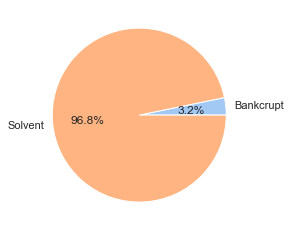

In [ ]:
pie_data = [len(bankrupt), len(not_bankrupt)] 
labels = ['Bankcrupt', 'Solvent']
colors = sns.color_palette('pastel')[0:2]

plt.pie(pie_data, labels = labels, colors = colors, autopct='%.1f%%')
plt.show()

### Filter columns names to split into assets, profit, liabilities

In [ ]:
# Selecting columns that contain the words assets, liabilities or profit to observe differences

In [ ]:
columns = df.columns

In [ ]:
profit_list = []
assets_list = []
liab_list = []

for i in columns:
    if "assets" in i.lower():
        assets_list.append(i)
    elif "profit" in i.lower():
        profit_list.append(i)
    elif "liabilities" in i.lower():
        liab_list.append(i)
    else:
        pass

In [ ]:
# useful for companies to view these individually

df_profit = df[profit_list]
df_assets = df[assets_list]
df_liab = df[liab_list]

### Performing EDA on most important features

In [ ]:
# Copied from feature selection section of this notebook

analysis_columns = [' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)', ' Debt ratio %',
       ' Net worth/Assets', ' Borrowing dependency',
       ' Operating profit/Paid-in capital',
       ' Net profit before tax/Paid-in capital']

In [ ]:
bankrupt_mean = bankrupt[analysis_columns].mean().tolist()
not_bankrupt_mean = not_bankrupt[analysis_columns].mean().tolist()

bankrupt_percent = [i * 100 for i in bankrupt_mean]
not_bankrupt_percent = [i * 100 for i in not_bankrupt_mean]

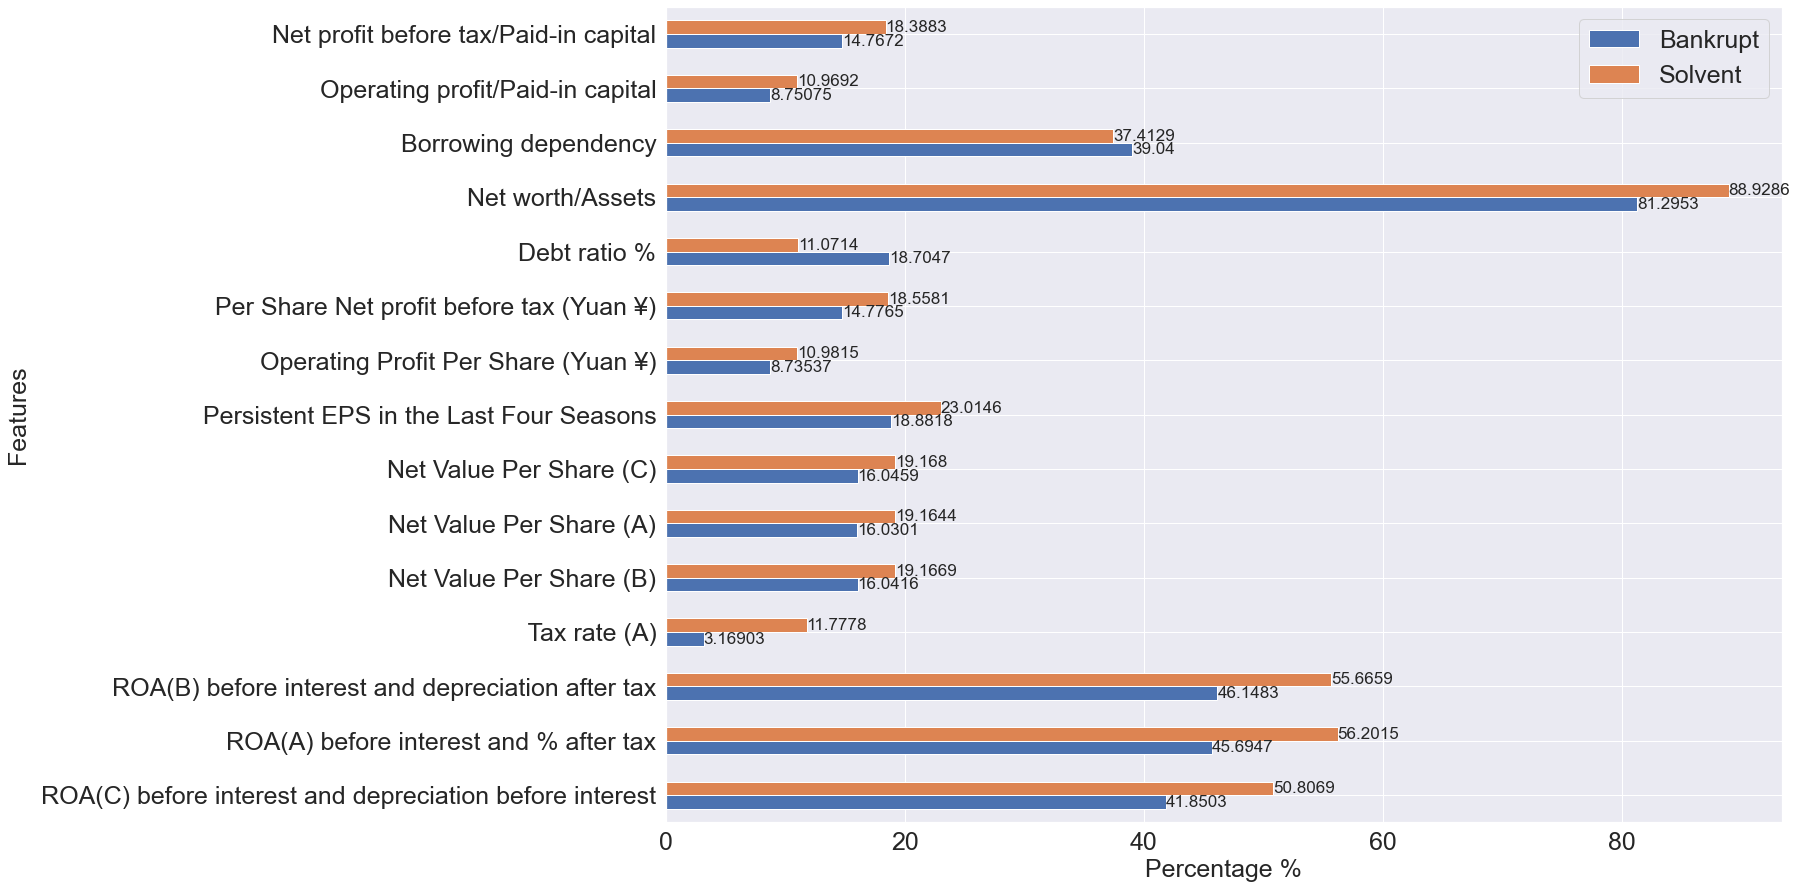

In [ ]:
df_mean = pd.DataFrame(index=analysis_columns)
df_mean['Bankrupt'] = bankrupt_percent
df_mean['Solvent'] = not_bankrupt_percent

fig = df_mean.plot.barh(figsize=(20,15), grid=True, fontsize=(25))
plt.legend(fontsize=25)
plt.xlabel('Percentage %', fontsize=25)
plt.ylabel('Features', fontsize=25)

for i in fig.containers:
    fig.bar_label(i, fontsize=17)

# Plotting horizontal barplot to compare mean values for key features depending on whether bankrupt or not

[Text(0, 0, ' ROA(C) before interest and depreciation before interest'),
 Text(1, 0, ' ROA(A) before interest and % after tax'),
 Text(2, 0, ' ROA(B) before interest and depreciation after tax')]

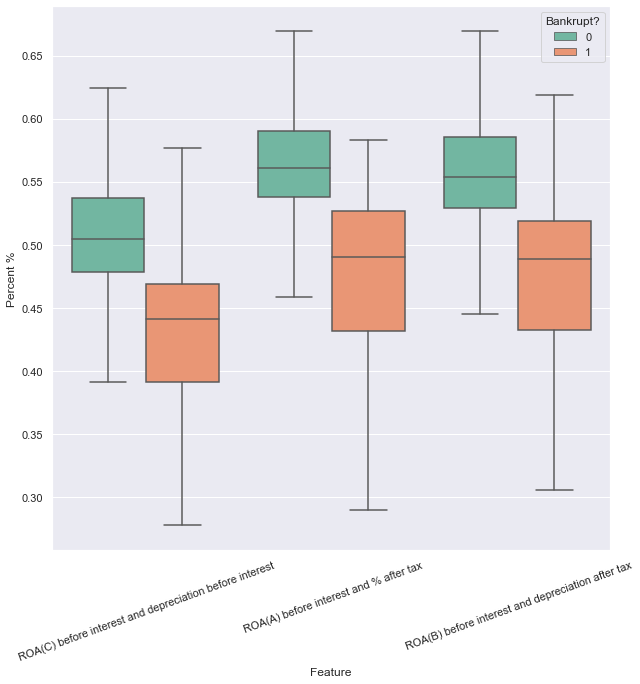

In [ ]:
df_boxplot = df[['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax']]

df_boxplot = df_boxplot.melt(id_vars='Bankrupt?', value_name='Percent %', var_name='Feature')

plt.figure(figsize=(10,10))

fig = sns.boxplot(data=df_boxplot, x='Feature', y='Percent %', hue='Bankrupt?', showfliers=False, palette='Set2')
fig.set_xticklabels(fig.get_xticklabels(),rotation = 20)

In [ ]:
analysis_columns.insert(0, 'Bankrupt?')

In [ ]:
# Heat map of key features correlation

df_corr = df[analysis_columns]
heat_map = df_corr.corr()
heat_map = pd.DataFrame(heat_map)

<AxesSubplot:>

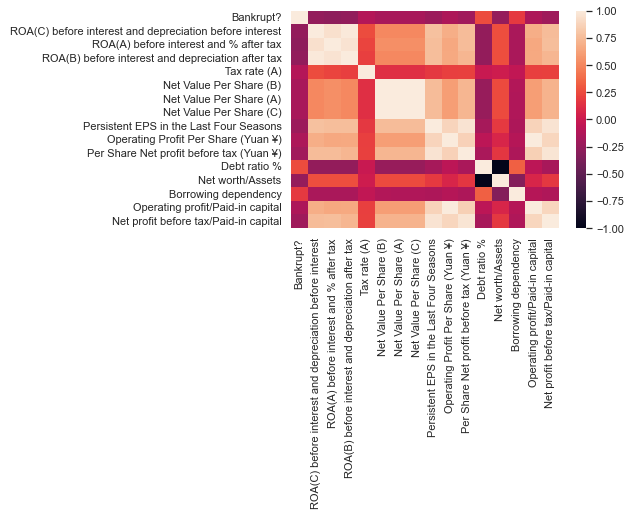

In [ ]:
sns.heatmap(heat_map)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 95 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [ ]:
df.isnull().sum()

In [ ]:
df.mean()

# Splitting data and creating models

In [ ]:
X = df.drop("Bankrupt?", axis=1)
y = df["Bankrupt?"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=0)

### Feature selection

In [ ]:
feature_selection=SelectKBest(k=30).fit(X_train,y_train)
selected_features=X_train.columns[feature_selection.get_support()]
selected_features

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)', ' Debt ratio %',
       ' Net worth/Assets', ' Borrowing dependency',
       ' Operating profit/Paid-in capital',
       ' Net profit before tax/Paid-in capital',
       ' Working Capital to Total Assets', ' Current Liability to Assets',
       ' Working Capital/Equity', ' Current Liabilities/Equity',
       ' Retained Earnings to Total Assets', ' Total income/Total expense',
       ' Total expense/Assets', ' Current Liability to Equity',
       ' Equity to Long-term Liability', ' CFO to Assets',
       ' Current Liability to Current Assets', ' Liability-Ass

In [ ]:
selected_features.tolist()

[' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Tax rate (A)',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Persistent EPS in the Last Four Seasons',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Debt ratio %',
 ' Net worth/Assets',
 ' Borrowing dependency',
 ' Operating profit/Paid-in capital',
 ' Net profit before tax/Paid-in capital',
 ' Working Capital to Total Assets',
 ' Current Liability to Assets',
 ' Working Capital/Equity',
 ' Current Liabilities/Equity',
 ' Retained Earnings to Total Assets',
 ' Total income/Total expense',
 ' Total expense/Assets',
 ' Current Liability to Equity',
 ' Equity to Long-term Liability',
 ' CFO to Assets',
 ' Current Liability to Current Assets',
 ' Liability-Assets Flag',
 ' Net Income to Total Assets',
 " Net Income to Stockholder's Equity",
 '

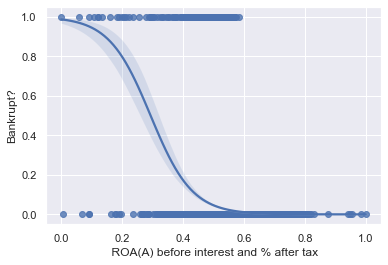

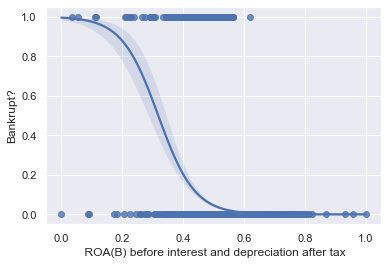

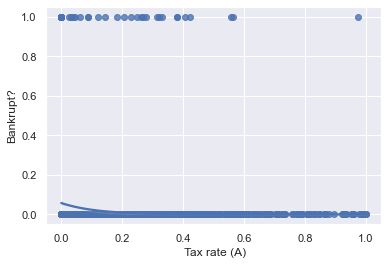

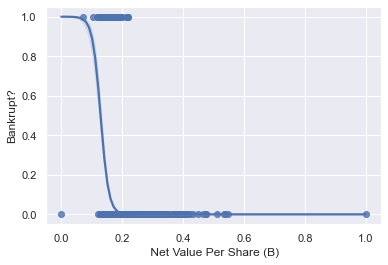

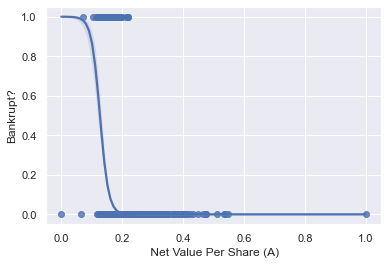

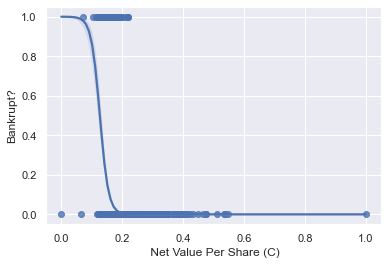

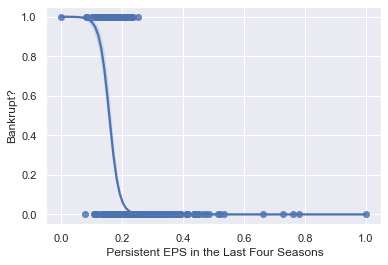

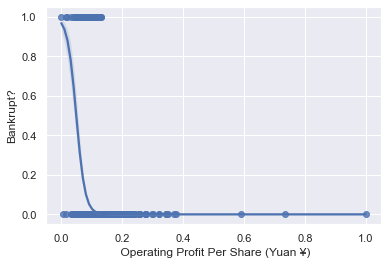

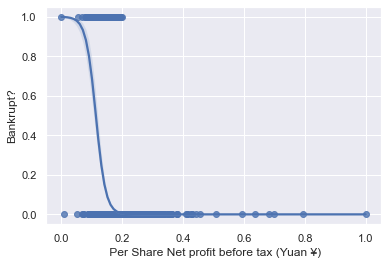

In [ ]:
# Showing logistic curves for each feature

for feature in selected_features[1:10]:
    plt.figure()
    sns.regplot(data=df, x=feature, y='Bankrupt?', logistic=True)
    

### Making models

In [ ]:
# Use SMOTE to rebalance data 

X_balance, y_balance = SMOTE(sampling_strategy='minority').fit_resample(X_train, y_train)


In [ ]:
# For each model we will use use standard scaler for the data and we will also use SMOTE to balance the data 
# Defining a function to create pipelines and run for each model and display score 

log_reg = lm.LogisticRegression(max_iter=500)
gauss_nb = GaussianNB()
svm = SVC()
rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()
ctb = CatBoostClassifier()
ada = AdaBoostClassifier()

models = [log_reg, gauss_nb, svm, rfc, dtc, knc, ctb, ada]
pipelines_keys = ['LogisticRegression', 'GaussianNB', 'SVM', 'RandomForest', 'DecisionTree', 'KNeighbors',
                  'CatBoost', 'AdaBoost']
pipelines_values = []
pipelines_dict = {}
scores = []
scores_dict = {}

def run_pipelines(models):
    for i in range(len(models)):
        # Create pipeline
        steps = [('scaler', StandardScaler()), ('model', models[i])]
        pipe = Pipeline(steps)
        
        #Fit pipeline model
        pipelines_values.append(pipe)
        pipelines_values[i].fit(X_balance, y_balance)
        pipe_score = pipe.score(X_test, y_test)
        
        #Add scores to list
        #Create dict to access pipelines
        scores.append(pipe_score)
        pipelines_dict[pipelines_keys[i]] = pipelines_values[i]
        
        #Create dict to access scores
        scores_dict[pipelines_keys[i]] = scores[i]
        
        #print(f"Model : {models[i]}  Score : {pipe_score}")



In [ ]:
run_pipelines(models=models)
scores

Learning rate set to 0.026622
0:	learn: 0.6645044	total: 72.1ms	remaining: 1m 11s
1:	learn: 0.6366150	total: 77.3ms	remaining: 38.6s
2:	learn: 0.6090127	total: 82.8ms	remaining: 27.5s
3:	learn: 0.5813610	total: 89.7ms	remaining: 22.3s
4:	learn: 0.5563954	total: 95.1ms	remaining: 18.9s
5:	learn: 0.5324061	total: 102ms	remaining: 16.8s
6:	learn: 0.5093855	total: 107ms	remaining: 15.2s
7:	learn: 0.4918054	total: 113ms	remaining: 14s
8:	learn: 0.4742146	total: 118ms	remaining: 13s
9:	learn: 0.4605209	total: 123ms	remaining: 12.2s
10:	learn: 0.4448333	total: 129ms	remaining: 11.6s
11:	learn: 0.4282732	total: 134ms	remaining: 11s
12:	learn: 0.4133735	total: 139ms	remaining: 10.6s
13:	learn: 0.3992347	total: 145ms	remaining: 10.2s
14:	learn: 0.3851674	total: 150ms	remaining: 9.87s
15:	learn: 0.3741795	total: 156ms	remaining: 9.58s
16:	learn: 0.3643949	total: 161ms	remaining: 9.3s
17:	learn: 0.3534152	total: 166ms	remaining: 9.06s
18:	learn: 0.3430951	total: 171ms	remaining: 8.84s
19:	learn: 0

164:	learn: 0.1074465	total: 982ms	remaining: 4.97s
165:	learn: 0.1070978	total: 987ms	remaining: 4.96s
166:	learn: 0.1068082	total: 993ms	remaining: 4.95s
167:	learn: 0.1065207	total: 998ms	remaining: 4.94s
168:	learn: 0.1062903	total: 1s	remaining: 4.94s
169:	learn: 0.1058952	total: 1.01s	remaining: 4.93s
170:	learn: 0.1053081	total: 1.01s	remaining: 4.92s
171:	learn: 0.1048403	total: 1.02s	remaining: 4.91s
172:	learn: 0.1043224	total: 1.02s	remaining: 4.9s
173:	learn: 0.1037559	total: 1.03s	remaining: 4.89s
174:	learn: 0.1034722	total: 1.03s	remaining: 4.88s
175:	learn: 0.1031643	total: 1.04s	remaining: 4.88s
176:	learn: 0.1029244	total: 1.05s	remaining: 4.87s
177:	learn: 0.1025966	total: 1.05s	remaining: 4.85s
178:	learn: 0.1023108	total: 1.06s	remaining: 4.84s
179:	learn: 0.1017719	total: 1.06s	remaining: 4.83s
180:	learn: 0.1012972	total: 1.07s	remaining: 4.83s
181:	learn: 0.1008548	total: 1.07s	remaining: 4.82s
182:	learn: 0.1003634	total: 1.08s	remaining: 4.8s
183:	learn: 0.099

353:	learn: 0.0572963	total: 1.97s	remaining: 3.6s
354:	learn: 0.0571632	total: 1.98s	remaining: 3.6s
355:	learn: 0.0569424	total: 1.99s	remaining: 3.59s
356:	learn: 0.0567299	total: 1.99s	remaining: 3.59s
357:	learn: 0.0566658	total: 2s	remaining: 3.58s
358:	learn: 0.0565335	total: 2s	remaining: 3.58s
359:	learn: 0.0563542	total: 2.01s	remaining: 3.57s
360:	learn: 0.0561069	total: 2.01s	remaining: 3.56s
361:	learn: 0.0559985	total: 2.02s	remaining: 3.56s
362:	learn: 0.0557432	total: 2.02s	remaining: 3.55s
363:	learn: 0.0556403	total: 2.03s	remaining: 3.54s
364:	learn: 0.0554267	total: 2.03s	remaining: 3.54s
365:	learn: 0.0552440	total: 2.04s	remaining: 3.53s
366:	learn: 0.0550281	total: 2.04s	remaining: 3.53s
367:	learn: 0.0549100	total: 2.05s	remaining: 3.52s
368:	learn: 0.0547448	total: 2.06s	remaining: 3.52s
369:	learn: 0.0545554	total: 2.06s	remaining: 3.51s
370:	learn: 0.0543533	total: 2.07s	remaining: 3.5s
371:	learn: 0.0542026	total: 2.07s	remaining: 3.5s
372:	learn: 0.0539869	

541:	learn: 0.0338218	total: 2.96s	remaining: 2.5s
542:	learn: 0.0336674	total: 2.97s	remaining: 2.5s
543:	learn: 0.0335626	total: 2.97s	remaining: 2.49s
544:	learn: 0.0334695	total: 2.98s	remaining: 2.49s
545:	learn: 0.0333617	total: 2.98s	remaining: 2.48s
546:	learn: 0.0332178	total: 2.99s	remaining: 2.48s
547:	learn: 0.0331179	total: 2.99s	remaining: 2.47s
548:	learn: 0.0330744	total: 3s	remaining: 2.46s
549:	learn: 0.0329796	total: 3s	remaining: 2.46s
550:	learn: 0.0329330	total: 3.01s	remaining: 2.45s
551:	learn: 0.0328970	total: 3.02s	remaining: 2.45s
552:	learn: 0.0328629	total: 3.02s	remaining: 2.44s
553:	learn: 0.0327578	total: 3.03s	remaining: 2.44s
554:	learn: 0.0326169	total: 3.03s	remaining: 2.43s
555:	learn: 0.0325958	total: 3.04s	remaining: 2.42s
556:	learn: 0.0324554	total: 3.04s	remaining: 2.42s
557:	learn: 0.0323146	total: 3.05s	remaining: 2.41s
558:	learn: 0.0322844	total: 3.05s	remaining: 2.41s
559:	learn: 0.0321462	total: 3.06s	remaining: 2.4s
560:	learn: 0.0320665

726:	learn: 0.0217016	total: 3.94s	remaining: 1.48s
727:	learn: 0.0216937	total: 3.95s	remaining: 1.48s
728:	learn: 0.0216508	total: 3.96s	remaining: 1.47s
729:	learn: 0.0216079	total: 3.96s	remaining: 1.47s
730:	learn: 0.0215107	total: 3.97s	remaining: 1.46s
731:	learn: 0.0214357	total: 3.97s	remaining: 1.45s
732:	learn: 0.0213917	total: 3.98s	remaining: 1.45s
733:	learn: 0.0213893	total: 3.98s	remaining: 1.44s
734:	learn: 0.0213324	total: 3.99s	remaining: 1.44s
735:	learn: 0.0212700	total: 3.99s	remaining: 1.43s
736:	learn: 0.0212482	total: 4s	remaining: 1.43s
737:	learn: 0.0212184	total: 4s	remaining: 1.42s
738:	learn: 0.0211878	total: 4.01s	remaining: 1.42s
739:	learn: 0.0211197	total: 4.01s	remaining: 1.41s
740:	learn: 0.0210509	total: 4.02s	remaining: 1.4s
741:	learn: 0.0210106	total: 4.02s	remaining: 1.4s
742:	learn: 0.0209432	total: 4.03s	remaining: 1.39s
743:	learn: 0.0209176	total: 4.03s	remaining: 1.39s
744:	learn: 0.0208637	total: 4.04s	remaining: 1.38s
745:	learn: 0.020811

915:	learn: 0.0149353	total: 4.94s	remaining: 453ms
916:	learn: 0.0149265	total: 4.94s	remaining: 447ms
917:	learn: 0.0149143	total: 4.95s	remaining: 442ms
918:	learn: 0.0148993	total: 4.96s	remaining: 437ms
919:	learn: 0.0148543	total: 4.96s	remaining: 431ms
920:	learn: 0.0148348	total: 4.97s	remaining: 426ms
921:	learn: 0.0148216	total: 4.97s	remaining: 421ms
922:	learn: 0.0147812	total: 4.98s	remaining: 415ms
923:	learn: 0.0147272	total: 4.98s	remaining: 410ms
924:	learn: 0.0147062	total: 4.99s	remaining: 405ms
925:	learn: 0.0146915	total: 4.99s	remaining: 399ms
926:	learn: 0.0146567	total: 5s	remaining: 394ms
927:	learn: 0.0146350	total: 5s	remaining: 388ms
928:	learn: 0.0146053	total: 5.01s	remaining: 383ms
929:	learn: 0.0145597	total: 5.02s	remaining: 378ms
930:	learn: 0.0145285	total: 5.02s	remaining: 372ms
931:	learn: 0.0144940	total: 5.03s	remaining: 367ms
932:	learn: 0.0144562	total: 5.03s	remaining: 361ms
933:	learn: 0.0144386	total: 5.04s	remaining: 356ms
934:	learn: 0.0143

[0.8973607038123167,
 0.30596285434995113,
 0.9257086999022482,
 0.9511241446725318,
 0.9305962854349951,
 0.886119257086999,
 0.9535679374389052,
 0.918377321603128]

In [ ]:
score_frame = pd.DataFrame(data=scores_dict, index=['Score'])
score_frame

LogisticRegression  GaussianNB       SVM  RandomForest  DecisionTree  \
Score            0.897361    0.305963  0.925709      0.951124      0.930596   

       KNeighbors  CatBoost  AdaBoost  
Score    0.886119  0.953568  0.918377

<AxesSubplot:>

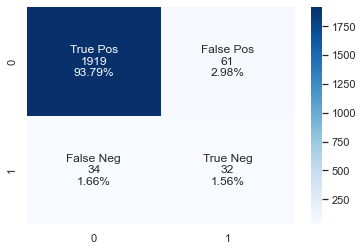

In [ ]:

y_pred = pipelines_dict['CatBoost'].predict(X_test)

cf_matrix = metrics.confusion_matrix(y_test, y_pred)


group_names = ['True Pos','False Pos','False Neg','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1980
           1       0.34      0.48      0.40        66

    accuracy                           0.95      2046
   macro avg       0.66      0.73      0.69      2046
weighted avg       0.96      0.95      0.96      2046



/Users/dominicfitzpatrick/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


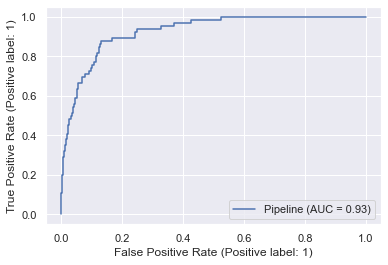

In [ ]:
metrics.plot_roc_curve(pipelines_dict['CatBoost'], X_test, y_test)
plt.show()

## Cross Validation, Grid search and Parameter tuning

In [ ]:
stratified_kfold = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=11)
    
##

model_pipe = Pipeline(steps=[("Scaler", StandardScaler()), ("CatBoost", CatBoostClassifier())])

param_grid = {
    "CatBoost__learning_rate": [0.1, 0.2, 0.3],
    "CatBoost__l2_leaf_reg": [5,10,50],
    "CatBoost__bagging_temperature": [0.1, 0.2],
    "CatBoost__random_strength": [0.5, 0.8]
}



best_model = GridSearchCV(model_pipe, param_grid=param_grid, scoring='roc_auc', cv=stratified_kfold, n_jobs=2, verbose=0)
best_model.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % best_model.best_score_)
print(best_model.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
0:	learn: 0.5814827	total: 70ms	remaining: 1m 9s
1:	learn: 0.5004342	total: 78.8ms	remaining: 39.3s
2:	learn: 0.4315395	total: 86.2ms	remaining: 28.6s
3:	learn: 0.3812187	total: 93.4ms	remaining: 23.3s
4:	learn: 0.3399690	total: 101ms	remaining: 20.1s
5:	learn: 0.3048993	total: 108ms	remaining: 17.9s
6:	learn: 0.2788657	total: 115ms	remaining: 16.3s
7:	learn: 0.2593150	total: 121ms	remaining: 15s
8:	learn: 0.2414194	total: 129ms	remaining: 14.2s
9:	learn: 0.2281296	total: 136ms	remaining: 13.5s
10:	learn: 0.2185982	total: 143ms	remaining: 12.8s
11:	learn: 0.2094817	total: 150ms	remaining: 12.4s
12:	learn: 0.2008615	total: 157ms	remaining: 11.9s
13:	learn: 0.1919796	total: 165ms	remaining: 11.6s
14:	learn: 0.1840359	total: 172ms	remaining: 11.3s
15:	learn: 0.1802053	total: 179ms	remaining: 11s
16:	learn: 0.1730510	total: 186ms	remaining: 10.8s
17:	learn: 0.1675220	total: 193ms	remaining: 10.5s
18:	learn: 0.1630568	total: 200m

161:	learn: 0.0325976	total: 1.22s	remaining: 6.31s
162:	learn: 0.0322177	total: 1.23s	remaining: 6.31s
163:	learn: 0.0317977	total: 1.24s	remaining: 6.3s
164:	learn: 0.0317975	total: 1.24s	remaining: 6.29s
165:	learn: 0.0314900	total: 1.25s	remaining: 6.28s
166:	learn: 0.0312784	total: 1.26s	remaining: 6.27s
167:	learn: 0.0311082	total: 1.26s	remaining: 6.26s
168:	learn: 0.0308269	total: 1.27s	remaining: 6.25s
169:	learn: 0.0302860	total: 1.28s	remaining: 6.24s
170:	learn: 0.0302840	total: 1.28s	remaining: 6.23s
171:	learn: 0.0299316	total: 1.29s	remaining: 6.22s
172:	learn: 0.0296243	total: 1.3s	remaining: 6.21s
173:	learn: 0.0295984	total: 1.31s	remaining: 6.2s
174:	learn: 0.0294201	total: 1.31s	remaining: 6.19s
175:	learn: 0.0291160	total: 1.32s	remaining: 6.18s
176:	learn: 0.0289579	total: 1.33s	remaining: 6.17s
177:	learn: 0.0286145	total: 1.33s	remaining: 6.16s
178:	learn: 0.0285725	total: 1.34s	remaining: 6.15s
179:	learn: 0.0283984	total: 1.35s	remaining: 6.14s
180:	learn: 0.0

320:	learn: 0.0130269	total: 2.32s	remaining: 4.91s
321:	learn: 0.0129873	total: 2.33s	remaining: 4.91s
322:	learn: 0.0129410	total: 2.34s	remaining: 4.9s
323:	learn: 0.0128223	total: 2.34s	remaining: 4.89s
324:	learn: 0.0127606	total: 2.35s	remaining: 4.88s
325:	learn: 0.0127425	total: 2.36s	remaining: 4.88s
326:	learn: 0.0125872	total: 2.37s	remaining: 4.87s
327:	learn: 0.0124754	total: 2.37s	remaining: 4.86s
328:	learn: 0.0124298	total: 2.38s	remaining: 4.85s
329:	learn: 0.0123530	total: 2.39s	remaining: 4.85s
330:	learn: 0.0123530	total: 2.4s	remaining: 4.85s
331:	learn: 0.0123308	total: 2.41s	remaining: 4.84s
332:	learn: 0.0122702	total: 2.41s	remaining: 4.83s
333:	learn: 0.0122065	total: 2.42s	remaining: 4.83s
334:	learn: 0.0120974	total: 2.43s	remaining: 4.82s
335:	learn: 0.0120762	total: 2.43s	remaining: 4.81s
336:	learn: 0.0120339	total: 2.44s	remaining: 4.8s
337:	learn: 0.0120122	total: 2.45s	remaining: 4.79s
338:	learn: 0.0118659	total: 2.45s	remaining: 4.79s
339:	learn: 0.0

479:	learn: 0.0072027	total: 3.44s	remaining: 3.73s
480:	learn: 0.0072027	total: 3.45s	remaining: 3.72s
481:	learn: 0.0072027	total: 3.46s	remaining: 3.72s
482:	learn: 0.0071847	total: 3.46s	remaining: 3.71s
483:	learn: 0.0071847	total: 3.47s	remaining: 3.7s
484:	learn: 0.0071361	total: 3.48s	remaining: 3.7s
485:	learn: 0.0071361	total: 3.49s	remaining: 3.69s
486:	learn: 0.0071361	total: 3.49s	remaining: 3.68s
487:	learn: 0.0071155	total: 3.5s	remaining: 3.67s
488:	learn: 0.0071155	total: 3.51s	remaining: 3.67s
489:	learn: 0.0071126	total: 3.52s	remaining: 3.66s
490:	learn: 0.0071125	total: 3.52s	remaining: 3.65s
491:	learn: 0.0071125	total: 3.53s	remaining: 3.64s
492:	learn: 0.0071125	total: 3.53s	remaining: 3.63s
493:	learn: 0.0071125	total: 3.54s	remaining: 3.63s
494:	learn: 0.0071125	total: 3.55s	remaining: 3.62s
495:	learn: 0.0070655	total: 3.55s	remaining: 3.61s
496:	learn: 0.0070518	total: 3.56s	remaining: 3.6s
497:	learn: 0.0070518	total: 3.57s	remaining: 3.6s
498:	learn: 0.007

638:	learn: 0.0064009	total: 4.51s	remaining: 2.55s
639:	learn: 0.0064009	total: 4.52s	remaining: 2.54s
640:	learn: 0.0063938	total: 4.53s	remaining: 2.54s
641:	learn: 0.0063938	total: 4.53s	remaining: 2.53s
642:	learn: 0.0063938	total: 4.54s	remaining: 2.52s
643:	learn: 0.0063763	total: 4.55s	remaining: 2.51s
644:	learn: 0.0063763	total: 4.55s	remaining: 2.51s
645:	learn: 0.0063523	total: 4.56s	remaining: 2.5s
646:	learn: 0.0063521	total: 4.57s	remaining: 2.49s
647:	learn: 0.0063521	total: 4.58s	remaining: 2.48s
648:	learn: 0.0063521	total: 4.58s	remaining: 2.48s
649:	learn: 0.0063340	total: 4.59s	remaining: 2.47s
650:	learn: 0.0063340	total: 4.6s	remaining: 2.46s
651:	learn: 0.0063084	total: 4.6s	remaining: 2.46s
652:	learn: 0.0063084	total: 4.61s	remaining: 2.45s
653:	learn: 0.0063083	total: 4.62s	remaining: 2.44s
654:	learn: 0.0063083	total: 4.63s	remaining: 2.44s
655:	learn: 0.0063082	total: 4.63s	remaining: 2.43s
656:	learn: 0.0063081	total: 4.64s	remaining: 2.42s
657:	learn: 0.0

797:	learn: 0.0059359	total: 5.62s	remaining: 1.42s
798:	learn: 0.0059359	total: 5.62s	remaining: 1.41s
799:	learn: 0.0059359	total: 5.63s	remaining: 1.41s
800:	learn: 0.0059359	total: 5.63s	remaining: 1.4s
801:	learn: 0.0059359	total: 5.64s	remaining: 1.39s
802:	learn: 0.0059359	total: 5.65s	remaining: 1.39s
803:	learn: 0.0059358	total: 5.66s	remaining: 1.38s
804:	learn: 0.0059358	total: 5.66s	remaining: 1.37s
805:	learn: 0.0059358	total: 5.67s	remaining: 1.36s
806:	learn: 0.0059358	total: 5.68s	remaining: 1.36s
807:	learn: 0.0059358	total: 5.68s	remaining: 1.35s
808:	learn: 0.0059358	total: 5.69s	remaining: 1.34s
809:	learn: 0.0059358	total: 5.7s	remaining: 1.34s
810:	learn: 0.0059357	total: 5.71s	remaining: 1.33s
811:	learn: 0.0059203	total: 5.71s	remaining: 1.32s
812:	learn: 0.0059203	total: 5.72s	remaining: 1.32s
813:	learn: 0.0059021	total: 5.73s	remaining: 1.31s
814:	learn: 0.0059021	total: 5.74s	remaining: 1.3s
815:	learn: 0.0058769	total: 5.75s	remaining: 1.29s
816:	learn: 0.0

955:	learn: 0.0054953	total: 6.7s	remaining: 308ms
956:	learn: 0.0054952	total: 6.71s	remaining: 301ms
957:	learn: 0.0054952	total: 6.71s	remaining: 294ms
958:	learn: 0.0054952	total: 6.72s	remaining: 287ms
959:	learn: 0.0054952	total: 6.73s	remaining: 280ms
960:	learn: 0.0054952	total: 6.73s	remaining: 273ms
961:	learn: 0.0054893	total: 6.74s	remaining: 266ms
962:	learn: 0.0054893	total: 6.75s	remaining: 259ms
963:	learn: 0.0054892	total: 6.76s	remaining: 252ms
964:	learn: 0.0054891	total: 6.76s	remaining: 245ms
965:	learn: 0.0054891	total: 6.77s	remaining: 238ms
966:	learn: 0.0054890	total: 6.78s	remaining: 231ms
967:	learn: 0.0054890	total: 6.79s	remaining: 224ms
968:	learn: 0.0054890	total: 6.79s	remaining: 217ms
969:	learn: 0.0054732	total: 6.8s	remaining: 210ms
970:	learn: 0.0054732	total: 6.81s	remaining: 203ms
971:	learn: 0.0054732	total: 6.81s	remaining: 196ms
972:	learn: 0.0054732	total: 6.82s	remaining: 189ms
973:	learn: 0.0054731	total: 6.83s	remaining: 182ms
974:	learn: 0.

116:	learn: 0.0513684	total: 870ms	remaining: 6.57s
117:	learn: 0.0512722	total: 879ms	remaining: 6.57s
118:	learn: 0.0504894	total: 886ms	remaining: 6.56s
119:	learn: 0.0498783	total: 896ms	remaining: 6.57s
120:	learn: 0.0495112	total: 904ms	remaining: 6.57s
121:	learn: 0.0487170	total: 912ms	remaining: 6.56s
122:	learn: 0.0481944	total: 919ms	remaining: 6.55s
123:	learn: 0.0481648	total: 926ms	remaining: 6.54s
124:	learn: 0.0480552	total: 932ms	remaining: 6.52s
125:	learn: 0.0476045	total: 941ms	remaining: 6.52s
126:	learn: 0.0470796	total: 948ms	remaining: 6.52s
127:	learn: 0.0465065	total: 957ms	remaining: 6.52s
128:	learn: 0.0464934	total: 963ms	remaining: 6.5s
129:	learn: 0.0460485	total: 972ms	remaining: 6.5s
130:	learn: 0.0453175	total: 978ms	remaining: 6.48s
131:	learn: 0.0452607	total: 984ms	remaining: 6.47s
132:	learn: 0.0443364	total: 993ms	remaining: 6.48s
133:	learn: 0.0441431	total: 1s	remaining: 6.47s
134:	learn: 0.0435665	total: 1.01s	remaining: 6.46s
135:	learn: 0.042

275:	learn: 0.0149004	total: 2.04s	remaining: 5.34s
276:	learn: 0.0147104	total: 2.04s	remaining: 5.34s
277:	learn: 0.0147084	total: 2.05s	remaining: 5.33s
278:	learn: 0.0146418	total: 2.06s	remaining: 5.32s
279:	learn: 0.0144956	total: 2.07s	remaining: 5.31s
280:	learn: 0.0143777	total: 2.07s	remaining: 5.3s
281:	learn: 0.0142776	total: 2.08s	remaining: 5.29s
282:	learn: 0.0141967	total: 2.09s	remaining: 5.29s
283:	learn: 0.0139916	total: 2.09s	remaining: 5.28s
284:	learn: 0.0138776	total: 2.1s	remaining: 5.27s
285:	learn: 0.0137294	total: 2.11s	remaining: 5.26s
286:	learn: 0.0135250	total: 2.12s	remaining: 5.26s
287:	learn: 0.0134326	total: 2.12s	remaining: 5.25s
288:	learn: 0.0133130	total: 2.13s	remaining: 5.24s
289:	learn: 0.0132369	total: 2.14s	remaining: 5.24s
290:	learn: 0.0131777	total: 2.15s	remaining: 5.23s
291:	learn: 0.0131486	total: 2.15s	remaining: 5.22s
292:	learn: 0.0131424	total: 2.16s	remaining: 5.21s
293:	learn: 0.0131019	total: 2.17s	remaining: 5.2s
294:	learn: 0.0

434:	learn: 0.0081714	total: 3.17s	remaining: 4.11s
435:	learn: 0.0081712	total: 3.17s	remaining: 4.1s
436:	learn: 0.0081712	total: 3.18s	remaining: 4.1s
437:	learn: 0.0081711	total: 3.19s	remaining: 4.09s
438:	learn: 0.0081548	total: 3.2s	remaining: 4.08s
439:	learn: 0.0081548	total: 3.2s	remaining: 4.08s
440:	learn: 0.0081548	total: 3.21s	remaining: 4.07s
441:	learn: 0.0080941	total: 3.22s	remaining: 4.07s
442:	learn: 0.0080690	total: 3.23s	remaining: 4.06s
443:	learn: 0.0080507	total: 3.24s	remaining: 4.05s
444:	learn: 0.0080173	total: 3.25s	remaining: 4.05s
445:	learn: 0.0080173	total: 3.25s	remaining: 4.04s
446:	learn: 0.0080075	total: 3.26s	remaining: 4.04s
447:	learn: 0.0080075	total: 3.27s	remaining: 4.03s
448:	learn: 0.0080073	total: 3.28s	remaining: 4.02s
449:	learn: 0.0080071	total: 3.29s	remaining: 4.01s
450:	learn: 0.0080071	total: 3.29s	remaining: 4.01s
451:	learn: 0.0080070	total: 3.3s	remaining: 4s
452:	learn: 0.0080069	total: 3.31s	remaining: 4s
453:	learn: 0.0080068	t

593:	learn: 0.0056579	total: 4.32s	remaining: 2.95s
594:	learn: 0.0056579	total: 4.32s	remaining: 2.94s
595:	learn: 0.0056579	total: 4.33s	remaining: 2.93s
596:	learn: 0.0056578	total: 4.34s	remaining: 2.93s
597:	learn: 0.0056578	total: 4.34s	remaining: 2.92s
598:	learn: 0.0056578	total: 4.35s	remaining: 2.91s
599:	learn: 0.0056578	total: 4.36s	remaining: 2.9s
600:	learn: 0.0056210	total: 4.36s	remaining: 2.9s
601:	learn: 0.0055948	total: 4.37s	remaining: 2.89s
602:	learn: 0.0055616	total: 4.38s	remaining: 2.88s
603:	learn: 0.0055616	total: 4.38s	remaining: 2.87s
604:	learn: 0.0055616	total: 4.39s	remaining: 2.87s
605:	learn: 0.0055616	total: 4.4s	remaining: 2.86s
606:	learn: 0.0055616	total: 4.4s	remaining: 2.85s
607:	learn: 0.0055616	total: 4.41s	remaining: 2.84s
608:	learn: 0.0055616	total: 4.42s	remaining: 2.84s
609:	learn: 0.0055616	total: 4.42s	remaining: 2.83s
610:	learn: 0.0055616	total: 4.43s	remaining: 2.82s
611:	learn: 0.0055616	total: 4.44s	remaining: 2.81s
612:	learn: 0.00

752:	learn: 0.0053212	total: 5.4s	remaining: 1.77s
753:	learn: 0.0053212	total: 5.4s	remaining: 1.76s
754:	learn: 0.0053212	total: 5.41s	remaining: 1.76s
755:	learn: 0.0053212	total: 5.42s	remaining: 1.75s
756:	learn: 0.0053212	total: 5.42s	remaining: 1.74s
757:	learn: 0.0053211	total: 5.43s	remaining: 1.73s
758:	learn: 0.0053211	total: 5.44s	remaining: 1.73s
759:	learn: 0.0053210	total: 5.44s	remaining: 1.72s
760:	learn: 0.0053210	total: 5.45s	remaining: 1.71s
761:	learn: 0.0053210	total: 5.46s	remaining: 1.7s
762:	learn: 0.0053210	total: 5.46s	remaining: 1.7s
763:	learn: 0.0053209	total: 5.47s	remaining: 1.69s
764:	learn: 0.0053209	total: 5.48s	remaining: 1.68s
765:	learn: 0.0053208	total: 5.48s	remaining: 1.68s
766:	learn: 0.0053208	total: 5.49s	remaining: 1.67s
767:	learn: 0.0053208	total: 5.5s	remaining: 1.66s
768:	learn: 0.0053208	total: 5.51s	remaining: 1.65s
769:	learn: 0.0053208	total: 5.51s	remaining: 1.65s
770:	learn: 0.0053207	total: 5.52s	remaining: 1.64s
771:	learn: 0.005

911:	learn: 0.0051553	total: 6.47s	remaining: 625ms
912:	learn: 0.0051553	total: 6.48s	remaining: 617ms
913:	learn: 0.0051553	total: 6.49s	remaining: 610ms
914:	learn: 0.0051552	total: 6.49s	remaining: 603ms
915:	learn: 0.0051552	total: 6.5s	remaining: 596ms
916:	learn: 0.0051551	total: 6.5s	remaining: 589ms
917:	learn: 0.0051405	total: 6.51s	remaining: 582ms
918:	learn: 0.0051145	total: 6.52s	remaining: 574ms
919:	learn: 0.0051145	total: 6.53s	remaining: 567ms
920:	learn: 0.0051145	total: 6.53s	remaining: 560ms
921:	learn: 0.0051145	total: 6.54s	remaining: 553ms
922:	learn: 0.0051145	total: 6.54s	remaining: 546ms
923:	learn: 0.0051144	total: 6.55s	remaining: 539ms
924:	learn: 0.0051144	total: 6.56s	remaining: 532ms
925:	learn: 0.0051143	total: 6.56s	remaining: 525ms
926:	learn: 0.0051143	total: 6.57s	remaining: 518ms
927:	learn: 0.0051143	total: 6.58s	remaining: 510ms
928:	learn: 0.0051143	total: 6.59s	remaining: 503ms
929:	learn: 0.0051143	total: 6.59s	remaining: 496ms
930:	learn: 0.

70:	learn: 0.0762154	total: 504ms	remaining: 6.6s
71:	learn: 0.0749869	total: 513ms	remaining: 6.62s
72:	learn: 0.0740315	total: 521ms	remaining: 6.61s
73:	learn: 0.0733824	total: 528ms	remaining: 6.6s
74:	learn: 0.0725526	total: 536ms	remaining: 6.61s
75:	learn: 0.0716221	total: 543ms	remaining: 6.6s
76:	learn: 0.0706995	total: 550ms	remaining: 6.59s
77:	learn: 0.0695855	total: 556ms	remaining: 6.57s
78:	learn: 0.0689933	total: 562ms	remaining: 6.55s
79:	learn: 0.0682847	total: 569ms	remaining: 6.54s
80:	learn: 0.0672634	total: 575ms	remaining: 6.53s
81:	learn: 0.0665460	total: 582ms	remaining: 6.52s
82:	learn: 0.0653708	total: 589ms	remaining: 6.51s
83:	learn: 0.0649401	total: 596ms	remaining: 6.5s
84:	learn: 0.0643156	total: 602ms	remaining: 6.48s
85:	learn: 0.0642681	total: 610ms	remaining: 6.48s
86:	learn: 0.0637484	total: 616ms	remaining: 6.47s
87:	learn: 0.0634453	total: 623ms	remaining: 6.46s
88:	learn: 0.0631303	total: 634ms	remaining: 6.49s
89:	learn: 0.0625130	total: 641ms	r

229:	learn: 0.0179373	total: 1.62s	remaining: 5.43s
230:	learn: 0.0177755	total: 1.63s	remaining: 5.42s
231:	learn: 0.0177165	total: 1.64s	remaining: 5.41s
232:	learn: 0.0176663	total: 1.64s	remaining: 5.41s
233:	learn: 0.0174347	total: 1.65s	remaining: 5.4s
234:	learn: 0.0173265	total: 1.66s	remaining: 5.39s
235:	learn: 0.0172439	total: 1.66s	remaining: 5.39s
236:	learn: 0.0172343	total: 1.67s	remaining: 5.38s
237:	learn: 0.0171340	total: 1.68s	remaining: 5.37s
238:	learn: 0.0170231	total: 1.68s	remaining: 5.36s
239:	learn: 0.0167639	total: 1.69s	remaining: 5.36s
240:	learn: 0.0166694	total: 1.7s	remaining: 5.35s
241:	learn: 0.0166691	total: 1.7s	remaining: 5.34s
242:	learn: 0.0165876	total: 1.71s	remaining: 5.33s
243:	learn: 0.0164688	total: 1.72s	remaining: 5.33s
244:	learn: 0.0163409	total: 1.73s	remaining: 5.32s
245:	learn: 0.0163292	total: 1.73s	remaining: 5.31s
246:	learn: 0.0162255	total: 1.74s	remaining: 5.31s
247:	learn: 0.0162052	total: 1.75s	remaining: 5.3s
248:	learn: 0.01

388:	learn: 0.0085273	total: 2.72s	remaining: 4.27s
389:	learn: 0.0085041	total: 2.73s	remaining: 4.26s
390:	learn: 0.0084600	total: 2.73s	remaining: 4.26s
391:	learn: 0.0083570	total: 2.74s	remaining: 4.25s
392:	learn: 0.0083241	total: 2.75s	remaining: 4.24s
393:	learn: 0.0082914	total: 2.75s	remaining: 4.24s
394:	learn: 0.0082670	total: 2.76s	remaining: 4.23s
395:	learn: 0.0082341	total: 2.77s	remaining: 4.22s
396:	learn: 0.0082341	total: 2.78s	remaining: 4.22s
397:	learn: 0.0081952	total: 2.78s	remaining: 4.21s
398:	learn: 0.0081744	total: 2.79s	remaining: 4.2s
399:	learn: 0.0081405	total: 2.8s	remaining: 4.2s
400:	learn: 0.0081022	total: 2.8s	remaining: 4.19s
401:	learn: 0.0081022	total: 2.81s	remaining: 4.18s
402:	learn: 0.0080540	total: 2.82s	remaining: 4.17s
403:	learn: 0.0080540	total: 2.82s	remaining: 4.17s
404:	learn: 0.0080246	total: 2.83s	remaining: 4.16s
405:	learn: 0.0079828	total: 2.84s	remaining: 4.15s
406:	learn: 0.0079631	total: 2.84s	remaining: 4.14s
407:	learn: 0.00

547:	learn: 0.0062920	total: 3.8s	remaining: 3.14s
548:	learn: 0.0062583	total: 3.81s	remaining: 3.13s
549:	learn: 0.0062459	total: 3.81s	remaining: 3.12s
550:	learn: 0.0062160	total: 3.82s	remaining: 3.11s
551:	learn: 0.0062160	total: 3.83s	remaining: 3.11s
552:	learn: 0.0062160	total: 3.83s	remaining: 3.1s
553:	learn: 0.0062160	total: 3.84s	remaining: 3.09s
554:	learn: 0.0062160	total: 3.85s	remaining: 3.08s
555:	learn: 0.0062160	total: 3.85s	remaining: 3.08s
556:	learn: 0.0062159	total: 3.86s	remaining: 3.07s
557:	learn: 0.0061870	total: 3.87s	remaining: 3.06s
558:	learn: 0.0061870	total: 3.88s	remaining: 3.06s
559:	learn: 0.0061870	total: 3.88s	remaining: 3.05s
560:	learn: 0.0061870	total: 3.89s	remaining: 3.04s
561:	learn: 0.0061667	total: 3.89s	remaining: 3.04s
562:	learn: 0.0061667	total: 3.9s	remaining: 3.03s
563:	learn: 0.0061667	total: 3.91s	remaining: 3.02s
564:	learn: 0.0061667	total: 3.92s	remaining: 3.01s
565:	learn: 0.0061667	total: 3.92s	remaining: 3.01s
566:	learn: 0.0

548:	learn: 0.0092820	total: 3.87s	remaining: 3.17s
549:	learn: 0.0092820	total: 3.87s	remaining: 3.17s
550:	learn: 0.0092820	total: 3.88s	remaining: 3.16s
551:	learn: 0.0092820	total: 3.88s	remaining: 3.15s
552:	learn: 0.0092820	total: 3.89s	remaining: 3.14s
553:	learn: 0.0092816	total: 3.9s	remaining: 3.14s
554:	learn: 0.0092816	total: 3.9s	remaining: 3.13s
555:	learn: 0.0092814	total: 3.91s	remaining: 3.12s
556:	learn: 0.0092814	total: 3.92s	remaining: 3.12s
557:	learn: 0.0092814	total: 3.93s	remaining: 3.11s
558:	learn: 0.0092564	total: 3.93s	remaining: 3.1s
559:	learn: 0.0092564	total: 3.94s	remaining: 3.1s
560:	learn: 0.0092559	total: 3.95s	remaining: 3.09s
561:	learn: 0.0092557	total: 3.96s	remaining: 3.08s
562:	learn: 0.0092557	total: 3.96s	remaining: 3.08s
563:	learn: 0.0092556	total: 3.97s	remaining: 3.07s
564:	learn: 0.0092556	total: 3.98s	remaining: 3.06s
565:	learn: 0.0092556	total: 3.98s	remaining: 3.05s
566:	learn: 0.0092556	total: 3.99s	remaining: 3.05s
567:	learn: 0.00

706:	learn: 0.0057336	total: 4.87s	remaining: 2.02s
707:	learn: 0.0057336	total: 4.87s	remaining: 2.01s
708:	learn: 0.0057336	total: 4.88s	remaining: 2s
709:	learn: 0.0057336	total: 4.88s	remaining: 2s
710:	learn: 0.0057336	total: 4.89s	remaining: 1.99s
711:	learn: 0.0057336	total: 4.9s	remaining: 1.98s
712:	learn: 0.0057336	total: 4.9s	remaining: 1.97s
713:	learn: 0.0057336	total: 4.91s	remaining: 1.97s
714:	learn: 0.0057336	total: 4.92s	remaining: 1.96s
715:	learn: 0.0057328	total: 4.92s	remaining: 1.95s
716:	learn: 0.0057328	total: 4.93s	remaining: 1.95s
717:	learn: 0.0057328	total: 4.94s	remaining: 1.94s
718:	learn: 0.0057328	total: 4.95s	remaining: 1.93s
719:	learn: 0.0057328	total: 4.95s	remaining: 1.93s
720:	learn: 0.0057327	total: 4.96s	remaining: 1.92s
721:	learn: 0.0057327	total: 4.96s	remaining: 1.91s
722:	learn: 0.0057327	total: 4.97s	remaining: 1.91s
723:	learn: 0.0057327	total: 4.98s	remaining: 1.9s
724:	learn: 0.0057327	total: 4.99s	remaining: 1.89s
725:	learn: 0.0057327

707:	learn: 0.0080903	total: 4.94s	remaining: 2.04s
708:	learn: 0.0080902	total: 4.95s	remaining: 2.03s
709:	learn: 0.0080902	total: 4.95s	remaining: 2.02s
710:	learn: 0.0080902	total: 4.96s	remaining: 2.02s
711:	learn: 0.0080902	total: 4.97s	remaining: 2.01s
712:	learn: 0.0080902	total: 4.97s	remaining: 2s
713:	learn: 0.0080902	total: 4.98s	remaining: 2s
714:	learn: 0.0080900	total: 4.99s	remaining: 1.99s
715:	learn: 0.0080900	total: 4.99s	remaining: 1.98s
716:	learn: 0.0080900	total: 5s	remaining: 1.97s
717:	learn: 0.0080712	total: 5.01s	remaining: 1.97s
718:	learn: 0.0080068	total: 5.02s	remaining: 1.96s
719:	learn: 0.0080068	total: 5.03s	remaining: 1.96s
720:	learn: 0.0080068	total: 5.04s	remaining: 1.95s
721:	learn: 0.0080067	total: 5.05s	remaining: 1.94s
722:	learn: 0.0080067	total: 5.05s	remaining: 1.94s
723:	learn: 0.0080067	total: 5.06s	remaining: 1.93s
724:	learn: 0.0080067	total: 5.07s	remaining: 1.92s
725:	learn: 0.0080067	total: 5.08s	remaining: 1.92s
726:	learn: 0.0080067

865:	learn: 0.0056588	total: 5.9s	remaining: 913ms
866:	learn: 0.0056587	total: 5.91s	remaining: 906ms
867:	learn: 0.0056587	total: 5.91s	remaining: 899ms
868:	learn: 0.0056587	total: 5.92s	remaining: 892ms
869:	learn: 0.0056586	total: 5.93s	remaining: 886ms
870:	learn: 0.0056586	total: 5.93s	remaining: 879ms
871:	learn: 0.0056585	total: 5.94s	remaining: 872ms
872:	learn: 0.0056585	total: 5.95s	remaining: 865ms
873:	learn: 0.0056585	total: 5.96s	remaining: 859ms
874:	learn: 0.0056585	total: 5.96s	remaining: 852ms
875:	learn: 0.0056585	total: 5.97s	remaining: 845ms
876:	learn: 0.0056581	total: 5.97s	remaining: 838ms
877:	learn: 0.0056580	total: 5.98s	remaining: 831ms
878:	learn: 0.0056580	total: 5.99s	remaining: 825ms
879:	learn: 0.0056580	total: 6s	remaining: 818ms
880:	learn: 0.0056580	total: 6s	remaining: 811ms
881:	learn: 0.0056580	total: 6.01s	remaining: 804ms
882:	learn: 0.0056580	total: 6.02s	remaining: 797ms
883:	learn: 0.0056580	total: 6.02s	remaining: 790ms
884:	learn: 0.00565

866:	learn: 0.0071991	total: 6.05s	remaining: 928ms
867:	learn: 0.0071990	total: 6.06s	remaining: 921ms
868:	learn: 0.0071990	total: 6.07s	remaining: 914ms
869:	learn: 0.0071990	total: 6.07s	remaining: 907ms
870:	learn: 0.0071990	total: 6.08s	remaining: 900ms
871:	learn: 0.0071990	total: 6.09s	remaining: 893ms
872:	learn: 0.0071990	total: 6.09s	remaining: 887ms
873:	learn: 0.0071990	total: 6.1s	remaining: 880ms
874:	learn: 0.0071990	total: 6.11s	remaining: 872ms
875:	learn: 0.0071990	total: 6.11s	remaining: 865ms
876:	learn: 0.0071989	total: 6.12s	remaining: 858ms
877:	learn: 0.0071989	total: 6.13s	remaining: 851ms
878:	learn: 0.0071989	total: 6.13s	remaining: 844ms
879:	learn: 0.0071989	total: 6.14s	remaining: 837ms
880:	learn: 0.0071989	total: 6.15s	remaining: 830ms
881:	learn: 0.0071989	total: 6.15s	remaining: 823ms
882:	learn: 0.0071989	total: 6.16s	remaining: 816ms
883:	learn: 0.0071989	total: 6.17s	remaining: 809ms
884:	learn: 0.0071989	total: 6.17s	remaining: 802ms
885:	learn: 0

24:	learn: 0.1012498	total: 165ms	remaining: 6.45s
25:	learn: 0.0993330	total: 170ms	remaining: 6.36s
26:	learn: 0.0969096	total: 175ms	remaining: 6.31s
27:	learn: 0.0946475	total: 180ms	remaining: 6.26s
28:	learn: 0.0937073	total: 190ms	remaining: 6.36s
29:	learn: 0.0903603	total: 197ms	remaining: 6.38s
30:	learn: 0.0884807	total: 205ms	remaining: 6.42s
31:	learn: 0.0868704	total: 212ms	remaining: 6.41s
32:	learn: 0.0834354	total: 219ms	remaining: 6.43s
33:	learn: 0.0814897	total: 226ms	remaining: 6.41s
34:	learn: 0.0799292	total: 233ms	remaining: 6.41s
35:	learn: 0.0777260	total: 239ms	remaining: 6.41s
36:	learn: 0.0754401	total: 247ms	remaining: 6.42s
37:	learn: 0.0742232	total: 255ms	remaining: 6.44s
38:	learn: 0.0724300	total: 261ms	remaining: 6.43s
39:	learn: 0.0706909	total: 267ms	remaining: 6.42s
40:	learn: 0.0687127	total: 274ms	remaining: 6.41s
41:	learn: 0.0671834	total: 281ms	remaining: 6.41s
42:	learn: 0.0644490	total: 288ms	remaining: 6.42s
43:	learn: 0.0629021	total: 295

184:	learn: 0.0094881	total: 1.29s	remaining: 5.69s
185:	learn: 0.0094319	total: 1.3s	remaining: 5.69s
186:	learn: 0.0094317	total: 1.31s	remaining: 5.68s
187:	learn: 0.0093759	total: 1.31s	remaining: 5.68s
188:	learn: 0.0093758	total: 1.32s	remaining: 5.66s
189:	learn: 0.0093758	total: 1.33s	remaining: 5.65s
190:	learn: 0.0093053	total: 1.33s	remaining: 5.64s
191:	learn: 0.0092492	total: 1.34s	remaining: 5.63s
192:	learn: 0.0092491	total: 1.35s	remaining: 5.63s
193:	learn: 0.0092185	total: 1.35s	remaining: 5.62s
194:	learn: 0.0092185	total: 1.36s	remaining: 5.62s
195:	learn: 0.0092185	total: 1.37s	remaining: 5.61s
196:	learn: 0.0092185	total: 1.37s	remaining: 5.59s
197:	learn: 0.0092184	total: 1.38s	remaining: 5.59s
198:	learn: 0.0092184	total: 1.39s	remaining: 5.58s
199:	learn: 0.0090726	total: 1.4s	remaining: 5.58s
200:	learn: 0.0090724	total: 1.4s	remaining: 5.57s
201:	learn: 0.0090724	total: 1.41s	remaining: 5.56s
202:	learn: 0.0090724	total: 1.41s	remaining: 5.55s
203:	learn: 0.0

343:	learn: 0.0067782	total: 2.42s	remaining: 4.61s
344:	learn: 0.0067782	total: 2.42s	remaining: 4.6s
345:	learn: 0.0067781	total: 2.43s	remaining: 4.59s
346:	learn: 0.0067781	total: 2.44s	remaining: 4.59s
347:	learn: 0.0067780	total: 2.44s	remaining: 4.58s
348:	learn: 0.0067780	total: 2.45s	remaining: 4.57s
349:	learn: 0.0067780	total: 2.46s	remaining: 4.56s
350:	learn: 0.0067780	total: 2.46s	remaining: 4.55s
351:	learn: 0.0067364	total: 2.47s	remaining: 4.54s
352:	learn: 0.0067297	total: 2.47s	remaining: 4.54s
353:	learn: 0.0067227	total: 2.48s	remaining: 4.53s
354:	learn: 0.0067227	total: 2.49s	remaining: 4.52s
355:	learn: 0.0067226	total: 2.5s	remaining: 4.51s
356:	learn: 0.0067226	total: 2.5s	remaining: 4.51s
357:	learn: 0.0067226	total: 2.51s	remaining: 4.5s
358:	learn: 0.0067226	total: 2.52s	remaining: 4.5s
359:	learn: 0.0067225	total: 2.52s	remaining: 4.49s
360:	learn: 0.0067225	total: 2.53s	remaining: 4.48s
361:	learn: 0.0067225	total: 2.54s	remaining: 4.47s
362:	learn: 0.006

502:	learn: 0.0053181	total: 3.5s	remaining: 3.46s
503:	learn: 0.0053181	total: 3.51s	remaining: 3.46s
504:	learn: 0.0053180	total: 3.52s	remaining: 3.45s
505:	learn: 0.0052919	total: 3.52s	remaining: 3.44s
506:	learn: 0.0052919	total: 3.53s	remaining: 3.43s
507:	learn: 0.0052919	total: 3.54s	remaining: 3.43s
508:	learn: 0.0052919	total: 3.54s	remaining: 3.42s
509:	learn: 0.0052919	total: 3.55s	remaining: 3.41s
510:	learn: 0.0052919	total: 3.56s	remaining: 3.4s
511:	learn: 0.0052919	total: 3.56s	remaining: 3.4s
512:	learn: 0.0052919	total: 3.57s	remaining: 3.39s
513:	learn: 0.0052918	total: 3.58s	remaining: 3.38s
514:	learn: 0.0052918	total: 3.59s	remaining: 3.38s
515:	learn: 0.0052918	total: 3.59s	remaining: 3.37s
516:	learn: 0.0052918	total: 3.6s	remaining: 3.36s
517:	learn: 0.0052918	total: 3.6s	remaining: 3.35s
518:	learn: 0.0052918	total: 3.61s	remaining: 3.35s
519:	learn: 0.0052918	total: 3.62s	remaining: 3.34s
520:	learn: 0.0052917	total: 3.62s	remaining: 3.33s
521:	learn: 0.005

661:	learn: 0.0049465	total: 4.6s	remaining: 2.35s
662:	learn: 0.0049465	total: 4.6s	remaining: 2.34s
663:	learn: 0.0049465	total: 4.61s	remaining: 2.33s
664:	learn: 0.0049465	total: 4.62s	remaining: 2.33s
665:	learn: 0.0049464	total: 4.62s	remaining: 2.32s
666:	learn: 0.0049464	total: 4.63s	remaining: 2.31s
667:	learn: 0.0049464	total: 4.64s	remaining: 2.3s
668:	learn: 0.0049464	total: 4.64s	remaining: 2.3s
669:	learn: 0.0049464	total: 4.65s	remaining: 2.29s
670:	learn: 0.0049464	total: 4.66s	remaining: 2.28s
671:	learn: 0.0049464	total: 4.66s	remaining: 2.27s
672:	learn: 0.0049464	total: 4.67s	remaining: 2.27s
673:	learn: 0.0049464	total: 4.68s	remaining: 2.26s
674:	learn: 0.0049464	total: 4.68s	remaining: 2.25s
675:	learn: 0.0049463	total: 4.69s	remaining: 2.25s
676:	learn: 0.0049463	total: 4.7s	remaining: 2.24s
677:	learn: 0.0049463	total: 4.7s	remaining: 2.23s
678:	learn: 0.0049463	total: 4.71s	remaining: 2.23s
679:	learn: 0.0049463	total: 4.71s	remaining: 2.22s
680:	learn: 0.0049

820:	learn: 0.0049444	total: 5.68s	remaining: 1.24s
821:	learn: 0.0049444	total: 5.69s	remaining: 1.23s
822:	learn: 0.0049444	total: 5.7s	remaining: 1.23s
823:	learn: 0.0049444	total: 5.7s	remaining: 1.22s
824:	learn: 0.0049444	total: 5.71s	remaining: 1.21s
825:	learn: 0.0049443	total: 5.72s	remaining: 1.2s
826:	learn: 0.0049443	total: 5.72s	remaining: 1.2s
827:	learn: 0.0049443	total: 5.73s	remaining: 1.19s
828:	learn: 0.0049442	total: 5.74s	remaining: 1.18s
829:	learn: 0.0049442	total: 5.75s	remaining: 1.18s
830:	learn: 0.0049442	total: 5.75s	remaining: 1.17s
831:	learn: 0.0049442	total: 5.76s	remaining: 1.16s
832:	learn: 0.0049441	total: 5.76s	remaining: 1.16s
833:	learn: 0.0049441	total: 5.77s	remaining: 1.15s
834:	learn: 0.0049441	total: 5.78s	remaining: 1.14s
835:	learn: 0.0049441	total: 5.78s	remaining: 1.13s
836:	learn: 0.0049441	total: 5.79s	remaining: 1.13s
837:	learn: 0.0049441	total: 5.8s	remaining: 1.12s
838:	learn: 0.0049441	total: 5.8s	remaining: 1.11s
839:	learn: 0.0049

979:	learn: 0.0048132	total: 6.78s	remaining: 138ms
980:	learn: 0.0048132	total: 6.78s	remaining: 131ms
981:	learn: 0.0048132	total: 6.79s	remaining: 125ms
982:	learn: 0.0048132	total: 6.8s	remaining: 118ms
983:	learn: 0.0048132	total: 6.81s	remaining: 111ms
984:	learn: 0.0048132	total: 6.81s	remaining: 104ms
985:	learn: 0.0048131	total: 6.82s	remaining: 96.9ms
986:	learn: 0.0048132	total: 6.83s	remaining: 89.9ms
987:	learn: 0.0048131	total: 6.84s	remaining: 83ms
988:	learn: 0.0048132	total: 6.84s	remaining: 76.1ms
989:	learn: 0.0048131	total: 6.85s	remaining: 69.2ms
990:	learn: 0.0048131	total: 6.86s	remaining: 62.3ms
991:	learn: 0.0048131	total: 6.86s	remaining: 55.3ms
992:	learn: 0.0048131	total: 6.87s	remaining: 48.4ms
993:	learn: 0.0048131	total: 6.88s	remaining: 41.5ms
994:	learn: 0.0048131	total: 6.88s	remaining: 34.6ms
995:	learn: 0.0048131	total: 6.89s	remaining: 27.7ms
996:	learn: 0.0048130	total: 6.9s	remaining: 20.8ms
997:	learn: 0.0048130	total: 6.9s	remaining: 13.8ms
998:

139:	learn: 0.0137576	total: 1.02s	remaining: 6.27s
140:	learn: 0.0137130	total: 1.03s	remaining: 6.26s
141:	learn: 0.0134496	total: 1.03s	remaining: 6.25s
142:	learn: 0.0132712	total: 1.04s	remaining: 6.24s
143:	learn: 0.0129725	total: 1.05s	remaining: 6.23s
144:	learn: 0.0127379	total: 1.05s	remaining: 6.22s
145:	learn: 0.0125255	total: 1.06s	remaining: 6.23s
146:	learn: 0.0123275	total: 1.07s	remaining: 6.22s
147:	learn: 0.0120758	total: 1.08s	remaining: 6.22s
148:	learn: 0.0120757	total: 1.09s	remaining: 6.21s
149:	learn: 0.0120756	total: 1.09s	remaining: 6.19s
150:	learn: 0.0120753	total: 1.1s	remaining: 6.18s
151:	learn: 0.0120732	total: 1.11s	remaining: 6.17s
152:	learn: 0.0119481	total: 1.11s	remaining: 6.17s
153:	learn: 0.0119420	total: 1.12s	remaining: 6.16s
154:	learn: 0.0118860	total: 1.13s	remaining: 6.15s
155:	learn: 0.0118179	total: 1.13s	remaining: 6.14s
156:	learn: 0.0117595	total: 1.14s	remaining: 6.13s
157:	learn: 0.0117594	total: 1.15s	remaining: 6.12s
158:	learn: 0

298:	learn: 0.0075523	total: 2.12s	remaining: 4.98s
299:	learn: 0.0075522	total: 2.13s	remaining: 4.97s
300:	learn: 0.0075522	total: 2.13s	remaining: 4.96s
301:	learn: 0.0075219	total: 2.14s	remaining: 4.95s
302:	learn: 0.0074783	total: 2.15s	remaining: 4.94s
303:	learn: 0.0074783	total: 2.15s	remaining: 4.93s
304:	learn: 0.0074783	total: 2.16s	remaining: 4.93s
305:	learn: 0.0074783	total: 2.17s	remaining: 4.92s
306:	learn: 0.0074773	total: 2.17s	remaining: 4.91s
307:	learn: 0.0074772	total: 2.18s	remaining: 4.9s
308:	learn: 0.0074772	total: 2.19s	remaining: 4.89s
309:	learn: 0.0074772	total: 2.2s	remaining: 4.89s
310:	learn: 0.0074772	total: 2.2s	remaining: 4.88s
311:	learn: 0.0074771	total: 2.21s	remaining: 4.88s
312:	learn: 0.0074771	total: 2.22s	remaining: 4.87s
313:	learn: 0.0074771	total: 2.23s	remaining: 4.86s
314:	learn: 0.0074771	total: 2.23s	remaining: 4.85s
315:	learn: 0.0074770	total: 2.24s	remaining: 4.84s
316:	learn: 0.0074770	total: 2.24s	remaining: 4.83s
317:	learn: 0.0

299:	learn: 0.0047878	total: 2.14s	remaining: 4.99s
300:	learn: 0.0047564	total: 2.15s	remaining: 4.98s
301:	learn: 0.0047564	total: 2.15s	remaining: 4.97s
302:	learn: 0.0047564	total: 2.16s	remaining: 4.97s
303:	learn: 0.0047564	total: 2.17s	remaining: 4.96s
304:	learn: 0.0047564	total: 2.17s	remaining: 4.95s
305:	learn: 0.0047564	total: 2.18s	remaining: 4.95s
306:	learn: 0.0047564	total: 2.19s	remaining: 4.95s
307:	learn: 0.0047564	total: 2.2s	remaining: 4.94s
308:	learn: 0.0047564	total: 2.21s	remaining: 4.93s
309:	learn: 0.0047564	total: 2.21s	remaining: 4.92s
310:	learn: 0.0046951	total: 2.22s	remaining: 4.92s
311:	learn: 0.0046951	total: 2.23s	remaining: 4.91s
312:	learn: 0.0046950	total: 2.23s	remaining: 4.9s
313:	learn: 0.0046950	total: 2.24s	remaining: 4.9s
314:	learn: 0.0046950	total: 2.25s	remaining: 4.89s
315:	learn: 0.0046950	total: 2.25s	remaining: 4.88s
316:	learn: 0.0046950	total: 2.26s	remaining: 4.88s
317:	learn: 0.0046950	total: 2.27s	remaining: 4.87s
318:	learn: 0.0

457:	learn: 0.0062093	total: 3.22s	remaining: 3.81s
458:	learn: 0.0062093	total: 3.22s	remaining: 3.8s
459:	learn: 0.0062093	total: 3.23s	remaining: 3.79s
460:	learn: 0.0062093	total: 3.24s	remaining: 3.78s
461:	learn: 0.0062092	total: 3.24s	remaining: 3.78s
462:	learn: 0.0062092	total: 3.25s	remaining: 3.77s
463:	learn: 0.0062091	total: 3.26s	remaining: 3.76s
464:	learn: 0.0061806	total: 3.26s	remaining: 3.75s
465:	learn: 0.0061111	total: 3.27s	remaining: 3.75s
466:	learn: 0.0060810	total: 3.28s	remaining: 3.74s
467:	learn: 0.0060257	total: 3.29s	remaining: 3.73s
468:	learn: 0.0060257	total: 3.29s	remaining: 3.73s
469:	learn: 0.0059369	total: 3.3s	remaining: 3.72s
470:	learn: 0.0059369	total: 3.31s	remaining: 3.71s
471:	learn: 0.0059369	total: 3.31s	remaining: 3.7s
472:	learn: 0.0059369	total: 3.32s	remaining: 3.7s
473:	learn: 0.0059368	total: 3.32s	remaining: 3.69s
474:	learn: 0.0059368	total: 3.33s	remaining: 3.68s
475:	learn: 0.0059368	total: 3.34s	remaining: 3.67s
476:	learn: 0.00

458:	learn: 0.0045911	total: 3.25s	remaining: 3.83s
459:	learn: 0.0045911	total: 3.26s	remaining: 3.82s
460:	learn: 0.0045911	total: 3.26s	remaining: 3.82s
461:	learn: 0.0045911	total: 3.27s	remaining: 3.81s
462:	learn: 0.0045911	total: 3.28s	remaining: 3.81s
463:	learn: 0.0045911	total: 3.29s	remaining: 3.8s
464:	learn: 0.0045911	total: 3.3s	remaining: 3.79s
465:	learn: 0.0045910	total: 3.31s	remaining: 3.79s
466:	learn: 0.0045910	total: 3.31s	remaining: 3.78s
467:	learn: 0.0045887	total: 3.32s	remaining: 3.77s
468:	learn: 0.0045887	total: 3.33s	remaining: 3.77s
469:	learn: 0.0045887	total: 3.33s	remaining: 3.76s
470:	learn: 0.0045887	total: 3.34s	remaining: 3.75s
471:	learn: 0.0045887	total: 3.35s	remaining: 3.74s
472:	learn: 0.0045886	total: 3.35s	remaining: 3.74s
473:	learn: 0.0045886	total: 3.36s	remaining: 3.73s
474:	learn: 0.0045886	total: 3.37s	remaining: 3.72s
475:	learn: 0.0045886	total: 3.37s	remaining: 3.71s
476:	learn: 0.0045886	total: 3.38s	remaining: 3.71s
477:	learn: 0.

616:	learn: 0.0052484	total: 4.3s	remaining: 2.67s
617:	learn: 0.0052484	total: 4.3s	remaining: 2.66s
618:	learn: 0.0052482	total: 4.31s	remaining: 2.65s
619:	learn: 0.0052482	total: 4.32s	remaining: 2.65s
620:	learn: 0.0052482	total: 4.32s	remaining: 2.64s
621:	learn: 0.0052482	total: 4.33s	remaining: 2.63s
622:	learn: 0.0052482	total: 4.34s	remaining: 2.63s
623:	learn: 0.0052481	total: 4.34s	remaining: 2.62s
624:	learn: 0.0052481	total: 4.35s	remaining: 2.61s
625:	learn: 0.0052482	total: 4.36s	remaining: 2.6s
626:	learn: 0.0052481	total: 4.36s	remaining: 2.6s
627:	learn: 0.0052481	total: 4.37s	remaining: 2.59s
628:	learn: 0.0052481	total: 4.38s	remaining: 2.58s
629:	learn: 0.0052231	total: 4.38s	remaining: 2.57s
630:	learn: 0.0052230	total: 4.39s	remaining: 2.57s
631:	learn: 0.0052230	total: 4.4s	remaining: 2.56s
632:	learn: 0.0052230	total: 4.4s	remaining: 2.55s
633:	learn: 0.0052228	total: 4.41s	remaining: 2.54s
634:	learn: 0.0052227	total: 4.42s	remaining: 2.54s
635:	learn: 0.0052

617:	learn: 0.0038800	total: 4.36s	remaining: 2.7s
618:	learn: 0.0038800	total: 4.37s	remaining: 2.69s
619:	learn: 0.0038800	total: 4.38s	remaining: 2.68s
620:	learn: 0.0038800	total: 4.38s	remaining: 2.67s
621:	learn: 0.0038799	total: 4.39s	remaining: 2.67s
622:	learn: 0.0038799	total: 4.4s	remaining: 2.66s
623:	learn: 0.0038798	total: 4.41s	remaining: 2.65s
624:	learn: 0.0038798	total: 4.41s	remaining: 2.65s
625:	learn: 0.0038798	total: 4.42s	remaining: 2.64s
626:	learn: 0.0038798	total: 4.43s	remaining: 2.63s
627:	learn: 0.0038798	total: 4.44s	remaining: 2.63s
628:	learn: 0.0038798	total: 4.44s	remaining: 2.62s
629:	learn: 0.0038366	total: 4.45s	remaining: 2.61s
630:	learn: 0.0038366	total: 4.46s	remaining: 2.61s
631:	learn: 0.0038366	total: 4.47s	remaining: 2.6s
632:	learn: 0.0038365	total: 4.47s	remaining: 2.59s
633:	learn: 0.0038000	total: 4.48s	remaining: 2.59s
634:	learn: 0.0038000	total: 4.49s	remaining: 2.58s
635:	learn: 0.0038000	total: 4.5s	remaining: 2.57s
636:	learn: 0.00

775:	learn: 0.0046273	total: 5.38s	remaining: 1.55s
776:	learn: 0.0046273	total: 5.39s	remaining: 1.55s
777:	learn: 0.0046273	total: 5.39s	remaining: 1.54s
778:	learn: 0.0046273	total: 5.4s	remaining: 1.53s
779:	learn: 0.0046273	total: 5.41s	remaining: 1.52s
780:	learn: 0.0046273	total: 5.42s	remaining: 1.52s
781:	learn: 0.0046271	total: 5.42s	remaining: 1.51s
782:	learn: 0.0046271	total: 5.43s	remaining: 1.5s
783:	learn: 0.0046271	total: 5.44s	remaining: 1.5s
784:	learn: 0.0046271	total: 5.44s	remaining: 1.49s
785:	learn: 0.0046271	total: 5.45s	remaining: 1.48s
786:	learn: 0.0046271	total: 5.46s	remaining: 1.48s
787:	learn: 0.0046271	total: 5.46s	remaining: 1.47s
788:	learn: 0.0046271	total: 5.47s	remaining: 1.46s
789:	learn: 0.0046271	total: 5.48s	remaining: 1.46s
790:	learn: 0.0046271	total: 5.48s	remaining: 1.45s
791:	learn: 0.0046271	total: 5.49s	remaining: 1.44s
792:	learn: 0.0046270	total: 5.5s	remaining: 1.43s
793:	learn: 0.0046270	total: 5.5s	remaining: 1.43s
794:	learn: 0.004

776:	learn: 0.0037168	total: 5.48s	remaining: 1.57s
777:	learn: 0.0037167	total: 5.49s	remaining: 1.56s
778:	learn: 0.0037167	total: 5.49s	remaining: 1.56s
779:	learn: 0.0037167	total: 5.5s	remaining: 1.55s
780:	learn: 0.0037167	total: 5.51s	remaining: 1.54s
781:	learn: 0.0037166	total: 5.51s	remaining: 1.54s
782:	learn: 0.0037166	total: 5.52s	remaining: 1.53s
783:	learn: 0.0037166	total: 5.53s	remaining: 1.52s
784:	learn: 0.0037166	total: 5.53s	remaining: 1.51s
785:	learn: 0.0037165	total: 5.54s	remaining: 1.51s
786:	learn: 0.0037165	total: 5.55s	remaining: 1.5s
787:	learn: 0.0036789	total: 5.55s	remaining: 1.49s
788:	learn: 0.0036496	total: 5.56s	remaining: 1.49s
789:	learn: 0.0036496	total: 5.57s	remaining: 1.48s
790:	learn: 0.0036496	total: 5.57s	remaining: 1.47s
791:	learn: 0.0036496	total: 5.58s	remaining: 1.47s
792:	learn: 0.0036496	total: 5.59s	remaining: 1.46s
793:	learn: 0.0036496	total: 5.6s	remaining: 1.45s
794:	learn: 0.0036496	total: 5.6s	remaining: 1.44s
795:	learn: 0.00

933:	learn: 0.0044379	total: 6.48s	remaining: 458ms
934:	learn: 0.0044379	total: 6.49s	remaining: 451ms
935:	learn: 0.0044034	total: 6.49s	remaining: 444ms
936:	learn: 0.0044034	total: 6.5s	remaining: 437ms
937:	learn: 0.0044034	total: 6.5s	remaining: 430ms
938:	learn: 0.0044034	total: 6.51s	remaining: 423ms
939:	learn: 0.0044034	total: 6.52s	remaining: 416ms
940:	learn: 0.0044034	total: 6.53s	remaining: 409ms
941:	learn: 0.0044034	total: 6.53s	remaining: 402ms
942:	learn: 0.0044033	total: 6.54s	remaining: 395ms
943:	learn: 0.0044033	total: 6.54s	remaining: 388ms
944:	learn: 0.0044033	total: 6.55s	remaining: 381ms
945:	learn: 0.0044033	total: 6.56s	remaining: 374ms
946:	learn: 0.0044033	total: 6.57s	remaining: 367ms
947:	learn: 0.0044033	total: 6.57s	remaining: 361ms
948:	learn: 0.0044033	total: 6.58s	remaining: 354ms
949:	learn: 0.0044032	total: 6.58s	remaining: 347ms
950:	learn: 0.0044031	total: 6.59s	remaining: 340ms
951:	learn: 0.0044031	total: 6.6s	remaining: 333ms
952:	learn: 0.0

935:	learn: 0.0035768	total: 6.6s	remaining: 451ms
936:	learn: 0.0035767	total: 6.61s	remaining: 444ms
937:	learn: 0.0035767	total: 6.61s	remaining: 437ms
938:	learn: 0.0035767	total: 6.62s	remaining: 430ms
939:	learn: 0.0035568	total: 6.63s	remaining: 423ms
940:	learn: 0.0035567	total: 6.63s	remaining: 416ms
941:	learn: 0.0035567	total: 6.64s	remaining: 409ms
942:	learn: 0.0035567	total: 6.65s	remaining: 402ms
943:	learn: 0.0035567	total: 6.66s	remaining: 395ms
944:	learn: 0.0035567	total: 6.66s	remaining: 388ms
945:	learn: 0.0035567	total: 6.67s	remaining: 381ms
946:	learn: 0.0035566	total: 6.68s	remaining: 374ms
947:	learn: 0.0035566	total: 6.68s	remaining: 367ms
948:	learn: 0.0035566	total: 6.69s	remaining: 360ms
949:	learn: 0.0035565	total: 6.7s	remaining: 353ms
950:	learn: 0.0035565	total: 6.71s	remaining: 346ms
951:	learn: 0.0035565	total: 6.71s	remaining: 338ms
952:	learn: 0.0035561	total: 6.72s	remaining: 331ms
953:	learn: 0.0035561	total: 6.73s	remaining: 324ms
954:	learn: 0.

93:	learn: 0.0239125	total: 673ms	remaining: 6.49s
94:	learn: 0.0233880	total: 681ms	remaining: 6.48s
95:	learn: 0.0229972	total: 688ms	remaining: 6.48s
96:	learn: 0.0228451	total: 695ms	remaining: 6.47s
97:	learn: 0.0225397	total: 702ms	remaining: 6.46s
98:	learn: 0.0222318	total: 710ms	remaining: 6.46s
99:	learn: 0.0218094	total: 717ms	remaining: 6.45s
100:	learn: 0.0215313	total: 725ms	remaining: 6.45s
101:	learn: 0.0210763	total: 733ms	remaining: 6.45s
102:	learn: 0.0207461	total: 740ms	remaining: 6.45s
103:	learn: 0.0206850	total: 748ms	remaining: 6.45s
104:	learn: 0.0203527	total: 755ms	remaining: 6.44s
105:	learn: 0.0203192	total: 762ms	remaining: 6.43s
106:	learn: 0.0199443	total: 769ms	remaining: 6.42s
107:	learn: 0.0195840	total: 776ms	remaining: 6.41s
108:	learn: 0.0192650	total: 783ms	remaining: 6.4s
109:	learn: 0.0191139	total: 792ms	remaining: 6.4s
110:	learn: 0.0188886	total: 799ms	remaining: 6.4s
111:	learn: 0.0182666	total: 806ms	remaining: 6.39s
112:	learn: 0.0179617	

95:	learn: 0.0308735	total: 704ms	remaining: 6.63s
96:	learn: 0.0299820	total: 712ms	remaining: 6.63s
97:	learn: 0.0294639	total: 718ms	remaining: 6.61s
98:	learn: 0.0287114	total: 726ms	remaining: 6.61s
99:	learn: 0.0284691	total: 734ms	remaining: 6.6s
100:	learn: 0.0278574	total: 741ms	remaining: 6.59s
101:	learn: 0.0272985	total: 749ms	remaining: 6.59s
102:	learn: 0.0272877	total: 755ms	remaining: 6.58s
103:	learn: 0.0266275	total: 762ms	remaining: 6.56s
104:	learn: 0.0266228	total: 769ms	remaining: 6.56s
105:	learn: 0.0265966	total: 777ms	remaining: 6.55s
106:	learn: 0.0260123	total: 783ms	remaining: 6.53s
107:	learn: 0.0256184	total: 790ms	remaining: 6.53s
108:	learn: 0.0247908	total: 798ms	remaining: 6.52s
109:	learn: 0.0240285	total: 805ms	remaining: 6.51s
110:	learn: 0.0236501	total: 812ms	remaining: 6.5s
111:	learn: 0.0233002	total: 819ms	remaining: 6.49s
112:	learn: 0.0232356	total: 827ms	remaining: 6.49s
113:	learn: 0.0232304	total: 834ms	remaining: 6.48s
114:	learn: 0.02321

252:	learn: 0.0057333	total: 1.82s	remaining: 5.38s
253:	learn: 0.0057182	total: 1.83s	remaining: 5.38s
254:	learn: 0.0056299	total: 1.84s	remaining: 5.37s
255:	learn: 0.0056299	total: 1.84s	remaining: 5.36s
256:	learn: 0.0056006	total: 1.85s	remaining: 5.36s
257:	learn: 0.0056006	total: 1.86s	remaining: 5.35s
258:	learn: 0.0056006	total: 1.87s	remaining: 5.34s
259:	learn: 0.0056006	total: 1.87s	remaining: 5.33s
260:	learn: 0.0055859	total: 1.88s	remaining: 5.32s
261:	learn: 0.0055859	total: 1.89s	remaining: 5.32s
262:	learn: 0.0055859	total: 1.9s	remaining: 5.31s
263:	learn: 0.0055858	total: 1.9s	remaining: 5.3s
264:	learn: 0.0055858	total: 1.91s	remaining: 5.3s
265:	learn: 0.0055063	total: 1.92s	remaining: 5.29s
266:	learn: 0.0055063	total: 1.92s	remaining: 5.28s
267:	learn: 0.0055060	total: 1.93s	remaining: 5.28s
268:	learn: 0.0055060	total: 1.94s	remaining: 5.27s
269:	learn: 0.0055060	total: 1.95s	remaining: 5.26s
270:	learn: 0.0054360	total: 1.95s	remaining: 5.25s
271:	learn: 0.00

254:	learn: 0.0083478	total: 1.85s	remaining: 5.4s
255:	learn: 0.0083478	total: 1.86s	remaining: 5.4s
256:	learn: 0.0083473	total: 1.86s	remaining: 5.39s
257:	learn: 0.0082989	total: 1.87s	remaining: 5.38s
258:	learn: 0.0081979	total: 1.88s	remaining: 5.38s
259:	learn: 0.0080619	total: 1.89s	remaining: 5.37s
260:	learn: 0.0080604	total: 1.89s	remaining: 5.36s
261:	learn: 0.0080602	total: 1.9s	remaining: 5.35s
262:	learn: 0.0080602	total: 1.91s	remaining: 5.34s
263:	learn: 0.0080577	total: 1.91s	remaining: 5.33s
264:	learn: 0.0080577	total: 1.92s	remaining: 5.33s
265:	learn: 0.0080577	total: 1.93s	remaining: 5.32s
266:	learn: 0.0080575	total: 1.93s	remaining: 5.31s
267:	learn: 0.0080575	total: 1.94s	remaining: 5.3s
268:	learn: 0.0080575	total: 1.95s	remaining: 5.29s
269:	learn: 0.0080574	total: 1.95s	remaining: 5.28s
270:	learn: 0.0080574	total: 1.96s	remaining: 5.28s
271:	learn: 0.0080573	total: 1.97s	remaining: 5.27s
272:	learn: 0.0080573	total: 1.98s	remaining: 5.26s
273:	learn: 0.00

411:	learn: 0.0050969	total: 2.96s	remaining: 4.22s
412:	learn: 0.0050968	total: 2.96s	remaining: 4.21s
413:	learn: 0.0050968	total: 2.97s	remaining: 4.2s
414:	learn: 0.0050968	total: 2.98s	remaining: 4.2s
415:	learn: 0.0050968	total: 2.98s	remaining: 4.19s
416:	learn: 0.0050578	total: 2.99s	remaining: 4.18s
417:	learn: 0.0050577	total: 3s	remaining: 4.17s
418:	learn: 0.0050577	total: 3s	remaining: 4.17s
419:	learn: 0.0050573	total: 3.01s	remaining: 4.16s
420:	learn: 0.0050573	total: 3.02s	remaining: 4.15s
421:	learn: 0.0050573	total: 3.02s	remaining: 4.14s
422:	learn: 0.0050547	total: 3.03s	remaining: 4.13s
423:	learn: 0.0050546	total: 3.04s	remaining: 4.13s
424:	learn: 0.0050545	total: 3.04s	remaining: 4.12s
425:	learn: 0.0050545	total: 3.05s	remaining: 4.11s
426:	learn: 0.0050545	total: 3.06s	remaining: 4.11s
427:	learn: 0.0050118	total: 3.07s	remaining: 4.1s
428:	learn: 0.0049718	total: 3.07s	remaining: 4.09s
429:	learn: 0.0049495	total: 3.08s	remaining: 4.08s
430:	learn: 0.0049168

413:	learn: 0.0065451	total: 2.98s	remaining: 4.22s
414:	learn: 0.0065451	total: 2.99s	remaining: 4.21s
415:	learn: 0.0065451	total: 2.99s	remaining: 4.2s
416:	learn: 0.0065451	total: 3s	remaining: 4.2s
417:	learn: 0.0065451	total: 3.01s	remaining: 4.19s
418:	learn: 0.0065451	total: 3.02s	remaining: 4.18s
419:	learn: 0.0065451	total: 3.02s	remaining: 4.17s
420:	learn: 0.0065451	total: 3.03s	remaining: 4.16s
421:	learn: 0.0065450	total: 3.03s	remaining: 4.15s
422:	learn: 0.0065450	total: 3.04s	remaining: 4.15s
423:	learn: 0.0065450	total: 3.05s	remaining: 4.14s
424:	learn: 0.0065450	total: 3.05s	remaining: 4.13s
425:	learn: 0.0065450	total: 3.06s	remaining: 4.12s
426:	learn: 0.0065450	total: 3.07s	remaining: 4.12s
427:	learn: 0.0065450	total: 3.07s	remaining: 4.11s
428:	learn: 0.0065450	total: 3.08s	remaining: 4.1s
429:	learn: 0.0065450	total: 3.09s	remaining: 4.1s
430:	learn: 0.0065450	total: 3.1s	remaining: 4.09s
431:	learn: 0.0065449	total: 3.11s	remaining: 4.08s
432:	learn: 0.006544

570:	learn: 0.0041699	total: 4.1s	remaining: 3.08s
571:	learn: 0.0041699	total: 4.11s	remaining: 3.07s
572:	learn: 0.0041699	total: 4.11s	remaining: 3.07s
573:	learn: 0.0041699	total: 4.12s	remaining: 3.06s
574:	learn: 0.0041698	total: 4.13s	remaining: 3.05s
575:	learn: 0.0041698	total: 4.14s	remaining: 3.04s
576:	learn: 0.0041698	total: 4.14s	remaining: 3.04s
577:	learn: 0.0041697	total: 4.15s	remaining: 3.03s
578:	learn: 0.0041697	total: 4.16s	remaining: 3.02s
579:	learn: 0.0041697	total: 4.17s	remaining: 3.02s
580:	learn: 0.0041697	total: 4.17s	remaining: 3.01s
581:	learn: 0.0041333	total: 4.18s	remaining: 3s
582:	learn: 0.0040713	total: 4.19s	remaining: 3s
583:	learn: 0.0040711	total: 4.19s	remaining: 2.99s
584:	learn: 0.0040711	total: 4.2s	remaining: 2.98s
585:	learn: 0.0040422	total: 4.21s	remaining: 2.97s
586:	learn: 0.0040422	total: 4.21s	remaining: 2.96s
587:	learn: 0.0040422	total: 4.22s	remaining: 2.96s
588:	learn: 0.0040422	total: 4.23s	remaining: 2.95s
589:	learn: 0.004042

572:	learn: 0.0053437	total: 4.12s	remaining: 3.07s
573:	learn: 0.0053436	total: 4.12s	remaining: 3.06s
574:	learn: 0.0053436	total: 4.13s	remaining: 3.05s
575:	learn: 0.0053436	total: 4.13s	remaining: 3.04s
576:	learn: 0.0053436	total: 4.14s	remaining: 3.04s
577:	learn: 0.0053436	total: 4.15s	remaining: 3.03s
578:	learn: 0.0053436	total: 4.16s	remaining: 3.02s
579:	learn: 0.0053435	total: 4.17s	remaining: 3.02s
580:	learn: 0.0053435	total: 4.17s	remaining: 3.01s
581:	learn: 0.0053435	total: 4.18s	remaining: 3s
582:	learn: 0.0053435	total: 4.18s	remaining: 2.99s
583:	learn: 0.0053435	total: 4.19s	remaining: 2.98s
584:	learn: 0.0053435	total: 4.2s	remaining: 2.98s
585:	learn: 0.0053434	total: 4.21s	remaining: 2.97s
586:	learn: 0.0053434	total: 4.21s	remaining: 2.96s
587:	learn: 0.0053434	total: 4.22s	remaining: 2.96s
588:	learn: 0.0053433	total: 4.23s	remaining: 2.95s
589:	learn: 0.0053433	total: 4.24s	remaining: 2.94s
590:	learn: 0.0053433	total: 4.24s	remaining: 2.94s
591:	learn: 0.00

729:	learn: 0.0035705	total: 5.24s	remaining: 1.94s
730:	learn: 0.0035705	total: 5.25s	remaining: 1.93s
731:	learn: 0.0035705	total: 5.25s	remaining: 1.92s
732:	learn: 0.0035705	total: 5.26s	remaining: 1.92s
733:	learn: 0.0035705	total: 5.27s	remaining: 1.91s
734:	learn: 0.0035705	total: 5.28s	remaining: 1.9s
735:	learn: 0.0035704	total: 5.28s	remaining: 1.9s
736:	learn: 0.0035704	total: 5.29s	remaining: 1.89s
737:	learn: 0.0035704	total: 5.3s	remaining: 1.88s
738:	learn: 0.0035704	total: 5.3s	remaining: 1.87s
739:	learn: 0.0035704	total: 5.31s	remaining: 1.87s
740:	learn: 0.0035704	total: 5.32s	remaining: 1.86s
741:	learn: 0.0035703	total: 5.33s	remaining: 1.85s
742:	learn: 0.0035703	total: 5.33s	remaining: 1.84s
743:	learn: 0.0035703	total: 5.34s	remaining: 1.84s
744:	learn: 0.0035703	total: 5.35s	remaining: 1.83s
745:	learn: 0.0035703	total: 5.36s	remaining: 1.82s
746:	learn: 0.0035703	total: 5.36s	remaining: 1.82s
747:	learn: 0.0035703	total: 5.37s	remaining: 1.81s
748:	learn: 0.00

731:	learn: 0.0048954	total: 5.26s	remaining: 1.92s
732:	learn: 0.0048954	total: 5.26s	remaining: 1.92s
733:	learn: 0.0048953	total: 5.27s	remaining: 1.91s
734:	learn: 0.0048953	total: 5.28s	remaining: 1.9s
735:	learn: 0.0048953	total: 5.28s	remaining: 1.9s
736:	learn: 0.0048953	total: 5.29s	remaining: 1.89s
737:	learn: 0.0048953	total: 5.3s	remaining: 1.88s
738:	learn: 0.0048952	total: 5.31s	remaining: 1.87s
739:	learn: 0.0048951	total: 5.31s	remaining: 1.87s
740:	learn: 0.0048951	total: 5.32s	remaining: 1.86s
741:	learn: 0.0048951	total: 5.33s	remaining: 1.85s
742:	learn: 0.0048951	total: 5.33s	remaining: 1.84s
743:	learn: 0.0048951	total: 5.34s	remaining: 1.84s
744:	learn: 0.0048950	total: 5.35s	remaining: 1.83s
745:	learn: 0.0048950	total: 5.36s	remaining: 1.82s
746:	learn: 0.0048950	total: 5.36s	remaining: 1.82s
747:	learn: 0.0048950	total: 5.37s	remaining: 1.81s
748:	learn: 0.0048949	total: 5.38s	remaining: 1.8s
749:	learn: 0.0048949	total: 5.38s	remaining: 1.79s
750:	learn: 0.00

888:	learn: 0.0035364	total: 6.38s	remaining: 796ms
889:	learn: 0.0035363	total: 6.39s	remaining: 789ms
890:	learn: 0.0035363	total: 6.39s	remaining: 782ms
891:	learn: 0.0035363	total: 6.4s	remaining: 775ms
892:	learn: 0.0035362	total: 6.41s	remaining: 768ms
893:	learn: 0.0035362	total: 6.41s	remaining: 761ms
894:	learn: 0.0035362	total: 6.42s	remaining: 753ms
895:	learn: 0.0035362	total: 6.43s	remaining: 746ms
896:	learn: 0.0035362	total: 6.43s	remaining: 739ms
897:	learn: 0.0035362	total: 6.44s	remaining: 732ms
898:	learn: 0.0035362	total: 6.45s	remaining: 725ms
899:	learn: 0.0035362	total: 6.46s	remaining: 717ms
900:	learn: 0.0035361	total: 6.46s	remaining: 710ms
901:	learn: 0.0035361	total: 6.47s	remaining: 703ms
902:	learn: 0.0035361	total: 6.48s	remaining: 696ms
903:	learn: 0.0035361	total: 6.49s	remaining: 689ms
904:	learn: 0.0035361	total: 6.49s	remaining: 682ms
905:	learn: 0.0035361	total: 6.5s	remaining: 674ms
906:	learn: 0.0035361	total: 6.51s	remaining: 667ms
907:	learn: 0.

890:	learn: 0.0043475	total: 6.4s	remaining: 783ms
891:	learn: 0.0043475	total: 6.41s	remaining: 776ms
892:	learn: 0.0043475	total: 6.41s	remaining: 769ms
893:	learn: 0.0043475	total: 6.42s	remaining: 761ms
894:	learn: 0.0043475	total: 6.43s	remaining: 754ms
895:	learn: 0.0043475	total: 6.43s	remaining: 747ms
896:	learn: 0.0043475	total: 6.44s	remaining: 740ms
897:	learn: 0.0043474	total: 6.45s	remaining: 733ms
898:	learn: 0.0043474	total: 6.46s	remaining: 726ms
899:	learn: 0.0043474	total: 6.46s	remaining: 718ms
900:	learn: 0.0043474	total: 6.47s	remaining: 711ms
901:	learn: 0.0043474	total: 6.48s	remaining: 704ms
902:	learn: 0.0043474	total: 6.49s	remaining: 697ms
903:	learn: 0.0043474	total: 6.49s	remaining: 690ms
904:	learn: 0.0043473	total: 6.5s	remaining: 682ms
905:	learn: 0.0043473	total: 6.51s	remaining: 675ms
906:	learn: 0.0043472	total: 6.51s	remaining: 668ms
907:	learn: 0.0043472	total: 6.52s	remaining: 661ms
908:	learn: 0.0043471	total: 6.53s	remaining: 654ms
909:	learn: 0.

47:	learn: 0.0347391	total: 337ms	remaining: 6.67s
48:	learn: 0.0341338	total: 344ms	remaining: 6.68s
49:	learn: 0.0336107	total: 352ms	remaining: 6.68s
50:	learn: 0.0330325	total: 358ms	remaining: 6.66s
51:	learn: 0.0326376	total: 367ms	remaining: 6.69s
52:	learn: 0.0324939	total: 374ms	remaining: 6.68s
53:	learn: 0.0321052	total: 382ms	remaining: 6.69s
54:	learn: 0.0309246	total: 390ms	remaining: 6.7s
55:	learn: 0.0308155	total: 398ms	remaining: 6.7s
56:	learn: 0.0308155	total: 405ms	remaining: 6.7s
57:	learn: 0.0302716	total: 412ms	remaining: 6.69s
58:	learn: 0.0289535	total: 419ms	remaining: 6.68s
59:	learn: 0.0280308	total: 427ms	remaining: 6.69s
60:	learn: 0.0275556	total: 434ms	remaining: 6.67s
61:	learn: 0.0268355	total: 441ms	remaining: 6.67s
62:	learn: 0.0262623	total: 449ms	remaining: 6.68s
63:	learn: 0.0254503	total: 456ms	remaining: 6.67s
64:	learn: 0.0246747	total: 464ms	remaining: 6.68s
65:	learn: 0.0237606	total: 472ms	remaining: 6.67s
66:	learn: 0.0230887	total: 479ms	

49:	learn: 0.0320421	total: 368ms	remaining: 6.99s
50:	learn: 0.0315836	total: 376ms	remaining: 6.99s
51:	learn: 0.0315364	total: 383ms	remaining: 6.98s
52:	learn: 0.0306244	total: 391ms	remaining: 6.99s
53:	learn: 0.0298433	total: 398ms	remaining: 6.97s
54:	learn: 0.0293048	total: 406ms	remaining: 6.97s
55:	learn: 0.0281365	total: 413ms	remaining: 6.96s
56:	learn: 0.0270361	total: 420ms	remaining: 6.95s
57:	learn: 0.0264474	total: 427ms	remaining: 6.93s
58:	learn: 0.0262050	total: 434ms	remaining: 6.92s
59:	learn: 0.0253469	total: 443ms	remaining: 6.93s
60:	learn: 0.0242324	total: 450ms	remaining: 6.92s
61:	learn: 0.0237318	total: 456ms	remaining: 6.9s
62:	learn: 0.0227697	total: 463ms	remaining: 6.89s
63:	learn: 0.0220158	total: 471ms	remaining: 6.89s
64:	learn: 0.0217237	total: 478ms	remaining: 6.88s
65:	learn: 0.0213585	total: 487ms	remaining: 6.88s
66:	learn: 0.0211354	total: 493ms	remaining: 6.87s
67:	learn: 0.0205524	total: 501ms	remaining: 6.87s
68:	learn: 0.0204160	total: 509m

207:	learn: 0.0050801	total: 1.52s	remaining: 5.77s
208:	learn: 0.0050801	total: 1.52s	remaining: 5.76s
209:	learn: 0.0050800	total: 1.53s	remaining: 5.75s
210:	learn: 0.0050799	total: 1.54s	remaining: 5.75s
211:	learn: 0.0050799	total: 1.54s	remaining: 5.74s
212:	learn: 0.0050798	total: 1.55s	remaining: 5.73s
213:	learn: 0.0050798	total: 1.56s	remaining: 5.73s
214:	learn: 0.0050798	total: 1.57s	remaining: 5.72s
215:	learn: 0.0050798	total: 1.57s	remaining: 5.71s
216:	learn: 0.0050798	total: 1.58s	remaining: 5.7s
217:	learn: 0.0050798	total: 1.59s	remaining: 5.69s
218:	learn: 0.0050798	total: 1.59s	remaining: 5.69s
219:	learn: 0.0050797	total: 1.6s	remaining: 5.68s
220:	learn: 0.0050797	total: 1.61s	remaining: 5.67s
221:	learn: 0.0050796	total: 1.62s	remaining: 5.66s
222:	learn: 0.0050796	total: 1.62s	remaining: 5.65s
223:	learn: 0.0050796	total: 1.63s	remaining: 5.65s
224:	learn: 0.0050795	total: 1.64s	remaining: 5.63s
225:	learn: 0.0050794	total: 1.64s	remaining: 5.62s
226:	learn: 0.

209:	learn: 0.0044546	total: 1.55s	remaining: 5.82s
210:	learn: 0.0044546	total: 1.55s	remaining: 5.81s
211:	learn: 0.0044546	total: 1.56s	remaining: 5.8s
212:	learn: 0.0044544	total: 1.57s	remaining: 5.79s
213:	learn: 0.0044544	total: 1.57s	remaining: 5.78s
214:	learn: 0.0044538	total: 1.58s	remaining: 5.77s
215:	learn: 0.0044535	total: 1.59s	remaining: 5.76s
216:	learn: 0.0044535	total: 1.59s	remaining: 5.75s
217:	learn: 0.0043448	total: 1.6s	remaining: 5.75s
218:	learn: 0.0042875	total: 1.61s	remaining: 5.74s
219:	learn: 0.0042875	total: 1.62s	remaining: 5.73s
220:	learn: 0.0042875	total: 1.62s	remaining: 5.72s
221:	learn: 0.0042872	total: 1.63s	remaining: 5.72s
222:	learn: 0.0042871	total: 1.64s	remaining: 5.71s
223:	learn: 0.0042870	total: 1.65s	remaining: 5.7s
224:	learn: 0.0042869	total: 1.65s	remaining: 5.69s
225:	learn: 0.0042276	total: 1.66s	remaining: 5.68s
226:	learn: 0.0041838	total: 1.67s	remaining: 5.68s
227:	learn: 0.0041837	total: 1.67s	remaining: 5.67s
228:	learn: 0.0

366:	learn: 0.0048686	total: 2.65s	remaining: 4.57s
367:	learn: 0.0048686	total: 2.66s	remaining: 4.57s
368:	learn: 0.0048686	total: 2.67s	remaining: 4.56s
369:	learn: 0.0048686	total: 2.67s	remaining: 4.55s
370:	learn: 0.0048686	total: 2.68s	remaining: 4.54s
371:	learn: 0.0048686	total: 2.69s	remaining: 4.53s
372:	learn: 0.0048686	total: 2.69s	remaining: 4.53s
373:	learn: 0.0048685	total: 2.7s	remaining: 4.52s
374:	learn: 0.0048685	total: 2.71s	remaining: 4.51s
375:	learn: 0.0048685	total: 2.71s	remaining: 4.5s
376:	learn: 0.0048685	total: 2.72s	remaining: 4.5s
377:	learn: 0.0048685	total: 2.73s	remaining: 4.49s
378:	learn: 0.0048685	total: 2.73s	remaining: 4.48s
379:	learn: 0.0048685	total: 2.74s	remaining: 4.47s
380:	learn: 0.0048684	total: 2.75s	remaining: 4.47s
381:	learn: 0.0048684	total: 2.76s	remaining: 4.46s
382:	learn: 0.0048683	total: 2.76s	remaining: 4.45s
383:	learn: 0.0048683	total: 2.77s	remaining: 4.45s
384:	learn: 0.0048683	total: 2.78s	remaining: 4.44s
385:	learn: 0.0

368:	learn: 0.0037967	total: 2.7s	remaining: 4.62s
369:	learn: 0.0037967	total: 2.71s	remaining: 4.61s
370:	learn: 0.0037967	total: 2.71s	remaining: 4.6s
371:	learn: 0.0037964	total: 2.72s	remaining: 4.59s
372:	learn: 0.0037964	total: 2.73s	remaining: 4.59s
373:	learn: 0.0037964	total: 2.73s	remaining: 4.58s
374:	learn: 0.0037964	total: 2.74s	remaining: 4.57s
375:	learn: 0.0037963	total: 2.75s	remaining: 4.56s
376:	learn: 0.0037963	total: 2.75s	remaining: 4.55s
377:	learn: 0.0037963	total: 2.76s	remaining: 4.55s
378:	learn: 0.0037963	total: 2.77s	remaining: 4.54s
379:	learn: 0.0037963	total: 2.78s	remaining: 4.53s
380:	learn: 0.0037963	total: 2.78s	remaining: 4.52s
381:	learn: 0.0037963	total: 2.79s	remaining: 4.52s
382:	learn: 0.0037963	total: 2.8s	remaining: 4.51s
383:	learn: 0.0037962	total: 2.81s	remaining: 4.5s
384:	learn: 0.0037962	total: 2.81s	remaining: 4.49s
385:	learn: 0.0037962	total: 2.82s	remaining: 4.49s
386:	learn: 0.0037961	total: 2.83s	remaining: 4.48s
387:	learn: 0.00

525:	learn: 0.0043162	total: 3.8s	remaining: 3.43s
526:	learn: 0.0042400	total: 3.81s	remaining: 3.42s
527:	learn: 0.0042398	total: 3.82s	remaining: 3.41s
528:	learn: 0.0042397	total: 3.82s	remaining: 3.4s
529:	learn: 0.0042397	total: 3.83s	remaining: 3.4s
530:	learn: 0.0042397	total: 3.84s	remaining: 3.39s
531:	learn: 0.0042397	total: 3.84s	remaining: 3.38s
532:	learn: 0.0042396	total: 3.85s	remaining: 3.37s
533:	learn: 0.0042396	total: 3.86s	remaining: 3.37s
534:	learn: 0.0042396	total: 3.87s	remaining: 3.36s
535:	learn: 0.0042396	total: 3.87s	remaining: 3.35s
536:	learn: 0.0041910	total: 3.88s	remaining: 3.35s
537:	learn: 0.0041910	total: 3.89s	remaining: 3.34s
538:	learn: 0.0041910	total: 3.9s	remaining: 3.33s
539:	learn: 0.0041289	total: 3.9s	remaining: 3.33s
540:	learn: 0.0040696	total: 3.91s	remaining: 3.32s
541:	learn: 0.0040696	total: 3.92s	remaining: 3.31s
542:	learn: 0.0040696	total: 3.93s	remaining: 3.3s
543:	learn: 0.0040696	total: 3.93s	remaining: 3.3s
544:	learn: 0.00406

527:	learn: 0.0034379	total: 3.86s	remaining: 3.45s
528:	learn: 0.0034378	total: 3.87s	remaining: 3.44s
529:	learn: 0.0034378	total: 3.87s	remaining: 3.43s
530:	learn: 0.0034378	total: 3.88s	remaining: 3.42s
531:	learn: 0.0034377	total: 3.89s	remaining: 3.42s
532:	learn: 0.0034377	total: 3.89s	remaining: 3.41s
533:	learn: 0.0034376	total: 3.9s	remaining: 3.4s
534:	learn: 0.0034376	total: 3.91s	remaining: 3.4s
535:	learn: 0.0034376	total: 3.91s	remaining: 3.39s
536:	learn: 0.0034375	total: 3.92s	remaining: 3.38s
537:	learn: 0.0034375	total: 3.93s	remaining: 3.38s
538:	learn: 0.0034373	total: 3.94s	remaining: 3.37s
539:	learn: 0.0034373	total: 3.94s	remaining: 3.36s
540:	learn: 0.0034373	total: 3.95s	remaining: 3.35s
541:	learn: 0.0034372	total: 3.96s	remaining: 3.34s
542:	learn: 0.0034369	total: 3.96s	remaining: 3.34s
543:	learn: 0.0034368	total: 3.97s	remaining: 3.33s
544:	learn: 0.0034368	total: 3.98s	remaining: 3.32s
545:	learn: 0.0034368	total: 3.99s	remaining: 3.31s
546:	learn: 0.0

684:	learn: 0.0038112	total: 4.96s	remaining: 2.28s
685:	learn: 0.0038112	total: 4.97s	remaining: 2.27s
686:	learn: 0.0038112	total: 4.97s	remaining: 2.27s
687:	learn: 0.0038112	total: 4.98s	remaining: 2.26s
688:	learn: 0.0038112	total: 4.99s	remaining: 2.25s
689:	learn: 0.0038112	total: 5s	remaining: 2.25s
690:	learn: 0.0038112	total: 5.01s	remaining: 2.24s
691:	learn: 0.0038112	total: 5.01s	remaining: 2.23s
692:	learn: 0.0038112	total: 5.02s	remaining: 2.22s
693:	learn: 0.0038112	total: 5.03s	remaining: 2.22s
694:	learn: 0.0038112	total: 5.04s	remaining: 2.21s
695:	learn: 0.0038112	total: 5.04s	remaining: 2.2s
696:	learn: 0.0038112	total: 5.05s	remaining: 2.19s
697:	learn: 0.0038112	total: 5.06s	remaining: 2.19s
698:	learn: 0.0038112	total: 5.06s	remaining: 2.18s
699:	learn: 0.0038112	total: 5.07s	remaining: 2.17s
700:	learn: 0.0038112	total: 5.08s	remaining: 2.17s
701:	learn: 0.0038112	total: 5.08s	remaining: 2.16s
702:	learn: 0.0038112	total: 5.09s	remaining: 2.15s
703:	learn: 0.00

686:	learn: 0.0033527	total: 5s	remaining: 2.28s
687:	learn: 0.0033526	total: 5.01s	remaining: 2.27s
688:	learn: 0.0033526	total: 5.02s	remaining: 2.27s
689:	learn: 0.0033526	total: 5.03s	remaining: 2.26s
690:	learn: 0.0033525	total: 5.04s	remaining: 2.25s
691:	learn: 0.0033525	total: 5.04s	remaining: 2.24s
692:	learn: 0.0033525	total: 5.05s	remaining: 2.24s
693:	learn: 0.0033525	total: 5.06s	remaining: 2.23s
694:	learn: 0.0033525	total: 5.06s	remaining: 2.22s
695:	learn: 0.0033524	total: 5.07s	remaining: 2.21s
696:	learn: 0.0033523	total: 5.08s	remaining: 2.21s
697:	learn: 0.0033524	total: 5.08s	remaining: 2.2s
698:	learn: 0.0033523	total: 5.09s	remaining: 2.19s
699:	learn: 0.0033523	total: 5.1s	remaining: 2.19s
700:	learn: 0.0033523	total: 5.11s	remaining: 2.18s
701:	learn: 0.0033523	total: 5.11s	remaining: 2.17s
702:	learn: 0.0033522	total: 5.12s	remaining: 2.16s
703:	learn: 0.0033522	total: 5.13s	remaining: 2.16s
704:	learn: 0.0033520	total: 5.14s	remaining: 2.15s
705:	learn: 0.003

843:	learn: 0.0037739	total: 6.15s	remaining: 1.14s
844:	learn: 0.0037739	total: 6.15s	remaining: 1.13s
845:	learn: 0.0037737	total: 6.16s	remaining: 1.12s
846:	learn: 0.0037737	total: 6.17s	remaining: 1.11s
847:	learn: 0.0037737	total: 6.18s	remaining: 1.11s
848:	learn: 0.0037736	total: 6.18s	remaining: 1.1s
849:	learn: 0.0037736	total: 6.19s	remaining: 1.09s
850:	learn: 0.0037735	total: 6.2s	remaining: 1.08s
851:	learn: 0.0037735	total: 6.21s	remaining: 1.08s
852:	learn: 0.0037735	total: 6.21s	remaining: 1.07s
853:	learn: 0.0037735	total: 6.22s	remaining: 1.06s
854:	learn: 0.0037735	total: 6.23s	remaining: 1.05s
855:	learn: 0.0037734	total: 6.23s	remaining: 1.05s
856:	learn: 0.0037734	total: 6.24s	remaining: 1.04s
857:	learn: 0.0037733	total: 6.25s	remaining: 1.03s
858:	learn: 0.0037733	total: 6.26s	remaining: 1.03s
859:	learn: 0.0037733	total: 6.26s	remaining: 1.02s
860:	learn: 0.0037733	total: 6.27s	remaining: 1.01s
861:	learn: 0.0037732	total: 6.28s	remaining: 1s
862:	learn: 0.003

845:	learn: 0.0031544	total: 6.2s	remaining: 1.13s
846:	learn: 0.0031544	total: 6.21s	remaining: 1.12s
847:	learn: 0.0031544	total: 6.21s	remaining: 1.11s
848:	learn: 0.0031544	total: 6.22s	remaining: 1.11s
849:	learn: 0.0031543	total: 6.23s	remaining: 1.1s
850:	learn: 0.0031543	total: 6.24s	remaining: 1.09s
851:	learn: 0.0031543	total: 6.25s	remaining: 1.08s
852:	learn: 0.0031543	total: 6.25s	remaining: 1.08s
853:	learn: 0.0031542	total: 6.26s	remaining: 1.07s
854:	learn: 0.0031542	total: 6.27s	remaining: 1.06s
855:	learn: 0.0031542	total: 6.28s	remaining: 1.05s
856:	learn: 0.0031542	total: 6.28s	remaining: 1.05s
857:	learn: 0.0031224	total: 6.29s	remaining: 1.04s
858:	learn: 0.0031224	total: 6.3s	remaining: 1.03s
859:	learn: 0.0031223	total: 6.3s	remaining: 1.03s
860:	learn: 0.0031223	total: 6.31s	remaining: 1.02s
861:	learn: 0.0031223	total: 6.32s	remaining: 1.01s
862:	learn: 0.0031222	total: 6.33s	remaining: 1s
863:	learn: 0.0031222	total: 6.33s	remaining: 997ms
864:	learn: 0.00312

1:	learn: 0.2818622	total: 19.1ms	remaining: 9.55s
2:	learn: 0.2281130	total: 27ms	remaining: 8.98s
3:	learn: 0.1977562	total: 35.8ms	remaining: 8.91s
4:	learn: 0.1816257	total: 43.4ms	remaining: 8.63s
5:	learn: 0.1676797	total: 50.6ms	remaining: 8.38s
6:	learn: 0.1548948	total: 58.6ms	remaining: 8.31s
7:	learn: 0.1442877	total: 65.8ms	remaining: 8.16s
8:	learn: 0.1344511	total: 72.4ms	remaining: 7.97s
9:	learn: 0.1280591	total: 80.2ms	remaining: 7.94s
10:	learn: 0.1238526	total: 87.4ms	remaining: 7.86s
11:	learn: 0.1181420	total: 94.6ms	remaining: 7.79s
12:	learn: 0.1113433	total: 103ms	remaining: 7.78s
13:	learn: 0.1077237	total: 109ms	remaining: 7.7s
14:	learn: 0.1020456	total: 117ms	remaining: 7.68s
15:	learn: 0.0986813	total: 125ms	remaining: 7.7s
16:	learn: 0.0937145	total: 132ms	remaining: 7.64s
17:	learn: 0.0934658	total: 139ms	remaining: 7.56s
18:	learn: 0.0896078	total: 146ms	remaining: 7.55s
19:	learn: 0.0872122	total: 153ms	remaining: 7.52s
20:	learn: 0.0828966	total: 160ms

3:	learn: 0.2269111	total: 38.6ms	remaining: 9.62s
4:	learn: 0.2081596	total: 46.5ms	remaining: 9.25s
5:	learn: 0.1903704	total: 53.4ms	remaining: 8.85s
6:	learn: 0.1753946	total: 60.9ms	remaining: 8.64s
7:	learn: 0.1682457	total: 68.6ms	remaining: 8.5s
8:	learn: 0.1576518	total: 75.3ms	remaining: 8.29s
9:	learn: 0.1500574	total: 83.1ms	remaining: 8.23s
10:	learn: 0.1438455	total: 89.4ms	remaining: 8.04s
11:	learn: 0.1414050	total: 97.6ms	remaining: 8.03s
12:	learn: 0.1326481	total: 105ms	remaining: 8.01s
13:	learn: 0.1257140	total: 113ms	remaining: 7.94s
14:	learn: 0.1171099	total: 120ms	remaining: 7.88s
15:	learn: 0.1128179	total: 127ms	remaining: 7.82s
16:	learn: 0.1102001	total: 136ms	remaining: 7.84s
17:	learn: 0.1040802	total: 143ms	remaining: 7.8s
18:	learn: 0.0987754	total: 152ms	remaining: 7.83s
19:	learn: 0.0962243	total: 158ms	remaining: 7.75s
20:	learn: 0.0925905	total: 165ms	remaining: 7.69s
21:	learn: 0.0886014	total: 173ms	remaining: 7.69s
22:	learn: 0.0845057	total: 181

161:	learn: 0.0095840	total: 1.2s	remaining: 6.21s
162:	learn: 0.0094405	total: 1.21s	remaining: 6.21s
163:	learn: 0.0094032	total: 1.22s	remaining: 6.2s
164:	learn: 0.0093282	total: 1.22s	remaining: 6.19s
165:	learn: 0.0090517	total: 1.23s	remaining: 6.18s
166:	learn: 0.0088670	total: 1.24s	remaining: 6.18s
167:	learn: 0.0085687	total: 1.25s	remaining: 6.17s
168:	learn: 0.0085258	total: 1.25s	remaining: 6.16s
169:	learn: 0.0082804	total: 1.26s	remaining: 6.15s
170:	learn: 0.0082203	total: 1.27s	remaining: 6.15s
171:	learn: 0.0082202	total: 1.28s	remaining: 6.14s
172:	learn: 0.0082202	total: 1.28s	remaining: 6.14s
173:	learn: 0.0081746	total: 1.29s	remaining: 6.13s
174:	learn: 0.0081420	total: 1.3s	remaining: 6.12s
175:	learn: 0.0079115	total: 1.3s	remaining: 6.1s
176:	learn: 0.0078592	total: 1.31s	remaining: 6.1s
177:	learn: 0.0075835	total: 1.32s	remaining: 6.08s
178:	learn: 0.0075835	total: 1.32s	remaining: 6.07s
179:	learn: 0.0075383	total: 1.33s	remaining: 6.06s
180:	learn: 0.0073

163:	learn: 0.0081807	total: 1.24s	remaining: 6.33s
164:	learn: 0.0081562	total: 1.25s	remaining: 6.32s
165:	learn: 0.0080318	total: 1.25s	remaining: 6.31s
166:	learn: 0.0078162	total: 1.26s	remaining: 6.3s
167:	learn: 0.0076438	total: 1.27s	remaining: 6.29s
168:	learn: 0.0076437	total: 1.28s	remaining: 6.29s
169:	learn: 0.0076438	total: 1.28s	remaining: 6.28s
170:	learn: 0.0076437	total: 1.29s	remaining: 6.27s
171:	learn: 0.0075868	total: 1.3s	remaining: 6.26s
172:	learn: 0.0075774	total: 1.31s	remaining: 6.25s
173:	learn: 0.0075774	total: 1.31s	remaining: 6.24s
174:	learn: 0.0074763	total: 1.32s	remaining: 6.23s
175:	learn: 0.0074762	total: 1.33s	remaining: 6.22s
176:	learn: 0.0074760	total: 1.34s	remaining: 6.21s
177:	learn: 0.0074320	total: 1.34s	remaining: 6.2s
178:	learn: 0.0073664	total: 1.35s	remaining: 6.2s
179:	learn: 0.0071774	total: 1.36s	remaining: 6.19s
180:	learn: 0.0070221	total: 1.37s	remaining: 6.18s
181:	learn: 0.0068893	total: 1.37s	remaining: 6.17s
182:	learn: 0.00

320:	learn: 0.0053601	total: 2.37s	remaining: 5.01s
321:	learn: 0.0053085	total: 2.38s	remaining: 5s
322:	learn: 0.0053084	total: 2.38s	remaining: 5s
323:	learn: 0.0053084	total: 2.39s	remaining: 4.99s
324:	learn: 0.0053084	total: 2.4s	remaining: 4.98s
325:	learn: 0.0053084	total: 2.4s	remaining: 4.97s
326:	learn: 0.0053084	total: 2.41s	remaining: 4.96s
327:	learn: 0.0053084	total: 2.42s	remaining: 4.96s
328:	learn: 0.0052404	total: 2.42s	remaining: 4.95s
329:	learn: 0.0051873	total: 2.43s	remaining: 4.94s
330:	learn: 0.0051077	total: 2.44s	remaining: 4.93s
331:	learn: 0.0050569	total: 2.45s	remaining: 4.93s
332:	learn: 0.0050569	total: 2.46s	remaining: 4.92s
333:	learn: 0.0050568	total: 2.46s	remaining: 4.91s
334:	learn: 0.0050568	total: 2.47s	remaining: 4.91s
335:	learn: 0.0050525	total: 2.48s	remaining: 4.9s
336:	learn: 0.0050525	total: 2.49s	remaining: 4.89s
337:	learn: 0.0050524	total: 2.49s	remaining: 4.88s
338:	learn: 0.0049799	total: 2.5s	remaining: 4.88s
339:	learn: 0.0049799	

322:	learn: 0.0046587	total: 2.42s	remaining: 5.07s
323:	learn: 0.0046587	total: 2.43s	remaining: 5.06s
324:	learn: 0.0046585	total: 2.43s	remaining: 5.05s
325:	learn: 0.0046585	total: 2.44s	remaining: 5.04s
326:	learn: 0.0046585	total: 2.45s	remaining: 5.04s
327:	learn: 0.0046585	total: 2.46s	remaining: 5.04s
328:	learn: 0.0046585	total: 2.46s	remaining: 5.03s
329:	learn: 0.0046585	total: 2.47s	remaining: 5.02s
330:	learn: 0.0046585	total: 2.48s	remaining: 5.01s
331:	learn: 0.0046584	total: 2.49s	remaining: 5s
332:	learn: 0.0046584	total: 2.49s	remaining: 5s
333:	learn: 0.0046584	total: 2.5s	remaining: 4.99s
334:	learn: 0.0046583	total: 2.51s	remaining: 4.98s
335:	learn: 0.0046584	total: 2.52s	remaining: 4.97s
336:	learn: 0.0046583	total: 2.52s	remaining: 4.97s
337:	learn: 0.0046583	total: 2.53s	remaining: 4.96s
338:	learn: 0.0046583	total: 2.54s	remaining: 4.95s
339:	learn: 0.0046583	total: 2.54s	remaining: 4.94s
340:	learn: 0.0046583	total: 2.55s	remaining: 4.93s
341:	learn: 0.00465

479:	learn: 0.0035058	total: 3.55s	remaining: 3.85s
480:	learn: 0.0035058	total: 3.56s	remaining: 3.84s
481:	learn: 0.0035058	total: 3.57s	remaining: 3.83s
482:	learn: 0.0035058	total: 3.58s	remaining: 3.83s
483:	learn: 0.0035057	total: 3.58s	remaining: 3.82s
484:	learn: 0.0035057	total: 3.59s	remaining: 3.81s
485:	learn: 0.0035057	total: 3.6s	remaining: 3.8s
486:	learn: 0.0035056	total: 3.6s	remaining: 3.8s
487:	learn: 0.0035056	total: 3.61s	remaining: 3.79s
488:	learn: 0.0035056	total: 3.62s	remaining: 3.78s
489:	learn: 0.0035056	total: 3.63s	remaining: 3.77s
490:	learn: 0.0034743	total: 3.63s	remaining: 3.77s
491:	learn: 0.0034743	total: 3.64s	remaining: 3.76s
492:	learn: 0.0034742	total: 3.65s	remaining: 3.75s
493:	learn: 0.0034742	total: 3.66s	remaining: 3.75s
494:	learn: 0.0034742	total: 3.67s	remaining: 3.74s
495:	learn: 0.0034742	total: 3.67s	remaining: 3.73s
496:	learn: 0.0034742	total: 3.68s	remaining: 3.73s
497:	learn: 0.0034742	total: 3.69s	remaining: 3.72s
498:	learn: 0.00

481:	learn: 0.0043951	total: 3.57s	remaining: 3.84s
482:	learn: 0.0043951	total: 3.58s	remaining: 3.83s
483:	learn: 0.0043951	total: 3.59s	remaining: 3.83s
484:	learn: 0.0043950	total: 3.6s	remaining: 3.82s
485:	learn: 0.0043950	total: 3.6s	remaining: 3.81s
486:	learn: 0.0043950	total: 3.61s	remaining: 3.8s
487:	learn: 0.0043950	total: 3.62s	remaining: 3.79s
488:	learn: 0.0043950	total: 3.62s	remaining: 3.79s
489:	learn: 0.0043862	total: 3.63s	remaining: 3.78s
490:	learn: 0.0043189	total: 3.64s	remaining: 3.77s
491:	learn: 0.0043189	total: 3.65s	remaining: 3.77s
492:	learn: 0.0043189	total: 3.65s	remaining: 3.76s
493:	learn: 0.0043189	total: 3.66s	remaining: 3.75s
494:	learn: 0.0043188	total: 3.67s	remaining: 3.74s
495:	learn: 0.0043188	total: 3.67s	remaining: 3.73s
496:	learn: 0.0043188	total: 3.68s	remaining: 3.73s
497:	learn: 0.0043188	total: 3.69s	remaining: 3.72s
498:	learn: 0.0043187	total: 3.69s	remaining: 3.71s
499:	learn: 0.0043187	total: 3.7s	remaining: 3.7s
500:	learn: 0.004

638:	learn: 0.0033552	total: 4.72s	remaining: 2.67s
639:	learn: 0.0033552	total: 4.73s	remaining: 2.66s
640:	learn: 0.0033552	total: 4.74s	remaining: 2.65s
641:	learn: 0.0033552	total: 4.75s	remaining: 2.65s
642:	learn: 0.0033552	total: 4.75s	remaining: 2.64s
643:	learn: 0.0033552	total: 4.76s	remaining: 2.63s
644:	learn: 0.0033551	total: 4.77s	remaining: 2.62s
645:	learn: 0.0033551	total: 4.77s	remaining: 2.62s
646:	learn: 0.0033551	total: 4.78s	remaining: 2.61s
647:	learn: 0.0033551	total: 4.79s	remaining: 2.6s
648:	learn: 0.0033551	total: 4.8s	remaining: 2.59s
649:	learn: 0.0033551	total: 4.8s	remaining: 2.59s
650:	learn: 0.0033551	total: 4.81s	remaining: 2.58s
651:	learn: 0.0033551	total: 4.82s	remaining: 2.57s
652:	learn: 0.0033551	total: 4.83s	remaining: 2.56s
653:	learn: 0.0033550	total: 4.83s	remaining: 2.56s
654:	learn: 0.0033550	total: 4.84s	remaining: 2.55s
655:	learn: 0.0033550	total: 4.85s	remaining: 2.54s
656:	learn: 0.0033550	total: 4.86s	remaining: 2.53s
657:	learn: 0.0

640:	learn: 0.0039797	total: 4.74s	remaining: 2.65s
641:	learn: 0.0039796	total: 4.74s	remaining: 2.65s
642:	learn: 0.0039796	total: 4.75s	remaining: 2.64s
643:	learn: 0.0039795	total: 4.76s	remaining: 2.63s
644:	learn: 0.0039795	total: 4.77s	remaining: 2.62s
645:	learn: 0.0039795	total: 4.77s	remaining: 2.62s
646:	learn: 0.0039795	total: 4.78s	remaining: 2.61s
647:	learn: 0.0039794	total: 4.79s	remaining: 2.6s
648:	learn: 0.0039794	total: 4.79s	remaining: 2.59s
649:	learn: 0.0039794	total: 4.8s	remaining: 2.59s
650:	learn: 0.0039793	total: 4.81s	remaining: 2.58s
651:	learn: 0.0039792	total: 4.82s	remaining: 2.57s
652:	learn: 0.0039792	total: 4.83s	remaining: 2.56s
653:	learn: 0.0039792	total: 4.83s	remaining: 2.56s
654:	learn: 0.0039791	total: 4.84s	remaining: 2.55s
655:	learn: 0.0039791	total: 4.85s	remaining: 2.54s
656:	learn: 0.0039791	total: 4.86s	remaining: 2.54s
657:	learn: 0.0039790	total: 4.86s	remaining: 2.53s
658:	learn: 0.0039790	total: 4.87s	remaining: 2.52s
659:	learn: 0.

797:	learn: 0.0033489	total: 5.91s	remaining: 1.5s
798:	learn: 0.0033489	total: 5.92s	remaining: 1.49s
799:	learn: 0.0033489	total: 5.92s	remaining: 1.48s
800:	learn: 0.0033489	total: 5.93s	remaining: 1.47s
801:	learn: 0.0033489	total: 5.94s	remaining: 1.47s
802:	learn: 0.0033488	total: 5.95s	remaining: 1.46s
803:	learn: 0.0033488	total: 5.96s	remaining: 1.45s
804:	learn: 0.0033488	total: 5.96s	remaining: 1.44s
805:	learn: 0.0033488	total: 5.97s	remaining: 1.44s
806:	learn: 0.0033488	total: 5.98s	remaining: 1.43s
807:	learn: 0.0033076	total: 5.98s	remaining: 1.42s
808:	learn: 0.0033076	total: 5.99s	remaining: 1.41s
809:	learn: 0.0033076	total: 6s	remaining: 1.41s
810:	learn: 0.0033075	total: 6.01s	remaining: 1.4s
811:	learn: 0.0033075	total: 6.01s	remaining: 1.39s
812:	learn: 0.0033074	total: 6.02s	remaining: 1.39s
813:	learn: 0.0033073	total: 6.03s	remaining: 1.38s
814:	learn: 0.0033073	total: 6.04s	remaining: 1.37s
815:	learn: 0.0033073	total: 6.04s	remaining: 1.36s
816:	learn: 0.003

799:	learn: 0.0038725	total: 5.92s	remaining: 1.48s
800:	learn: 0.0038725	total: 5.93s	remaining: 1.47s
801:	learn: 0.0038725	total: 5.94s	remaining: 1.47s
802:	learn: 0.0038725	total: 5.94s	remaining: 1.46s
803:	learn: 0.0038724	total: 5.95s	remaining: 1.45s
804:	learn: 0.0038724	total: 5.96s	remaining: 1.44s
805:	learn: 0.0038724	total: 5.97s	remaining: 1.44s
806:	learn: 0.0038724	total: 5.97s	remaining: 1.43s
807:	learn: 0.0038724	total: 5.98s	remaining: 1.42s
808:	learn: 0.0038724	total: 5.99s	remaining: 1.41s
809:	learn: 0.0038724	total: 6s	remaining: 1.41s
810:	learn: 0.0038724	total: 6s	remaining: 1.4s
811:	learn: 0.0038723	total: 6.01s	remaining: 1.39s
812:	learn: 0.0038723	total: 6.02s	remaining: 1.38s
813:	learn: 0.0038723	total: 6.03s	remaining: 1.38s
814:	learn: 0.0038723	total: 6.03s	remaining: 1.37s
815:	learn: 0.0038722	total: 6.04s	remaining: 1.36s
816:	learn: 0.0038722	total: 6.05s	remaining: 1.35s
817:	learn: 0.0038722	total: 6.05s	remaining: 1.35s
818:	learn: 0.00387

956:	learn: 0.0032141	total: 7.08s	remaining: 318ms
957:	learn: 0.0032141	total: 7.09s	remaining: 311ms
958:	learn: 0.0032141	total: 7.1s	remaining: 304ms
959:	learn: 0.0032141	total: 7.11s	remaining: 296ms
960:	learn: 0.0032141	total: 7.11s	remaining: 289ms
961:	learn: 0.0032140	total: 7.12s	remaining: 281ms
962:	learn: 0.0032140	total: 7.13s	remaining: 274ms
963:	learn: 0.0032140	total: 7.13s	remaining: 266ms
964:	learn: 0.0032140	total: 7.14s	remaining: 259ms
965:	learn: 0.0032140	total: 7.15s	remaining: 252ms
966:	learn: 0.0032140	total: 7.15s	remaining: 244ms
967:	learn: 0.0032139	total: 7.16s	remaining: 237ms
968:	learn: 0.0032139	total: 7.17s	remaining: 229ms
969:	learn: 0.0032139	total: 7.17s	remaining: 222ms
970:	learn: 0.0032139	total: 7.18s	remaining: 214ms
971:	learn: 0.0032139	total: 7.19s	remaining: 207ms
972:	learn: 0.0032139	total: 7.2s	remaining: 200ms
973:	learn: 0.0032139	total: 7.2s	remaining: 192ms
974:	learn: 0.0032139	total: 7.21s	remaining: 185ms
975:	learn: 0.0

958:	learn: 0.0036921	total: 7.1s	remaining: 303ms
959:	learn: 0.0036921	total: 7.11s	remaining: 296ms
960:	learn: 0.0036920	total: 7.11s	remaining: 289ms
961:	learn: 0.0036920	total: 7.12s	remaining: 281ms
962:	learn: 0.0036920	total: 7.13s	remaining: 274ms
963:	learn: 0.0036919	total: 7.13s	remaining: 266ms
964:	learn: 0.0036916	total: 7.14s	remaining: 259ms
965:	learn: 0.0036915	total: 7.15s	remaining: 252ms
966:	learn: 0.0036915	total: 7.16s	remaining: 244ms
967:	learn: 0.0036915	total: 7.17s	remaining: 237ms
968:	learn: 0.0036912	total: 7.17s	remaining: 229ms
969:	learn: 0.0036911	total: 7.18s	remaining: 222ms
970:	learn: 0.0036911	total: 7.19s	remaining: 215ms
971:	learn: 0.0036911	total: 7.19s	remaining: 207ms
972:	learn: 0.0036911	total: 7.2s	remaining: 200ms
973:	learn: 0.0036909	total: 7.21s	remaining: 192ms
974:	learn: 0.0036909	total: 7.21s	remaining: 185ms
975:	learn: 0.0036909	total: 7.21s	remaining: 177ms
976:	learn: 0.0036909	total: 7.22s	remaining: 170ms
977:	learn: 0.

116:	learn: 0.0099008	total: 888ms	remaining: 6.7s
117:	learn: 0.0097848	total: 896ms	remaining: 6.7s
118:	learn: 0.0096806	total: 903ms	remaining: 6.69s
119:	learn: 0.0096205	total: 911ms	remaining: 6.68s
120:	learn: 0.0096205	total: 918ms	remaining: 6.67s
121:	learn: 0.0094466	total: 926ms	remaining: 6.66s
122:	learn: 0.0092769	total: 934ms	remaining: 6.66s
123:	learn: 0.0092768	total: 942ms	remaining: 6.66s
124:	learn: 0.0092768	total: 950ms	remaining: 6.65s
125:	learn: 0.0092348	total: 958ms	remaining: 6.64s
126:	learn: 0.0091711	total: 965ms	remaining: 6.63s
127:	learn: 0.0089366	total: 972ms	remaining: 6.62s
128:	learn: 0.0086950	total: 979ms	remaining: 6.61s
129:	learn: 0.0085572	total: 987ms	remaining: 6.61s
130:	learn: 0.0084697	total: 995ms	remaining: 6.6s
131:	learn: 0.0084696	total: 1s	remaining: 6.59s
132:	learn: 0.0084015	total: 1.01s	remaining: 6.6s
133:	learn: 0.0084015	total: 1.02s	remaining: 6.59s
134:	learn: 0.0084015	total: 1.02s	remaining: 6.57s
135:	learn: 0.00819

118:	learn: 0.0110333	total: 921ms	remaining: 6.82s
119:	learn: 0.0109540	total: 929ms	remaining: 6.81s
120:	learn: 0.0106379	total: 937ms	remaining: 6.8s
121:	learn: 0.0104190	total: 944ms	remaining: 6.79s
122:	learn: 0.0104188	total: 952ms	remaining: 6.79s
123:	learn: 0.0103405	total: 960ms	remaining: 6.78s
124:	learn: 0.0103405	total: 968ms	remaining: 6.77s
125:	learn: 0.0103008	total: 975ms	remaining: 6.76s
126:	learn: 0.0102511	total: 984ms	remaining: 6.76s
127:	learn: 0.0102510	total: 992ms	remaining: 6.75s
128:	learn: 0.0101913	total: 1000ms	remaining: 6.75s
129:	learn: 0.0101912	total: 1s	remaining: 6.73s
130:	learn: 0.0101912	total: 1.01s	remaining: 6.72s
131:	learn: 0.0101911	total: 1.02s	remaining: 6.71s
132:	learn: 0.0101910	total: 1.03s	remaining: 6.71s
133:	learn: 0.0101910	total: 1.03s	remaining: 6.69s
134:	learn: 0.0101910	total: 1.04s	remaining: 6.68s
135:	learn: 0.0101904	total: 1.05s	remaining: 6.67s
136:	learn: 0.0101903	total: 1.06s	remaining: 6.66s
137:	learn: 0.0

275:	learn: 0.0055162	total: 2.09s	remaining: 5.48s
276:	learn: 0.0055161	total: 2.1s	remaining: 5.47s
277:	learn: 0.0055161	total: 2.1s	remaining: 5.46s
278:	learn: 0.0055160	total: 2.11s	remaining: 5.46s
279:	learn: 0.0055159	total: 2.12s	remaining: 5.44s
280:	learn: 0.0055159	total: 2.12s	remaining: 5.44s
281:	learn: 0.0055159	total: 2.13s	remaining: 5.43s
282:	learn: 0.0055159	total: 2.14s	remaining: 5.42s
283:	learn: 0.0055157	total: 2.15s	remaining: 5.41s
284:	learn: 0.0055157	total: 2.15s	remaining: 5.41s
285:	learn: 0.0055157	total: 2.16s	remaining: 5.39s
286:	learn: 0.0055157	total: 2.17s	remaining: 5.39s
287:	learn: 0.0055157	total: 2.17s	remaining: 5.38s
288:	learn: 0.0055157	total: 2.18s	remaining: 5.37s
289:	learn: 0.0055155	total: 2.19s	remaining: 5.36s
290:	learn: 0.0055155	total: 2.2s	remaining: 5.35s
291:	learn: 0.0055155	total: 2.2s	remaining: 5.34s
292:	learn: 0.0055154	total: 2.21s	remaining: 5.34s
293:	learn: 0.0055154	total: 2.22s	remaining: 5.33s
294:	learn: 0.00

277:	learn: 0.0053788	total: 2.13s	remaining: 5.53s
278:	learn: 0.0053788	total: 2.13s	remaining: 5.52s
279:	learn: 0.0053787	total: 2.14s	remaining: 5.51s
280:	learn: 0.0053787	total: 2.15s	remaining: 5.5s
281:	learn: 0.0053787	total: 2.16s	remaining: 5.5s
282:	learn: 0.0053787	total: 2.17s	remaining: 5.49s
283:	learn: 0.0053787	total: 2.17s	remaining: 5.47s
284:	learn: 0.0053787	total: 2.18s	remaining: 5.46s
285:	learn: 0.0053786	total: 2.19s	remaining: 5.46s
286:	learn: 0.0053786	total: 2.19s	remaining: 5.45s
287:	learn: 0.0053786	total: 2.2s	remaining: 5.44s
288:	learn: 0.0053786	total: 2.21s	remaining: 5.43s
289:	learn: 0.0053786	total: 2.21s	remaining: 5.42s
290:	learn: 0.0053785	total: 2.22s	remaining: 5.41s
291:	learn: 0.0053785	total: 2.23s	remaining: 5.4s
292:	learn: 0.0053785	total: 2.23s	remaining: 5.39s
293:	learn: 0.0053785	total: 2.24s	remaining: 5.39s
294:	learn: 0.0053784	total: 2.25s	remaining: 5.38s
295:	learn: 0.0053784	total: 2.26s	remaining: 5.37s
296:	learn: 0.00

434:	learn: 0.0051408	total: 3.27s	remaining: 4.25s
435:	learn: 0.0051408	total: 3.28s	remaining: 4.25s
436:	learn: 0.0051408	total: 3.29s	remaining: 4.24s
437:	learn: 0.0051407	total: 3.3s	remaining: 4.23s
438:	learn: 0.0051406	total: 3.31s	remaining: 4.22s
439:	learn: 0.0051405	total: 3.31s	remaining: 4.22s
440:	learn: 0.0051405	total: 3.32s	remaining: 4.21s
441:	learn: 0.0051404	total: 3.33s	remaining: 4.2s
442:	learn: 0.0051404	total: 3.33s	remaining: 4.19s
443:	learn: 0.0051403	total: 3.34s	remaining: 4.18s
444:	learn: 0.0051403	total: 3.35s	remaining: 4.18s
445:	learn: 0.0051403	total: 3.36s	remaining: 4.17s
446:	learn: 0.0051402	total: 3.36s	remaining: 4.16s
447:	learn: 0.0051402	total: 3.37s	remaining: 4.16s
448:	learn: 0.0051402	total: 3.38s	remaining: 4.15s
449:	learn: 0.0051402	total: 3.38s	remaining: 4.14s
450:	learn: 0.0051402	total: 3.39s	remaining: 4.13s
451:	learn: 0.0051401	total: 3.4s	remaining: 4.12s
452:	learn: 0.0051401	total: 3.41s	remaining: 4.12s
453:	learn: 0.0

436:	learn: 0.0053345	total: 3.31s	remaining: 4.26s
437:	learn: 0.0053345	total: 3.32s	remaining: 4.26s
438:	learn: 0.0053345	total: 3.33s	remaining: 4.25s
439:	learn: 0.0053345	total: 3.33s	remaining: 4.24s
440:	learn: 0.0053344	total: 3.34s	remaining: 4.23s
441:	learn: 0.0053343	total: 3.35s	remaining: 4.23s
442:	learn: 0.0053339	total: 3.35s	remaining: 4.22s
443:	learn: 0.0053339	total: 3.36s	remaining: 4.21s
444:	learn: 0.0053338	total: 3.37s	remaining: 4.2s
445:	learn: 0.0053242	total: 3.38s	remaining: 4.19s
446:	learn: 0.0053210	total: 3.38s	remaining: 4.19s
447:	learn: 0.0053210	total: 3.39s	remaining: 4.18s
448:	learn: 0.0053210	total: 3.4s	remaining: 4.17s
449:	learn: 0.0053210	total: 3.41s	remaining: 4.17s
450:	learn: 0.0053208	total: 3.42s	remaining: 4.16s
451:	learn: 0.0053207	total: 3.42s	remaining: 4.15s
452:	learn: 0.0053207	total: 3.43s	remaining: 4.14s
453:	learn: 0.0053206	total: 3.44s	remaining: 4.14s
454:	learn: 0.0053205	total: 3.45s	remaining: 4.13s
455:	learn: 0.

593:	learn: 0.0045881	total: 4.51s	remaining: 3.08s
594:	learn: 0.0045881	total: 4.51s	remaining: 3.07s
595:	learn: 0.0045881	total: 4.52s	remaining: 3.06s
596:	learn: 0.0045881	total: 4.53s	remaining: 3.06s
597:	learn: 0.0045880	total: 4.54s	remaining: 3.05s
598:	learn: 0.0045880	total: 4.54s	remaining: 3.04s
599:	learn: 0.0045880	total: 4.55s	remaining: 3.03s
600:	learn: 0.0045880	total: 4.56s	remaining: 3.03s
601:	learn: 0.0045879	total: 4.57s	remaining: 3.02s
602:	learn: 0.0045879	total: 4.57s	remaining: 3.01s
603:	learn: 0.0045879	total: 4.58s	remaining: 3s
604:	learn: 0.0045879	total: 4.59s	remaining: 3s
605:	learn: 0.0045879	total: 4.59s	remaining: 2.99s
606:	learn: 0.0045878	total: 4.6s	remaining: 2.98s
607:	learn: 0.0045878	total: 4.61s	remaining: 2.97s
608:	learn: 0.0045878	total: 4.62s	remaining: 2.96s
609:	learn: 0.0045877	total: 4.62s	remaining: 2.96s
610:	learn: 0.0045877	total: 4.63s	remaining: 2.95s
611:	learn: 0.0045876	total: 4.64s	remaining: 2.94s
612:	learn: 0.00458

595:	learn: 0.0045904	total: 4.53s	remaining: 3.07s
596:	learn: 0.0045904	total: 4.53s	remaining: 3.06s
597:	learn: 0.0045904	total: 4.54s	remaining: 3.05s
598:	learn: 0.0045903	total: 4.55s	remaining: 3.05s
599:	learn: 0.0045903	total: 4.56s	remaining: 3.04s
600:	learn: 0.0045903	total: 4.57s	remaining: 3.03s
601:	learn: 0.0045903	total: 4.57s	remaining: 3.02s
602:	learn: 0.0045903	total: 4.58s	remaining: 3.02s
603:	learn: 0.0045902	total: 4.59s	remaining: 3.01s
604:	learn: 0.0045901	total: 4.59s	remaining: 3s
605:	learn: 0.0045896	total: 4.6s	remaining: 2.99s
606:	learn: 0.0045895	total: 4.61s	remaining: 2.98s
607:	learn: 0.0045894	total: 4.62s	remaining: 2.98s
608:	learn: 0.0045894	total: 4.62s	remaining: 2.97s
609:	learn: 0.0045894	total: 4.63s	remaining: 2.96s
610:	learn: 0.0045894	total: 4.64s	remaining: 2.96s
611:	learn: 0.0045893	total: 4.65s	remaining: 2.95s
612:	learn: 0.0045893	total: 4.66s	remaining: 2.94s
613:	learn: 0.0045893	total: 4.66s	remaining: 2.93s
614:	learn: 0.00

752:	learn: 0.0043594	total: 5.69s	remaining: 1.87s
753:	learn: 0.0043593	total: 5.7s	remaining: 1.86s
754:	learn: 0.0043592	total: 5.71s	remaining: 1.85s
755:	learn: 0.0043592	total: 5.71s	remaining: 1.84s
756:	learn: 0.0043592	total: 5.72s	remaining: 1.84s
757:	learn: 0.0043591	total: 5.73s	remaining: 1.83s
758:	learn: 0.0043591	total: 5.73s	remaining: 1.82s
759:	learn: 0.0043591	total: 5.74s	remaining: 1.81s
760:	learn: 0.0043590	total: 5.75s	remaining: 1.8s
761:	learn: 0.0043589	total: 5.75s	remaining: 1.8s
762:	learn: 0.0043589	total: 5.76s	remaining: 1.79s
763:	learn: 0.0043589	total: 5.77s	remaining: 1.78s
764:	learn: 0.0043588	total: 5.78s	remaining: 1.77s
765:	learn: 0.0043588	total: 5.79s	remaining: 1.77s
766:	learn: 0.0043587	total: 5.79s	remaining: 1.76s
767:	learn: 0.0043587	total: 5.8s	remaining: 1.75s
768:	learn: 0.0043586	total: 5.81s	remaining: 1.74s
769:	learn: 0.0043586	total: 5.82s	remaining: 1.74s
770:	learn: 0.0043586	total: 5.82s	remaining: 1.73s
771:	learn: 0.00

754:	learn: 0.0043670	total: 5.72s	remaining: 1.86s
755:	learn: 0.0043670	total: 5.73s	remaining: 1.85s
756:	learn: 0.0043670	total: 5.74s	remaining: 1.84s
757:	learn: 0.0043670	total: 5.75s	remaining: 1.83s
758:	learn: 0.0043670	total: 5.75s	remaining: 1.83s
759:	learn: 0.0043670	total: 5.76s	remaining: 1.82s
760:	learn: 0.0043670	total: 5.77s	remaining: 1.81s
761:	learn: 0.0043670	total: 5.78s	remaining: 1.8s
762:	learn: 0.0043670	total: 5.78s	remaining: 1.8s
763:	learn: 0.0043670	total: 5.79s	remaining: 1.79s
764:	learn: 0.0043669	total: 5.8s	remaining: 1.78s
765:	learn: 0.0043669	total: 5.81s	remaining: 1.77s
766:	learn: 0.0043669	total: 5.81s	remaining: 1.77s
767:	learn: 0.0043669	total: 5.82s	remaining: 1.76s
768:	learn: 0.0043668	total: 5.83s	remaining: 1.75s
769:	learn: 0.0043668	total: 5.84s	remaining: 1.74s
770:	learn: 0.0043668	total: 5.84s	remaining: 1.74s
771:	learn: 0.0043668	total: 5.85s	remaining: 1.73s
772:	learn: 0.0043666	total: 5.86s	remaining: 1.72s
773:	learn: 0.0

911:	learn: 0.0043545	total: 6.89s	remaining: 665ms
912:	learn: 0.0043544	total: 6.9s	remaining: 657ms
913:	learn: 0.0043544	total: 6.91s	remaining: 650ms
914:	learn: 0.0043544	total: 6.91s	remaining: 642ms
915:	learn: 0.0043544	total: 6.92s	remaining: 635ms
916:	learn: 0.0043544	total: 6.93s	remaining: 627ms
917:	learn: 0.0043543	total: 6.93s	remaining: 619ms
918:	learn: 0.0043543	total: 6.94s	remaining: 612ms
919:	learn: 0.0043543	total: 6.95s	remaining: 604ms
920:	learn: 0.0043543	total: 6.96s	remaining: 597ms
921:	learn: 0.0043543	total: 6.96s	remaining: 589ms
922:	learn: 0.0043543	total: 6.97s	remaining: 582ms
923:	learn: 0.0043543	total: 6.98s	remaining: 574ms
924:	learn: 0.0043542	total: 6.99s	remaining: 567ms
925:	learn: 0.0043541	total: 6.99s	remaining: 559ms
926:	learn: 0.0043541	total: 7s	remaining: 551ms
927:	learn: 0.0043540	total: 7.01s	remaining: 544ms
928:	learn: 0.0043539	total: 7.02s	remaining: 536ms
929:	learn: 0.0043539	total: 7.03s	remaining: 529ms
930:	learn: 0.00

913:	learn: 0.0041647	total: 6.96s	remaining: 654ms
914:	learn: 0.0041647	total: 6.96s	remaining: 647ms
915:	learn: 0.0041647	total: 6.97s	remaining: 639ms
916:	learn: 0.0041647	total: 6.98s	remaining: 631ms
917:	learn: 0.0041647	total: 6.98s	remaining: 624ms
918:	learn: 0.0041647	total: 6.99s	remaining: 616ms
919:	learn: 0.0041647	total: 7s	remaining: 609ms
920:	learn: 0.0041646	total: 7.01s	remaining: 601ms
921:	learn: 0.0041647	total: 7.01s	remaining: 593ms
922:	learn: 0.0041646	total: 7.02s	remaining: 586ms
923:	learn: 0.0041646	total: 7.03s	remaining: 578ms
924:	learn: 0.0041646	total: 7.04s	remaining: 570ms
925:	learn: 0.0041646	total: 7.04s	remaining: 563ms
926:	learn: 0.0041645	total: 7.05s	remaining: 555ms
927:	learn: 0.0041645	total: 7.06s	remaining: 548ms
928:	learn: 0.0041645	total: 7.07s	remaining: 540ms
929:	learn: 0.0041645	total: 7.07s	remaining: 532ms
930:	learn: 0.0041645	total: 7.08s	remaining: 525ms
931:	learn: 0.0041644	total: 7.09s	remaining: 517ms
932:	learn: 0.0

70:	learn: 0.0825062	total: 544ms	remaining: 7.12s
71:	learn: 0.0817781	total: 552ms	remaining: 7.12s
72:	learn: 0.0804745	total: 559ms	remaining: 7.09s
73:	learn: 0.0790856	total: 566ms	remaining: 7.08s
74:	learn: 0.0788516	total: 574ms	remaining: 7.08s
75:	learn: 0.0773663	total: 582ms	remaining: 7.07s
76:	learn: 0.0764702	total: 589ms	remaining: 7.06s
77:	learn: 0.0754779	total: 597ms	remaining: 7.06s
78:	learn: 0.0749153	total: 605ms	remaining: 7.05s
79:	learn: 0.0732190	total: 613ms	remaining: 7.04s
80:	learn: 0.0722464	total: 620ms	remaining: 7.03s
81:	learn: 0.0717541	total: 628ms	remaining: 7.03s
82:	learn: 0.0716905	total: 635ms	remaining: 7.02s
83:	learn: 0.0711374	total: 644ms	remaining: 7.02s
84:	learn: 0.0702054	total: 651ms	remaining: 7.01s
85:	learn: 0.0694351	total: 660ms	remaining: 7.01s
86:	learn: 0.0686845	total: 666ms	remaining: 6.99s
87:	learn: 0.0676804	total: 675ms	remaining: 6.99s
88:	learn: 0.0672339	total: 682ms	remaining: 6.98s
89:	learn: 0.0668371	total: 690

73:	learn: 0.0782145	total: 580ms	remaining: 7.25s
74:	learn: 0.0770940	total: 591ms	remaining: 7.28s
75:	learn: 0.0760093	total: 598ms	remaining: 7.27s
76:	learn: 0.0758980	total: 606ms	remaining: 7.26s
77:	learn: 0.0758515	total: 614ms	remaining: 7.26s
78:	learn: 0.0753150	total: 622ms	remaining: 7.25s
79:	learn: 0.0742787	total: 630ms	remaining: 7.24s
80:	learn: 0.0734114	total: 638ms	remaining: 7.24s
81:	learn: 0.0726369	total: 647ms	remaining: 7.25s
82:	learn: 0.0724838	total: 653ms	remaining: 7.22s
83:	learn: 0.0721183	total: 661ms	remaining: 7.21s
84:	learn: 0.0720290	total: 669ms	remaining: 7.2s
85:	learn: 0.0715569	total: 677ms	remaining: 7.19s
86:	learn: 0.0705562	total: 685ms	remaining: 7.19s
87:	learn: 0.0697738	total: 692ms	remaining: 7.17s
88:	learn: 0.0697461	total: 699ms	remaining: 7.16s
89:	learn: 0.0696579	total: 707ms	remaining: 7.15s
90:	learn: 0.0694764	total: 715ms	remaining: 7.14s
91:	learn: 0.0688677	total: 723ms	remaining: 7.14s
92:	learn: 0.0678455	total: 730m

229:	learn: 0.0268987	total: 1.79s	remaining: 6.01s
230:	learn: 0.0267690	total: 1.8s	remaining: 6s
231:	learn: 0.0267304	total: 1.81s	remaining: 5.99s
232:	learn: 0.0265028	total: 1.82s	remaining: 5.99s
233:	learn: 0.0264912	total: 1.83s	remaining: 5.98s
234:	learn: 0.0264810	total: 1.84s	remaining: 5.98s
235:	learn: 0.0263275	total: 1.84s	remaining: 5.97s
236:	learn: 0.0261679	total: 1.85s	remaining: 5.96s
237:	learn: 0.0261549	total: 1.86s	remaining: 5.96s
238:	learn: 0.0261391	total: 1.87s	remaining: 5.95s
239:	learn: 0.0259735	total: 1.88s	remaining: 5.95s
240:	learn: 0.0258530	total: 1.89s	remaining: 5.94s
241:	learn: 0.0258409	total: 1.89s	remaining: 5.93s
242:	learn: 0.0258410	total: 1.9s	remaining: 5.92s
243:	learn: 0.0255254	total: 1.91s	remaining: 5.92s
244:	learn: 0.0255253	total: 1.92s	remaining: 5.91s
245:	learn: 0.0254309	total: 1.93s	remaining: 5.9s
246:	learn: 0.0251492	total: 1.93s	remaining: 5.89s
247:	learn: 0.0251262	total: 1.94s	remaining: 5.89s
248:	learn: 0.0250

232:	learn: 0.0269098	total: 1.84s	remaining: 6.04s
233:	learn: 0.0266677	total: 1.84s	remaining: 6.04s
234:	learn: 0.0265955	total: 1.85s	remaining: 6.03s
235:	learn: 0.0263813	total: 1.86s	remaining: 6.03s
236:	learn: 0.0261457	total: 1.87s	remaining: 6.02s
237:	learn: 0.0259609	total: 1.88s	remaining: 6.01s
238:	learn: 0.0256833	total: 1.89s	remaining: 6s
239:	learn: 0.0254440	total: 1.89s	remaining: 6s
240:	learn: 0.0254404	total: 1.9s	remaining: 5.99s
241:	learn: 0.0251138	total: 1.91s	remaining: 5.99s
242:	learn: 0.0251054	total: 1.92s	remaining: 5.98s
243:	learn: 0.0248581	total: 1.93s	remaining: 5.97s
244:	learn: 0.0247851	total: 1.94s	remaining: 5.97s
245:	learn: 0.0245820	total: 1.95s	remaining: 5.98s
246:	learn: 0.0242445	total: 1.96s	remaining: 5.98s
247:	learn: 0.0239395	total: 1.97s	remaining: 5.97s
248:	learn: 0.0238060	total: 1.98s	remaining: 5.96s
249:	learn: 0.0236932	total: 1.99s	remaining: 5.96s
250:	learn: 0.0234697	total: 1.99s	remaining: 5.95s
251:	learn: 0.02328

388:	learn: 0.0143642	total: 3.06s	remaining: 4.81s
389:	learn: 0.0141923	total: 3.08s	remaining: 4.81s
390:	learn: 0.0141906	total: 3.08s	remaining: 4.8s
391:	learn: 0.0140865	total: 3.09s	remaining: 4.79s
392:	learn: 0.0140864	total: 3.1s	remaining: 4.78s
393:	learn: 0.0140072	total: 3.1s	remaining: 4.78s
394:	learn: 0.0139699	total: 3.11s	remaining: 4.77s
395:	learn: 0.0139180	total: 3.12s	remaining: 4.76s
396:	learn: 0.0139180	total: 3.13s	remaining: 4.75s
397:	learn: 0.0139003	total: 3.14s	remaining: 4.75s
398:	learn: 0.0139003	total: 3.15s	remaining: 4.74s
399:	learn: 0.0138548	total: 3.15s	remaining: 4.73s
400:	learn: 0.0138459	total: 3.16s	remaining: 4.72s
401:	learn: 0.0138251	total: 3.17s	remaining: 4.72s
402:	learn: 0.0138251	total: 3.18s	remaining: 4.71s
403:	learn: 0.0138251	total: 3.19s	remaining: 4.7s
404:	learn: 0.0137188	total: 3.2s	remaining: 4.7s
405:	learn: 0.0136709	total: 3.2s	remaining: 4.69s
406:	learn: 0.0136411	total: 3.21s	remaining: 4.68s
407:	learn: 0.01359

391:	learn: 0.0129823	total: 3.12s	remaining: 4.84s
392:	learn: 0.0129398	total: 3.13s	remaining: 4.83s
393:	learn: 0.0128930	total: 3.13s	remaining: 4.82s
394:	learn: 0.0128837	total: 3.14s	remaining: 4.81s
395:	learn: 0.0128779	total: 3.15s	remaining: 4.8s
396:	learn: 0.0128390	total: 3.16s	remaining: 4.8s
397:	learn: 0.0128067	total: 3.17s	remaining: 4.79s
398:	learn: 0.0127112	total: 3.17s	remaining: 4.78s
399:	learn: 0.0126430	total: 3.18s	remaining: 4.77s
400:	learn: 0.0125887	total: 3.19s	remaining: 4.76s
401:	learn: 0.0125886	total: 3.2s	remaining: 4.75s
402:	learn: 0.0125592	total: 3.2s	remaining: 4.75s
403:	learn: 0.0124892	total: 3.21s	remaining: 4.74s
404:	learn: 0.0124197	total: 3.22s	remaining: 4.73s
405:	learn: 0.0123870	total: 3.23s	remaining: 4.72s
406:	learn: 0.0123765	total: 3.23s	remaining: 4.71s
407:	learn: 0.0122630	total: 3.24s	remaining: 4.7s
408:	learn: 0.0122581	total: 3.25s	remaining: 4.7s
409:	learn: 0.0122173	total: 3.26s	remaining: 4.69s
410:	learn: 0.0122

547:	learn: 0.0105384	total: 4.3s	remaining: 3.54s
548:	learn: 0.0105384	total: 4.3s	remaining: 3.54s
549:	learn: 0.0105384	total: 4.31s	remaining: 3.53s
550:	learn: 0.0105228	total: 4.32s	remaining: 3.52s
551:	learn: 0.0105153	total: 4.33s	remaining: 3.51s
552:	learn: 0.0105152	total: 4.34s	remaining: 3.5s
553:	learn: 0.0105152	total: 4.34s	remaining: 3.5s
554:	learn: 0.0105151	total: 4.35s	remaining: 3.49s
555:	learn: 0.0105151	total: 4.36s	remaining: 3.48s
556:	learn: 0.0105151	total: 4.37s	remaining: 3.47s
557:	learn: 0.0104738	total: 4.38s	remaining: 3.46s
558:	learn: 0.0104583	total: 4.38s	remaining: 3.46s
559:	learn: 0.0104583	total: 4.39s	remaining: 3.45s
560:	learn: 0.0104451	total: 4.4s	remaining: 3.44s
561:	learn: 0.0104451	total: 4.4s	remaining: 3.43s
562:	learn: 0.0104297	total: 4.41s	remaining: 3.42s
563:	learn: 0.0104297	total: 4.42s	remaining: 3.42s
564:	learn: 0.0104297	total: 4.42s	remaining: 3.41s
565:	learn: 0.0104048	total: 4.43s	remaining: 3.4s
566:	learn: 0.01039

550:	learn: 0.0094665	total: 4.34s	remaining: 3.53s
551:	learn: 0.0094665	total: 4.34s	remaining: 3.52s
552:	learn: 0.0094665	total: 4.35s	remaining: 3.52s
553:	learn: 0.0094664	total: 4.36s	remaining: 3.51s
554:	learn: 0.0094604	total: 4.37s	remaining: 3.5s
555:	learn: 0.0094604	total: 4.38s	remaining: 3.49s
556:	learn: 0.0094603	total: 4.38s	remaining: 3.48s
557:	learn: 0.0094598	total: 4.39s	remaining: 3.48s
558:	learn: 0.0094598	total: 4.4s	remaining: 3.47s
559:	learn: 0.0094598	total: 4.4s	remaining: 3.46s
560:	learn: 0.0094597	total: 4.41s	remaining: 3.45s
561:	learn: 0.0093852	total: 4.42s	remaining: 3.44s
562:	learn: 0.0093851	total: 4.43s	remaining: 3.44s
563:	learn: 0.0093851	total: 4.43s	remaining: 3.43s
564:	learn: 0.0093633	total: 4.44s	remaining: 3.42s
565:	learn: 0.0093127	total: 4.45s	remaining: 3.41s
566:	learn: 0.0092941	total: 4.46s	remaining: 3.4s
567:	learn: 0.0092941	total: 4.46s	remaining: 3.4s
568:	learn: 0.0092711	total: 4.47s	remaining: 3.39s
569:	learn: 0.009

706:	learn: 0.0091335	total: 5.53s	remaining: 2.29s
707:	learn: 0.0091057	total: 5.53s	remaining: 2.28s
708:	learn: 0.0090914	total: 5.54s	remaining: 2.27s
709:	learn: 0.0090913	total: 5.55s	remaining: 2.27s
710:	learn: 0.0090913	total: 5.56s	remaining: 2.26s
711:	learn: 0.0090913	total: 5.56s	remaining: 2.25s
712:	learn: 0.0090775	total: 5.57s	remaining: 2.24s
713:	learn: 0.0090473	total: 5.58s	remaining: 2.23s
714:	learn: 0.0090473	total: 5.59s	remaining: 2.23s
715:	learn: 0.0090473	total: 5.59s	remaining: 2.22s
716:	learn: 0.0090472	total: 5.6s	remaining: 2.21s
717:	learn: 0.0090472	total: 5.61s	remaining: 2.2s
718:	learn: 0.0090248	total: 5.62s	remaining: 2.19s
719:	learn: 0.0090248	total: 5.62s	remaining: 2.19s
720:	learn: 0.0089821	total: 5.63s	remaining: 2.18s
721:	learn: 0.0089816	total: 5.64s	remaining: 2.17s
722:	learn: 0.0089816	total: 5.65s	remaining: 2.16s
723:	learn: 0.0089816	total: 5.66s	remaining: 2.16s
724:	learn: 0.0089815	total: 5.66s	remaining: 2.15s
725:	learn: 0.

709:	learn: 0.0076977	total: 5.57s	remaining: 2.27s
710:	learn: 0.0076803	total: 5.58s	remaining: 2.27s
711:	learn: 0.0076803	total: 5.59s	remaining: 2.26s
712:	learn: 0.0076780	total: 5.59s	remaining: 2.25s
713:	learn: 0.0076780	total: 5.6s	remaining: 2.24s
714:	learn: 0.0076779	total: 5.61s	remaining: 2.24s
715:	learn: 0.0076779	total: 5.62s	remaining: 2.23s
716:	learn: 0.0076775	total: 5.62s	remaining: 2.22s
717:	learn: 0.0076775	total: 5.63s	remaining: 2.21s
718:	learn: 0.0076775	total: 5.64s	remaining: 2.2s
719:	learn: 0.0076774	total: 5.64s	remaining: 2.19s
720:	learn: 0.0076774	total: 5.65s	remaining: 2.19s
721:	learn: 0.0076774	total: 5.66s	remaining: 2.18s
722:	learn: 0.0076774	total: 5.67s	remaining: 2.17s
723:	learn: 0.0076773	total: 5.68s	remaining: 2.16s
724:	learn: 0.0076773	total: 5.68s	remaining: 2.16s
725:	learn: 0.0076639	total: 5.69s	remaining: 2.15s
726:	learn: 0.0076639	total: 5.7s	remaining: 2.14s
727:	learn: 0.0076638	total: 5.71s	remaining: 2.13s
728:	learn: 0.0

865:	learn: 0.0080710	total: 6.76s	remaining: 1.05s
866:	learn: 0.0080710	total: 6.77s	remaining: 1.04s
867:	learn: 0.0080710	total: 6.78s	remaining: 1.03s
868:	learn: 0.0080710	total: 6.79s	remaining: 1.02s
869:	learn: 0.0080675	total: 6.79s	remaining: 1.01s
870:	learn: 0.0080674	total: 6.8s	remaining: 1.01s
871:	learn: 0.0080336	total: 6.81s	remaining: 1000ms
872:	learn: 0.0080336	total: 6.82s	remaining: 992ms
873:	learn: 0.0080152	total: 6.83s	remaining: 984ms
874:	learn: 0.0080152	total: 6.83s	remaining: 977ms
875:	learn: 0.0080152	total: 6.84s	remaining: 969ms
876:	learn: 0.0080151	total: 6.85s	remaining: 960ms
877:	learn: 0.0080151	total: 6.86s	remaining: 953ms
878:	learn: 0.0080151	total: 6.86s	remaining: 945ms
879:	learn: 0.0080151	total: 6.87s	remaining: 937ms
880:	learn: 0.0080150	total: 6.88s	remaining: 929ms
881:	learn: 0.0079903	total: 6.89s	remaining: 921ms
882:	learn: 0.0079903	total: 6.89s	remaining: 913ms
883:	learn: 0.0079903	total: 6.9s	remaining: 906ms
884:	learn: 0

868:	learn: 0.0069658	total: 6.82s	remaining: 1.03s
869:	learn: 0.0069658	total: 6.83s	remaining: 1.02s
870:	learn: 0.0069659	total: 6.83s	remaining: 1.01s
871:	learn: 0.0069658	total: 6.84s	remaining: 1s
872:	learn: 0.0069657	total: 6.85s	remaining: 996ms
873:	learn: 0.0069627	total: 6.86s	remaining: 988ms
874:	learn: 0.0069627	total: 6.86s	remaining: 981ms
875:	learn: 0.0069620	total: 6.87s	remaining: 973ms
876:	learn: 0.0069620	total: 6.88s	remaining: 965ms
877:	learn: 0.0069619	total: 6.89s	remaining: 957ms
878:	learn: 0.0069616	total: 6.89s	remaining: 949ms
879:	learn: 0.0069616	total: 6.9s	remaining: 941ms
880:	learn: 0.0069616	total: 6.91s	remaining: 933ms
881:	learn: 0.0069603	total: 6.92s	remaining: 925ms
882:	learn: 0.0069305	total: 6.92s	remaining: 917ms
883:	learn: 0.0069305	total: 6.93s	remaining: 909ms
884:	learn: 0.0069088	total: 6.94s	remaining: 902ms
885:	learn: 0.0068874	total: 6.95s	remaining: 894ms
886:	learn: 0.0068873	total: 6.96s	remaining: 886ms
887:	learn: 0.00

24:	learn: 0.1494436	total: 182ms	remaining: 7.09s
25:	learn: 0.1465075	total: 187ms	remaining: 7.01s
26:	learn: 0.1447983	total: 197ms	remaining: 7.1s
27:	learn: 0.1413752	total: 207ms	remaining: 7.17s
28:	learn: 0.1395892	total: 216ms	remaining: 7.25s
29:	learn: 0.1357756	total: 224ms	remaining: 7.25s
30:	learn: 0.1341746	total: 232ms	remaining: 7.25s
31:	learn: 0.1302427	total: 241ms	remaining: 7.28s
32:	learn: 0.1284894	total: 249ms	remaining: 7.3s
33:	learn: 0.1265807	total: 258ms	remaining: 7.32s
34:	learn: 0.1254299	total: 266ms	remaining: 7.34s
35:	learn: 0.1229134	total: 275ms	remaining: 7.36s
36:	learn: 0.1215125	total: 284ms	remaining: 7.4s
37:	learn: 0.1188448	total: 293ms	remaining: 7.42s
38:	learn: 0.1179409	total: 303ms	remaining: 7.47s
39:	learn: 0.1163528	total: 311ms	remaining: 7.47s
40:	learn: 0.1149794	total: 321ms	remaining: 7.5s
41:	learn: 0.1128253	total: 329ms	remaining: 7.49s
42:	learn: 0.1111858	total: 336ms	remaining: 7.49s
43:	learn: 0.1102220	total: 346ms	r

27:	learn: 0.1520199	total: 250ms	remaining: 8.68s
28:	learn: 0.1502449	total: 260ms	remaining: 8.72s
29:	learn: 0.1465844	total: 269ms	remaining: 8.69s
30:	learn: 0.1447308	total: 279ms	remaining: 8.71s
31:	learn: 0.1421166	total: 288ms	remaining: 8.7s
32:	learn: 0.1394385	total: 297ms	remaining: 8.71s
33:	learn: 0.1373207	total: 305ms	remaining: 8.67s
34:	learn: 0.1342746	total: 314ms	remaining: 8.64s
35:	learn: 0.1328702	total: 321ms	remaining: 8.6s
36:	learn: 0.1299264	total: 330ms	remaining: 8.59s
37:	learn: 0.1282466	total: 339ms	remaining: 8.58s
38:	learn: 0.1257184	total: 346ms	remaining: 8.54s
39:	learn: 0.1237126	total: 356ms	remaining: 8.54s
40:	learn: 0.1230645	total: 365ms	remaining: 8.53s
41:	learn: 0.1207201	total: 373ms	remaining: 8.51s
42:	learn: 0.1188890	total: 381ms	remaining: 8.48s
43:	learn: 0.1178342	total: 389ms	remaining: 8.46s
44:	learn: 0.1155511	total: 398ms	remaining: 8.44s
45:	learn: 0.1147483	total: 406ms	remaining: 8.42s
46:	learn: 0.1129938	total: 413ms

184:	learn: 0.0384717	total: 1.57s	remaining: 6.93s
185:	learn: 0.0384670	total: 1.58s	remaining: 6.92s
186:	learn: 0.0380735	total: 1.59s	remaining: 6.91s
187:	learn: 0.0377599	total: 1.6s	remaining: 6.89s
188:	learn: 0.0377543	total: 1.6s	remaining: 6.88s
189:	learn: 0.0377495	total: 1.61s	remaining: 6.87s
190:	learn: 0.0373232	total: 1.62s	remaining: 6.86s
191:	learn: 0.0370025	total: 1.63s	remaining: 6.86s
192:	learn: 0.0367077	total: 1.64s	remaining: 6.85s
193:	learn: 0.0360972	total: 1.65s	remaining: 6.84s
194:	learn: 0.0358148	total: 1.66s	remaining: 6.83s
195:	learn: 0.0356906	total: 1.66s	remaining: 6.82s
196:	learn: 0.0354731	total: 1.67s	remaining: 6.82s
197:	learn: 0.0352244	total: 1.68s	remaining: 6.81s
198:	learn: 0.0352142	total: 1.69s	remaining: 6.8s
199:	learn: 0.0349231	total: 1.7s	remaining: 6.79s
200:	learn: 0.0349202	total: 1.71s	remaining: 6.78s
201:	learn: 0.0349181	total: 1.71s	remaining: 6.77s
202:	learn: 0.0349137	total: 1.72s	remaining: 6.76s
203:	learn: 0.03

187:	learn: 0.0377754	total: 1.62s	remaining: 7s
188:	learn: 0.0377613	total: 1.63s	remaining: 7s
189:	learn: 0.0375384	total: 1.64s	remaining: 6.99s
190:	learn: 0.0370605	total: 1.65s	remaining: 6.98s
191:	learn: 0.0370510	total: 1.66s	remaining: 6.97s
192:	learn: 0.0369626	total: 1.67s	remaining: 6.96s
193:	learn: 0.0362852	total: 1.67s	remaining: 6.96s
194:	learn: 0.0358971	total: 1.68s	remaining: 6.95s
195:	learn: 0.0357202	total: 1.69s	remaining: 6.94s
196:	learn: 0.0353826	total: 1.7s	remaining: 6.93s
197:	learn: 0.0352357	total: 1.71s	remaining: 6.92s
198:	learn: 0.0347752	total: 1.72s	remaining: 6.91s
199:	learn: 0.0343800	total: 1.73s	remaining: 6.91s
200:	learn: 0.0339586	total: 1.73s	remaining: 6.9s
201:	learn: 0.0337730	total: 1.74s	remaining: 6.89s
202:	learn: 0.0336817	total: 1.75s	remaining: 6.88s
203:	learn: 0.0333275	total: 1.76s	remaining: 6.87s
204:	learn: 0.0329800	total: 1.77s	remaining: 6.86s
205:	learn: 0.0329491	total: 1.78s	remaining: 6.85s
206:	learn: 0.032730

343:	learn: 0.0194196	total: 2.93s	remaining: 5.59s
344:	learn: 0.0194182	total: 2.94s	remaining: 5.58s
345:	learn: 0.0194173	total: 2.95s	remaining: 5.58s
346:	learn: 0.0194161	total: 2.96s	remaining: 5.57s
347:	learn: 0.0191839	total: 2.97s	remaining: 5.56s
348:	learn: 0.0190778	total: 2.98s	remaining: 5.55s
349:	learn: 0.0190768	total: 2.98s	remaining: 5.54s
350:	learn: 0.0189629	total: 2.99s	remaining: 5.54s
351:	learn: 0.0189618	total: 3s	remaining: 5.53s
352:	learn: 0.0189606	total: 3.01s	remaining: 5.52s
353:	learn: 0.0187996	total: 3.02s	remaining: 5.51s
354:	learn: 0.0187180	total: 3.03s	remaining: 5.51s
355:	learn: 0.0187180	total: 3.04s	remaining: 5.5s
356:	learn: 0.0187180	total: 3.05s	remaining: 5.49s
357:	learn: 0.0187142	total: 3.05s	remaining: 5.48s
358:	learn: 0.0187121	total: 3.06s	remaining: 5.47s
359:	learn: 0.0187120	total: 3.07s	remaining: 5.46s
360:	learn: 0.0187117	total: 3.08s	remaining: 5.45s
361:	learn: 0.0187105	total: 3.09s	remaining: 5.44s
362:	learn: 0.01

346:	learn: 0.0175366	total: 3s	remaining: 5.65s
347:	learn: 0.0175198	total: 3.01s	remaining: 5.64s
348:	learn: 0.0173704	total: 3.02s	remaining: 5.63s
349:	learn: 0.0172534	total: 3.03s	remaining: 5.62s
350:	learn: 0.0172533	total: 3.03s	remaining: 5.61s
351:	learn: 0.0171757	total: 3.04s	remaining: 5.6s
352:	learn: 0.0171529	total: 3.05s	remaining: 5.59s
353:	learn: 0.0170301	total: 3.06s	remaining: 5.58s
354:	learn: 0.0170301	total: 3.07s	remaining: 5.57s
355:	learn: 0.0169470	total: 3.08s	remaining: 5.57s
356:	learn: 0.0167303	total: 3.08s	remaining: 5.56s
357:	learn: 0.0165892	total: 3.1s	remaining: 5.55s
358:	learn: 0.0165650	total: 3.1s	remaining: 5.54s
359:	learn: 0.0165495	total: 3.11s	remaining: 5.53s
360:	learn: 0.0165465	total: 3.12s	remaining: 5.52s
361:	learn: 0.0165464	total: 3.13s	remaining: 5.51s
362:	learn: 0.0163840	total: 3.13s	remaining: 5.5s
363:	learn: 0.0163025	total: 3.15s	remaining: 5.5s
364:	learn: 0.0162898	total: 3.15s	remaining: 5.49s
365:	learn: 0.016108

502:	learn: 0.0137865	total: 4.29s	remaining: 4.24s
503:	learn: 0.0137864	total: 4.3s	remaining: 4.23s
504:	learn: 0.0137864	total: 4.31s	remaining: 4.22s
505:	learn: 0.0137536	total: 4.32s	remaining: 4.22s
506:	learn: 0.0136518	total: 4.33s	remaining: 4.21s
507:	learn: 0.0136467	total: 4.34s	remaining: 4.2s
508:	learn: 0.0136466	total: 4.34s	remaining: 4.19s
509:	learn: 0.0136466	total: 4.35s	remaining: 4.18s
510:	learn: 0.0136466	total: 4.36s	remaining: 4.17s
511:	learn: 0.0136466	total: 4.37s	remaining: 4.17s
512:	learn: 0.0136464	total: 4.38s	remaining: 4.15s
513:	learn: 0.0135883	total: 4.38s	remaining: 4.14s
514:	learn: 0.0135158	total: 4.39s	remaining: 4.14s
515:	learn: 0.0135159	total: 4.4s	remaining: 4.13s
516:	learn: 0.0135156	total: 4.41s	remaining: 4.12s
517:	learn: 0.0135155	total: 4.42s	remaining: 4.11s
518:	learn: 0.0135155	total: 4.42s	remaining: 4.1s
519:	learn: 0.0135155	total: 4.43s	remaining: 4.09s
520:	learn: 0.0135151	total: 4.44s	remaining: 4.08s
521:	learn: 0.01

505:	learn: 0.0113104	total: 4.39s	remaining: 4.28s
506:	learn: 0.0112589	total: 4.4s	remaining: 4.28s
507:	learn: 0.0112588	total: 4.41s	remaining: 4.27s
508:	learn: 0.0112175	total: 4.41s	remaining: 4.26s
509:	learn: 0.0112175	total: 4.42s	remaining: 4.25s
510:	learn: 0.0111403	total: 4.43s	remaining: 4.24s
511:	learn: 0.0110958	total: 4.44s	remaining: 4.23s
512:	learn: 0.0110483	total: 4.45s	remaining: 4.22s
513:	learn: 0.0110132	total: 4.46s	remaining: 4.21s
514:	learn: 0.0110087	total: 4.46s	remaining: 4.2s
515:	learn: 0.0109208	total: 4.47s	remaining: 4.19s
516:	learn: 0.0109064	total: 4.48s	remaining: 4.18s
517:	learn: 0.0109064	total: 4.49s	remaining: 4.17s
518:	learn: 0.0108226	total: 4.5s	remaining: 4.17s
519:	learn: 0.0108226	total: 4.5s	remaining: 4.16s
520:	learn: 0.0108226	total: 4.51s	remaining: 4.15s
521:	learn: 0.0107902	total: 4.52s	remaining: 4.14s
522:	learn: 0.0107772	total: 4.53s	remaining: 4.13s
523:	learn: 0.0107771	total: 4.54s	remaining: 4.12s
524:	learn: 0.01

661:	learn: 0.0109417	total: 5.61s	remaining: 2.86s
662:	learn: 0.0109417	total: 5.62s	remaining: 2.86s
663:	learn: 0.0109414	total: 5.63s	remaining: 2.85s
664:	learn: 0.0109414	total: 5.63s	remaining: 2.84s
665:	learn: 0.0109358	total: 5.64s	remaining: 2.83s
666:	learn: 0.0109281	total: 5.66s	remaining: 2.82s
667:	learn: 0.0109281	total: 5.66s	remaining: 2.81s
668:	learn: 0.0109280	total: 5.67s	remaining: 2.81s
669:	learn: 0.0109279	total: 5.68s	remaining: 2.8s
670:	learn: 0.0109278	total: 5.69s	remaining: 2.79s
671:	learn: 0.0109278	total: 5.7s	remaining: 2.78s
672:	learn: 0.0109278	total: 5.71s	remaining: 2.77s
673:	learn: 0.0109278	total: 5.71s	remaining: 2.76s
674:	learn: 0.0109278	total: 5.72s	remaining: 2.75s
675:	learn: 0.0109276	total: 5.73s	remaining: 2.75s
676:	learn: 0.0109276	total: 5.74s	remaining: 2.74s
677:	learn: 0.0109274	total: 5.75s	remaining: 2.73s
678:	learn: 0.0109274	total: 5.75s	remaining: 2.72s
679:	learn: 0.0108445	total: 5.76s	remaining: 2.71s
680:	learn: 0.

664:	learn: 0.0097162	total: 5.7s	remaining: 2.87s
665:	learn: 0.0097161	total: 5.71s	remaining: 2.86s
666:	learn: 0.0097161	total: 5.72s	remaining: 2.85s
667:	learn: 0.0097161	total: 5.73s	remaining: 2.85s
668:	learn: 0.0097160	total: 5.73s	remaining: 2.84s
669:	learn: 0.0097160	total: 5.74s	remaining: 2.83s
670:	learn: 0.0097160	total: 5.75s	remaining: 2.82s
671:	learn: 0.0097160	total: 5.76s	remaining: 2.81s
672:	learn: 0.0097160	total: 5.77s	remaining: 2.8s
673:	learn: 0.0097160	total: 5.77s	remaining: 2.79s
674:	learn: 0.0097160	total: 5.78s	remaining: 2.78s
675:	learn: 0.0097160	total: 5.79s	remaining: 2.77s
676:	learn: 0.0097160	total: 5.8s	remaining: 2.77s
677:	learn: 0.0097160	total: 5.8s	remaining: 2.76s
678:	learn: 0.0097160	total: 5.81s	remaining: 2.75s
679:	learn: 0.0097160	total: 5.82s	remaining: 2.74s
680:	learn: 0.0097160	total: 5.83s	remaining: 2.73s
681:	learn: 0.0097160	total: 5.83s	remaining: 2.72s
682:	learn: 0.0097159	total: 5.84s	remaining: 2.71s
683:	learn: 0.00

820:	learn: 0.0086799	total: 6.93s	remaining: 1.51s
821:	learn: 0.0086799	total: 6.94s	remaining: 1.5s
822:	learn: 0.0086799	total: 6.95s	remaining: 1.49s
823:	learn: 0.0086798	total: 6.96s	remaining: 1.49s
824:	learn: 0.0086798	total: 6.96s	remaining: 1.48s
825:	learn: 0.0086797	total: 6.97s	remaining: 1.47s
826:	learn: 0.0086797	total: 6.98s	remaining: 1.46s
827:	learn: 0.0086797	total: 6.99s	remaining: 1.45s
828:	learn: 0.0086797	total: 6.99s	remaining: 1.44s
829:	learn: 0.0086797	total: 7s	remaining: 1.43s
830:	learn: 0.0086797	total: 7.01s	remaining: 1.43s
831:	learn: 0.0086796	total: 7.02s	remaining: 1.42s
832:	learn: 0.0086796	total: 7.03s	remaining: 1.41s
833:	learn: 0.0086796	total: 7.04s	remaining: 1.4s
834:	learn: 0.0086796	total: 7.04s	remaining: 1.39s
835:	learn: 0.0086796	total: 7.05s	remaining: 1.38s
836:	learn: 0.0086796	total: 7.06s	remaining: 1.38s
837:	learn: 0.0086796	total: 7.07s	remaining: 1.37s
838:	learn: 0.0086796	total: 7.08s	remaining: 1.36s
839:	learn: 0.008

823:	learn: 0.0088925	total: 6.98s	remaining: 1.49s
824:	learn: 0.0088524	total: 6.99s	remaining: 1.48s
825:	learn: 0.0088253	total: 7s	remaining: 1.48s
826:	learn: 0.0088252	total: 7.01s	remaining: 1.47s
827:	learn: 0.0087960	total: 7.02s	remaining: 1.46s
828:	learn: 0.0087708	total: 7.03s	remaining: 1.45s
829:	learn: 0.0087406	total: 7.04s	remaining: 1.44s
830:	learn: 0.0087293	total: 7.05s	remaining: 1.43s
831:	learn: 0.0086963	total: 7.06s	remaining: 1.43s
832:	learn: 0.0086963	total: 7.07s	remaining: 1.42s
833:	learn: 0.0086962	total: 7.08s	remaining: 1.41s
834:	learn: 0.0086906	total: 7.08s	remaining: 1.4s
835:	learn: 0.0086635	total: 7.09s	remaining: 1.39s
836:	learn: 0.0086635	total: 7.1s	remaining: 1.38s
837:	learn: 0.0086371	total: 7.11s	remaining: 1.37s
838:	learn: 0.0086009	total: 7.12s	remaining: 1.37s
839:	learn: 0.0086008	total: 7.13s	remaining: 1.36s
840:	learn: 0.0085437	total: 7.14s	remaining: 1.35s
841:	learn: 0.0085436	total: 7.14s	remaining: 1.34s
842:	learn: 0.008

979:	learn: 0.0078519	total: 8.29s	remaining: 169ms
980:	learn: 0.0078520	total: 8.29s	remaining: 161ms
981:	learn: 0.0078275	total: 8.3s	remaining: 152ms
982:	learn: 0.0078275	total: 8.31s	remaining: 144ms
983:	learn: 0.0078275	total: 8.32s	remaining: 135ms
984:	learn: 0.0078270	total: 8.33s	remaining: 127ms
985:	learn: 0.0077925	total: 8.34s	remaining: 118ms
986:	learn: 0.0077925	total: 8.35s	remaining: 110ms
987:	learn: 0.0077925	total: 8.35s	remaining: 101ms
988:	learn: 0.0077925	total: 8.36s	remaining: 93ms
989:	learn: 0.0077925	total: 8.37s	remaining: 84.5ms
990:	learn: 0.0077925	total: 8.38s	remaining: 76.1ms
991:	learn: 0.0077925	total: 8.38s	remaining: 67.6ms
992:	learn: 0.0077925	total: 8.39s	remaining: 59.2ms
993:	learn: 0.0077875	total: 8.4s	remaining: 50.7ms
994:	learn: 0.0077874	total: 8.41s	remaining: 42.3ms
995:	learn: 0.0077873	total: 8.42s	remaining: 33.8ms
996:	learn: 0.0077873	total: 8.43s	remaining: 25.4ms
997:	learn: 0.0077861	total: 8.44s	remaining: 16.9ms
998:	l

982:	learn: 0.0073370	total: 8.33s	remaining: 144ms
983:	learn: 0.0073369	total: 8.34s	remaining: 136ms
984:	learn: 0.0073369	total: 8.34s	remaining: 127ms
985:	learn: 0.0073369	total: 8.36s	remaining: 119ms
986:	learn: 0.0072985	total: 8.37s	remaining: 110ms
987:	learn: 0.0072985	total: 8.38s	remaining: 102ms
988:	learn: 0.0072985	total: 8.39s	remaining: 93.3ms
989:	learn: 0.0072985	total: 8.4s	remaining: 84.8ms
990:	learn: 0.0072956	total: 8.4s	remaining: 76.3ms
991:	learn: 0.0072828	total: 8.41s	remaining: 67.8ms
992:	learn: 0.0072828	total: 8.42s	remaining: 59.4ms
993:	learn: 0.0072828	total: 8.43s	remaining: 50.9ms
994:	learn: 0.0072828	total: 8.44s	remaining: 42.4ms
995:	learn: 0.0072827	total: 8.45s	remaining: 33.9ms
996:	learn: 0.0072827	total: 8.46s	remaining: 25.4ms
997:	learn: 0.0072827	total: 8.46s	remaining: 17ms
998:	learn: 0.0072827	total: 8.47s	remaining: 8.48ms
999:	learn: 0.0072827	total: 8.48s	remaining: 0us
0:	learn: 0.5791156	total: 13.5ms	remaining: 13.5s
1:	learn

139:	learn: 0.0451481	total: 1.19s	remaining: 7.31s
140:	learn: 0.0448255	total: 1.2s	remaining: 7.3s
141:	learn: 0.0444756	total: 1.21s	remaining: 7.29s
142:	learn: 0.0436471	total: 1.22s	remaining: 7.29s
143:	learn: 0.0433501	total: 1.22s	remaining: 7.28s
144:	learn: 0.0431034	total: 1.23s	remaining: 7.27s
145:	learn: 0.0430777	total: 1.25s	remaining: 7.28s
146:	learn: 0.0427762	total: 1.25s	remaining: 7.26s
147:	learn: 0.0424391	total: 1.26s	remaining: 7.26s
148:	learn: 0.0421189	total: 1.27s	remaining: 7.25s
149:	learn: 0.0414342	total: 1.28s	remaining: 7.24s
150:	learn: 0.0406142	total: 1.28s	remaining: 7.23s
151:	learn: 0.0402213	total: 1.29s	remaining: 7.22s
152:	learn: 0.0397663	total: 1.3s	remaining: 7.22s
153:	learn: 0.0393081	total: 1.31s	remaining: 7.22s
154:	learn: 0.0393006	total: 1.32s	remaining: 7.21s
155:	learn: 0.0389552	total: 1.33s	remaining: 7.21s
156:	learn: 0.0389450	total: 1.34s	remaining: 7.2s
157:	learn: 0.0389374	total: 1.35s	remaining: 7.18s
158:	learn: 0.03

142:	learn: 0.0481887	total: 1.26s	remaining: 7.54s
143:	learn: 0.0475469	total: 1.26s	remaining: 7.52s
144:	learn: 0.0474927	total: 1.27s	remaining: 7.52s
145:	learn: 0.0474427	total: 1.28s	remaining: 7.5s
146:	learn: 0.0469854	total: 1.29s	remaining: 7.49s
147:	learn: 0.0466402	total: 1.3s	remaining: 7.49s
148:	learn: 0.0459853	total: 1.31s	remaining: 7.47s
149:	learn: 0.0454017	total: 1.32s	remaining: 7.47s
150:	learn: 0.0452052	total: 1.33s	remaining: 7.46s
151:	learn: 0.0444768	total: 1.34s	remaining: 7.45s
152:	learn: 0.0439917	total: 1.34s	remaining: 7.45s
153:	learn: 0.0436923	total: 1.35s	remaining: 7.43s
154:	learn: 0.0432267	total: 1.36s	remaining: 7.43s
155:	learn: 0.0430957	total: 1.37s	remaining: 7.42s
156:	learn: 0.0430841	total: 1.38s	remaining: 7.41s
157:	learn: 0.0428994	total: 1.39s	remaining: 7.4s
158:	learn: 0.0421291	total: 1.4s	remaining: 7.38s
159:	learn: 0.0421175	total: 1.4s	remaining: 7.37s
160:	learn: 0.0415360	total: 1.41s	remaining: 7.36s
161:	learn: 0.041

298:	learn: 0.0166318	total: 2.58s	remaining: 6.06s
299:	learn: 0.0165477	total: 2.6s	remaining: 6.05s
300:	learn: 0.0165418	total: 2.6s	remaining: 6.05s
301:	learn: 0.0165164	total: 2.61s	remaining: 6.04s
302:	learn: 0.0164625	total: 2.62s	remaining: 6.03s
303:	learn: 0.0163859	total: 2.63s	remaining: 6.03s
304:	learn: 0.0163756	total: 2.64s	remaining: 6.02s
305:	learn: 0.0163393	total: 2.65s	remaining: 6.01s
306:	learn: 0.0162668	total: 2.66s	remaining: 6s
307:	learn: 0.0161903	total: 2.67s	remaining: 5.99s
308:	learn: 0.0160903	total: 2.67s	remaining: 5.98s
309:	learn: 0.0160246	total: 2.68s	remaining: 5.97s
310:	learn: 0.0159907	total: 2.69s	remaining: 5.96s
311:	learn: 0.0159907	total: 2.7s	remaining: 5.95s
312:	learn: 0.0158818	total: 2.71s	remaining: 5.95s
313:	learn: 0.0158311	total: 2.72s	remaining: 5.94s
314:	learn: 0.0157859	total: 2.73s	remaining: 5.93s
315:	learn: 0.0157033	total: 2.74s	remaining: 5.92s
316:	learn: 0.0156481	total: 2.74s	remaining: 5.91s
317:	learn: 0.0156

301:	learn: 0.0214134	total: 2.66s	remaining: 6.16s
302:	learn: 0.0212145	total: 2.67s	remaining: 6.15s
303:	learn: 0.0210310	total: 2.68s	remaining: 6.15s
304:	learn: 0.0209743	total: 2.69s	remaining: 6.14s
305:	learn: 0.0209743	total: 2.7s	remaining: 6.13s
306:	learn: 0.0209694	total: 2.71s	remaining: 6.12s
307:	learn: 0.0209596	total: 2.72s	remaining: 6.12s
308:	learn: 0.0209596	total: 2.73s	remaining: 6.11s
309:	learn: 0.0209294	total: 2.74s	remaining: 6.1s
310:	learn: 0.0209286	total: 2.75s	remaining: 6.08s
311:	learn: 0.0208349	total: 2.75s	remaining: 6.08s
312:	learn: 0.0208349	total: 2.76s	remaining: 6.07s
313:	learn: 0.0208340	total: 2.77s	remaining: 6.06s
314:	learn: 0.0205563	total: 2.78s	remaining: 6.05s
315:	learn: 0.0204157	total: 2.79s	remaining: 6.04s
316:	learn: 0.0203105	total: 2.8s	remaining: 6.03s
317:	learn: 0.0201953	total: 2.81s	remaining: 6.02s
318:	learn: 0.0200140	total: 2.82s	remaining: 6.01s
319:	learn: 0.0199347	total: 2.83s	remaining: 6.01s
320:	learn: 0.0

457:	learn: 0.0100973	total: 3.99s	remaining: 4.72s
458:	learn: 0.0100860	total: 4s	remaining: 4.71s
459:	learn: 0.0100348	total: 4.01s	remaining: 4.7s
460:	learn: 0.0100306	total: 4.02s	remaining: 4.7s
461:	learn: 0.0100089	total: 4.03s	remaining: 4.69s
462:	learn: 0.0099841	total: 4.04s	remaining: 4.68s
463:	learn: 0.0099840	total: 4.04s	remaining: 4.67s
464:	learn: 0.0099806	total: 4.05s	remaining: 4.67s
465:	learn: 0.0099776	total: 4.07s	remaining: 4.66s
466:	learn: 0.0099015	total: 4.07s	remaining: 4.65s
467:	learn: 0.0098902	total: 4.08s	remaining: 4.64s
468:	learn: 0.0098495	total: 4.09s	remaining: 4.63s
469:	learn: 0.0098455	total: 4.1s	remaining: 4.62s
470:	learn: 0.0098193	total: 4.11s	remaining: 4.62s
471:	learn: 0.0097554	total: 4.12s	remaining: 4.61s
472:	learn: 0.0097554	total: 4.13s	remaining: 4.6s
473:	learn: 0.0097152	total: 4.13s	remaining: 4.59s
474:	learn: 0.0096512	total: 4.14s	remaining: 4.58s
475:	learn: 0.0096512	total: 4.15s	remaining: 4.57s
476:	learn: 0.00961

460:	learn: 0.0149434	total: 4.05s	remaining: 4.74s
461:	learn: 0.0149434	total: 4.06s	remaining: 4.73s
462:	learn: 0.0149425	total: 4.07s	remaining: 4.72s
463:	learn: 0.0148134	total: 4.08s	remaining: 4.71s
464:	learn: 0.0147640	total: 4.09s	remaining: 4.7s
465:	learn: 0.0147640	total: 4.09s	remaining: 4.69s
466:	learn: 0.0147640	total: 4.1s	remaining: 4.68s
467:	learn: 0.0147640	total: 4.11s	remaining: 4.67s
468:	learn: 0.0147637	total: 4.12s	remaining: 4.66s
469:	learn: 0.0147629	total: 4.13s	remaining: 4.66s
470:	learn: 0.0147621	total: 4.14s	remaining: 4.65s
471:	learn: 0.0147621	total: 4.15s	remaining: 4.64s
472:	learn: 0.0147620	total: 4.16s	remaining: 4.63s
473:	learn: 0.0147619	total: 4.17s	remaining: 4.62s
474:	learn: 0.0147619	total: 4.17s	remaining: 4.61s
475:	learn: 0.0147618	total: 4.18s	remaining: 4.6s
476:	learn: 0.0147618	total: 4.19s	remaining: 4.59s
477:	learn: 0.0146674	total: 4.2s	remaining: 4.59s
478:	learn: 0.0146494	total: 4.21s	remaining: 4.58s
479:	learn: 0.01

616:	learn: 0.0077417	total: 5.39s	remaining: 3.35s
617:	learn: 0.0077417	total: 5.4s	remaining: 3.34s
618:	learn: 0.0077417	total: 5.41s	remaining: 3.33s
619:	learn: 0.0076930	total: 5.42s	remaining: 3.32s
620:	learn: 0.0076515	total: 5.43s	remaining: 3.31s
621:	learn: 0.0076515	total: 5.43s	remaining: 3.3s
622:	learn: 0.0076514	total: 5.44s	remaining: 3.29s
623:	learn: 0.0076514	total: 5.45s	remaining: 3.29s
624:	learn: 0.0076505	total: 5.46s	remaining: 3.28s
625:	learn: 0.0076173	total: 5.47s	remaining: 3.27s
626:	learn: 0.0076173	total: 5.48s	remaining: 3.26s
627:	learn: 0.0076025	total: 5.49s	remaining: 3.25s
628:	learn: 0.0075990	total: 5.5s	remaining: 3.24s
629:	learn: 0.0075945	total: 5.51s	remaining: 3.23s
630:	learn: 0.0075945	total: 5.51s	remaining: 3.22s
631:	learn: 0.0075945	total: 5.52s	remaining: 3.22s
632:	learn: 0.0075944	total: 5.53s	remaining: 3.21s
633:	learn: 0.0075912	total: 5.54s	remaining: 3.2s
634:	learn: 0.0075912	total: 5.55s	remaining: 3.19s
635:	learn: 0.00

775:	learn: 0.0069572	total: 6.77s	remaining: 1.95s
776:	learn: 0.0069572	total: 6.78s	remaining: 1.94s
777:	learn: 0.0069572	total: 6.78s	remaining: 1.94s
778:	learn: 0.0069572	total: 6.79s	remaining: 1.93s
779:	learn: 0.0069375	total: 6.8s	remaining: 1.92s
780:	learn: 0.0069274	total: 6.81s	remaining: 1.91s
781:	learn: 0.0069274	total: 6.82s	remaining: 1.9s
782:	learn: 0.0069274	total: 6.83s	remaining: 1.89s
783:	learn: 0.0069274	total: 6.83s	remaining: 1.88s
784:	learn: 0.0069273	total: 6.84s	remaining: 1.87s
785:	learn: 0.0069273	total: 6.85s	remaining: 1.86s
786:	learn: 0.0069106	total: 6.86s	remaining: 1.86s
787:	learn: 0.0069105	total: 6.87s	remaining: 1.85s
788:	learn: 0.0069105	total: 6.88s	remaining: 1.84s
789:	learn: 0.0069104	total: 6.89s	remaining: 1.83s
790:	learn: 0.0069104	total: 6.89s	remaining: 1.82s
791:	learn: 0.0068877	total: 6.91s	remaining: 1.81s
792:	learn: 0.0068877	total: 6.91s	remaining: 1.8s
793:	learn: 0.0068876	total: 6.92s	remaining: 1.79s
794:	learn: 0.0

934:	learn: 0.0064271	total: 8.16s	remaining: 567ms
935:	learn: 0.0064192	total: 8.17s	remaining: 559ms
936:	learn: 0.0064192	total: 8.18s	remaining: 550ms
937:	learn: 0.0064192	total: 8.19s	remaining: 541ms
938:	learn: 0.0064191	total: 8.2s	remaining: 533ms
939:	learn: 0.0064175	total: 8.21s	remaining: 524ms
940:	learn: 0.0064174	total: 8.22s	remaining: 515ms
941:	learn: 0.0064174	total: 8.22s	remaining: 506ms
942:	learn: 0.0064174	total: 8.23s	remaining: 498ms
943:	learn: 0.0064174	total: 8.24s	remaining: 489ms
944:	learn: 0.0064174	total: 8.25s	remaining: 480ms
945:	learn: 0.0064174	total: 8.26s	remaining: 471ms
946:	learn: 0.0064173	total: 8.27s	remaining: 463ms
947:	learn: 0.0064173	total: 8.28s	remaining: 454ms
948:	learn: 0.0064066	total: 8.29s	remaining: 446ms
949:	learn: 0.0064065	total: 8.3s	remaining: 437ms
950:	learn: 0.0064065	total: 8.31s	remaining: 428ms
951:	learn: 0.0064065	total: 8.31s	remaining: 419ms
952:	learn: 0.0064065	total: 8.33s	remaining: 411ms
953:	learn: 0.

94:	learn: 0.0346031	total: 862ms	remaining: 8.21s
95:	learn: 0.0342594	total: 873ms	remaining: 8.22s
96:	learn: 0.0342453	total: 880ms	remaining: 8.2s
97:	learn: 0.0342253	total: 890ms	remaining: 8.19s
98:	learn: 0.0342039	total: 900ms	remaining: 8.19s
99:	learn: 0.0332937	total: 909ms	remaining: 8.18s
100:	learn: 0.0332209	total: 917ms	remaining: 8.16s
101:	learn: 0.0332209	total: 925ms	remaining: 8.15s
102:	learn: 0.0325161	total: 936ms	remaining: 8.15s
103:	learn: 0.0317644	total: 944ms	remaining: 8.13s
104:	learn: 0.0314427	total: 954ms	remaining: 8.13s
105:	learn: 0.0314140	total: 962ms	remaining: 8.11s
106:	learn: 0.0314139	total: 972ms	remaining: 8.11s
107:	learn: 0.0305336	total: 981ms	remaining: 8.1s
108:	learn: 0.0305336	total: 989ms	remaining: 8.08s
109:	learn: 0.0303707	total: 997ms	remaining: 8.07s
110:	learn: 0.0302613	total: 1.01s	remaining: 8.06s
111:	learn: 0.0299653	total: 1.02s	remaining: 8.06s
112:	learn: 0.0299434	total: 1.02s	remaining: 8.05s
113:	learn: 0.029934

253:	learn: 0.0110523	total: 2.3s	remaining: 6.75s
254:	learn: 0.0109921	total: 2.31s	remaining: 6.74s
255:	learn: 0.0109543	total: 2.32s	remaining: 6.73s
256:	learn: 0.0108737	total: 2.33s	remaining: 6.73s
257:	learn: 0.0108737	total: 2.33s	remaining: 6.71s
258:	learn: 0.0108737	total: 2.34s	remaining: 6.71s
259:	learn: 0.0108734	total: 2.35s	remaining: 6.69s
260:	learn: 0.0108734	total: 2.36s	remaining: 6.69s
261:	learn: 0.0108733	total: 2.37s	remaining: 6.67s
262:	learn: 0.0108378	total: 2.38s	remaining: 6.67s
263:	learn: 0.0108378	total: 2.39s	remaining: 6.66s
264:	learn: 0.0108378	total: 2.4s	remaining: 6.64s
265:	learn: 0.0108377	total: 2.4s	remaining: 6.63s
266:	learn: 0.0107734	total: 2.42s	remaining: 6.63s
267:	learn: 0.0106962	total: 2.42s	remaining: 6.62s
268:	learn: 0.0106499	total: 2.43s	remaining: 6.61s
269:	learn: 0.0106499	total: 2.44s	remaining: 6.6s
270:	learn: 0.0106498	total: 2.45s	remaining: 6.59s
271:	learn: 0.0106497	total: 2.46s	remaining: 6.58s
272:	learn: 0.01

412:	learn: 0.0078523	total: 3.68s	remaining: 5.23s
413:	learn: 0.0078523	total: 3.69s	remaining: 5.22s
414:	learn: 0.0078522	total: 3.7s	remaining: 5.21s
415:	learn: 0.0078522	total: 3.7s	remaining: 5.2s
416:	learn: 0.0078139	total: 3.71s	remaining: 5.19s
417:	learn: 0.0078139	total: 3.72s	remaining: 5.18s
418:	learn: 0.0078139	total: 3.73s	remaining: 5.17s
419:	learn: 0.0078138	total: 3.74s	remaining: 5.16s
420:	learn: 0.0078138	total: 3.75s	remaining: 5.15s
421:	learn: 0.0078138	total: 3.75s	remaining: 5.14s
422:	learn: 0.0078138	total: 3.76s	remaining: 5.13s
423:	learn: 0.0078138	total: 3.77s	remaining: 5.12s
424:	learn: 0.0078138	total: 3.78s	remaining: 5.11s
425:	learn: 0.0078137	total: 3.78s	remaining: 5.1s
426:	learn: 0.0077539	total: 3.79s	remaining: 5.09s
427:	learn: 0.0077539	total: 3.8s	remaining: 5.08s
428:	learn: 0.0077539	total: 3.81s	remaining: 5.07s
429:	learn: 0.0077539	total: 3.82s	remaining: 5.06s
430:	learn: 0.0077539	total: 3.83s	remaining: 5.06s
431:	learn: 0.007

571:	learn: 0.0069771	total: 5.06s	remaining: 3.78s
572:	learn: 0.0069771	total: 5.06s	remaining: 3.77s
573:	learn: 0.0069771	total: 5.07s	remaining: 3.77s
574:	learn: 0.0069771	total: 5.08s	remaining: 3.76s
575:	learn: 0.0069771	total: 5.09s	remaining: 3.75s
576:	learn: 0.0069770	total: 5.1s	remaining: 3.74s
577:	learn: 0.0069770	total: 5.11s	remaining: 3.73s
578:	learn: 0.0069770	total: 5.12s	remaining: 3.72s
579:	learn: 0.0069770	total: 5.12s	remaining: 3.71s
580:	learn: 0.0069770	total: 5.13s	remaining: 3.7s
581:	learn: 0.0069770	total: 5.14s	remaining: 3.69s
582:	learn: 0.0069676	total: 5.15s	remaining: 3.68s
583:	learn: 0.0069676	total: 5.16s	remaining: 3.67s
584:	learn: 0.0069675	total: 5.17s	remaining: 3.66s
585:	learn: 0.0069250	total: 5.17s	remaining: 3.65s
586:	learn: 0.0068856	total: 5.18s	remaining: 3.65s
587:	learn: 0.0068149	total: 5.19s	remaining: 3.64s
588:	learn: 0.0067634	total: 5.2s	remaining: 3.63s
589:	learn: 0.0067431	total: 5.21s	remaining: 3.62s
590:	learn: 0.0

730:	learn: 0.0064817	total: 6.44s	remaining: 2.37s
731:	learn: 0.0064816	total: 6.45s	remaining: 2.36s
732:	learn: 0.0064815	total: 6.45s	remaining: 2.35s
733:	learn: 0.0064814	total: 6.46s	remaining: 2.34s
734:	learn: 0.0064814	total: 6.47s	remaining: 2.33s
735:	learn: 0.0064814	total: 6.48s	remaining: 2.32s
736:	learn: 0.0064813	total: 6.49s	remaining: 2.31s
737:	learn: 0.0064813	total: 6.5s	remaining: 2.31s
738:	learn: 0.0064813	total: 6.51s	remaining: 2.3s
739:	learn: 0.0064812	total: 6.51s	remaining: 2.29s
740:	learn: 0.0064811	total: 6.52s	remaining: 2.28s
741:	learn: 0.0064811	total: 6.53s	remaining: 2.27s
742:	learn: 0.0064811	total: 6.54s	remaining: 2.26s
743:	learn: 0.0064810	total: 6.55s	remaining: 2.25s
744:	learn: 0.0064810	total: 6.56s	remaining: 2.24s
745:	learn: 0.0064809	total: 6.57s	remaining: 2.24s
746:	learn: 0.0064809	total: 6.58s	remaining: 2.23s
747:	learn: 0.0064809	total: 6.58s	remaining: 2.22s
748:	learn: 0.0064809	total: 6.59s	remaining: 2.21s
749:	learn: 0.

889:	learn: 0.0062590	total: 7.81s	remaining: 965ms
890:	learn: 0.0062590	total: 7.82s	remaining: 956ms
891:	learn: 0.0062590	total: 7.83s	remaining: 947ms
892:	learn: 0.0062590	total: 7.83s	remaining: 939ms
893:	learn: 0.0062590	total: 7.84s	remaining: 930ms
894:	learn: 0.0062589	total: 7.85s	remaining: 921ms
895:	learn: 0.0062589	total: 7.86s	remaining: 912ms
896:	learn: 0.0062589	total: 7.87s	remaining: 903ms
897:	learn: 0.0062589	total: 7.88s	remaining: 895ms
898:	learn: 0.0062589	total: 7.88s	remaining: 886ms
899:	learn: 0.0062588	total: 7.89s	remaining: 877ms
900:	learn: 0.0062588	total: 7.9s	remaining: 868ms
901:	learn: 0.0062588	total: 7.91s	remaining: 859ms
902:	learn: 0.0062588	total: 7.92s	remaining: 851ms
903:	learn: 0.0062587	total: 7.93s	remaining: 842ms
904:	learn: 0.0062587	total: 7.94s	remaining: 833ms
905:	learn: 0.0062587	total: 7.94s	remaining: 824ms
906:	learn: 0.0062587	total: 7.95s	remaining: 815ms
907:	learn: 0.0062587	total: 7.96s	remaining: 807ms
908:	learn: 0

48:	learn: 0.0698887	total: 400ms	remaining: 7.77s
49:	learn: 0.0689386	total: 408ms	remaining: 7.75s
50:	learn: 0.0688875	total: 417ms	remaining: 7.77s
51:	learn: 0.0688418	total: 427ms	remaining: 7.79s
52:	learn: 0.0688095	total: 435ms	remaining: 7.76s
53:	learn: 0.0676522	total: 443ms	remaining: 7.77s
54:	learn: 0.0675990	total: 451ms	remaining: 7.74s
55:	learn: 0.0675609	total: 459ms	remaining: 7.74s
56:	learn: 0.0675263	total: 468ms	remaining: 7.74s
57:	learn: 0.0675016	total: 478ms	remaining: 7.76s
58:	learn: 0.0674739	total: 486ms	remaining: 7.75s
59:	learn: 0.0674147	total: 494ms	remaining: 7.74s
60:	learn: 0.0660253	total: 502ms	remaining: 7.73s
61:	learn: 0.0644858	total: 512ms	remaining: 7.75s
62:	learn: 0.0640351	total: 519ms	remaining: 7.72s
63:	learn: 0.0626386	total: 528ms	remaining: 7.71s
64:	learn: 0.0626073	total: 536ms	remaining: 7.71s
65:	learn: 0.0608708	total: 545ms	remaining: 7.71s
66:	learn: 0.0603900	total: 553ms	remaining: 7.7s
67:	learn: 0.0603709	total: 562m

208:	learn: 0.0155139	total: 1.81s	remaining: 6.85s
209:	learn: 0.0154746	total: 1.82s	remaining: 6.84s
210:	learn: 0.0152081	total: 1.83s	remaining: 6.84s
211:	learn: 0.0149637	total: 1.84s	remaining: 6.83s
212:	learn: 0.0147320	total: 1.84s	remaining: 6.82s
213:	learn: 0.0147319	total: 1.85s	remaining: 6.81s
214:	learn: 0.0147319	total: 1.86s	remaining: 6.8s
215:	learn: 0.0147294	total: 1.87s	remaining: 6.79s
216:	learn: 0.0147294	total: 1.88s	remaining: 6.78s
217:	learn: 0.0147163	total: 1.89s	remaining: 6.76s
218:	learn: 0.0147163	total: 1.89s	remaining: 6.75s
219:	learn: 0.0147163	total: 1.9s	remaining: 6.75s
220:	learn: 0.0147163	total: 1.91s	remaining: 6.73s
221:	learn: 0.0147162	total: 1.92s	remaining: 6.72s
222:	learn: 0.0147160	total: 1.93s	remaining: 6.71s
223:	learn: 0.0147160	total: 1.93s	remaining: 6.7s
224:	learn: 0.0147160	total: 1.94s	remaining: 6.69s
225:	learn: 0.0147160	total: 1.95s	remaining: 6.68s
226:	learn: 0.0147159	total: 1.96s	remaining: 6.67s
227:	learn: 0.0

367:	learn: 0.0108400	total: 3.16s	remaining: 5.42s
368:	learn: 0.0108399	total: 3.17s	remaining: 5.42s
369:	learn: 0.0108399	total: 3.17s	remaining: 5.41s
370:	learn: 0.0108332	total: 3.18s	remaining: 5.4s
371:	learn: 0.0108331	total: 3.19s	remaining: 5.39s
372:	learn: 0.0108289	total: 3.2s	remaining: 5.38s
373:	learn: 0.0107330	total: 3.21s	remaining: 5.37s
374:	learn: 0.0106336	total: 3.21s	remaining: 5.36s
375:	learn: 0.0105158	total: 3.22s	remaining: 5.35s
376:	learn: 0.0103964	total: 3.23s	remaining: 5.34s
377:	learn: 0.0103964	total: 3.24s	remaining: 5.33s
378:	learn: 0.0103964	total: 3.24s	remaining: 5.32s
379:	learn: 0.0103964	total: 3.25s	remaining: 5.31s
380:	learn: 0.0103964	total: 3.26s	remaining: 5.3s
381:	learn: 0.0103964	total: 3.27s	remaining: 5.29s
382:	learn: 0.0102570	total: 3.28s	remaining: 5.28s
383:	learn: 0.0101027	total: 3.29s	remaining: 5.27s
384:	learn: 0.0101027	total: 3.29s	remaining: 5.26s
385:	learn: 0.0101025	total: 3.3s	remaining: 5.25s
386:	learn: 0.01

526:	learn: 0.0089061	total: 4.48s	remaining: 4.02s
527:	learn: 0.0089059	total: 4.49s	remaining: 4.01s
528:	learn: 0.0089058	total: 4.5s	remaining: 4s
529:	learn: 0.0089058	total: 4.5s	remaining: 4s
530:	learn: 0.0089058	total: 4.51s	remaining: 3.99s
531:	learn: 0.0089057	total: 4.52s	remaining: 3.98s
532:	learn: 0.0089057	total: 4.53s	remaining: 3.97s
533:	learn: 0.0089057	total: 4.54s	remaining: 3.96s
534:	learn: 0.0089056	total: 4.55s	remaining: 3.95s
535:	learn: 0.0089056	total: 4.56s	remaining: 3.94s
536:	learn: 0.0089056	total: 4.57s	remaining: 3.94s
537:	learn: 0.0088533	total: 4.57s	remaining: 3.93s
538:	learn: 0.0088533	total: 4.58s	remaining: 3.92s
539:	learn: 0.0088533	total: 4.59s	remaining: 3.91s
540:	learn: 0.0088533	total: 4.6s	remaining: 3.9s
541:	learn: 0.0087461	total: 4.61s	remaining: 3.89s
542:	learn: 0.0087460	total: 4.62s	remaining: 3.88s
543:	learn: 0.0087460	total: 4.62s	remaining: 3.87s
544:	learn: 0.0087460	total: 4.63s	remaining: 3.87s
545:	learn: 0.0087147	

685:	learn: 0.0077696	total: 5.82s	remaining: 2.66s
686:	learn: 0.0077696	total: 5.82s	remaining: 2.65s
687:	learn: 0.0077695	total: 5.83s	remaining: 2.64s
688:	learn: 0.0077695	total: 5.84s	remaining: 2.64s
689:	learn: 0.0077695	total: 5.85s	remaining: 2.63s
690:	learn: 0.0077695	total: 5.86s	remaining: 2.62s
691:	learn: 0.0077693	total: 5.87s	remaining: 2.61s
692:	learn: 0.0077052	total: 5.87s	remaining: 2.6s
693:	learn: 0.0077051	total: 5.88s	remaining: 2.59s
694:	learn: 0.0077051	total: 5.89s	remaining: 2.58s
695:	learn: 0.0077051	total: 5.9s	remaining: 2.58s
696:	learn: 0.0077050	total: 5.91s	remaining: 2.57s
697:	learn: 0.0076945	total: 5.92s	remaining: 2.56s
698:	learn: 0.0076944	total: 5.93s	remaining: 2.55s
699:	learn: 0.0076944	total: 5.94s	remaining: 2.54s
700:	learn: 0.0076944	total: 5.95s	remaining: 2.54s
701:	learn: 0.0076943	total: 5.96s	remaining: 2.53s
702:	learn: 0.0076943	total: 5.97s	remaining: 2.52s
703:	learn: 0.0076942	total: 5.98s	remaining: 2.51s
704:	learn: 0.

844:	learn: 0.0072098	total: 7.12s	remaining: 1.31s
845:	learn: 0.0072098	total: 7.13s	remaining: 1.3s
846:	learn: 0.0072098	total: 7.14s	remaining: 1.29s
847:	learn: 0.0072098	total: 7.14s	remaining: 1.28s
848:	learn: 0.0072098	total: 7.15s	remaining: 1.27s
849:	learn: 0.0072098	total: 7.16s	remaining: 1.26s
850:	learn: 0.0072097	total: 7.17s	remaining: 1.25s
851:	learn: 0.0072083	total: 7.18s	remaining: 1.25s
852:	learn: 0.0072071	total: 7.18s	remaining: 1.24s
853:	learn: 0.0072070	total: 7.19s	remaining: 1.23s
854:	learn: 0.0072070	total: 7.2s	remaining: 1.22s
855:	learn: 0.0072041	total: 7.21s	remaining: 1.21s
856:	learn: 0.0072041	total: 7.22s	remaining: 1.2s
857:	learn: 0.0072041	total: 7.22s	remaining: 1.2s
858:	learn: 0.0072040	total: 7.23s	remaining: 1.19s
859:	learn: 0.0072040	total: 7.24s	remaining: 1.18s
860:	learn: 0.0072040	total: 7.25s	remaining: 1.17s
861:	learn: 0.0072038	total: 7.25s	remaining: 1.16s
862:	learn: 0.0071731	total: 7.26s	remaining: 1.15s
863:	learn: 0.00

2:	learn: 0.3169377	total: 27.7ms	remaining: 9.19s
3:	learn: 0.2698829	total: 35.3ms	remaining: 8.8s
4:	learn: 0.2369145	total: 43.5ms	remaining: 8.65s
5:	learn: 0.2150909	total: 48.9ms	remaining: 8.1s
6:	learn: 0.1980905	total: 55.7ms	remaining: 7.9s
7:	learn: 0.1870195	total: 61.8ms	remaining: 7.66s
8:	learn: 0.1747586	total: 67ms	remaining: 7.37s
9:	learn: 0.1664409	total: 71.9ms	remaining: 7.12s
10:	learn: 0.1595734	total: 76.8ms	remaining: 6.91s
11:	learn: 0.1524665	total: 82.5ms	remaining: 6.79s
12:	learn: 0.1456467	total: 88.7ms	remaining: 6.73s
13:	learn: 0.1387946	total: 95.1ms	remaining: 6.69s
14:	learn: 0.1337886	total: 107ms	remaining: 7.03s
15:	learn: 0.1299697	total: 115ms	remaining: 7.08s
16:	learn: 0.1277269	total: 123ms	remaining: 7.11s
17:	learn: 0.1230696	total: 131ms	remaining: 7.14s
18:	learn: 0.1218429	total: 140ms	remaining: 7.21s
19:	learn: 0.1186164	total: 147ms	remaining: 7.2s
20:	learn: 0.1174280	total: 155ms	remaining: 7.23s
21:	learn: 0.1164672	total: 164ms

162:	learn: 0.0136805	total: 1.33s	remaining: 6.83s
163:	learn: 0.0136804	total: 1.34s	remaining: 6.82s
164:	learn: 0.0136803	total: 1.34s	remaining: 6.81s
165:	learn: 0.0136724	total: 1.35s	remaining: 6.8s
166:	learn: 0.0135932	total: 1.36s	remaining: 6.79s
167:	learn: 0.0134464	total: 1.37s	remaining: 6.78s
168:	learn: 0.0133763	total: 1.38s	remaining: 6.77s
169:	learn: 0.0133560	total: 1.39s	remaining: 6.76s
170:	learn: 0.0133560	total: 1.39s	remaining: 6.75s
171:	learn: 0.0133414	total: 1.4s	remaining: 6.75s
172:	learn: 0.0133385	total: 1.41s	remaining: 6.74s
173:	learn: 0.0132810	total: 1.42s	remaining: 6.73s
174:	learn: 0.0132809	total: 1.43s	remaining: 6.72s
175:	learn: 0.0131822	total: 1.43s	remaining: 6.71s
176:	learn: 0.0131092	total: 1.44s	remaining: 6.7s
177:	learn: 0.0130834	total: 1.45s	remaining: 6.69s
178:	learn: 0.0130723	total: 1.46s	remaining: 6.68s
179:	learn: 0.0130718	total: 1.47s	remaining: 6.68s
180:	learn: 0.0130717	total: 1.47s	remaining: 6.67s
181:	learn: 0.0

321:	learn: 0.0080610	total: 2.65s	remaining: 5.59s
322:	learn: 0.0080581	total: 2.66s	remaining: 5.58s
323:	learn: 0.0079986	total: 2.67s	remaining: 5.58s
324:	learn: 0.0079666	total: 2.68s	remaining: 5.57s
325:	learn: 0.0079666	total: 2.69s	remaining: 5.56s
326:	learn: 0.0079666	total: 2.7s	remaining: 5.55s
327:	learn: 0.0079666	total: 2.71s	remaining: 5.54s
328:	learn: 0.0079063	total: 2.71s	remaining: 5.54s
329:	learn: 0.0079063	total: 2.72s	remaining: 5.53s
330:	learn: 0.0077979	total: 2.73s	remaining: 5.52s
331:	learn: 0.0077979	total: 2.74s	remaining: 5.51s
332:	learn: 0.0077979	total: 2.75s	remaining: 5.5s
333:	learn: 0.0077979	total: 2.75s	remaining: 5.49s
334:	learn: 0.0077978	total: 2.76s	remaining: 5.48s
335:	learn: 0.0077937	total: 2.77s	remaining: 5.47s
336:	learn: 0.0077876	total: 2.78s	remaining: 5.46s
337:	learn: 0.0077349	total: 2.79s	remaining: 5.46s
338:	learn: 0.0077349	total: 2.79s	remaining: 5.45s
339:	learn: 0.0077349	total: 2.8s	remaining: 5.44s
340:	learn: 0.0

480:	learn: 0.0061961	total: 3.95s	remaining: 4.26s
481:	learn: 0.0061961	total: 3.96s	remaining: 4.26s
482:	learn: 0.0061961	total: 3.97s	remaining: 4.25s
483:	learn: 0.0061961	total: 3.98s	remaining: 4.24s
484:	learn: 0.0061961	total: 3.98s	remaining: 4.23s
485:	learn: 0.0061961	total: 3.99s	remaining: 4.22s
486:	learn: 0.0061961	total: 4s	remaining: 4.21s
487:	learn: 0.0061961	total: 4.01s	remaining: 4.21s
488:	learn: 0.0061961	total: 4.01s	remaining: 4.2s
489:	learn: 0.0061961	total: 4.02s	remaining: 4.19s
490:	learn: 0.0061960	total: 4.03s	remaining: 4.18s
491:	learn: 0.0061960	total: 4.04s	remaining: 4.17s
492:	learn: 0.0061959	total: 4.05s	remaining: 4.16s
493:	learn: 0.0061959	total: 4.06s	remaining: 4.16s
494:	learn: 0.0061959	total: 4.07s	remaining: 4.15s
495:	learn: 0.0061959	total: 4.07s	remaining: 4.14s
496:	learn: 0.0061959	total: 4.08s	remaining: 4.13s
497:	learn: 0.0061959	total: 4.09s	remaining: 4.12s
498:	learn: 0.0061958	total: 4.1s	remaining: 4.11s
499:	learn: 0.006

639:	learn: 0.0059424	total: 5.21s	remaining: 2.93s
640:	learn: 0.0059424	total: 5.22s	remaining: 2.92s
641:	learn: 0.0059424	total: 5.23s	remaining: 2.92s
642:	learn: 0.0059424	total: 5.24s	remaining: 2.91s
643:	learn: 0.0059387	total: 5.25s	remaining: 2.9s
644:	learn: 0.0059384	total: 5.26s	remaining: 2.89s
645:	learn: 0.0059384	total: 5.26s	remaining: 2.88s
646:	learn: 0.0059383	total: 5.27s	remaining: 2.88s
647:	learn: 0.0059383	total: 5.28s	remaining: 2.87s
648:	learn: 0.0059382	total: 5.29s	remaining: 2.86s
649:	learn: 0.0059382	total: 5.3s	remaining: 2.85s
650:	learn: 0.0059382	total: 5.3s	remaining: 2.84s
651:	learn: 0.0059382	total: 5.31s	remaining: 2.83s
652:	learn: 0.0059382	total: 5.32s	remaining: 2.83s
653:	learn: 0.0059381	total: 5.33s	remaining: 2.82s
654:	learn: 0.0059381	total: 5.33s	remaining: 2.81s
655:	learn: 0.0059381	total: 5.34s	remaining: 2.8s
656:	learn: 0.0059381	total: 5.35s	remaining: 2.79s
657:	learn: 0.0059381	total: 5.36s	remaining: 2.79s
658:	learn: 0.00

798:	learn: 0.0054930	total: 6.51s	remaining: 1.64s
799:	learn: 0.0054929	total: 6.52s	remaining: 1.63s
800:	learn: 0.0054928	total: 6.53s	remaining: 1.62s
801:	learn: 0.0054928	total: 6.53s	remaining: 1.61s
802:	learn: 0.0054928	total: 6.54s	remaining: 1.6s
803:	learn: 0.0054928	total: 6.55s	remaining: 1.6s
804:	learn: 0.0054928	total: 6.56s	remaining: 1.59s
805:	learn: 0.0054928	total: 6.57s	remaining: 1.58s
806:	learn: 0.0054927	total: 6.57s	remaining: 1.57s
807:	learn: 0.0054925	total: 6.58s	remaining: 1.56s
808:	learn: 0.0054924	total: 6.59s	remaining: 1.55s
809:	learn: 0.0054923	total: 6.6s	remaining: 1.55s
810:	learn: 0.0054473	total: 6.6s	remaining: 1.54s
811:	learn: 0.0054465	total: 6.61s	remaining: 1.53s
812:	learn: 0.0054465	total: 6.62s	remaining: 1.52s
813:	learn: 0.0054464	total: 6.63s	remaining: 1.51s
814:	learn: 0.0054454	total: 6.64s	remaining: 1.51s
815:	learn: 0.0053846	total: 6.65s	remaining: 1.5s
816:	learn: 0.0053845	total: 6.65s	remaining: 1.49s
817:	learn: 0.005

957:	learn: 0.0050279	total: 7.84s	remaining: 344ms
958:	learn: 0.0050279	total: 7.84s	remaining: 335ms
959:	learn: 0.0050279	total: 7.85s	remaining: 327ms
960:	learn: 0.0050279	total: 7.86s	remaining: 319ms
961:	learn: 0.0050279	total: 7.87s	remaining: 311ms
962:	learn: 0.0050279	total: 7.88s	remaining: 303ms
963:	learn: 0.0050278	total: 7.89s	remaining: 295ms
964:	learn: 0.0050205	total: 7.89s	remaining: 286ms
965:	learn: 0.0050205	total: 7.9s	remaining: 278ms
966:	learn: 0.0050204	total: 7.91s	remaining: 270ms
967:	learn: 0.0050204	total: 7.92s	remaining: 262ms
968:	learn: 0.0050204	total: 7.93s	remaining: 254ms
969:	learn: 0.0050204	total: 7.93s	remaining: 245ms
970:	learn: 0.0050204	total: 7.94s	remaining: 237ms
971:	learn: 0.0050204	total: 7.95s	remaining: 229ms
972:	learn: 0.0050204	total: 7.96s	remaining: 221ms
973:	learn: 0.0050204	total: 7.97s	remaining: 213ms
974:	learn: 0.0050204	total: 7.97s	remaining: 205ms
975:	learn: 0.0050204	total: 7.98s	remaining: 196ms
976:	learn: 0

117:	learn: 0.0158037	total: 977ms	remaining: 7.3s
118:	learn: 0.0158036	total: 987ms	remaining: 7.3s
119:	learn: 0.0156731	total: 997ms	remaining: 7.31s
120:	learn: 0.0155830	total: 1.01s	remaining: 7.32s
121:	learn: 0.0155809	total: 1.02s	remaining: 7.32s
122:	learn: 0.0155808	total: 1.03s	remaining: 7.32s
123:	learn: 0.0154245	total: 1.03s	remaining: 7.32s
124:	learn: 0.0153104	total: 1.04s	remaining: 7.32s
125:	learn: 0.0148793	total: 1.05s	remaining: 7.32s
126:	learn: 0.0147810	total: 1.06s	remaining: 7.33s
127:	learn: 0.0147809	total: 1.08s	remaining: 7.33s
128:	learn: 0.0147550	total: 1.08s	remaining: 7.33s
129:	learn: 0.0147410	total: 1.09s	remaining: 7.33s
130:	learn: 0.0147257	total: 1.1s	remaining: 7.33s
131:	learn: 0.0147257	total: 1.11s	remaining: 7.32s
132:	learn: 0.0147255	total: 1.12s	remaining: 7.32s
133:	learn: 0.0146286	total: 1.13s	remaining: 7.32s
134:	learn: 0.0146281	total: 1.14s	remaining: 7.33s
135:	learn: 0.0145846	total: 1.15s	remaining: 7.33s
136:	learn: 0.0

276:	learn: 0.0072321	total: 2.37s	remaining: 6.18s
277:	learn: 0.0072212	total: 2.38s	remaining: 6.17s
278:	learn: 0.0071640	total: 2.38s	remaining: 6.17s
279:	learn: 0.0070816	total: 2.39s	remaining: 6.16s
280:	learn: 0.0070815	total: 2.4s	remaining: 6.15s
281:	learn: 0.0069892	total: 2.41s	remaining: 6.14s
282:	learn: 0.0069892	total: 2.42s	remaining: 6.14s
283:	learn: 0.0069405	total: 2.43s	remaining: 6.13s
284:	learn: 0.0068579	total: 2.44s	remaining: 6.13s
285:	learn: 0.0067992	total: 2.45s	remaining: 6.12s
286:	learn: 0.0067991	total: 2.46s	remaining: 6.11s
287:	learn: 0.0067561	total: 2.47s	remaining: 6.11s
288:	learn: 0.0067158	total: 2.48s	remaining: 6.1s
289:	learn: 0.0066545	total: 2.49s	remaining: 6.09s
290:	learn: 0.0065618	total: 2.5s	remaining: 6.09s
291:	learn: 0.0064798	total: 2.51s	remaining: 6.08s
292:	learn: 0.0064392	total: 2.52s	remaining: 6.08s
293:	learn: 0.0064392	total: 2.53s	remaining: 6.07s
294:	learn: 0.0064392	total: 2.54s	remaining: 6.06s
295:	learn: 0.0

435:	learn: 0.0060150	total: 3.76s	remaining: 4.86s
436:	learn: 0.0060150	total: 3.76s	remaining: 4.85s
437:	learn: 0.0060150	total: 3.77s	remaining: 4.84s
438:	learn: 0.0060149	total: 3.78s	remaining: 4.83s
439:	learn: 0.0060149	total: 3.79s	remaining: 4.82s
440:	learn: 0.0060149	total: 3.8s	remaining: 4.81s
441:	learn: 0.0060149	total: 3.8s	remaining: 4.8s
442:	learn: 0.0060149	total: 3.81s	remaining: 4.79s
443:	learn: 0.0060149	total: 3.82s	remaining: 4.78s
444:	learn: 0.0060149	total: 3.83s	remaining: 4.78s
445:	learn: 0.0060149	total: 3.84s	remaining: 4.77s
446:	learn: 0.0060149	total: 3.85s	remaining: 4.76s
447:	learn: 0.0060149	total: 3.86s	remaining: 4.75s
448:	learn: 0.0060149	total: 3.87s	remaining: 4.75s
449:	learn: 0.0060149	total: 3.88s	remaining: 4.74s
450:	learn: 0.0060148	total: 3.89s	remaining: 4.73s
451:	learn: 0.0060147	total: 3.9s	remaining: 4.72s
452:	learn: 0.0060147	total: 3.9s	remaining: 4.71s
453:	learn: 0.0060147	total: 3.91s	remaining: 4.71s
454:	learn: 0.006

594:	learn: 0.0059143	total: 5.06s	remaining: 3.44s
595:	learn: 0.0059143	total: 5.07s	remaining: 3.43s
596:	learn: 0.0059143	total: 5.07s	remaining: 3.42s
597:	learn: 0.0059143	total: 5.08s	remaining: 3.42s
598:	learn: 0.0059143	total: 5.09s	remaining: 3.41s
599:	learn: 0.0059143	total: 5.1s	remaining: 3.4s
600:	learn: 0.0059143	total: 5.11s	remaining: 3.39s
601:	learn: 0.0059143	total: 5.12s	remaining: 3.38s
602:	learn: 0.0059143	total: 5.13s	remaining: 3.38s
603:	learn: 0.0059143	total: 5.13s	remaining: 3.37s
604:	learn: 0.0059143	total: 5.14s	remaining: 3.36s
605:	learn: 0.0059143	total: 5.15s	remaining: 3.35s
606:	learn: 0.0059143	total: 5.16s	remaining: 3.34s
607:	learn: 0.0059143	total: 5.17s	remaining: 3.33s
608:	learn: 0.0059143	total: 5.17s	remaining: 3.32s
609:	learn: 0.0059143	total: 5.18s	remaining: 3.31s
610:	learn: 0.0059143	total: 5.19s	remaining: 3.3s
611:	learn: 0.0059143	total: 5.19s	remaining: 3.29s
612:	learn: 0.0059143	total: 5.2s	remaining: 3.28s
613:	learn: 0.00

596:	learn: 0.0053880	total: 5.14s	remaining: 3.47s
597:	learn: 0.0053879	total: 5.15s	remaining: 3.46s
598:	learn: 0.0053879	total: 5.15s	remaining: 3.45s
599:	learn: 0.0053876	total: 5.16s	remaining: 3.44s
600:	learn: 0.0053876	total: 5.17s	remaining: 3.43s
601:	learn: 0.0053875	total: 5.18s	remaining: 3.42s
602:	learn: 0.0053875	total: 5.18s	remaining: 3.41s
603:	learn: 0.0053875	total: 5.19s	remaining: 3.4s
604:	learn: 0.0053875	total: 5.21s	remaining: 3.4s
605:	learn: 0.0053875	total: 5.21s	remaining: 3.39s
606:	learn: 0.0053875	total: 5.22s	remaining: 3.38s
607:	learn: 0.0053399	total: 5.23s	remaining: 3.37s
608:	learn: 0.0053399	total: 5.24s	remaining: 3.37s
609:	learn: 0.0053399	total: 5.25s	remaining: 3.36s
610:	learn: 0.0053399	total: 5.26s	remaining: 3.35s
611:	learn: 0.0053397	total: 5.27s	remaining: 3.34s
612:	learn: 0.0053397	total: 5.27s	remaining: 3.33s
613:	learn: 0.0053153	total: 5.28s	remaining: 3.32s
614:	learn: 0.0053152	total: 5.29s	remaining: 3.31s
615:	learn: 0.

753:	learn: 0.0059143	total: 6.29s	remaining: 2.05s
754:	learn: 0.0059143	total: 6.29s	remaining: 2.04s
755:	learn: 0.0059143	total: 6.3s	remaining: 2.03s
756:	learn: 0.0059143	total: 6.31s	remaining: 2.03s
757:	learn: 0.0059143	total: 6.32s	remaining: 2.02s
758:	learn: 0.0059143	total: 6.33s	remaining: 2.01s
759:	learn: 0.0059143	total: 6.33s	remaining: 2s
760:	learn: 0.0059143	total: 6.34s	remaining: 1.99s
761:	learn: 0.0059143	total: 6.35s	remaining: 1.98s
762:	learn: 0.0059143	total: 6.36s	remaining: 1.97s
763:	learn: 0.0059143	total: 6.36s	remaining: 1.97s
764:	learn: 0.0059143	total: 6.37s	remaining: 1.96s
765:	learn: 0.0059143	total: 6.38s	remaining: 1.95s
766:	learn: 0.0059143	total: 6.39s	remaining: 1.94s
767:	learn: 0.0059143	total: 6.39s	remaining: 1.93s
768:	learn: 0.0059143	total: 6.4s	remaining: 1.92s
769:	learn: 0.0059143	total: 6.41s	remaining: 1.91s
770:	learn: 0.0059143	total: 6.42s	remaining: 1.91s
771:	learn: 0.0059143	total: 6.42s	remaining: 1.9s
772:	learn: 0.0059

755:	learn: 0.0051616	total: 6.39s	remaining: 2.06s
756:	learn: 0.0051616	total: 6.4s	remaining: 2.05s
757:	learn: 0.0051616	total: 6.41s	remaining: 2.05s
758:	learn: 0.0051616	total: 6.42s	remaining: 2.04s
759:	learn: 0.0051616	total: 6.43s	remaining: 2.03s
760:	learn: 0.0051616	total: 6.44s	remaining: 2.02s
761:	learn: 0.0051616	total: 6.45s	remaining: 2.01s
762:	learn: 0.0051616	total: 6.46s	remaining: 2s
763:	learn: 0.0051616	total: 6.46s	remaining: 2s
764:	learn: 0.0051616	total: 6.47s	remaining: 1.99s
765:	learn: 0.0051616	total: 6.48s	remaining: 1.98s
766:	learn: 0.0051616	total: 6.49s	remaining: 1.97s
767:	learn: 0.0051614	total: 6.5s	remaining: 1.96s
768:	learn: 0.0051592	total: 6.5s	remaining: 1.95s
769:	learn: 0.0051592	total: 6.51s	remaining: 1.94s
770:	learn: 0.0051591	total: 6.52s	remaining: 1.94s
771:	learn: 0.0051591	total: 6.53s	remaining: 1.93s
772:	learn: 0.0051591	total: 6.53s	remaining: 1.92s
773:	learn: 0.0051590	total: 6.54s	remaining: 1.91s
774:	learn: 0.0051589

912:	learn: 0.0059143	total: 7.51s	remaining: 716ms
913:	learn: 0.0059143	total: 7.52s	remaining: 707ms
914:	learn: 0.0059141	total: 7.53s	remaining: 699ms
915:	learn: 0.0059141	total: 7.53s	remaining: 691ms
916:	learn: 0.0059140	total: 7.54s	remaining: 683ms
917:	learn: 0.0059140	total: 7.55s	remaining: 674ms
918:	learn: 0.0059140	total: 7.56s	remaining: 666ms
919:	learn: 0.0059140	total: 7.57s	remaining: 658ms
920:	learn: 0.0059140	total: 7.57s	remaining: 650ms
921:	learn: 0.0059140	total: 7.58s	remaining: 641ms
922:	learn: 0.0059140	total: 7.59s	remaining: 633ms
923:	learn: 0.0059140	total: 7.6s	remaining: 625ms
924:	learn: 0.0059140	total: 7.6s	remaining: 617ms
925:	learn: 0.0059140	total: 7.61s	remaining: 608ms
926:	learn: 0.0059140	total: 7.62s	remaining: 600ms
927:	learn: 0.0059139	total: 7.63s	remaining: 592ms
928:	learn: 0.0059139	total: 7.63s	remaining: 583ms
929:	learn: 0.0059139	total: 7.64s	remaining: 575ms
930:	learn: 0.0059139	total: 7.65s	remaining: 567ms
931:	learn: 0.

914:	learn: 0.0049777	total: 7.64s	remaining: 710ms
915:	learn: 0.0049776	total: 7.65s	remaining: 702ms
916:	learn: 0.0049776	total: 7.66s	remaining: 693ms
917:	learn: 0.0049776	total: 7.67s	remaining: 685ms
918:	learn: 0.0049775	total: 7.68s	remaining: 677ms
919:	learn: 0.0049774	total: 7.68s	remaining: 668ms
920:	learn: 0.0049773	total: 7.69s	remaining: 660ms
921:	learn: 0.0049772	total: 7.7s	remaining: 651ms
922:	learn: 0.0049772	total: 7.71s	remaining: 643ms
923:	learn: 0.0049772	total: 7.71s	remaining: 635ms
924:	learn: 0.0049772	total: 7.72s	remaining: 626ms
925:	learn: 0.0049770	total: 7.73s	remaining: 618ms
926:	learn: 0.0049770	total: 7.74s	remaining: 609ms
927:	learn: 0.0049769	total: 7.74s	remaining: 601ms
928:	learn: 0.0049769	total: 7.75s	remaining: 592ms
929:	learn: 0.0049768	total: 7.76s	remaining: 584ms
930:	learn: 0.0049768	total: 7.77s	remaining: 576ms
931:	learn: 0.0049768	total: 7.77s	remaining: 567ms
932:	learn: 0.0049768	total: 7.78s	remaining: 559ms
933:	learn: 0

72:	learn: 0.0327837	total: 578ms	remaining: 7.34s
73:	learn: 0.0313123	total: 587ms	remaining: 7.34s
74:	learn: 0.0303781	total: 596ms	remaining: 7.35s
75:	learn: 0.0301892	total: 604ms	remaining: 7.34s
76:	learn: 0.0299073	total: 611ms	remaining: 7.33s
77:	learn: 0.0298572	total: 621ms	remaining: 7.34s
78:	learn: 0.0291090	total: 629ms	remaining: 7.33s
79:	learn: 0.0283686	total: 637ms	remaining: 7.32s
80:	learn: 0.0277177	total: 645ms	remaining: 7.32s
81:	learn: 0.0276639	total: 652ms	remaining: 7.3s
82:	learn: 0.0271415	total: 661ms	remaining: 7.3s
83:	learn: 0.0271253	total: 669ms	remaining: 7.3s
84:	learn: 0.0261106	total: 677ms	remaining: 7.29s
85:	learn: 0.0254968	total: 685ms	remaining: 7.28s
86:	learn: 0.0247676	total: 693ms	remaining: 7.27s
87:	learn: 0.0241007	total: 701ms	remaining: 7.27s
88:	learn: 0.0241005	total: 708ms	remaining: 7.25s
89:	learn: 0.0239883	total: 717ms	remaining: 7.25s
90:	learn: 0.0234302	total: 725ms	remaining: 7.24s
91:	learn: 0.0234237	total: 733ms	

74:	learn: 0.0310453	total: 620ms	remaining: 7.65s
75:	learn: 0.0309226	total: 632ms	remaining: 7.68s
76:	learn: 0.0301199	total: 644ms	remaining: 7.72s
77:	learn: 0.0300928	total: 650ms	remaining: 7.69s
78:	learn: 0.0292208	total: 659ms	remaining: 7.68s
79:	learn: 0.0289240	total: 667ms	remaining: 7.67s
80:	learn: 0.0289128	total: 674ms	remaining: 7.65s
81:	learn: 0.0279437	total: 682ms	remaining: 7.64s
82:	learn: 0.0272622	total: 690ms	remaining: 7.62s
83:	learn: 0.0270702	total: 698ms	remaining: 7.62s
84:	learn: 0.0263289	total: 707ms	remaining: 7.61s
85:	learn: 0.0257948	total: 716ms	remaining: 7.6s
86:	learn: 0.0254013	total: 723ms	remaining: 7.59s
87:	learn: 0.0253745	total: 731ms	remaining: 7.58s
88:	learn: 0.0245151	total: 741ms	remaining: 7.58s
89:	learn: 0.0233651	total: 748ms	remaining: 7.56s
90:	learn: 0.0232998	total: 756ms	remaining: 7.55s
91:	learn: 0.0227774	total: 764ms	remaining: 7.54s
92:	learn: 0.0222713	total: 772ms	remaining: 7.53s
93:	learn: 0.0217930	total: 781m

231:	learn: 0.0096899	total: 1.87s	remaining: 6.19s
232:	learn: 0.0096893	total: 1.88s	remaining: 6.18s
233:	learn: 0.0096889	total: 1.89s	remaining: 6.17s
234:	learn: 0.0096889	total: 1.89s	remaining: 6.17s
235:	learn: 0.0096887	total: 1.9s	remaining: 6.16s
236:	learn: 0.0096809	total: 1.91s	remaining: 6.15s
237:	learn: 0.0096808	total: 1.92s	remaining: 6.14s
238:	learn: 0.0096808	total: 1.93s	remaining: 6.14s
239:	learn: 0.0096808	total: 1.94s	remaining: 6.13s
240:	learn: 0.0096803	total: 1.94s	remaining: 6.12s
241:	learn: 0.0096802	total: 1.95s	remaining: 6.11s
242:	learn: 0.0094403	total: 1.96s	remaining: 6.11s
243:	learn: 0.0094400	total: 1.97s	remaining: 6.1s
244:	learn: 0.0094400	total: 1.98s	remaining: 6.09s
245:	learn: 0.0093005	total: 1.99s	remaining: 6.09s
246:	learn: 0.0091902	total: 1.99s	remaining: 6.08s
247:	learn: 0.0091162	total: 2s	remaining: 6.07s
248:	learn: 0.0091162	total: 2.01s	remaining: 6.06s
249:	learn: 0.0091077	total: 2.02s	remaining: 6.06s
250:	learn: 0.009

233:	learn: 0.0093102	total: 1.92s	remaining: 6.28s
234:	learn: 0.0093102	total: 1.93s	remaining: 6.28s
235:	learn: 0.0093101	total: 1.94s	remaining: 6.27s
236:	learn: 0.0091436	total: 1.95s	remaining: 6.27s
237:	learn: 0.0090185	total: 1.96s	remaining: 6.26s
238:	learn: 0.0090183	total: 1.96s	remaining: 6.25s
239:	learn: 0.0090183	total: 1.97s	remaining: 6.24s
240:	learn: 0.0089837	total: 1.98s	remaining: 6.24s
241:	learn: 0.0089777	total: 1.99s	remaining: 6.23s
242:	learn: 0.0089776	total: 2s	remaining: 6.22s
243:	learn: 0.0089776	total: 2s	remaining: 6.21s
244:	learn: 0.0089773	total: 2.01s	remaining: 6.21s
245:	learn: 0.0089772	total: 2.02s	remaining: 6.19s
246:	learn: 0.0089772	total: 2.03s	remaining: 6.18s
247:	learn: 0.0087237	total: 2.04s	remaining: 6.18s
248:	learn: 0.0087236	total: 2.04s	remaining: 6.17s
249:	learn: 0.0087236	total: 2.05s	remaining: 6.16s
250:	learn: 0.0087236	total: 2.06s	remaining: 6.15s
251:	learn: 0.0087235	total: 2.07s	remaining: 6.14s
252:	learn: 0.0087

390:	learn: 0.0070411	total: 3.14s	remaining: 4.89s
391:	learn: 0.0070411	total: 3.15s	remaining: 4.88s
392:	learn: 0.0070408	total: 3.15s	remaining: 4.87s
393:	learn: 0.0069051	total: 3.16s	remaining: 4.87s
394:	learn: 0.0069051	total: 3.17s	remaining: 4.86s
395:	learn: 0.0069051	total: 3.18s	remaining: 4.85s
396:	learn: 0.0069050	total: 3.19s	remaining: 4.84s
397:	learn: 0.0069050	total: 3.19s	remaining: 4.83s
398:	learn: 0.0069049	total: 3.2s	remaining: 4.82s
399:	learn: 0.0068709	total: 3.21s	remaining: 4.82s
400:	learn: 0.0068381	total: 3.22s	remaining: 4.81s
401:	learn: 0.0068381	total: 3.23s	remaining: 4.8s
402:	learn: 0.0068381	total: 3.23s	remaining: 4.79s
403:	learn: 0.0068379	total: 3.24s	remaining: 4.78s
404:	learn: 0.0068379	total: 3.25s	remaining: 4.77s
405:	learn: 0.0068379	total: 3.26s	remaining: 4.76s
406:	learn: 0.0068379	total: 3.26s	remaining: 4.76s
407:	learn: 0.0068379	total: 3.27s	remaining: 4.75s
408:	learn: 0.0068379	total: 3.28s	remaining: 4.74s
409:	learn: 0.

392:	learn: 0.0077417	total: 3.19s	remaining: 4.93s
393:	learn: 0.0077417	total: 3.2s	remaining: 4.92s
394:	learn: 0.0077417	total: 3.21s	remaining: 4.92s
395:	learn: 0.0077416	total: 3.22s	remaining: 4.91s
396:	learn: 0.0077416	total: 3.23s	remaining: 4.9s
397:	learn: 0.0077416	total: 3.23s	remaining: 4.89s
398:	learn: 0.0077415	total: 3.24s	remaining: 4.88s
399:	learn: 0.0077415	total: 3.25s	remaining: 4.87s
400:	learn: 0.0077415	total: 3.26s	remaining: 4.87s
401:	learn: 0.0077415	total: 3.27s	remaining: 4.86s
402:	learn: 0.0077414	total: 3.27s	remaining: 4.85s
403:	learn: 0.0077414	total: 3.28s	remaining: 4.84s
404:	learn: 0.0077414	total: 3.29s	remaining: 4.83s
405:	learn: 0.0077414	total: 3.3s	remaining: 4.82s
406:	learn: 0.0077414	total: 3.3s	remaining: 4.81s
407:	learn: 0.0077414	total: 3.31s	remaining: 4.8s
408:	learn: 0.0077413	total: 3.32s	remaining: 4.8s
409:	learn: 0.0077412	total: 3.33s	remaining: 4.79s
410:	learn: 0.0077412	total: 3.33s	remaining: 4.78s
411:	learn: 0.0077

549:	learn: 0.0062140	total: 4.42s	remaining: 3.62s
550:	learn: 0.0062140	total: 4.43s	remaining: 3.61s
551:	learn: 0.0062139	total: 4.44s	remaining: 3.6s
552:	learn: 0.0062139	total: 4.45s	remaining: 3.6s
553:	learn: 0.0062139	total: 4.46s	remaining: 3.59s
554:	learn: 0.0062138	total: 4.47s	remaining: 3.58s
555:	learn: 0.0062137	total: 4.47s	remaining: 3.57s
556:	learn: 0.0062136	total: 4.48s	remaining: 3.57s
557:	learn: 0.0062135	total: 4.49s	remaining: 3.56s
558:	learn: 0.0062067	total: 4.5s	remaining: 3.55s
559:	learn: 0.0062067	total: 4.51s	remaining: 3.54s
560:	learn: 0.0062067	total: 4.51s	remaining: 3.53s
561:	learn: 0.0062067	total: 4.52s	remaining: 3.52s
562:	learn: 0.0062067	total: 4.53s	remaining: 3.52s
563:	learn: 0.0062067	total: 4.54s	remaining: 3.51s
564:	learn: 0.0062066	total: 4.55s	remaining: 3.5s
565:	learn: 0.0062066	total: 4.55s	remaining: 3.49s
566:	learn: 0.0062066	total: 4.56s	remaining: 3.48s
567:	learn: 0.0062063	total: 4.57s	remaining: 3.48s
568:	learn: 0.00

589:	learn: 0.0067247	total: 4.79s	remaining: 3.33s
590:	learn: 0.0067247	total: 4.8s	remaining: 3.32s
591:	learn: 0.0066860	total: 4.81s	remaining: 3.31s
592:	learn: 0.0066860	total: 4.81s	remaining: 3.3s
593:	learn: 0.0066859	total: 4.82s	remaining: 3.29s
594:	learn: 0.0066859	total: 4.83s	remaining: 3.29s
595:	learn: 0.0066858	total: 4.84s	remaining: 3.28s
596:	learn: 0.0066858	total: 4.84s	remaining: 3.27s
597:	learn: 0.0066857	total: 4.85s	remaining: 3.26s
598:	learn: 0.0066857	total: 4.86s	remaining: 3.25s
599:	learn: 0.0066857	total: 4.87s	remaining: 3.25s
600:	learn: 0.0066856	total: 4.88s	remaining: 3.24s
601:	learn: 0.0066856	total: 4.88s	remaining: 3.23s
602:	learn: 0.0066856	total: 4.89s	remaining: 3.22s
603:	learn: 0.0066855	total: 4.9s	remaining: 3.21s
604:	learn: 0.0066855	total: 4.91s	remaining: 3.2s
605:	learn: 0.0066854	total: 4.91s	remaining: 3.19s
606:	learn: 0.0066854	total: 4.92s	remaining: 3.19s
607:	learn: 0.0066854	total: 4.93s	remaining: 3.18s
608:	learn: 0.00

710:	learn: 0.0062815	total: 5.74s	remaining: 2.33s
711:	learn: 0.0062815	total: 5.75s	remaining: 2.33s
712:	learn: 0.0062814	total: 5.76s	remaining: 2.32s
713:	learn: 0.0062814	total: 5.77s	remaining: 2.31s
714:	learn: 0.0062814	total: 5.78s	remaining: 2.3s
715:	learn: 0.0062814	total: 5.79s	remaining: 2.29s
716:	learn: 0.0062813	total: 5.79s	remaining: 2.29s
717:	learn: 0.0062813	total: 5.8s	remaining: 2.28s
718:	learn: 0.0062812	total: 5.81s	remaining: 2.27s
719:	learn: 0.0062812	total: 5.82s	remaining: 2.26s
720:	learn: 0.0062812	total: 5.83s	remaining: 2.25s
721:	learn: 0.0062812	total: 5.83s	remaining: 2.25s
722:	learn: 0.0062811	total: 5.84s	remaining: 2.24s
723:	learn: 0.0062811	total: 5.85s	remaining: 2.23s
724:	learn: 0.0062810	total: 5.86s	remaining: 2.22s
725:	learn: 0.0062810	total: 5.87s	remaining: 2.21s
726:	learn: 0.0062809	total: 5.88s	remaining: 2.21s
727:	learn: 0.0062808	total: 5.88s	remaining: 2.2s
728:	learn: 0.0062808	total: 5.89s	remaining: 2.19s
729:	learn: 0.0

867:	learn: 0.0061785	total: 6.98s	remaining: 1.06s
868:	learn: 0.0061785	total: 6.99s	remaining: 1.05s
869:	learn: 0.0061785	total: 7s	remaining: 1.04s
870:	learn: 0.0061785	total: 7.01s	remaining: 1.04s
871:	learn: 0.0061784	total: 7.01s	remaining: 1.03s
872:	learn: 0.0061782	total: 7.02s	remaining: 1.02s
873:	learn: 0.0061782	total: 7.03s	remaining: 1.01s
874:	learn: 0.0061780	total: 7.04s	remaining: 1s
875:	learn: 0.0061778	total: 7.05s	remaining: 998ms
876:	learn: 0.0061778	total: 7.06s	remaining: 990ms
877:	learn: 0.0061778	total: 7.06s	remaining: 982ms
878:	learn: 0.0061778	total: 7.07s	remaining: 973ms
879:	learn: 0.0061778	total: 7.08s	remaining: 965ms
880:	learn: 0.0061778	total: 7.09s	remaining: 957ms
881:	learn: 0.0061777	total: 7.09s	remaining: 949ms
882:	learn: 0.0061777	total: 7.1s	remaining: 941ms
883:	learn: 0.0061777	total: 7.11s	remaining: 933ms
884:	learn: 0.0061776	total: 7.12s	remaining: 925ms
885:	learn: 0.0061776	total: 7.13s	remaining: 917ms
886:	learn: 0.00612

869:	learn: 0.0059071	total: 7.03s	remaining: 1.05s
870:	learn: 0.0059070	total: 7.04s	remaining: 1.04s
871:	learn: 0.0059070	total: 7.05s	remaining: 1.03s
872:	learn: 0.0059070	total: 7.06s	remaining: 1.03s
873:	learn: 0.0059069	total: 7.07s	remaining: 1.02s
874:	learn: 0.0059069	total: 7.08s	remaining: 1.01s
875:	learn: 0.0059068	total: 7.09s	remaining: 1s
876:	learn: 0.0059068	total: 7.09s	remaining: 995ms
877:	learn: 0.0059068	total: 7.1s	remaining: 987ms
878:	learn: 0.0059068	total: 7.11s	remaining: 979ms
879:	learn: 0.0059068	total: 7.12s	remaining: 971ms
880:	learn: 0.0059067	total: 7.13s	remaining: 963ms
881:	learn: 0.0059066	total: 7.13s	remaining: 955ms
882:	learn: 0.0059066	total: 7.14s	remaining: 947ms
883:	learn: 0.0059066	total: 7.15s	remaining: 938ms
884:	learn: 0.0059066	total: 7.16s	remaining: 930ms
885:	learn: 0.0059066	total: 7.17s	remaining: 922ms
886:	learn: 0.0059066	total: 7.17s	remaining: 914ms
887:	learn: 0.0059066	total: 7.18s	remaining: 906ms
888:	learn: 0.00

26:	learn: 0.0786621	total: 207ms	remaining: 7.46s
27:	learn: 0.0770587	total: 215ms	remaining: 7.45s
28:	learn: 0.0742067	total: 223ms	remaining: 7.47s
29:	learn: 0.0729904	total: 231ms	remaining: 7.48s
30:	learn: 0.0705862	total: 240ms	remaining: 7.51s
31:	learn: 0.0690717	total: 248ms	remaining: 7.51s
32:	learn: 0.0678379	total: 256ms	remaining: 7.51s
33:	learn: 0.0677481	total: 265ms	remaining: 7.51s
34:	learn: 0.0657263	total: 274ms	remaining: 7.54s
35:	learn: 0.0628288	total: 283ms	remaining: 7.57s
36:	learn: 0.0602356	total: 290ms	remaining: 7.55s
37:	learn: 0.0589171	total: 298ms	remaining: 7.55s
38:	learn: 0.0567103	total: 307ms	remaining: 7.55s
39:	learn: 0.0566002	total: 315ms	remaining: 7.55s
40:	learn: 0.0565366	total: 323ms	remaining: 7.54s
41:	learn: 0.0544307	total: 331ms	remaining: 7.54s
42:	learn: 0.0517111	total: 338ms	remaining: 7.53s
43:	learn: 0.0498249	total: 347ms	remaining: 7.54s
44:	learn: 0.0483845	total: 354ms	remaining: 7.52s
45:	learn: 0.0468930	total: 363

28:	learn: 0.0865158	total: 246ms	remaining: 8.24s
29:	learn: 0.0846295	total: 257ms	remaining: 8.3s
30:	learn: 0.0829759	total: 269ms	remaining: 8.41s
31:	learn: 0.0791212	total: 280ms	remaining: 8.46s
32:	learn: 0.0784278	total: 287ms	remaining: 8.4s
33:	learn: 0.0756329	total: 295ms	remaining: 8.38s
34:	learn: 0.0731931	total: 304ms	remaining: 8.37s
35:	learn: 0.0730125	total: 311ms	remaining: 8.34s
36:	learn: 0.0705905	total: 320ms	remaining: 8.32s
37:	learn: 0.0704309	total: 328ms	remaining: 8.3s
38:	learn: 0.0703577	total: 336ms	remaining: 8.29s
39:	learn: 0.0674208	total: 344ms	remaining: 8.27s
40:	learn: 0.0647659	total: 353ms	remaining: 8.25s
41:	learn: 0.0646702	total: 361ms	remaining: 8.23s
42:	learn: 0.0612972	total: 369ms	remaining: 8.22s
43:	learn: 0.0599823	total: 378ms	remaining: 8.22s
44:	learn: 0.0599240	total: 387ms	remaining: 8.2s
45:	learn: 0.0597961	total: 395ms	remaining: 8.19s
46:	learn: 0.0561898	total: 404ms	remaining: 8.18s
47:	learn: 0.0542220	total: 412ms	r

186:	learn: 0.0078374	total: 1.53s	remaining: 6.68s
187:	learn: 0.0077867	total: 1.54s	remaining: 6.67s
188:	learn: 0.0077545	total: 1.55s	remaining: 6.66s
189:	learn: 0.0077545	total: 1.56s	remaining: 6.65s
190:	learn: 0.0075760	total: 1.57s	remaining: 6.64s
191:	learn: 0.0075759	total: 1.57s	remaining: 6.63s
192:	learn: 0.0075739	total: 1.58s	remaining: 6.62s
193:	learn: 0.0075113	total: 1.59s	remaining: 6.61s
194:	learn: 0.0075113	total: 1.6s	remaining: 6.6s
195:	learn: 0.0074499	total: 1.61s	remaining: 6.6s
196:	learn: 0.0074499	total: 1.61s	remaining: 6.58s
197:	learn: 0.0073834	total: 1.62s	remaining: 6.58s
198:	learn: 0.0073793	total: 1.63s	remaining: 6.57s
199:	learn: 0.0073792	total: 1.64s	remaining: 6.56s
200:	learn: 0.0073792	total: 1.65s	remaining: 6.55s
201:	learn: 0.0073791	total: 1.65s	remaining: 6.54s
202:	learn: 0.0073791	total: 1.66s	remaining: 6.53s
203:	learn: 0.0073786	total: 1.67s	remaining: 6.52s
204:	learn: 0.0073786	total: 1.68s	remaining: 6.51s
205:	learn: 0.0

188:	learn: 0.0104746	total: 1.58s	remaining: 6.77s
189:	learn: 0.0102378	total: 1.59s	remaining: 6.78s
190:	learn: 0.0102378	total: 1.6s	remaining: 6.77s
191:	learn: 0.0102378	total: 1.61s	remaining: 6.76s
192:	learn: 0.0102377	total: 1.62s	remaining: 6.76s
193:	learn: 0.0102375	total: 1.63s	remaining: 6.75s
194:	learn: 0.0102358	total: 1.63s	remaining: 6.75s
195:	learn: 0.0102358	total: 1.64s	remaining: 6.73s
196:	learn: 0.0102358	total: 1.65s	remaining: 6.73s
197:	learn: 0.0102354	total: 1.66s	remaining: 6.72s
198:	learn: 0.0102350	total: 1.67s	remaining: 6.7s
199:	learn: 0.0102348	total: 1.67s	remaining: 6.7s
200:	learn: 0.0102345	total: 1.68s	remaining: 6.69s
201:	learn: 0.0102342	total: 1.69s	remaining: 6.67s
202:	learn: 0.0102340	total: 1.7s	remaining: 6.67s
203:	learn: 0.0102327	total: 1.71s	remaining: 6.66s
204:	learn: 0.0102327	total: 1.71s	remaining: 6.65s
205:	learn: 0.0100468	total: 1.72s	remaining: 6.64s
206:	learn: 0.0100468	total: 1.73s	remaining: 6.63s
207:	learn: 0.01

345:	learn: 0.0061552	total: 2.82s	remaining: 5.33s
346:	learn: 0.0061552	total: 2.83s	remaining: 5.32s
347:	learn: 0.0061552	total: 2.83s	remaining: 5.31s
348:	learn: 0.0061552	total: 2.84s	remaining: 5.3s
349:	learn: 0.0061551	total: 2.85s	remaining: 5.3s
350:	learn: 0.0061551	total: 2.86s	remaining: 5.29s
351:	learn: 0.0061550	total: 2.87s	remaining: 5.28s
352:	learn: 0.0061549	total: 2.88s	remaining: 5.27s
353:	learn: 0.0061549	total: 2.88s	remaining: 5.26s
354:	learn: 0.0061548	total: 2.89s	remaining: 5.25s
355:	learn: 0.0061547	total: 2.9s	remaining: 5.25s
356:	learn: 0.0061547	total: 2.91s	remaining: 5.24s
357:	learn: 0.0061546	total: 2.92s	remaining: 5.23s
358:	learn: 0.0061546	total: 2.92s	remaining: 5.22s
359:	learn: 0.0061546	total: 2.93s	remaining: 5.21s
360:	learn: 0.0061545	total: 2.94s	remaining: 5.2s
361:	learn: 0.0061545	total: 2.95s	remaining: 5.2s
362:	learn: 0.0061545	total: 2.96s	remaining: 5.18s
363:	learn: 0.0061545	total: 2.96s	remaining: 5.18s
364:	learn: 0.006

347:	learn: 0.0077287	total: 2.87s	remaining: 5.37s
348:	learn: 0.0077287	total: 2.88s	remaining: 5.37s
349:	learn: 0.0077287	total: 2.89s	remaining: 5.36s
350:	learn: 0.0076776	total: 2.9s	remaining: 5.36s
351:	learn: 0.0075728	total: 2.91s	remaining: 5.36s
352:	learn: 0.0074538	total: 2.92s	remaining: 5.35s
353:	learn: 0.0074235	total: 2.93s	remaining: 5.34s
354:	learn: 0.0074235	total: 2.94s	remaining: 5.33s
355:	learn: 0.0074235	total: 2.94s	remaining: 5.33s
356:	learn: 0.0074235	total: 2.95s	remaining: 5.32s
357:	learn: 0.0074233	total: 2.96s	remaining: 5.31s
358:	learn: 0.0074232	total: 2.97s	remaining: 5.3s
359:	learn: 0.0074232	total: 2.98s	remaining: 5.29s
360:	learn: 0.0074232	total: 2.98s	remaining: 5.28s
361:	learn: 0.0074232	total: 2.99s	remaining: 5.28s
362:	learn: 0.0074231	total: 3s	remaining: 5.27s
363:	learn: 0.0074231	total: 3.01s	remaining: 5.26s
364:	learn: 0.0074231	total: 3.02s	remaining: 5.25s
365:	learn: 0.0074231	total: 3.03s	remaining: 5.24s
366:	learn: 0.007

504:	learn: 0.0059654	total: 4.09s	remaining: 4.01s
505:	learn: 0.0059653	total: 4.1s	remaining: 4s
506:	learn: 0.0059653	total: 4.11s	remaining: 4s
507:	learn: 0.0059653	total: 4.12s	remaining: 3.99s
508:	learn: 0.0059652	total: 4.13s	remaining: 3.98s
509:	learn: 0.0059652	total: 4.13s	remaining: 3.97s
510:	learn: 0.0059652	total: 4.14s	remaining: 3.96s
511:	learn: 0.0059621	total: 4.15s	remaining: 3.96s
512:	learn: 0.0059621	total: 4.16s	remaining: 3.95s
513:	learn: 0.0059621	total: 4.16s	remaining: 3.94s
514:	learn: 0.0059620	total: 4.17s	remaining: 3.93s
515:	learn: 0.0059620	total: 4.18s	remaining: 3.92s
516:	learn: 0.0059620	total: 4.19s	remaining: 3.91s
517:	learn: 0.0059620	total: 4.2s	remaining: 3.91s
518:	learn: 0.0059620	total: 4.21s	remaining: 3.9s
519:	learn: 0.0059619	total: 4.21s	remaining: 3.89s
520:	learn: 0.0059619	total: 4.22s	remaining: 3.88s
521:	learn: 0.0059619	total: 4.23s	remaining: 3.88s
522:	learn: 0.0059619	total: 4.24s	remaining: 3.87s
523:	learn: 0.0059619

506:	learn: 0.0065900	total: 4.17s	remaining: 4.05s
507:	learn: 0.0065900	total: 4.18s	remaining: 4.04s
508:	learn: 0.0065899	total: 4.18s	remaining: 4.04s
509:	learn: 0.0065899	total: 4.19s	remaining: 4.03s
510:	learn: 0.0065616	total: 4.2s	remaining: 4.02s
511:	learn: 0.0065616	total: 4.21s	remaining: 4.01s
512:	learn: 0.0065616	total: 4.22s	remaining: 4s
513:	learn: 0.0065616	total: 4.22s	remaining: 3.99s
514:	learn: 0.0065615	total: 4.23s	remaining: 3.98s
515:	learn: 0.0065615	total: 4.24s	remaining: 3.98s
516:	learn: 0.0065615	total: 4.25s	remaining: 3.97s
517:	learn: 0.0065614	total: 4.25s	remaining: 3.96s
518:	learn: 0.0065613	total: 4.26s	remaining: 3.95s
519:	learn: 0.0065613	total: 4.27s	remaining: 3.94s
520:	learn: 0.0065612	total: 4.28s	remaining: 3.93s
521:	learn: 0.0065612	total: 4.29s	remaining: 3.92s
522:	learn: 0.0065611	total: 4.29s	remaining: 3.92s
523:	learn: 0.0064652	total: 4.3s	remaining: 3.91s
524:	learn: 0.0064652	total: 4.31s	remaining: 3.9s
525:	learn: 0.0064

663:	learn: 0.0057199	total: 5.38s	remaining: 2.72s
664:	learn: 0.0056658	total: 5.39s	remaining: 2.72s
665:	learn: 0.0056658	total: 5.4s	remaining: 2.71s
666:	learn: 0.0056658	total: 5.41s	remaining: 2.7s
667:	learn: 0.0056658	total: 5.41s	remaining: 2.69s
668:	learn: 0.0056658	total: 5.42s	remaining: 2.68s
669:	learn: 0.0056658	total: 5.43s	remaining: 2.67s
670:	learn: 0.0056658	total: 5.44s	remaining: 2.67s
671:	learn: 0.0056657	total: 5.45s	remaining: 2.66s
672:	learn: 0.0056657	total: 5.46s	remaining: 2.65s
673:	learn: 0.0056657	total: 5.46s	remaining: 2.64s
674:	learn: 0.0056656	total: 5.47s	remaining: 2.63s
675:	learn: 0.0056656	total: 5.48s	remaining: 2.63s
676:	learn: 0.0056655	total: 5.49s	remaining: 2.62s
677:	learn: 0.0056655	total: 5.49s	remaining: 2.61s
678:	learn: 0.0056655	total: 5.5s	remaining: 2.6s
679:	learn: 0.0056655	total: 5.51s	remaining: 2.59s
680:	learn: 0.0056050	total: 5.52s	remaining: 2.58s
681:	learn: 0.0056050	total: 5.53s	remaining: 2.58s
682:	learn: 0.00

822:	learn: 0.0051581	total: 6.67s	remaining: 1.43s
823:	learn: 0.0051490	total: 6.68s	remaining: 1.43s
824:	learn: 0.0051490	total: 6.68s	remaining: 1.42s
825:	learn: 0.0051489	total: 6.69s	remaining: 1.41s
826:	learn: 0.0051489	total: 6.7s	remaining: 1.4s
827:	learn: 0.0051489	total: 6.71s	remaining: 1.39s
828:	learn: 0.0051488	total: 6.72s	remaining: 1.39s
829:	learn: 0.0051488	total: 6.72s	remaining: 1.38s
830:	learn: 0.0051488	total: 6.73s	remaining: 1.37s
831:	learn: 0.0051488	total: 6.74s	remaining: 1.36s
832:	learn: 0.0051488	total: 6.75s	remaining: 1.35s
833:	learn: 0.0051487	total: 6.76s	remaining: 1.34s
834:	learn: 0.0051487	total: 6.77s	remaining: 1.34s
835:	learn: 0.0051486	total: 6.78s	remaining: 1.33s
836:	learn: 0.0051486	total: 6.78s	remaining: 1.32s
837:	learn: 0.0051485	total: 6.79s	remaining: 1.31s
838:	learn: 0.0051485	total: 6.8s	remaining: 1.3s
839:	learn: 0.0051483	total: 6.81s	remaining: 1.3s
840:	learn: 0.0051483	total: 6.82s	remaining: 1.29s
841:	learn: 0.005

824:	learn: 0.0054731	total: 6.75s	remaining: 1.43s
825:	learn: 0.0054731	total: 6.76s	remaining: 1.42s
826:	learn: 0.0054730	total: 6.77s	remaining: 1.42s
827:	learn: 0.0054730	total: 6.77s	remaining: 1.41s
828:	learn: 0.0054730	total: 6.78s	remaining: 1.4s
829:	learn: 0.0054730	total: 6.79s	remaining: 1.39s
830:	learn: 0.0054729	total: 6.8s	remaining: 1.38s
831:	learn: 0.0054729	total: 6.8s	remaining: 1.37s
832:	learn: 0.0054729	total: 6.81s	remaining: 1.37s
833:	learn: 0.0054729	total: 6.82s	remaining: 1.36s
834:	learn: 0.0054729	total: 6.83s	remaining: 1.35s
835:	learn: 0.0054726	total: 6.83s	remaining: 1.34s
836:	learn: 0.0054726	total: 6.84s	remaining: 1.33s
837:	learn: 0.0054726	total: 6.85s	remaining: 1.32s
838:	learn: 0.0054726	total: 6.86s	remaining: 1.32s
839:	learn: 0.0054726	total: 6.87s	remaining: 1.31s
840:	learn: 0.0054726	total: 6.87s	remaining: 1.3s
841:	learn: 0.0054726	total: 6.88s	remaining: 1.29s
842:	learn: 0.0054725	total: 6.89s	remaining: 1.28s
843:	learn: 0.00

981:	learn: 0.0050033	total: 7.97s	remaining: 146ms
982:	learn: 0.0050032	total: 7.98s	remaining: 138ms
983:	learn: 0.0050032	total: 7.99s	remaining: 130ms
984:	learn: 0.0050032	total: 7.99s	remaining: 122ms
985:	learn: 0.0050032	total: 8s	remaining: 114ms
986:	learn: 0.0050031	total: 8.01s	remaining: 106ms
987:	learn: 0.0050031	total: 8.02s	remaining: 97.4ms
988:	learn: 0.0049989	total: 8.03s	remaining: 89.3ms
989:	learn: 0.0049989	total: 8.03s	remaining: 81.2ms
990:	learn: 0.0049989	total: 8.04s	remaining: 73ms
991:	learn: 0.0049989	total: 8.05s	remaining: 64.9ms
992:	learn: 0.0049664	total: 8.06s	remaining: 56.8ms
993:	learn: 0.0049664	total: 8.06s	remaining: 48.7ms
994:	learn: 0.0049663	total: 8.07s	remaining: 40.6ms
995:	learn: 0.0049663	total: 8.08s	remaining: 32.5ms
996:	learn: 0.0049663	total: 8.09s	remaining: 24.3ms
997:	learn: 0.0049662	total: 8.1s	remaining: 16.2ms
998:	learn: 0.0049662	total: 8.11s	remaining: 8.11ms
999:	learn: 0.0049662	total: 8.11s	remaining: 0us
0:	learn

983:	learn: 0.0053988	total: 7.99s	remaining: 130ms
984:	learn: 0.0053988	total: 8s	remaining: 122ms
985:	learn: 0.0053988	total: 8s	remaining: 114ms
986:	learn: 0.0053988	total: 8.02s	remaining: 106ms
987:	learn: 0.0053987	total: 8.03s	remaining: 97.5ms
988:	learn: 0.0053987	total: 8.04s	remaining: 89.4ms
989:	learn: 0.0053987	total: 8.05s	remaining: 81.3ms
990:	learn: 0.0053987	total: 8.06s	remaining: 73.2ms
991:	learn: 0.0053987	total: 8.06s	remaining: 65ms
992:	learn: 0.0053987	total: 8.07s	remaining: 56.9ms
993:	learn: 0.0053987	total: 8.08s	remaining: 48.8ms
994:	learn: 0.0053987	total: 8.09s	remaining: 40.7ms
995:	learn: 0.0053987	total: 8.1s	remaining: 32.5ms
996:	learn: 0.0053985	total: 8.11s	remaining: 24.4ms
997:	learn: 0.0053985	total: 8.12s	remaining: 16.3ms
998:	learn: 0.0053984	total: 8.13s	remaining: 8.13ms
999:	learn: 0.0053985	total: 8.13s	remaining: 0us
0:	learn: 0.5859676	total: 10.9ms	remaining: 10.9s
1:	learn: 0.5022279	total: 19.4ms	remaining: 9.67s
2:	learn: 0.4

141:	learn: 0.0719588	total: 1.17s	remaining: 7.05s
142:	learn: 0.0714764	total: 1.18s	remaining: 7.05s
143:	learn: 0.0713283	total: 1.18s	remaining: 7.04s
144:	learn: 0.0712945	total: 1.19s	remaining: 7.03s
145:	learn: 0.0712717	total: 1.2s	remaining: 7.03s
146:	learn: 0.0712195	total: 1.21s	remaining: 7.02s
147:	learn: 0.0712018	total: 1.22s	remaining: 7.01s
148:	learn: 0.0711837	total: 1.23s	remaining: 7s
149:	learn: 0.0706146	total: 1.24s	remaining: 7s
150:	learn: 0.0704599	total: 1.24s	remaining: 6.99s
151:	learn: 0.0704420	total: 1.25s	remaining: 6.98s
152:	learn: 0.0703884	total: 1.26s	remaining: 6.97s
153:	learn: 0.0702191	total: 1.27s	remaining: 6.96s
154:	learn: 0.0700773	total: 1.27s	remaining: 6.95s
155:	learn: 0.0700643	total: 1.28s	remaining: 6.95s
156:	learn: 0.0692753	total: 1.29s	remaining: 6.94s
157:	learn: 0.0690320	total: 1.3s	remaining: 6.93s
158:	learn: 0.0685210	total: 1.31s	remaining: 6.92s
159:	learn: 0.0685068	total: 1.32s	remaining: 6.92s
160:	learn: 0.068047

143:	learn: 0.0793427	total: 1.2s	remaining: 7.11s
144:	learn: 0.0785470	total: 1.21s	remaining: 7.11s
145:	learn: 0.0784247	total: 1.22s	remaining: 7.11s
146:	learn: 0.0777421	total: 1.23s	remaining: 7.12s
147:	learn: 0.0770463	total: 1.24s	remaining: 7.12s
148:	learn: 0.0769999	total: 1.24s	remaining: 7.11s
149:	learn: 0.0761036	total: 1.25s	remaining: 7.1s
150:	learn: 0.0750974	total: 1.26s	remaining: 7.09s
151:	learn: 0.0744052	total: 1.27s	remaining: 7.09s
152:	learn: 0.0743924	total: 1.28s	remaining: 7.08s
153:	learn: 0.0743825	total: 1.29s	remaining: 7.07s
154:	learn: 0.0743611	total: 1.29s	remaining: 7.06s
155:	learn: 0.0743403	total: 1.3s	remaining: 7.05s
156:	learn: 0.0737536	total: 1.31s	remaining: 7.04s
157:	learn: 0.0737420	total: 1.32s	remaining: 7.04s
158:	learn: 0.0737343	total: 1.33s	remaining: 7.02s
159:	learn: 0.0737230	total: 1.33s	remaining: 7.01s
160:	learn: 0.0734375	total: 1.34s	remaining: 7s
161:	learn: 0.0728823	total: 1.35s	remaining: 7s
162:	learn: 0.0728490

300:	learn: 0.0414962	total: 2.5s	remaining: 5.8s
301:	learn: 0.0414911	total: 2.51s	remaining: 5.79s
302:	learn: 0.0412514	total: 2.51s	remaining: 5.78s
303:	learn: 0.0410960	total: 2.52s	remaining: 5.78s
304:	learn: 0.0409911	total: 2.53s	remaining: 5.77s
305:	learn: 0.0408387	total: 2.54s	remaining: 5.76s
306:	learn: 0.0405797	total: 2.55s	remaining: 5.75s
307:	learn: 0.0402950	total: 2.56s	remaining: 5.74s
308:	learn: 0.0401492	total: 2.56s	remaining: 5.73s
309:	learn: 0.0399305	total: 2.57s	remaining: 5.72s
310:	learn: 0.0396510	total: 2.58s	remaining: 5.71s
311:	learn: 0.0395603	total: 2.59s	remaining: 5.7s
312:	learn: 0.0395432	total: 2.59s	remaining: 5.69s
313:	learn: 0.0393709	total: 2.6s	remaining: 5.69s
314:	learn: 0.0393545	total: 2.61s	remaining: 5.68s
315:	learn: 0.0392819	total: 2.62s	remaining: 5.67s
316:	learn: 0.0392597	total: 2.63s	remaining: 5.66s
317:	learn: 0.0391129	total: 2.64s	remaining: 5.65s
318:	learn: 0.0388794	total: 2.64s	remaining: 5.64s
319:	learn: 0.03

459:	learn: 0.0271722	total: 3.83s	remaining: 4.5s
460:	learn: 0.0270896	total: 3.84s	remaining: 4.49s
461:	learn: 0.0270896	total: 3.85s	remaining: 4.48s
462:	learn: 0.0270852	total: 3.85s	remaining: 4.47s
463:	learn: 0.0270797	total: 3.86s	remaining: 4.46s
464:	learn: 0.0270789	total: 3.87s	remaining: 4.45s
465:	learn: 0.0270378	total: 3.88s	remaining: 4.44s
466:	learn: 0.0270374	total: 3.88s	remaining: 4.43s
467:	learn: 0.0270219	total: 3.89s	remaining: 4.43s
468:	learn: 0.0269160	total: 3.9s	remaining: 4.42s
469:	learn: 0.0268489	total: 3.91s	remaining: 4.41s
470:	learn: 0.0268203	total: 3.92s	remaining: 4.4s
471:	learn: 0.0267963	total: 3.93s	remaining: 4.39s
472:	learn: 0.0267218	total: 3.93s	remaining: 4.38s
473:	learn: 0.0266231	total: 3.94s	remaining: 4.37s
474:	learn: 0.0266108	total: 3.95s	remaining: 4.37s
475:	learn: 0.0265469	total: 3.96s	remaining: 4.36s
476:	learn: 0.0264909	total: 3.97s	remaining: 4.35s
477:	learn: 0.0264632	total: 3.98s	remaining: 4.34s
478:	learn: 0.0

618:	learn: 0.0210254	total: 5.16s	remaining: 3.17s
619:	learn: 0.0210094	total: 5.17s	remaining: 3.17s
620:	learn: 0.0210063	total: 5.17s	remaining: 3.16s
621:	learn: 0.0209858	total: 5.18s	remaining: 3.15s
622:	learn: 0.0209716	total: 5.19s	remaining: 3.14s
623:	learn: 0.0208892	total: 5.2s	remaining: 3.13s
624:	learn: 0.0208647	total: 5.21s	remaining: 3.13s
625:	learn: 0.0208492	total: 5.22s	remaining: 3.12s
626:	learn: 0.0207477	total: 5.23s	remaining: 3.11s
627:	learn: 0.0207298	total: 5.24s	remaining: 3.1s
628:	learn: 0.0206862	total: 5.24s	remaining: 3.09s
629:	learn: 0.0206861	total: 5.25s	remaining: 3.08s
630:	learn: 0.0206861	total: 5.26s	remaining: 3.08s
631:	learn: 0.0206857	total: 5.27s	remaining: 3.07s
632:	learn: 0.0206831	total: 5.28s	remaining: 3.06s
633:	learn: 0.0206280	total: 5.28s	remaining: 3.05s
634:	learn: 0.0206160	total: 5.29s	remaining: 3.04s
635:	learn: 0.0206160	total: 5.3s	remaining: 3.03s
636:	learn: 0.0206157	total: 5.31s	remaining: 3.02s
637:	learn: 0.0

620:	learn: 0.0209128	total: 5.19s	remaining: 3.17s
621:	learn: 0.0208287	total: 5.2s	remaining: 3.16s
622:	learn: 0.0207808	total: 5.21s	remaining: 3.15s
623:	learn: 0.0207079	total: 5.22s	remaining: 3.14s
624:	learn: 0.0206639	total: 5.22s	remaining: 3.13s
625:	learn: 0.0206375	total: 5.24s	remaining: 3.13s
626:	learn: 0.0206160	total: 5.25s	remaining: 3.12s
627:	learn: 0.0206053	total: 5.25s	remaining: 3.11s
628:	learn: 0.0205928	total: 5.26s	remaining: 3.1s
629:	learn: 0.0205386	total: 5.27s	remaining: 3.1s
630:	learn: 0.0205354	total: 5.28s	remaining: 3.09s
631:	learn: 0.0205140	total: 5.29s	remaining: 3.08s
632:	learn: 0.0205086	total: 5.3s	remaining: 3.07s
633:	learn: 0.0204294	total: 5.31s	remaining: 3.06s
634:	learn: 0.0203438	total: 5.32s	remaining: 3.06s
635:	learn: 0.0203071	total: 5.33s	remaining: 3.05s
636:	learn: 0.0202813	total: 5.33s	remaining: 3.04s
637:	learn: 0.0202631	total: 5.34s	remaining: 3.03s
638:	learn: 0.0201781	total: 5.35s	remaining: 3.02s
639:	learn: 0.02

777:	learn: 0.0182395	total: 6.46s	remaining: 1.84s
778:	learn: 0.0182323	total: 6.47s	remaining: 1.83s
779:	learn: 0.0182322	total: 6.48s	remaining: 1.83s
780:	learn: 0.0182321	total: 6.49s	remaining: 1.82s
781:	learn: 0.0181507	total: 6.5s	remaining: 1.81s
782:	learn: 0.0181506	total: 6.5s	remaining: 1.8s
783:	learn: 0.0181503	total: 6.51s	remaining: 1.79s
784:	learn: 0.0181475	total: 6.52s	remaining: 1.78s
785:	learn: 0.0181452	total: 6.53s	remaining: 1.78s
786:	learn: 0.0181451	total: 6.54s	remaining: 1.77s
787:	learn: 0.0181451	total: 6.54s	remaining: 1.76s
788:	learn: 0.0181129	total: 6.55s	remaining: 1.75s
789:	learn: 0.0181129	total: 6.56s	remaining: 1.74s
790:	learn: 0.0181129	total: 6.57s	remaining: 1.74s
791:	learn: 0.0181095	total: 6.58s	remaining: 1.73s
792:	learn: 0.0181025	total: 6.58s	remaining: 1.72s
793:	learn: 0.0180316	total: 6.59s	remaining: 1.71s
794:	learn: 0.0180155	total: 6.6s	remaining: 1.7s
795:	learn: 0.0180086	total: 6.61s	remaining: 1.69s
796:	learn: 0.018

779:	learn: 0.0177013	total: 6.5s	remaining: 1.83s
780:	learn: 0.0177011	total: 6.5s	remaining: 1.82s
781:	learn: 0.0177004	total: 6.51s	remaining: 1.81s
782:	learn: 0.0176985	total: 6.52s	remaining: 1.81s
783:	learn: 0.0176983	total: 6.53s	remaining: 1.8s
784:	learn: 0.0176979	total: 6.54s	remaining: 1.79s
785:	learn: 0.0176970	total: 6.55s	remaining: 1.78s
786:	learn: 0.0176936	total: 6.56s	remaining: 1.78s
787:	learn: 0.0176932	total: 6.57s	remaining: 1.77s
788:	learn: 0.0176932	total: 6.58s	remaining: 1.76s
789:	learn: 0.0176895	total: 6.59s	remaining: 1.75s
790:	learn: 0.0176895	total: 6.6s	remaining: 1.74s
791:	learn: 0.0176892	total: 6.6s	remaining: 1.73s
792:	learn: 0.0176882	total: 6.61s	remaining: 1.73s
793:	learn: 0.0176862	total: 6.62s	remaining: 1.72s
794:	learn: 0.0176859	total: 6.63s	remaining: 1.71s
795:	learn: 0.0176848	total: 6.63s	remaining: 1.7s
796:	learn: 0.0176840	total: 6.64s	remaining: 1.69s
797:	learn: 0.0176835	total: 6.65s	remaining: 1.68s
798:	learn: 0.0176

936:	learn: 0.0163229	total: 7.79s	remaining: 524ms
937:	learn: 0.0163227	total: 7.8s	remaining: 515ms
938:	learn: 0.0162920	total: 7.81s	remaining: 507ms
939:	learn: 0.0162410	total: 7.82s	remaining: 499ms
940:	learn: 0.0162282	total: 7.82s	remaining: 491ms
941:	learn: 0.0162282	total: 7.83s	remaining: 482ms
942:	learn: 0.0162217	total: 7.84s	remaining: 474ms
943:	learn: 0.0162212	total: 7.85s	remaining: 466ms
944:	learn: 0.0162207	total: 7.86s	remaining: 457ms
945:	learn: 0.0162168	total: 7.87s	remaining: 449ms
946:	learn: 0.0162162	total: 7.88s	remaining: 441ms
947:	learn: 0.0162161	total: 7.88s	remaining: 432ms
948:	learn: 0.0162111	total: 7.89s	remaining: 424ms
949:	learn: 0.0162061	total: 7.9s	remaining: 416ms
950:	learn: 0.0161977	total: 7.91s	remaining: 408ms
951:	learn: 0.0161683	total: 7.92s	remaining: 399ms
952:	learn: 0.0161644	total: 7.92s	remaining: 391ms
953:	learn: 0.0161557	total: 7.93s	remaining: 383ms
954:	learn: 0.0161557	total: 7.94s	remaining: 374ms
955:	learn: 0.

938:	learn: 0.0147367	total: 7.84s	remaining: 510ms
939:	learn: 0.0147215	total: 7.86s	remaining: 501ms
940:	learn: 0.0147215	total: 7.87s	remaining: 493ms
941:	learn: 0.0147206	total: 7.88s	remaining: 485ms
942:	learn: 0.0147034	total: 7.88s	remaining: 477ms
943:	learn: 0.0146440	total: 7.89s	remaining: 468ms
944:	learn: 0.0146437	total: 7.9s	remaining: 460ms
945:	learn: 0.0146182	total: 7.91s	remaining: 452ms
946:	learn: 0.0145854	total: 7.92s	remaining: 443ms
947:	learn: 0.0145488	total: 7.93s	remaining: 435ms
948:	learn: 0.0145361	total: 7.94s	remaining: 427ms
949:	learn: 0.0145354	total: 7.95s	remaining: 418ms
950:	learn: 0.0145352	total: 7.96s	remaining: 410ms
951:	learn: 0.0145341	total: 7.96s	remaining: 402ms
952:	learn: 0.0145341	total: 7.97s	remaining: 393ms
953:	learn: 0.0145328	total: 7.98s	remaining: 385ms
954:	learn: 0.0145183	total: 7.99s	remaining: 377ms
955:	learn: 0.0145181	total: 8s	remaining: 368ms
956:	learn: 0.0145181	total: 8.01s	remaining: 360ms
957:	learn: 0.01

96:	learn: 0.0917437	total: 797ms	remaining: 7.42s
97:	learn: 0.0906274	total: 806ms	remaining: 7.42s
98:	learn: 0.0896492	total: 814ms	remaining: 7.41s
99:	learn: 0.0886979	total: 824ms	remaining: 7.41s
100:	learn: 0.0884310	total: 832ms	remaining: 7.4s
101:	learn: 0.0878131	total: 840ms	remaining: 7.39s
102:	learn: 0.0876906	total: 847ms	remaining: 7.38s
103:	learn: 0.0873886	total: 855ms	remaining: 7.37s
104:	learn: 0.0865022	total: 863ms	remaining: 7.36s
105:	learn: 0.0859293	total: 872ms	remaining: 7.35s
106:	learn: 0.0852741	total: 880ms	remaining: 7.34s
107:	learn: 0.0851788	total: 888ms	remaining: 7.33s
108:	learn: 0.0851591	total: 897ms	remaining: 7.33s
109:	learn: 0.0847859	total: 905ms	remaining: 7.32s
110:	learn: 0.0845307	total: 913ms	remaining: 7.31s
111:	learn: 0.0845142	total: 923ms	remaining: 7.31s
112:	learn: 0.0844973	total: 931ms	remaining: 7.31s
113:	learn: 0.0844181	total: 939ms	remaining: 7.3s
114:	learn: 0.0844001	total: 947ms	remaining: 7.28s
115:	learn: 0.0843

98:	learn: 0.0951779	total: 837ms	remaining: 7.62s
99:	learn: 0.0946308	total: 848ms	remaining: 7.63s
100:	learn: 0.0937230	total: 857ms	remaining: 7.63s
101:	learn: 0.0936435	total: 868ms	remaining: 7.64s
102:	learn: 0.0935693	total: 876ms	remaining: 7.62s
103:	learn: 0.0928461	total: 883ms	remaining: 7.61s
104:	learn: 0.0918452	total: 891ms	remaining: 7.6s
105:	learn: 0.0908269	total: 900ms	remaining: 7.59s
106:	learn: 0.0907591	total: 907ms	remaining: 7.57s
107:	learn: 0.0907066	total: 916ms	remaining: 7.57s
108:	learn: 0.0898050	total: 924ms	remaining: 7.55s
109:	learn: 0.0897235	total: 931ms	remaining: 7.53s
110:	learn: 0.0896408	total: 939ms	remaining: 7.52s
111:	learn: 0.0890820	total: 947ms	remaining: 7.51s
112:	learn: 0.0883733	total: 955ms	remaining: 7.49s
113:	learn: 0.0875275	total: 963ms	remaining: 7.48s
114:	learn: 0.0866056	total: 972ms	remaining: 7.48s
115:	learn: 0.0858241	total: 980ms	remaining: 7.47s
116:	learn: 0.0850571	total: 987ms	remaining: 7.45s
117:	learn: 0.0

255:	learn: 0.0549219	total: 2.11s	remaining: 6.13s
256:	learn: 0.0546371	total: 2.12s	remaining: 6.12s
257:	learn: 0.0546180	total: 2.13s	remaining: 6.11s
258:	learn: 0.0540839	total: 2.14s	remaining: 6.11s
259:	learn: 0.0534626	total: 2.15s	remaining: 6.11s
260:	learn: 0.0527542	total: 2.15s	remaining: 6.1s
261:	learn: 0.0525174	total: 2.16s	remaining: 6.09s
262:	learn: 0.0522275	total: 2.17s	remaining: 6.08s
263:	learn: 0.0521079	total: 2.18s	remaining: 6.07s
264:	learn: 0.0519127	total: 2.19s	remaining: 6.06s
265:	learn: 0.0515950	total: 2.19s	remaining: 6.05s
266:	learn: 0.0513378	total: 2.2s	remaining: 6.04s
267:	learn: 0.0507892	total: 2.21s	remaining: 6.03s
268:	learn: 0.0505843	total: 2.22s	remaining: 6.03s
269:	learn: 0.0503937	total: 2.23s	remaining: 6.02s
270:	learn: 0.0501239	total: 2.23s	remaining: 6.01s
271:	learn: 0.0500230	total: 2.24s	remaining: 6s
272:	learn: 0.0497367	total: 2.25s	remaining: 6s
273:	learn: 0.0497155	total: 2.26s	remaining: 5.99s
274:	learn: 0.049456

257:	learn: 0.0539055	total: 2.19s	remaining: 6.29s
258:	learn: 0.0535812	total: 2.2s	remaining: 6.29s
259:	learn: 0.0532790	total: 2.21s	remaining: 6.28s
260:	learn: 0.0532686	total: 2.21s	remaining: 6.27s
261:	learn: 0.0528378	total: 2.22s	remaining: 6.26s
262:	learn: 0.0527148	total: 2.23s	remaining: 6.25s
263:	learn: 0.0526343	total: 2.24s	remaining: 6.24s
264:	learn: 0.0523934	total: 2.25s	remaining: 6.23s
265:	learn: 0.0522017	total: 2.26s	remaining: 6.22s
266:	learn: 0.0519670	total: 2.26s	remaining: 6.21s
267:	learn: 0.0514758	total: 2.27s	remaining: 6.2s
268:	learn: 0.0513662	total: 2.28s	remaining: 6.2s
269:	learn: 0.0512679	total: 2.29s	remaining: 6.19s
270:	learn: 0.0512456	total: 2.3s	remaining: 6.18s
271:	learn: 0.0512093	total: 2.3s	remaining: 6.17s
272:	learn: 0.0512071	total: 2.31s	remaining: 6.16s
273:	learn: 0.0512056	total: 2.32s	remaining: 6.15s
274:	learn: 0.0511709	total: 2.33s	remaining: 6.14s
275:	learn: 0.0511486	total: 2.34s	remaining: 6.13s
276:	learn: 0.050

414:	learn: 0.0370421	total: 3.45s	remaining: 4.86s
415:	learn: 0.0369532	total: 3.46s	remaining: 4.85s
416:	learn: 0.0368342	total: 3.46s	remaining: 4.84s
417:	learn: 0.0366474	total: 3.47s	remaining: 4.84s
418:	learn: 0.0363131	total: 3.48s	remaining: 4.83s
419:	learn: 0.0362035	total: 3.49s	remaining: 4.82s
420:	learn: 0.0361058	total: 3.5s	remaining: 4.81s
421:	learn: 0.0359256	total: 3.51s	remaining: 4.8s
422:	learn: 0.0356862	total: 3.51s	remaining: 4.79s
423:	learn: 0.0354855	total: 3.52s	remaining: 4.79s
424:	learn: 0.0353992	total: 3.53s	remaining: 4.78s
425:	learn: 0.0351716	total: 3.54s	remaining: 4.77s
426:	learn: 0.0349844	total: 3.55s	remaining: 4.76s
427:	learn: 0.0349734	total: 3.56s	remaining: 4.76s
428:	learn: 0.0347453	total: 3.57s	remaining: 4.75s
429:	learn: 0.0344897	total: 3.58s	remaining: 4.74s
430:	learn: 0.0343836	total: 3.58s	remaining: 4.73s
431:	learn: 0.0342329	total: 3.59s	remaining: 4.72s
432:	learn: 0.0341018	total: 3.6s	remaining: 4.71s
433:	learn: 0.0

416:	learn: 0.0304846	total: 3.54s	remaining: 4.94s
417:	learn: 0.0304490	total: 3.54s	remaining: 4.93s
418:	learn: 0.0302828	total: 3.55s	remaining: 4.92s
419:	learn: 0.0301356	total: 3.56s	remaining: 4.92s
420:	learn: 0.0300666	total: 3.57s	remaining: 4.91s
421:	learn: 0.0300561	total: 3.58s	remaining: 4.9s
422:	learn: 0.0299991	total: 3.59s	remaining: 4.89s
423:	learn: 0.0299891	total: 3.6s	remaining: 4.88s
424:	learn: 0.0299806	total: 3.6s	remaining: 4.88s
425:	learn: 0.0299675	total: 3.61s	remaining: 4.87s
426:	learn: 0.0299524	total: 3.62s	remaining: 4.86s
427:	learn: 0.0298881	total: 3.63s	remaining: 4.85s
428:	learn: 0.0298458	total: 3.64s	remaining: 4.84s
429:	learn: 0.0298348	total: 3.65s	remaining: 4.83s
430:	learn: 0.0297840	total: 3.65s	remaining: 4.83s
431:	learn: 0.0297833	total: 3.66s	remaining: 4.82s
432:	learn: 0.0297738	total: 3.67s	remaining: 4.81s
433:	learn: 0.0296062	total: 3.68s	remaining: 4.8s
434:	learn: 0.0294582	total: 3.69s	remaining: 4.79s
435:	learn: 0.02

573:	learn: 0.0251927	total: 4.8s	remaining: 3.56s
574:	learn: 0.0251920	total: 4.81s	remaining: 3.55s
575:	learn: 0.0251914	total: 4.82s	remaining: 3.54s
576:	learn: 0.0251903	total: 4.82s	remaining: 3.54s
577:	learn: 0.0251820	total: 4.83s	remaining: 3.53s
578:	learn: 0.0251807	total: 4.84s	remaining: 3.52s
579:	learn: 0.0251802	total: 4.85s	remaining: 3.51s
580:	learn: 0.0251267	total: 4.86s	remaining: 3.5s
581:	learn: 0.0250549	total: 4.87s	remaining: 3.5s
582:	learn: 0.0250263	total: 4.88s	remaining: 3.49s
583:	learn: 0.0250252	total: 4.88s	remaining: 3.48s
584:	learn: 0.0250246	total: 4.89s	remaining: 3.47s
585:	learn: 0.0250052	total: 4.9s	remaining: 3.46s
586:	learn: 0.0250040	total: 4.91s	remaining: 3.45s
587:	learn: 0.0250033	total: 4.92s	remaining: 3.45s
588:	learn: 0.0249762	total: 4.93s	remaining: 3.44s
589:	learn: 0.0248804	total: 4.94s	remaining: 3.43s
590:	learn: 0.0247607	total: 4.95s	remaining: 3.42s
591:	learn: 0.0246052	total: 4.96s	remaining: 3.42s
592:	learn: 0.02

575:	learn: 0.0217406	total: 4.88s	remaining: 3.6s
576:	learn: 0.0217291	total: 4.89s	remaining: 3.59s
577:	learn: 0.0217122	total: 4.9s	remaining: 3.58s
578:	learn: 0.0216516	total: 4.91s	remaining: 3.57s
579:	learn: 0.0216507	total: 4.92s	remaining: 3.56s
580:	learn: 0.0216451	total: 4.93s	remaining: 3.55s
581:	learn: 0.0216052	total: 4.93s	remaining: 3.54s
582:	learn: 0.0215369	total: 4.94s	remaining: 3.54s
583:	learn: 0.0213576	total: 4.95s	remaining: 3.53s
584:	learn: 0.0212872	total: 4.96s	remaining: 3.52s
585:	learn: 0.0212060	total: 4.97s	remaining: 3.51s
586:	learn: 0.0212028	total: 4.98s	remaining: 3.5s
587:	learn: 0.0211451	total: 4.99s	remaining: 3.49s
588:	learn: 0.0211154	total: 5s	remaining: 3.49s
589:	learn: 0.0211154	total: 5s	remaining: 3.48s
590:	learn: 0.0211154	total: 5.01s	remaining: 3.47s
591:	learn: 0.0211154	total: 5.02s	remaining: 3.46s
592:	learn: 0.0211135	total: 5.03s	remaining: 3.45s
593:	learn: 0.0211135	total: 5.04s	remaining: 3.44s
594:	learn: 0.0211087

732:	learn: 0.0209328	total: 6.12s	remaining: 2.23s
733:	learn: 0.0208728	total: 6.13s	remaining: 2.22s
734:	learn: 0.0208508	total: 6.13s	remaining: 2.21s
735:	learn: 0.0207997	total: 6.14s	remaining: 2.2s
736:	learn: 0.0207797	total: 6.15s	remaining: 2.19s
737:	learn: 0.0207795	total: 6.16s	remaining: 2.19s
738:	learn: 0.0207593	total: 6.17s	remaining: 2.18s
739:	learn: 0.0207586	total: 6.18s	remaining: 2.17s
740:	learn: 0.0206777	total: 6.19s	remaining: 2.16s
741:	learn: 0.0206722	total: 6.2s	remaining: 2.15s
742:	learn: 0.0206717	total: 6.2s	remaining: 2.15s
743:	learn: 0.0206713	total: 6.21s	remaining: 2.14s
744:	learn: 0.0206708	total: 6.22s	remaining: 2.13s
745:	learn: 0.0206708	total: 6.23s	remaining: 2.12s
746:	learn: 0.0206232	total: 6.24s	remaining: 2.11s
747:	learn: 0.0205535	total: 6.24s	remaining: 2.1s
748:	learn: 0.0205518	total: 6.25s	remaining: 2.1s
749:	learn: 0.0205517	total: 6.26s	remaining: 2.09s
750:	learn: 0.0205515	total: 6.27s	remaining: 2.08s
751:	learn: 0.020

734:	learn: 0.0181731	total: 6.21s	remaining: 2.24s
735:	learn: 0.0181288	total: 6.22s	remaining: 2.23s
736:	learn: 0.0181288	total: 6.23s	remaining: 2.22s
737:	learn: 0.0181288	total: 6.24s	remaining: 2.21s
738:	learn: 0.0181106	total: 6.24s	remaining: 2.21s
739:	learn: 0.0180806	total: 6.25s	remaining: 2.2s
740:	learn: 0.0180288	total: 6.26s	remaining: 2.19s
741:	learn: 0.0180243	total: 6.27s	remaining: 2.18s
742:	learn: 0.0180179	total: 6.28s	remaining: 2.17s
743:	learn: 0.0180179	total: 6.29s	remaining: 2.16s
744:	learn: 0.0180179	total: 6.29s	remaining: 2.15s
745:	learn: 0.0179062	total: 6.3s	remaining: 2.15s
746:	learn: 0.0179031	total: 6.31s	remaining: 2.14s
747:	learn: 0.0179031	total: 6.32s	remaining: 2.13s
748:	learn: 0.0179009	total: 6.32s	remaining: 2.12s
749:	learn: 0.0179008	total: 6.33s	remaining: 2.11s
750:	learn: 0.0179008	total: 6.34s	remaining: 2.1s
751:	learn: 0.0178531	total: 6.35s	remaining: 2.09s
752:	learn: 0.0178039	total: 6.35s	remaining: 2.08s
753:	learn: 0.0

891:	learn: 0.0185018	total: 7.42s	remaining: 899ms
892:	learn: 0.0185015	total: 7.43s	remaining: 890ms
893:	learn: 0.0185013	total: 7.44s	remaining: 882ms
894:	learn: 0.0185012	total: 7.44s	remaining: 873ms
895:	learn: 0.0185011	total: 7.45s	remaining: 865ms
896:	learn: 0.0185011	total: 7.46s	remaining: 857ms
897:	learn: 0.0184972	total: 7.47s	remaining: 848ms
898:	learn: 0.0184971	total: 7.48s	remaining: 840ms
899:	learn: 0.0184965	total: 7.49s	remaining: 832ms
900:	learn: 0.0184960	total: 7.49s	remaining: 823ms
901:	learn: 0.0184958	total: 7.5s	remaining: 815ms
902:	learn: 0.0184958	total: 7.51s	remaining: 807ms
903:	learn: 0.0184957	total: 7.52s	remaining: 798ms
904:	learn: 0.0184952	total: 7.53s	remaining: 790ms
905:	learn: 0.0184951	total: 7.53s	remaining: 782ms
906:	learn: 0.0184951	total: 7.54s	remaining: 773ms
907:	learn: 0.0184950	total: 7.55s	remaining: 765ms
908:	learn: 0.0184947	total: 7.56s	remaining: 757ms
909:	learn: 0.0184944	total: 7.57s	remaining: 748ms
910:	learn: 0

893:	learn: 0.0148863	total: 7.56s	remaining: 897ms
894:	learn: 0.0148771	total: 7.57s	remaining: 888ms
895:	learn: 0.0148742	total: 7.58s	remaining: 880ms
896:	learn: 0.0148729	total: 7.59s	remaining: 871ms
897:	learn: 0.0148609	total: 7.59s	remaining: 863ms
898:	learn: 0.0148227	total: 7.6s	remaining: 854ms
899:	learn: 0.0148027	total: 7.61s	remaining: 846ms
900:	learn: 0.0148026	total: 7.62s	remaining: 837ms
901:	learn: 0.0148026	total: 7.63s	remaining: 829ms
902:	learn: 0.0148014	total: 7.63s	remaining: 820ms
903:	learn: 0.0147781	total: 7.65s	remaining: 812ms
904:	learn: 0.0147414	total: 7.66s	remaining: 804ms
905:	learn: 0.0147108	total: 7.66s	remaining: 795ms
906:	learn: 0.0146815	total: 7.67s	remaining: 787ms
907:	learn: 0.0146569	total: 7.68s	remaining: 778ms
908:	learn: 0.0146239	total: 7.69s	remaining: 770ms
909:	learn: 0.0146143	total: 7.7s	remaining: 761ms
910:	learn: 0.0145643	total: 7.71s	remaining: 753ms
911:	learn: 0.0145254	total: 7.72s	remaining: 745ms
912:	learn: 0.

50:	learn: 0.1302675	total: 413ms	remaining: 7.68s
51:	learn: 0.1295104	total: 422ms	remaining: 7.69s
52:	learn: 0.1281597	total: 430ms	remaining: 7.69s
53:	learn: 0.1279590	total: 439ms	remaining: 7.69s
54:	learn: 0.1268679	total: 448ms	remaining: 7.71s
55:	learn: 0.1253919	total: 456ms	remaining: 7.69s
56:	learn: 0.1245403	total: 466ms	remaining: 7.71s
57:	learn: 0.1243201	total: 475ms	remaining: 7.71s
58:	learn: 0.1234336	total: 482ms	remaining: 7.69s
59:	learn: 0.1226994	total: 491ms	remaining: 7.69s
60:	learn: 0.1216117	total: 499ms	remaining: 7.68s
61:	learn: 0.1201947	total: 507ms	remaining: 7.67s
62:	learn: 0.1189385	total: 514ms	remaining: 7.65s
63:	learn: 0.1176939	total: 523ms	remaining: 7.65s
64:	learn: 0.1176605	total: 531ms	remaining: 7.64s
65:	learn: 0.1163585	total: 539ms	remaining: 7.63s
66:	learn: 0.1152025	total: 547ms	remaining: 7.62s
67:	learn: 0.1151334	total: 556ms	remaining: 7.62s
68:	learn: 0.1149974	total: 564ms	remaining: 7.61s
69:	learn: 0.1134824	total: 573

52:	learn: 0.1367570	total: 460ms	remaining: 8.23s
53:	learn: 0.1347115	total: 468ms	remaining: 8.2s
54:	learn: 0.1324416	total: 478ms	remaining: 8.22s
55:	learn: 0.1322822	total: 486ms	remaining: 8.2s
56:	learn: 0.1317255	total: 494ms	remaining: 8.17s
57:	learn: 0.1314603	total: 501ms	remaining: 8.14s
58:	learn: 0.1302018	total: 509ms	remaining: 8.12s
59:	learn: 0.1284749	total: 518ms	remaining: 8.11s
60:	learn: 0.1283285	total: 525ms	remaining: 8.09s
61:	learn: 0.1267296	total: 533ms	remaining: 8.07s
62:	learn: 0.1253353	total: 542ms	remaining: 8.07s
63:	learn: 0.1252158	total: 550ms	remaining: 8.04s
64:	learn: 0.1237562	total: 559ms	remaining: 8.04s
65:	learn: 0.1221200	total: 567ms	remaining: 8.03s
66:	learn: 0.1205770	total: 576ms	remaining: 8.03s
67:	learn: 0.1205086	total: 584ms	remaining: 8s
68:	learn: 0.1194886	total: 592ms	remaining: 7.99s
69:	learn: 0.1181935	total: 601ms	remaining: 7.98s
70:	learn: 0.1173450	total: 608ms	remaining: 7.96s
71:	learn: 0.1161975	total: 617ms	re

210:	learn: 0.0621632	total: 1.76s	remaining: 6.59s
211:	learn: 0.0617039	total: 1.77s	remaining: 6.58s
212:	learn: 0.0616964	total: 1.78s	remaining: 6.57s
213:	learn: 0.0612805	total: 1.79s	remaining: 6.56s
214:	learn: 0.0612373	total: 1.79s	remaining: 6.55s
215:	learn: 0.0607686	total: 1.8s	remaining: 6.55s
216:	learn: 0.0607559	total: 1.81s	remaining: 6.54s
217:	learn: 0.0606113	total: 1.82s	remaining: 6.53s
218:	learn: 0.0599968	total: 1.83s	remaining: 6.52s
219:	learn: 0.0595666	total: 1.83s	remaining: 6.51s
220:	learn: 0.0595356	total: 1.84s	remaining: 6.5s
221:	learn: 0.0590971	total: 1.85s	remaining: 6.49s
222:	learn: 0.0587181	total: 1.86s	remaining: 6.49s
223:	learn: 0.0583533	total: 1.87s	remaining: 6.48s
224:	learn: 0.0576380	total: 1.88s	remaining: 6.47s
225:	learn: 0.0574135	total: 1.89s	remaining: 6.46s
226:	learn: 0.0569404	total: 1.9s	remaining: 6.46s
227:	learn: 0.0566125	total: 1.9s	remaining: 6.45s
228:	learn: 0.0564958	total: 1.91s	remaining: 6.44s
229:	learn: 0.05

212:	learn: 0.0592456	total: 1.82s	remaining: 6.74s
213:	learn: 0.0592080	total: 1.83s	remaining: 6.74s
214:	learn: 0.0591995	total: 1.84s	remaining: 6.72s
215:	learn: 0.0591910	total: 1.85s	remaining: 6.71s
216:	learn: 0.0591843	total: 1.86s	remaining: 6.7s
217:	learn: 0.0591759	total: 1.87s	remaining: 6.69s
218:	learn: 0.0590012	total: 1.87s	remaining: 6.68s
219:	learn: 0.0589658	total: 1.88s	remaining: 6.67s
220:	learn: 0.0589575	total: 1.89s	remaining: 6.67s
221:	learn: 0.0589504	total: 1.9s	remaining: 6.65s
222:	learn: 0.0589451	total: 1.91s	remaining: 6.64s
223:	learn: 0.0589383	total: 1.92s	remaining: 6.64s
224:	learn: 0.0589304	total: 1.92s	remaining: 6.63s
225:	learn: 0.0589238	total: 1.93s	remaining: 6.62s
226:	learn: 0.0589161	total: 1.94s	remaining: 6.61s
227:	learn: 0.0589084	total: 1.95s	remaining: 6.59s
228:	learn: 0.0588957	total: 1.96s	remaining: 6.58s
229:	learn: 0.0588905	total: 1.96s	remaining: 6.58s
230:	learn: 0.0587137	total: 1.97s	remaining: 6.56s
231:	learn: 0.

369:	learn: 0.0368827	total: 3.11s	remaining: 5.3s
370:	learn: 0.0368134	total: 3.12s	remaining: 5.29s
371:	learn: 0.0366679	total: 3.13s	remaining: 5.29s
372:	learn: 0.0366303	total: 3.14s	remaining: 5.28s
373:	learn: 0.0366283	total: 3.15s	remaining: 5.27s
374:	learn: 0.0363391	total: 3.16s	remaining: 5.26s
375:	learn: 0.0362366	total: 3.17s	remaining: 5.25s
376:	learn: 0.0360397	total: 3.17s	remaining: 5.25s
377:	learn: 0.0358567	total: 3.18s	remaining: 5.24s
378:	learn: 0.0358548	total: 3.19s	remaining: 5.23s
379:	learn: 0.0356228	total: 3.2s	remaining: 5.22s
380:	learn: 0.0356123	total: 3.21s	remaining: 5.21s
381:	learn: 0.0355822	total: 3.21s	remaining: 5.2s
382:	learn: 0.0355772	total: 3.22s	remaining: 5.19s
383:	learn: 0.0354372	total: 3.23s	remaining: 5.18s
384:	learn: 0.0353760	total: 3.24s	remaining: 5.18s
385:	learn: 0.0352895	total: 3.25s	remaining: 5.17s
386:	learn: 0.0350699	total: 3.26s	remaining: 5.16s
387:	learn: 0.0349962	total: 3.27s	remaining: 5.15s
388:	learn: 0.0

371:	learn: 0.0416526	total: 3.17s	remaining: 5.35s
372:	learn: 0.0416495	total: 3.18s	remaining: 5.34s
373:	learn: 0.0416470	total: 3.19s	remaining: 5.33s
374:	learn: 0.0416451	total: 3.19s	remaining: 5.32s
375:	learn: 0.0414348	total: 3.2s	remaining: 5.32s
376:	learn: 0.0411985	total: 3.21s	remaining: 5.31s
377:	learn: 0.0408889	total: 3.22s	remaining: 5.3s
378:	learn: 0.0407227	total: 3.23s	remaining: 5.29s
379:	learn: 0.0407159	total: 3.24s	remaining: 5.28s
380:	learn: 0.0407094	total: 3.24s	remaining: 5.27s
381:	learn: 0.0406904	total: 3.25s	remaining: 5.26s
382:	learn: 0.0406840	total: 3.26s	remaining: 5.25s
383:	learn: 0.0404179	total: 3.27s	remaining: 5.25s
384:	learn: 0.0404160	total: 3.28s	remaining: 5.24s
385:	learn: 0.0404145	total: 3.29s	remaining: 5.23s
386:	learn: 0.0404130	total: 3.3s	remaining: 5.22s
387:	learn: 0.0404093	total: 3.31s	remaining: 5.21s
388:	learn: 0.0403719	total: 3.31s	remaining: 5.21s
389:	learn: 0.0403515	total: 3.32s	remaining: 5.2s
390:	learn: 0.04

528:	learn: 0.0269019	total: 4.46s	remaining: 3.97s
529:	learn: 0.0269011	total: 4.47s	remaining: 3.96s
530:	learn: 0.0267787	total: 4.47s	remaining: 3.95s
531:	learn: 0.0267749	total: 4.48s	remaining: 3.94s
532:	learn: 0.0267229	total: 4.49s	remaining: 3.94s
533:	learn: 0.0267200	total: 4.5s	remaining: 3.93s
534:	learn: 0.0266345	total: 4.51s	remaining: 3.92s
535:	learn: 0.0264712	total: 4.52s	remaining: 3.91s
536:	learn: 0.0263787	total: 4.53s	remaining: 3.9s
537:	learn: 0.0263414	total: 4.54s	remaining: 3.9s
538:	learn: 0.0263387	total: 4.54s	remaining: 3.89s
539:	learn: 0.0263094	total: 4.55s	remaining: 3.88s
540:	learn: 0.0262730	total: 4.56s	remaining: 3.87s
541:	learn: 0.0262568	total: 4.57s	remaining: 3.86s
542:	learn: 0.0261596	total: 4.58s	remaining: 3.85s
543:	learn: 0.0260859	total: 4.59s	remaining: 3.85s
544:	learn: 0.0260803	total: 4.6s	remaining: 3.84s
545:	learn: 0.0260374	total: 4.6s	remaining: 3.83s
546:	learn: 0.0260316	total: 4.61s	remaining: 3.82s
547:	learn: 0.026

530:	learn: 0.0288597	total: 4.54s	remaining: 4.01s
531:	learn: 0.0288584	total: 4.54s	remaining: 4s
532:	learn: 0.0288576	total: 4.55s	remaining: 3.99s
533:	learn: 0.0288567	total: 4.56s	remaining: 3.98s
534:	learn: 0.0288524	total: 4.57s	remaining: 3.97s
535:	learn: 0.0288509	total: 4.58s	remaining: 3.96s
536:	learn: 0.0287234	total: 4.59s	remaining: 3.96s
537:	learn: 0.0286718	total: 4.59s	remaining: 3.95s
538:	learn: 0.0284806	total: 4.6s	remaining: 3.94s
539:	learn: 0.0284788	total: 4.61s	remaining: 3.93s
540:	learn: 0.0284773	total: 4.62s	remaining: 3.92s
541:	learn: 0.0283272	total: 4.63s	remaining: 3.91s
542:	learn: 0.0282336	total: 4.64s	remaining: 3.9s
543:	learn: 0.0280239	total: 4.65s	remaining: 3.9s
544:	learn: 0.0279856	total: 4.65s	remaining: 3.89s
545:	learn: 0.0279638	total: 4.66s	remaining: 3.88s
546:	learn: 0.0279068	total: 4.67s	remaining: 3.87s
547:	learn: 0.0278747	total: 4.68s	remaining: 3.86s
548:	learn: 0.0277960	total: 4.69s	remaining: 3.85s
549:	learn: 0.0276

687:	learn: 0.0197999	total: 5.8s	remaining: 2.63s
688:	learn: 0.0197882	total: 5.81s	remaining: 2.62s
689:	learn: 0.0197844	total: 5.82s	remaining: 2.61s
690:	learn: 0.0197818	total: 5.83s	remaining: 2.6s
691:	learn: 0.0197817	total: 5.83s	remaining: 2.6s
692:	learn: 0.0197456	total: 5.84s	remaining: 2.59s
693:	learn: 0.0197456	total: 5.85s	remaining: 2.58s
694:	learn: 0.0197237	total: 5.86s	remaining: 2.57s
695:	learn: 0.0197180	total: 5.87s	remaining: 2.56s
696:	learn: 0.0196533	total: 5.88s	remaining: 2.55s
697:	learn: 0.0196388	total: 5.88s	remaining: 2.54s
698:	learn: 0.0196145	total: 5.89s	remaining: 2.54s
699:	learn: 0.0196116	total: 5.9s	remaining: 2.53s
700:	learn: 0.0195535	total: 5.91s	remaining: 2.52s
701:	learn: 0.0195317	total: 5.91s	remaining: 2.51s
702:	learn: 0.0195247	total: 5.92s	remaining: 2.5s
703:	learn: 0.0194489	total: 5.93s	remaining: 2.49s
704:	learn: 0.0194426	total: 5.94s	remaining: 2.48s
705:	learn: 0.0194425	total: 5.95s	remaining: 2.48s
706:	learn: 0.019

689:	learn: 0.0249944	total: 5.85s	remaining: 2.63s
690:	learn: 0.0249836	total: 5.86s	remaining: 2.62s
691:	learn: 0.0249835	total: 5.87s	remaining: 2.61s
692:	learn: 0.0249828	total: 5.88s	remaining: 2.6s
693:	learn: 0.0249822	total: 5.89s	remaining: 2.6s
694:	learn: 0.0249818	total: 5.89s	remaining: 2.59s
695:	learn: 0.0249811	total: 5.9s	remaining: 2.58s
696:	learn: 0.0249087	total: 5.91s	remaining: 2.57s
697:	learn: 0.0248644	total: 5.92s	remaining: 2.56s
698:	learn: 0.0248644	total: 5.93s	remaining: 2.55s
699:	learn: 0.0248637	total: 5.93s	remaining: 2.54s
700:	learn: 0.0248627	total: 5.94s	remaining: 2.53s
701:	learn: 0.0248591	total: 5.95s	remaining: 2.52s
702:	learn: 0.0247693	total: 5.96s	remaining: 2.52s
703:	learn: 0.0247485	total: 5.97s	remaining: 2.51s
704:	learn: 0.0246249	total: 5.98s	remaining: 2.5s
705:	learn: 0.0245647	total: 5.98s	remaining: 2.49s
706:	learn: 0.0244963	total: 5.99s	remaining: 2.48s
707:	learn: 0.0244620	total: 6s	remaining: 2.48s
708:	learn: 0.02442

846:	learn: 0.0170346	total: 7.13s	remaining: 1.29s
847:	learn: 0.0170230	total: 7.14s	remaining: 1.28s
848:	learn: 0.0169883	total: 7.15s	remaining: 1.27s
849:	learn: 0.0169366	total: 7.16s	remaining: 1.26s
850:	learn: 0.0168998	total: 7.17s	remaining: 1.25s
851:	learn: 0.0168991	total: 7.18s	remaining: 1.25s
852:	learn: 0.0168501	total: 7.18s	remaining: 1.24s
853:	learn: 0.0167855	total: 7.19s	remaining: 1.23s
854:	learn: 0.0167412	total: 7.2s	remaining: 1.22s
855:	learn: 0.0166906	total: 7.21s	remaining: 1.21s
856:	learn: 0.0166716	total: 7.22s	remaining: 1.2s
857:	learn: 0.0166696	total: 7.23s	remaining: 1.2s
858:	learn: 0.0166636	total: 7.24s	remaining: 1.19s
859:	learn: 0.0166616	total: 7.25s	remaining: 1.18s
860:	learn: 0.0166557	total: 7.25s	remaining: 1.17s
861:	learn: 0.0166123	total: 7.26s	remaining: 1.16s
862:	learn: 0.0165828	total: 7.27s	remaining: 1.15s
863:	learn: 0.0165710	total: 7.28s	remaining: 1.15s
864:	learn: 0.0165622	total: 7.29s	remaining: 1.14s
865:	learn: 0.0

848:	learn: 0.0194261	total: 7.21s	remaining: 1.28s
849:	learn: 0.0193923	total: 7.22s	remaining: 1.27s
850:	learn: 0.0193599	total: 7.23s	remaining: 1.26s
851:	learn: 0.0192661	total: 7.23s	remaining: 1.26s
852:	learn: 0.0192164	total: 7.24s	remaining: 1.25s
853:	learn: 0.0191448	total: 7.25s	remaining: 1.24s
854:	learn: 0.0190275	total: 7.26s	remaining: 1.23s
855:	learn: 0.0189863	total: 7.27s	remaining: 1.22s
856:	learn: 0.0189373	total: 7.28s	remaining: 1.21s
857:	learn: 0.0189372	total: 7.28s	remaining: 1.21s
858:	learn: 0.0189370	total: 7.29s	remaining: 1.2s
859:	learn: 0.0189365	total: 7.3s	remaining: 1.19s
860:	learn: 0.0188301	total: 7.31s	remaining: 1.18s
861:	learn: 0.0188301	total: 7.32s	remaining: 1.17s
862:	learn: 0.0188088	total: 7.33s	remaining: 1.16s
863:	learn: 0.0186947	total: 7.33s	remaining: 1.15s
864:	learn: 0.0186946	total: 7.34s	remaining: 1.15s
865:	learn: 0.0186944	total: 7.35s	remaining: 1.14s
866:	learn: 0.0186944	total: 7.36s	remaining: 1.13s
867:	learn: 0.

5:	learn: 0.2411808	total: 54.2ms	remaining: 8.97s
6:	learn: 0.2229693	total: 62.6ms	remaining: 8.88s
7:	learn: 0.2100329	total: 71ms	remaining: 8.8s
8:	learn: 0.1970058	total: 79.2ms	remaining: 8.72s
9:	learn: 0.1885474	total: 88.3ms	remaining: 8.74s
10:	learn: 0.1781364	total: 96.3ms	remaining: 8.66s
11:	learn: 0.1774743	total: 103ms	remaining: 8.51s
12:	learn: 0.1697815	total: 111ms	remaining: 8.43s
13:	learn: 0.1620307	total: 119ms	remaining: 8.35s
14:	learn: 0.1610181	total: 126ms	remaining: 8.3s
15:	learn: 0.1552898	total: 134ms	remaining: 8.26s
16:	learn: 0.1490237	total: 144ms	remaining: 8.33s
17:	learn: 0.1483086	total: 152ms	remaining: 8.28s
18:	learn: 0.1478018	total: 160ms	remaining: 8.25s
19:	learn: 0.1464515	total: 168ms	remaining: 8.24s
20:	learn: 0.1425786	total: 176ms	remaining: 8.19s
21:	learn: 0.1390117	total: 184ms	remaining: 8.17s
22:	learn: 0.1383985	total: 192ms	remaining: 8.16s
23:	learn: 0.1349687	total: 200ms	remaining: 8.14s
24:	learn: 0.1316240	total: 209ms	

7:	learn: 0.2045414	total: 73.7ms	remaining: 9.14s
8:	learn: 0.1926639	total: 82ms	remaining: 9.03s
9:	learn: 0.1843235	total: 89.9ms	remaining: 8.9s
10:	learn: 0.1753403	total: 97.9ms	remaining: 8.8s
11:	learn: 0.1688584	total: 107ms	remaining: 8.79s
12:	learn: 0.1628249	total: 115ms	remaining: 8.72s
13:	learn: 0.1559565	total: 123ms	remaining: 8.68s
14:	learn: 0.1514552	total: 132ms	remaining: 8.66s
15:	learn: 0.1508731	total: 140ms	remaining: 8.61s
16:	learn: 0.1468135	total: 148ms	remaining: 8.55s
17:	learn: 0.1432908	total: 156ms	remaining: 8.53s
18:	learn: 0.1425390	total: 165ms	remaining: 8.51s
19:	learn: 0.1383115	total: 173ms	remaining: 8.48s
20:	learn: 0.1352986	total: 183ms	remaining: 8.51s
21:	learn: 0.1346372	total: 192ms	remaining: 8.52s
22:	learn: 0.1307750	total: 203ms	remaining: 8.61s
23:	learn: 0.1273274	total: 211ms	remaining: 8.59s
24:	learn: 0.1244335	total: 219ms	remaining: 8.53s
25:	learn: 0.1213117	total: 227ms	remaining: 8.5s
26:	learn: 0.1196460	total: 236ms	r

165:	learn: 0.0358669	total: 1.42s	remaining: 7.13s
166:	learn: 0.0357384	total: 1.43s	remaining: 7.12s
167:	learn: 0.0357306	total: 1.44s	remaining: 7.11s
168:	learn: 0.0354454	total: 1.44s	remaining: 7.1s
169:	learn: 0.0352249	total: 1.45s	remaining: 7.09s
170:	learn: 0.0351991	total: 1.46s	remaining: 7.08s
171:	learn: 0.0351881	total: 1.47s	remaining: 7.08s
172:	learn: 0.0351805	total: 1.48s	remaining: 7.07s
173:	learn: 0.0351775	total: 1.49s	remaining: 7.06s
174:	learn: 0.0351436	total: 1.49s	remaining: 7.04s
175:	learn: 0.0349566	total: 1.5s	remaining: 7.04s
176:	learn: 0.0347362	total: 1.51s	remaining: 7.03s
177:	learn: 0.0344486	total: 1.52s	remaining: 7.02s
178:	learn: 0.0344456	total: 1.53s	remaining: 7.01s
179:	learn: 0.0342556	total: 1.54s	remaining: 7s
180:	learn: 0.0342523	total: 1.54s	remaining: 6.99s
181:	learn: 0.0342512	total: 1.55s	remaining: 6.98s
182:	learn: 0.0342501	total: 1.56s	remaining: 6.97s
183:	learn: 0.0342469	total: 1.57s	remaining: 6.97s
184:	learn: 0.034

167:	learn: 0.0342736	total: 1.46s	remaining: 7.22s
168:	learn: 0.0342551	total: 1.47s	remaining: 7.21s
169:	learn: 0.0341566	total: 1.47s	remaining: 7.2s
170:	learn: 0.0341061	total: 1.48s	remaining: 7.19s
171:	learn: 0.0339072	total: 1.49s	remaining: 7.18s
172:	learn: 0.0339012	total: 1.5s	remaining: 7.17s
173:	learn: 0.0338808	total: 1.51s	remaining: 7.16s
174:	learn: 0.0334239	total: 1.52s	remaining: 7.15s
175:	learn: 0.0334209	total: 1.52s	remaining: 7.14s
176:	learn: 0.0332213	total: 1.53s	remaining: 7.13s
177:	learn: 0.0332045	total: 1.54s	remaining: 7.12s
178:	learn: 0.0329236	total: 1.55s	remaining: 7.11s
179:	learn: 0.0329049	total: 1.56s	remaining: 7.1s
180:	learn: 0.0328999	total: 1.57s	remaining: 7.09s
181:	learn: 0.0328951	total: 1.57s	remaining: 7.08s
182:	learn: 0.0328754	total: 1.58s	remaining: 7.07s
183:	learn: 0.0326560	total: 1.59s	remaining: 7.06s
184:	learn: 0.0322977	total: 1.6s	remaining: 7.04s
185:	learn: 0.0322883	total: 1.61s	remaining: 7.03s
186:	learn: 0.03

324:	learn: 0.0192167	total: 2.78s	remaining: 5.77s
325:	learn: 0.0191064	total: 2.79s	remaining: 5.76s
326:	learn: 0.0189576	total: 2.79s	remaining: 5.75s
327:	learn: 0.0188537	total: 2.8s	remaining: 5.74s
328:	learn: 0.0186834	total: 2.81s	remaining: 5.74s
329:	learn: 0.0186035	total: 2.82s	remaining: 5.73s
330:	learn: 0.0185327	total: 2.83s	remaining: 5.72s
331:	learn: 0.0185285	total: 2.84s	remaining: 5.71s
332:	learn: 0.0185224	total: 2.85s	remaining: 5.7s
333:	learn: 0.0184483	total: 2.85s	remaining: 5.69s
334:	learn: 0.0183532	total: 2.86s	remaining: 5.68s
335:	learn: 0.0182599	total: 2.87s	remaining: 5.67s
336:	learn: 0.0182487	total: 2.88s	remaining: 5.66s
337:	learn: 0.0182264	total: 2.89s	remaining: 5.65s
338:	learn: 0.0181497	total: 2.9s	remaining: 5.65s
339:	learn: 0.0180905	total: 2.9s	remaining: 5.64s
340:	learn: 0.0180716	total: 2.91s	remaining: 5.63s
341:	learn: 0.0180223	total: 2.92s	remaining: 5.62s
342:	learn: 0.0180129	total: 2.93s	remaining: 5.61s
343:	learn: 0.01

326:	learn: 0.0201490	total: 2.82s	remaining: 5.8s
327:	learn: 0.0201273	total: 2.83s	remaining: 5.79s
328:	learn: 0.0200780	total: 2.84s	remaining: 5.78s
329:	learn: 0.0200360	total: 2.85s	remaining: 5.78s
330:	learn: 0.0198312	total: 2.85s	remaining: 5.77s
331:	learn: 0.0198249	total: 2.86s	remaining: 5.76s
332:	learn: 0.0197069	total: 2.87s	remaining: 5.75s
333:	learn: 0.0196285	total: 2.88s	remaining: 5.74s
334:	learn: 0.0196246	total: 2.89s	remaining: 5.73s
335:	learn: 0.0196072	total: 2.9s	remaining: 5.72s
336:	learn: 0.0195955	total: 2.9s	remaining: 5.71s
337:	learn: 0.0195954	total: 2.91s	remaining: 5.7s
338:	learn: 0.0195926	total: 2.92s	remaining: 5.69s
339:	learn: 0.0194762	total: 2.93s	remaining: 5.68s
340:	learn: 0.0194707	total: 2.94s	remaining: 5.67s
341:	learn: 0.0193098	total: 2.94s	remaining: 5.67s
342:	learn: 0.0190977	total: 2.95s	remaining: 5.66s
343:	learn: 0.0190908	total: 2.96s	remaining: 5.65s
344:	learn: 0.0190811	total: 2.97s	remaining: 5.64s
345:	learn: 0.01

483:	learn: 0.0134536	total: 4.12s	remaining: 4.39s
484:	learn: 0.0133874	total: 4.13s	remaining: 4.39s
485:	learn: 0.0133638	total: 4.14s	remaining: 4.38s
486:	learn: 0.0133638	total: 4.15s	remaining: 4.37s
487:	learn: 0.0133637	total: 4.16s	remaining: 4.36s
488:	learn: 0.0133637	total: 4.16s	remaining: 4.35s
489:	learn: 0.0133636	total: 4.17s	remaining: 4.34s
490:	learn: 0.0133615	total: 4.18s	remaining: 4.33s
491:	learn: 0.0133601	total: 4.19s	remaining: 4.33s
492:	learn: 0.0133601	total: 4.2s	remaining: 4.32s
493:	learn: 0.0133582	total: 4.21s	remaining: 4.31s
494:	learn: 0.0133246	total: 4.21s	remaining: 4.3s
495:	learn: 0.0133226	total: 4.22s	remaining: 4.29s
496:	learn: 0.0133226	total: 4.23s	remaining: 4.28s
497:	learn: 0.0133225	total: 4.24s	remaining: 4.27s
498:	learn: 0.0133204	total: 4.25s	remaining: 4.26s
499:	learn: 0.0133204	total: 4.25s	remaining: 4.25s
500:	learn: 0.0131981	total: 4.26s	remaining: 4.25s
501:	learn: 0.0131970	total: 4.27s	remaining: 4.24s
502:	learn: 0.

485:	learn: 0.0148010	total: 4.17s	remaining: 4.41s
486:	learn: 0.0148009	total: 4.18s	remaining: 4.4s
487:	learn: 0.0148008	total: 4.19s	remaining: 4.39s
488:	learn: 0.0148008	total: 4.2s	remaining: 4.38s
489:	learn: 0.0148007	total: 4.2s	remaining: 4.37s
490:	learn: 0.0148006	total: 4.21s	remaining: 4.37s
491:	learn: 0.0147993	total: 4.22s	remaining: 4.36s
492:	learn: 0.0147993	total: 4.23s	remaining: 4.35s
493:	learn: 0.0147986	total: 4.24s	remaining: 4.34s
494:	learn: 0.0147976	total: 4.24s	remaining: 4.33s
495:	learn: 0.0147974	total: 4.25s	remaining: 4.32s
496:	learn: 0.0147970	total: 4.26s	remaining: 4.31s
497:	learn: 0.0147954	total: 4.27s	remaining: 4.3s
498:	learn: 0.0147948	total: 4.28s	remaining: 4.29s
499:	learn: 0.0147942	total: 4.28s	remaining: 4.28s
500:	learn: 0.0147931	total: 4.29s	remaining: 4.28s
501:	learn: 0.0147929	total: 4.3s	remaining: 4.26s
502:	learn: 0.0147927	total: 4.31s	remaining: 4.26s
503:	learn: 0.0147918	total: 4.32s	remaining: 4.25s
504:	learn: 0.014

642:	learn: 0.0116977	total: 5.46s	remaining: 3.03s
643:	learn: 0.0116948	total: 5.46s	remaining: 3.02s
644:	learn: 0.0116947	total: 5.47s	remaining: 3.01s
645:	learn: 0.0116947	total: 5.48s	remaining: 3s
646:	learn: 0.0116946	total: 5.49s	remaining: 2.99s
647:	learn: 0.0116946	total: 5.49s	remaining: 2.98s
648:	learn: 0.0116946	total: 5.5s	remaining: 2.98s
649:	learn: 0.0116818	total: 5.51s	remaining: 2.97s
650:	learn: 0.0116806	total: 5.52s	remaining: 2.96s
651:	learn: 0.0116805	total: 5.53s	remaining: 2.95s
652:	learn: 0.0116708	total: 5.53s	remaining: 2.94s
653:	learn: 0.0116707	total: 5.54s	remaining: 2.93s
654:	learn: 0.0116707	total: 5.55s	remaining: 2.92s
655:	learn: 0.0116707	total: 5.56s	remaining: 2.92s
656:	learn: 0.0116693	total: 5.57s	remaining: 2.91s
657:	learn: 0.0116693	total: 5.57s	remaining: 2.9s
658:	learn: 0.0116691	total: 5.58s	remaining: 2.89s
659:	learn: 0.0116691	total: 5.59s	remaining: 2.88s
660:	learn: 0.0116690	total: 5.6s	remaining: 2.87s
661:	learn: 0.0116

644:	learn: 0.0137233	total: 5.47s	remaining: 3.01s
645:	learn: 0.0136500	total: 5.48s	remaining: 3s
646:	learn: 0.0136040	total: 5.49s	remaining: 3s
647:	learn: 0.0135073	total: 5.5s	remaining: 2.99s
648:	learn: 0.0134476	total: 5.51s	remaining: 2.98s
649:	learn: 0.0133956	total: 5.52s	remaining: 2.97s
650:	learn: 0.0133307	total: 5.52s	remaining: 2.96s
651:	learn: 0.0131442	total: 5.53s	remaining: 2.95s
652:	learn: 0.0131035	total: 5.54s	remaining: 2.94s
653:	learn: 0.0131034	total: 5.55s	remaining: 2.94s
654:	learn: 0.0131033	total: 5.56s	remaining: 2.93s
655:	learn: 0.0131011	total: 5.57s	remaining: 2.92s
656:	learn: 0.0130990	total: 5.57s	remaining: 2.91s
657:	learn: 0.0130989	total: 5.58s	remaining: 2.9s
658:	learn: 0.0129990	total: 5.59s	remaining: 2.89s
659:	learn: 0.0129989	total: 5.6s	remaining: 2.88s
660:	learn: 0.0129989	total: 5.61s	remaining: 2.88s
661:	learn: 0.0129743	total: 5.62s	remaining: 2.87s
662:	learn: 0.0129347	total: 5.63s	remaining: 2.86s
663:	learn: 0.0129346

801:	learn: 0.0104740	total: 6.76s	remaining: 1.67s
802:	learn: 0.0104740	total: 6.77s	remaining: 1.66s
803:	learn: 0.0104739	total: 6.78s	remaining: 1.65s
804:	learn: 0.0104735	total: 6.79s	remaining: 1.64s
805:	learn: 0.0104734	total: 6.79s	remaining: 1.64s
806:	learn: 0.0104733	total: 6.8s	remaining: 1.63s
807:	learn: 0.0104732	total: 6.81s	remaining: 1.62s
808:	learn: 0.0104732	total: 6.82s	remaining: 1.61s
809:	learn: 0.0104730	total: 6.83s	remaining: 1.6s
810:	learn: 0.0104730	total: 6.83s	remaining: 1.59s
811:	learn: 0.0104728	total: 6.84s	remaining: 1.58s
812:	learn: 0.0104727	total: 6.85s	remaining: 1.57s
813:	learn: 0.0104724	total: 6.86s	remaining: 1.57s
814:	learn: 0.0104724	total: 6.87s	remaining: 1.56s
815:	learn: 0.0104724	total: 6.87s	remaining: 1.55s
816:	learn: 0.0104721	total: 6.88s	remaining: 1.54s
817:	learn: 0.0104716	total: 6.89s	remaining: 1.53s
818:	learn: 0.0104715	total: 6.9s	remaining: 1.52s
819:	learn: 0.0104715	total: 6.9s	remaining: 1.51s
820:	learn: 0.01

803:	learn: 0.0113483	total: 6.8s	remaining: 1.66s
804:	learn: 0.0113425	total: 6.81s	remaining: 1.65s
805:	learn: 0.0113326	total: 6.82s	remaining: 1.64s
806:	learn: 0.0113253	total: 6.83s	remaining: 1.63s
807:	learn: 0.0112599	total: 6.84s	remaining: 1.62s
808:	learn: 0.0112562	total: 6.84s	remaining: 1.62s
809:	learn: 0.0112454	total: 6.86s	remaining: 1.61s
810:	learn: 0.0112453	total: 6.86s	remaining: 1.6s
811:	learn: 0.0112398	total: 6.87s	remaining: 1.59s
812:	learn: 0.0112319	total: 6.88s	remaining: 1.58s
813:	learn: 0.0112318	total: 6.89s	remaining: 1.57s
814:	learn: 0.0112292	total: 6.9s	remaining: 1.57s
815:	learn: 0.0111992	total: 6.91s	remaining: 1.56s
816:	learn: 0.0111928	total: 6.92s	remaining: 1.55s
817:	learn: 0.0111928	total: 6.92s	remaining: 1.54s
818:	learn: 0.0111613	total: 6.93s	remaining: 1.53s
819:	learn: 0.0111612	total: 6.94s	remaining: 1.52s
820:	learn: 0.0111593	total: 6.95s	remaining: 1.51s
821:	learn: 0.0110983	total: 6.96s	remaining: 1.51s
822:	learn: 0.0

960:	learn: 0.0097785	total: 8.08s	remaining: 328ms
961:	learn: 0.0097784	total: 8.09s	remaining: 320ms
962:	learn: 0.0097783	total: 8.1s	remaining: 311ms
963:	learn: 0.0097783	total: 8.11s	remaining: 303ms
964:	learn: 0.0097783	total: 8.11s	remaining: 294ms
965:	learn: 0.0097783	total: 8.12s	remaining: 286ms
966:	learn: 0.0097782	total: 8.13s	remaining: 277ms
967:	learn: 0.0097756	total: 8.14s	remaining: 269ms
968:	learn: 0.0097756	total: 8.14s	remaining: 261ms
969:	learn: 0.0097755	total: 8.15s	remaining: 252ms
970:	learn: 0.0097755	total: 8.16s	remaining: 244ms
971:	learn: 0.0097755	total: 8.17s	remaining: 235ms
972:	learn: 0.0097755	total: 8.18s	remaining: 227ms
973:	learn: 0.0097755	total: 8.18s	remaining: 218ms
974:	learn: 0.0097755	total: 8.19s	remaining: 210ms
975:	learn: 0.0097755	total: 8.2s	remaining: 202ms
976:	learn: 0.0097754	total: 8.21s	remaining: 193ms
977:	learn: 0.0097754	total: 8.21s	remaining: 185ms
978:	learn: 0.0097754	total: 8.22s	remaining: 176ms
979:	learn: 0.

962:	learn: 0.0102278	total: 8.13s	remaining: 313ms
963:	learn: 0.0102278	total: 8.14s	remaining: 304ms
964:	learn: 0.0102277	total: 8.15s	remaining: 296ms
965:	learn: 0.0102277	total: 8.16s	remaining: 287ms
966:	learn: 0.0102277	total: 8.16s	remaining: 279ms
967:	learn: 0.0102277	total: 8.17s	remaining: 270ms
968:	learn: 0.0102277	total: 8.17s	remaining: 262ms
969:	learn: 0.0102273	total: 8.18s	remaining: 253ms
970:	learn: 0.0102273	total: 8.18s	remaining: 244ms
971:	learn: 0.0102205	total: 8.19s	remaining: 236ms
972:	learn: 0.0102204	total: 8.2s	remaining: 227ms
973:	learn: 0.0102204	total: 8.21s	remaining: 219ms
974:	learn: 0.0102200	total: 8.22s	remaining: 211ms
975:	learn: 0.0102197	total: 8.23s	remaining: 202ms
976:	learn: 0.0102191	total: 8.23s	remaining: 194ms
977:	learn: 0.0102191	total: 8.24s	remaining: 185ms
978:	learn: 0.0102187	total: 8.25s	remaining: 177ms
979:	learn: 0.0102182	total: 8.26s	remaining: 169ms
980:	learn: 0.0102180	total: 8.27s	remaining: 160ms
981:	learn: 0

120:	learn: 0.0600619	total: 1.02s	remaining: 7.38s
121:	learn: 0.0600538	total: 1.02s	remaining: 7.37s
122:	learn: 0.0600419	total: 1.03s	remaining: 7.36s
123:	learn: 0.0600301	total: 1.04s	remaining: 7.35s
124:	learn: 0.0599559	total: 1.05s	remaining: 7.35s
125:	learn: 0.0599482	total: 1.06s	remaining: 7.33s
126:	learn: 0.0599396	total: 1.06s	remaining: 7.33s
127:	learn: 0.0599328	total: 1.07s	remaining: 7.32s
128:	learn: 0.0599254	total: 1.08s	remaining: 7.31s
129:	learn: 0.0594410	total: 1.09s	remaining: 7.3s
130:	learn: 0.0586963	total: 1.1s	remaining: 7.3s
131:	learn: 0.0586892	total: 1.11s	remaining: 7.28s
132:	learn: 0.0586824	total: 1.11s	remaining: 7.27s
133:	learn: 0.0586755	total: 1.12s	remaining: 7.26s
134:	learn: 0.0586689	total: 1.13s	remaining: 7.24s
135:	learn: 0.0586623	total: 1.14s	remaining: 7.24s
136:	learn: 0.0586557	total: 1.15s	remaining: 7.23s
137:	learn: 0.0586492	total: 1.16s	remaining: 7.21s
138:	learn: 0.0586429	total: 1.16s	remaining: 7.21s
139:	learn: 0.0

122:	learn: 0.0500265	total: 1.05s	remaining: 7.5s
123:	learn: 0.0494175	total: 1.06s	remaining: 7.49s
124:	learn: 0.0490356	total: 1.07s	remaining: 7.48s
125:	learn: 0.0487124	total: 1.08s	remaining: 7.47s
126:	learn: 0.0483415	total: 1.08s	remaining: 7.46s
127:	learn: 0.0478523	total: 1.09s	remaining: 7.45s
128:	learn: 0.0470941	total: 1.1s	remaining: 7.44s
129:	learn: 0.0470695	total: 1.11s	remaining: 7.43s
130:	learn: 0.0470651	total: 1.12s	remaining: 7.42s
131:	learn: 0.0470592	total: 1.13s	remaining: 7.41s
132:	learn: 0.0470101	total: 1.13s	remaining: 7.4s
133:	learn: 0.0469084	total: 1.14s	remaining: 7.39s
134:	learn: 0.0469053	total: 1.15s	remaining: 7.38s
135:	learn: 0.0468454	total: 1.16s	remaining: 7.37s
136:	learn: 0.0466884	total: 1.17s	remaining: 7.37s
137:	learn: 0.0459059	total: 1.18s	remaining: 7.36s
138:	learn: 0.0456031	total: 1.19s	remaining: 7.36s
139:	learn: 0.0450036	total: 1.2s	remaining: 7.34s
140:	learn: 0.0444537	total: 1.2s	remaining: 7.33s
141:	learn: 0.043

279:	learn: 0.0322296	total: 2.38s	remaining: 6.12s
280:	learn: 0.0322276	total: 2.39s	remaining: 6.12s
281:	learn: 0.0322276	total: 2.4s	remaining: 6.1s
282:	learn: 0.0322235	total: 2.4s	remaining: 6.09s
283:	learn: 0.0321084	total: 2.41s	remaining: 6.09s
284:	learn: 0.0321015	total: 2.42s	remaining: 6.08s
285:	learn: 0.0321011	total: 2.43s	remaining: 6.07s
286:	learn: 0.0321000	total: 2.44s	remaining: 6.06s
287:	learn: 0.0320984	total: 2.45s	remaining: 6.05s
288:	learn: 0.0320974	total: 2.46s	remaining: 6.04s
289:	learn: 0.0320960	total: 2.46s	remaining: 6.04s
290:	learn: 0.0320946	total: 2.47s	remaining: 6.02s
291:	learn: 0.0320942	total: 2.48s	remaining: 6.01s
292:	learn: 0.0320938	total: 2.49s	remaining: 6s
293:	learn: 0.0320929	total: 2.5s	remaining: 6s
294:	learn: 0.0320925	total: 2.5s	remaining: 5.99s
295:	learn: 0.0320917	total: 2.51s	remaining: 5.98s
296:	learn: 0.0320907	total: 2.52s	remaining: 5.97s
297:	learn: 0.0320891	total: 2.53s	remaining: 5.96s
298:	learn: 0.0320890	t

281:	learn: 0.0215507	total: 2.41s	remaining: 6.13s
282:	learn: 0.0214541	total: 2.42s	remaining: 6.12s
283:	learn: 0.0212959	total: 2.43s	remaining: 6.12s
284:	learn: 0.0212600	total: 2.44s	remaining: 6.11s
285:	learn: 0.0212471	total: 2.44s	remaining: 6.1s
286:	learn: 0.0212336	total: 2.45s	remaining: 6.09s
287:	learn: 0.0211590	total: 2.46s	remaining: 6.08s
288:	learn: 0.0211459	total: 2.47s	remaining: 6.07s
289:	learn: 0.0208999	total: 2.48s	remaining: 6.06s
290:	learn: 0.0208446	total: 2.48s	remaining: 6.05s
291:	learn: 0.0205771	total: 2.49s	remaining: 6.04s
292:	learn: 0.0205315	total: 2.5s	remaining: 6.04s
293:	learn: 0.0204995	total: 2.51s	remaining: 6.03s
294:	learn: 0.0204959	total: 2.52s	remaining: 6.02s
295:	learn: 0.0204839	total: 2.53s	remaining: 6.01s
296:	learn: 0.0203322	total: 2.54s	remaining: 6s
297:	learn: 0.0203209	total: 2.54s	remaining: 5.99s
298:	learn: 0.0202924	total: 2.55s	remaining: 5.99s
299:	learn: 0.0202806	total: 2.56s	remaining: 5.98s
300:	learn: 0.020

438:	learn: 0.0217531	total: 3.71s	remaining: 4.74s
439:	learn: 0.0217527	total: 3.72s	remaining: 4.73s
440:	learn: 0.0217527	total: 3.73s	remaining: 4.72s
441:	learn: 0.0217525	total: 3.73s	remaining: 4.71s
442:	learn: 0.0217524	total: 3.74s	remaining: 4.7s
443:	learn: 0.0217522	total: 3.75s	remaining: 4.7s
444:	learn: 0.0217519	total: 3.76s	remaining: 4.69s
445:	learn: 0.0217514	total: 3.77s	remaining: 4.68s
446:	learn: 0.0217511	total: 3.77s	remaining: 4.67s
447:	learn: 0.0217508	total: 3.78s	remaining: 4.66s
448:	learn: 0.0217506	total: 3.79s	remaining: 4.65s
449:	learn: 0.0217501	total: 3.8s	remaining: 4.64s
450:	learn: 0.0217498	total: 3.8s	remaining: 4.63s
451:	learn: 0.0217497	total: 3.81s	remaining: 4.62s
452:	learn: 0.0217496	total: 3.82s	remaining: 4.62s
453:	learn: 0.0217496	total: 3.83s	remaining: 4.6s
454:	learn: 0.0217492	total: 3.84s	remaining: 4.6s
455:	learn: 0.0217491	total: 3.85s	remaining: 4.59s
456:	learn: 0.0217489	total: 3.85s	remaining: 4.58s
457:	learn: 0.0217

440:	learn: 0.0168860	total: 3.75s	remaining: 4.75s
441:	learn: 0.0168860	total: 3.76s	remaining: 4.75s
442:	learn: 0.0168860	total: 3.77s	remaining: 4.74s
443:	learn: 0.0168814	total: 3.77s	remaining: 4.73s
444:	learn: 0.0168813	total: 3.78s	remaining: 4.72s
445:	learn: 0.0168812	total: 3.79s	remaining: 4.71s
446:	learn: 0.0168811	total: 3.8s	remaining: 4.7s
447:	learn: 0.0168810	total: 3.81s	remaining: 4.69s
448:	learn: 0.0168810	total: 3.81s	remaining: 4.68s
449:	learn: 0.0168809	total: 3.82s	remaining: 4.67s
450:	learn: 0.0168809	total: 3.83s	remaining: 4.66s
451:	learn: 0.0168638	total: 3.84s	remaining: 4.66s
452:	learn: 0.0168632	total: 3.85s	remaining: 4.65s
453:	learn: 0.0168626	total: 3.86s	remaining: 4.64s
454:	learn: 0.0168625	total: 3.87s	remaining: 4.63s
455:	learn: 0.0168624	total: 3.87s	remaining: 4.62s
456:	learn: 0.0168579	total: 3.88s	remaining: 4.61s
457:	learn: 0.0168567	total: 3.89s	remaining: 4.6s
458:	learn: 0.0168555	total: 3.9s	remaining: 4.59s
459:	learn: 0.01

597:	learn: 0.0178791	total: 5.02s	remaining: 3.38s
598:	learn: 0.0178790	total: 5.03s	remaining: 3.37s
599:	learn: 0.0178789	total: 5.04s	remaining: 3.36s
600:	learn: 0.0178782	total: 5.05s	remaining: 3.35s
601:	learn: 0.0178742	total: 5.05s	remaining: 3.34s
602:	learn: 0.0178717	total: 5.06s	remaining: 3.33s
603:	learn: 0.0177545	total: 5.07s	remaining: 3.33s
604:	learn: 0.0176381	total: 5.08s	remaining: 3.32s
605:	learn: 0.0175939	total: 5.09s	remaining: 3.31s
606:	learn: 0.0175195	total: 5.1s	remaining: 3.3s
607:	learn: 0.0174319	total: 5.11s	remaining: 3.29s
608:	learn: 0.0174006	total: 5.11s	remaining: 3.28s
609:	learn: 0.0173728	total: 5.12s	remaining: 3.28s
610:	learn: 0.0173600	total: 5.13s	remaining: 3.27s
611:	learn: 0.0173541	total: 5.14s	remaining: 3.26s
612:	learn: 0.0173316	total: 5.15s	remaining: 3.25s
613:	learn: 0.0173112	total: 5.16s	remaining: 3.24s
614:	learn: 0.0173110	total: 5.17s	remaining: 3.23s
615:	learn: 0.0173106	total: 5.17s	remaining: 3.23s
616:	learn: 0.

599:	learn: 0.0124801	total: 5.1s	remaining: 3.4s
600:	learn: 0.0124801	total: 5.11s	remaining: 3.39s
601:	learn: 0.0124787	total: 5.12s	remaining: 3.38s
602:	learn: 0.0124787	total: 5.12s	remaining: 3.37s
603:	learn: 0.0124767	total: 5.13s	remaining: 3.36s
604:	learn: 0.0124591	total: 5.14s	remaining: 3.36s
605:	learn: 0.0123964	total: 5.15s	remaining: 3.35s
606:	learn: 0.0123665	total: 5.16s	remaining: 3.34s
607:	learn: 0.0123538	total: 5.17s	remaining: 3.33s
608:	learn: 0.0123512	total: 5.17s	remaining: 3.32s
609:	learn: 0.0123512	total: 5.18s	remaining: 3.31s
610:	learn: 0.0123512	total: 5.19s	remaining: 3.31s
611:	learn: 0.0123510	total: 5.2s	remaining: 3.3s
612:	learn: 0.0123509	total: 5.21s	remaining: 3.29s
613:	learn: 0.0123510	total: 5.22s	remaining: 3.28s
614:	learn: 0.0123509	total: 5.22s	remaining: 3.27s
615:	learn: 0.0123503	total: 5.23s	remaining: 3.26s
616:	learn: 0.0123502	total: 5.24s	remaining: 3.25s
617:	learn: 0.0123501	total: 5.25s	remaining: 3.25s
618:	learn: 0.01

756:	learn: 0.0161596	total: 6.38s	remaining: 2.05s
757:	learn: 0.0161595	total: 6.39s	remaining: 2.04s
758:	learn: 0.0161595	total: 6.4s	remaining: 2.03s
759:	learn: 0.0161594	total: 6.41s	remaining: 2.02s
760:	learn: 0.0161593	total: 6.42s	remaining: 2.02s
761:	learn: 0.0161592	total: 6.43s	remaining: 2.01s
762:	learn: 0.0161592	total: 6.44s	remaining: 2s
763:	learn: 0.0161591	total: 6.45s	remaining: 1.99s
764:	learn: 0.0161589	total: 6.45s	remaining: 1.98s
765:	learn: 0.0161589	total: 6.46s	remaining: 1.97s
766:	learn: 0.0161588	total: 6.47s	remaining: 1.97s
767:	learn: 0.0161588	total: 6.48s	remaining: 1.96s
768:	learn: 0.0161586	total: 6.49s	remaining: 1.95s
769:	learn: 0.0161586	total: 6.49s	remaining: 1.94s
770:	learn: 0.0161586	total: 6.5s	remaining: 1.93s
771:	learn: 0.0161585	total: 6.51s	remaining: 1.92s
772:	learn: 0.0161584	total: 6.51s	remaining: 1.91s
773:	learn: 0.0161583	total: 6.52s	remaining: 1.91s
774:	learn: 0.0161582	total: 6.53s	remaining: 1.9s
775:	learn: 0.0161

758:	learn: 0.0115730	total: 6.49s	remaining: 2.06s
759:	learn: 0.0115728	total: 6.5s	remaining: 2.05s
760:	learn: 0.0115702	total: 6.51s	remaining: 2.04s
761:	learn: 0.0115683	total: 6.51s	remaining: 2.03s
762:	learn: 0.0115668	total: 6.52s	remaining: 2.02s
763:	learn: 0.0115043	total: 6.53s	remaining: 2.02s
764:	learn: 0.0115042	total: 6.54s	remaining: 2.01s
765:	learn: 0.0115026	total: 6.55s	remaining: 2s
766:	learn: 0.0114627	total: 6.56s	remaining: 1.99s
767:	learn: 0.0114374	total: 6.57s	remaining: 1.98s
768:	learn: 0.0114310	total: 6.57s	remaining: 1.97s
769:	learn: 0.0113903	total: 6.58s	remaining: 1.97s
770:	learn: 0.0113609	total: 6.59s	remaining: 1.96s
771:	learn: 0.0113609	total: 6.6s	remaining: 1.95s
772:	learn: 0.0113080	total: 6.61s	remaining: 1.94s
773:	learn: 0.0112992	total: 6.62s	remaining: 1.93s
774:	learn: 0.0112804	total: 6.63s	remaining: 1.92s
775:	learn: 0.0112261	total: 6.63s	remaining: 1.92s
776:	learn: 0.0112260	total: 6.64s	remaining: 1.91s
777:	learn: 0.011

915:	learn: 0.0137128	total: 7.72s	remaining: 708ms
916:	learn: 0.0137078	total: 7.73s	remaining: 700ms
917:	learn: 0.0137078	total: 7.74s	remaining: 692ms
918:	learn: 0.0137078	total: 7.75s	remaining: 683ms
919:	learn: 0.0136324	total: 7.76s	remaining: 675ms
920:	learn: 0.0136324	total: 7.77s	remaining: 666ms
921:	learn: 0.0136320	total: 7.77s	remaining: 658ms
922:	learn: 0.0136320	total: 7.78s	remaining: 649ms
923:	learn: 0.0136319	total: 7.79s	remaining: 641ms
924:	learn: 0.0136319	total: 7.8s	remaining: 632ms
925:	learn: 0.0136319	total: 7.81s	remaining: 624ms
926:	learn: 0.0136319	total: 7.81s	remaining: 615ms
927:	learn: 0.0136319	total: 7.82s	remaining: 607ms
928:	learn: 0.0136318	total: 7.83s	remaining: 598ms
929:	learn: 0.0136315	total: 7.84s	remaining: 590ms
930:	learn: 0.0136314	total: 7.85s	remaining: 582ms
931:	learn: 0.0136313	total: 7.86s	remaining: 573ms
932:	learn: 0.0136312	total: 7.86s	remaining: 565ms
933:	learn: 0.0136311	total: 7.87s	remaining: 556ms
934:	learn: 0

917:	learn: 0.0104951	total: 7.84s	remaining: 700ms
918:	learn: 0.0104951	total: 7.85s	remaining: 692ms
919:	learn: 0.0104950	total: 7.86s	remaining: 683ms
920:	learn: 0.0104950	total: 7.87s	remaining: 675ms
921:	learn: 0.0104950	total: 7.87s	remaining: 666ms
922:	learn: 0.0104950	total: 7.88s	remaining: 658ms
923:	learn: 0.0104950	total: 7.89s	remaining: 649ms
924:	learn: 0.0104863	total: 7.9s	remaining: 641ms
925:	learn: 0.0104863	total: 7.91s	remaining: 632ms
926:	learn: 0.0104697	total: 7.92s	remaining: 624ms
927:	learn: 0.0104113	total: 7.93s	remaining: 615ms
928:	learn: 0.0103361	total: 7.94s	remaining: 607ms
929:	learn: 0.0103296	total: 7.95s	remaining: 598ms
930:	learn: 0.0103293	total: 7.96s	remaining: 590ms
931:	learn: 0.0103231	total: 7.97s	remaining: 581ms
932:	learn: 0.0102964	total: 7.98s	remaining: 573ms
933:	learn: 0.0102876	total: 7.98s	remaining: 564ms
934:	learn: 0.0102623	total: 7.99s	remaining: 556ms
935:	learn: 0.0102538	total: 8s	remaining: 547ms
936:	learn: 0.01

75:	learn: 0.0755431	total: 640ms	remaining: 7.78s
76:	learn: 0.0746295	total: 649ms	remaining: 7.78s
77:	learn: 0.0745474	total: 658ms	remaining: 7.77s
78:	learn: 0.0728076	total: 667ms	remaining: 7.78s
79:	learn: 0.0711340	total: 678ms	remaining: 7.8s
80:	learn: 0.0708183	total: 687ms	remaining: 7.79s
81:	learn: 0.0703873	total: 696ms	remaining: 7.79s
82:	learn: 0.0703495	total: 706ms	remaining: 7.79s
83:	learn: 0.0689827	total: 715ms	remaining: 7.79s
84:	learn: 0.0689596	total: 723ms	remaining: 7.78s
85:	learn: 0.0689211	total: 732ms	remaining: 7.78s
86:	learn: 0.0682490	total: 740ms	remaining: 7.77s
87:	learn: 0.0681153	total: 750ms	remaining: 7.78s
88:	learn: 0.0681016	total: 758ms	remaining: 7.76s
89:	learn: 0.0680904	total: 767ms	remaining: 7.76s
90:	learn: 0.0680270	total: 776ms	remaining: 7.75s
91:	learn: 0.0679804	total: 783ms	remaining: 7.73s
92:	learn: 0.0674730	total: 791ms	remaining: 7.71s
93:	learn: 0.0674593	total: 800ms	remaining: 7.71s
94:	learn: 0.0674493	total: 807m

77:	learn: 0.0714442	total: 679ms	remaining: 8.02s
78:	learn: 0.0701716	total: 688ms	remaining: 8.02s
79:	learn: 0.0691388	total: 696ms	remaining: 8s
80:	learn: 0.0690623	total: 704ms	remaining: 7.98s
81:	learn: 0.0689710	total: 712ms	remaining: 7.97s
82:	learn: 0.0679094	total: 722ms	remaining: 7.97s
83:	learn: 0.0670199	total: 730ms	remaining: 7.96s
84:	learn: 0.0670017	total: 738ms	remaining: 7.95s
85:	learn: 0.0669840	total: 746ms	remaining: 7.93s
86:	learn: 0.0665452	total: 755ms	remaining: 7.92s
87:	learn: 0.0665277	total: 764ms	remaining: 7.91s
88:	learn: 0.0665107	total: 772ms	remaining: 7.9s
89:	learn: 0.0661781	total: 780ms	remaining: 7.89s
90:	learn: 0.0655265	total: 789ms	remaining: 7.88s
91:	learn: 0.0651104	total: 799ms	remaining: 7.88s
92:	learn: 0.0651020	total: 807ms	remaining: 7.87s
93:	learn: 0.0650943	total: 814ms	remaining: 7.85s
94:	learn: 0.0650792	total: 823ms	remaining: 7.84s
95:	learn: 0.0650632	total: 831ms	remaining: 7.83s
96:	learn: 0.0649731	total: 840ms	r

234:	learn: 0.0282150	total: 2.02s	remaining: 6.59s
235:	learn: 0.0280854	total: 2.03s	remaining: 6.58s
236:	learn: 0.0280338	total: 2.04s	remaining: 6.57s
237:	learn: 0.0274947	total: 2.05s	remaining: 6.56s
238:	learn: 0.0273492	total: 2.06s	remaining: 6.55s
239:	learn: 0.0272680	total: 2.07s	remaining: 6.54s
240:	learn: 0.0270505	total: 2.08s	remaining: 6.54s
241:	learn: 0.0269874	total: 2.08s	remaining: 6.53s
242:	learn: 0.0267525	total: 2.09s	remaining: 6.52s
243:	learn: 0.0265386	total: 2.1s	remaining: 6.51s
244:	learn: 0.0261841	total: 2.11s	remaining: 6.5s
245:	learn: 0.0260448	total: 2.12s	remaining: 6.49s
246:	learn: 0.0259435	total: 2.13s	remaining: 6.49s
247:	learn: 0.0256560	total: 2.14s	remaining: 6.48s
248:	learn: 0.0256295	total: 2.15s	remaining: 6.47s
249:	learn: 0.0256269	total: 2.15s	remaining: 6.46s
250:	learn: 0.0256155	total: 2.16s	remaining: 6.45s
251:	learn: 0.0254267	total: 2.17s	remaining: 6.44s
252:	learn: 0.0254110	total: 2.18s	remaining: 6.43s
253:	learn: 0.

236:	learn: 0.0298561	total: 2.06s	remaining: 6.64s
237:	learn: 0.0295991	total: 2.07s	remaining: 6.63s
238:	learn: 0.0293240	total: 2.08s	remaining: 6.62s
239:	learn: 0.0293096	total: 2.09s	remaining: 6.61s
240:	learn: 0.0289924	total: 2.1s	remaining: 6.6s
241:	learn: 0.0289872	total: 2.1s	remaining: 6.59s
242:	learn: 0.0288464	total: 2.11s	remaining: 6.58s
243:	learn: 0.0288422	total: 2.12s	remaining: 6.57s
244:	learn: 0.0288379	total: 2.13s	remaining: 6.56s
245:	learn: 0.0288378	total: 2.14s	remaining: 6.55s
246:	learn: 0.0285924	total: 2.15s	remaining: 6.54s
247:	learn: 0.0285715	total: 2.15s	remaining: 6.53s
248:	learn: 0.0285682	total: 2.16s	remaining: 6.52s
249:	learn: 0.0285647	total: 2.17s	remaining: 6.51s
250:	learn: 0.0285617	total: 2.18s	remaining: 6.5s
251:	learn: 0.0285586	total: 2.19s	remaining: 6.49s
252:	learn: 0.0283377	total: 2.19s	remaining: 6.48s
253:	learn: 0.0282831	total: 2.2s	remaining: 6.47s
254:	learn: 0.0279520	total: 2.21s	remaining: 6.47s
255:	learn: 0.027

393:	learn: 0.0179765	total: 3.36s	remaining: 5.17s
394:	learn: 0.0178163	total: 3.37s	remaining: 5.16s
395:	learn: 0.0177083	total: 3.38s	remaining: 5.15s
396:	learn: 0.0176777	total: 3.39s	remaining: 5.14s
397:	learn: 0.0176622	total: 3.4s	remaining: 5.14s
398:	learn: 0.0175870	total: 3.4s	remaining: 5.13s
399:	learn: 0.0175800	total: 3.41s	remaining: 5.12s
400:	learn: 0.0175730	total: 3.42s	remaining: 5.11s
401:	learn: 0.0175723	total: 3.43s	remaining: 5.1s
402:	learn: 0.0175704	total: 3.44s	remaining: 5.09s
403:	learn: 0.0175654	total: 3.44s	remaining: 5.08s
404:	learn: 0.0175642	total: 3.45s	remaining: 5.07s
405:	learn: 0.0175642	total: 3.46s	remaining: 5.06s
406:	learn: 0.0174095	total: 3.47s	remaining: 5.05s
407:	learn: 0.0173242	total: 3.48s	remaining: 5.04s
408:	learn: 0.0172302	total: 3.48s	remaining: 5.04s
409:	learn: 0.0171631	total: 3.49s	remaining: 5.03s
410:	learn: 0.0170462	total: 3.5s	remaining: 5.02s
411:	learn: 0.0170036	total: 3.51s	remaining: 5.01s
412:	learn: 0.01

395:	learn: 0.0226855	total: 3.4s	remaining: 5.18s
396:	learn: 0.0226845	total: 3.41s	remaining: 5.17s
397:	learn: 0.0226840	total: 3.41s	remaining: 5.16s
398:	learn: 0.0226783	total: 3.42s	remaining: 5.16s
399:	learn: 0.0226776	total: 3.43s	remaining: 5.14s
400:	learn: 0.0226766	total: 3.44s	remaining: 5.14s
401:	learn: 0.0226766	total: 3.45s	remaining: 5.13s
402:	learn: 0.0225783	total: 3.46s	remaining: 5.12s
403:	learn: 0.0224081	total: 3.46s	remaining: 5.11s
404:	learn: 0.0222256	total: 3.47s	remaining: 5.1s
405:	learn: 0.0220901	total: 3.48s	remaining: 5.09s
406:	learn: 0.0220193	total: 3.49s	remaining: 5.08s
407:	learn: 0.0219143	total: 3.5s	remaining: 5.08s
408:	learn: 0.0217336	total: 3.51s	remaining: 5.07s
409:	learn: 0.0215116	total: 3.52s	remaining: 5.06s
410:	learn: 0.0213619	total: 3.52s	remaining: 5.05s
411:	learn: 0.0211719	total: 3.53s	remaining: 5.04s
412:	learn: 0.0209480	total: 3.54s	remaining: 5.03s
413:	learn: 0.0209189	total: 3.55s	remaining: 5.02s
414:	learn: 0.0

552:	learn: 0.0134262	total: 4.69s	remaining: 3.79s
553:	learn: 0.0134262	total: 4.7s	remaining: 3.78s
554:	learn: 0.0134261	total: 4.71s	remaining: 3.78s
555:	learn: 0.0134261	total: 4.72s	remaining: 3.77s
556:	learn: 0.0134261	total: 4.73s	remaining: 3.76s
557:	learn: 0.0134260	total: 4.73s	remaining: 3.75s
558:	learn: 0.0134260	total: 4.74s	remaining: 3.74s
559:	learn: 0.0134260	total: 4.75s	remaining: 3.73s
560:	learn: 0.0134259	total: 4.76s	remaining: 3.72s
561:	learn: 0.0134259	total: 4.77s	remaining: 3.71s
562:	learn: 0.0134258	total: 4.77s	remaining: 3.71s
563:	learn: 0.0134257	total: 4.78s	remaining: 3.7s
564:	learn: 0.0134256	total: 4.79s	remaining: 3.69s
565:	learn: 0.0133583	total: 4.8s	remaining: 3.68s
566:	learn: 0.0133583	total: 4.81s	remaining: 3.67s
567:	learn: 0.0133089	total: 4.82s	remaining: 3.66s
568:	learn: 0.0133089	total: 4.82s	remaining: 3.65s
569:	learn: 0.0133087	total: 4.83s	remaining: 3.64s
570:	learn: 0.0133086	total: 4.84s	remaining: 3.64s
571:	learn: 0.0

554:	learn: 0.0179126	total: 4.73s	remaining: 3.79s
555:	learn: 0.0177227	total: 4.74s	remaining: 3.79s
556:	learn: 0.0174859	total: 4.75s	remaining: 3.78s
557:	learn: 0.0174542	total: 4.76s	remaining: 3.77s
558:	learn: 0.0173077	total: 4.77s	remaining: 3.76s
559:	learn: 0.0171671	total: 4.78s	remaining: 3.75s
560:	learn: 0.0170760	total: 4.79s	remaining: 3.74s
561:	learn: 0.0170218	total: 4.79s	remaining: 3.74s
562:	learn: 0.0170168	total: 4.8s	remaining: 3.73s
563:	learn: 0.0169646	total: 4.81s	remaining: 3.72s
564:	learn: 0.0169343	total: 4.82s	remaining: 3.71s
565:	learn: 0.0169254	total: 4.83s	remaining: 3.7s
566:	learn: 0.0169195	total: 4.84s	remaining: 3.69s
567:	learn: 0.0168938	total: 4.84s	remaining: 3.68s
568:	learn: 0.0167906	total: 4.85s	remaining: 3.68s
569:	learn: 0.0166238	total: 4.86s	remaining: 3.67s
570:	learn: 0.0164797	total: 4.87s	remaining: 3.66s
571:	learn: 0.0164796	total: 4.88s	remaining: 3.65s
572:	learn: 0.0164795	total: 4.88s	remaining: 3.64s
573:	learn: 0.

711:	learn: 0.0114667	total: 6.03s	remaining: 2.44s
712:	learn: 0.0114666	total: 6.04s	remaining: 2.43s
713:	learn: 0.0114666	total: 6.05s	remaining: 2.42s
714:	learn: 0.0114666	total: 6.06s	remaining: 2.41s
715:	learn: 0.0114666	total: 6.06s	remaining: 2.4s
716:	learn: 0.0114665	total: 6.07s	remaining: 2.4s
717:	learn: 0.0114665	total: 6.08s	remaining: 2.39s
718:	learn: 0.0114596	total: 6.09s	remaining: 2.38s
719:	learn: 0.0114596	total: 6.1s	remaining: 2.37s
720:	learn: 0.0114596	total: 6.11s	remaining: 2.36s
721:	learn: 0.0114477	total: 6.11s	remaining: 2.35s
722:	learn: 0.0113909	total: 6.12s	remaining: 2.35s
723:	learn: 0.0113908	total: 6.13s	remaining: 2.34s
724:	learn: 0.0113873	total: 6.14s	remaining: 2.33s
725:	learn: 0.0113869	total: 6.15s	remaining: 2.32s
726:	learn: 0.0113864	total: 6.15s	remaining: 2.31s
727:	learn: 0.0113742	total: 6.16s	remaining: 2.3s
728:	learn: 0.0113742	total: 6.17s	remaining: 2.29s
729:	learn: 0.0113405	total: 6.18s	remaining: 2.29s
730:	learn: 0.01

713:	learn: 0.0140613	total: 6.05s	remaining: 2.42s
714:	learn: 0.0140612	total: 6.06s	remaining: 2.42s
715:	learn: 0.0140611	total: 6.07s	remaining: 2.41s
716:	learn: 0.0140608	total: 6.08s	remaining: 2.4s
717:	learn: 0.0140608	total: 6.08s	remaining: 2.39s
718:	learn: 0.0140608	total: 6.09s	remaining: 2.38s
719:	learn: 0.0140208	total: 6.1s	remaining: 2.37s
720:	learn: 0.0139664	total: 6.11s	remaining: 2.36s
721:	learn: 0.0139034	total: 6.12s	remaining: 2.35s
722:	learn: 0.0139034	total: 6.13s	remaining: 2.35s
723:	learn: 0.0139028	total: 6.13s	remaining: 2.34s
724:	learn: 0.0139027	total: 6.14s	remaining: 2.33s
725:	learn: 0.0139024	total: 6.15s	remaining: 2.32s
726:	learn: 0.0139024	total: 6.16s	remaining: 2.31s
727:	learn: 0.0139024	total: 6.17s	remaining: 2.31s
728:	learn: 0.0139023	total: 6.18s	remaining: 2.3s
729:	learn: 0.0139022	total: 6.18s	remaining: 2.29s
730:	learn: 0.0139022	total: 6.19s	remaining: 2.28s
731:	learn: 0.0138935	total: 6.2s	remaining: 2.27s
732:	learn: 0.01

870:	learn: 0.0105895	total: 7.36s	remaining: 1.09s
871:	learn: 0.0105895	total: 7.37s	remaining: 1.08s
872:	learn: 0.0105894	total: 7.38s	remaining: 1.07s
873:	learn: 0.0105894	total: 7.38s	remaining: 1.06s
874:	learn: 0.0105894	total: 7.39s	remaining: 1.05s
875:	learn: 0.0105894	total: 7.4s	remaining: 1.05s
876:	learn: 0.0105894	total: 7.41s	remaining: 1.04s
877:	learn: 0.0105893	total: 7.42s	remaining: 1.03s
878:	learn: 0.0105892	total: 7.42s	remaining: 1.02s
879:	learn: 0.0105892	total: 7.43s	remaining: 1.01s
880:	learn: 0.0105892	total: 7.44s	remaining: 1s
881:	learn: 0.0105891	total: 7.45s	remaining: 996ms
882:	learn: 0.0105891	total: 7.45s	remaining: 988ms
883:	learn: 0.0105891	total: 7.46s	remaining: 979ms
884:	learn: 0.0105891	total: 7.47s	remaining: 971ms
885:	learn: 0.0105795	total: 7.48s	remaining: 962ms
886:	learn: 0.0105794	total: 7.49s	remaining: 954ms
887:	learn: 0.0105793	total: 7.49s	remaining: 945ms
888:	learn: 0.0105793	total: 7.5s	remaining: 937ms
889:	learn: 0.010

872:	learn: 0.0125058	total: 7.38s	remaining: 1.07s
873:	learn: 0.0125055	total: 7.39s	remaining: 1.06s
874:	learn: 0.0125054	total: 7.4s	remaining: 1.06s
875:	learn: 0.0125054	total: 7.41s	remaining: 1.05s
876:	learn: 0.0125053	total: 7.42s	remaining: 1.04s
877:	learn: 0.0125052	total: 7.42s	remaining: 1.03s
878:	learn: 0.0125051	total: 7.43s	remaining: 1.02s
879:	learn: 0.0124745	total: 7.44s	remaining: 1.01s
880:	learn: 0.0124745	total: 7.45s	remaining: 1.01s
881:	learn: 0.0124745	total: 7.46s	remaining: 998ms
882:	learn: 0.0124743	total: 7.46s	remaining: 989ms
883:	learn: 0.0124743	total: 7.47s	remaining: 981ms
884:	learn: 0.0124741	total: 7.48s	remaining: 972ms
885:	learn: 0.0124740	total: 7.49s	remaining: 963ms
886:	learn: 0.0124739	total: 7.5s	remaining: 955ms
887:	learn: 0.0124737	total: 7.5s	remaining: 947ms
888:	learn: 0.0124737	total: 7.51s	remaining: 938ms
889:	learn: 0.0124596	total: 7.52s	remaining: 930ms
890:	learn: 0.0124575	total: 7.53s	remaining: 921ms
891:	learn: 0.0

29:	learn: 0.1017300	total: 246ms	remaining: 7.96s
30:	learn: 0.1009981	total: 252ms	remaining: 7.87s
31:	learn: 0.0967335	total: 257ms	remaining: 7.79s
32:	learn: 0.0933966	total: 263ms	remaining: 7.72s
33:	learn: 0.0932408	total: 269ms	remaining: 7.65s
34:	learn: 0.0914231	total: 284ms	remaining: 7.82s
35:	learn: 0.0880165	total: 291ms	remaining: 7.8s
36:	learn: 0.0853751	total: 300ms	remaining: 7.8s
37:	learn: 0.0835493	total: 309ms	remaining: 7.83s
38:	learn: 0.0833894	total: 317ms	remaining: 7.82s
39:	learn: 0.0832321	total: 325ms	remaining: 7.79s
40:	learn: 0.0822426	total: 332ms	remaining: 7.77s
41:	learn: 0.0819922	total: 341ms	remaining: 7.77s
42:	learn: 0.0817469	total: 349ms	remaining: 7.77s
43:	learn: 0.0808321	total: 357ms	remaining: 7.77s
44:	learn: 0.0806044	total: 367ms	remaining: 7.78s
45:	learn: 0.0792317	total: 376ms	remaining: 7.8s
46:	learn: 0.0781189	total: 384ms	remaining: 7.79s
47:	learn: 0.0780717	total: 391ms	remaining: 7.76s
48:	learn: 0.0763109	total: 400ms	

31:	learn: 0.0958938	total: 287ms	remaining: 8.68s
32:	learn: 0.0945575	total: 296ms	remaining: 8.66s
33:	learn: 0.0945084	total: 303ms	remaining: 8.62s
34:	learn: 0.0944376	total: 311ms	remaining: 8.57s
35:	learn: 0.0943832	total: 320ms	remaining: 8.57s
36:	learn: 0.0941659	total: 329ms	remaining: 8.56s
37:	learn: 0.0941247	total: 338ms	remaining: 8.55s
38:	learn: 0.0940663	total: 346ms	remaining: 8.53s
39:	learn: 0.0940228	total: 356ms	remaining: 8.54s
40:	learn: 0.0912482	total: 365ms	remaining: 8.53s
41:	learn: 0.0889709	total: 374ms	remaining: 8.53s
42:	learn: 0.0888248	total: 382ms	remaining: 8.51s
43:	learn: 0.0856304	total: 392ms	remaining: 8.51s
44:	learn: 0.0844742	total: 401ms	remaining: 8.52s
45:	learn: 0.0841418	total: 409ms	remaining: 8.49s
46:	learn: 0.0839896	total: 417ms	remaining: 8.46s
47:	learn: 0.0830813	total: 426ms	remaining: 8.44s
48:	learn: 0.0828657	total: 435ms	remaining: 8.44s
49:	learn: 0.0828095	total: 443ms	remaining: 8.42s
50:	learn: 0.0813522	total: 452

189:	learn: 0.0232648	total: 1.62s	remaining: 6.89s
190:	learn: 0.0230951	total: 1.63s	remaining: 6.88s
191:	learn: 0.0230404	total: 1.63s	remaining: 6.88s
192:	learn: 0.0225357	total: 1.64s	remaining: 6.87s
193:	learn: 0.0224847	total: 1.65s	remaining: 6.86s
194:	learn: 0.0224638	total: 1.66s	remaining: 6.86s
195:	learn: 0.0222434	total: 1.67s	remaining: 6.85s
196:	learn: 0.0220589	total: 1.68s	remaining: 6.84s
197:	learn: 0.0220495	total: 1.69s	remaining: 6.83s
198:	learn: 0.0220464	total: 1.69s	remaining: 6.82s
199:	learn: 0.0217933	total: 1.7s	remaining: 6.81s
200:	learn: 0.0217555	total: 1.71s	remaining: 6.8s
201:	learn: 0.0217242	total: 1.72s	remaining: 6.79s
202:	learn: 0.0217029	total: 1.73s	remaining: 6.79s
203:	learn: 0.0213647	total: 1.74s	remaining: 6.78s
204:	learn: 0.0213443	total: 1.75s	remaining: 6.77s
205:	learn: 0.0212697	total: 1.75s	remaining: 6.76s
206:	learn: 0.0209186	total: 1.76s	remaining: 6.75s
207:	learn: 0.0207391	total: 1.77s	remaining: 6.74s
208:	learn: 0.

191:	learn: 0.0247773	total: 1.68s	remaining: 7.05s
192:	learn: 0.0244675	total: 1.68s	remaining: 7.04s
193:	learn: 0.0242986	total: 1.69s	remaining: 7.03s
194:	learn: 0.0240601	total: 1.7s	remaining: 7.04s
195:	learn: 0.0238539	total: 1.71s	remaining: 7.03s
196:	learn: 0.0236991	total: 1.72s	remaining: 7.01s
197:	learn: 0.0236689	total: 1.73s	remaining: 7.01s
198:	learn: 0.0236441	total: 1.74s	remaining: 7s
199:	learn: 0.0236276	total: 1.75s	remaining: 6.99s
200:	learn: 0.0236131	total: 1.75s	remaining: 6.97s
201:	learn: 0.0233162	total: 1.76s	remaining: 6.97s
202:	learn: 0.0232848	total: 1.77s	remaining: 6.95s
203:	learn: 0.0231337	total: 1.78s	remaining: 6.95s
204:	learn: 0.0229450	total: 1.79s	remaining: 6.94s
205:	learn: 0.0226793	total: 1.8s	remaining: 6.93s
206:	learn: 0.0226697	total: 1.81s	remaining: 6.92s
207:	learn: 0.0226028	total: 1.81s	remaining: 6.91s
208:	learn: 0.0225978	total: 1.82s	remaining: 6.89s
209:	learn: 0.0224507	total: 1.83s	remaining: 6.88s
210:	learn: 0.022

348:	learn: 0.0147466	total: 2.97s	remaining: 5.54s
349:	learn: 0.0147404	total: 2.98s	remaining: 5.53s
350:	learn: 0.0146071	total: 2.98s	remaining: 5.52s
351:	learn: 0.0144573	total: 2.99s	remaining: 5.51s
352:	learn: 0.0144573	total: 3s	remaining: 5.5s
353:	learn: 0.0144516	total: 3.01s	remaining: 5.5s
354:	learn: 0.0144516	total: 3.02s	remaining: 5.49s
355:	learn: 0.0144516	total: 3.03s	remaining: 5.48s
356:	learn: 0.0144515	total: 3.04s	remaining: 5.47s
357:	learn: 0.0144513	total: 3.04s	remaining: 5.46s
358:	learn: 0.0144481	total: 3.05s	remaining: 5.45s
359:	learn: 0.0144480	total: 3.06s	remaining: 5.44s
360:	learn: 0.0144472	total: 3.07s	remaining: 5.43s
361:	learn: 0.0144472	total: 3.08s	remaining: 5.42s
362:	learn: 0.0144218	total: 3.08s	remaining: 5.42s
363:	learn: 0.0142639	total: 3.09s	remaining: 5.41s
364:	learn: 0.0140992	total: 3.1s	remaining: 5.4s
365:	learn: 0.0140007	total: 3.11s	remaining: 5.39s
366:	learn: 0.0138408	total: 3.12s	remaining: 5.38s
367:	learn: 0.01381

350:	learn: 0.0137891	total: 3.04s	remaining: 5.62s
351:	learn: 0.0137891	total: 3.04s	remaining: 5.61s
352:	learn: 0.0137869	total: 3.05s	remaining: 5.6s
353:	learn: 0.0137868	total: 3.06s	remaining: 5.59s
354:	learn: 0.0137868	total: 3.07s	remaining: 5.58s
355:	learn: 0.0137867	total: 3.08s	remaining: 5.57s
356:	learn: 0.0137867	total: 3.08s	remaining: 5.56s
357:	learn: 0.0137866	total: 3.09s	remaining: 5.55s
358:	learn: 0.0137852	total: 3.1s	remaining: 5.54s
359:	learn: 0.0137852	total: 3.11s	remaining: 5.53s
360:	learn: 0.0137852	total: 3.12s	remaining: 5.52s
361:	learn: 0.0137852	total: 3.13s	remaining: 5.51s
362:	learn: 0.0137852	total: 3.13s	remaining: 5.5s
363:	learn: 0.0137790	total: 3.14s	remaining: 5.49s
364:	learn: 0.0137555	total: 3.15s	remaining: 5.48s
365:	learn: 0.0137531	total: 3.16s	remaining: 5.47s
366:	learn: 0.0136014	total: 3.17s	remaining: 5.46s
367:	learn: 0.0136014	total: 3.17s	remaining: 5.45s
368:	learn: 0.0136013	total: 3.18s	remaining: 5.44s
369:	learn: 0.0

507:	learn: 0.0119970	total: 4.29s	remaining: 4.16s
508:	learn: 0.0119968	total: 4.3s	remaining: 4.15s
509:	learn: 0.0119966	total: 4.31s	remaining: 4.14s
510:	learn: 0.0119965	total: 4.32s	remaining: 4.13s
511:	learn: 0.0119587	total: 4.33s	remaining: 4.13s
512:	learn: 0.0119357	total: 4.34s	remaining: 4.12s
513:	learn: 0.0119356	total: 4.35s	remaining: 4.11s
514:	learn: 0.0119328	total: 4.35s	remaining: 4.1s
515:	learn: 0.0119286	total: 4.36s	remaining: 4.09s
516:	learn: 0.0119285	total: 4.37s	remaining: 4.08s
517:	learn: 0.0119285	total: 4.38s	remaining: 4.07s
518:	learn: 0.0119284	total: 4.39s	remaining: 4.07s
519:	learn: 0.0119284	total: 4.39s	remaining: 4.05s
520:	learn: 0.0118994	total: 4.4s	remaining: 4.05s
521:	learn: 0.0118994	total: 4.41s	remaining: 4.04s
522:	learn: 0.0118994	total: 4.42s	remaining: 4.03s
523:	learn: 0.0118993	total: 4.43s	remaining: 4.02s
524:	learn: 0.0118982	total: 4.43s	remaining: 4.01s
525:	learn: 0.0118982	total: 4.44s	remaining: 4s
526:	learn: 0.0118

509:	learn: 0.0107577	total: 4.37s	remaining: 4.2s
510:	learn: 0.0107349	total: 4.38s	remaining: 4.19s
511:	learn: 0.0107346	total: 4.39s	remaining: 4.18s
512:	learn: 0.0107346	total: 4.39s	remaining: 4.17s
513:	learn: 0.0107291	total: 4.41s	remaining: 4.17s
514:	learn: 0.0107252	total: 4.41s	remaining: 4.16s
515:	learn: 0.0107249	total: 4.42s	remaining: 4.15s
516:	learn: 0.0106654	total: 4.43s	remaining: 4.14s
517:	learn: 0.0106328	total: 4.44s	remaining: 4.13s
518:	learn: 0.0105518	total: 4.45s	remaining: 4.12s
519:	learn: 0.0105489	total: 4.45s	remaining: 4.11s
520:	learn: 0.0105488	total: 4.46s	remaining: 4.1s
521:	learn: 0.0104657	total: 4.47s	remaining: 4.09s
522:	learn: 0.0104657	total: 4.48s	remaining: 4.09s
523:	learn: 0.0104508	total: 4.49s	remaining: 4.08s
524:	learn: 0.0104509	total: 4.5s	remaining: 4.07s
525:	learn: 0.0104265	total: 4.5s	remaining: 4.06s
526:	learn: 0.0104264	total: 4.51s	remaining: 4.05s
527:	learn: 0.0104252	total: 4.52s	remaining: 4.04s
528:	learn: 0.01

666:	learn: 0.0095034	total: 5.64s	remaining: 2.81s
667:	learn: 0.0095033	total: 5.64s	remaining: 2.81s
668:	learn: 0.0095032	total: 5.65s	remaining: 2.8s
669:	learn: 0.0095028	total: 5.66s	remaining: 2.79s
670:	learn: 0.0095028	total: 5.67s	remaining: 2.78s
671:	learn: 0.0095027	total: 5.68s	remaining: 2.77s
672:	learn: 0.0095027	total: 5.69s	remaining: 2.76s
673:	learn: 0.0095027	total: 5.7s	remaining: 2.75s
674:	learn: 0.0095021	total: 5.7s	remaining: 2.75s
675:	learn: 0.0095021	total: 5.71s	remaining: 2.74s
676:	learn: 0.0095020	total: 5.72s	remaining: 2.73s
677:	learn: 0.0094682	total: 5.73s	remaining: 2.72s
678:	learn: 0.0094436	total: 5.74s	remaining: 2.71s
679:	learn: 0.0094389	total: 5.75s	remaining: 2.7s
680:	learn: 0.0093167	total: 5.75s	remaining: 2.69s
681:	learn: 0.0092873	total: 5.76s	remaining: 2.69s
682:	learn: 0.0092872	total: 5.77s	remaining: 2.68s
683:	learn: 0.0092872	total: 5.78s	remaining: 2.67s
684:	learn: 0.0092870	total: 5.79s	remaining: 2.66s
685:	learn: 0.00

668:	learn: 0.0089655	total: 5.71s	remaining: 2.83s
669:	learn: 0.0089633	total: 5.72s	remaining: 2.82s
670:	learn: 0.0089246	total: 5.73s	remaining: 2.81s
671:	learn: 0.0089244	total: 5.74s	remaining: 2.8s
672:	learn: 0.0089243	total: 5.75s	remaining: 2.79s
673:	learn: 0.0089114	total: 5.76s	remaining: 2.78s
674:	learn: 0.0088495	total: 5.76s	remaining: 2.78s
675:	learn: 0.0087671	total: 5.77s	remaining: 2.77s
676:	learn: 0.0087122	total: 5.78s	remaining: 2.76s
677:	learn: 0.0087122	total: 5.79s	remaining: 2.75s
678:	learn: 0.0087100	total: 5.8s	remaining: 2.74s
679:	learn: 0.0086861	total: 5.81s	remaining: 2.73s
680:	learn: 0.0086550	total: 5.82s	remaining: 2.73s
681:	learn: 0.0086446	total: 5.83s	remaining: 2.72s
682:	learn: 0.0086446	total: 5.83s	remaining: 2.71s
683:	learn: 0.0086315	total: 5.84s	remaining: 2.7s
684:	learn: 0.0086140	total: 5.85s	remaining: 2.69s
685:	learn: 0.0085926	total: 5.86s	remaining: 2.68s
686:	learn: 0.0085827	total: 5.87s	remaining: 2.67s
687:	learn: 0.0

825:	learn: 0.0088940	total: 6.95s	remaining: 1.46s
826:	learn: 0.0088939	total: 6.96s	remaining: 1.46s
827:	learn: 0.0088939	total: 6.97s	remaining: 1.45s
828:	learn: 0.0088939	total: 6.98s	remaining: 1.44s
829:	learn: 0.0088938	total: 6.99s	remaining: 1.43s
830:	learn: 0.0088939	total: 6.99s	remaining: 1.42s
831:	learn: 0.0088936	total: 7s	remaining: 1.41s
832:	learn: 0.0088935	total: 7.01s	remaining: 1.41s
833:	learn: 0.0088935	total: 7.02s	remaining: 1.4s
834:	learn: 0.0088935	total: 7.03s	remaining: 1.39s
835:	learn: 0.0088935	total: 7.03s	remaining: 1.38s
836:	learn: 0.0088934	total: 7.04s	remaining: 1.37s
837:	learn: 0.0088934	total: 7.05s	remaining: 1.36s
838:	learn: 0.0088934	total: 7.06s	remaining: 1.35s
839:	learn: 0.0088934	total: 7.07s	remaining: 1.35s
840:	learn: 0.0088933	total: 7.07s	remaining: 1.34s
841:	learn: 0.0088933	total: 7.08s	remaining: 1.33s
842:	learn: 0.0088344	total: 7.09s	remaining: 1.32s
843:	learn: 0.0088344	total: 7.1s	remaining: 1.31s
844:	learn: 0.008

827:	learn: 0.0080665	total: 7.02s	remaining: 1.46s
828:	learn: 0.0080665	total: 7.03s	remaining: 1.45s
829:	learn: 0.0080665	total: 7.04s	remaining: 1.44s
830:	learn: 0.0080664	total: 7.05s	remaining: 1.43s
831:	learn: 0.0080372	total: 7.06s	remaining: 1.42s
832:	learn: 0.0080371	total: 7.06s	remaining: 1.42s
833:	learn: 0.0080346	total: 7.07s	remaining: 1.41s
834:	learn: 0.0079860	total: 7.08s	remaining: 1.4s
835:	learn: 0.0079860	total: 7.09s	remaining: 1.39s
836:	learn: 0.0079858	total: 7.1s	remaining: 1.38s
837:	learn: 0.0079858	total: 7.1s	remaining: 1.37s
838:	learn: 0.0079857	total: 7.11s	remaining: 1.36s
839:	learn: 0.0079857	total: 7.12s	remaining: 1.36s
840:	learn: 0.0079792	total: 7.13s	remaining: 1.35s
841:	learn: 0.0079437	total: 7.14s	remaining: 1.34s
842:	learn: 0.0079437	total: 7.14s	remaining: 1.33s
843:	learn: 0.0079437	total: 7.15s	remaining: 1.32s
844:	learn: 0.0079437	total: 7.16s	remaining: 1.31s
845:	learn: 0.0079437	total: 7.17s	remaining: 1.3s
846:	learn: 0.00

984:	learn: 0.0087321	total: 8.26s	remaining: 126ms
985:	learn: 0.0087320	total: 8.27s	remaining: 117ms
986:	learn: 0.0087320	total: 8.27s	remaining: 109ms
987:	learn: 0.0087320	total: 8.28s	remaining: 101ms
988:	learn: 0.0087320	total: 8.29s	remaining: 92.2ms
989:	learn: 0.0087319	total: 8.29s	remaining: 83.8ms
990:	learn: 0.0087319	total: 8.3s	remaining: 75.4ms
991:	learn: 0.0087318	total: 8.31s	remaining: 67ms
992:	learn: 0.0087318	total: 8.32s	remaining: 58.6ms
993:	learn: 0.0087318	total: 8.33s	remaining: 50.3ms
994:	learn: 0.0087317	total: 8.33s	remaining: 41.9ms
995:	learn: 0.0087316	total: 8.34s	remaining: 33.5ms
996:	learn: 0.0087316	total: 8.35s	remaining: 25.1ms
997:	learn: 0.0087315	total: 8.36s	remaining: 16.8ms
998:	learn: 0.0087314	total: 8.37s	remaining: 8.38ms
999:	learn: 0.0087313	total: 8.38s	remaining: 0us
0:	learn: 0.4311132	total: 12.1ms	remaining: 12.1s
1:	learn: 0.3194946	total: 21.6ms	remaining: 10.8s
2:	learn: 0.2705360	total: 30.5ms	remaining: 10.1s
3:	learn:

985:	learn: 0.0072099	total: 8.32s	remaining: 118ms
986:	learn: 0.0072036	total: 8.32s	remaining: 110ms
987:	learn: 0.0072031	total: 8.33s	remaining: 101ms
988:	learn: 0.0072030	total: 8.34s	remaining: 92.8ms
989:	learn: 0.0072031	total: 8.35s	remaining: 84.4ms
990:	learn: 0.0072030	total: 8.36s	remaining: 75.9ms
991:	learn: 0.0072028	total: 8.37s	remaining: 67.5ms
992:	learn: 0.0072027	total: 8.38s	remaining: 59ms
993:	learn: 0.0072027	total: 8.38s	remaining: 50.6ms
994:	learn: 0.0072027	total: 8.39s	remaining: 42.2ms
995:	learn: 0.0072026	total: 8.4s	remaining: 33.7ms
996:	learn: 0.0072025	total: 8.41s	remaining: 25.3ms
997:	learn: 0.0072025	total: 8.42s	remaining: 16.9ms
998:	learn: 0.0072024	total: 8.43s	remaining: 8.43ms
999:	learn: 0.0072023	total: 8.43s	remaining: 0us
0:	learn: 0.4376362	total: 11.6ms	remaining: 11.5s
1:	learn: 0.3330715	total: 19.3ms	remaining: 9.63s
2:	learn: 0.2821363	total: 30.3ms	remaining: 10.1s
3:	learn: 0.2475475	total: 40ms	remaining: 9.95s
4:	learn: 0.

144:	learn: 0.0344929	total: 1.23s	remaining: 7.22s
145:	learn: 0.0343895	total: 1.23s	remaining: 7.22s
146:	learn: 0.0342356	total: 1.24s	remaining: 7.21s
147:	learn: 0.0341775	total: 1.25s	remaining: 7.21s
148:	learn: 0.0330959	total: 1.26s	remaining: 7.21s
149:	learn: 0.0325244	total: 1.27s	remaining: 7.2s
150:	learn: 0.0320565	total: 1.28s	remaining: 7.19s
151:	learn: 0.0319675	total: 1.29s	remaining: 7.18s
152:	learn: 0.0317023	total: 1.29s	remaining: 7.17s
153:	learn: 0.0316612	total: 1.3s	remaining: 7.16s
154:	learn: 0.0315865	total: 1.31s	remaining: 7.16s
155:	learn: 0.0315688	total: 1.32s	remaining: 7.14s
156:	learn: 0.0314499	total: 1.33s	remaining: 7.14s
157:	learn: 0.0314430	total: 1.34s	remaining: 7.13s
158:	learn: 0.0314371	total: 1.35s	remaining: 7.12s
159:	learn: 0.0314304	total: 1.35s	remaining: 7.12s
160:	learn: 0.0314251	total: 1.36s	remaining: 7.1s
161:	learn: 0.0314164	total: 1.37s	remaining: 7.09s
162:	learn: 0.0314102	total: 1.38s	remaining: 7.08s
163:	learn: 0.0

145:	learn: 0.0290673	total: 1.25s	remaining: 7.33s
146:	learn: 0.0290174	total: 1.26s	remaining: 7.32s
147:	learn: 0.0290173	total: 1.27s	remaining: 7.31s
148:	learn: 0.0290165	total: 1.28s	remaining: 7.3s
149:	learn: 0.0289485	total: 1.29s	remaining: 7.29s
150:	learn: 0.0285085	total: 1.29s	remaining: 7.28s
151:	learn: 0.0285068	total: 1.3s	remaining: 7.27s
152:	learn: 0.0284836	total: 1.31s	remaining: 7.26s
153:	learn: 0.0284810	total: 1.32s	remaining: 7.25s
154:	learn: 0.0284802	total: 1.33s	remaining: 7.24s
155:	learn: 0.0279699	total: 1.34s	remaining: 7.23s
156:	learn: 0.0277568	total: 1.34s	remaining: 7.22s
157:	learn: 0.0277543	total: 1.35s	remaining: 7.21s
158:	learn: 0.0272986	total: 1.36s	remaining: 7.2s
159:	learn: 0.0271264	total: 1.37s	remaining: 7.19s
160:	learn: 0.0267382	total: 1.38s	remaining: 7.18s
161:	learn: 0.0263679	total: 1.39s	remaining: 7.18s
162:	learn: 0.0262460	total: 1.4s	remaining: 7.17s
163:	learn: 0.0261369	total: 1.4s	remaining: 7.16s
164:	learn: 0.026

303:	learn: 0.0204931	total: 2.56s	remaining: 5.87s
304:	learn: 0.0204913	total: 2.57s	remaining: 5.86s
305:	learn: 0.0204912	total: 2.58s	remaining: 5.85s
306:	learn: 0.0204911	total: 2.59s	remaining: 5.84s
307:	learn: 0.0204908	total: 2.6s	remaining: 5.83s
308:	learn: 0.0204907	total: 2.6s	remaining: 5.82s
309:	learn: 0.0204903	total: 2.61s	remaining: 5.81s
310:	learn: 0.0204899	total: 2.62s	remaining: 5.8s
311:	learn: 0.0204897	total: 2.63s	remaining: 5.79s
312:	learn: 0.0204896	total: 2.63s	remaining: 5.78s
313:	learn: 0.0204895	total: 2.64s	remaining: 5.77s
314:	learn: 0.0204893	total: 2.65s	remaining: 5.77s
315:	learn: 0.0204825	total: 2.66s	remaining: 5.75s
316:	learn: 0.0204824	total: 2.67s	remaining: 5.75s
317:	learn: 0.0204824	total: 2.67s	remaining: 5.74s
318:	learn: 0.0204823	total: 2.68s	remaining: 5.73s
319:	learn: 0.0204818	total: 2.69s	remaining: 5.72s
320:	learn: 0.0204818	total: 2.7s	remaining: 5.71s
321:	learn: 0.0204818	total: 2.71s	remaining: 5.7s
322:	learn: 0.020

304:	learn: 0.0185644	total: 2.56s	remaining: 5.83s
305:	learn: 0.0185642	total: 2.56s	remaining: 5.82s
306:	learn: 0.0185639	total: 2.57s	remaining: 5.81s
307:	learn: 0.0185638	total: 2.58s	remaining: 5.8s
308:	learn: 0.0185484	total: 2.59s	remaining: 5.79s
309:	learn: 0.0185482	total: 2.6s	remaining: 5.78s
310:	learn: 0.0185275	total: 2.61s	remaining: 5.78s
311:	learn: 0.0185274	total: 2.62s	remaining: 5.77s
312:	learn: 0.0183787	total: 2.62s	remaining: 5.76s
313:	learn: 0.0183787	total: 2.63s	remaining: 5.75s
314:	learn: 0.0183786	total: 2.64s	remaining: 5.74s
315:	learn: 0.0183786	total: 2.65s	remaining: 5.73s
316:	learn: 0.0183786	total: 2.65s	remaining: 5.72s
317:	learn: 0.0183760	total: 2.66s	remaining: 5.71s
318:	learn: 0.0183758	total: 2.67s	remaining: 5.7s
319:	learn: 0.0183752	total: 2.68s	remaining: 5.69s
320:	learn: 0.0183507	total: 2.69s	remaining: 5.68s
321:	learn: 0.0183505	total: 2.69s	remaining: 5.67s
322:	learn: 0.0183504	total: 2.7s	remaining: 5.67s
323:	learn: 0.01

462:	learn: 0.0166332	total: 3.9s	remaining: 4.52s
463:	learn: 0.0164139	total: 3.91s	remaining: 4.51s
464:	learn: 0.0162990	total: 3.91s	remaining: 4.5s
465:	learn: 0.0161468	total: 3.92s	remaining: 4.5s
466:	learn: 0.0159881	total: 3.93s	remaining: 4.49s
467:	learn: 0.0158459	total: 3.94s	remaining: 4.48s
468:	learn: 0.0155885	total: 3.95s	remaining: 4.47s
469:	learn: 0.0155308	total: 3.96s	remaining: 4.46s
470:	learn: 0.0154733	total: 3.97s	remaining: 4.45s
471:	learn: 0.0152868	total: 3.97s	remaining: 4.45s
472:	learn: 0.0150955	total: 3.98s	remaining: 4.44s
473:	learn: 0.0148988	total: 3.99s	remaining: 4.43s
474:	learn: 0.0148988	total: 4s	remaining: 4.42s
475:	learn: 0.0147749	total: 4.01s	remaining: 4.41s
476:	learn: 0.0147049	total: 4.02s	remaining: 4.4s
477:	learn: 0.0146671	total: 4.02s	remaining: 4.39s
478:	learn: 0.0145434	total: 4.03s	remaining: 4.38s
479:	learn: 0.0145432	total: 4.04s	remaining: 4.38s
480:	learn: 0.0145323	total: 4.05s	remaining: 4.37s
481:	learn: 0.01453

463:	learn: 0.0148635	total: 3.89s	remaining: 4.5s
464:	learn: 0.0146750	total: 3.9s	remaining: 4.49s
465:	learn: 0.0146197	total: 3.91s	remaining: 4.48s
466:	learn: 0.0146195	total: 3.92s	remaining: 4.47s
467:	learn: 0.0146156	total: 3.93s	remaining: 4.46s
468:	learn: 0.0146154	total: 3.94s	remaining: 4.46s
469:	learn: 0.0146111	total: 3.94s	remaining: 4.45s
470:	learn: 0.0146104	total: 3.95s	remaining: 4.44s
471:	learn: 0.0146088	total: 3.96s	remaining: 4.43s
472:	learn: 0.0146088	total: 3.97s	remaining: 4.42s
473:	learn: 0.0146083	total: 3.98s	remaining: 4.41s
474:	learn: 0.0146081	total: 3.99s	remaining: 4.41s
475:	learn: 0.0145656	total: 4s	remaining: 4.4s
476:	learn: 0.0145564	total: 4s	remaining: 4.39s
477:	learn: 0.0145550	total: 4.01s	remaining: 4.38s
478:	learn: 0.0144196	total: 4.02s	remaining: 4.37s
479:	learn: 0.0144196	total: 4.03s	remaining: 4.37s
480:	learn: 0.0143368	total: 4.04s	remaining: 4.36s
481:	learn: 0.0143354	total: 4.05s	remaining: 4.35s
482:	learn: 0.0143354

621:	learn: 0.0119386	total: 5.22s	remaining: 3.17s
622:	learn: 0.0119385	total: 5.23s	remaining: 3.17s
623:	learn: 0.0119384	total: 5.24s	remaining: 3.16s
624:	learn: 0.0119383	total: 5.25s	remaining: 3.15s
625:	learn: 0.0119305	total: 5.26s	remaining: 3.14s
626:	learn: 0.0119302	total: 5.26s	remaining: 3.13s
627:	learn: 0.0119300	total: 5.27s	remaining: 3.12s
628:	learn: 0.0118563	total: 5.28s	remaining: 3.11s
629:	learn: 0.0118563	total: 5.29s	remaining: 3.11s
630:	learn: 0.0118066	total: 5.3s	remaining: 3.1s
631:	learn: 0.0117626	total: 5.31s	remaining: 3.09s
632:	learn: 0.0116304	total: 5.32s	remaining: 3.08s
633:	learn: 0.0116294	total: 5.32s	remaining: 3.07s
634:	learn: 0.0116287	total: 5.33s	remaining: 3.06s
635:	learn: 0.0116286	total: 5.34s	remaining: 3.06s
636:	learn: 0.0116286	total: 5.35s	remaining: 3.05s
637:	learn: 0.0116280	total: 5.35s	remaining: 3.04s
638:	learn: 0.0116279	total: 5.36s	remaining: 3.03s
639:	learn: 0.0116278	total: 5.37s	remaining: 3.02s
640:	learn: 0.

622:	learn: 0.0116379	total: 5.24s	remaining: 3.17s
623:	learn: 0.0116377	total: 5.25s	remaining: 3.16s
624:	learn: 0.0116009	total: 5.26s	remaining: 3.15s
625:	learn: 0.0115631	total: 5.26s	remaining: 3.15s
626:	learn: 0.0115561	total: 5.27s	remaining: 3.14s
627:	learn: 0.0115560	total: 5.28s	remaining: 3.13s
628:	learn: 0.0115560	total: 5.29s	remaining: 3.12s
629:	learn: 0.0115559	total: 5.3s	remaining: 3.11s
630:	learn: 0.0115558	total: 5.3s	remaining: 3.1s
631:	learn: 0.0115558	total: 5.31s	remaining: 3.09s
632:	learn: 0.0115558	total: 5.32s	remaining: 3.08s
633:	learn: 0.0115556	total: 5.33s	remaining: 3.08s
634:	learn: 0.0115556	total: 5.34s	remaining: 3.07s
635:	learn: 0.0115555	total: 5.35s	remaining: 3.06s
636:	learn: 0.0114639	total: 5.35s	remaining: 3.05s
637:	learn: 0.0114195	total: 5.36s	remaining: 3.04s
638:	learn: 0.0114187	total: 5.37s	remaining: 3.03s
639:	learn: 0.0114187	total: 5.38s	remaining: 3.02s
640:	learn: 0.0114034	total: 5.39s	remaining: 3.02s
641:	learn: 0.0

780:	learn: 0.0104803	total: 6.56s	remaining: 1.84s
781:	learn: 0.0104801	total: 6.57s	remaining: 1.83s
782:	learn: 0.0104801	total: 6.58s	remaining: 1.82s
783:	learn: 0.0104801	total: 6.59s	remaining: 1.81s
784:	learn: 0.0104801	total: 6.59s	remaining: 1.81s
785:	learn: 0.0104801	total: 6.6s	remaining: 1.8s
786:	learn: 0.0104801	total: 6.61s	remaining: 1.79s
787:	learn: 0.0104801	total: 6.62s	remaining: 1.78s
788:	learn: 0.0104800	total: 6.63s	remaining: 1.77s
789:	learn: 0.0104800	total: 6.63s	remaining: 1.76s
790:	learn: 0.0104800	total: 6.64s	remaining: 1.75s
791:	learn: 0.0104799	total: 6.65s	remaining: 1.75s
792:	learn: 0.0104799	total: 6.66s	remaining: 1.74s
793:	learn: 0.0104799	total: 6.67s	remaining: 1.73s
794:	learn: 0.0104798	total: 6.68s	remaining: 1.72s
795:	learn: 0.0104798	total: 6.68s	remaining: 1.71s
796:	learn: 0.0104798	total: 6.69s	remaining: 1.7s
797:	learn: 0.0104798	total: 6.7s	remaining: 1.7s
798:	learn: 0.0104797	total: 6.71s	remaining: 1.69s
799:	learn: 0.010

781:	learn: 0.0091843	total: 6.58s	remaining: 1.83s
782:	learn: 0.0091843	total: 6.59s	remaining: 1.83s
783:	learn: 0.0091839	total: 6.6s	remaining: 1.82s
784:	learn: 0.0091839	total: 6.61s	remaining: 1.81s
785:	learn: 0.0091838	total: 6.62s	remaining: 1.8s
786:	learn: 0.0091778	total: 6.63s	remaining: 1.79s
787:	learn: 0.0091778	total: 6.63s	remaining: 1.78s
788:	learn: 0.0091602	total: 6.64s	remaining: 1.78s
789:	learn: 0.0091602	total: 6.65s	remaining: 1.77s
790:	learn: 0.0091600	total: 6.66s	remaining: 1.76s
791:	learn: 0.0091600	total: 6.67s	remaining: 1.75s
792:	learn: 0.0091599	total: 6.67s	remaining: 1.74s
793:	learn: 0.0091596	total: 6.68s	remaining: 1.73s
794:	learn: 0.0091579	total: 6.69s	remaining: 1.73s
795:	learn: 0.0091579	total: 6.7s	remaining: 1.72s
796:	learn: 0.0091579	total: 6.71s	remaining: 1.71s
797:	learn: 0.0091542	total: 6.72s	remaining: 1.7s
798:	learn: 0.0091542	total: 6.72s	remaining: 1.69s
799:	learn: 0.0091541	total: 6.73s	remaining: 1.68s
800:	learn: 0.00

939:	learn: 0.0089491	total: 7.88s	remaining: 503ms
940:	learn: 0.0089490	total: 7.89s	remaining: 495ms
941:	learn: 0.0089490	total: 7.9s	remaining: 486ms
942:	learn: 0.0089490	total: 7.91s	remaining: 478ms
943:	learn: 0.0089489	total: 7.92s	remaining: 470ms
944:	learn: 0.0089487	total: 7.92s	remaining: 461ms
945:	learn: 0.0089487	total: 7.93s	remaining: 453ms
946:	learn: 0.0089487	total: 7.94s	remaining: 445ms
947:	learn: 0.0089486	total: 7.95s	remaining: 436ms
948:	learn: 0.0089486	total: 7.96s	remaining: 428ms
949:	learn: 0.0089485	total: 7.96s	remaining: 419ms
950:	learn: 0.0089485	total: 7.97s	remaining: 411ms
951:	learn: 0.0089484	total: 7.98s	remaining: 402ms
952:	learn: 0.0089484	total: 7.99s	remaining: 394ms
953:	learn: 0.0089483	total: 8s	remaining: 386ms
954:	learn: 0.0089483	total: 8.01s	remaining: 377ms
955:	learn: 0.0089483	total: 8.01s	remaining: 369ms
956:	learn: 0.0089483	total: 8.02s	remaining: 360ms
957:	learn: 0.0089481	total: 8.03s	remaining: 352ms
958:	learn: 0.00

940:	learn: 0.0080221	total: 7.92s	remaining: 497ms
941:	learn: 0.0080221	total: 7.93s	remaining: 488ms
942:	learn: 0.0079265	total: 7.94s	remaining: 480ms
943:	learn: 0.0078881	total: 7.95s	remaining: 472ms
944:	learn: 0.0078881	total: 7.96s	remaining: 463ms
945:	learn: 0.0078881	total: 7.96s	remaining: 455ms
946:	learn: 0.0078878	total: 7.97s	remaining: 446ms
947:	learn: 0.0078878	total: 7.98s	remaining: 438ms
948:	learn: 0.0078878	total: 7.99s	remaining: 429ms
949:	learn: 0.0078878	total: 8s	remaining: 421ms
950:	learn: 0.0078878	total: 8.01s	remaining: 412ms
951:	learn: 0.0078877	total: 8.01s	remaining: 404ms
952:	learn: 0.0078868	total: 8.02s	remaining: 396ms
953:	learn: 0.0078868	total: 8.03s	remaining: 387ms
954:	learn: 0.0078868	total: 8.04s	remaining: 379ms
955:	learn: 0.0078868	total: 8.05s	remaining: 370ms
956:	learn: 0.0078867	total: 8.05s	remaining: 362ms
957:	learn: 0.0078865	total: 8.06s	remaining: 353ms
958:	learn: 0.0078865	total: 8.07s	remaining: 345ms
959:	learn: 0.0

99:	learn: 0.0435180	total: 816ms	remaining: 7.34s
100:	learn: 0.0425767	total: 823ms	remaining: 7.33s
101:	learn: 0.0425175	total: 832ms	remaining: 7.32s
102:	learn: 0.0424736	total: 841ms	remaining: 7.32s
103:	learn: 0.0422178	total: 851ms	remaining: 7.33s
104:	learn: 0.0419110	total: 859ms	remaining: 7.32s
105:	learn: 0.0417735	total: 868ms	remaining: 7.32s
106:	learn: 0.0414089	total: 877ms	remaining: 7.32s
107:	learn: 0.0405786	total: 886ms	remaining: 7.32s
108:	learn: 0.0401873	total: 895ms	remaining: 7.31s
109:	learn: 0.0395441	total: 904ms	remaining: 7.31s
110:	learn: 0.0390424	total: 914ms	remaining: 7.32s
111:	learn: 0.0389898	total: 922ms	remaining: 7.31s
112:	learn: 0.0388458	total: 930ms	remaining: 7.3s
113:	learn: 0.0385849	total: 938ms	remaining: 7.29s
114:	learn: 0.0384213	total: 947ms	remaining: 7.28s
115:	learn: 0.0379341	total: 955ms	remaining: 7.28s
116:	learn: 0.0368943	total: 963ms	remaining: 7.27s
117:	learn: 0.0363724	total: 972ms	remaining: 7.27s
118:	learn: 0.

100:	learn: 0.0592054	total: 878ms	remaining: 7.82s
101:	learn: 0.0591684	total: 886ms	remaining: 7.8s
102:	learn: 0.0585684	total: 896ms	remaining: 7.8s
103:	learn: 0.0573913	total: 907ms	remaining: 7.81s
104:	learn: 0.0562137	total: 914ms	remaining: 7.79s
105:	learn: 0.0561128	total: 922ms	remaining: 7.78s
106:	learn: 0.0549180	total: 931ms	remaining: 7.77s
107:	learn: 0.0544960	total: 939ms	remaining: 7.75s
108:	learn: 0.0538400	total: 947ms	remaining: 7.74s
109:	learn: 0.0538003	total: 955ms	remaining: 7.73s
110:	learn: 0.0535069	total: 964ms	remaining: 7.72s
111:	learn: 0.0518778	total: 972ms	remaining: 7.71s
112:	learn: 0.0507538	total: 981ms	remaining: 7.7s
113:	learn: 0.0500627	total: 990ms	remaining: 7.69s
114:	learn: 0.0496790	total: 998ms	remaining: 7.68s
115:	learn: 0.0496658	total: 1.01s	remaining: 7.67s
116:	learn: 0.0495806	total: 1.02s	remaining: 7.67s
117:	learn: 0.0490057	total: 1.02s	remaining: 7.67s
118:	learn: 0.0483460	total: 1.03s	remaining: 7.66s
119:	learn: 0.0

258:	learn: 0.0171583	total: 2.17s	remaining: 6.22s
259:	learn: 0.0171581	total: 2.18s	remaining: 6.21s
260:	learn: 0.0171580	total: 2.19s	remaining: 6.21s
261:	learn: 0.0171576	total: 2.2s	remaining: 6.2s
262:	learn: 0.0171571	total: 2.21s	remaining: 6.19s
263:	learn: 0.0171443	total: 2.21s	remaining: 6.18s
264:	learn: 0.0171438	total: 2.22s	remaining: 6.17s
265:	learn: 0.0169819	total: 2.23s	remaining: 6.16s
266:	learn: 0.0169759	total: 2.24s	remaining: 6.15s
267:	learn: 0.0168727	total: 2.25s	remaining: 6.14s
268:	learn: 0.0167563	total: 2.26s	remaining: 6.13s
269:	learn: 0.0167560	total: 2.26s	remaining: 6.12s
270:	learn: 0.0167555	total: 2.27s	remaining: 6.11s
271:	learn: 0.0166938	total: 2.28s	remaining: 6.1s
272:	learn: 0.0165365	total: 2.29s	remaining: 6.1s
273:	learn: 0.0165364	total: 2.3s	remaining: 6.09s
274:	learn: 0.0165357	total: 2.31s	remaining: 6.08s
275:	learn: 0.0165352	total: 2.31s	remaining: 6.07s
276:	learn: 0.0164585	total: 2.32s	remaining: 6.06s
277:	learn: 0.016

259:	learn: 0.0232206	total: 2.22s	remaining: 6.33s
260:	learn: 0.0229279	total: 2.23s	remaining: 6.32s
261:	learn: 0.0228665	total: 2.24s	remaining: 6.31s
262:	learn: 0.0227319	total: 2.25s	remaining: 6.3s
263:	learn: 0.0227299	total: 2.26s	remaining: 6.3s
264:	learn: 0.0227293	total: 2.27s	remaining: 6.29s
265:	learn: 0.0227279	total: 2.27s	remaining: 6.28s
266:	learn: 0.0227267	total: 2.28s	remaining: 6.27s
267:	learn: 0.0227259	total: 2.29s	remaining: 6.26s
268:	learn: 0.0227239	total: 2.3s	remaining: 6.25s
269:	learn: 0.0227214	total: 2.31s	remaining: 6.24s
270:	learn: 0.0227175	total: 2.32s	remaining: 6.23s
271:	learn: 0.0226495	total: 2.33s	remaining: 6.23s
272:	learn: 0.0226480	total: 2.34s	remaining: 6.22s
273:	learn: 0.0226454	total: 2.35s	remaining: 6.22s
274:	learn: 0.0226423	total: 2.35s	remaining: 6.21s
275:	learn: 0.0223639	total: 2.36s	remaining: 6.2s
276:	learn: 0.0222380	total: 2.37s	remaining: 6.19s
277:	learn: 0.0221913	total: 2.38s	remaining: 6.19s
278:	learn: 0.02

417:	learn: 0.0129145	total: 3.5s	remaining: 4.88s
418:	learn: 0.0129145	total: 3.51s	remaining: 4.87s
419:	learn: 0.0128743	total: 3.52s	remaining: 4.86s
420:	learn: 0.0128198	total: 3.53s	remaining: 4.86s
421:	learn: 0.0128195	total: 3.54s	remaining: 4.85s
422:	learn: 0.0128194	total: 3.55s	remaining: 4.84s
423:	learn: 0.0128191	total: 3.55s	remaining: 4.83s
424:	learn: 0.0128186	total: 3.56s	remaining: 4.82s
425:	learn: 0.0128186	total: 3.57s	remaining: 4.81s
426:	learn: 0.0128185	total: 3.58s	remaining: 4.8s
427:	learn: 0.0128182	total: 3.59s	remaining: 4.79s
428:	learn: 0.0128182	total: 3.59s	remaining: 4.78s
429:	learn: 0.0128177	total: 3.6s	remaining: 4.77s
430:	learn: 0.0128172	total: 3.61s	remaining: 4.77s
431:	learn: 0.0128170	total: 3.62s	remaining: 4.76s
432:	learn: 0.0128170	total: 3.63s	remaining: 4.75s
433:	learn: 0.0128168	total: 3.63s	remaining: 4.74s
434:	learn: 0.0128167	total: 3.64s	remaining: 4.73s
435:	learn: 0.0128167	total: 3.65s	remaining: 4.72s
436:	learn: 0.0

418:	learn: 0.0150812	total: 3.56s	remaining: 4.94s
419:	learn: 0.0150811	total: 3.57s	remaining: 4.93s
420:	learn: 0.0149662	total: 3.58s	remaining: 4.92s
421:	learn: 0.0148045	total: 3.58s	remaining: 4.91s
422:	learn: 0.0146553	total: 3.6s	remaining: 4.9s
423:	learn: 0.0145342	total: 3.6s	remaining: 4.89s
424:	learn: 0.0145259	total: 3.61s	remaining: 4.88s
425:	learn: 0.0145049	total: 3.62s	remaining: 4.88s
426:	learn: 0.0145049	total: 3.63s	remaining: 4.87s
427:	learn: 0.0143945	total: 3.63s	remaining: 4.86s
428:	learn: 0.0143437	total: 3.64s	remaining: 4.85s
429:	learn: 0.0143436	total: 3.65s	remaining: 4.84s
430:	learn: 0.0143436	total: 3.66s	remaining: 4.83s
431:	learn: 0.0143432	total: 3.67s	remaining: 4.82s
432:	learn: 0.0143431	total: 3.68s	remaining: 4.81s
433:	learn: 0.0143430	total: 3.68s	remaining: 4.8s
434:	learn: 0.0143425	total: 3.69s	remaining: 4.8s
435:	learn: 0.0143424	total: 3.7s	remaining: 4.79s
436:	learn: 0.0143423	total: 3.71s	remaining: 4.78s
437:	learn: 0.0143

576:	learn: 0.0099031	total: 4.84s	remaining: 3.55s
577:	learn: 0.0099031	total: 4.85s	remaining: 3.54s
578:	learn: 0.0099031	total: 4.86s	remaining: 3.54s
579:	learn: 0.0099030	total: 4.87s	remaining: 3.53s
580:	learn: 0.0098286	total: 4.88s	remaining: 3.52s
581:	learn: 0.0098276	total: 4.89s	remaining: 3.51s
582:	learn: 0.0098274	total: 4.89s	remaining: 3.5s
583:	learn: 0.0098270	total: 4.9s	remaining: 3.49s
584:	learn: 0.0098145	total: 4.91s	remaining: 3.48s
585:	learn: 0.0098144	total: 4.92s	remaining: 3.48s
586:	learn: 0.0098144	total: 4.93s	remaining: 3.47s
587:	learn: 0.0098144	total: 4.93s	remaining: 3.46s
588:	learn: 0.0098144	total: 4.94s	remaining: 3.45s
589:	learn: 0.0098140	total: 4.95s	remaining: 3.44s
590:	learn: 0.0098140	total: 4.96s	remaining: 3.43s
591:	learn: 0.0098139	total: 4.97s	remaining: 3.42s
592:	learn: 0.0098138	total: 4.98s	remaining: 3.42s
593:	learn: 0.0098138	total: 4.99s	remaining: 3.41s
594:	learn: 0.0098138	total: 4.99s	remaining: 3.4s
595:	learn: 0.0

577:	learn: 0.0134735	total: 4.89s	remaining: 3.57s
578:	learn: 0.0134731	total: 4.9s	remaining: 3.56s
579:	learn: 0.0134731	total: 4.9s	remaining: 3.55s
580:	learn: 0.0134556	total: 4.91s	remaining: 3.54s
581:	learn: 0.0134556	total: 4.92s	remaining: 3.53s
582:	learn: 0.0134531	total: 4.93s	remaining: 3.52s
583:	learn: 0.0133858	total: 4.94s	remaining: 3.52s
584:	learn: 0.0133858	total: 4.94s	remaining: 3.51s
585:	learn: 0.0133858	total: 4.95s	remaining: 3.5s
586:	learn: 0.0133858	total: 4.96s	remaining: 3.49s
587:	learn: 0.0133857	total: 4.97s	remaining: 3.48s
588:	learn: 0.0133857	total: 4.98s	remaining: 3.47s
589:	learn: 0.0133857	total: 4.98s	remaining: 3.46s
590:	learn: 0.0133857	total: 4.99s	remaining: 3.46s
591:	learn: 0.0133856	total: 5s	remaining: 3.45s
592:	learn: 0.0133856	total: 5.01s	remaining: 3.44s
593:	learn: 0.0133856	total: 5.02s	remaining: 3.43s
594:	learn: 0.0133856	total: 5.03s	remaining: 3.42s
595:	learn: 0.0133854	total: 5.03s	remaining: 3.41s
596:	learn: 0.0133

735:	learn: 0.0088724	total: 6.16s	remaining: 2.21s
736:	learn: 0.0088723	total: 6.16s	remaining: 2.2s
737:	learn: 0.0088722	total: 6.17s	remaining: 2.19s
738:	learn: 0.0088721	total: 6.18s	remaining: 2.18s
739:	learn: 0.0088721	total: 6.19s	remaining: 2.17s
740:	learn: 0.0088720	total: 6.2s	remaining: 2.17s
741:	learn: 0.0088719	total: 6.21s	remaining: 2.16s
742:	learn: 0.0088719	total: 6.21s	remaining: 2.15s
743:	learn: 0.0088718	total: 6.22s	remaining: 2.14s
744:	learn: 0.0088718	total: 6.23s	remaining: 2.13s
745:	learn: 0.0088717	total: 6.24s	remaining: 2.13s
746:	learn: 0.0088717	total: 6.25s	remaining: 2.12s
747:	learn: 0.0088717	total: 6.26s	remaining: 2.11s
748:	learn: 0.0088716	total: 6.27s	remaining: 2.1s
749:	learn: 0.0088716	total: 6.28s	remaining: 2.09s
750:	learn: 0.0088713	total: 6.29s	remaining: 2.08s
751:	learn: 0.0088712	total: 6.29s	remaining: 2.08s
752:	learn: 0.0088712	total: 6.3s	remaining: 2.07s
753:	learn: 0.0088712	total: 6.31s	remaining: 2.06s
754:	learn: 0.00

736:	learn: 0.0119697	total: 6.19s	remaining: 2.21s
737:	learn: 0.0119693	total: 6.2s	remaining: 2.2s
738:	learn: 0.0119693	total: 6.21s	remaining: 2.19s
739:	learn: 0.0119690	total: 6.22s	remaining: 2.19s
740:	learn: 0.0119689	total: 6.23s	remaining: 2.18s
741:	learn: 0.0119689	total: 6.24s	remaining: 2.17s
742:	learn: 0.0119688	total: 6.24s	remaining: 2.16s
743:	learn: 0.0119687	total: 6.25s	remaining: 2.15s
744:	learn: 0.0119687	total: 6.26s	remaining: 2.14s
745:	learn: 0.0119687	total: 6.27s	remaining: 2.13s
746:	learn: 0.0119685	total: 6.28s	remaining: 2.13s
747:	learn: 0.0119683	total: 6.28s	remaining: 2.12s
748:	learn: 0.0119682	total: 6.29s	remaining: 2.11s
749:	learn: 0.0119682	total: 6.3s	remaining: 2.1s
750:	learn: 0.0119682	total: 6.31s	remaining: 2.09s
751:	learn: 0.0119680	total: 6.32s	remaining: 2.08s
752:	learn: 0.0119680	total: 6.33s	remaining: 2.08s
753:	learn: 0.0119679	total: 6.33s	remaining: 2.07s
754:	learn: 0.0119678	total: 6.34s	remaining: 2.06s
755:	learn: 0.01

894:	learn: 0.0087046	total: 7.49s	remaining: 878ms
895:	learn: 0.0087001	total: 7.49s	remaining: 870ms
896:	learn: 0.0086998	total: 7.5s	remaining: 861ms
897:	learn: 0.0086733	total: 7.51s	remaining: 853ms
898:	learn: 0.0086733	total: 7.52s	remaining: 845ms
899:	learn: 0.0086728	total: 7.53s	remaining: 836ms
900:	learn: 0.0086728	total: 7.54s	remaining: 828ms
901:	learn: 0.0086723	total: 7.54s	remaining: 820ms
902:	learn: 0.0086722	total: 7.55s	remaining: 811ms
903:	learn: 0.0086722	total: 7.56s	remaining: 803ms
904:	learn: 0.0086672	total: 7.57s	remaining: 795ms
905:	learn: 0.0086671	total: 7.58s	remaining: 786ms
906:	learn: 0.0086492	total: 7.59s	remaining: 778ms
907:	learn: 0.0086492	total: 7.6s	remaining: 770ms
908:	learn: 0.0086382	total: 7.6s	remaining: 761ms
909:	learn: 0.0086381	total: 7.61s	remaining: 753ms
910:	learn: 0.0086380	total: 7.62s	remaining: 744ms
911:	learn: 0.0086378	total: 7.63s	remaining: 736ms
912:	learn: 0.0086378	total: 7.64s	remaining: 728ms
913:	learn: 0.0

895:	learn: 0.0108970	total: 7.54s	remaining: 875ms
896:	learn: 0.0108969	total: 7.54s	remaining: 866ms
897:	learn: 0.0108968	total: 7.55s	remaining: 858ms
898:	learn: 0.0108968	total: 7.56s	remaining: 849ms
899:	learn: 0.0108968	total: 7.57s	remaining: 841ms
900:	learn: 0.0108968	total: 7.58s	remaining: 832ms
901:	learn: 0.0108967	total: 7.58s	remaining: 824ms
902:	learn: 0.0108967	total: 7.59s	remaining: 816ms
903:	learn: 0.0108966	total: 7.6s	remaining: 807ms
904:	learn: 0.0108967	total: 7.61s	remaining: 799ms
905:	learn: 0.0108966	total: 7.62s	remaining: 790ms
906:	learn: 0.0108966	total: 7.62s	remaining: 782ms
907:	learn: 0.0108965	total: 7.63s	remaining: 773ms
908:	learn: 0.0108965	total: 7.64s	remaining: 765ms
909:	learn: 0.0108965	total: 7.65s	remaining: 757ms
910:	learn: 0.0108964	total: 7.66s	remaining: 748ms
911:	learn: 0.0108964	total: 7.66s	remaining: 740ms
912:	learn: 0.0108247	total: 7.67s	remaining: 731ms
913:	learn: 0.0108247	total: 7.68s	remaining: 723ms
914:	learn: 0

53:	learn: 0.0916920	total: 455ms	remaining: 7.98s
54:	learn: 0.0900882	total: 464ms	remaining: 7.96s
55:	learn: 0.0891054	total: 472ms	remaining: 7.95s
56:	learn: 0.0881294	total: 480ms	remaining: 7.95s
57:	learn: 0.0878232	total: 489ms	remaining: 7.95s
58:	learn: 0.0871736	total: 499ms	remaining: 7.95s
59:	learn: 0.0857986	total: 507ms	remaining: 7.95s
60:	learn: 0.0849226	total: 516ms	remaining: 7.94s
61:	learn: 0.0841852	total: 524ms	remaining: 7.93s
62:	learn: 0.0831690	total: 533ms	remaining: 7.92s
63:	learn: 0.0819848	total: 541ms	remaining: 7.91s
64:	learn: 0.0810498	total: 550ms	remaining: 7.91s
65:	learn: 0.0794426	total: 558ms	remaining: 7.9s
66:	learn: 0.0786225	total: 567ms	remaining: 7.9s
67:	learn: 0.0775847	total: 577ms	remaining: 7.91s
68:	learn: 0.0763751	total: 585ms	remaining: 7.89s
69:	learn: 0.0755374	total: 593ms	remaining: 7.88s
70:	learn: 0.0740532	total: 602ms	remaining: 7.87s
71:	learn: 0.0738038	total: 610ms	remaining: 7.86s
72:	learn: 0.0725377	total: 619ms

54:	learn: 0.0880690	total: 488ms	remaining: 8.39s
55:	learn: 0.0867982	total: 498ms	remaining: 8.39s
56:	learn: 0.0859034	total: 506ms	remaining: 8.37s
57:	learn: 0.0847539	total: 515ms	remaining: 8.37s
58:	learn: 0.0834991	total: 523ms	remaining: 8.34s
59:	learn: 0.0817827	total: 533ms	remaining: 8.34s
60:	learn: 0.0806274	total: 541ms	remaining: 8.32s
61:	learn: 0.0798116	total: 550ms	remaining: 8.31s
62:	learn: 0.0795461	total: 559ms	remaining: 8.32s
63:	learn: 0.0784514	total: 569ms	remaining: 8.32s
64:	learn: 0.0775938	total: 576ms	remaining: 8.28s
65:	learn: 0.0767866	total: 584ms	remaining: 8.27s
66:	learn: 0.0762302	total: 594ms	remaining: 8.27s
67:	learn: 0.0753971	total: 602ms	remaining: 8.25s
68:	learn: 0.0742880	total: 610ms	remaining: 8.23s
69:	learn: 0.0734207	total: 619ms	remaining: 8.23s
70:	learn: 0.0722541	total: 628ms	remaining: 8.22s
71:	learn: 0.0716156	total: 637ms	remaining: 8.21s
72:	learn: 0.0708087	total: 646ms	remaining: 8.2s
73:	learn: 0.0701631	total: 655m

212:	learn: 0.0223370	total: 1.84s	remaining: 6.82s
213:	learn: 0.0222190	total: 1.85s	remaining: 6.81s
214:	learn: 0.0221073	total: 1.86s	remaining: 6.8s
215:	learn: 0.0220386	total: 1.87s	remaining: 6.8s
216:	learn: 0.0219383	total: 1.88s	remaining: 6.79s
217:	learn: 0.0219382	total: 1.89s	remaining: 6.78s
218:	learn: 0.0217308	total: 1.9s	remaining: 6.77s
219:	learn: 0.0217065	total: 1.91s	remaining: 6.77s
220:	learn: 0.0216022	total: 1.92s	remaining: 6.75s
221:	learn: 0.0214643	total: 1.93s	remaining: 6.75s
222:	learn: 0.0212436	total: 1.93s	remaining: 6.74s
223:	learn: 0.0210496	total: 1.94s	remaining: 6.73s
224:	learn: 0.0208748	total: 1.95s	remaining: 6.72s
225:	learn: 0.0205152	total: 1.96s	remaining: 6.71s
226:	learn: 0.0203715	total: 1.97s	remaining: 6.7s
227:	learn: 0.0202747	total: 1.98s	remaining: 6.69s
228:	learn: 0.0202348	total: 1.98s	remaining: 6.68s
229:	learn: 0.0202232	total: 1.99s	remaining: 6.67s
230:	learn: 0.0200940	total: 2s	remaining: 6.66s
231:	learn: 0.01995

213:	learn: 0.0192887	total: 1.88s	remaining: 6.92s
214:	learn: 0.0190836	total: 1.89s	remaining: 6.91s
215:	learn: 0.0189112	total: 1.9s	remaining: 6.9s
216:	learn: 0.0187928	total: 1.91s	remaining: 6.9s
217:	learn: 0.0186448	total: 1.92s	remaining: 6.89s
218:	learn: 0.0185727	total: 1.93s	remaining: 6.89s
219:	learn: 0.0184735	total: 1.94s	remaining: 6.87s
220:	learn: 0.0183663	total: 1.95s	remaining: 6.86s
221:	learn: 0.0181810	total: 1.95s	remaining: 6.85s
222:	learn: 0.0180726	total: 1.96s	remaining: 6.84s
223:	learn: 0.0180463	total: 1.97s	remaining: 6.83s
224:	learn: 0.0180071	total: 1.98s	remaining: 6.82s
225:	learn: 0.0178547	total: 1.99s	remaining: 6.81s
226:	learn: 0.0176916	total: 2s	remaining: 6.8s
227:	learn: 0.0175188	total: 2.01s	remaining: 6.79s
228:	learn: 0.0174593	total: 2.01s	remaining: 6.78s
229:	learn: 0.0173897	total: 2.02s	remaining: 6.77s
230:	learn: 0.0173095	total: 2.03s	remaining: 6.77s
231:	learn: 0.0172416	total: 2.04s	remaining: 6.76s
232:	learn: 0.01707

371:	learn: 0.0101329	total: 3.22s	remaining: 5.43s
372:	learn: 0.0101163	total: 3.23s	remaining: 5.42s
373:	learn: 0.0101163	total: 3.23s	remaining: 5.42s
374:	learn: 0.0101163	total: 3.25s	remaining: 5.41s
375:	learn: 0.0100380	total: 3.25s	remaining: 5.4s
376:	learn: 0.0100064	total: 3.26s	remaining: 5.39s
377:	learn: 0.0099650	total: 3.27s	remaining: 5.38s
378:	learn: 0.0099171	total: 3.28s	remaining: 5.37s
379:	learn: 0.0098572	total: 3.29s	remaining: 5.36s
380:	learn: 0.0098335	total: 3.29s	remaining: 5.35s
381:	learn: 0.0097618	total: 3.31s	remaining: 5.35s
382:	learn: 0.0097395	total: 3.31s	remaining: 5.34s
383:	learn: 0.0097028	total: 3.32s	remaining: 5.33s
384:	learn: 0.0096366	total: 3.33s	remaining: 5.32s
385:	learn: 0.0096366	total: 3.34s	remaining: 5.31s
386:	learn: 0.0095914	total: 3.35s	remaining: 5.3s
387:	learn: 0.0095914	total: 3.35s	remaining: 5.29s
388:	learn: 0.0095528	total: 3.36s	remaining: 5.28s
389:	learn: 0.0095529	total: 3.37s	remaining: 5.27s
390:	learn: 0.

372:	learn: 0.0088611	total: 3.26s	remaining: 5.48s
373:	learn: 0.0088196	total: 3.27s	remaining: 5.47s
374:	learn: 0.0087420	total: 3.28s	remaining: 5.46s
375:	learn: 0.0086671	total: 3.29s	remaining: 5.45s
376:	learn: 0.0086281	total: 3.3s	remaining: 5.45s
377:	learn: 0.0085949	total: 3.3s	remaining: 5.43s
378:	learn: 0.0085215	total: 3.31s	remaining: 5.43s
379:	learn: 0.0085045	total: 3.32s	remaining: 5.42s
380:	learn: 0.0084374	total: 3.33s	remaining: 5.41s
381:	learn: 0.0084195	total: 3.34s	remaining: 5.4s
382:	learn: 0.0084195	total: 3.35s	remaining: 5.39s
383:	learn: 0.0083791	total: 3.35s	remaining: 5.38s
384:	learn: 0.0083615	total: 3.36s	remaining: 5.37s
385:	learn: 0.0082978	total: 3.37s	remaining: 5.36s
386:	learn: 0.0082267	total: 3.38s	remaining: 5.35s
387:	learn: 0.0082084	total: 3.39s	remaining: 5.34s
388:	learn: 0.0081650	total: 3.4s	remaining: 5.33s
389:	learn: 0.0080750	total: 3.4s	remaining: 5.32s
390:	learn: 0.0080483	total: 3.41s	remaining: 5.32s
391:	learn: 0.008

530:	learn: 0.0069268	total: 4.57s	remaining: 4.04s
531:	learn: 0.0069268	total: 4.58s	remaining: 4.03s
532:	learn: 0.0069268	total: 4.59s	remaining: 4.02s
533:	learn: 0.0069268	total: 4.59s	remaining: 4.01s
534:	learn: 0.0069268	total: 4.6s	remaining: 4s
535:	learn: 0.0069268	total: 4.61s	remaining: 3.99s
536:	learn: 0.0069076	total: 4.62s	remaining: 3.98s
537:	learn: 0.0068517	total: 4.63s	remaining: 3.98s
538:	learn: 0.0068517	total: 4.64s	remaining: 3.97s
539:	learn: 0.0068517	total: 4.65s	remaining: 3.96s
540:	learn: 0.0068517	total: 4.65s	remaining: 3.95s
541:	learn: 0.0068517	total: 4.66s	remaining: 3.94s
542:	learn: 0.0068517	total: 4.67s	remaining: 3.93s
543:	learn: 0.0068517	total: 4.68s	remaining: 3.92s
544:	learn: 0.0068517	total: 4.68s	remaining: 3.91s
545:	learn: 0.0068516	total: 4.69s	remaining: 3.9s
546:	learn: 0.0068517	total: 4.7s	remaining: 3.89s
547:	learn: 0.0068517	total: 4.71s	remaining: 3.88s
548:	learn: 0.0068516	total: 4.72s	remaining: 3.87s
549:	learn: 0.0068

531:	learn: 0.0054420	total: 4.62s	remaining: 4.06s
532:	learn: 0.0054420	total: 4.63s	remaining: 4.05s
533:	learn: 0.0054420	total: 4.64s	remaining: 4.05s
534:	learn: 0.0054066	total: 4.64s	remaining: 4.04s
535:	learn: 0.0054065	total: 4.65s	remaining: 4.03s
536:	learn: 0.0053773	total: 4.66s	remaining: 4.02s
537:	learn: 0.0053773	total: 4.67s	remaining: 4.01s
538:	learn: 0.0053644	total: 4.68s	remaining: 4s
539:	learn: 0.0053461	total: 4.69s	remaining: 4s
540:	learn: 0.0053030	total: 4.7s	remaining: 3.99s
541:	learn: 0.0053030	total: 4.71s	remaining: 3.98s
542:	learn: 0.0052798	total: 4.72s	remaining: 3.97s
543:	learn: 0.0052798	total: 4.72s	remaining: 3.96s
544:	learn: 0.0052798	total: 4.73s	remaining: 3.95s
545:	learn: 0.0052798	total: 4.74s	remaining: 3.94s
546:	learn: 0.0052797	total: 4.75s	remaining: 3.93s
547:	learn: 0.0052577	total: 4.76s	remaining: 3.92s
548:	learn: 0.0052229	total: 4.77s	remaining: 3.92s
549:	learn: 0.0052229	total: 4.78s	remaining: 3.91s
550:	learn: 0.00522

689:	learn: 0.0061050	total: 5.87s	remaining: 2.64s
690:	learn: 0.0061049	total: 5.88s	remaining: 2.63s
691:	learn: 0.0061050	total: 5.89s	remaining: 2.62s
692:	learn: 0.0061049	total: 5.89s	remaining: 2.61s
693:	learn: 0.0061049	total: 5.9s	remaining: 2.6s
694:	learn: 0.0061049	total: 5.91s	remaining: 2.59s
695:	learn: 0.0061049	total: 5.92s	remaining: 2.58s
696:	learn: 0.0061049	total: 5.93s	remaining: 2.58s
697:	learn: 0.0061049	total: 5.94s	remaining: 2.57s
698:	learn: 0.0061049	total: 5.95s	remaining: 2.56s
699:	learn: 0.0061049	total: 5.95s	remaining: 2.55s
700:	learn: 0.0061049	total: 5.96s	remaining: 2.54s
701:	learn: 0.0061049	total: 5.97s	remaining: 2.53s
702:	learn: 0.0061049	total: 5.98s	remaining: 2.52s
703:	learn: 0.0061049	total: 5.98s	remaining: 2.52s
704:	learn: 0.0061049	total: 5.99s	remaining: 2.51s
705:	learn: 0.0061049	total: 6s	remaining: 2.5s
706:	learn: 0.0061048	total: 6.01s	remaining: 2.49s
707:	learn: 0.0061019	total: 6.02s	remaining: 2.48s
708:	learn: 0.0061

690:	learn: 0.0046946	total: 5.96s	remaining: 2.67s
691:	learn: 0.0046946	total: 5.97s	remaining: 2.66s
692:	learn: 0.0046945	total: 5.98s	remaining: 2.65s
693:	learn: 0.0046945	total: 5.99s	remaining: 2.64s
694:	learn: 0.0046945	total: 6s	remaining: 2.63s
695:	learn: 0.0046945	total: 6s	remaining: 2.62s
696:	learn: 0.0046945	total: 6.01s	remaining: 2.61s
697:	learn: 0.0046654	total: 6.02s	remaining: 2.6s
698:	learn: 0.0046654	total: 6.03s	remaining: 2.6s
699:	learn: 0.0046654	total: 6.04s	remaining: 2.59s
700:	learn: 0.0046654	total: 6.04s	remaining: 2.58s
701:	learn: 0.0046654	total: 6.05s	remaining: 2.57s
702:	learn: 0.0046654	total: 6.06s	remaining: 2.56s
703:	learn: 0.0046654	total: 6.07s	remaining: 2.55s
704:	learn: 0.0046653	total: 6.08s	remaining: 2.54s
705:	learn: 0.0046653	total: 6.08s	remaining: 2.53s
706:	learn: 0.0046653	total: 6.09s	remaining: 2.52s
707:	learn: 0.0046653	total: 6.1s	remaining: 2.52s
708:	learn: 0.0046653	total: 6.11s	remaining: 2.51s
709:	learn: 0.0046653

848:	learn: 0.0057349	total: 7.21s	remaining: 1.28s
849:	learn: 0.0057349	total: 7.22s	remaining: 1.27s
850:	learn: 0.0057349	total: 7.22s	remaining: 1.26s
851:	learn: 0.0057349	total: 7.23s	remaining: 1.26s
852:	learn: 0.0057349	total: 7.24s	remaining: 1.25s
853:	learn: 0.0057349	total: 7.25s	remaining: 1.24s
854:	learn: 0.0057192	total: 7.26s	remaining: 1.23s
855:	learn: 0.0057192	total: 7.26s	remaining: 1.22s
856:	learn: 0.0056697	total: 7.27s	remaining: 1.21s
857:	learn: 0.0056697	total: 7.28s	remaining: 1.21s
858:	learn: 0.0056696	total: 7.29s	remaining: 1.2s
859:	learn: 0.0056696	total: 7.3s	remaining: 1.19s
860:	learn: 0.0056696	total: 7.31s	remaining: 1.18s
861:	learn: 0.0056696	total: 7.32s	remaining: 1.17s
862:	learn: 0.0056695	total: 7.32s	remaining: 1.16s
863:	learn: 0.0056436	total: 7.33s	remaining: 1.15s
864:	learn: 0.0056435	total: 7.34s	remaining: 1.15s
865:	learn: 0.0056434	total: 7.35s	remaining: 1.14s
866:	learn: 0.0055999	total: 7.36s	remaining: 1.13s
867:	learn: 0.

849:	learn: 0.0041459	total: 7.29s	remaining: 1.28s
850:	learn: 0.0041459	total: 7.29s	remaining: 1.28s
851:	learn: 0.0041459	total: 7.3s	remaining: 1.27s
852:	learn: 0.0041459	total: 7.31s	remaining: 1.26s
853:	learn: 0.0041459	total: 7.32s	remaining: 1.25s
854:	learn: 0.0041459	total: 7.33s	remaining: 1.24s
855:	learn: 0.0041459	total: 7.33s	remaining: 1.23s
856:	learn: 0.0041459	total: 7.34s	remaining: 1.23s
857:	learn: 0.0041459	total: 7.35s	remaining: 1.22s
858:	learn: 0.0041459	total: 7.36s	remaining: 1.21s
859:	learn: 0.0041459	total: 7.37s	remaining: 1.2s
860:	learn: 0.0041459	total: 7.38s	remaining: 1.19s
861:	learn: 0.0041458	total: 7.38s	remaining: 1.18s
862:	learn: 0.0041458	total: 7.39s	remaining: 1.17s
863:	learn: 0.0041458	total: 7.4s	remaining: 1.16s
864:	learn: 0.0041457	total: 7.41s	remaining: 1.16s
865:	learn: 0.0041457	total: 7.42s	remaining: 1.15s
866:	learn: 0.0041457	total: 7.42s	remaining: 1.14s
867:	learn: 0.0041457	total: 7.43s	remaining: 1.13s
868:	learn: 0.0

6:	learn: 0.2798356	total: 63.8ms	remaining: 9.05s
7:	learn: 0.2604291	total: 72.1ms	remaining: 8.94s
8:	learn: 0.2417862	total: 79.8ms	remaining: 8.78s
9:	learn: 0.2283449	total: 87.9ms	remaining: 8.7s
10:	learn: 0.2147593	total: 95.9ms	remaining: 8.63s
11:	learn: 0.2044951	total: 104ms	remaining: 8.6s
12:	learn: 0.1969500	total: 113ms	remaining: 8.6s
13:	learn: 0.1884546	total: 122ms	remaining: 8.58s
14:	learn: 0.1815732	total: 132ms	remaining: 8.7s
15:	learn: 0.1751787	total: 140ms	remaining: 8.63s
16:	learn: 0.1688190	total: 149ms	remaining: 8.59s
17:	learn: 0.1662866	total: 156ms	remaining: 8.53s
18:	learn: 0.1600386	total: 164ms	remaining: 8.49s
19:	learn: 0.1556946	total: 172ms	remaining: 8.43s
20:	learn: 0.1520291	total: 181ms	remaining: 8.42s
21:	learn: 0.1495841	total: 188ms	remaining: 8.38s
22:	learn: 0.1468033	total: 198ms	remaining: 8.39s
23:	learn: 0.1446096	total: 206ms	remaining: 8.38s
24:	learn: 0.1431925	total: 216ms	remaining: 8.41s
25:	learn: 0.1409290	total: 223ms	

8:	learn: 0.2484864	total: 78.4ms	remaining: 8.63s
9:	learn: 0.2363630	total: 86.8ms	remaining: 8.6s
10:	learn: 0.2263361	total: 94.8ms	remaining: 8.53s
11:	learn: 0.2146195	total: 104ms	remaining: 8.54s
12:	learn: 0.2055813	total: 113ms	remaining: 8.58s
13:	learn: 0.1977052	total: 123ms	remaining: 8.63s
14:	learn: 0.1915188	total: 131ms	remaining: 8.62s
15:	learn: 0.1862213	total: 139ms	remaining: 8.57s
16:	learn: 0.1825341	total: 149ms	remaining: 8.6s
17:	learn: 0.1778059	total: 157ms	remaining: 8.55s
18:	learn: 0.1710152	total: 164ms	remaining: 8.49s
19:	learn: 0.1664134	total: 176ms	remaining: 8.6s
20:	learn: 0.1625469	total: 184ms	remaining: 8.59s
21:	learn: 0.1578453	total: 193ms	remaining: 8.58s
22:	learn: 0.1552384	total: 202ms	remaining: 8.58s
23:	learn: 0.1525454	total: 210ms	remaining: 8.55s
24:	learn: 0.1505981	total: 218ms	remaining: 8.52s
25:	learn: 0.1488877	total: 228ms	remaining: 8.53s
26:	learn: 0.1468339	total: 236ms	remaining: 8.49s
27:	learn: 0.1458003	total: 244ms

166:	learn: 0.0325727	total: 1.44s	remaining: 7.18s
167:	learn: 0.0325389	total: 1.45s	remaining: 7.17s
168:	learn: 0.0322052	total: 1.45s	remaining: 7.15s
169:	learn: 0.0316164	total: 1.46s	remaining: 7.14s
170:	learn: 0.0313885	total: 1.47s	remaining: 7.14s
171:	learn: 0.0308318	total: 1.48s	remaining: 7.13s
172:	learn: 0.0307259	total: 1.49s	remaining: 7.13s
173:	learn: 0.0303468	total: 1.5s	remaining: 7.12s
174:	learn: 0.0301093	total: 1.51s	remaining: 7.11s
175:	learn: 0.0294934	total: 1.52s	remaining: 7.1s
176:	learn: 0.0290807	total: 1.52s	remaining: 7.09s
177:	learn: 0.0287530	total: 1.53s	remaining: 7.08s
178:	learn: 0.0285859	total: 1.54s	remaining: 7.08s
179:	learn: 0.0283949	total: 1.55s	remaining: 7.07s
180:	learn: 0.0280820	total: 1.56s	remaining: 7.06s
181:	learn: 0.0280756	total: 1.57s	remaining: 7.05s
182:	learn: 0.0280691	total: 1.58s	remaining: 7.04s
183:	learn: 0.0278068	total: 1.58s	remaining: 7.03s
184:	learn: 0.0272816	total: 1.59s	remaining: 7.03s
185:	learn: 0.

168:	learn: 0.0324638	total: 1.49s	remaining: 7.3s
169:	learn: 0.0324638	total: 1.49s	remaining: 7.29s
170:	learn: 0.0322112	total: 1.5s	remaining: 7.29s
171:	learn: 0.0318990	total: 1.51s	remaining: 7.28s
172:	learn: 0.0317441	total: 1.52s	remaining: 7.27s
173:	learn: 0.0313490	total: 1.53s	remaining: 7.26s
174:	learn: 0.0310770	total: 1.54s	remaining: 7.25s
175:	learn: 0.0307273	total: 1.55s	remaining: 7.24s
176:	learn: 0.0303310	total: 1.55s	remaining: 7.22s
177:	learn: 0.0299176	total: 1.56s	remaining: 7.21s
178:	learn: 0.0296604	total: 1.57s	remaining: 7.2s
179:	learn: 0.0295735	total: 1.58s	remaining: 7.19s
180:	learn: 0.0293392	total: 1.59s	remaining: 7.18s
181:	learn: 0.0293392	total: 1.59s	remaining: 7.17s
182:	learn: 0.0291098	total: 1.6s	remaining: 7.15s
183:	learn: 0.0290756	total: 1.61s	remaining: 7.14s
184:	learn: 0.0288313	total: 1.62s	remaining: 7.13s
185:	learn: 0.0285856	total: 1.63s	remaining: 7.12s
186:	learn: 0.0282871	total: 1.64s	remaining: 7.11s
187:	learn: 0.02

325:	learn: 0.0108995	total: 2.83s	remaining: 5.86s
326:	learn: 0.0108822	total: 2.84s	remaining: 5.85s
327:	learn: 0.0108821	total: 2.85s	remaining: 5.84s
328:	learn: 0.0108821	total: 2.86s	remaining: 5.83s
329:	learn: 0.0107987	total: 2.87s	remaining: 5.83s
330:	learn: 0.0107960	total: 2.88s	remaining: 5.82s
331:	learn: 0.0107950	total: 2.89s	remaining: 5.81s
332:	learn: 0.0107940	total: 2.9s	remaining: 5.8s
333:	learn: 0.0107194	total: 2.9s	remaining: 5.79s
334:	learn: 0.0106658	total: 2.91s	remaining: 5.78s
335:	learn: 0.0106195	total: 2.92s	remaining: 5.78s
336:	learn: 0.0105307	total: 2.93s	remaining: 5.76s
337:	learn: 0.0105091	total: 2.94s	remaining: 5.75s
338:	learn: 0.0104574	total: 2.95s	remaining: 5.75s
339:	learn: 0.0103649	total: 2.95s	remaining: 5.74s
340:	learn: 0.0103647	total: 2.96s	remaining: 5.72s
341:	learn: 0.0103647	total: 2.97s	remaining: 5.72s
342:	learn: 0.0103647	total: 2.98s	remaining: 5.71s
343:	learn: 0.0103647	total: 2.99s	remaining: 5.7s
344:	learn: 0.01

327:	learn: 0.0122251	total: 2.85s	remaining: 5.84s
328:	learn: 0.0121948	total: 2.86s	remaining: 5.83s
329:	learn: 0.0120915	total: 2.87s	remaining: 5.83s
330:	learn: 0.0120358	total: 2.88s	remaining: 5.82s
331:	learn: 0.0119062	total: 2.89s	remaining: 5.81s
332:	learn: 0.0117791	total: 2.89s	remaining: 5.8s
333:	learn: 0.0117640	total: 2.9s	remaining: 5.79s
334:	learn: 0.0116506	total: 2.91s	remaining: 5.78s
335:	learn: 0.0115580	total: 2.92s	remaining: 5.77s
336:	learn: 0.0114073	total: 2.93s	remaining: 5.76s
337:	learn: 0.0112645	total: 2.94s	remaining: 5.75s
338:	learn: 0.0111824	total: 2.94s	remaining: 5.74s
339:	learn: 0.0111070	total: 2.95s	remaining: 5.73s
340:	learn: 0.0110806	total: 2.96s	remaining: 5.72s
341:	learn: 0.0110297	total: 2.97s	remaining: 5.71s
342:	learn: 0.0109984	total: 2.98s	remaining: 5.71s
343:	learn: 0.0109747	total: 2.99s	remaining: 5.7s
344:	learn: 0.0109513	total: 3s	remaining: 5.69s
345:	learn: 0.0108128	total: 3.01s	remaining: 5.69s
346:	learn: 0.0107

484:	learn: 0.0074353	total: 4.2s	remaining: 4.46s
485:	learn: 0.0074086	total: 4.2s	remaining: 4.45s
486:	learn: 0.0073833	total: 4.21s	remaining: 4.43s
487:	learn: 0.0073833	total: 4.22s	remaining: 4.42s
488:	learn: 0.0073833	total: 4.23s	remaining: 4.42s
489:	learn: 0.0073833	total: 4.23s	remaining: 4.41s
490:	learn: 0.0073833	total: 4.24s	remaining: 4.4s
491:	learn: 0.0073833	total: 4.25s	remaining: 4.39s
492:	learn: 0.0073833	total: 4.26s	remaining: 4.38s
493:	learn: 0.0073833	total: 4.27s	remaining: 4.37s
494:	learn: 0.0073832	total: 4.28s	remaining: 4.36s
495:	learn: 0.0073831	total: 4.28s	remaining: 4.35s
496:	learn: 0.0073652	total: 4.29s	remaining: 4.34s
497:	learn: 0.0073501	total: 4.3s	remaining: 4.34s
498:	learn: 0.0072939	total: 4.31s	remaining: 4.33s
499:	learn: 0.0072401	total: 4.32s	remaining: 4.32s
500:	learn: 0.0072200	total: 4.33s	remaining: 4.31s
501:	learn: 0.0071936	total: 4.34s	remaining: 4.3s
502:	learn: 0.0071658	total: 4.34s	remaining: 4.29s
503:	learn: 0.007

486:	learn: 0.0067998	total: 4.23s	remaining: 4.46s
487:	learn: 0.0067998	total: 4.24s	remaining: 4.45s
488:	learn: 0.0067997	total: 4.25s	remaining: 4.44s
489:	learn: 0.0067997	total: 4.26s	remaining: 4.43s
490:	learn: 0.0067885	total: 4.27s	remaining: 4.42s
491:	learn: 0.0067885	total: 4.28s	remaining: 4.41s
492:	learn: 0.0067618	total: 4.28s	remaining: 4.41s
493:	learn: 0.0067618	total: 4.29s	remaining: 4.4s
494:	learn: 0.0067618	total: 4.3s	remaining: 4.39s
495:	learn: 0.0067617	total: 4.31s	remaining: 4.38s
496:	learn: 0.0067617	total: 4.32s	remaining: 4.37s
497:	learn: 0.0067617	total: 4.33s	remaining: 4.36s
498:	learn: 0.0067616	total: 4.33s	remaining: 4.35s
499:	learn: 0.0067149	total: 4.34s	remaining: 4.34s
500:	learn: 0.0067148	total: 4.35s	remaining: 4.33s
501:	learn: 0.0067148	total: 4.36s	remaining: 4.32s
502:	learn: 0.0066867	total: 4.37s	remaining: 4.32s
503:	learn: 0.0066865	total: 4.38s	remaining: 4.31s
504:	learn: 0.0066865	total: 4.38s	remaining: 4.3s
505:	learn: 0.0

643:	learn: 0.0055448	total: 5.56s	remaining: 3.07s
644:	learn: 0.0055447	total: 5.56s	remaining: 3.06s
645:	learn: 0.0055446	total: 5.57s	remaining: 3.05s
646:	learn: 0.0055446	total: 5.58s	remaining: 3.04s
647:	learn: 0.0055446	total: 5.59s	remaining: 3.04s
648:	learn: 0.0055445	total: 5.6s	remaining: 3.03s
649:	learn: 0.0055445	total: 5.61s	remaining: 3.02s
650:	learn: 0.0055444	total: 5.61s	remaining: 3.01s
651:	learn: 0.0055444	total: 5.62s	remaining: 3s
652:	learn: 0.0055444	total: 5.63s	remaining: 2.99s
653:	learn: 0.0055444	total: 5.64s	remaining: 2.98s
654:	learn: 0.0055443	total: 5.65s	remaining: 2.97s
655:	learn: 0.0055443	total: 5.66s	remaining: 2.96s
656:	learn: 0.0055443	total: 5.66s	remaining: 2.96s
657:	learn: 0.0055443	total: 5.67s	remaining: 2.95s
658:	learn: 0.0055442	total: 5.68s	remaining: 2.94s
659:	learn: 0.0055442	total: 5.69s	remaining: 2.93s
660:	learn: 0.0055442	total: 5.7s	remaining: 2.92s
661:	learn: 0.0055440	total: 5.71s	remaining: 2.91s
662:	learn: 0.005

645:	learn: 0.0061591	total: 5.59s	remaining: 3.06s
646:	learn: 0.0061591	total: 5.6s	remaining: 3.06s
647:	learn: 0.0061591	total: 5.61s	remaining: 3.05s
648:	learn: 0.0061591	total: 5.62s	remaining: 3.04s
649:	learn: 0.0061590	total: 5.63s	remaining: 3.03s
650:	learn: 0.0061590	total: 5.64s	remaining: 3.02s
651:	learn: 0.0061590	total: 5.64s	remaining: 3.01s
652:	learn: 0.0061590	total: 5.65s	remaining: 3s
653:	learn: 0.0061590	total: 5.66s	remaining: 2.99s
654:	learn: 0.0061590	total: 5.67s	remaining: 2.98s
655:	learn: 0.0061590	total: 5.67s	remaining: 2.98s
656:	learn: 0.0061376	total: 5.68s	remaining: 2.97s
657:	learn: 0.0061376	total: 5.69s	remaining: 2.96s
658:	learn: 0.0061375	total: 5.7s	remaining: 2.95s
659:	learn: 0.0061375	total: 5.71s	remaining: 2.94s
660:	learn: 0.0061375	total: 5.72s	remaining: 2.93s
661:	learn: 0.0061375	total: 5.73s	remaining: 2.92s
662:	learn: 0.0061317	total: 5.73s	remaining: 2.91s
663:	learn: 0.0061317	total: 5.74s	remaining: 2.91s
664:	learn: 0.006

802:	learn: 0.0053199	total: 6.89s	remaining: 1.69s
803:	learn: 0.0053199	total: 6.9s	remaining: 1.68s
804:	learn: 0.0053199	total: 6.91s	remaining: 1.67s
805:	learn: 0.0053198	total: 6.91s	remaining: 1.66s
806:	learn: 0.0053198	total: 6.92s	remaining: 1.66s
807:	learn: 0.0053198	total: 6.93s	remaining: 1.65s
808:	learn: 0.0053198	total: 6.94s	remaining: 1.64s
809:	learn: 0.0053198	total: 6.95s	remaining: 1.63s
810:	learn: 0.0053197	total: 6.95s	remaining: 1.62s
811:	learn: 0.0053197	total: 6.96s	remaining: 1.61s
812:	learn: 0.0053197	total: 6.97s	remaining: 1.6s
813:	learn: 0.0053197	total: 6.98s	remaining: 1.59s
814:	learn: 0.0053197	total: 6.99s	remaining: 1.59s
815:	learn: 0.0053197	total: 7s	remaining: 1.58s
816:	learn: 0.0053197	total: 7s	remaining: 1.57s
817:	learn: 0.0053197	total: 7.01s	remaining: 1.56s
818:	learn: 0.0053197	total: 7.02s	remaining: 1.55s
819:	learn: 0.0053196	total: 7.03s	remaining: 1.54s
820:	learn: 0.0053195	total: 7.04s	remaining: 1.53s
821:	learn: 0.005319

804:	learn: 0.0055081	total: 6.94s	remaining: 1.68s
805:	learn: 0.0055081	total: 6.95s	remaining: 1.67s
806:	learn: 0.0055080	total: 6.96s	remaining: 1.66s
807:	learn: 0.0055080	total: 6.97s	remaining: 1.66s
808:	learn: 0.0055080	total: 6.97s	remaining: 1.65s
809:	learn: 0.0055080	total: 6.98s	remaining: 1.64s
810:	learn: 0.0055080	total: 6.99s	remaining: 1.63s
811:	learn: 0.0055080	total: 7s	remaining: 1.62s
812:	learn: 0.0055080	total: 7.01s	remaining: 1.61s
813:	learn: 0.0055080	total: 7.02s	remaining: 1.6s
814:	learn: 0.0055080	total: 7.03s	remaining: 1.59s
815:	learn: 0.0055079	total: 7.04s	remaining: 1.59s
816:	learn: 0.0055079	total: 7.04s	remaining: 1.58s
817:	learn: 0.0055079	total: 7.05s	remaining: 1.57s
818:	learn: 0.0055079	total: 7.06s	remaining: 1.56s
819:	learn: 0.0055078	total: 7.07s	remaining: 1.55s
820:	learn: 0.0055078	total: 7.08s	remaining: 1.54s
821:	learn: 0.0055078	total: 7.09s	remaining: 1.53s
822:	learn: 0.0055078	total: 7.09s	remaining: 1.53s
823:	learn: 0.00

961:	learn: 0.0050828	total: 8.23s	remaining: 325ms
962:	learn: 0.0050828	total: 8.24s	remaining: 317ms
963:	learn: 0.0050828	total: 8.25s	remaining: 308ms
964:	learn: 0.0050828	total: 8.26s	remaining: 300ms
965:	learn: 0.0050828	total: 8.27s	remaining: 291ms
966:	learn: 0.0050828	total: 8.28s	remaining: 282ms
967:	learn: 0.0050827	total: 8.29s	remaining: 274ms
968:	learn: 0.0050681	total: 8.29s	remaining: 265ms
969:	learn: 0.0050681	total: 8.3s	remaining: 257ms
970:	learn: 0.0050681	total: 8.31s	remaining: 248ms
971:	learn: 0.0050681	total: 8.32s	remaining: 240ms
972:	learn: 0.0050680	total: 8.33s	remaining: 231ms
973:	learn: 0.0050680	total: 8.33s	remaining: 222ms
974:	learn: 0.0050680	total: 8.34s	remaining: 214ms
975:	learn: 0.0050680	total: 8.35s	remaining: 205ms
976:	learn: 0.0050680	total: 8.36s	remaining: 197ms
977:	learn: 0.0050680	total: 8.37s	remaining: 188ms
978:	learn: 0.0050680	total: 8.38s	remaining: 180ms
979:	learn: 0.0050680	total: 8.38s	remaining: 171ms
980:	learn: 0

963:	learn: 0.0053549	total: 8.29s	remaining: 310ms
964:	learn: 0.0053549	total: 8.29s	remaining: 301ms
965:	learn: 0.0053549	total: 8.3s	remaining: 292ms
966:	learn: 0.0053548	total: 8.31s	remaining: 284ms
967:	learn: 0.0053548	total: 8.32s	remaining: 275ms
968:	learn: 0.0053548	total: 8.33s	remaining: 267ms
969:	learn: 0.0053548	total: 8.34s	remaining: 258ms
970:	learn: 0.0053547	total: 8.35s	remaining: 249ms
971:	learn: 0.0053547	total: 8.36s	remaining: 241ms
972:	learn: 0.0053547	total: 8.36s	remaining: 232ms
973:	learn: 0.0053547	total: 8.37s	remaining: 223ms
974:	learn: 0.0053547	total: 8.38s	remaining: 215ms
975:	learn: 0.0053547	total: 8.38s	remaining: 206ms
976:	learn: 0.0053547	total: 8.39s	remaining: 198ms
977:	learn: 0.0053546	total: 8.4s	remaining: 189ms
978:	learn: 0.0053546	total: 8.41s	remaining: 180ms
979:	learn: 0.0053546	total: 8.42s	remaining: 172ms
980:	learn: 0.0053546	total: 8.43s	remaining: 163ms
981:	learn: 0.0053546	total: 8.44s	remaining: 155ms
982:	learn: 0.

121:	learn: 0.0445635	total: 1.06s	remaining: 7.65s
122:	learn: 0.0443028	total: 1.07s	remaining: 7.64s
123:	learn: 0.0436937	total: 1.08s	remaining: 7.63s
124:	learn: 0.0431183	total: 1.09s	remaining: 7.62s
125:	learn: 0.0425557	total: 1.1s	remaining: 7.61s
126:	learn: 0.0423806	total: 1.1s	remaining: 7.6s
127:	learn: 0.0417619	total: 1.11s	remaining: 7.6s
128:	learn: 0.0412033	total: 1.12s	remaining: 7.58s
129:	learn: 0.0408141	total: 1.13s	remaining: 7.57s
130:	learn: 0.0401357	total: 1.14s	remaining: 7.58s
131:	learn: 0.0399534	total: 1.15s	remaining: 7.56s
132:	learn: 0.0399045	total: 1.16s	remaining: 7.54s
133:	learn: 0.0395305	total: 1.16s	remaining: 7.53s
134:	learn: 0.0393804	total: 1.17s	remaining: 7.51s
135:	learn: 0.0393556	total: 1.18s	remaining: 7.5s
136:	learn: 0.0384874	total: 1.19s	remaining: 7.5s
137:	learn: 0.0380947	total: 1.2s	remaining: 7.49s
138:	learn: 0.0376103	total: 1.21s	remaining: 7.48s
139:	learn: 0.0372753	total: 1.22s	remaining: 7.47s
140:	learn: 0.03705

123:	learn: 0.0479722	total: 1.08s	remaining: 7.67s
124:	learn: 0.0472081	total: 1.09s	remaining: 7.66s
125:	learn: 0.0467522	total: 1.1s	remaining: 7.65s
126:	learn: 0.0462661	total: 1.11s	remaining: 7.64s
127:	learn: 0.0456637	total: 1.12s	remaining: 7.63s
128:	learn: 0.0456430	total: 1.13s	remaining: 7.62s
129:	learn: 0.0449179	total: 1.14s	remaining: 7.62s
130:	learn: 0.0442424	total: 1.15s	remaining: 7.61s
131:	learn: 0.0442234	total: 1.16s	remaining: 7.59s
132:	learn: 0.0437883	total: 1.16s	remaining: 7.58s
133:	learn: 0.0437680	total: 1.17s	remaining: 7.57s
134:	learn: 0.0435090	total: 1.18s	remaining: 7.56s
135:	learn: 0.0434396	total: 1.19s	remaining: 7.55s
136:	learn: 0.0430133	total: 1.2s	remaining: 7.55s
137:	learn: 0.0422431	total: 1.21s	remaining: 7.54s
138:	learn: 0.0418788	total: 1.22s	remaining: 7.53s
139:	learn: 0.0416853	total: 1.22s	remaining: 7.52s
140:	learn: 0.0410589	total: 1.24s	remaining: 7.53s
141:	learn: 0.0408802	total: 1.24s	remaining: 7.51s
142:	learn: 0.

280:	learn: 0.0130612	total: 2.45s	remaining: 6.27s
281:	learn: 0.0130611	total: 2.46s	remaining: 6.26s
282:	learn: 0.0130259	total: 2.47s	remaining: 6.25s
283:	learn: 0.0130141	total: 2.48s	remaining: 6.25s
284:	learn: 0.0128551	total: 2.49s	remaining: 6.24s
285:	learn: 0.0128022	total: 2.5s	remaining: 6.23s
286:	learn: 0.0127401	total: 2.5s	remaining: 6.22s
287:	learn: 0.0126849	total: 2.51s	remaining: 6.21s
288:	learn: 0.0126094	total: 2.52s	remaining: 6.2s
289:	learn: 0.0125687	total: 2.53s	remaining: 6.2s
290:	learn: 0.0125136	total: 2.54s	remaining: 6.18s
291:	learn: 0.0124012	total: 2.55s	remaining: 6.18s
292:	learn: 0.0124012	total: 2.56s	remaining: 6.17s
293:	learn: 0.0123818	total: 2.56s	remaining: 6.16s
294:	learn: 0.0122488	total: 2.57s	remaining: 6.15s
295:	learn: 0.0122095	total: 2.58s	remaining: 6.14s
296:	learn: 0.0121770	total: 2.59s	remaining: 6.13s
297:	learn: 0.0121162	total: 2.6s	remaining: 6.12s
298:	learn: 0.0120679	total: 2.61s	remaining: 6.11s
299:	learn: 0.011

282:	learn: 0.0164100	total: 2.49s	remaining: 6.31s
283:	learn: 0.0163418	total: 2.5s	remaining: 6.3s
284:	learn: 0.0163400	total: 2.51s	remaining: 6.29s
285:	learn: 0.0162617	total: 2.52s	remaining: 6.28s
286:	learn: 0.0162117	total: 2.52s	remaining: 6.27s
287:	learn: 0.0162077	total: 2.53s	remaining: 6.26s
288:	learn: 0.0161388	total: 2.54s	remaining: 6.25s
289:	learn: 0.0159954	total: 2.55s	remaining: 6.24s
290:	learn: 0.0158827	total: 2.56s	remaining: 6.24s
291:	learn: 0.0158322	total: 2.57s	remaining: 6.22s
292:	learn: 0.0157918	total: 2.58s	remaining: 6.21s
293:	learn: 0.0156140	total: 2.58s	remaining: 6.2s
294:	learn: 0.0154841	total: 2.59s	remaining: 6.19s
295:	learn: 0.0152700	total: 2.6s	remaining: 6.18s
296:	learn: 0.0152069	total: 2.61s	remaining: 6.17s
297:	learn: 0.0151424	total: 2.62s	remaining: 6.17s
298:	learn: 0.0151423	total: 2.63s	remaining: 6.16s
299:	learn: 0.0151012	total: 2.63s	remaining: 6.15s
300:	learn: 0.0149494	total: 2.64s	remaining: 6.14s
301:	learn: 0.01

439:	learn: 0.0071800	total: 3.82s	remaining: 4.86s
440:	learn: 0.0071173	total: 3.83s	remaining: 4.86s
441:	learn: 0.0070866	total: 3.84s	remaining: 4.85s
442:	learn: 0.0070739	total: 3.85s	remaining: 4.84s
443:	learn: 0.0070345	total: 3.85s	remaining: 4.83s
444:	learn: 0.0070346	total: 3.86s	remaining: 4.82s
445:	learn: 0.0070103	total: 3.87s	remaining: 4.81s
446:	learn: 0.0070060	total: 3.88s	remaining: 4.8s
447:	learn: 0.0070060	total: 3.89s	remaining: 4.79s
448:	learn: 0.0070059	total: 3.9s	remaining: 4.78s
449:	learn: 0.0070059	total: 3.9s	remaining: 4.77s
450:	learn: 0.0070059	total: 3.91s	remaining: 4.76s
451:	learn: 0.0070059	total: 3.92s	remaining: 4.75s
452:	learn: 0.0070058	total: 3.93s	remaining: 4.74s
453:	learn: 0.0070058	total: 3.94s	remaining: 4.74s
454:	learn: 0.0070002	total: 3.95s	remaining: 4.73s
455:	learn: 0.0070002	total: 3.95s	remaining: 4.72s
456:	learn: 0.0070002	total: 3.96s	remaining: 4.71s
457:	learn: 0.0069860	total: 3.97s	remaining: 4.7s
458:	learn: 0.00

441:	learn: 0.0098853	total: 3.86s	remaining: 4.88s
442:	learn: 0.0098840	total: 3.87s	remaining: 4.87s
443:	learn: 0.0098840	total: 3.88s	remaining: 4.86s
444:	learn: 0.0098840	total: 3.89s	remaining: 4.85s
445:	learn: 0.0098839	total: 3.9s	remaining: 4.84s
446:	learn: 0.0098839	total: 3.91s	remaining: 4.83s
447:	learn: 0.0098839	total: 3.92s	remaining: 4.82s
448:	learn: 0.0098838	total: 3.92s	remaining: 4.81s
449:	learn: 0.0098838	total: 3.93s	remaining: 4.8s
450:	learn: 0.0098474	total: 3.94s	remaining: 4.79s
451:	learn: 0.0098474	total: 3.95s	remaining: 4.78s
452:	learn: 0.0098474	total: 3.95s	remaining: 4.77s
453:	learn: 0.0098474	total: 3.96s	remaining: 4.76s
454:	learn: 0.0098201	total: 3.97s	remaining: 4.76s
455:	learn: 0.0098201	total: 3.98s	remaining: 4.75s
456:	learn: 0.0098200	total: 3.99s	remaining: 4.74s
457:	learn: 0.0098200	total: 4s	remaining: 4.73s
458:	learn: 0.0098200	total: 4s	remaining: 4.72s
459:	learn: 0.0098197	total: 4.01s	remaining: 4.71s
460:	learn: 0.009819

598:	learn: 0.0059896	total: 5.18s	remaining: 3.47s
599:	learn: 0.0059896	total: 5.19s	remaining: 3.46s
600:	learn: 0.0059758	total: 5.2s	remaining: 3.45s
601:	learn: 0.0059758	total: 5.21s	remaining: 3.44s
602:	learn: 0.0059758	total: 5.21s	remaining: 3.43s
603:	learn: 0.0059758	total: 5.22s	remaining: 3.42s
604:	learn: 0.0059758	total: 5.23s	remaining: 3.42s
605:	learn: 0.0059757	total: 5.24s	remaining: 3.41s
606:	learn: 0.0059757	total: 5.25s	remaining: 3.4s
607:	learn: 0.0059757	total: 5.26s	remaining: 3.39s
608:	learn: 0.0059755	total: 5.27s	remaining: 3.38s
609:	learn: 0.0059755	total: 5.27s	remaining: 3.37s
610:	learn: 0.0059755	total: 5.28s	remaining: 3.36s
611:	learn: 0.0059755	total: 5.29s	remaining: 3.35s
612:	learn: 0.0059755	total: 5.3s	remaining: 3.35s
613:	learn: 0.0059689	total: 5.31s	remaining: 3.34s
614:	learn: 0.0059689	total: 5.32s	remaining: 3.33s
615:	learn: 0.0059689	total: 5.32s	remaining: 3.32s
616:	learn: 0.0059689	total: 5.33s	remaining: 3.31s
617:	learn: 0.0

600:	learn: 0.0090687	total: 5.22s	remaining: 3.46s
601:	learn: 0.0090687	total: 5.22s	remaining: 3.45s
602:	learn: 0.0090687	total: 5.23s	remaining: 3.44s
603:	learn: 0.0090022	total: 5.24s	remaining: 3.44s
604:	learn: 0.0090022	total: 5.25s	remaining: 3.43s
605:	learn: 0.0090022	total: 5.26s	remaining: 3.42s
606:	learn: 0.0090021	total: 5.27s	remaining: 3.41s
607:	learn: 0.0090020	total: 5.28s	remaining: 3.4s
608:	learn: 0.0090019	total: 5.28s	remaining: 3.39s
609:	learn: 0.0090019	total: 5.29s	remaining: 3.38s
610:	learn: 0.0090019	total: 5.3s	remaining: 3.37s
611:	learn: 0.0090019	total: 5.31s	remaining: 3.37s
612:	learn: 0.0090016	total: 5.32s	remaining: 3.36s
613:	learn: 0.0090016	total: 5.33s	remaining: 3.35s
614:	learn: 0.0090016	total: 5.33s	remaining: 3.34s
615:	learn: 0.0089701	total: 5.34s	remaining: 3.33s
616:	learn: 0.0089568	total: 5.35s	remaining: 3.32s
617:	learn: 0.0089568	total: 5.36s	remaining: 3.31s
618:	learn: 0.0089568	total: 5.37s	remaining: 3.31s
619:	learn: 0.

757:	learn: 0.0056939	total: 6.51s	remaining: 2.08s
758:	learn: 0.0056939	total: 6.52s	remaining: 2.07s
759:	learn: 0.0056939	total: 6.53s	remaining: 2.06s
760:	learn: 0.0056939	total: 6.54s	remaining: 2.05s
761:	learn: 0.0056939	total: 6.54s	remaining: 2.04s
762:	learn: 0.0056939	total: 6.55s	remaining: 2.04s
763:	learn: 0.0056939	total: 6.56s	remaining: 2.03s
764:	learn: 0.0056938	total: 6.57s	remaining: 2.02s
765:	learn: 0.0056938	total: 6.58s	remaining: 2.01s
766:	learn: 0.0056937	total: 6.59s	remaining: 2s
767:	learn: 0.0056937	total: 6.59s	remaining: 1.99s
768:	learn: 0.0056937	total: 6.6s	remaining: 1.98s
769:	learn: 0.0056937	total: 6.61s	remaining: 1.98s
770:	learn: 0.0056937	total: 6.62s	remaining: 1.97s
771:	learn: 0.0056935	total: 6.63s	remaining: 1.96s
772:	learn: 0.0056929	total: 6.64s	remaining: 1.95s
773:	learn: 0.0056929	total: 6.65s	remaining: 1.94s
774:	learn: 0.0056929	total: 6.66s	remaining: 1.93s
775:	learn: 0.0056929	total: 6.66s	remaining: 1.92s
776:	learn: 0.00

759:	learn: 0.0078431	total: 6.56s	remaining: 2.07s
760:	learn: 0.0078431	total: 6.57s	remaining: 2.06s
761:	learn: 0.0078431	total: 6.58s	remaining: 2.06s
762:	learn: 0.0078431	total: 6.59s	remaining: 2.05s
763:	learn: 0.0078431	total: 6.6s	remaining: 2.04s
764:	learn: 0.0078383	total: 6.61s	remaining: 2.03s
765:	learn: 0.0078383	total: 6.62s	remaining: 2.02s
766:	learn: 0.0078383	total: 6.63s	remaining: 2.01s
767:	learn: 0.0078383	total: 6.63s	remaining: 2s
768:	learn: 0.0078383	total: 6.64s	remaining: 2s
769:	learn: 0.0078383	total: 6.65s	remaining: 1.99s
770:	learn: 0.0078383	total: 6.66s	remaining: 1.98s
771:	learn: 0.0078383	total: 6.67s	remaining: 1.97s
772:	learn: 0.0078383	total: 6.67s	remaining: 1.96s
773:	learn: 0.0078383	total: 6.68s	remaining: 1.95s
774:	learn: 0.0078382	total: 6.69s	remaining: 1.94s
775:	learn: 0.0078383	total: 6.7s	remaining: 1.93s
776:	learn: 0.0078383	total: 6.71s	remaining: 1.93s
777:	learn: 0.0078382	total: 6.72s	remaining: 1.92s
778:	learn: 0.007820

916:	learn: 0.0055875	total: 7.82s	remaining: 708ms
917:	learn: 0.0055875	total: 7.83s	remaining: 699ms
918:	learn: 0.0055875	total: 7.84s	remaining: 691ms
919:	learn: 0.0055865	total: 7.84s	remaining: 682ms
920:	learn: 0.0055864	total: 7.86s	remaining: 674ms
921:	learn: 0.0055864	total: 7.86s	remaining: 665ms
922:	learn: 0.0055856	total: 7.87s	remaining: 657ms
923:	learn: 0.0055856	total: 7.88s	remaining: 648ms
924:	learn: 0.0055856	total: 7.89s	remaining: 640ms
925:	learn: 0.0055856	total: 7.9s	remaining: 631ms
926:	learn: 0.0055856	total: 7.91s	remaining: 623ms
927:	learn: 0.0055856	total: 7.91s	remaining: 614ms
928:	learn: 0.0055856	total: 7.92s	remaining: 605ms
929:	learn: 0.0055856	total: 7.93s	remaining: 597ms
930:	learn: 0.0055855	total: 7.94s	remaining: 588ms
931:	learn: 0.0055855	total: 7.95s	remaining: 580ms
932:	learn: 0.0055855	total: 7.95s	remaining: 571ms
933:	learn: 0.0055855	total: 7.96s	remaining: 563ms
934:	learn: 0.0055855	total: 7.97s	remaining: 554ms
935:	learn: 0

918:	learn: 0.0069836	total: 7.93s	remaining: 699ms
919:	learn: 0.0069836	total: 7.94s	remaining: 690ms
920:	learn: 0.0069836	total: 7.95s	remaining: 682ms
921:	learn: 0.0069836	total: 7.95s	remaining: 673ms
922:	learn: 0.0069836	total: 7.96s	remaining: 664ms
923:	learn: 0.0069836	total: 7.97s	remaining: 656ms
924:	learn: 0.0069835	total: 7.98s	remaining: 647ms
925:	learn: 0.0069835	total: 7.99s	remaining: 638ms
926:	learn: 0.0069835	total: 8s	remaining: 630ms
927:	learn: 0.0069835	total: 8.01s	remaining: 621ms
928:	learn: 0.0069835	total: 8.02s	remaining: 613ms
929:	learn: 0.0069217	total: 8.03s	remaining: 604ms
930:	learn: 0.0069217	total: 8.03s	remaining: 595ms
931:	learn: 0.0069217	total: 8.04s	remaining: 587ms
932:	learn: 0.0069217	total: 8.05s	remaining: 578ms
933:	learn: 0.0069217	total: 8.06s	remaining: 569ms
934:	learn: 0.0069216	total: 8.07s	remaining: 561ms
935:	learn: 0.0069216	total: 8.07s	remaining: 552ms
936:	learn: 0.0069070	total: 8.08s	remaining: 544ms
937:	learn: 0.0

76:	learn: 0.0366159	total: 645ms	remaining: 7.74s
77:	learn: 0.0359168	total: 654ms	remaining: 7.73s
78:	learn: 0.0346792	total: 662ms	remaining: 7.72s
79:	learn: 0.0340628	total: 671ms	remaining: 7.71s
80:	learn: 0.0336352	total: 679ms	remaining: 7.7s
81:	learn: 0.0331455	total: 688ms	remaining: 7.7s
82:	learn: 0.0327738	total: 697ms	remaining: 7.7s
83:	learn: 0.0321302	total: 706ms	remaining: 7.69s
84:	learn: 0.0312955	total: 714ms	remaining: 7.69s
85:	learn: 0.0305006	total: 722ms	remaining: 7.67s
86:	learn: 0.0303745	total: 731ms	remaining: 7.67s
87:	learn: 0.0303393	total: 740ms	remaining: 7.66s
88:	learn: 0.0303393	total: 748ms	remaining: 7.66s
89:	learn: 0.0298021	total: 756ms	remaining: 7.65s
90:	learn: 0.0291670	total: 765ms	remaining: 7.64s
91:	learn: 0.0285919	total: 773ms	remaining: 7.63s
92:	learn: 0.0285363	total: 782ms	remaining: 7.62s
93:	learn: 0.0279264	total: 790ms	remaining: 7.61s
94:	learn: 0.0276067	total: 799ms	remaining: 7.61s
95:	learn: 0.0268685	total: 809ms	

78:	learn: 0.0330818	total: 703ms	remaining: 8.19s
79:	learn: 0.0328014	total: 712ms	remaining: 8.18s
80:	learn: 0.0323047	total: 720ms	remaining: 8.17s
81:	learn: 0.0314651	total: 729ms	remaining: 8.16s
82:	learn: 0.0308121	total: 738ms	remaining: 8.15s
83:	learn: 0.0304415	total: 747ms	remaining: 8.14s
84:	learn: 0.0296815	total: 755ms	remaining: 8.13s
85:	learn: 0.0290161	total: 765ms	remaining: 8.13s
86:	learn: 0.0278346	total: 775ms	remaining: 8.14s
87:	learn: 0.0269075	total: 784ms	remaining: 8.12s
88:	learn: 0.0265634	total: 794ms	remaining: 8.13s
89:	learn: 0.0262710	total: 804ms	remaining: 8.13s
90:	learn: 0.0262347	total: 814ms	remaining: 8.13s
91:	learn: 0.0257416	total: 824ms	remaining: 8.13s
92:	learn: 0.0254425	total: 832ms	remaining: 8.12s
93:	learn: 0.0253576	total: 842ms	remaining: 8.11s
94:	learn: 0.0250947	total: 851ms	remaining: 8.11s
95:	learn: 0.0245446	total: 859ms	remaining: 8.09s
96:	learn: 0.0242401	total: 867ms	remaining: 8.07s
97:	learn: 0.0237618	total: 876

235:	learn: 0.0076914	total: 2.03s	remaining: 6.57s
236:	learn: 0.0075642	total: 2.04s	remaining: 6.56s
237:	learn: 0.0075324	total: 2.04s	remaining: 6.55s
238:	learn: 0.0075324	total: 2.05s	remaining: 6.54s
239:	learn: 0.0075324	total: 2.06s	remaining: 6.53s
240:	learn: 0.0075322	total: 2.07s	remaining: 6.52s
241:	learn: 0.0075322	total: 2.08s	remaining: 6.51s
242:	learn: 0.0075322	total: 2.09s	remaining: 6.5s
243:	learn: 0.0075322	total: 2.1s	remaining: 6.49s
244:	learn: 0.0075321	total: 2.1s	remaining: 6.49s
245:	learn: 0.0075321	total: 2.11s	remaining: 6.48s
246:	learn: 0.0075320	total: 2.12s	remaining: 6.47s
247:	learn: 0.0075319	total: 2.13s	remaining: 6.46s
248:	learn: 0.0075319	total: 2.14s	remaining: 6.45s
249:	learn: 0.0075319	total: 2.15s	remaining: 6.44s
250:	learn: 0.0075318	total: 2.16s	remaining: 6.43s
251:	learn: 0.0075318	total: 2.17s	remaining: 6.43s
252:	learn: 0.0073769	total: 2.17s	remaining: 6.42s
253:	learn: 0.0073323	total: 2.18s	remaining: 6.41s
254:	learn: 0.0

237:	learn: 0.0057918	total: 2.1s	remaining: 6.71s
238:	learn: 0.0057910	total: 2.1s	remaining: 6.7s
239:	learn: 0.0057910	total: 2.11s	remaining: 6.69s
240:	learn: 0.0057909	total: 2.12s	remaining: 6.68s
241:	learn: 0.0057327	total: 2.13s	remaining: 6.68s
242:	learn: 0.0057326	total: 2.14s	remaining: 6.66s
243:	learn: 0.0056661	total: 2.15s	remaining: 6.66s
244:	learn: 0.0056361	total: 2.15s	remaining: 6.64s
245:	learn: 0.0056360	total: 2.16s	remaining: 6.63s
246:	learn: 0.0056360	total: 2.17s	remaining: 6.63s
247:	learn: 0.0055598	total: 2.18s	remaining: 6.62s
248:	learn: 0.0055598	total: 2.19s	remaining: 6.6s
249:	learn: 0.0055286	total: 2.2s	remaining: 6.59s
250:	learn: 0.0055286	total: 2.21s	remaining: 6.58s
251:	learn: 0.0055286	total: 2.21s	remaining: 6.57s
252:	learn: 0.0054992	total: 2.22s	remaining: 6.57s
253:	learn: 0.0054992	total: 2.23s	remaining: 6.55s
254:	learn: 0.0054992	total: 2.24s	remaining: 6.54s
255:	learn: 0.0054992	total: 2.25s	remaining: 6.54s
256:	learn: 0.005

394:	learn: 0.0066596	total: 3.39s	remaining: 5.19s
395:	learn: 0.0066595	total: 3.4s	remaining: 5.18s
396:	learn: 0.0066595	total: 3.4s	remaining: 5.17s
397:	learn: 0.0066595	total: 3.41s	remaining: 5.16s
398:	learn: 0.0066594	total: 3.42s	remaining: 5.15s
399:	learn: 0.0066594	total: 3.43s	remaining: 5.14s
400:	learn: 0.0066594	total: 3.44s	remaining: 5.13s
401:	learn: 0.0066594	total: 3.45s	remaining: 5.13s
402:	learn: 0.0066593	total: 3.45s	remaining: 5.12s
403:	learn: 0.0066593	total: 3.46s	remaining: 5.11s
404:	learn: 0.0066593	total: 3.47s	remaining: 5.1s
405:	learn: 0.0066031	total: 3.48s	remaining: 5.09s
406:	learn: 0.0066030	total: 3.49s	remaining: 5.08s
407:	learn: 0.0066030	total: 3.5s	remaining: 5.07s
408:	learn: 0.0066030	total: 3.5s	remaining: 5.07s
409:	learn: 0.0066030	total: 3.51s	remaining: 5.06s
410:	learn: 0.0066030	total: 3.52s	remaining: 5.05s
411:	learn: 0.0066029	total: 3.53s	remaining: 5.04s
412:	learn: 0.0066029	total: 3.54s	remaining: 5.03s
413:	learn: 0.006

396:	learn: 0.0043469	total: 3.46s	remaining: 5.25s
397:	learn: 0.0043469	total: 3.46s	remaining: 5.24s
398:	learn: 0.0043469	total: 3.47s	remaining: 5.23s
399:	learn: 0.0043469	total: 3.48s	remaining: 5.22s
400:	learn: 0.0043468	total: 3.49s	remaining: 5.21s
401:	learn: 0.0043468	total: 3.5s	remaining: 5.21s
402:	learn: 0.0043468	total: 3.51s	remaining: 5.2s
403:	learn: 0.0043468	total: 3.52s	remaining: 5.19s
404:	learn: 0.0043467	total: 3.53s	remaining: 5.18s
405:	learn: 0.0043467	total: 3.53s	remaining: 5.17s
406:	learn: 0.0043467	total: 3.54s	remaining: 5.16s
407:	learn: 0.0043467	total: 3.55s	remaining: 5.15s
408:	learn: 0.0043139	total: 3.56s	remaining: 5.14s
409:	learn: 0.0043139	total: 3.57s	remaining: 5.13s
410:	learn: 0.0043139	total: 3.57s	remaining: 5.12s
411:	learn: 0.0042729	total: 3.58s	remaining: 5.11s
412:	learn: 0.0042729	total: 3.59s	remaining: 5.1s
413:	learn: 0.0042728	total: 3.6s	remaining: 5.09s
414:	learn: 0.0042728	total: 3.6s	remaining: 5.08s
415:	learn: 0.004

553:	learn: 0.0049740	total: 4.74s	remaining: 3.82s
554:	learn: 0.0049738	total: 4.75s	remaining: 3.81s
555:	learn: 0.0049738	total: 4.76s	remaining: 3.8s
556:	learn: 0.0049737	total: 4.77s	remaining: 3.79s
557:	learn: 0.0049737	total: 4.78s	remaining: 3.78s
558:	learn: 0.0049737	total: 4.79s	remaining: 3.77s
559:	learn: 0.0049737	total: 4.79s	remaining: 3.77s
560:	learn: 0.0049737	total: 4.8s	remaining: 3.76s
561:	learn: 0.0049737	total: 4.81s	remaining: 3.75s
562:	learn: 0.0049737	total: 4.82s	remaining: 3.74s
563:	learn: 0.0049737	total: 4.83s	remaining: 3.73s
564:	learn: 0.0049737	total: 4.84s	remaining: 3.72s
565:	learn: 0.0049737	total: 4.84s	remaining: 3.71s
566:	learn: 0.0049737	total: 4.85s	remaining: 3.71s
567:	learn: 0.0049484	total: 4.86s	remaining: 3.7s
568:	learn: 0.0049483	total: 4.87s	remaining: 3.69s
569:	learn: 0.0049483	total: 4.88s	remaining: 3.68s
570:	learn: 0.0049483	total: 4.89s	remaining: 3.67s
571:	learn: 0.0049483	total: 4.89s	remaining: 3.66s
572:	learn: 0.0

555:	learn: 0.0038892	total: 4.8s	remaining: 3.83s
556:	learn: 0.0038892	total: 4.81s	remaining: 3.83s
557:	learn: 0.0038583	total: 4.82s	remaining: 3.82s
558:	learn: 0.0038299	total: 4.83s	remaining: 3.81s
559:	learn: 0.0038299	total: 4.84s	remaining: 3.8s
560:	learn: 0.0038298	total: 4.85s	remaining: 3.79s
561:	learn: 0.0038298	total: 4.85s	remaining: 3.78s
562:	learn: 0.0038298	total: 4.86s	remaining: 3.77s
563:	learn: 0.0038298	total: 4.87s	remaining: 3.77s
564:	learn: 0.0038298	total: 4.88s	remaining: 3.76s
565:	learn: 0.0038298	total: 4.89s	remaining: 3.75s
566:	learn: 0.0038298	total: 4.9s	remaining: 3.74s
567:	learn: 0.0038298	total: 4.9s	remaining: 3.73s
568:	learn: 0.0038298	total: 4.91s	remaining: 3.72s
569:	learn: 0.0038297	total: 4.92s	remaining: 3.71s
570:	learn: 0.0038296	total: 4.93s	remaining: 3.7s
571:	learn: 0.0038296	total: 4.93s	remaining: 3.69s
572:	learn: 0.0038296	total: 4.95s	remaining: 3.69s
573:	learn: 0.0038296	total: 4.95s	remaining: 3.67s
574:	learn: 0.003

712:	learn: 0.0049458	total: 6.1s	remaining: 2.46s
713:	learn: 0.0049457	total: 6.11s	remaining: 2.45s
714:	learn: 0.0049457	total: 6.12s	remaining: 2.44s
715:	learn: 0.0049457	total: 6.13s	remaining: 2.43s
716:	learn: 0.0049457	total: 6.13s	remaining: 2.42s
717:	learn: 0.0049457	total: 6.14s	remaining: 2.41s
718:	learn: 0.0049456	total: 6.15s	remaining: 2.4s
719:	learn: 0.0049456	total: 6.16s	remaining: 2.4s
720:	learn: 0.0049456	total: 6.17s	remaining: 2.39s
721:	learn: 0.0049456	total: 6.18s	remaining: 2.38s
722:	learn: 0.0049456	total: 6.18s	remaining: 2.37s
723:	learn: 0.0049456	total: 6.19s	remaining: 2.36s
724:	learn: 0.0049456	total: 6.2s	remaining: 2.35s
725:	learn: 0.0049456	total: 6.21s	remaining: 2.34s
726:	learn: 0.0049456	total: 6.22s	remaining: 2.33s
727:	learn: 0.0049456	total: 6.23s	remaining: 2.33s
728:	learn: 0.0049455	total: 6.24s	remaining: 2.32s
729:	learn: 0.0049455	total: 6.24s	remaining: 2.31s
730:	learn: 0.0049455	total: 6.25s	remaining: 2.3s
731:	learn: 0.004

714:	learn: 0.0034326	total: 6.17s	remaining: 2.46s
715:	learn: 0.0034326	total: 6.17s	remaining: 2.45s
716:	learn: 0.0034325	total: 6.18s	remaining: 2.44s
717:	learn: 0.0034325	total: 6.19s	remaining: 2.43s
718:	learn: 0.0034325	total: 6.2s	remaining: 2.42s
719:	learn: 0.0034325	total: 6.21s	remaining: 2.41s
720:	learn: 0.0034325	total: 6.22s	remaining: 2.4s
721:	learn: 0.0034324	total: 6.23s	remaining: 2.4s
722:	learn: 0.0034324	total: 6.23s	remaining: 2.39s
723:	learn: 0.0034324	total: 6.24s	remaining: 2.38s
724:	learn: 0.0034174	total: 6.25s	remaining: 2.37s
725:	learn: 0.0034172	total: 6.26s	remaining: 2.36s
726:	learn: 0.0034171	total: 6.27s	remaining: 2.35s
727:	learn: 0.0034171	total: 6.28s	remaining: 2.34s
728:	learn: 0.0034171	total: 6.28s	remaining: 2.34s
729:	learn: 0.0034171	total: 6.29s	remaining: 2.33s
730:	learn: 0.0034170	total: 6.3s	remaining: 2.32s
731:	learn: 0.0034171	total: 6.31s	remaining: 2.31s
732:	learn: 0.0034170	total: 6.32s	remaining: 2.3s
733:	learn: 0.003

871:	learn: 0.0049063	total: 7.47s	remaining: 1.1s
872:	learn: 0.0048774	total: 7.48s	remaining: 1.09s
873:	learn: 0.0048774	total: 7.49s	remaining: 1.08s
874:	learn: 0.0048774	total: 7.49s	remaining: 1.07s
875:	learn: 0.0048774	total: 7.5s	remaining: 1.06s
876:	learn: 0.0048774	total: 7.51s	remaining: 1.05s
877:	learn: 0.0048773	total: 7.52s	remaining: 1.04s
878:	learn: 0.0048773	total: 7.53s	remaining: 1.04s
879:	learn: 0.0048773	total: 7.54s	remaining: 1.03s
880:	learn: 0.0048773	total: 7.54s	remaining: 1.02s
881:	learn: 0.0048772	total: 7.55s	remaining: 1.01s
882:	learn: 0.0048772	total: 7.56s	remaining: 1s
883:	learn: 0.0048772	total: 7.57s	remaining: 993ms
884:	learn: 0.0048772	total: 7.58s	remaining: 985ms
885:	learn: 0.0048772	total: 7.58s	remaining: 976ms
886:	learn: 0.0048772	total: 7.59s	remaining: 967ms
887:	learn: 0.0048772	total: 7.6s	remaining: 959ms
888:	learn: 0.0048772	total: 7.61s	remaining: 950ms
889:	learn: 0.0048772	total: 7.62s	remaining: 942ms
890:	learn: 0.0048

873:	learn: 0.0033583	total: 7.52s	remaining: 1.08s
874:	learn: 0.0033583	total: 7.53s	remaining: 1.08s
875:	learn: 0.0033583	total: 7.54s	remaining: 1.07s
876:	learn: 0.0033583	total: 7.55s	remaining: 1.06s
877:	learn: 0.0033583	total: 7.56s	remaining: 1.05s
878:	learn: 0.0033582	total: 7.57s	remaining: 1.04s
879:	learn: 0.0033582	total: 7.57s	remaining: 1.03s
880:	learn: 0.0033582	total: 7.58s	remaining: 1.02s
881:	learn: 0.0033582	total: 7.59s	remaining: 1.01s
882:	learn: 0.0033410	total: 7.6s	remaining: 1.01s
883:	learn: 0.0033410	total: 7.61s	remaining: 998ms
884:	learn: 0.0033410	total: 7.62s	remaining: 990ms
885:	learn: 0.0033410	total: 7.63s	remaining: 981ms
886:	learn: 0.0033409	total: 7.63s	remaining: 973ms
887:	learn: 0.0033409	total: 7.64s	remaining: 964ms
888:	learn: 0.0033409	total: 7.65s	remaining: 955ms
889:	learn: 0.0033409	total: 7.66s	remaining: 947ms
890:	learn: 0.0033409	total: 7.67s	remaining: 938ms
891:	learn: 0.0033409	total: 7.68s	remaining: 929ms
892:	learn: 0

30:	learn: 0.0847742	total: 272ms	remaining: 8.51s
31:	learn: 0.0845231	total: 281ms	remaining: 8.49s
32:	learn: 0.0843990	total: 289ms	remaining: 8.47s
33:	learn: 0.0828577	total: 297ms	remaining: 8.44s
34:	learn: 0.0811048	total: 307ms	remaining: 8.46s
35:	learn: 0.0802667	total: 316ms	remaining: 8.46s
36:	learn: 0.0774043	total: 326ms	remaining: 8.47s
37:	learn: 0.0771321	total: 332ms	remaining: 8.4s
38:	learn: 0.0757503	total: 338ms	remaining: 8.32s
39:	learn: 0.0743833	total: 345ms	remaining: 8.28s
40:	learn: 0.0735483	total: 351ms	remaining: 8.22s
41:	learn: 0.0715875	total: 357ms	remaining: 8.14s
42:	learn: 0.0706157	total: 362ms	remaining: 8.06s
43:	learn: 0.0674194	total: 367ms	remaining: 7.98s
44:	learn: 0.0655407	total: 373ms	remaining: 7.92s
45:	learn: 0.0653115	total: 379ms	remaining: 7.86s
46:	learn: 0.0632045	total: 389ms	remaining: 7.9s
47:	learn: 0.0613165	total: 400ms	remaining: 7.93s
48:	learn: 0.0589480	total: 410ms	remaining: 7.96s
49:	learn: 0.0579327	total: 419ms

32:	learn: 0.0862350	total: 300ms	remaining: 8.79s
33:	learn: 0.0844536	total: 309ms	remaining: 8.78s
34:	learn: 0.0816364	total: 318ms	remaining: 8.78s
35:	learn: 0.0803437	total: 328ms	remaining: 8.78s
36:	learn: 0.0785751	total: 336ms	remaining: 8.75s
37:	learn: 0.0753277	total: 346ms	remaining: 8.76s
38:	learn: 0.0736375	total: 354ms	remaining: 8.73s
39:	learn: 0.0725083	total: 363ms	remaining: 8.71s
40:	learn: 0.0704849	total: 371ms	remaining: 8.69s
41:	learn: 0.0684826	total: 380ms	remaining: 8.68s
42:	learn: 0.0663298	total: 389ms	remaining: 8.66s
43:	learn: 0.0653052	total: 399ms	remaining: 8.66s
44:	learn: 0.0641469	total: 409ms	remaining: 8.68s
45:	learn: 0.0614678	total: 418ms	remaining: 8.66s
46:	learn: 0.0605365	total: 426ms	remaining: 8.63s
47:	learn: 0.0600845	total: 435ms	remaining: 8.63s
48:	learn: 0.0587933	total: 444ms	remaining: 8.62s
49:	learn: 0.0584326	total: 452ms	remaining: 8.59s
50:	learn: 0.0563441	total: 461ms	remaining: 8.59s
51:	learn: 0.0553957	total: 469

190:	learn: 0.0099297	total: 1.64s	remaining: 6.96s
191:	learn: 0.0098807	total: 1.65s	remaining: 6.95s
192:	learn: 0.0098807	total: 1.66s	remaining: 6.94s
193:	learn: 0.0097836	total: 1.67s	remaining: 6.93s
194:	learn: 0.0097836	total: 1.68s	remaining: 6.92s
195:	learn: 0.0097831	total: 1.69s	remaining: 6.91s
196:	learn: 0.0097830	total: 1.69s	remaining: 6.91s
197:	learn: 0.0097830	total: 1.7s	remaining: 6.9s
198:	learn: 0.0096893	total: 1.71s	remaining: 6.89s
199:	learn: 0.0096893	total: 1.72s	remaining: 6.88s
200:	learn: 0.0096891	total: 1.73s	remaining: 6.86s
201:	learn: 0.0096891	total: 1.73s	remaining: 6.85s
202:	learn: 0.0096891	total: 1.74s	remaining: 6.84s
203:	learn: 0.0096891	total: 1.75s	remaining: 6.83s
204:	learn: 0.0096890	total: 1.76s	remaining: 6.83s
205:	learn: 0.0096888	total: 1.77s	remaining: 6.82s
206:	learn: 0.0096888	total: 1.78s	remaining: 6.81s
207:	learn: 0.0096888	total: 1.79s	remaining: 6.8s
208:	learn: 0.0096888	total: 1.79s	remaining: 6.79s
209:	learn: 0.0

192:	learn: 0.0080109	total: 1.71s	remaining: 7.17s
193:	learn: 0.0080108	total: 1.72s	remaining: 7.16s
194:	learn: 0.0078395	total: 1.73s	remaining: 7.15s
195:	learn: 0.0077816	total: 1.74s	remaining: 7.14s
196:	learn: 0.0076975	total: 1.75s	remaining: 7.13s
197:	learn: 0.0076716	total: 1.76s	remaining: 7.13s
198:	learn: 0.0075003	total: 1.77s	remaining: 7.12s
199:	learn: 0.0074359	total: 1.78s	remaining: 7.12s
200:	learn: 0.0073031	total: 1.79s	remaining: 7.11s
201:	learn: 0.0073030	total: 1.8s	remaining: 7.1s
202:	learn: 0.0073028	total: 1.8s	remaining: 7.09s
203:	learn: 0.0073028	total: 1.81s	remaining: 7.08s
204:	learn: 0.0073027	total: 1.82s	remaining: 7.07s
205:	learn: 0.0072591	total: 1.83s	remaining: 7.06s
206:	learn: 0.0072117	total: 1.84s	remaining: 7.05s
207:	learn: 0.0072116	total: 1.85s	remaining: 7.04s
208:	learn: 0.0071149	total: 1.86s	remaining: 7.03s
209:	learn: 0.0069948	total: 1.86s	remaining: 7.02s
210:	learn: 0.0069338	total: 1.87s	remaining: 7.01s
211:	learn: 0.0

349:	learn: 0.0072371	total: 2.98s	remaining: 5.53s
350:	learn: 0.0072042	total: 2.99s	remaining: 5.53s
351:	learn: 0.0071320	total: 3s	remaining: 5.52s
352:	learn: 0.0071320	total: 3s	remaining: 5.51s
353:	learn: 0.0071320	total: 3.01s	remaining: 5.5s
354:	learn: 0.0071319	total: 3.02s	remaining: 5.49s
355:	learn: 0.0071319	total: 3.03s	remaining: 5.48s
356:	learn: 0.0071319	total: 3.04s	remaining: 5.47s
357:	learn: 0.0071319	total: 3.05s	remaining: 5.46s
358:	learn: 0.0070966	total: 3.06s	remaining: 5.46s
359:	learn: 0.0070966	total: 3.06s	remaining: 5.45s
360:	learn: 0.0070966	total: 3.07s	remaining: 5.44s
361:	learn: 0.0070966	total: 3.08s	remaining: 5.43s
362:	learn: 0.0070966	total: 3.09s	remaining: 5.42s
363:	learn: 0.0070540	total: 3.1s	remaining: 5.41s
364:	learn: 0.0070539	total: 3.11s	remaining: 5.4s
365:	learn: 0.0070539	total: 3.11s	remaining: 5.39s
366:	learn: 0.0070535	total: 3.12s	remaining: 5.38s
367:	learn: 0.0070529	total: 3.13s	remaining: 5.37s
368:	learn: 0.0070529

351:	learn: 0.0046944	total: 3.09s	remaining: 5.69s
352:	learn: 0.0046943	total: 3.1s	remaining: 5.68s
353:	learn: 0.0046943	total: 3.11s	remaining: 5.67s
354:	learn: 0.0046943	total: 3.12s	remaining: 5.67s
355:	learn: 0.0046943	total: 3.13s	remaining: 5.66s
356:	learn: 0.0046943	total: 3.13s	remaining: 5.64s
357:	learn: 0.0046943	total: 3.14s	remaining: 5.64s
358:	learn: 0.0046942	total: 3.15s	remaining: 5.63s
359:	learn: 0.0046942	total: 3.16s	remaining: 5.62s
360:	learn: 0.0046942	total: 3.17s	remaining: 5.61s
361:	learn: 0.0046942	total: 3.18s	remaining: 5.6s
362:	learn: 0.0046941	total: 3.18s	remaining: 5.59s
363:	learn: 0.0046941	total: 3.19s	remaining: 5.58s
364:	learn: 0.0046941	total: 3.2s	remaining: 5.57s
365:	learn: 0.0046941	total: 3.21s	remaining: 5.56s
366:	learn: 0.0046941	total: 3.22s	remaining: 5.55s
367:	learn: 0.0046941	total: 3.23s	remaining: 5.54s
368:	learn: 0.0046941	total: 3.23s	remaining: 5.53s
369:	learn: 0.0046939	total: 3.24s	remaining: 5.52s
370:	learn: 0.0

508:	learn: 0.0057120	total: 4.31s	remaining: 4.16s
509:	learn: 0.0057120	total: 4.32s	remaining: 4.15s
510:	learn: 0.0057120	total: 4.33s	remaining: 4.14s
511:	learn: 0.0057119	total: 4.34s	remaining: 4.13s
512:	learn: 0.0057119	total: 4.34s	remaining: 4.13s
513:	learn: 0.0057119	total: 4.35s	remaining: 4.12s
514:	learn: 0.0057118	total: 4.36s	remaining: 4.11s
515:	learn: 0.0057118	total: 4.37s	remaining: 4.1s
516:	learn: 0.0056621	total: 4.38s	remaining: 4.09s
517:	learn: 0.0055785	total: 4.39s	remaining: 4.08s
518:	learn: 0.0054873	total: 4.39s	remaining: 4.07s
519:	learn: 0.0054872	total: 4.4s	remaining: 4.06s
520:	learn: 0.0054871	total: 4.41s	remaining: 4.05s
521:	learn: 0.0054872	total: 4.42s	remaining: 4.05s
522:	learn: 0.0054871	total: 4.43s	remaining: 4.04s
523:	learn: 0.0054813	total: 4.44s	remaining: 4.03s
524:	learn: 0.0054813	total: 4.44s	remaining: 4.02s
525:	learn: 0.0054813	total: 4.45s	remaining: 4.01s
526:	learn: 0.0054813	total: 4.46s	remaining: 4s
527:	learn: 0.005

510:	learn: 0.0042782	total: 4.43s	remaining: 4.24s
511:	learn: 0.0042781	total: 4.44s	remaining: 4.23s
512:	learn: 0.0042781	total: 4.45s	remaining: 4.22s
513:	learn: 0.0042781	total: 4.46s	remaining: 4.21s
514:	learn: 0.0042432	total: 4.46s	remaining: 4.2s
515:	learn: 0.0042432	total: 4.47s	remaining: 4.2s
516:	learn: 0.0042432	total: 4.48s	remaining: 4.18s
517:	learn: 0.0042432	total: 4.49s	remaining: 4.18s
518:	learn: 0.0042431	total: 4.5s	remaining: 4.17s
519:	learn: 0.0042431	total: 4.5s	remaining: 4.16s
520:	learn: 0.0042431	total: 4.51s	remaining: 4.15s
521:	learn: 0.0042431	total: 4.52s	remaining: 4.14s
522:	learn: 0.0042431	total: 4.53s	remaining: 4.13s
523:	learn: 0.0042431	total: 4.54s	remaining: 4.12s
524:	learn: 0.0042431	total: 4.54s	remaining: 4.11s
525:	learn: 0.0042431	total: 4.55s	remaining: 4.1s
526:	learn: 0.0042185	total: 4.56s	remaining: 4.09s
527:	learn: 0.0042185	total: 4.57s	remaining: 4.08s
528:	learn: 0.0042185	total: 4.58s	remaining: 4.08s
529:	learn: 0.004

667:	learn: 0.0049811	total: 5.63s	remaining: 2.8s
668:	learn: 0.0049810	total: 5.64s	remaining: 2.79s
669:	learn: 0.0049810	total: 5.64s	remaining: 2.78s
670:	learn: 0.0049810	total: 5.66s	remaining: 2.77s
671:	learn: 0.0049810	total: 5.66s	remaining: 2.77s
672:	learn: 0.0049810	total: 5.67s	remaining: 2.76s
673:	learn: 0.0049810	total: 5.68s	remaining: 2.75s
674:	learn: 0.0049533	total: 5.69s	remaining: 2.74s
675:	learn: 0.0048938	total: 5.7s	remaining: 2.73s
676:	learn: 0.0048938	total: 5.71s	remaining: 2.72s
677:	learn: 0.0048938	total: 5.71s	remaining: 2.71s
678:	learn: 0.0048620	total: 5.72s	remaining: 2.7s
679:	learn: 0.0048224	total: 5.73s	remaining: 2.7s
680:	learn: 0.0048224	total: 5.74s	remaining: 2.69s
681:	learn: 0.0048133	total: 5.75s	remaining: 2.68s
682:	learn: 0.0048133	total: 5.75s	remaining: 2.67s
683:	learn: 0.0048133	total: 5.76s	remaining: 2.66s
684:	learn: 0.0047869	total: 5.77s	remaining: 2.65s
685:	learn: 0.0047869	total: 5.78s	remaining: 2.65s
686:	learn: 0.00

669:	learn: 0.0037746	total: 5.78s	remaining: 2.85s
670:	learn: 0.0037746	total: 5.79s	remaining: 2.84s
671:	learn: 0.0037746	total: 5.8s	remaining: 2.83s
672:	learn: 0.0037746	total: 5.81s	remaining: 2.82s
673:	learn: 0.0037745	total: 5.82s	remaining: 2.81s
674:	learn: 0.0037745	total: 5.82s	remaining: 2.8s
675:	learn: 0.0037745	total: 5.83s	remaining: 2.79s
676:	learn: 0.0037744	total: 5.84s	remaining: 2.79s
677:	learn: 0.0037744	total: 5.85s	remaining: 2.78s
678:	learn: 0.0037744	total: 5.85s	remaining: 2.77s
679:	learn: 0.0037744	total: 5.86s	remaining: 2.76s
680:	learn: 0.0037743	total: 5.87s	remaining: 2.75s
681:	learn: 0.0037743	total: 5.88s	remaining: 2.74s
682:	learn: 0.0037743	total: 5.89s	remaining: 2.73s
683:	learn: 0.0037743	total: 5.9s	remaining: 2.72s
684:	learn: 0.0037743	total: 5.91s	remaining: 2.71s
685:	learn: 0.0037742	total: 5.91s	remaining: 2.71s
686:	learn: 0.0037741	total: 5.92s	remaining: 2.7s
687:	learn: 0.0037741	total: 5.93s	remaining: 2.69s
688:	learn: 0.00

826:	learn: 0.0045312	total: 6.97s	remaining: 1.46s
827:	learn: 0.0045312	total: 6.98s	remaining: 1.45s
828:	learn: 0.0045311	total: 6.99s	remaining: 1.44s
829:	learn: 0.0045310	total: 6.99s	remaining: 1.43s
830:	learn: 0.0045310	total: 7s	remaining: 1.42s
831:	learn: 0.0045310	total: 7.01s	remaining: 1.42s
832:	learn: 0.0045310	total: 7.02s	remaining: 1.41s
833:	learn: 0.0045310	total: 7.03s	remaining: 1.4s
834:	learn: 0.0045310	total: 7.04s	remaining: 1.39s
835:	learn: 0.0045310	total: 7.04s	remaining: 1.38s
836:	learn: 0.0045309	total: 7.05s	remaining: 1.37s
837:	learn: 0.0045309	total: 7.06s	remaining: 1.36s
838:	learn: 0.0045309	total: 7.07s	remaining: 1.36s
839:	learn: 0.0045309	total: 7.08s	remaining: 1.35s
840:	learn: 0.0045309	total: 7.08s	remaining: 1.34s
841:	learn: 0.0045309	total: 7.09s	remaining: 1.33s
842:	learn: 0.0045309	total: 7.1s	remaining: 1.32s
843:	learn: 0.0045308	total: 7.11s	remaining: 1.31s
844:	learn: 0.0045308	total: 7.12s	remaining: 1.3s
845:	learn: 0.0045

828:	learn: 0.0036435	total: 7.13s	remaining: 1.47s
829:	learn: 0.0036435	total: 7.13s	remaining: 1.46s
830:	learn: 0.0036435	total: 7.14s	remaining: 1.45s
831:	learn: 0.0036434	total: 7.15s	remaining: 1.44s
832:	learn: 0.0036434	total: 7.16s	remaining: 1.44s
833:	learn: 0.0036433	total: 7.17s	remaining: 1.43s
834:	learn: 0.0036433	total: 7.18s	remaining: 1.42s
835:	learn: 0.0036433	total: 7.19s	remaining: 1.41s
836:	learn: 0.0036433	total: 7.19s	remaining: 1.4s
837:	learn: 0.0036433	total: 7.2s	remaining: 1.39s
838:	learn: 0.0036433	total: 7.21s	remaining: 1.38s
839:	learn: 0.0036433	total: 7.22s	remaining: 1.38s
840:	learn: 0.0036433	total: 7.23s	remaining: 1.37s
841:	learn: 0.0036433	total: 7.24s	remaining: 1.36s
842:	learn: 0.0036433	total: 7.24s	remaining: 1.35s
843:	learn: 0.0036433	total: 7.25s	remaining: 1.34s
844:	learn: 0.0036432	total: 7.26s	remaining: 1.33s
845:	learn: 0.0036432	total: 7.27s	remaining: 1.32s
846:	learn: 0.0036432	total: 7.28s	remaining: 1.31s
847:	learn: 0.

985:	learn: 0.0043525	total: 8.31s	remaining: 118ms
986:	learn: 0.0043525	total: 8.32s	remaining: 110ms
987:	learn: 0.0043525	total: 8.33s	remaining: 101ms
988:	learn: 0.0043525	total: 8.34s	remaining: 92.8ms
989:	learn: 0.0043525	total: 8.35s	remaining: 84.3ms
990:	learn: 0.0043524	total: 8.36s	remaining: 75.9ms
991:	learn: 0.0043524	total: 8.36s	remaining: 67.4ms
992:	learn: 0.0043523	total: 8.37s	remaining: 59ms
993:	learn: 0.0043522	total: 8.38s	remaining: 50.6ms
994:	learn: 0.0043522	total: 8.39s	remaining: 42.1ms
995:	learn: 0.0043522	total: 8.39s	remaining: 33.7ms
996:	learn: 0.0043521	total: 8.4s	remaining: 25.3ms
997:	learn: 0.0043521	total: 8.41s	remaining: 16.9ms
998:	learn: 0.0043521	total: 8.42s	remaining: 8.43ms
999:	learn: 0.0043521	total: 8.43s	remaining: 0us
0:	learn: 0.4848038	total: 11.7ms	remaining: 11.7s
1:	learn: 0.3735820	total: 20.4ms	remaining: 10.2s
2:	learn: 0.3062626	total: 29.9ms	remaining: 9.93s
3:	learn: 0.2653373	total: 40.6ms	remaining: 10.1s
4:	learn: 

987:	learn: 0.0035556	total: 8.47s	remaining: 103ms
988:	learn: 0.0035556	total: 8.47s	remaining: 94.3ms
989:	learn: 0.0035556	total: 8.48s	remaining: 85.7ms
990:	learn: 0.0035556	total: 8.49s	remaining: 77.1ms
991:	learn: 0.0035176	total: 8.5s	remaining: 68.6ms
992:	learn: 0.0035176	total: 8.51s	remaining: 60ms
993:	learn: 0.0035175	total: 8.52s	remaining: 51.4ms
994:	learn: 0.0035175	total: 8.53s	remaining: 42.8ms
995:	learn: 0.0035175	total: 8.53s	remaining: 34.3ms
996:	learn: 0.0035175	total: 8.54s	remaining: 25.7ms
997:	learn: 0.0035175	total: 8.55s	remaining: 17.1ms
998:	learn: 0.0035174	total: 8.56s	remaining: 8.57ms
999:	learn: 0.0035174	total: 8.57s	remaining: 0us
0:	learn: 0.4828337	total: 12.1ms	remaining: 12.1s
1:	learn: 0.3726044	total: 20.7ms	remaining: 10.3s
2:	learn: 0.3031007	total: 30.2ms	remaining: 10s
3:	learn: 0.2554484	total: 39.8ms	remaining: 9.91s
4:	learn: 0.2303077	total: 49.2ms	remaining: 9.8s
5:	learn: 0.2096618	total: 59.3ms	remaining: 9.82s
6:	learn: 0.194

145:	learn: 0.0121605	total: 1.26s	remaining: 7.38s
146:	learn: 0.0121408	total: 1.27s	remaining: 7.38s
147:	learn: 0.0121408	total: 1.28s	remaining: 7.36s
148:	learn: 0.0120540	total: 1.29s	remaining: 7.36s
149:	learn: 0.0119486	total: 1.3s	remaining: 7.35s
150:	learn: 0.0117299	total: 1.31s	remaining: 7.34s
151:	learn: 0.0116705	total: 1.31s	remaining: 7.33s
152:	learn: 0.0116448	total: 1.32s	remaining: 7.32s
153:	learn: 0.0116448	total: 1.33s	remaining: 7.31s
154:	learn: 0.0115730	total: 1.34s	remaining: 7.3s
155:	learn: 0.0115701	total: 1.35s	remaining: 7.29s
156:	learn: 0.0114803	total: 1.36s	remaining: 7.29s
157:	learn: 0.0113789	total: 1.37s	remaining: 7.28s
158:	learn: 0.0111687	total: 1.38s	remaining: 7.28s
159:	learn: 0.0111248	total: 1.38s	remaining: 7.26s
160:	learn: 0.0111248	total: 1.39s	remaining: 7.25s
161:	learn: 0.0111248	total: 1.4s	remaining: 7.23s
162:	learn: 0.0111248	total: 1.41s	remaining: 7.22s
163:	learn: 0.0111247	total: 1.41s	remaining: 7.21s
164:	learn: 0.0

147:	learn: 0.0161825	total: 1.31s	remaining: 7.54s
148:	learn: 0.0161803	total: 1.32s	remaining: 7.53s
149:	learn: 0.0157910	total: 1.33s	remaining: 7.52s
150:	learn: 0.0155209	total: 1.33s	remaining: 7.51s
151:	learn: 0.0155209	total: 1.34s	remaining: 7.5s
152:	learn: 0.0154921	total: 1.35s	remaining: 7.49s
153:	learn: 0.0154300	total: 1.36s	remaining: 7.48s
154:	learn: 0.0152435	total: 1.37s	remaining: 7.47s
155:	learn: 0.0150171	total: 1.38s	remaining: 7.46s
156:	learn: 0.0149968	total: 1.39s	remaining: 7.45s
157:	learn: 0.0148149	total: 1.4s	remaining: 7.44s
158:	learn: 0.0144344	total: 1.41s	remaining: 7.43s
159:	learn: 0.0144343	total: 1.41s	remaining: 7.42s
160:	learn: 0.0142845	total: 1.42s	remaining: 7.4s
161:	learn: 0.0141342	total: 1.43s	remaining: 7.39s
162:	learn: 0.0140047	total: 1.44s	remaining: 7.38s
163:	learn: 0.0138933	total: 1.45s	remaining: 7.37s
164:	learn: 0.0137916	total: 1.45s	remaining: 7.36s
165:	learn: 0.0137751	total: 1.46s	remaining: 7.35s
166:	learn: 0.0

304:	learn: 0.0053270	total: 2.64s	remaining: 6.02s
305:	learn: 0.0053269	total: 2.65s	remaining: 6.01s
306:	learn: 0.0053269	total: 2.66s	remaining: 6s
307:	learn: 0.0053269	total: 2.67s	remaining: 5.99s
308:	learn: 0.0053269	total: 2.67s	remaining: 5.98s
309:	learn: 0.0053267	total: 2.68s	remaining: 5.97s
310:	learn: 0.0053266	total: 2.69s	remaining: 5.96s
311:	learn: 0.0053234	total: 2.7s	remaining: 5.95s
312:	learn: 0.0053234	total: 2.71s	remaining: 5.94s
313:	learn: 0.0053234	total: 2.72s	remaining: 5.93s
314:	learn: 0.0053234	total: 2.72s	remaining: 5.92s
315:	learn: 0.0052772	total: 2.73s	remaining: 5.92s
316:	learn: 0.0052409	total: 2.74s	remaining: 5.91s
317:	learn: 0.0052409	total: 2.75s	remaining: 5.9s
318:	learn: 0.0052408	total: 2.76s	remaining: 5.89s
319:	learn: 0.0052408	total: 2.77s	remaining: 5.88s
320:	learn: 0.0052408	total: 2.77s	remaining: 5.87s
321:	learn: 0.0052408	total: 2.78s	remaining: 5.86s
322:	learn: 0.0052408	total: 2.79s	remaining: 5.85s
323:	learn: 0.005

306:	learn: 0.0075681	total: 2.68s	remaining: 6.05s
307:	learn: 0.0075679	total: 2.69s	remaining: 6.04s
308:	learn: 0.0075679	total: 2.7s	remaining: 6.04s
309:	learn: 0.0075679	total: 2.71s	remaining: 6.03s
310:	learn: 0.0075679	total: 2.71s	remaining: 6.01s
311:	learn: 0.0075679	total: 2.72s	remaining: 6s
312:	learn: 0.0075679	total: 2.73s	remaining: 6s
313:	learn: 0.0075679	total: 2.74s	remaining: 5.98s
314:	learn: 0.0075678	total: 2.75s	remaining: 5.97s
315:	learn: 0.0075678	total: 2.75s	remaining: 5.96s
316:	learn: 0.0075678	total: 2.76s	remaining: 5.95s
317:	learn: 0.0075678	total: 2.77s	remaining: 5.94s
318:	learn: 0.0075678	total: 2.78s	remaining: 5.93s
319:	learn: 0.0075678	total: 2.79s	remaining: 5.92s
320:	learn: 0.0075678	total: 2.79s	remaining: 5.91s
321:	learn: 0.0075678	total: 2.8s	remaining: 5.9s
322:	learn: 0.0075677	total: 2.81s	remaining: 5.89s
323:	learn: 0.0075677	total: 2.82s	remaining: 5.88s
324:	learn: 0.0075677	total: 2.83s	remaining: 5.87s
325:	learn: 0.0075677

463:	learn: 0.0043424	total: 4s	remaining: 4.62s
464:	learn: 0.0043423	total: 4s	remaining: 4.61s
465:	learn: 0.0043423	total: 4.01s	remaining: 4.6s
466:	learn: 0.0043423	total: 4.02s	remaining: 4.59s
467:	learn: 0.0043084	total: 4.03s	remaining: 4.58s
468:	learn: 0.0043084	total: 4.04s	remaining: 4.57s
469:	learn: 0.0043084	total: 4.05s	remaining: 4.56s
470:	learn: 0.0043084	total: 4.05s	remaining: 4.55s
471:	learn: 0.0043084	total: 4.06s	remaining: 4.54s
472:	learn: 0.0043084	total: 4.07s	remaining: 4.54s
473:	learn: 0.0043083	total: 4.08s	remaining: 4.53s
474:	learn: 0.0043083	total: 4.09s	remaining: 4.52s
475:	learn: 0.0043083	total: 4.09s	remaining: 4.51s
476:	learn: 0.0043083	total: 4.1s	remaining: 4.5s
477:	learn: 0.0043082	total: 4.11s	remaining: 4.49s
478:	learn: 0.0043082	total: 4.12s	remaining: 4.48s
479:	learn: 0.0043082	total: 4.13s	remaining: 4.47s
480:	learn: 0.0043082	total: 4.14s	remaining: 4.46s
481:	learn: 0.0043081	total: 4.14s	remaining: 4.45s
482:	learn: 0.0043081

465:	learn: 0.0065172	total: 4.03s	remaining: 4.62s
466:	learn: 0.0065171	total: 4.04s	remaining: 4.61s
467:	learn: 0.0065171	total: 4.04s	remaining: 4.59s
468:	learn: 0.0065171	total: 4.05s	remaining: 4.59s
469:	learn: 0.0065171	total: 4.06s	remaining: 4.58s
470:	learn: 0.0065171	total: 4.07s	remaining: 4.57s
471:	learn: 0.0065171	total: 4.08s	remaining: 4.56s
472:	learn: 0.0065171	total: 4.08s	remaining: 4.55s
473:	learn: 0.0065171	total: 4.09s	remaining: 4.54s
474:	learn: 0.0065171	total: 4.1s	remaining: 4.53s
475:	learn: 0.0065170	total: 4.11s	remaining: 4.52s
476:	learn: 0.0065170	total: 4.12s	remaining: 4.51s
477:	learn: 0.0065170	total: 4.12s	remaining: 4.5s
478:	learn: 0.0065170	total: 4.13s	remaining: 4.49s
479:	learn: 0.0065170	total: 4.14s	remaining: 4.48s
480:	learn: 0.0065169	total: 4.15s	remaining: 4.47s
481:	learn: 0.0065169	total: 4.16s	remaining: 4.47s
482:	learn: 0.0065169	total: 4.16s	remaining: 4.46s
483:	learn: 0.0065169	total: 4.17s	remaining: 4.45s
484:	learn: 0.

622:	learn: 0.0038142	total: 5.33s	remaining: 3.23s
623:	learn: 0.0038142	total: 5.34s	remaining: 3.22s
624:	learn: 0.0038142	total: 5.35s	remaining: 3.21s
625:	learn: 0.0038142	total: 5.36s	remaining: 3.2s
626:	learn: 0.0038142	total: 5.37s	remaining: 3.19s
627:	learn: 0.0038141	total: 5.38s	remaining: 3.19s
628:	learn: 0.0038141	total: 5.39s	remaining: 3.18s
629:	learn: 0.0038141	total: 5.39s	remaining: 3.17s
630:	learn: 0.0038141	total: 5.4s	remaining: 3.16s
631:	learn: 0.0038141	total: 5.41s	remaining: 3.15s
632:	learn: 0.0038140	total: 5.42s	remaining: 3.14s
633:	learn: 0.0038140	total: 5.43s	remaining: 3.13s
634:	learn: 0.0038140	total: 5.43s	remaining: 3.12s
635:	learn: 0.0038140	total: 5.44s	remaining: 3.12s
636:	learn: 0.0038140	total: 5.45s	remaining: 3.11s
637:	learn: 0.0038140	total: 5.46s	remaining: 3.1s
638:	learn: 0.0038140	total: 5.47s	remaining: 3.09s
639:	learn: 0.0038140	total: 5.48s	remaining: 3.08s
640:	learn: 0.0038140	total: 5.49s	remaining: 3.07s
641:	learn: 0.0

624:	learn: 0.0051998	total: 5.37s	remaining: 3.22s
625:	learn: 0.0051997	total: 5.38s	remaining: 3.21s
626:	learn: 0.0051997	total: 5.39s	remaining: 3.2s
627:	learn: 0.0051997	total: 5.39s	remaining: 3.19s
628:	learn: 0.0051642	total: 5.4s	remaining: 3.19s
629:	learn: 0.0051642	total: 5.41s	remaining: 3.18s
630:	learn: 0.0051641	total: 5.42s	remaining: 3.17s
631:	learn: 0.0051641	total: 5.43s	remaining: 3.16s
632:	learn: 0.0051641	total: 5.44s	remaining: 3.15s
633:	learn: 0.0051639	total: 5.45s	remaining: 3.14s
634:	learn: 0.0051639	total: 5.45s	remaining: 3.13s
635:	learn: 0.0051154	total: 5.46s	remaining: 3.13s
636:	learn: 0.0051154	total: 5.47s	remaining: 3.12s
637:	learn: 0.0050389	total: 5.48s	remaining: 3.11s
638:	learn: 0.0050389	total: 5.49s	remaining: 3.1s
639:	learn: 0.0050389	total: 5.5s	remaining: 3.09s
640:	learn: 0.0050180	total: 5.5s	remaining: 3.08s
641:	learn: 0.0050180	total: 5.51s	remaining: 3.07s
642:	learn: 0.0050180	total: 5.52s	remaining: 3.06s
643:	learn: 0.005

781:	learn: 0.0035689	total: 6.71s	remaining: 1.87s
782:	learn: 0.0035689	total: 6.72s	remaining: 1.86s
783:	learn: 0.0035688	total: 6.73s	remaining: 1.85s
784:	learn: 0.0035688	total: 6.74s	remaining: 1.84s
785:	learn: 0.0035688	total: 6.74s	remaining: 1.84s
786:	learn: 0.0035688	total: 6.75s	remaining: 1.83s
787:	learn: 0.0035688	total: 6.76s	remaining: 1.82s
788:	learn: 0.0035687	total: 6.77s	remaining: 1.81s
789:	learn: 0.0035686	total: 6.78s	remaining: 1.8s
790:	learn: 0.0035686	total: 6.78s	remaining: 1.79s
791:	learn: 0.0035685	total: 6.79s	remaining: 1.78s
792:	learn: 0.0035685	total: 6.8s	remaining: 1.77s
793:	learn: 0.0035685	total: 6.81s	remaining: 1.77s
794:	learn: 0.0035684	total: 6.82s	remaining: 1.76s
795:	learn: 0.0035684	total: 6.83s	remaining: 1.75s
796:	learn: 0.0035684	total: 6.84s	remaining: 1.74s
797:	learn: 0.0035684	total: 6.84s	remaining: 1.73s
798:	learn: 0.0035684	total: 6.85s	remaining: 1.72s
799:	learn: 0.0035683	total: 6.86s	remaining: 1.72s
800:	learn: 0.

783:	learn: 0.0048630	total: 6.72s	remaining: 1.85s
784:	learn: 0.0048629	total: 6.72s	remaining: 1.84s
785:	learn: 0.0048629	total: 6.73s	remaining: 1.83s
786:	learn: 0.0048629	total: 6.74s	remaining: 1.82s
787:	learn: 0.0048629	total: 6.75s	remaining: 1.82s
788:	learn: 0.0048629	total: 6.76s	remaining: 1.81s
789:	learn: 0.0048627	total: 6.77s	remaining: 1.8s
790:	learn: 0.0048193	total: 6.78s	remaining: 1.79s
791:	learn: 0.0048193	total: 6.79s	remaining: 1.78s
792:	learn: 0.0048192	total: 6.8s	remaining: 1.77s
793:	learn: 0.0048192	total: 6.8s	remaining: 1.76s
794:	learn: 0.0048192	total: 6.81s	remaining: 1.76s
795:	learn: 0.0048192	total: 6.82s	remaining: 1.75s
796:	learn: 0.0047700	total: 6.83s	remaining: 1.74s
797:	learn: 0.0047700	total: 6.84s	remaining: 1.73s
798:	learn: 0.0047697	total: 6.85s	remaining: 1.72s
799:	learn: 0.0047443	total: 6.86s	remaining: 1.71s
800:	learn: 0.0047443	total: 6.86s	remaining: 1.71s
801:	learn: 0.0047443	total: 6.87s	remaining: 1.7s
802:	learn: 0.00

940:	learn: 0.0035107	total: 8.06s	remaining: 506ms
941:	learn: 0.0035107	total: 8.07s	remaining: 497ms
942:	learn: 0.0035107	total: 8.08s	remaining: 488ms
943:	learn: 0.0035107	total: 8.09s	remaining: 480ms
944:	learn: 0.0035107	total: 8.09s	remaining: 471ms
945:	learn: 0.0035107	total: 8.1s	remaining: 463ms
946:	learn: 0.0035107	total: 8.11s	remaining: 454ms
947:	learn: 0.0035107	total: 8.12s	remaining: 445ms
948:	learn: 0.0035106	total: 8.13s	remaining: 437ms
949:	learn: 0.0035106	total: 8.13s	remaining: 428ms
950:	learn: 0.0035106	total: 8.14s	remaining: 420ms
951:	learn: 0.0035105	total: 8.15s	remaining: 411ms
952:	learn: 0.0035105	total: 8.16s	remaining: 403ms
953:	learn: 0.0035105	total: 8.17s	remaining: 394ms
954:	learn: 0.0035105	total: 8.18s	remaining: 385ms
955:	learn: 0.0035105	total: 8.19s	remaining: 377ms
956:	learn: 0.0035104	total: 8.2s	remaining: 368ms
957:	learn: 0.0035104	total: 8.21s	remaining: 360ms
958:	learn: 0.0035104	total: 8.21s	remaining: 351ms
959:	learn: 0.

942:	learn: 0.0042497	total: 8.08s	remaining: 488ms
943:	learn: 0.0042494	total: 8.08s	remaining: 480ms
944:	learn: 0.0042494	total: 8.09s	remaining: 471ms
945:	learn: 0.0042494	total: 8.1s	remaining: 462ms
946:	learn: 0.0042494	total: 8.1s	remaining: 454ms
947:	learn: 0.0042494	total: 8.11s	remaining: 445ms
948:	learn: 0.0042494	total: 8.11s	remaining: 436ms
949:	learn: 0.0042494	total: 8.12s	remaining: 427ms
950:	learn: 0.0042494	total: 8.12s	remaining: 419ms
951:	learn: 0.0042493	total: 8.13s	remaining: 410ms
952:	learn: 0.0042493	total: 8.14s	remaining: 402ms
953:	learn: 0.0042493	total: 8.15s	remaining: 393ms
954:	learn: 0.0042492	total: 8.16s	remaining: 385ms
955:	learn: 0.0042492	total: 8.17s	remaining: 376ms
956:	learn: 0.0042492	total: 8.18s	remaining: 367ms
957:	learn: 0.0042492	total: 8.19s	remaining: 359ms
958:	learn: 0.0042492	total: 8.19s	remaining: 350ms
959:	learn: 0.0042492	total: 8.2s	remaining: 342ms
960:	learn: 0.0042492	total: 8.21s	remaining: 333ms
961:	learn: 0.0

100:	learn: 0.0120237	total: 874ms	remaining: 7.78s
101:	learn: 0.0117721	total: 882ms	remaining: 7.77s
102:	learn: 0.0115757	total: 892ms	remaining: 7.77s
103:	learn: 0.0114469	total: 901ms	remaining: 7.76s
104:	learn: 0.0111151	total: 910ms	remaining: 7.75s
105:	learn: 0.0108741	total: 918ms	remaining: 7.74s
106:	learn: 0.0106191	total: 927ms	remaining: 7.74s
107:	learn: 0.0104219	total: 936ms	remaining: 7.73s
108:	learn: 0.0100393	total: 944ms	remaining: 7.72s
109:	learn: 0.0097920	total: 953ms	remaining: 7.71s
110:	learn: 0.0096486	total: 962ms	remaining: 7.71s
111:	learn: 0.0093371	total: 972ms	remaining: 7.7s
112:	learn: 0.0092953	total: 980ms	remaining: 7.69s
113:	learn: 0.0092794	total: 989ms	remaining: 7.68s
114:	learn: 0.0091539	total: 997ms	remaining: 7.67s
115:	learn: 0.0089782	total: 1.01s	remaining: 7.67s
116:	learn: 0.0089782	total: 1.01s	remaining: 7.65s
117:	learn: 0.0089778	total: 1.02s	remaining: 7.64s
118:	learn: 0.0089777	total: 1.03s	remaining: 7.63s
119:	learn: 0

102:	learn: 0.0107368	total: 902ms	remaining: 7.85s
103:	learn: 0.0105332	total: 910ms	remaining: 7.84s
104:	learn: 0.0103906	total: 921ms	remaining: 7.85s
105:	learn: 0.0103013	total: 930ms	remaining: 7.84s
106:	learn: 0.0100292	total: 938ms	remaining: 7.83s
107:	learn: 0.0098605	total: 947ms	remaining: 7.82s
108:	learn: 0.0096495	total: 957ms	remaining: 7.82s
109:	learn: 0.0095453	total: 965ms	remaining: 7.8s
110:	learn: 0.0094355	total: 973ms	remaining: 7.8s
111:	learn: 0.0092944	total: 982ms	remaining: 7.79s
112:	learn: 0.0091570	total: 991ms	remaining: 7.78s
113:	learn: 0.0089577	total: 1000ms	remaining: 7.77s
114:	learn: 0.0088653	total: 1.01s	remaining: 7.76s
115:	learn: 0.0087828	total: 1.02s	remaining: 7.75s
116:	learn: 0.0087026	total: 1.02s	remaining: 7.74s
117:	learn: 0.0086213	total: 1.04s	remaining: 7.74s
118:	learn: 0.0085519	total: 1.04s	remaining: 7.74s
119:	learn: 0.0085517	total: 1.05s	remaining: 7.73s
120:	learn: 0.0084609	total: 1.06s	remaining: 7.72s
121:	learn: 0

259:	learn: 0.0050781	total: 2.27s	remaining: 6.46s
260:	learn: 0.0050781	total: 2.28s	remaining: 6.45s
261:	learn: 0.0050780	total: 2.29s	remaining: 6.44s
262:	learn: 0.0050780	total: 2.29s	remaining: 6.43s
263:	learn: 0.0050780	total: 2.3s	remaining: 6.42s
264:	learn: 0.0050779	total: 2.31s	remaining: 6.41s
265:	learn: 0.0050778	total: 2.32s	remaining: 6.41s
266:	learn: 0.0050778	total: 2.33s	remaining: 6.4s
267:	learn: 0.0050777	total: 2.34s	remaining: 6.39s
268:	learn: 0.0050768	total: 2.35s	remaining: 6.38s
269:	learn: 0.0050767	total: 2.36s	remaining: 6.37s
270:	learn: 0.0050767	total: 2.36s	remaining: 6.36s
271:	learn: 0.0050766	total: 2.37s	remaining: 6.35s
272:	learn: 0.0050766	total: 2.38s	remaining: 6.34s
273:	learn: 0.0050765	total: 2.39s	remaining: 6.33s
274:	learn: 0.0050765	total: 2.4s	remaining: 6.32s
275:	learn: 0.0050763	total: 2.4s	remaining: 6.31s
276:	learn: 0.0050763	total: 2.41s	remaining: 6.3s
277:	learn: 0.0050756	total: 2.42s	remaining: 6.29s
278:	learn: 0.005

261:	learn: 0.0039504	total: 2.27s	remaining: 6.4s
262:	learn: 0.0039504	total: 2.28s	remaining: 6.39s
263:	learn: 0.0039503	total: 2.29s	remaining: 6.38s
264:	learn: 0.0039503	total: 2.29s	remaining: 6.37s
265:	learn: 0.0039503	total: 2.31s	remaining: 6.37s
266:	learn: 0.0039503	total: 2.31s	remaining: 6.35s
267:	learn: 0.0039503	total: 2.32s	remaining: 6.34s
268:	learn: 0.0039503	total: 2.33s	remaining: 6.33s
269:	learn: 0.0039503	total: 2.34s	remaining: 6.33s
270:	learn: 0.0039503	total: 2.35s	remaining: 6.32s
271:	learn: 0.0039503	total: 2.36s	remaining: 6.31s
272:	learn: 0.0039502	total: 2.37s	remaining: 6.3s
273:	learn: 0.0039502	total: 2.37s	remaining: 6.29s
274:	learn: 0.0039502	total: 2.38s	remaining: 6.28s
275:	learn: 0.0039502	total: 2.39s	remaining: 6.27s
276:	learn: 0.0039502	total: 2.4s	remaining: 6.26s
277:	learn: 0.0039501	total: 2.41s	remaining: 6.25s
278:	learn: 0.0039501	total: 2.42s	remaining: 6.24s
279:	learn: 0.0039501	total: 2.42s	remaining: 6.23s
280:	learn: 0.0

418:	learn: 0.0048673	total: 3.64s	remaining: 5.04s
419:	learn: 0.0048673	total: 3.65s	remaining: 5.04s
420:	learn: 0.0048672	total: 3.66s	remaining: 5.03s
421:	learn: 0.0048672	total: 3.67s	remaining: 5.02s
422:	learn: 0.0048672	total: 3.67s	remaining: 5.01s
423:	learn: 0.0048671	total: 3.68s	remaining: 5s
424:	learn: 0.0048671	total: 3.69s	remaining: 5s
425:	learn: 0.0048671	total: 3.7s	remaining: 4.99s
426:	learn: 0.0048671	total: 3.71s	remaining: 4.98s
427:	learn: 0.0048670	total: 3.72s	remaining: 4.97s
428:	learn: 0.0048670	total: 3.73s	remaining: 4.96s
429:	learn: 0.0048670	total: 3.73s	remaining: 4.95s
430:	learn: 0.0048669	total: 3.74s	remaining: 4.94s
431:	learn: 0.0048669	total: 3.75s	remaining: 4.93s
432:	learn: 0.0048669	total: 3.76s	remaining: 4.92s
433:	learn: 0.0048669	total: 3.77s	remaining: 4.91s
434:	learn: 0.0048669	total: 3.78s	remaining: 4.91s
435:	learn: 0.0048668	total: 3.79s	remaining: 4.9s
436:	learn: 0.0048668	total: 3.79s	remaining: 4.89s
437:	learn: 0.004866

420:	learn: 0.0037515	total: 3.63s	remaining: 5s
421:	learn: 0.0037515	total: 3.64s	remaining: 4.99s
422:	learn: 0.0037515	total: 3.65s	remaining: 4.98s
423:	learn: 0.0037506	total: 3.66s	remaining: 4.97s
424:	learn: 0.0037505	total: 3.67s	remaining: 4.96s
425:	learn: 0.0037504	total: 3.68s	remaining: 4.95s
426:	learn: 0.0037282	total: 3.69s	remaining: 4.95s
427:	learn: 0.0037282	total: 3.69s	remaining: 4.94s
428:	learn: 0.0037282	total: 3.71s	remaining: 4.93s
429:	learn: 0.0037282	total: 3.71s	remaining: 4.92s
430:	learn: 0.0037282	total: 3.72s	remaining: 4.92s
431:	learn: 0.0037282	total: 3.73s	remaining: 4.91s
432:	learn: 0.0037282	total: 3.74s	remaining: 4.9s
433:	learn: 0.0037282	total: 3.75s	remaining: 4.89s
434:	learn: 0.0037281	total: 3.75s	remaining: 4.88s
435:	learn: 0.0037281	total: 3.76s	remaining: 4.87s
436:	learn: 0.0037281	total: 3.77s	remaining: 4.86s
437:	learn: 0.0037281	total: 3.78s	remaining: 4.85s
438:	learn: 0.0037281	total: 3.79s	remaining: 4.84s
439:	learn: 0.00

577:	learn: 0.0039862	total: 5s	remaining: 3.65s
578:	learn: 0.0039862	total: 5.01s	remaining: 3.64s
579:	learn: 0.0039860	total: 5.02s	remaining: 3.63s
580:	learn: 0.0039860	total: 5.03s	remaining: 3.63s
581:	learn: 0.0039860	total: 5.04s	remaining: 3.62s
582:	learn: 0.0039859	total: 5.04s	remaining: 3.61s
583:	learn: 0.0039859	total: 5.05s	remaining: 3.6s
584:	learn: 0.0039859	total: 5.06s	remaining: 3.59s
585:	learn: 0.0039859	total: 5.07s	remaining: 3.58s
586:	learn: 0.0039859	total: 5.08s	remaining: 3.57s
587:	learn: 0.0039859	total: 5.09s	remaining: 3.56s
588:	learn: 0.0039859	total: 5.09s	remaining: 3.56s
589:	learn: 0.0039859	total: 5.1s	remaining: 3.54s
590:	learn: 0.0039859	total: 5.11s	remaining: 3.54s
591:	learn: 0.0039859	total: 5.12s	remaining: 3.53s
592:	learn: 0.0039859	total: 5.13s	remaining: 3.52s
593:	learn: 0.0039859	total: 5.14s	remaining: 3.51s
594:	learn: 0.0039858	total: 5.14s	remaining: 3.5s
595:	learn: 0.0039858	total: 5.15s	remaining: 3.49s
596:	learn: 0.0039

579:	learn: 0.0033566	total: 5.02s	remaining: 3.63s
580:	learn: 0.0033566	total: 5.03s	remaining: 3.63s
581:	learn: 0.0033566	total: 5.04s	remaining: 3.62s
582:	learn: 0.0033565	total: 5.04s	remaining: 3.61s
583:	learn: 0.0033564	total: 5.05s	remaining: 3.6s
584:	learn: 0.0033564	total: 5.06s	remaining: 3.59s
585:	learn: 0.0033563	total: 5.07s	remaining: 3.58s
586:	learn: 0.0033563	total: 5.08s	remaining: 3.57s
587:	learn: 0.0033563	total: 5.09s	remaining: 3.56s
588:	learn: 0.0033563	total: 5.1s	remaining: 3.56s
589:	learn: 0.0033563	total: 5.1s	remaining: 3.55s
590:	learn: 0.0033563	total: 5.11s	remaining: 3.54s
591:	learn: 0.0033563	total: 5.12s	remaining: 3.53s
592:	learn: 0.0033563	total: 5.13s	remaining: 3.52s
593:	learn: 0.0033563	total: 5.14s	remaining: 3.51s
594:	learn: 0.0033563	total: 5.14s	remaining: 3.5s
595:	learn: 0.0033562	total: 5.16s	remaining: 3.49s
596:	learn: 0.0033562	total: 5.17s	remaining: 3.49s
597:	learn: 0.0033562	total: 5.17s	remaining: 3.48s
598:	learn: 0.00

736:	learn: 0.0038111	total: 6.36s	remaining: 2.27s
737:	learn: 0.0038111	total: 6.37s	remaining: 2.26s
738:	learn: 0.0038111	total: 6.38s	remaining: 2.25s
739:	learn: 0.0038111	total: 6.39s	remaining: 2.24s
740:	learn: 0.0038111	total: 6.4s	remaining: 2.24s
741:	learn: 0.0038111	total: 6.41s	remaining: 2.23s
742:	learn: 0.0038111	total: 6.41s	remaining: 2.22s
743:	learn: 0.0038111	total: 6.42s	remaining: 2.21s
744:	learn: 0.0038111	total: 6.43s	remaining: 2.2s
745:	learn: 0.0038111	total: 6.43s	remaining: 2.19s
746:	learn: 0.0038111	total: 6.44s	remaining: 2.18s
747:	learn: 0.0038111	total: 6.45s	remaining: 2.17s
748:	learn: 0.0038111	total: 6.46s	remaining: 2.16s
749:	learn: 0.0038111	total: 6.47s	remaining: 2.16s
750:	learn: 0.0038111	total: 6.48s	remaining: 2.15s
751:	learn: 0.0038111	total: 6.49s	remaining: 2.14s
752:	learn: 0.0038111	total: 6.49s	remaining: 2.13s
753:	learn: 0.0038111	total: 6.5s	remaining: 2.12s
754:	learn: 0.0038111	total: 6.51s	remaining: 2.11s
755:	learn: 0.0

738:	learn: 0.0032265	total: 6.39s	remaining: 2.26s
739:	learn: 0.0032266	total: 6.4s	remaining: 2.25s
740:	learn: 0.0032265	total: 6.41s	remaining: 2.24s
741:	learn: 0.0032265	total: 6.42s	remaining: 2.23s
742:	learn: 0.0032265	total: 6.43s	remaining: 2.22s
743:	learn: 0.0032265	total: 6.43s	remaining: 2.21s
744:	learn: 0.0032265	total: 6.44s	remaining: 2.21s
745:	learn: 0.0031986	total: 6.45s	remaining: 2.2s
746:	learn: 0.0031986	total: 6.46s	remaining: 2.19s
747:	learn: 0.0031985	total: 6.47s	remaining: 2.18s
748:	learn: 0.0031985	total: 6.48s	remaining: 2.17s
749:	learn: 0.0031985	total: 6.49s	remaining: 2.16s
750:	learn: 0.0031985	total: 6.49s	remaining: 2.15s
751:	learn: 0.0031985	total: 6.5s	remaining: 2.14s
752:	learn: 0.0031985	total: 6.51s	remaining: 2.13s
753:	learn: 0.0031985	total: 6.52s	remaining: 2.13s
754:	learn: 0.0031985	total: 6.53s	remaining: 2.12s
755:	learn: 0.0031985	total: 6.54s	remaining: 2.11s
756:	learn: 0.0031985	total: 6.54s	remaining: 2.1s
757:	learn: 0.00

895:	learn: 0.0037721	total: 7.75s	remaining: 899ms
896:	learn: 0.0037721	total: 7.75s	remaining: 890ms
897:	learn: 0.0037721	total: 7.76s	remaining: 882ms
898:	learn: 0.0037720	total: 7.77s	remaining: 873ms
899:	learn: 0.0037720	total: 7.78s	remaining: 864ms
900:	learn: 0.0037720	total: 7.79s	remaining: 856ms
901:	learn: 0.0037720	total: 7.8s	remaining: 847ms
902:	learn: 0.0037720	total: 7.8s	remaining: 838ms
903:	learn: 0.0037720	total: 7.81s	remaining: 830ms
904:	learn: 0.0037720	total: 7.82s	remaining: 821ms
905:	learn: 0.0037720	total: 7.83s	remaining: 812ms
906:	learn: 0.0037720	total: 7.84s	remaining: 804ms
907:	learn: 0.0037720	total: 7.85s	remaining: 795ms
908:	learn: 0.0037719	total: 7.85s	remaining: 786ms
909:	learn: 0.0037719	total: 7.86s	remaining: 778ms
910:	learn: 0.0037718	total: 7.87s	remaining: 769ms
911:	learn: 0.0037718	total: 7.88s	remaining: 760ms
912:	learn: 0.0037718	total: 7.89s	remaining: 752ms
913:	learn: 0.0037718	total: 7.9s	remaining: 743ms
914:	learn: 0.0

897:	learn: 0.0031211	total: 7.76s	remaining: 881ms
898:	learn: 0.0031211	total: 7.77s	remaining: 873ms
899:	learn: 0.0031210	total: 7.77s	remaining: 864ms
900:	learn: 0.0031210	total: 7.78s	remaining: 855ms
901:	learn: 0.0031210	total: 7.79s	remaining: 847ms
902:	learn: 0.0031210	total: 7.8s	remaining: 838ms
903:	learn: 0.0031210	total: 7.81s	remaining: 829ms
904:	learn: 0.0031210	total: 7.82s	remaining: 821ms
905:	learn: 0.0031209	total: 7.83s	remaining: 812ms
906:	learn: 0.0031209	total: 7.83s	remaining: 803ms
907:	learn: 0.0031209	total: 7.84s	remaining: 795ms
908:	learn: 0.0031209	total: 7.85s	remaining: 786ms
909:	learn: 0.0031209	total: 7.86s	remaining: 777ms
910:	learn: 0.0031209	total: 7.87s	remaining: 769ms
911:	learn: 0.0031209	total: 7.88s	remaining: 760ms
912:	learn: 0.0031208	total: 7.89s	remaining: 751ms
913:	learn: 0.0031208	total: 7.89s	remaining: 743ms
914:	learn: 0.0031207	total: 7.9s	remaining: 734ms
915:	learn: 0.0031205	total: 7.91s	remaining: 726ms
916:	learn: 0.

54:	learn: 0.0341006	total: 457ms	remaining: 7.85s
55:	learn: 0.0340246	total: 465ms	remaining: 7.84s
56:	learn: 0.0339598	total: 474ms	remaining: 7.83s
57:	learn: 0.0326242	total: 482ms	remaining: 7.83s
58:	learn: 0.0316040	total: 491ms	remaining: 7.82s
59:	learn: 0.0304034	total: 500ms	remaining: 7.83s
60:	learn: 0.0292541	total: 508ms	remaining: 7.83s
61:	learn: 0.0292346	total: 516ms	remaining: 7.81s
62:	learn: 0.0286433	total: 525ms	remaining: 7.81s
63:	learn: 0.0279838	total: 533ms	remaining: 7.8s
64:	learn: 0.0275961	total: 542ms	remaining: 7.79s
65:	learn: 0.0267062	total: 550ms	remaining: 7.78s
66:	learn: 0.0253842	total: 559ms	remaining: 7.78s
67:	learn: 0.0249536	total: 567ms	remaining: 7.76s
68:	learn: 0.0239650	total: 575ms	remaining: 7.76s
69:	learn: 0.0229348	total: 584ms	remaining: 7.75s
70:	learn: 0.0223797	total: 593ms	remaining: 7.75s
71:	learn: 0.0219484	total: 601ms	remaining: 7.75s
72:	learn: 0.0218440	total: 610ms	remaining: 7.74s
73:	learn: 0.0218111	total: 619m

56:	learn: 0.0359145	total: 494ms	remaining: 8.18s
57:	learn: 0.0342784	total: 503ms	remaining: 8.17s
58:	learn: 0.0336751	total: 511ms	remaining: 8.15s
59:	learn: 0.0322510	total: 519ms	remaining: 8.13s
60:	learn: 0.0317205	total: 528ms	remaining: 8.13s
61:	learn: 0.0309279	total: 536ms	remaining: 8.11s
62:	learn: 0.0302199	total: 545ms	remaining: 8.11s
63:	learn: 0.0301955	total: 555ms	remaining: 8.11s
64:	learn: 0.0297483	total: 563ms	remaining: 8.11s
65:	learn: 0.0287065	total: 573ms	remaining: 8.1s
66:	learn: 0.0281264	total: 581ms	remaining: 8.09s
67:	learn: 0.0280030	total: 590ms	remaining: 8.09s
68:	learn: 0.0268860	total: 601ms	remaining: 8.11s
69:	learn: 0.0268647	total: 611ms	remaining: 8.12s
70:	learn: 0.0267091	total: 620ms	remaining: 8.12s
71:	learn: 0.0260906	total: 629ms	remaining: 8.11s
72:	learn: 0.0255874	total: 637ms	remaining: 8.09s
73:	learn: 0.0243861	total: 647ms	remaining: 8.1s
74:	learn: 0.0236850	total: 656ms	remaining: 8.09s
75:	learn: 0.0231051	total: 666ms

213:	learn: 0.0070405	total: 1.85s	remaining: 6.81s
214:	learn: 0.0068997	total: 1.86s	remaining: 6.8s
215:	learn: 0.0068997	total: 1.87s	remaining: 6.79s
216:	learn: 0.0068997	total: 1.88s	remaining: 6.78s
217:	learn: 0.0068918	total: 1.89s	remaining: 6.77s
218:	learn: 0.0068919	total: 1.9s	remaining: 6.76s
219:	learn: 0.0068918	total: 1.9s	remaining: 6.75s
220:	learn: 0.0068916	total: 1.91s	remaining: 6.74s
221:	learn: 0.0068916	total: 1.92s	remaining: 6.72s
222:	learn: 0.0068915	total: 1.93s	remaining: 6.71s
223:	learn: 0.0068915	total: 1.94s	remaining: 6.7s
224:	learn: 0.0068915	total: 1.94s	remaining: 6.69s
225:	learn: 0.0068915	total: 1.95s	remaining: 6.68s
226:	learn: 0.0068716	total: 1.96s	remaining: 6.67s
227:	learn: 0.0068715	total: 1.97s	remaining: 6.66s
228:	learn: 0.0068715	total: 1.98s	remaining: 6.65s
229:	learn: 0.0068714	total: 1.98s	remaining: 6.64s
230:	learn: 0.0068714	total: 1.99s	remaining: 6.63s
231:	learn: 0.0068714	total: 2s	remaining: 6.62s
232:	learn: 0.00687

216:	learn: 0.0054860	total: 1.92s	remaining: 6.93s
217:	learn: 0.0054859	total: 1.93s	remaining: 6.91s
218:	learn: 0.0054858	total: 1.94s	remaining: 6.9s
219:	learn: 0.0054343	total: 1.94s	remaining: 6.89s
220:	learn: 0.0054343	total: 1.95s	remaining: 6.88s
221:	learn: 0.0054343	total: 1.96s	remaining: 6.88s
222:	learn: 0.0054341	total: 1.97s	remaining: 6.87s
223:	learn: 0.0054341	total: 1.98s	remaining: 6.86s
224:	learn: 0.0054341	total: 1.99s	remaining: 6.85s
225:	learn: 0.0053295	total: 2s	remaining: 6.84s
226:	learn: 0.0053295	total: 2s	remaining: 6.83s
227:	learn: 0.0053295	total: 2.02s	remaining: 6.83s
228:	learn: 0.0053294	total: 2.02s	remaining: 6.81s
229:	learn: 0.0053294	total: 2.03s	remaining: 6.8s
230:	learn: 0.0053294	total: 2.04s	remaining: 6.79s
231:	learn: 0.0053293	total: 2.05s	remaining: 6.78s
232:	learn: 0.0053293	total: 2.06s	remaining: 6.77s
233:	learn: 0.0053292	total: 2.06s	remaining: 6.76s
234:	learn: 0.0052931	total: 2.07s	remaining: 6.75s
235:	learn: 0.005293

372:	learn: 0.0047191	total: 3.2s	remaining: 5.38s
373:	learn: 0.0046830	total: 3.21s	remaining: 5.37s
374:	learn: 0.0045478	total: 3.22s	remaining: 5.36s
375:	learn: 0.0044550	total: 3.23s	remaining: 5.35s
376:	learn: 0.0044550	total: 3.23s	remaining: 5.35s
377:	learn: 0.0043968	total: 3.24s	remaining: 5.34s
378:	learn: 0.0043467	total: 3.25s	remaining: 5.33s
379:	learn: 0.0043467	total: 3.26s	remaining: 5.32s
380:	learn: 0.0043028	total: 3.27s	remaining: 5.31s
381:	learn: 0.0043028	total: 3.28s	remaining: 5.3s
382:	learn: 0.0043028	total: 3.29s	remaining: 5.29s
383:	learn: 0.0043028	total: 3.29s	remaining: 5.28s
384:	learn: 0.0042197	total: 3.3s	remaining: 5.27s
385:	learn: 0.0042197	total: 3.31s	remaining: 5.27s
386:	learn: 0.0042197	total: 3.32s	remaining: 5.26s
387:	learn: 0.0041800	total: 3.33s	remaining: 5.25s
388:	learn: 0.0041800	total: 3.33s	remaining: 5.24s
389:	learn: 0.0041147	total: 3.34s	remaining: 5.23s
390:	learn: 0.0040540	total: 3.35s	remaining: 5.22s
391:	learn: 0.0

375:	learn: 0.0046156	total: 3.27s	remaining: 5.43s
376:	learn: 0.0046155	total: 3.28s	remaining: 5.42s
377:	learn: 0.0046155	total: 3.29s	remaining: 5.41s
378:	learn: 0.0046155	total: 3.3s	remaining: 5.4s
379:	learn: 0.0046155	total: 3.31s	remaining: 5.4s
380:	learn: 0.0046152	total: 3.32s	remaining: 5.39s
381:	learn: 0.0046152	total: 3.32s	remaining: 5.38s
382:	learn: 0.0046151	total: 3.33s	remaining: 5.37s
383:	learn: 0.0046151	total: 3.34s	remaining: 5.36s
384:	learn: 0.0046150	total: 3.35s	remaining: 5.35s
385:	learn: 0.0046150	total: 3.36s	remaining: 5.34s
386:	learn: 0.0046150	total: 3.36s	remaining: 5.33s
387:	learn: 0.0046150	total: 3.37s	remaining: 5.32s
388:	learn: 0.0046149	total: 3.38s	remaining: 5.31s
389:	learn: 0.0046149	total: 3.39s	remaining: 5.3s
390:	learn: 0.0046149	total: 3.4s	remaining: 5.29s
391:	learn: 0.0046149	total: 3.4s	remaining: 5.28s
392:	learn: 0.0046149	total: 3.42s	remaining: 5.28s
393:	learn: 0.0046149	total: 3.42s	remaining: 5.27s
394:	learn: 0.0046

531:	learn: 0.0034339	total: 4.54s	remaining: 3.99s
532:	learn: 0.0034339	total: 4.55s	remaining: 3.98s
533:	learn: 0.0034339	total: 4.55s	remaining: 3.97s
534:	learn: 0.0034339	total: 4.56s	remaining: 3.97s
535:	learn: 0.0034339	total: 4.57s	remaining: 3.96s
536:	learn: 0.0034339	total: 4.58s	remaining: 3.95s
537:	learn: 0.0034339	total: 4.59s	remaining: 3.94s
538:	learn: 0.0034339	total: 4.6s	remaining: 3.93s
539:	learn: 0.0034339	total: 4.61s	remaining: 3.92s
540:	learn: 0.0034339	total: 4.61s	remaining: 3.91s
541:	learn: 0.0034338	total: 4.62s	remaining: 3.9s
542:	learn: 0.0034338	total: 4.63s	remaining: 3.9s
543:	learn: 0.0034338	total: 4.64s	remaining: 3.89s
544:	learn: 0.0034338	total: 4.65s	remaining: 3.88s
545:	learn: 0.0034338	total: 4.65s	remaining: 3.87s
546:	learn: 0.0034338	total: 4.66s	remaining: 3.86s
547:	learn: 0.0034338	total: 4.67s	remaining: 3.85s
548:	learn: 0.0034338	total: 4.68s	remaining: 3.84s
549:	learn: 0.0034338	total: 4.69s	remaining: 3.83s
550:	learn: 0.0

534:	learn: 0.0041484	total: 4.63s	remaining: 4.03s
535:	learn: 0.0041481	total: 4.64s	remaining: 4.02s
536:	learn: 0.0041481	total: 4.65s	remaining: 4.01s
537:	learn: 0.0041481	total: 4.66s	remaining: 4s
538:	learn: 0.0041481	total: 4.67s	remaining: 3.99s
539:	learn: 0.0041481	total: 4.67s	remaining: 3.98s
540:	learn: 0.0041480	total: 4.68s	remaining: 3.98s
541:	learn: 0.0041476	total: 4.69s	remaining: 3.96s
542:	learn: 0.0041019	total: 4.7s	remaining: 3.96s
543:	learn: 0.0039824	total: 4.71s	remaining: 3.95s
544:	learn: 0.0039823	total: 4.72s	remaining: 3.94s
545:	learn: 0.0039823	total: 4.73s	remaining: 3.93s
546:	learn: 0.0039823	total: 4.74s	remaining: 3.92s
547:	learn: 0.0039823	total: 4.75s	remaining: 3.91s
548:	learn: 0.0039822	total: 4.75s	remaining: 3.9s
549:	learn: 0.0039822	total: 4.76s	remaining: 3.9s
550:	learn: 0.0039821	total: 4.77s	remaining: 3.89s
551:	learn: 0.0039820	total: 4.78s	remaining: 3.88s
552:	learn: 0.0039820	total: 4.79s	remaining: 3.87s
553:	learn: 0.0039

690:	learn: 0.0033542	total: 5.88s	remaining: 2.63s
691:	learn: 0.0033541	total: 5.89s	remaining: 2.62s
692:	learn: 0.0033541	total: 5.89s	remaining: 2.61s
693:	learn: 0.0033541	total: 5.9s	remaining: 2.6s
694:	learn: 0.0033541	total: 5.91s	remaining: 2.59s
695:	learn: 0.0033541	total: 5.92s	remaining: 2.58s
696:	learn: 0.0033541	total: 5.93s	remaining: 2.58s
697:	learn: 0.0033541	total: 5.94s	remaining: 2.57s
698:	learn: 0.0033540	total: 5.95s	remaining: 2.56s
699:	learn: 0.0033540	total: 5.95s	remaining: 2.55s
700:	learn: 0.0033540	total: 5.96s	remaining: 2.54s
701:	learn: 0.0033540	total: 5.97s	remaining: 2.53s
702:	learn: 0.0033540	total: 5.98s	remaining: 2.52s
703:	learn: 0.0033540	total: 5.99s	remaining: 2.52s
704:	learn: 0.0033540	total: 5.99s	remaining: 2.51s
705:	learn: 0.0033540	total: 6s	remaining: 2.5s
706:	learn: 0.0033540	total: 6.01s	remaining: 2.49s
707:	learn: 0.0033540	total: 6.02s	remaining: 2.48s
708:	learn: 0.0033540	total: 6.03s	remaining: 2.47s
709:	learn: 0.0033

693:	learn: 0.0039409	total: 5.98s	remaining: 2.64s
694:	learn: 0.0039409	total: 5.99s	remaining: 2.63s
695:	learn: 0.0039402	total: 6s	remaining: 2.62s
696:	learn: 0.0039402	total: 6.01s	remaining: 2.61s
697:	learn: 0.0039402	total: 6.02s	remaining: 2.6s
698:	learn: 0.0038748	total: 6.03s	remaining: 2.6s
699:	learn: 0.0038747	total: 6.03s	remaining: 2.59s
700:	learn: 0.0038747	total: 6.04s	remaining: 2.58s
701:	learn: 0.0038747	total: 6.05s	remaining: 2.57s
702:	learn: 0.0038747	total: 6.06s	remaining: 2.56s
703:	learn: 0.0038746	total: 6.07s	remaining: 2.55s
704:	learn: 0.0038746	total: 6.08s	remaining: 2.54s
705:	learn: 0.0038746	total: 6.08s	remaining: 2.53s
706:	learn: 0.0038746	total: 6.09s	remaining: 2.52s
707:	learn: 0.0038746	total: 6.1s	remaining: 2.52s
708:	learn: 0.0038745	total: 6.11s	remaining: 2.51s
709:	learn: 0.0038745	total: 6.12s	remaining: 2.5s
710:	learn: 0.0038744	total: 6.13s	remaining: 2.49s
711:	learn: 0.0038744	total: 6.14s	remaining: 2.48s
712:	learn: 0.00387

849:	learn: 0.0033066	total: 7.22s	remaining: 1.27s
850:	learn: 0.0033066	total: 7.23s	remaining: 1.27s
851:	learn: 0.0033065	total: 7.24s	remaining: 1.26s
852:	learn: 0.0033065	total: 7.25s	remaining: 1.25s
853:	learn: 0.0033065	total: 7.26s	remaining: 1.24s
854:	learn: 0.0033065	total: 7.27s	remaining: 1.23s
855:	learn: 0.0033065	total: 7.28s	remaining: 1.22s
856:	learn: 0.0033064	total: 7.28s	remaining: 1.22s
857:	learn: 0.0033064	total: 7.29s	remaining: 1.21s
858:	learn: 0.0033064	total: 7.3s	remaining: 1.2s
859:	learn: 0.0033064	total: 7.31s	remaining: 1.19s
860:	learn: 0.0033064	total: 7.32s	remaining: 1.18s
861:	learn: 0.0033064	total: 7.33s	remaining: 1.17s
862:	learn: 0.0033064	total: 7.33s	remaining: 1.16s
863:	learn: 0.0033064	total: 7.34s	remaining: 1.16s
864:	learn: 0.0033064	total: 7.35s	remaining: 1.15s
865:	learn: 0.0033063	total: 7.36s	remaining: 1.14s
866:	learn: 0.0033063	total: 7.37s	remaining: 1.13s
867:	learn: 0.0033063	total: 7.37s	remaining: 1.12s
868:	learn: 0.

852:	learn: 0.0038714	total: 7.35s	remaining: 1.27s
853:	learn: 0.0038714	total: 7.36s	remaining: 1.26s
854:	learn: 0.0038714	total: 7.37s	remaining: 1.25s
855:	learn: 0.0038713	total: 7.38s	remaining: 1.24s
856:	learn: 0.0038713	total: 7.39s	remaining: 1.23s
857:	learn: 0.0038713	total: 7.39s	remaining: 1.22s
858:	learn: 0.0038713	total: 7.4s	remaining: 1.22s
859:	learn: 0.0038712	total: 7.41s	remaining: 1.21s
860:	learn: 0.0038712	total: 7.42s	remaining: 1.2s
861:	learn: 0.0038712	total: 7.43s	remaining: 1.19s
862:	learn: 0.0038712	total: 7.44s	remaining: 1.18s
863:	learn: 0.0038712	total: 7.45s	remaining: 1.17s
864:	learn: 0.0038712	total: 7.45s	remaining: 1.16s
865:	learn: 0.0038712	total: 7.46s	remaining: 1.15s
866:	learn: 0.0038711	total: 7.47s	remaining: 1.15s
867:	learn: 0.0038712	total: 7.48s	remaining: 1.14s
868:	learn: 0.0038712	total: 7.49s	remaining: 1.13s
869:	learn: 0.0038711	total: 7.5s	remaining: 1.12s
870:	learn: 0.0038711	total: 7.5s	remaining: 1.11s
871:	learn: 0.00

8:	learn: 0.1467877	total: 85.9ms	remaining: 9.46s
9:	learn: 0.1427075	total: 94.5ms	remaining: 9.35s
10:	learn: 0.1377151	total: 103ms	remaining: 9.27s
11:	learn: 0.1310266	total: 112ms	remaining: 9.21s
12:	learn: 0.1230237	total: 121ms	remaining: 9.19s
13:	learn: 0.1155228	total: 131ms	remaining: 9.21s
14:	learn: 0.1098378	total: 139ms	remaining: 9.15s
15:	learn: 0.1030358	total: 148ms	remaining: 9.11s
16:	learn: 0.1007436	total: 157ms	remaining: 9.08s
17:	learn: 0.0975042	total: 166ms	remaining: 9.07s
18:	learn: 0.0950936	total: 174ms	remaining: 9.01s
19:	learn: 0.0922979	total: 184ms	remaining: 9.01s
20:	learn: 0.0894374	total: 194ms	remaining: 9.06s
21:	learn: 0.0870546	total: 202ms	remaining: 8.99s
22:	learn: 0.0853493	total: 211ms	remaining: 8.97s
23:	learn: 0.0838964	total: 219ms	remaining: 8.89s
24:	learn: 0.0820579	total: 226ms	remaining: 8.83s
25:	learn: 0.0781013	total: 235ms	remaining: 8.81s
26:	learn: 0.0755696	total: 244ms	remaining: 8.81s
27:	learn: 0.0727540	total: 253

11:	learn: 0.1241171	total: 112ms	remaining: 9.18s
12:	learn: 0.1170134	total: 121ms	remaining: 9.21s
13:	learn: 0.1125660	total: 129ms	remaining: 9.11s
14:	learn: 0.1070406	total: 138ms	remaining: 9.04s
15:	learn: 0.1001967	total: 149ms	remaining: 9.16s
16:	learn: 0.0969421	total: 157ms	remaining: 9.08s
17:	learn: 0.0925815	total: 165ms	remaining: 8.99s
18:	learn: 0.0905687	total: 173ms	remaining: 8.91s
19:	learn: 0.0881131	total: 181ms	remaining: 8.88s
20:	learn: 0.0867932	total: 190ms	remaining: 8.85s
21:	learn: 0.0866484	total: 198ms	remaining: 8.81s
22:	learn: 0.0843836	total: 208ms	remaining: 8.82s
23:	learn: 0.0811361	total: 218ms	remaining: 8.88s
24:	learn: 0.0786258	total: 227ms	remaining: 8.85s
25:	learn: 0.0740690	total: 234ms	remaining: 8.78s
26:	learn: 0.0714976	total: 243ms	remaining: 8.74s
27:	learn: 0.0712932	total: 251ms	remaining: 8.72s
28:	learn: 0.0693993	total: 261ms	remaining: 8.73s
29:	learn: 0.0691569	total: 269ms	remaining: 8.69s
30:	learn: 0.0690638	total: 278

168:	learn: 0.0063841	total: 1.52s	remaining: 7.5s
169:	learn: 0.0063840	total: 1.53s	remaining: 7.49s
170:	learn: 0.0063841	total: 1.54s	remaining: 7.47s
171:	learn: 0.0063840	total: 1.55s	remaining: 7.45s
172:	learn: 0.0063840	total: 1.56s	remaining: 7.45s
173:	learn: 0.0063840	total: 1.56s	remaining: 7.43s
174:	learn: 0.0062879	total: 1.57s	remaining: 7.42s
175:	learn: 0.0062879	total: 1.58s	remaining: 7.41s
176:	learn: 0.0062879	total: 1.59s	remaining: 7.4s
177:	learn: 0.0062879	total: 1.6s	remaining: 7.39s
178:	learn: 0.0062855	total: 1.61s	remaining: 7.38s
179:	learn: 0.0062855	total: 1.62s	remaining: 7.37s
180:	learn: 0.0062519	total: 1.63s	remaining: 7.36s
181:	learn: 0.0061140	total: 1.64s	remaining: 7.35s
182:	learn: 0.0061096	total: 1.64s	remaining: 7.34s
183:	learn: 0.0060647	total: 1.65s	remaining: 7.33s
184:	learn: 0.0060645	total: 1.66s	remaining: 7.32s
185:	learn: 0.0060645	total: 1.67s	remaining: 7.31s
186:	learn: 0.0060641	total: 1.68s	remaining: 7.29s
187:	learn: 0.0

171:	learn: 0.0076546	total: 1.58s	remaining: 7.6s
172:	learn: 0.0076155	total: 1.59s	remaining: 7.59s
173:	learn: 0.0073415	total: 1.6s	remaining: 7.59s
174:	learn: 0.0073414	total: 1.61s	remaining: 7.58s
175:	learn: 0.0072326	total: 1.62s	remaining: 7.57s
176:	learn: 0.0072326	total: 1.63s	remaining: 7.56s
177:	learn: 0.0071394	total: 1.63s	remaining: 7.55s
178:	learn: 0.0071394	total: 1.64s	remaining: 7.54s
179:	learn: 0.0071307	total: 1.65s	remaining: 7.53s
180:	learn: 0.0070079	total: 1.66s	remaining: 7.52s
181:	learn: 0.0070079	total: 1.67s	remaining: 7.5s
182:	learn: 0.0069993	total: 1.68s	remaining: 7.49s
183:	learn: 0.0069991	total: 1.69s	remaining: 7.48s
184:	learn: 0.0068470	total: 1.7s	remaining: 7.47s
185:	learn: 0.0068470	total: 1.7s	remaining: 7.46s
186:	learn: 0.0068468	total: 1.71s	remaining: 7.44s
187:	learn: 0.0068467	total: 1.72s	remaining: 7.43s
188:	learn: 0.0067772	total: 1.73s	remaining: 7.42s
189:	learn: 0.0066113	total: 1.74s	remaining: 7.42s
190:	learn: 0.006

327:	learn: 0.0051467	total: 2.92s	remaining: 5.99s
328:	learn: 0.0051466	total: 2.93s	remaining: 5.98s
329:	learn: 0.0051464	total: 2.94s	remaining: 5.97s
330:	learn: 0.0051464	total: 2.95s	remaining: 5.96s
331:	learn: 0.0051465	total: 2.96s	remaining: 5.95s
332:	learn: 0.0051465	total: 2.96s	remaining: 5.94s
333:	learn: 0.0051465	total: 2.97s	remaining: 5.93s
334:	learn: 0.0051465	total: 2.98s	remaining: 5.92s
335:	learn: 0.0051465	total: 2.99s	remaining: 5.91s
336:	learn: 0.0051464	total: 3s	remaining: 5.9s
337:	learn: 0.0051463	total: 3.01s	remaining: 5.89s
338:	learn: 0.0051462	total: 3.02s	remaining: 5.88s
339:	learn: 0.0051460	total: 3.02s	remaining: 5.87s
340:	learn: 0.0051459	total: 3.04s	remaining: 5.87s
341:	learn: 0.0051458	total: 3.04s	remaining: 5.86s
342:	learn: 0.0051458	total: 3.05s	remaining: 5.85s
343:	learn: 0.0051457	total: 3.06s	remaining: 5.84s
344:	learn: 0.0051457	total: 3.07s	remaining: 5.83s
345:	learn: 0.0051456	total: 3.08s	remaining: 5.82s
346:	learn: 0.00

330:	learn: 0.0053768	total: 2.96s	remaining: 5.99s
331:	learn: 0.0053767	total: 2.97s	remaining: 5.98s
332:	learn: 0.0053767	total: 2.98s	remaining: 5.97s
333:	learn: 0.0053766	total: 2.99s	remaining: 5.96s
334:	learn: 0.0053766	total: 3s	remaining: 5.95s
335:	learn: 0.0053766	total: 3s	remaining: 5.94s
336:	learn: 0.0053766	total: 3.01s	remaining: 5.93s
337:	learn: 0.0053766	total: 3.02s	remaining: 5.92s
338:	learn: 0.0053378	total: 3.03s	remaining: 5.91s
339:	learn: 0.0053378	total: 3.04s	remaining: 5.9s
340:	learn: 0.0053378	total: 3.05s	remaining: 5.89s
341:	learn: 0.0053377	total: 3.06s	remaining: 5.88s
342:	learn: 0.0053377	total: 3.07s	remaining: 5.87s
343:	learn: 0.0053376	total: 3.08s	remaining: 5.87s
344:	learn: 0.0053375	total: 3.09s	remaining: 5.86s
345:	learn: 0.0053375	total: 3.1s	remaining: 5.85s
346:	learn: 0.0053373	total: 3.11s	remaining: 5.85s
347:	learn: 0.0053373	total: 3.12s	remaining: 5.84s
348:	learn: 0.0053373	total: 3.12s	remaining: 5.83s
349:	learn: 0.005337

486:	learn: 0.0051386	total: 4.33s	remaining: 4.56s
487:	learn: 0.0051386	total: 4.34s	remaining: 4.55s
488:	learn: 0.0051386	total: 4.35s	remaining: 4.55s
489:	learn: 0.0051386	total: 4.36s	remaining: 4.54s
490:	learn: 0.0051386	total: 4.37s	remaining: 4.53s
491:	learn: 0.0051385	total: 4.38s	remaining: 4.52s
492:	learn: 0.0051385	total: 4.39s	remaining: 4.51s
493:	learn: 0.0051385	total: 4.39s	remaining: 4.5s
494:	learn: 0.0051383	total: 4.4s	remaining: 4.49s
495:	learn: 0.0051383	total: 4.41s	remaining: 4.48s
496:	learn: 0.0051381	total: 4.42s	remaining: 4.47s
497:	learn: 0.0051380	total: 4.43s	remaining: 4.47s
498:	learn: 0.0051379	total: 4.44s	remaining: 4.46s
499:	learn: 0.0051379	total: 4.45s	remaining: 4.45s
500:	learn: 0.0051378	total: 4.46s	remaining: 4.44s
501:	learn: 0.0051378	total: 4.46s	remaining: 4.43s
502:	learn: 0.0051378	total: 4.47s	remaining: 4.42s
503:	learn: 0.0051376	total: 4.48s	remaining: 4.41s
504:	learn: 0.0051376	total: 4.49s	remaining: 4.4s
505:	learn: 0.0

489:	learn: 0.0052310	total: 4.5s	remaining: 4.68s
490:	learn: 0.0052309	total: 4.51s	remaining: 4.67s
491:	learn: 0.0052309	total: 4.52s	remaining: 4.67s
492:	learn: 0.0052309	total: 4.53s	remaining: 4.66s
493:	learn: 0.0052309	total: 4.54s	remaining: 4.66s
494:	learn: 0.0052309	total: 4.56s	remaining: 4.65s
495:	learn: 0.0052309	total: 4.57s	remaining: 4.64s
496:	learn: 0.0052306	total: 4.58s	remaining: 4.64s
497:	learn: 0.0052306	total: 4.59s	remaining: 4.63s
498:	learn: 0.0052306	total: 4.6s	remaining: 4.62s
499:	learn: 0.0052306	total: 4.61s	remaining: 4.61s
500:	learn: 0.0052303	total: 4.62s	remaining: 4.6s
501:	learn: 0.0052303	total: 4.63s	remaining: 4.59s
502:	learn: 0.0052303	total: 4.64s	remaining: 4.58s
503:	learn: 0.0052303	total: 4.65s	remaining: 4.57s
504:	learn: 0.0052303	total: 4.66s	remaining: 4.57s
505:	learn: 0.0052302	total: 4.67s	remaining: 4.55s
506:	learn: 0.0052301	total: 4.67s	remaining: 4.55s
507:	learn: 0.0052301	total: 4.68s	remaining: 4.54s
508:	learn: 0.0

645:	learn: 0.0045865	total: 5.92s	remaining: 3.24s
646:	learn: 0.0045865	total: 5.92s	remaining: 3.23s
647:	learn: 0.0045865	total: 5.93s	remaining: 3.22s
648:	learn: 0.0045864	total: 5.94s	remaining: 3.21s
649:	learn: 0.0045857	total: 5.95s	remaining: 3.2s
650:	learn: 0.0045478	total: 5.96s	remaining: 3.19s
651:	learn: 0.0044970	total: 5.97s	remaining: 3.18s
652:	learn: 0.0044970	total: 5.97s	remaining: 3.17s
653:	learn: 0.0044970	total: 5.98s	remaining: 3.17s
654:	learn: 0.0044483	total: 5.99s	remaining: 3.16s
655:	learn: 0.0044039	total: 6s	remaining: 3.15s
656:	learn: 0.0044038	total: 6.01s	remaining: 3.14s
657:	learn: 0.0044039	total: 6.02s	remaining: 3.13s
658:	learn: 0.0044038	total: 6.03s	remaining: 3.12s
659:	learn: 0.0044037	total: 6.03s	remaining: 3.11s
660:	learn: 0.0044037	total: 6.04s	remaining: 3.1s
661:	learn: 0.0044036	total: 6.05s	remaining: 3.09s
662:	learn: 0.0044036	total: 6.06s	remaining: 3.08s
663:	learn: 0.0044036	total: 6.07s	remaining: 3.07s
664:	learn: 0.004

648:	learn: 0.0045885	total: 5.93s	remaining: 3.21s
649:	learn: 0.0045885	total: 5.93s	remaining: 3.2s
650:	learn: 0.0045885	total: 5.94s	remaining: 3.19s
651:	learn: 0.0045885	total: 5.95s	remaining: 3.18s
652:	learn: 0.0045884	total: 5.96s	remaining: 3.17s
653:	learn: 0.0045884	total: 5.97s	remaining: 3.16s
654:	learn: 0.0045884	total: 5.98s	remaining: 3.15s
655:	learn: 0.0045884	total: 5.99s	remaining: 3.14s
656:	learn: 0.0045884	total: 6s	remaining: 3.13s
657:	learn: 0.0045883	total: 6s	remaining: 3.12s
658:	learn: 0.0045883	total: 6.01s	remaining: 3.11s
659:	learn: 0.0045883	total: 6.02s	remaining: 3.1s
660:	learn: 0.0045883	total: 6.03s	remaining: 3.09s
661:	learn: 0.0045883	total: 6.04s	remaining: 3.08s
662:	learn: 0.0045883	total: 6.05s	remaining: 3.07s
663:	learn: 0.0045881	total: 6.05s	remaining: 3.06s
664:	learn: 0.0045877	total: 6.06s	remaining: 3.05s
665:	learn: 0.0045877	total: 6.07s	remaining: 3.04s
666:	learn: 0.0045877	total: 6.08s	remaining: 3.04s
667:	learn: 0.004587

804:	learn: 0.0043575	total: 7.28s	remaining: 1.76s
805:	learn: 0.0043574	total: 7.29s	remaining: 1.75s
806:	learn: 0.0043574	total: 7.3s	remaining: 1.75s
807:	learn: 0.0043574	total: 7.3s	remaining: 1.74s
808:	learn: 0.0043574	total: 7.31s	remaining: 1.73s
809:	learn: 0.0043574	total: 7.32s	remaining: 1.72s
810:	learn: 0.0043573	total: 7.33s	remaining: 1.71s
811:	learn: 0.0043572	total: 7.34s	remaining: 1.7s
812:	learn: 0.0043572	total: 7.35s	remaining: 1.69s
813:	learn: 0.0043572	total: 7.36s	remaining: 1.68s
814:	learn: 0.0043572	total: 7.37s	remaining: 1.67s
815:	learn: 0.0043572	total: 7.37s	remaining: 1.66s
816:	learn: 0.0043571	total: 7.38s	remaining: 1.65s
817:	learn: 0.0043571	total: 7.39s	remaining: 1.64s
818:	learn: 0.0043571	total: 7.4s	remaining: 1.64s
819:	learn: 0.0043571	total: 7.41s	remaining: 1.63s
820:	learn: 0.0043571	total: 7.41s	remaining: 1.62s
821:	learn: 0.0043571	total: 7.42s	remaining: 1.61s
822:	learn: 0.0043570	total: 7.43s	remaining: 1.6s
823:	learn: 0.004

807:	learn: 0.0042586	total: 7.3s	remaining: 1.73s
808:	learn: 0.0042431	total: 7.31s	remaining: 1.72s
809:	learn: 0.0042430	total: 7.31s	remaining: 1.72s
810:	learn: 0.0042430	total: 7.32s	remaining: 1.71s
811:	learn: 0.0042429	total: 7.33s	remaining: 1.7s
812:	learn: 0.0042429	total: 7.34s	remaining: 1.69s
813:	learn: 0.0042426	total: 7.35s	remaining: 1.68s
814:	learn: 0.0042426	total: 7.36s	remaining: 1.67s
815:	learn: 0.0042425	total: 7.36s	remaining: 1.66s
816:	learn: 0.0042425	total: 7.37s	remaining: 1.65s
817:	learn: 0.0042425	total: 7.38s	remaining: 1.64s
818:	learn: 0.0042425	total: 7.39s	remaining: 1.63s
819:	learn: 0.0042425	total: 7.4s	remaining: 1.62s
820:	learn: 0.0042424	total: 7.41s	remaining: 1.61s
821:	learn: 0.0042424	total: 7.41s	remaining: 1.6s
822:	learn: 0.0042420	total: 7.42s	remaining: 1.6s
823:	learn: 0.0042420	total: 7.43s	remaining: 1.59s
824:	learn: 0.0042420	total: 7.44s	remaining: 1.58s
825:	learn: 0.0042420	total: 7.45s	remaining: 1.57s
826:	learn: 0.004

963:	learn: 0.0043532	total: 8.66s	remaining: 323ms
964:	learn: 0.0043532	total: 8.67s	remaining: 314ms
965:	learn: 0.0043532	total: 8.68s	remaining: 305ms
966:	learn: 0.0043531	total: 8.68s	remaining: 296ms
967:	learn: 0.0043531	total: 8.7s	remaining: 288ms
968:	learn: 0.0043531	total: 8.71s	remaining: 279ms
969:	learn: 0.0043530	total: 8.72s	remaining: 270ms
970:	learn: 0.0043530	total: 8.73s	remaining: 261ms
971:	learn: 0.0043530	total: 8.74s	remaining: 252ms
972:	learn: 0.0043530	total: 8.75s	remaining: 243ms
973:	learn: 0.0043529	total: 8.76s	remaining: 234ms
974:	learn: 0.0043529	total: 8.77s	remaining: 225ms
975:	learn: 0.0043528	total: 8.77s	remaining: 216ms
976:	learn: 0.0043528	total: 8.78s	remaining: 207ms
977:	learn: 0.0043527	total: 8.79s	remaining: 198ms
978:	learn: 0.0043527	total: 8.8s	remaining: 189ms
979:	learn: 0.0043527	total: 8.81s	remaining: 180ms
980:	learn: 0.0043527	total: 8.81s	remaining: 171ms
981:	learn: 0.0043526	total: 8.82s	remaining: 162ms
982:	learn: 0.

966:	learn: 0.0041628	total: 8.7s	remaining: 297ms
967:	learn: 0.0041628	total: 8.71s	remaining: 288ms
968:	learn: 0.0041628	total: 8.72s	remaining: 279ms
969:	learn: 0.0041628	total: 8.73s	remaining: 270ms
970:	learn: 0.0041627	total: 8.74s	remaining: 261ms
971:	learn: 0.0041627	total: 8.75s	remaining: 252ms
972:	learn: 0.0041627	total: 8.76s	remaining: 243ms
973:	learn: 0.0041627	total: 8.77s	remaining: 234ms
974:	learn: 0.0041627	total: 8.78s	remaining: 225ms
975:	learn: 0.0041626	total: 8.79s	remaining: 216ms
976:	learn: 0.0041626	total: 8.8s	remaining: 207ms
977:	learn: 0.0041626	total: 8.81s	remaining: 198ms
978:	learn: 0.0041626	total: 8.81s	remaining: 189ms
979:	learn: 0.0041626	total: 8.82s	remaining: 180ms
980:	learn: 0.0041626	total: 8.83s	remaining: 171ms
981:	learn: 0.0041625	total: 8.84s	remaining: 162ms
982:	learn: 0.0041625	total: 8.85s	remaining: 153ms
983:	learn: 0.0041625	total: 8.86s	remaining: 144ms
984:	learn: 0.0041625	total: 8.87s	remaining: 135ms
985:	learn: 0.

124:	learn: 0.0497689	total: 1.12s	remaining: 7.84s
125:	learn: 0.0496223	total: 1.13s	remaining: 7.84s
126:	learn: 0.0491838	total: 1.14s	remaining: 7.83s
127:	learn: 0.0487467	total: 1.15s	remaining: 7.81s
128:	learn: 0.0487265	total: 1.16s	remaining: 7.8s
129:	learn: 0.0481261	total: 1.16s	remaining: 7.79s
130:	learn: 0.0477068	total: 1.17s	remaining: 7.78s
131:	learn: 0.0476924	total: 1.18s	remaining: 7.78s
132:	learn: 0.0472063	total: 1.19s	remaining: 7.77s
133:	learn: 0.0463814	total: 1.2s	remaining: 7.77s
134:	learn: 0.0457415	total: 1.21s	remaining: 7.76s
135:	learn: 0.0455143	total: 1.22s	remaining: 7.77s
136:	learn: 0.0453746	total: 1.23s	remaining: 7.76s
137:	learn: 0.0449121	total: 1.24s	remaining: 7.75s
138:	learn: 0.0448221	total: 1.25s	remaining: 7.74s
139:	learn: 0.0445551	total: 1.26s	remaining: 7.73s
140:	learn: 0.0439362	total: 1.27s	remaining: 7.72s
141:	learn: 0.0434306	total: 1.28s	remaining: 7.71s
142:	learn: 0.0428935	total: 1.29s	remaining: 7.72s
143:	learn: 0.

127:	learn: 0.0501230	total: 1.2s	remaining: 8.18s
128:	learn: 0.0493459	total: 1.21s	remaining: 8.18s
129:	learn: 0.0485895	total: 1.22s	remaining: 8.16s
130:	learn: 0.0483796	total: 1.23s	remaining: 8.16s
131:	learn: 0.0476416	total: 1.24s	remaining: 8.15s
132:	learn: 0.0472716	total: 1.25s	remaining: 8.14s
133:	learn: 0.0470486	total: 1.26s	remaining: 8.13s
134:	learn: 0.0464532	total: 1.27s	remaining: 8.12s
135:	learn: 0.0460896	total: 1.28s	remaining: 8.11s
136:	learn: 0.0460405	total: 1.28s	remaining: 8.09s
137:	learn: 0.0460067	total: 1.29s	remaining: 8.08s
138:	learn: 0.0455106	total: 1.3s	remaining: 8.07s
139:	learn: 0.0454604	total: 1.31s	remaining: 8.05s
140:	learn: 0.0450872	total: 1.32s	remaining: 8.05s
141:	learn: 0.0448423	total: 1.34s	remaining: 8.08s
142:	learn: 0.0446380	total: 1.35s	remaining: 8.07s
143:	learn: 0.0444915	total: 1.35s	remaining: 8.06s
144:	learn: 0.0441227	total: 1.36s	remaining: 8.04s
145:	learn: 0.0438590	total: 1.37s	remaining: 8.03s
146:	learn: 0.

283:	learn: 0.0218953	total: 2.58s	remaining: 6.51s
284:	learn: 0.0218314	total: 2.59s	remaining: 6.51s
285:	learn: 0.0216451	total: 2.6s	remaining: 6.5s
286:	learn: 0.0215223	total: 2.61s	remaining: 6.49s
287:	learn: 0.0214002	total: 2.62s	remaining: 6.48s
288:	learn: 0.0212537	total: 2.63s	remaining: 6.47s
289:	learn: 0.0209605	total: 2.64s	remaining: 6.46s
290:	learn: 0.0209135	total: 2.65s	remaining: 6.45s
291:	learn: 0.0208771	total: 2.65s	remaining: 6.44s
292:	learn: 0.0208588	total: 2.66s	remaining: 6.43s
293:	learn: 0.0208474	total: 2.67s	remaining: 6.42s
294:	learn: 0.0207347	total: 2.68s	remaining: 6.41s
295:	learn: 0.0207271	total: 2.69s	remaining: 6.4s
296:	learn: 0.0207271	total: 2.7s	remaining: 6.39s
297:	learn: 0.0206054	total: 2.71s	remaining: 6.38s
298:	learn: 0.0206054	total: 2.72s	remaining: 6.37s
299:	learn: 0.0204782	total: 2.73s	remaining: 6.37s
300:	learn: 0.0203217	total: 2.74s	remaining: 6.36s
301:	learn: 0.0202844	total: 2.75s	remaining: 6.36s
302:	learn: 0.02

286:	learn: 0.0189437	total: 2.66s	remaining: 6.61s
287:	learn: 0.0188279	total: 2.67s	remaining: 6.61s
288:	learn: 0.0187914	total: 2.68s	remaining: 6.6s
289:	learn: 0.0186379	total: 2.69s	remaining: 6.59s
290:	learn: 0.0186338	total: 2.7s	remaining: 6.58s
291:	learn: 0.0185143	total: 2.71s	remaining: 6.57s
292:	learn: 0.0184338	total: 2.72s	remaining: 6.56s
293:	learn: 0.0183579	total: 2.73s	remaining: 6.55s
294:	learn: 0.0183474	total: 2.74s	remaining: 6.54s
295:	learn: 0.0182534	total: 2.74s	remaining: 6.53s
296:	learn: 0.0180682	total: 2.75s	remaining: 6.51s
297:	learn: 0.0179829	total: 2.76s	remaining: 6.5s
298:	learn: 0.0178181	total: 2.77s	remaining: 6.5s
299:	learn: 0.0175994	total: 2.78s	remaining: 6.49s
300:	learn: 0.0175164	total: 2.79s	remaining: 6.48s
301:	learn: 0.0173896	total: 2.8s	remaining: 6.47s
302:	learn: 0.0172830	total: 2.81s	remaining: 6.46s
303:	learn: 0.0171690	total: 2.82s	remaining: 6.45s
304:	learn: 0.0170565	total: 2.83s	remaining: 6.44s
305:	learn: 0.017

442:	learn: 0.0123962	total: 4.06s	remaining: 5.11s
443:	learn: 0.0123962	total: 4.07s	remaining: 5.1s
444:	learn: 0.0123238	total: 4.08s	remaining: 5.09s
445:	learn: 0.0122617	total: 4.09s	remaining: 5.08s
446:	learn: 0.0122617	total: 4.1s	remaining: 5.08s
447:	learn: 0.0122617	total: 4.11s	remaining: 5.07s
448:	learn: 0.0121861	total: 4.12s	remaining: 5.06s
449:	learn: 0.0121376	total: 4.13s	remaining: 5.05s
450:	learn: 0.0120846	total: 4.14s	remaining: 5.04s
451:	learn: 0.0120022	total: 4.15s	remaining: 5.04s
452:	learn: 0.0119925	total: 4.17s	remaining: 5.04s
453:	learn: 0.0119437	total: 4.18s	remaining: 5.03s
454:	learn: 0.0118629	total: 4.19s	remaining: 5.02s
455:	learn: 0.0118629	total: 4.2s	remaining: 5.01s
456:	learn: 0.0118249	total: 4.21s	remaining: 5s
457:	learn: 0.0117071	total: 4.22s	remaining: 5s
458:	learn: 0.0116878	total: 4.23s	remaining: 4.99s
459:	learn: 0.0116878	total: 4.24s	remaining: 4.98s
460:	learn: 0.0116635	total: 4.25s	remaining: 4.97s
461:	learn: 0.0116635

445:	learn: 0.0113207	total: 4.19s	remaining: 5.2s
446:	learn: 0.0112915	total: 4.2s	remaining: 5.19s
447:	learn: 0.0112850	total: 4.21s	remaining: 5.18s
448:	learn: 0.0112163	total: 4.21s	remaining: 5.17s
449:	learn: 0.0111963	total: 4.22s	remaining: 5.16s
450:	learn: 0.0111699	total: 4.23s	remaining: 5.15s
451:	learn: 0.0111111	total: 4.24s	remaining: 5.14s
452:	learn: 0.0110898	total: 4.25s	remaining: 5.13s
453:	learn: 0.0110860	total: 4.26s	remaining: 5.12s
454:	learn: 0.0110641	total: 4.27s	remaining: 5.11s
455:	learn: 0.0110641	total: 4.28s	remaining: 5.1s
456:	learn: 0.0110641	total: 4.28s	remaining: 5.09s
457:	learn: 0.0110133	total: 4.29s	remaining: 5.08s
458:	learn: 0.0110133	total: 4.3s	remaining: 5.07s
459:	learn: 0.0110050	total: 4.31s	remaining: 5.06s
460:	learn: 0.0109494	total: 4.32s	remaining: 5.05s
461:	learn: 0.0109099	total: 4.33s	remaining: 5.04s
462:	learn: 0.0108755	total: 4.33s	remaining: 5.03s
463:	learn: 0.0108455	total: 4.34s	remaining: 5.02s
464:	learn: 0.01

601:	learn: 0.0097887	total: 5.57s	remaining: 3.68s
602:	learn: 0.0097886	total: 5.58s	remaining: 3.67s
603:	learn: 0.0097697	total: 5.59s	remaining: 3.66s
604:	learn: 0.0097698	total: 5.59s	remaining: 3.65s
605:	learn: 0.0097696	total: 5.61s	remaining: 3.64s
606:	learn: 0.0097693	total: 5.61s	remaining: 3.63s
607:	learn: 0.0097488	total: 5.62s	remaining: 3.62s
608:	learn: 0.0097487	total: 5.63s	remaining: 3.62s
609:	learn: 0.0097102	total: 5.64s	remaining: 3.6s
610:	learn: 0.0096886	total: 5.65s	remaining: 3.6s
611:	learn: 0.0096885	total: 5.66s	remaining: 3.59s
612:	learn: 0.0096449	total: 5.67s	remaining: 3.58s
613:	learn: 0.0096449	total: 5.67s	remaining: 3.57s
614:	learn: 0.0096449	total: 5.68s	remaining: 3.56s
615:	learn: 0.0096449	total: 5.69s	remaining: 3.55s
616:	learn: 0.0095819	total: 5.7s	remaining: 3.54s
617:	learn: 0.0095819	total: 5.71s	remaining: 3.53s
618:	learn: 0.0095819	total: 5.71s	remaining: 3.52s
619:	learn: 0.0095690	total: 5.72s	remaining: 3.51s
620:	learn: 0.0

604:	learn: 0.0087100	total: 5.63s	remaining: 3.67s
605:	learn: 0.0087100	total: 5.64s	remaining: 3.67s
606:	learn: 0.0087100	total: 5.65s	remaining: 3.65s
607:	learn: 0.0087100	total: 5.66s	remaining: 3.65s
608:	learn: 0.0087100	total: 5.67s	remaining: 3.64s
609:	learn: 0.0086505	total: 5.68s	remaining: 3.63s
610:	learn: 0.0086289	total: 5.68s	remaining: 3.62s
611:	learn: 0.0086288	total: 5.69s	remaining: 3.61s
612:	learn: 0.0086248	total: 5.7s	remaining: 3.6s
613:	learn: 0.0085956	total: 5.71s	remaining: 3.59s
614:	learn: 0.0085956	total: 5.72s	remaining: 3.58s
615:	learn: 0.0085956	total: 5.73s	remaining: 3.57s
616:	learn: 0.0085955	total: 5.74s	remaining: 3.56s
617:	learn: 0.0085890	total: 5.75s	remaining: 3.55s
618:	learn: 0.0085890	total: 5.76s	remaining: 3.54s
619:	learn: 0.0085889	total: 5.77s	remaining: 3.53s
620:	learn: 0.0085889	total: 5.78s	remaining: 3.52s
621:	learn: 0.0085889	total: 5.78s	remaining: 3.52s
622:	learn: 0.0085889	total: 5.79s	remaining: 3.5s
623:	learn: 0.0

760:	learn: 0.0087107	total: 7.01s	remaining: 2.2s
761:	learn: 0.0087106	total: 7.02s	remaining: 2.19s
762:	learn: 0.0087106	total: 7.03s	remaining: 2.18s
763:	learn: 0.0087106	total: 7.04s	remaining: 2.17s
764:	learn: 0.0087067	total: 7.05s	remaining: 2.17s
765:	learn: 0.0087067	total: 7.06s	remaining: 2.15s
766:	learn: 0.0087067	total: 7.07s	remaining: 2.15s
767:	learn: 0.0087067	total: 7.08s	remaining: 2.14s
768:	learn: 0.0087067	total: 7.09s	remaining: 2.13s
769:	learn: 0.0087066	total: 7.1s	remaining: 2.12s
770:	learn: 0.0087066	total: 7.11s	remaining: 2.11s
771:	learn: 0.0086975	total: 7.12s	remaining: 2.1s
772:	learn: 0.0086975	total: 7.12s	remaining: 2.09s
773:	learn: 0.0086739	total: 7.13s	remaining: 2.08s
774:	learn: 0.0086608	total: 7.14s	remaining: 2.07s
775:	learn: 0.0086608	total: 7.15s	remaining: 2.06s
776:	learn: 0.0086507	total: 7.16s	remaining: 2.06s
777:	learn: 0.0085988	total: 7.17s	remaining: 2.04s
778:	learn: 0.0085988	total: 7.18s	remaining: 2.04s
779:	learn: 0.0

763:	learn: 0.0074189	total: 7.1s	remaining: 2.19s
764:	learn: 0.0074189	total: 7.11s	remaining: 2.18s
765:	learn: 0.0074189	total: 7.12s	remaining: 2.17s
766:	learn: 0.0074189	total: 7.13s	remaining: 2.17s
767:	learn: 0.0074189	total: 7.14s	remaining: 2.16s
768:	learn: 0.0074189	total: 7.15s	remaining: 2.15s
769:	learn: 0.0073668	total: 7.16s	remaining: 2.14s
770:	learn: 0.0073668	total: 7.17s	remaining: 2.13s
771:	learn: 0.0073667	total: 7.17s	remaining: 2.12s
772:	learn: 0.0073667	total: 7.18s	remaining: 2.11s
773:	learn: 0.0073667	total: 7.19s	remaining: 2.1s
774:	learn: 0.0073667	total: 7.2s	remaining: 2.09s
775:	learn: 0.0073666	total: 7.21s	remaining: 2.08s
776:	learn: 0.0073666	total: 7.22s	remaining: 2.07s
777:	learn: 0.0073359	total: 7.23s	remaining: 2.06s
778:	learn: 0.0073206	total: 7.24s	remaining: 2.05s
779:	learn: 0.0073206	total: 7.25s	remaining: 2.04s
780:	learn: 0.0073206	total: 7.25s	remaining: 2.03s
781:	learn: 0.0073203	total: 7.26s	remaining: 2.02s
782:	learn: 0.0

919:	learn: 0.0079431	total: 8.43s	remaining: 733ms
920:	learn: 0.0079431	total: 8.43s	remaining: 723ms
921:	learn: 0.0079431	total: 8.44s	remaining: 714ms
922:	learn: 0.0079431	total: 8.45s	remaining: 705ms
923:	learn: 0.0079430	total: 8.46s	remaining: 696ms
924:	learn: 0.0079430	total: 8.47s	remaining: 687ms
925:	learn: 0.0079430	total: 8.48s	remaining: 677ms
926:	learn: 0.0079430	total: 8.48s	remaining: 668ms
927:	learn: 0.0079430	total: 8.49s	remaining: 659ms
928:	learn: 0.0079430	total: 8.5s	remaining: 650ms
929:	learn: 0.0079430	total: 8.51s	remaining: 641ms
930:	learn: 0.0079430	total: 8.52s	remaining: 631ms
931:	learn: 0.0079430	total: 8.53s	remaining: 622ms
932:	learn: 0.0079429	total: 8.54s	remaining: 613ms
933:	learn: 0.0079429	total: 8.54s	remaining: 604ms
934:	learn: 0.0079428	total: 8.55s	remaining: 595ms
935:	learn: 0.0079429	total: 8.56s	remaining: 585ms
936:	learn: 0.0079428	total: 8.57s	remaining: 576ms
937:	learn: 0.0079428	total: 8.58s	remaining: 567ms
938:	learn: 0

922:	learn: 0.0067487	total: 8.49s	remaining: 708ms
923:	learn: 0.0067487	total: 8.5s	remaining: 699ms
924:	learn: 0.0067487	total: 8.51s	remaining: 690ms
925:	learn: 0.0067487	total: 8.52s	remaining: 681ms
926:	learn: 0.0067487	total: 8.53s	remaining: 671ms
927:	learn: 0.0067486	total: 8.53s	remaining: 662ms
928:	learn: 0.0067486	total: 8.54s	remaining: 653ms
929:	learn: 0.0067486	total: 8.55s	remaining: 644ms
930:	learn: 0.0067486	total: 8.56s	remaining: 634ms
931:	learn: 0.0067486	total: 8.57s	remaining: 625ms
932:	learn: 0.0067486	total: 8.57s	remaining: 616ms
933:	learn: 0.0067486	total: 8.59s	remaining: 607ms
934:	learn: 0.0067486	total: 8.59s	remaining: 597ms
935:	learn: 0.0067485	total: 8.61s	remaining: 588ms
936:	learn: 0.0067485	total: 8.61s	remaining: 579ms
937:	learn: 0.0067485	total: 8.62s	remaining: 570ms
938:	learn: 0.0067485	total: 8.63s	remaining: 561ms
939:	learn: 0.0067485	total: 8.64s	remaining: 552ms
940:	learn: 0.0067484	total: 8.65s	remaining: 542ms
941:	learn: 0

79:	learn: 0.0759385	total: 705ms	remaining: 8.11s
80:	learn: 0.0754685	total: 713ms	remaining: 8.1s
81:	learn: 0.0754396	total: 722ms	remaining: 8.08s
82:	learn: 0.0753663	total: 732ms	remaining: 8.08s
83:	learn: 0.0747449	total: 741ms	remaining: 8.08s
84:	learn: 0.0747210	total: 751ms	remaining: 8.08s
85:	learn: 0.0746959	total: 760ms	remaining: 8.08s
86:	learn: 0.0746591	total: 769ms	remaining: 8.07s
87:	learn: 0.0737037	total: 778ms	remaining: 8.06s
88:	learn: 0.0727930	total: 787ms	remaining: 8.05s
89:	learn: 0.0727599	total: 795ms	remaining: 8.04s
90:	learn: 0.0723088	total: 802ms	remaining: 8.01s
91:	learn: 0.0716076	total: 811ms	remaining: 8s
92:	learn: 0.0715858	total: 820ms	remaining: 8s
93:	learn: 0.0708472	total: 829ms	remaining: 7.99s
94:	learn: 0.0702338	total: 838ms	remaining: 7.99s
95:	learn: 0.0702104	total: 847ms	remaining: 7.98s
96:	learn: 0.0701880	total: 856ms	remaining: 7.97s
97:	learn: 0.0701638	total: 865ms	remaining: 7.96s
98:	learn: 0.0701416	total: 873ms	rema

82:	learn: 0.0758578	total: 758ms	remaining: 8.37s
83:	learn: 0.0749061	total: 766ms	remaining: 8.36s
84:	learn: 0.0737884	total: 776ms	remaining: 8.35s
85:	learn: 0.0731935	total: 784ms	remaining: 8.34s
86:	learn: 0.0724762	total: 793ms	remaining: 8.32s
87:	learn: 0.0716128	total: 803ms	remaining: 8.32s
88:	learn: 0.0715719	total: 812ms	remaining: 8.31s
89:	learn: 0.0711659	total: 821ms	remaining: 8.3s
90:	learn: 0.0711094	total: 830ms	remaining: 8.29s
91:	learn: 0.0702923	total: 839ms	remaining: 8.28s
92:	learn: 0.0691303	total: 848ms	remaining: 8.27s
93:	learn: 0.0686048	total: 858ms	remaining: 8.27s
94:	learn: 0.0681108	total: 867ms	remaining: 8.26s
95:	learn: 0.0678352	total: 874ms	remaining: 8.23s
96:	learn: 0.0668968	total: 883ms	remaining: 8.22s
97:	learn: 0.0663231	total: 891ms	remaining: 8.2s
98:	learn: 0.0656969	total: 899ms	remaining: 8.18s
99:	learn: 0.0652246	total: 907ms	remaining: 8.16s
100:	learn: 0.0647561	total: 917ms	remaining: 8.16s
101:	learn: 0.0647400	total: 925

238:	learn: 0.0304981	total: 2.15s	remaining: 6.85s
239:	learn: 0.0303247	total: 2.16s	remaining: 6.83s
240:	learn: 0.0300436	total: 2.17s	remaining: 6.83s
241:	learn: 0.0300408	total: 2.18s	remaining: 6.82s
242:	learn: 0.0300294	total: 2.18s	remaining: 6.8s
243:	learn: 0.0297128	total: 2.19s	remaining: 6.8s
244:	learn: 0.0297006	total: 2.2s	remaining: 6.79s
245:	learn: 0.0293506	total: 2.21s	remaining: 6.78s
246:	learn: 0.0291567	total: 2.22s	remaining: 6.77s
247:	learn: 0.0289757	total: 2.23s	remaining: 6.75s
248:	learn: 0.0287030	total: 2.24s	remaining: 6.75s
249:	learn: 0.0286979	total: 2.25s	remaining: 6.74s
250:	learn: 0.0285711	total: 2.25s	remaining: 6.73s
251:	learn: 0.0284079	total: 2.26s	remaining: 6.72s
252:	learn: 0.0281194	total: 2.27s	remaining: 6.71s
253:	learn: 0.0277498	total: 2.28s	remaining: 6.7s
254:	learn: 0.0273769	total: 2.29s	remaining: 6.69s
255:	learn: 0.0272308	total: 2.3s	remaining: 6.68s
256:	learn: 0.0271618	total: 2.31s	remaining: 6.67s
257:	learn: 0.027

241:	learn: 0.0262058	total: 2.18s	remaining: 6.83s
242:	learn: 0.0259814	total: 2.19s	remaining: 6.82s
243:	learn: 0.0257021	total: 2.2s	remaining: 6.82s
244:	learn: 0.0253841	total: 2.21s	remaining: 6.81s
245:	learn: 0.0251558	total: 2.22s	remaining: 6.8s
246:	learn: 0.0250801	total: 2.23s	remaining: 6.79s
247:	learn: 0.0250616	total: 2.24s	remaining: 6.78s
248:	learn: 0.0248614	total: 2.25s	remaining: 6.77s
249:	learn: 0.0246714	total: 2.25s	remaining: 6.76s
250:	learn: 0.0245409	total: 2.26s	remaining: 6.75s
251:	learn: 0.0243294	total: 2.27s	remaining: 6.75s
252:	learn: 0.0240937	total: 2.28s	remaining: 6.74s
253:	learn: 0.0239044	total: 2.29s	remaining: 6.73s
254:	learn: 0.0238832	total: 2.3s	remaining: 6.72s
255:	learn: 0.0237566	total: 2.31s	remaining: 6.71s
256:	learn: 0.0235165	total: 2.32s	remaining: 6.7s
257:	learn: 0.0234618	total: 2.33s	remaining: 6.69s
258:	learn: 0.0233296	total: 2.33s	remaining: 6.68s
259:	learn: 0.0231774	total: 2.34s	remaining: 6.67s
260:	learn: 0.02

397:	learn: 0.0175800	total: 3.72s	remaining: 5.62s
398:	learn: 0.0175094	total: 3.73s	remaining: 5.62s
399:	learn: 0.0175094	total: 3.74s	remaining: 5.61s
400:	learn: 0.0175093	total: 3.75s	remaining: 5.59s
401:	learn: 0.0174957	total: 3.76s	remaining: 5.59s
402:	learn: 0.0174223	total: 3.77s	remaining: 5.58s
403:	learn: 0.0172528	total: 3.78s	remaining: 5.58s
404:	learn: 0.0171242	total: 3.79s	remaining: 5.57s
405:	learn: 0.0169791	total: 3.8s	remaining: 5.56s
406:	learn: 0.0169528	total: 3.81s	remaining: 5.55s
407:	learn: 0.0167829	total: 3.82s	remaining: 5.54s
408:	learn: 0.0167143	total: 3.83s	remaining: 5.53s
409:	learn: 0.0166688	total: 3.84s	remaining: 5.52s
410:	learn: 0.0166239	total: 3.85s	remaining: 5.52s
411:	learn: 0.0166234	total: 3.86s	remaining: 5.51s
412:	learn: 0.0165906	total: 3.87s	remaining: 5.5s
413:	learn: 0.0165897	total: 3.88s	remaining: 5.49s
414:	learn: 0.0165897	total: 3.89s	remaining: 5.48s
415:	learn: 0.0165890	total: 3.9s	remaining: 5.47s
416:	learn: 0.0

400:	learn: 0.0143821	total: 3.81s	remaining: 5.7s
401:	learn: 0.0143699	total: 3.82s	remaining: 5.68s
402:	learn: 0.0142796	total: 3.83s	remaining: 5.68s
403:	learn: 0.0142221	total: 3.84s	remaining: 5.67s
404:	learn: 0.0142138	total: 3.85s	remaining: 5.66s
405:	learn: 0.0142138	total: 3.86s	remaining: 5.65s
406:	learn: 0.0142100	total: 3.87s	remaining: 5.64s
407:	learn: 0.0141862	total: 3.88s	remaining: 5.63s
408:	learn: 0.0141809	total: 3.89s	remaining: 5.63s
409:	learn: 0.0141808	total: 3.9s	remaining: 5.62s
410:	learn: 0.0141808	total: 3.91s	remaining: 5.61s
411:	learn: 0.0141777	total: 3.92s	remaining: 5.6s
412:	learn: 0.0140943	total: 3.93s	remaining: 5.58s
413:	learn: 0.0139648	total: 3.94s	remaining: 5.58s
414:	learn: 0.0138664	total: 3.95s	remaining: 5.57s
415:	learn: 0.0138357	total: 3.96s	remaining: 5.55s
416:	learn: 0.0137659	total: 3.97s	remaining: 5.54s
417:	learn: 0.0137336	total: 3.97s	remaining: 5.53s
418:	learn: 0.0137076	total: 3.98s	remaining: 5.53s
419:	learn: 0.0

556:	learn: 0.0126887	total: 5.18s	remaining: 4.12s
557:	learn: 0.0126887	total: 5.19s	remaining: 4.11s
558:	learn: 0.0126886	total: 5.2s	remaining: 4.1s
559:	learn: 0.0126885	total: 5.21s	remaining: 4.09s
560:	learn: 0.0126864	total: 5.22s	remaining: 4.08s
561:	learn: 0.0126863	total: 5.23s	remaining: 4.08s
562:	learn: 0.0126862	total: 5.24s	remaining: 4.07s
563:	learn: 0.0126802	total: 5.25s	remaining: 4.05s
564:	learn: 0.0126044	total: 5.25s	remaining: 4.04s
565:	learn: 0.0126043	total: 5.26s	remaining: 4.04s
566:	learn: 0.0126043	total: 5.27s	remaining: 4.02s
567:	learn: 0.0126042	total: 5.28s	remaining: 4.01s
568:	learn: 0.0126042	total: 5.29s	remaining: 4s
569:	learn: 0.0126042	total: 5.3s	remaining: 4s
570:	learn: 0.0126042	total: 5.3s	remaining: 3.98s
571:	learn: 0.0126041	total: 5.31s	remaining: 3.98s
572:	learn: 0.0125820	total: 5.32s	remaining: 3.96s
573:	learn: 0.0125820	total: 5.33s	remaining: 3.96s
574:	learn: 0.0125819	total: 5.34s	remaining: 3.94s
575:	learn: 0.0125819	

559:	learn: 0.0105283	total: 5.25s	remaining: 4.12s
560:	learn: 0.0105282	total: 5.26s	remaining: 4.11s
561:	learn: 0.0104887	total: 5.27s	remaining: 4.1s
562:	learn: 0.0104886	total: 5.28s	remaining: 4.09s
563:	learn: 0.0104245	total: 5.29s	remaining: 4.09s
564:	learn: 0.0103974	total: 5.29s	remaining: 4.08s
565:	learn: 0.0103974	total: 5.3s	remaining: 4.07s
566:	learn: 0.0103968	total: 5.31s	remaining: 4.06s
567:	learn: 0.0103968	total: 5.32s	remaining: 4.05s
568:	learn: 0.0103825	total: 5.33s	remaining: 4.04s
569:	learn: 0.0103824	total: 5.34s	remaining: 4.03s
570:	learn: 0.0103722	total: 5.35s	remaining: 4.02s
571:	learn: 0.0103722	total: 5.36s	remaining: 4.01s
572:	learn: 0.0103556	total: 5.37s	remaining: 4s
573:	learn: 0.0103556	total: 5.37s	remaining: 3.99s
574:	learn: 0.0103287	total: 5.38s	remaining: 3.98s
575:	learn: 0.0103184	total: 5.39s	remaining: 3.97s
576:	learn: 0.0103184	total: 5.4s	remaining: 3.96s
577:	learn: 0.0102842	total: 5.41s	remaining: 3.95s
578:	learn: 0.0102

715:	learn: 0.0099748	total: 6.61s	remaining: 2.62s
716:	learn: 0.0098886	total: 6.62s	remaining: 2.61s
717:	learn: 0.0098540	total: 6.63s	remaining: 2.6s
718:	learn: 0.0098540	total: 6.63s	remaining: 2.59s
719:	learn: 0.0098218	total: 6.64s	remaining: 2.58s
720:	learn: 0.0098050	total: 6.65s	remaining: 2.57s
721:	learn: 0.0098050	total: 6.66s	remaining: 2.56s
722:	learn: 0.0098049	total: 6.67s	remaining: 2.56s
723:	learn: 0.0098029	total: 6.68s	remaining: 2.55s
724:	learn: 0.0098029	total: 6.69s	remaining: 2.54s
725:	learn: 0.0098009	total: 6.7s	remaining: 2.53s
726:	learn: 0.0097746	total: 6.71s	remaining: 2.52s
727:	learn: 0.0097358	total: 6.71s	remaining: 2.51s
728:	learn: 0.0097358	total: 6.72s	remaining: 2.5s
729:	learn: 0.0097358	total: 6.73s	remaining: 2.49s
730:	learn: 0.0097357	total: 6.74s	remaining: 2.48s
731:	learn: 0.0097357	total: 6.75s	remaining: 2.47s
732:	learn: 0.0097256	total: 6.76s	remaining: 2.46s
733:	learn: 0.0096915	total: 6.76s	remaining: 2.45s
734:	learn: 0.0

718:	learn: 0.0096607	total: 6.66s	remaining: 2.6s
719:	learn: 0.0095777	total: 6.67s	remaining: 2.59s
720:	learn: 0.0095776	total: 6.68s	remaining: 2.58s
721:	learn: 0.0095585	total: 6.68s	remaining: 2.57s
722:	learn: 0.0095585	total: 6.69s	remaining: 2.56s
723:	learn: 0.0095585	total: 6.7s	remaining: 2.56s
724:	learn: 0.0095404	total: 6.71s	remaining: 2.55s
725:	learn: 0.0095403	total: 6.72s	remaining: 2.54s
726:	learn: 0.0095177	total: 6.73s	remaining: 2.53s
727:	learn: 0.0094763	total: 6.74s	remaining: 2.52s
728:	learn: 0.0094347	total: 6.75s	remaining: 2.51s
729:	learn: 0.0094333	total: 6.76s	remaining: 2.5s
730:	learn: 0.0094333	total: 6.77s	remaining: 2.49s
731:	learn: 0.0094333	total: 6.77s	remaining: 2.48s
732:	learn: 0.0094333	total: 6.78s	remaining: 2.47s
733:	learn: 0.0094177	total: 6.79s	remaining: 2.46s
734:	learn: 0.0094177	total: 6.8s	remaining: 2.45s
735:	learn: 0.0094176	total: 6.81s	remaining: 2.44s
736:	learn: 0.0093938	total: 6.82s	remaining: 2.43s
737:	learn: 0.00

874:	learn: 0.0082755	total: 8.03s	remaining: 1.15s
875:	learn: 0.0082755	total: 8.04s	remaining: 1.14s
876:	learn: 0.0082534	total: 8.05s	remaining: 1.13s
877:	learn: 0.0082180	total: 8.06s	remaining: 1.12s
878:	learn: 0.0082180	total: 8.07s	remaining: 1.11s
879:	learn: 0.0082180	total: 8.09s	remaining: 1.1s
880:	learn: 0.0082180	total: 8.1s	remaining: 1.09s
881:	learn: 0.0082180	total: 8.11s	remaining: 1.08s
882:	learn: 0.0082180	total: 8.12s	remaining: 1.07s
883:	learn: 0.0082180	total: 8.13s	remaining: 1.07s
884:	learn: 0.0082180	total: 8.13s	remaining: 1.06s
885:	learn: 0.0081813	total: 8.14s	remaining: 1.05s
886:	learn: 0.0081485	total: 8.15s	remaining: 1.04s
887:	learn: 0.0081485	total: 8.16s	remaining: 1.03s
888:	learn: 0.0081476	total: 8.17s	remaining: 1.02s
889:	learn: 0.0081476	total: 8.18s	remaining: 1.01s
890:	learn: 0.0081475	total: 8.19s	remaining: 1s
891:	learn: 0.0081475	total: 8.2s	remaining: 993ms
892:	learn: 0.0081474	total: 8.21s	remaining: 984ms
893:	learn: 0.0081

877:	learn: 0.0080125	total: 8.11s	remaining: 1.13s
878:	learn: 0.0080125	total: 8.12s	remaining: 1.12s
879:	learn: 0.0080125	total: 8.13s	remaining: 1.11s
880:	learn: 0.0079975	total: 8.14s	remaining: 1.1s
881:	learn: 0.0079720	total: 8.15s	remaining: 1.09s
882:	learn: 0.0079719	total: 8.16s	remaining: 1.08s
883:	learn: 0.0079719	total: 8.17s	remaining: 1.07s
884:	learn: 0.0079169	total: 8.18s	remaining: 1.06s
885:	learn: 0.0078459	total: 8.19s	remaining: 1.05s
886:	learn: 0.0078264	total: 8.2s	remaining: 1.04s
887:	learn: 0.0078264	total: 8.21s	remaining: 1.03s
888:	learn: 0.0077704	total: 8.22s	remaining: 1.02s
889:	learn: 0.0077434	total: 8.22s	remaining: 1.02s
890:	learn: 0.0077434	total: 8.23s	remaining: 1.01s
891:	learn: 0.0077434	total: 8.24s	remaining: 998ms
892:	learn: 0.0076946	total: 8.25s	remaining: 989ms
893:	learn: 0.0076946	total: 8.26s	remaining: 980ms
894:	learn: 0.0076631	total: 8.27s	remaining: 970ms
895:	learn: 0.0076630	total: 8.28s	remaining: 961ms
896:	learn: 0.

33:	learn: 0.1290113	total: 324ms	remaining: 9.2s
34:	learn: 0.1281811	total: 333ms	remaining: 9.19s
35:	learn: 0.1256985	total: 342ms	remaining: 9.15s
36:	learn: 0.1245815	total: 351ms	remaining: 9.13s
37:	learn: 0.1232839	total: 360ms	remaining: 9.12s
38:	learn: 0.1212346	total: 368ms	remaining: 9.07s
39:	learn: 0.1193529	total: 376ms	remaining: 9.03s
40:	learn: 0.1182984	total: 385ms	remaining: 9s
41:	learn: 0.1159956	total: 393ms	remaining: 8.96s
42:	learn: 0.1153449	total: 399ms	remaining: 8.88s
43:	learn: 0.1140856	total: 406ms	remaining: 8.81s
44:	learn: 0.1122153	total: 413ms	remaining: 8.75s
45:	learn: 0.1114725	total: 418ms	remaining: 8.67s
46:	learn: 0.1098507	total: 423ms	remaining: 8.59s
47:	learn: 0.1090289	total: 429ms	remaining: 8.5s
48:	learn: 0.1079306	total: 435ms	remaining: 8.44s
49:	learn: 0.1062272	total: 442ms	remaining: 8.39s
50:	learn: 0.1045493	total: 448ms	remaining: 8.35s
51:	learn: 0.1036817	total: 462ms	remaining: 8.42s
52:	learn: 0.1031810	total: 471ms	re

36:	learn: 0.1231191	total: 347ms	remaining: 9.04s
37:	learn: 0.1208270	total: 358ms	remaining: 9.07s
38:	learn: 0.1196275	total: 366ms	remaining: 9.02s
39:	learn: 0.1174487	total: 374ms	remaining: 8.98s
40:	learn: 0.1156586	total: 384ms	remaining: 8.98s
41:	learn: 0.1139505	total: 396ms	remaining: 9.03s
42:	learn: 0.1127365	total: 405ms	remaining: 9.02s
43:	learn: 0.1124242	total: 416ms	remaining: 9.03s
44:	learn: 0.1111169	total: 426ms	remaining: 9.04s
45:	learn: 0.1095885	total: 434ms	remaining: 9.01s
46:	learn: 0.1074720	total: 444ms	remaining: 9.01s
47:	learn: 0.1056210	total: 453ms	remaining: 8.99s
48:	learn: 0.1044627	total: 462ms	remaining: 8.97s
49:	learn: 0.1032470	total: 474ms	remaining: 9.01s
50:	learn: 0.1018717	total: 483ms	remaining: 8.99s
51:	learn: 0.1011523	total: 493ms	remaining: 8.98s
52:	learn: 0.1003370	total: 503ms	remaining: 8.98s
53:	learn: 0.0981047	total: 511ms	remaining: 8.96s
54:	learn: 0.0963197	total: 520ms	remaining: 8.93s
55:	learn: 0.0948635	total: 529

193:	learn: 0.0293129	total: 1.79s	remaining: 7.43s
194:	learn: 0.0292503	total: 1.8s	remaining: 7.42s
195:	learn: 0.0292070	total: 1.8s	remaining: 7.41s
196:	learn: 0.0291334	total: 1.81s	remaining: 7.4s
197:	learn: 0.0288718	total: 1.82s	remaining: 7.39s
198:	learn: 0.0286819	total: 1.83s	remaining: 7.38s
199:	learn: 0.0284100	total: 1.84s	remaining: 7.37s
200:	learn: 0.0282483	total: 1.85s	remaining: 7.35s
201:	learn: 0.0281607	total: 1.86s	remaining: 7.34s
202:	learn: 0.0279912	total: 1.87s	remaining: 7.33s
203:	learn: 0.0279839	total: 1.88s	remaining: 7.33s
204:	learn: 0.0276596	total: 1.89s	remaining: 7.31s
205:	learn: 0.0275544	total: 1.9s	remaining: 7.3s
206:	learn: 0.0275440	total: 1.9s	remaining: 7.29s
207:	learn: 0.0271874	total: 1.91s	remaining: 7.29s
208:	learn: 0.0268668	total: 1.92s	remaining: 7.28s
209:	learn: 0.0265633	total: 1.93s	remaining: 7.26s
210:	learn: 0.0265581	total: 1.94s	remaining: 7.25s
211:	learn: 0.0264319	total: 1.95s	remaining: 7.24s
212:	learn: 0.0263

196:	learn: 0.0328890	total: 1.87s	remaining: 7.61s
197:	learn: 0.0324559	total: 1.88s	remaining: 7.6s
198:	learn: 0.0321678	total: 1.88s	remaining: 7.59s
199:	learn: 0.0321550	total: 1.89s	remaining: 7.57s
200:	learn: 0.0321550	total: 1.9s	remaining: 7.56s
201:	learn: 0.0321509	total: 1.91s	remaining: 7.55s
202:	learn: 0.0321441	total: 1.92s	remaining: 7.54s
203:	learn: 0.0321417	total: 1.93s	remaining: 7.53s
204:	learn: 0.0321326	total: 1.94s	remaining: 7.51s
205:	learn: 0.0318996	total: 1.95s	remaining: 7.5s
206:	learn: 0.0318911	total: 1.96s	remaining: 7.49s
207:	learn: 0.0318046	total: 1.96s	remaining: 7.48s
208:	learn: 0.0318009	total: 1.97s	remaining: 7.47s
209:	learn: 0.0317981	total: 1.98s	remaining: 7.45s
210:	learn: 0.0317975	total: 1.99s	remaining: 7.44s
211:	learn: 0.0313879	total: 2s	remaining: 7.43s
212:	learn: 0.0313846	total: 2.01s	remaining: 7.42s
213:	learn: 0.0313815	total: 2.02s	remaining: 7.41s
214:	learn: 0.0313782	total: 2.03s	remaining: 7.4s
215:	learn: 0.03137

352:	learn: 0.0138213	total: 3.35s	remaining: 6.14s
353:	learn: 0.0137769	total: 3.37s	remaining: 6.14s
354:	learn: 0.0136333	total: 3.38s	remaining: 6.13s
355:	learn: 0.0136307	total: 3.39s	remaining: 6.13s
356:	learn: 0.0135658	total: 3.4s	remaining: 6.13s
357:	learn: 0.0135088	total: 3.41s	remaining: 6.12s
358:	learn: 0.0134307	total: 3.42s	remaining: 6.11s
359:	learn: 0.0134087	total: 3.43s	remaining: 6.1s
360:	learn: 0.0133121	total: 3.44s	remaining: 6.1s
361:	learn: 0.0132808	total: 3.46s	remaining: 6.09s
362:	learn: 0.0132657	total: 3.47s	remaining: 6.08s
363:	learn: 0.0131754	total: 3.48s	remaining: 6.08s
364:	learn: 0.0131207	total: 3.49s	remaining: 6.07s
365:	learn: 0.0131207	total: 3.5s	remaining: 6.07s
366:	learn: 0.0131053	total: 3.51s	remaining: 6.06s
367:	learn: 0.0130332	total: 3.52s	remaining: 6.05s
368:	learn: 0.0129622	total: 3.54s	remaining: 6.05s
369:	learn: 0.0128728	total: 3.55s	remaining: 6.04s
370:	learn: 0.0128590	total: 3.56s	remaining: 6.04s
371:	learn: 0.01

355:	learn: 0.0177547	total: 3.63s	remaining: 6.56s
356:	learn: 0.0176251	total: 3.64s	remaining: 6.55s
357:	learn: 0.0176181	total: 3.65s	remaining: 6.54s
358:	learn: 0.0175649	total: 3.66s	remaining: 6.54s
359:	learn: 0.0174670	total: 3.67s	remaining: 6.53s
360:	learn: 0.0174615	total: 3.69s	remaining: 6.52s
361:	learn: 0.0174615	total: 3.69s	remaining: 6.51s
362:	learn: 0.0174613	total: 3.7s	remaining: 6.5s
363:	learn: 0.0174613	total: 3.71s	remaining: 6.49s
364:	learn: 0.0174452	total: 3.72s	remaining: 6.48s
365:	learn: 0.0173515	total: 3.73s	remaining: 6.46s
366:	learn: 0.0172920	total: 3.74s	remaining: 6.45s
367:	learn: 0.0172764	total: 3.75s	remaining: 6.44s
368:	learn: 0.0172324	total: 3.76s	remaining: 6.43s
369:	learn: 0.0171608	total: 3.77s	remaining: 6.42s
370:	learn: 0.0170058	total: 3.78s	remaining: 6.41s
371:	learn: 0.0169866	total: 3.79s	remaining: 6.4s
372:	learn: 0.0167794	total: 3.8s	remaining: 6.39s
373:	learn: 0.0165729	total: 3.81s	remaining: 6.38s
374:	learn: 0.01

511:	learn: 0.0090645	total: 5.04s	remaining: 4.8s
512:	learn: 0.0090387	total: 5.05s	remaining: 4.79s
513:	learn: 0.0090387	total: 5.06s	remaining: 4.78s
514:	learn: 0.0090387	total: 5.07s	remaining: 4.77s
515:	learn: 0.0090050	total: 5.08s	remaining: 4.76s
516:	learn: 0.0089381	total: 5.09s	remaining: 4.75s
517:	learn: 0.0089139	total: 5.1s	remaining: 4.74s
518:	learn: 0.0089128	total: 5.11s	remaining: 4.73s
519:	learn: 0.0088739	total: 5.11s	remaining: 4.72s
520:	learn: 0.0088739	total: 5.13s	remaining: 4.71s
521:	learn: 0.0088555	total: 5.14s	remaining: 4.71s
522:	learn: 0.0088535	total: 5.15s	remaining: 4.7s
523:	learn: 0.0088417	total: 5.16s	remaining: 4.69s
524:	learn: 0.0087942	total: 5.17s	remaining: 4.67s
525:	learn: 0.0087941	total: 5.17s	remaining: 4.66s
526:	learn: 0.0087940	total: 5.18s	remaining: 4.65s
527:	learn: 0.0087708	total: 5.19s	remaining: 4.64s
528:	learn: 0.0087441	total: 5.2s	remaining: 4.63s
529:	learn: 0.0087441	total: 5.21s	remaining: 4.62s
530:	learn: 0.00

514:	learn: 0.0138192	total: 5.08s	remaining: 4.79s
515:	learn: 0.0138191	total: 5.09s	remaining: 4.78s
516:	learn: 0.0138190	total: 5.1s	remaining: 4.76s
517:	learn: 0.0138190	total: 5.11s	remaining: 4.75s
518:	learn: 0.0138190	total: 5.12s	remaining: 4.74s
519:	learn: 0.0138190	total: 5.13s	remaining: 4.73s
520:	learn: 0.0138190	total: 5.14s	remaining: 4.72s
521:	learn: 0.0138189	total: 5.15s	remaining: 4.71s
522:	learn: 0.0137920	total: 5.16s	remaining: 4.7s
523:	learn: 0.0137920	total: 5.17s	remaining: 4.69s
524:	learn: 0.0137917	total: 5.17s	remaining: 4.68s
525:	learn: 0.0137917	total: 5.18s	remaining: 4.67s
526:	learn: 0.0137910	total: 5.19s	remaining: 4.66s
527:	learn: 0.0137910	total: 5.2s	remaining: 4.65s
528:	learn: 0.0137908	total: 5.21s	remaining: 4.64s
529:	learn: 0.0137908	total: 5.22s	remaining: 4.63s
530:	learn: 0.0137908	total: 5.23s	remaining: 4.62s
531:	learn: 0.0137907	total: 5.24s	remaining: 4.61s
532:	learn: 0.0137907	total: 5.25s	remaining: 4.6s
533:	learn: 0.01

670:	learn: 0.0073140	total: 6.49s	remaining: 3.18s
671:	learn: 0.0073140	total: 6.5s	remaining: 3.17s
672:	learn: 0.0072970	total: 6.51s	remaining: 3.16s
673:	learn: 0.0072970	total: 6.52s	remaining: 3.15s
674:	learn: 0.0072970	total: 6.53s	remaining: 3.14s
675:	learn: 0.0072970	total: 6.53s	remaining: 3.13s
676:	learn: 0.0072970	total: 6.54s	remaining: 3.12s
677:	learn: 0.0072946	total: 6.55s	remaining: 3.11s
678:	learn: 0.0072946	total: 6.56s	remaining: 3.1s
679:	learn: 0.0072946	total: 6.57s	remaining: 3.09s
680:	learn: 0.0072707	total: 6.58s	remaining: 3.08s
681:	learn: 0.0072571	total: 6.59s	remaining: 3.07s
682:	learn: 0.0072571	total: 6.6s	remaining: 3.06s
683:	learn: 0.0072351	total: 6.61s	remaining: 3.05s
684:	learn: 0.0072351	total: 6.61s	remaining: 3.04s
685:	learn: 0.0071903	total: 6.62s	remaining: 3.03s
686:	learn: 0.0071832	total: 6.63s	remaining: 3.02s
687:	learn: 0.0071802	total: 6.64s	remaining: 3.01s
688:	learn: 0.0071802	total: 6.65s	remaining: 3s
689:	learn: 0.0071

673:	learn: 0.0106518	total: 6.49s	remaining: 3.14s
674:	learn: 0.0106518	total: 6.5s	remaining: 3.13s
675:	learn: 0.0106517	total: 6.51s	remaining: 3.12s
676:	learn: 0.0106517	total: 6.52s	remaining: 3.11s
677:	learn: 0.0106517	total: 6.53s	remaining: 3.1s
678:	learn: 0.0106517	total: 6.53s	remaining: 3.09s
679:	learn: 0.0106515	total: 6.54s	remaining: 3.08s
680:	learn: 0.0106514	total: 6.55s	remaining: 3.07s
681:	learn: 0.0106514	total: 6.56s	remaining: 3.06s
682:	learn: 0.0106512	total: 6.57s	remaining: 3.05s
683:	learn: 0.0106510	total: 6.57s	remaining: 3.04s
684:	learn: 0.0106510	total: 6.58s	remaining: 3.03s
685:	learn: 0.0106509	total: 6.59s	remaining: 3.02s
686:	learn: 0.0106509	total: 6.6s	remaining: 3.01s
687:	learn: 0.0106507	total: 6.61s	remaining: 3s
688:	learn: 0.0106507	total: 6.62s	remaining: 2.99s
689:	learn: 0.0106506	total: 6.63s	remaining: 2.98s
690:	learn: 0.0106506	total: 6.63s	remaining: 2.97s
691:	learn: 0.0106505	total: 6.64s	remaining: 2.96s
692:	learn: 0.0106

829:	learn: 0.0067051	total: 7.89s	remaining: 1.62s
830:	learn: 0.0067051	total: 7.9s	remaining: 1.61s
831:	learn: 0.0067052	total: 7.91s	remaining: 1.6s
832:	learn: 0.0066867	total: 7.92s	remaining: 1.59s
833:	learn: 0.0066867	total: 7.93s	remaining: 1.58s
834:	learn: 0.0066670	total: 7.94s	remaining: 1.57s
835:	learn: 0.0066444	total: 7.95s	remaining: 1.56s
836:	learn: 0.0066444	total: 7.96s	remaining: 1.55s
837:	learn: 0.0066443	total: 7.97s	remaining: 1.54s
838:	learn: 0.0066443	total: 7.98s	remaining: 1.53s
839:	learn: 0.0066443	total: 7.99s	remaining: 1.52s
840:	learn: 0.0066443	total: 8s	remaining: 1.51s
841:	learn: 0.0066443	total: 8.01s	remaining: 1.5s
842:	learn: 0.0066439	total: 8.02s	remaining: 1.49s
843:	learn: 0.0066439	total: 8.02s	remaining: 1.48s
844:	learn: 0.0066437	total: 8.03s	remaining: 1.47s
845:	learn: 0.0066268	total: 8.04s	remaining: 1.46s
846:	learn: 0.0066268	total: 8.05s	remaining: 1.45s
847:	learn: 0.0066268	total: 8.06s	remaining: 1.44s
848:	learn: 0.0066

832:	learn: 0.0105111	total: 7.84s	remaining: 1.57s
833:	learn: 0.0105110	total: 7.85s	remaining: 1.56s
834:	learn: 0.0105110	total: 7.86s	remaining: 1.55s
835:	learn: 0.0105110	total: 7.87s	remaining: 1.54s
836:	learn: 0.0105110	total: 7.88s	remaining: 1.53s
837:	learn: 0.0105108	total: 7.89s	remaining: 1.52s
838:	learn: 0.0105107	total: 7.89s	remaining: 1.51s
839:	learn: 0.0105105	total: 7.9s	remaining: 1.5s
840:	learn: 0.0105105	total: 7.91s	remaining: 1.5s
841:	learn: 0.0105104	total: 7.92s	remaining: 1.49s
842:	learn: 0.0105104	total: 7.93s	remaining: 1.48s
843:	learn: 0.0105104	total: 7.94s	remaining: 1.47s
844:	learn: 0.0105103	total: 7.95s	remaining: 1.46s
845:	learn: 0.0105102	total: 7.95s	remaining: 1.45s
846:	learn: 0.0105102	total: 7.96s	remaining: 1.44s
847:	learn: 0.0105102	total: 7.97s	remaining: 1.43s
848:	learn: 0.0105007	total: 7.98s	remaining: 1.42s
849:	learn: 0.0104521	total: 7.99s	remaining: 1.41s
850:	learn: 0.0103604	total: 8s	remaining: 1.4s
851:	learn: 0.01036

988:	learn: 0.0063347	total: 9.32s	remaining: 104ms
989:	learn: 0.0063347	total: 9.32s	remaining: 94.2ms
990:	learn: 0.0063347	total: 9.33s	remaining: 84.8ms
991:	learn: 0.0063346	total: 9.34s	remaining: 75.3ms
992:	learn: 0.0063337	total: 9.35s	remaining: 65.9ms
993:	learn: 0.0063337	total: 9.36s	remaining: 56.5ms
994:	learn: 0.0063337	total: 9.37s	remaining: 47.1ms
995:	learn: 0.0063325	total: 9.38s	remaining: 37.7ms
996:	learn: 0.0063325	total: 9.38s	remaining: 28.2ms
997:	learn: 0.0063325	total: 9.39s	remaining: 18.8ms
998:	learn: 0.0063217	total: 9.4s	remaining: 9.41ms
999:	learn: 0.0063216	total: 9.41s	remaining: 0us
0:	learn: 0.4928277	total: 12.6ms	remaining: 12.6s
1:	learn: 0.3769597	total: 21.4ms	remaining: 10.7s
2:	learn: 0.3060364	total: 30.4ms	remaining: 10.1s
3:	learn: 0.2646972	total: 40.6ms	remaining: 10.1s
4:	learn: 0.2304522	total: 49.7ms	remaining: 9.89s
5:	learn: 0.2092052	total: 61.2ms	remaining: 10.1s
6:	learn: 0.1962029	total: 72.6ms	remaining: 10.3s
7:	learn: 0.

991:	learn: 0.0090464	total: 9.28s	remaining: 74.8ms
992:	learn: 0.0090119	total: 9.29s	remaining: 65.5ms
993:	learn: 0.0089952	total: 9.29s	remaining: 56.1ms
994:	learn: 0.0089737	total: 9.3s	remaining: 46.8ms
995:	learn: 0.0089737	total: 9.31s	remaining: 37.4ms
996:	learn: 0.0089149	total: 9.32s	remaining: 28.1ms
997:	learn: 0.0088570	total: 9.33s	remaining: 18.7ms
998:	learn: 0.0088570	total: 9.34s	remaining: 9.35ms
999:	learn: 0.0088258	total: 9.35s	remaining: 0us
0:	learn: 0.4827313	total: 12.6ms	remaining: 12.6s
1:	learn: 0.3572495	total: 22ms	remaining: 11s
2:	learn: 0.2883941	total: 31.7ms	remaining: 10.5s
3:	learn: 0.2548796	total: 41.4ms	remaining: 10.3s
4:	learn: 0.2337794	total: 51.9ms	remaining: 10.3s
5:	learn: 0.2115055	total: 61.7ms	remaining: 10.2s
6:	learn: 0.1994078	total: 72.3ms	remaining: 10.3s
7:	learn: 0.1896465	total: 84.5ms	remaining: 10.5s
8:	learn: 0.1775038	total: 93.4ms	remaining: 10.3s
9:	learn: 0.1677266	total: 102ms	remaining: 10.1s
10:	learn: 0.1588690	t

148:	learn: 0.0225339	total: 1.34s	remaining: 7.67s
149:	learn: 0.0225338	total: 1.35s	remaining: 7.66s
150:	learn: 0.0221099	total: 1.36s	remaining: 7.65s
151:	learn: 0.0220983	total: 1.37s	remaining: 7.64s
152:	learn: 0.0215664	total: 1.38s	remaining: 7.63s
153:	learn: 0.0213867	total: 1.39s	remaining: 7.62s
154:	learn: 0.0207750	total: 1.4s	remaining: 7.61s
155:	learn: 0.0205698	total: 1.4s	remaining: 7.6s
156:	learn: 0.0205176	total: 1.41s	remaining: 7.59s
157:	learn: 0.0204029	total: 1.42s	remaining: 7.58s
158:	learn: 0.0199895	total: 1.43s	remaining: 7.57s
159:	learn: 0.0196774	total: 1.44s	remaining: 7.55s
160:	learn: 0.0196523	total: 1.45s	remaining: 7.55s
161:	learn: 0.0195218	total: 1.46s	remaining: 7.54s
162:	learn: 0.0191773	total: 1.47s	remaining: 7.52s
163:	learn: 0.0189373	total: 1.47s	remaining: 7.51s
164:	learn: 0.0186895	total: 1.48s	remaining: 7.5s
165:	learn: 0.0186871	total: 1.49s	remaining: 7.49s
166:	learn: 0.0186814	total: 1.5s	remaining: 7.48s
167:	learn: 0.018

151:	learn: 0.0184675	total: 1.37s	remaining: 7.64s
152:	learn: 0.0179602	total: 1.38s	remaining: 7.63s
153:	learn: 0.0178590	total: 1.39s	remaining: 7.62s
154:	learn: 0.0177423	total: 1.4s	remaining: 7.61s
155:	learn: 0.0177316	total: 1.4s	remaining: 7.6s
156:	learn: 0.0176468	total: 1.41s	remaining: 7.59s
157:	learn: 0.0176468	total: 1.42s	remaining: 7.57s
158:	learn: 0.0174798	total: 1.43s	remaining: 7.57s
159:	learn: 0.0174798	total: 1.44s	remaining: 7.55s
160:	learn: 0.0174798	total: 1.45s	remaining: 7.54s
161:	learn: 0.0174729	total: 1.45s	remaining: 7.53s
162:	learn: 0.0174729	total: 1.46s	remaining: 7.51s
163:	learn: 0.0174539	total: 1.47s	remaining: 7.5s
164:	learn: 0.0174490	total: 1.48s	remaining: 7.49s
165:	learn: 0.0174483	total: 1.49s	remaining: 7.48s
166:	learn: 0.0174415	total: 1.5s	remaining: 7.47s
167:	learn: 0.0174174	total: 1.51s	remaining: 7.46s
168:	learn: 0.0172590	total: 1.51s	remaining: 7.45s
169:	learn: 0.0171388	total: 1.52s	remaining: 7.44s
170:	learn: 0.017

307:	learn: 0.0082586	total: 2.77s	remaining: 6.21s
308:	learn: 0.0082586	total: 2.77s	remaining: 6.21s
309:	learn: 0.0082586	total: 2.78s	remaining: 6.19s
310:	learn: 0.0082585	total: 2.79s	remaining: 6.19s
311:	learn: 0.0082584	total: 2.8s	remaining: 6.18s
312:	learn: 0.0082585	total: 2.81s	remaining: 6.17s
313:	learn: 0.0082584	total: 2.82s	remaining: 6.16s
314:	learn: 0.0081691	total: 2.83s	remaining: 6.15s
315:	learn: 0.0081051	total: 2.84s	remaining: 6.15s
316:	learn: 0.0080505	total: 2.85s	remaining: 6.13s
317:	learn: 0.0080505	total: 2.86s	remaining: 6.13s
318:	learn: 0.0080504	total: 2.86s	remaining: 6.12s
319:	learn: 0.0080504	total: 2.87s	remaining: 6.11s
320:	learn: 0.0079685	total: 2.88s	remaining: 6.1s
321:	learn: 0.0079685	total: 2.89s	remaining: 6.08s
322:	learn: 0.0079685	total: 2.9s	remaining: 6.07s
323:	learn: 0.0079684	total: 2.91s	remaining: 6.07s
324:	learn: 0.0079685	total: 2.92s	remaining: 6.06s
325:	learn: 0.0079684	total: 2.92s	remaining: 6.05s
326:	learn: 0.0

310:	learn: 0.0086688	total: 2.8s	remaining: 6.21s
311:	learn: 0.0086688	total: 2.81s	remaining: 6.2s
312:	learn: 0.0086683	total: 2.82s	remaining: 6.19s
313:	learn: 0.0085491	total: 2.83s	remaining: 6.19s
314:	learn: 0.0085491	total: 2.84s	remaining: 6.18s
315:	learn: 0.0085490	total: 2.85s	remaining: 6.18s
316:	learn: 0.0084607	total: 2.86s	remaining: 6.17s
317:	learn: 0.0084149	total: 2.87s	remaining: 6.16s
318:	learn: 0.0083950	total: 2.88s	remaining: 6.15s
319:	learn: 0.0083950	total: 2.89s	remaining: 6.15s
320:	learn: 0.0083949	total: 2.9s	remaining: 6.14s
321:	learn: 0.0083949	total: 2.91s	remaining: 6.13s
322:	learn: 0.0082877	total: 2.92s	remaining: 6.12s
323:	learn: 0.0082877	total: 2.93s	remaining: 6.12s
324:	learn: 0.0082356	total: 2.94s	remaining: 6.11s
325:	learn: 0.0081792	total: 2.95s	remaining: 6.1s
326:	learn: 0.0081791	total: 2.96s	remaining: 6.09s
327:	learn: 0.0081262	total: 2.97s	remaining: 6.08s
328:	learn: 0.0080990	total: 2.98s	remaining: 6.07s
329:	learn: 0.00

466:	learn: 0.0075058	total: 4.17s	remaining: 4.76s
467:	learn: 0.0075057	total: 4.18s	remaining: 4.75s
468:	learn: 0.0075057	total: 4.19s	remaining: 4.74s
469:	learn: 0.0075056	total: 4.19s	remaining: 4.73s
470:	learn: 0.0075055	total: 4.2s	remaining: 4.72s
471:	learn: 0.0075056	total: 4.21s	remaining: 4.71s
472:	learn: 0.0075055	total: 4.22s	remaining: 4.7s
473:	learn: 0.0075055	total: 4.23s	remaining: 4.69s
474:	learn: 0.0075055	total: 4.24s	remaining: 4.68s
475:	learn: 0.0075055	total: 4.24s	remaining: 4.67s
476:	learn: 0.0075055	total: 4.25s	remaining: 4.66s
477:	learn: 0.0075054	total: 4.26s	remaining: 4.65s
478:	learn: 0.0075054	total: 4.27s	remaining: 4.64s
479:	learn: 0.0075054	total: 4.28s	remaining: 4.63s
480:	learn: 0.0075054	total: 4.29s	remaining: 4.63s
481:	learn: 0.0074432	total: 4.29s	remaining: 4.62s
482:	learn: 0.0073559	total: 4.3s	remaining: 4.61s
483:	learn: 0.0073559	total: 4.31s	remaining: 4.59s
484:	learn: 0.0073229	total: 4.32s	remaining: 4.59s
485:	learn: 0.0

469:	learn: 0.0061740	total: 4.23s	remaining: 4.77s
470:	learn: 0.0061739	total: 4.24s	remaining: 4.76s
471:	learn: 0.0061436	total: 4.25s	remaining: 4.75s
472:	learn: 0.0061011	total: 4.26s	remaining: 4.75s
473:	learn: 0.0061011	total: 4.27s	remaining: 4.74s
474:	learn: 0.0061010	total: 4.28s	remaining: 4.73s
475:	learn: 0.0061010	total: 4.29s	remaining: 4.72s
476:	learn: 0.0061010	total: 4.29s	remaining: 4.71s
477:	learn: 0.0061010	total: 4.3s	remaining: 4.7s
478:	learn: 0.0061009	total: 4.31s	remaining: 4.69s
479:	learn: 0.0061009	total: 4.32s	remaining: 4.68s
480:	learn: 0.0061009	total: 4.33s	remaining: 4.67s
481:	learn: 0.0061009	total: 4.34s	remaining: 4.67s
482:	learn: 0.0061009	total: 4.35s	remaining: 4.66s
483:	learn: 0.0061008	total: 4.36s	remaining: 4.65s
484:	learn: 0.0061008	total: 4.37s	remaining: 4.64s
485:	learn: 0.0061008	total: 4.38s	remaining: 4.63s
486:	learn: 0.0061008	total: 4.39s	remaining: 4.62s
487:	learn: 0.0061007	total: 4.4s	remaining: 4.61s
488:	learn: 0.0

625:	learn: 0.0065236	total: 5.65s	remaining: 3.38s
626:	learn: 0.0065236	total: 5.66s	remaining: 3.37s
627:	learn: 0.0065236	total: 5.67s	remaining: 3.36s
628:	learn: 0.0065235	total: 5.68s	remaining: 3.35s
629:	learn: 0.0065230	total: 5.69s	remaining: 3.34s
630:	learn: 0.0065229	total: 5.7s	remaining: 3.33s
631:	learn: 0.0065228	total: 5.71s	remaining: 3.33s
632:	learn: 0.0065228	total: 5.72s	remaining: 3.32s
633:	learn: 0.0065227	total: 5.73s	remaining: 3.31s
634:	learn: 0.0065227	total: 5.74s	remaining: 3.3s
635:	learn: 0.0065227	total: 5.75s	remaining: 3.29s
636:	learn: 0.0065227	total: 5.75s	remaining: 3.28s
637:	learn: 0.0065224	total: 5.76s	remaining: 3.27s
638:	learn: 0.0065224	total: 5.78s	remaining: 3.26s
639:	learn: 0.0065224	total: 5.79s	remaining: 3.25s
640:	learn: 0.0065224	total: 5.79s	remaining: 3.25s
641:	learn: 0.0065224	total: 5.8s	remaining: 3.23s
642:	learn: 0.0065224	total: 5.81s	remaining: 3.23s
643:	learn: 0.0065223	total: 5.82s	remaining: 3.22s
644:	learn: 0.0

628:	learn: 0.0059328	total: 5.77s	remaining: 3.4s
629:	learn: 0.0059328	total: 5.79s	remaining: 3.4s
630:	learn: 0.0059328	total: 5.79s	remaining: 3.39s
631:	learn: 0.0059328	total: 5.8s	remaining: 3.38s
632:	learn: 0.0059327	total: 5.82s	remaining: 3.37s
633:	learn: 0.0059327	total: 5.83s	remaining: 3.37s
634:	learn: 0.0059327	total: 5.84s	remaining: 3.36s
635:	learn: 0.0059327	total: 5.85s	remaining: 3.35s
636:	learn: 0.0059327	total: 5.86s	remaining: 3.34s
637:	learn: 0.0059326	total: 5.87s	remaining: 3.33s
638:	learn: 0.0059326	total: 5.88s	remaining: 3.32s
639:	learn: 0.0059326	total: 5.89s	remaining: 3.31s
640:	learn: 0.0059326	total: 5.9s	remaining: 3.31s
641:	learn: 0.0059325	total: 5.91s	remaining: 3.3s
642:	learn: 0.0059325	total: 5.92s	remaining: 3.29s
643:	learn: 0.0059325	total: 5.93s	remaining: 3.28s
644:	learn: 0.0059324	total: 5.94s	remaining: 3.27s
645:	learn: 0.0059324	total: 5.95s	remaining: 3.26s
646:	learn: 0.0059323	total: 5.96s	remaining: 3.25s
647:	learn: 0.005

784:	learn: 0.0063281	total: 7.18s	remaining: 1.97s
785:	learn: 0.0063281	total: 7.19s	remaining: 1.96s
786:	learn: 0.0063281	total: 7.2s	remaining: 1.95s
787:	learn: 0.0063280	total: 7.21s	remaining: 1.94s
788:	learn: 0.0063279	total: 7.22s	remaining: 1.93s
789:	learn: 0.0063279	total: 7.23s	remaining: 1.92s
790:	learn: 0.0063278	total: 7.24s	remaining: 1.91s
791:	learn: 0.0063278	total: 7.25s	remaining: 1.9s
792:	learn: 0.0063278	total: 7.26s	remaining: 1.89s
793:	learn: 0.0063278	total: 7.26s	remaining: 1.88s
794:	learn: 0.0063278	total: 7.27s	remaining: 1.88s
795:	learn: 0.0063277	total: 7.28s	remaining: 1.87s
796:	learn: 0.0063277	total: 7.29s	remaining: 1.86s
797:	learn: 0.0063277	total: 7.3s	remaining: 1.85s
798:	learn: 0.0063276	total: 7.31s	remaining: 1.84s
799:	learn: 0.0063276	total: 7.32s	remaining: 1.83s
800:	learn: 0.0063275	total: 7.32s	remaining: 1.82s
801:	learn: 0.0063275	total: 7.33s	remaining: 1.81s
802:	learn: 0.0063275	total: 7.34s	remaining: 1.8s
803:	learn: 0.00

787:	learn: 0.0056558	total: 7.29s	remaining: 1.96s
788:	learn: 0.0056557	total: 7.3s	remaining: 1.95s
789:	learn: 0.0056204	total: 7.31s	remaining: 1.94s
790:	learn: 0.0056204	total: 7.32s	remaining: 1.93s
791:	learn: 0.0056203	total: 7.32s	remaining: 1.92s
792:	learn: 0.0056203	total: 7.33s	remaining: 1.91s
793:	learn: 0.0056203	total: 7.34s	remaining: 1.9s
794:	learn: 0.0056203	total: 7.35s	remaining: 1.9s
795:	learn: 0.0056201	total: 7.36s	remaining: 1.89s
796:	learn: 0.0056201	total: 7.37s	remaining: 1.88s
797:	learn: 0.0055986	total: 7.38s	remaining: 1.87s
798:	learn: 0.0055146	total: 7.39s	remaining: 1.86s
799:	learn: 0.0055146	total: 7.39s	remaining: 1.85s
800:	learn: 0.0055146	total: 7.4s	remaining: 1.84s
801:	learn: 0.0055145	total: 7.41s	remaining: 1.83s
802:	learn: 0.0055145	total: 7.42s	remaining: 1.82s
803:	learn: 0.0055145	total: 7.43s	remaining: 1.81s
804:	learn: 0.0055145	total: 7.44s	remaining: 1.8s
805:	learn: 0.0055145	total: 7.45s	remaining: 1.79s
806:	learn: 0.005

943:	learn: 0.0062021	total: 8.59s	remaining: 509ms
944:	learn: 0.0062021	total: 8.59s	remaining: 500ms
945:	learn: 0.0062021	total: 8.6s	remaining: 491ms
946:	learn: 0.0062020	total: 8.61s	remaining: 482ms
947:	learn: 0.0062020	total: 8.62s	remaining: 473ms
948:	learn: 0.0062020	total: 8.63s	remaining: 464ms
949:	learn: 0.0062019	total: 8.64s	remaining: 455ms
950:	learn: 0.0062019	total: 8.65s	remaining: 445ms
951:	learn: 0.0062019	total: 8.65s	remaining: 436ms
952:	learn: 0.0062019	total: 8.66s	remaining: 427ms
953:	learn: 0.0062018	total: 8.67s	remaining: 418ms
954:	learn: 0.0062018	total: 8.68s	remaining: 409ms
955:	learn: 0.0062018	total: 8.69s	remaining: 400ms
956:	learn: 0.0062018	total: 8.7s	remaining: 391ms
957:	learn: 0.0062018	total: 8.71s	remaining: 382ms
958:	learn: 0.0062018	total: 8.71s	remaining: 373ms
959:	learn: 0.0062017	total: 8.72s	remaining: 363ms
960:	learn: 0.0062017	total: 8.73s	remaining: 354ms
961:	learn: 0.0062017	total: 8.74s	remaining: 345ms
962:	learn: 0.

946:	learn: 0.0053252	total: 8.69s	remaining: 486ms
947:	learn: 0.0053252	total: 8.7s	remaining: 477ms
948:	learn: 0.0053252	total: 8.71s	remaining: 468ms
949:	learn: 0.0053252	total: 8.72s	remaining: 459ms
950:	learn: 0.0053252	total: 8.72s	remaining: 450ms
951:	learn: 0.0053252	total: 8.73s	remaining: 440ms
952:	learn: 0.0053252	total: 8.74s	remaining: 431ms
953:	learn: 0.0053251	total: 8.75s	remaining: 422ms
954:	learn: 0.0053251	total: 8.76s	remaining: 413ms
955:	learn: 0.0053251	total: 8.77s	remaining: 403ms
956:	learn: 0.0053251	total: 8.77s	remaining: 394ms
957:	learn: 0.0053250	total: 8.78s	remaining: 385ms
958:	learn: 0.0053249	total: 8.79s	remaining: 376ms
959:	learn: 0.0053249	total: 8.79s	remaining: 366ms
960:	learn: 0.0053249	total: 8.8s	remaining: 357ms
961:	learn: 0.0053249	total: 8.81s	remaining: 348ms
962:	learn: 0.0053249	total: 8.82s	remaining: 339ms
963:	learn: 0.0053248	total: 8.83s	remaining: 330ms
964:	learn: 0.0053248	total: 8.84s	remaining: 321ms
965:	learn: 0.

103:	learn: 0.0343444	total: 933ms	remaining: 8.03s
104:	learn: 0.0332522	total: 942ms	remaining: 8.03s
105:	learn: 0.0332502	total: 950ms	remaining: 8.01s
106:	learn: 0.0332227	total: 959ms	remaining: 8.01s
107:	learn: 0.0328766	total: 968ms	remaining: 8s
108:	learn: 0.0327284	total: 976ms	remaining: 7.98s
109:	learn: 0.0321377	total: 986ms	remaining: 7.97s
110:	learn: 0.0320163	total: 994ms	remaining: 7.96s
111:	learn: 0.0314918	total: 1s	remaining: 7.95s
112:	learn: 0.0312350	total: 1.01s	remaining: 7.96s
113:	learn: 0.0307812	total: 1.02s	remaining: 7.95s
114:	learn: 0.0307222	total: 1.03s	remaining: 7.95s
115:	learn: 0.0303713	total: 1.04s	remaining: 7.95s
116:	learn: 0.0301674	total: 1.05s	remaining: 7.93s
117:	learn: 0.0300653	total: 1.06s	remaining: 7.91s
118:	learn: 0.0291431	total: 1.07s	remaining: 7.9s
119:	learn: 0.0290929	total: 1.08s	remaining: 7.9s
120:	learn: 0.0288259	total: 1.09s	remaining: 7.89s
121:	learn: 0.0287462	total: 1.09s	remaining: 7.88s
122:	learn: 0.028358

106:	learn: 0.0296658	total: 991ms	remaining: 8.27s
107:	learn: 0.0292160	total: 998ms	remaining: 8.25s
108:	learn: 0.0288757	total: 1.01s	remaining: 8.27s
109:	learn: 0.0285651	total: 1.02s	remaining: 8.26s
110:	learn: 0.0277240	total: 1.03s	remaining: 8.26s
111:	learn: 0.0277238	total: 1.04s	remaining: 8.26s
112:	learn: 0.0273089	total: 1.05s	remaining: 8.24s
113:	learn: 0.0271261	total: 1.06s	remaining: 8.24s
114:	learn: 0.0264399	total: 1.07s	remaining: 8.22s
115:	learn: 0.0257046	total: 1.08s	remaining: 8.22s
116:	learn: 0.0252942	total: 1.09s	remaining: 8.22s
117:	learn: 0.0250670	total: 1.1s	remaining: 8.2s
118:	learn: 0.0248347	total: 1.11s	remaining: 8.21s
119:	learn: 0.0246757	total: 1.12s	remaining: 8.2s
120:	learn: 0.0245383	total: 1.13s	remaining: 8.19s
121:	learn: 0.0245248	total: 1.14s	remaining: 8.17s
122:	learn: 0.0245225	total: 1.14s	remaining: 8.15s
123:	learn: 0.0243498	total: 1.15s	remaining: 8.13s
124:	learn: 0.0243463	total: 1.16s	remaining: 8.13s
125:	learn: 0.0

262:	learn: 0.0136677	total: 2.39s	remaining: 6.71s
263:	learn: 0.0136654	total: 2.4s	remaining: 6.7s
264:	learn: 0.0136639	total: 2.41s	remaining: 6.69s
265:	learn: 0.0136638	total: 2.42s	remaining: 6.68s
266:	learn: 0.0136638	total: 2.43s	remaining: 6.67s
267:	learn: 0.0136630	total: 2.44s	remaining: 6.66s
268:	learn: 0.0135270	total: 2.45s	remaining: 6.65s
269:	learn: 0.0135270	total: 2.46s	remaining: 6.64s
270:	learn: 0.0135269	total: 2.46s	remaining: 6.63s
271:	learn: 0.0135269	total: 2.47s	remaining: 6.62s
272:	learn: 0.0135269	total: 2.48s	remaining: 6.61s
273:	learn: 0.0135269	total: 2.49s	remaining: 6.61s
274:	learn: 0.0134636	total: 2.5s	remaining: 6.59s
275:	learn: 0.0134016	total: 2.51s	remaining: 6.58s
276:	learn: 0.0134016	total: 2.52s	remaining: 6.57s
277:	learn: 0.0134014	total: 2.53s	remaining: 6.56s
278:	learn: 0.0134006	total: 2.54s	remaining: 6.55s
279:	learn: 0.0134005	total: 2.54s	remaining: 6.54s
280:	learn: 0.0134002	total: 2.55s	remaining: 6.53s
281:	learn: 0.0

265:	learn: 0.0097960	total: 2.46s	remaining: 6.79s
266:	learn: 0.0096199	total: 2.47s	remaining: 6.79s
267:	learn: 0.0096199	total: 2.48s	remaining: 6.77s
268:	learn: 0.0096198	total: 2.49s	remaining: 6.76s
269:	learn: 0.0095160	total: 2.5s	remaining: 6.75s
270:	learn: 0.0095160	total: 2.51s	remaining: 6.74s
271:	learn: 0.0094033	total: 2.52s	remaining: 6.73s
272:	learn: 0.0094032	total: 2.52s	remaining: 6.72s
273:	learn: 0.0094032	total: 2.53s	remaining: 6.71s
274:	learn: 0.0094031	total: 2.54s	remaining: 6.7s
275:	learn: 0.0094031	total: 2.55s	remaining: 6.69s
276:	learn: 0.0094031	total: 2.56s	remaining: 6.68s
277:	learn: 0.0094025	total: 2.57s	remaining: 6.67s
278:	learn: 0.0094025	total: 2.58s	remaining: 6.66s
279:	learn: 0.0094023	total: 2.59s	remaining: 6.65s
280:	learn: 0.0094023	total: 2.6s	remaining: 6.65s
281:	learn: 0.0094023	total: 2.61s	remaining: 6.64s
282:	learn: 0.0094022	total: 2.62s	remaining: 6.63s
283:	learn: 0.0094021	total: 2.63s	remaining: 6.62s
284:	learn: 0.0

421:	learn: 0.0099372	total: 3.8s	remaining: 5.21s
422:	learn: 0.0099371	total: 3.81s	remaining: 5.2s
423:	learn: 0.0099371	total: 3.82s	remaining: 5.19s
424:	learn: 0.0099371	total: 3.83s	remaining: 5.18s
425:	learn: 0.0099371	total: 3.84s	remaining: 5.17s
426:	learn: 0.0099371	total: 3.84s	remaining: 5.16s
427:	learn: 0.0099371	total: 3.85s	remaining: 5.15s
428:	learn: 0.0099371	total: 3.86s	remaining: 5.14s
429:	learn: 0.0099371	total: 3.87s	remaining: 5.13s
430:	learn: 0.0099370	total: 3.88s	remaining: 5.12s
431:	learn: 0.0099370	total: 3.89s	remaining: 5.11s
432:	learn: 0.0099370	total: 3.9s	remaining: 5.1s
433:	learn: 0.0099370	total: 3.9s	remaining: 5.09s
434:	learn: 0.0099370	total: 3.91s	remaining: 5.08s
435:	learn: 0.0099369	total: 3.92s	remaining: 5.07s
436:	learn: 0.0099369	total: 3.93s	remaining: 5.06s
437:	learn: 0.0099369	total: 3.94s	remaining: 5.05s
438:	learn: 0.0099369	total: 3.94s	remaining: 5.04s
439:	learn: 0.0099369	total: 3.95s	remaining: 5.03s
440:	learn: 0.009

424:	learn: 0.0090975	total: 3.88s	remaining: 5.25s
425:	learn: 0.0090975	total: 3.89s	remaining: 5.24s
426:	learn: 0.0090975	total: 3.9s	remaining: 5.23s
427:	learn: 0.0090975	total: 3.9s	remaining: 5.22s
428:	learn: 0.0090975	total: 3.91s	remaining: 5.21s
429:	learn: 0.0090974	total: 3.92s	remaining: 5.2s
430:	learn: 0.0090974	total: 3.93s	remaining: 5.19s
431:	learn: 0.0090974	total: 3.94s	remaining: 5.18s
432:	learn: 0.0090974	total: 3.95s	remaining: 5.17s
433:	learn: 0.0090974	total: 3.96s	remaining: 5.16s
434:	learn: 0.0090973	total: 3.97s	remaining: 5.15s
435:	learn: 0.0090973	total: 3.98s	remaining: 5.14s
436:	learn: 0.0090973	total: 3.98s	remaining: 5.13s
437:	learn: 0.0090973	total: 3.99s	remaining: 5.12s
438:	learn: 0.0090543	total: 4s	remaining: 5.12s
439:	learn: 0.0090544	total: 4.01s	remaining: 5.11s
440:	learn: 0.0090543	total: 4.02s	remaining: 5.1s
441:	learn: 0.0090543	total: 4.03s	remaining: 5.09s
442:	learn: 0.0090543	total: 4.04s	remaining: 5.08s
443:	learn: 0.00905

580:	learn: 0.0079632	total: 5.25s	remaining: 3.78s
581:	learn: 0.0079632	total: 5.25s	remaining: 3.77s
582:	learn: 0.0079631	total: 5.26s	remaining: 3.76s
583:	learn: 0.0079631	total: 5.27s	remaining: 3.75s
584:	learn: 0.0079631	total: 5.28s	remaining: 3.75s
585:	learn: 0.0079631	total: 5.29s	remaining: 3.74s
586:	learn: 0.0079631	total: 5.3s	remaining: 3.73s
587:	learn: 0.0079555	total: 5.31s	remaining: 3.72s
588:	learn: 0.0079555	total: 5.32s	remaining: 3.71s
589:	learn: 0.0079555	total: 5.33s	remaining: 3.7s
590:	learn: 0.0079555	total: 5.34s	remaining: 3.69s
591:	learn: 0.0079555	total: 5.34s	remaining: 3.68s
592:	learn: 0.0079555	total: 5.36s	remaining: 3.67s
593:	learn: 0.0079554	total: 5.36s	remaining: 3.67s
594:	learn: 0.0079554	total: 5.37s	remaining: 3.66s
595:	learn: 0.0079554	total: 5.38s	remaining: 3.65s
596:	learn: 0.0079553	total: 5.39s	remaining: 3.64s
597:	learn: 0.0079552	total: 5.4s	remaining: 3.63s
598:	learn: 0.0079552	total: 5.41s	remaining: 3.62s
599:	learn: 0.0

583:	learn: 0.0073444	total: 5.33s	remaining: 3.8s
584:	learn: 0.0073444	total: 5.34s	remaining: 3.79s
585:	learn: 0.0072957	total: 5.35s	remaining: 3.78s
586:	learn: 0.0072308	total: 5.36s	remaining: 3.77s
587:	learn: 0.0072308	total: 5.37s	remaining: 3.76s
588:	learn: 0.0071606	total: 5.38s	remaining: 3.75s
589:	learn: 0.0071116	total: 5.39s	remaining: 3.74s
590:	learn: 0.0070943	total: 5.4s	remaining: 3.73s
591:	learn: 0.0069940	total: 5.41s	remaining: 3.73s
592:	learn: 0.0069566	total: 5.41s	remaining: 3.72s
593:	learn: 0.0069566	total: 5.42s	remaining: 3.71s
594:	learn: 0.0069566	total: 5.43s	remaining: 3.7s
595:	learn: 0.0069566	total: 5.44s	remaining: 3.69s
596:	learn: 0.0069566	total: 5.45s	remaining: 3.68s
597:	learn: 0.0069091	total: 5.46s	remaining: 3.67s
598:	learn: 0.0069087	total: 5.47s	remaining: 3.66s
599:	learn: 0.0068318	total: 5.48s	remaining: 3.65s
600:	learn: 0.0067459	total: 5.48s	remaining: 3.64s
601:	learn: 0.0067458	total: 5.49s	remaining: 3.63s
602:	learn: 0.0

739:	learn: 0.0074827	total: 6.65s	remaining: 2.33s
740:	learn: 0.0074827	total: 6.66s	remaining: 2.33s
741:	learn: 0.0074827	total: 6.66s	remaining: 2.32s
742:	learn: 0.0074827	total: 6.67s	remaining: 2.31s
743:	learn: 0.0074827	total: 6.68s	remaining: 2.3s
744:	learn: 0.0074826	total: 6.69s	remaining: 2.29s
745:	learn: 0.0074826	total: 6.7s	remaining: 2.28s
746:	learn: 0.0074826	total: 6.7s	remaining: 2.27s
747:	learn: 0.0074311	total: 6.71s	remaining: 2.26s
748:	learn: 0.0074311	total: 6.72s	remaining: 2.25s
749:	learn: 0.0074311	total: 6.73s	remaining: 2.24s
750:	learn: 0.0074311	total: 6.74s	remaining: 2.23s
751:	learn: 0.0074310	total: 6.75s	remaining: 2.23s
752:	learn: 0.0074310	total: 6.75s	remaining: 2.22s
753:	learn: 0.0074310	total: 6.76s	remaining: 2.21s
754:	learn: 0.0074310	total: 6.77s	remaining: 2.2s
755:	learn: 0.0074309	total: 6.78s	remaining: 2.19s
756:	learn: 0.0074309	total: 6.79s	remaining: 2.18s
757:	learn: 0.0074306	total: 6.8s	remaining: 2.17s
758:	learn: 0.007

742:	learn: 0.0061918	total: 6.73s	remaining: 2.33s
743:	learn: 0.0061917	total: 6.73s	remaining: 2.32s
744:	learn: 0.0061917	total: 6.74s	remaining: 2.31s
745:	learn: 0.0061917	total: 6.75s	remaining: 2.3s
746:	learn: 0.0061917	total: 6.76s	remaining: 2.29s
747:	learn: 0.0061916	total: 6.77s	remaining: 2.28s
748:	learn: 0.0061916	total: 6.78s	remaining: 2.27s
749:	learn: 0.0061916	total: 6.79s	remaining: 2.26s
750:	learn: 0.0061916	total: 6.79s	remaining: 2.25s
751:	learn: 0.0061916	total: 6.8s	remaining: 2.24s
752:	learn: 0.0061915	total: 6.81s	remaining: 2.23s
753:	learn: 0.0061915	total: 6.82s	remaining: 2.23s
754:	learn: 0.0061915	total: 6.83s	remaining: 2.22s
755:	learn: 0.0061914	total: 6.84s	remaining: 2.21s
756:	learn: 0.0061914	total: 6.85s	remaining: 2.2s
757:	learn: 0.0061914	total: 6.86s	remaining: 2.19s
758:	learn: 0.0061914	total: 6.87s	remaining: 2.18s
759:	learn: 0.0061914	total: 6.87s	remaining: 2.17s
760:	learn: 0.0061914	total: 6.88s	remaining: 2.16s
761:	learn: 0.0

898:	learn: 0.0071716	total: 8.04s	remaining: 903ms
899:	learn: 0.0071715	total: 8.04s	remaining: 894ms
900:	learn: 0.0071714	total: 8.05s	remaining: 885ms
901:	learn: 0.0071713	total: 8.06s	remaining: 876ms
902:	learn: 0.0071713	total: 8.07s	remaining: 867ms
903:	learn: 0.0071713	total: 8.08s	remaining: 858ms
904:	learn: 0.0071707	total: 8.09s	remaining: 849ms
905:	learn: 0.0071706	total: 8.1s	remaining: 840ms
906:	learn: 0.0071706	total: 8.1s	remaining: 831ms
907:	learn: 0.0071706	total: 8.11s	remaining: 822ms
908:	learn: 0.0071706	total: 8.12s	remaining: 813ms
909:	learn: 0.0071706	total: 8.13s	remaining: 804ms
910:	learn: 0.0071705	total: 8.14s	remaining: 795ms
911:	learn: 0.0071705	total: 8.15s	remaining: 786ms
912:	learn: 0.0071704	total: 8.15s	remaining: 777ms
913:	learn: 0.0071704	total: 8.16s	remaining: 768ms
914:	learn: 0.0071703	total: 8.17s	remaining: 759ms
915:	learn: 0.0071581	total: 8.18s	remaining: 750ms
916:	learn: 0.0071350	total: 8.19s	remaining: 741ms
917:	learn: 0.

901:	learn: 0.0058371	total: 8.1s	remaining: 880ms
902:	learn: 0.0058370	total: 8.11s	remaining: 871ms
903:	learn: 0.0058370	total: 8.12s	remaining: 862ms
904:	learn: 0.0058370	total: 8.13s	remaining: 853ms
905:	learn: 0.0058370	total: 8.13s	remaining: 844ms
906:	learn: 0.0058370	total: 8.14s	remaining: 835ms
907:	learn: 0.0058370	total: 8.15s	remaining: 826ms
908:	learn: 0.0058367	total: 8.16s	remaining: 817ms
909:	learn: 0.0058360	total: 8.17s	remaining: 808ms
910:	learn: 0.0058360	total: 8.18s	remaining: 799ms
911:	learn: 0.0058360	total: 8.19s	remaining: 790ms
912:	learn: 0.0058360	total: 8.2s	remaining: 781ms
913:	learn: 0.0058360	total: 8.2s	remaining: 772ms
914:	learn: 0.0058359	total: 8.21s	remaining: 763ms
915:	learn: 0.0058359	total: 8.22s	remaining: 754ms
916:	learn: 0.0058359	total: 8.23s	remaining: 745ms
917:	learn: 0.0058359	total: 8.24s	remaining: 736ms
918:	learn: 0.0058359	total: 8.25s	remaining: 727ms
919:	learn: 0.0058359	total: 8.26s	remaining: 718ms
920:	learn: 0.0

57:	learn: 0.0527221	total: 492ms	remaining: 7.98s
58:	learn: 0.0513399	total: 501ms	remaining: 7.99s
59:	learn: 0.0504791	total: 510ms	remaining: 7.99s
60:	learn: 0.0499307	total: 519ms	remaining: 8s
61:	learn: 0.0489593	total: 528ms	remaining: 7.99s
62:	learn: 0.0484655	total: 537ms	remaining: 7.99s
63:	learn: 0.0475363	total: 545ms	remaining: 7.97s
64:	learn: 0.0471205	total: 554ms	remaining: 7.97s
65:	learn: 0.0462659	total: 563ms	remaining: 7.97s
66:	learn: 0.0456909	total: 572ms	remaining: 7.97s
67:	learn: 0.0446643	total: 581ms	remaining: 7.96s
68:	learn: 0.0439085	total: 590ms	remaining: 7.96s
69:	learn: 0.0423472	total: 599ms	remaining: 7.96s
70:	learn: 0.0412208	total: 609ms	remaining: 7.96s
71:	learn: 0.0405338	total: 617ms	remaining: 7.95s
72:	learn: 0.0395501	total: 625ms	remaining: 7.94s
73:	learn: 0.0386820	total: 634ms	remaining: 7.93s
74:	learn: 0.0384588	total: 643ms	remaining: 7.93s
75:	learn: 0.0376808	total: 652ms	remaining: 7.93s
76:	learn: 0.0370331	total: 662ms	

60:	learn: 0.0554207	total: 557ms	remaining: 8.58s
61:	learn: 0.0535901	total: 566ms	remaining: 8.57s
62:	learn: 0.0534469	total: 576ms	remaining: 8.56s
63:	learn: 0.0533103	total: 586ms	remaining: 8.57s
64:	learn: 0.0532746	total: 596ms	remaining: 8.57s
65:	learn: 0.0524826	total: 604ms	remaining: 8.55s
66:	learn: 0.0524567	total: 614ms	remaining: 8.55s
67:	learn: 0.0524343	total: 622ms	remaining: 8.52s
68:	learn: 0.0515429	total: 631ms	remaining: 8.51s
69:	learn: 0.0505598	total: 639ms	remaining: 8.49s
70:	learn: 0.0496050	total: 648ms	remaining: 8.48s
71:	learn: 0.0484450	total: 658ms	remaining: 8.47s
72:	learn: 0.0484075	total: 666ms	remaining: 8.45s
73:	learn: 0.0482294	total: 675ms	remaining: 8.44s
74:	learn: 0.0482127	total: 683ms	remaining: 8.43s
75:	learn: 0.0481973	total: 691ms	remaining: 8.41s
76:	learn: 0.0468717	total: 700ms	remaining: 8.39s
77:	learn: 0.0468574	total: 710ms	remaining: 8.39s
78:	learn: 0.0457344	total: 718ms	remaining: 8.37s
79:	learn: 0.0457122	total: 727

216:	learn: 0.0113421	total: 1.89s	remaining: 6.83s
217:	learn: 0.0112608	total: 1.9s	remaining: 6.83s
218:	learn: 0.0112607	total: 1.91s	remaining: 6.82s
219:	learn: 0.0111949	total: 1.92s	remaining: 6.81s
220:	learn: 0.0111448	total: 1.93s	remaining: 6.81s
221:	learn: 0.0110793	total: 1.94s	remaining: 6.8s
222:	learn: 0.0110791	total: 1.95s	remaining: 6.79s
223:	learn: 0.0110046	total: 1.96s	remaining: 6.78s
224:	learn: 0.0108140	total: 1.97s	remaining: 6.78s
225:	learn: 0.0107305	total: 1.98s	remaining: 6.77s
226:	learn: 0.0106146	total: 1.99s	remaining: 6.76s
227:	learn: 0.0105989	total: 1.99s	remaining: 6.75s
228:	learn: 0.0103985	total: 2s	remaining: 6.74s
229:	learn: 0.0103602	total: 2.01s	remaining: 6.73s
230:	learn: 0.0103187	total: 2.02s	remaining: 6.72s
231:	learn: 0.0103082	total: 2.03s	remaining: 6.71s
232:	learn: 0.0102520	total: 2.04s	remaining: 6.7s
233:	learn: 0.0100924	total: 2.04s	remaining: 6.69s
234:	learn: 0.0098832	total: 2.05s	remaining: 6.68s
235:	learn: 0.0097

219:	learn: 0.0127516	total: 1.99s	remaining: 7.05s
220:	learn: 0.0127516	total: 2s	remaining: 7.04s
221:	learn: 0.0125605	total: 2.01s	remaining: 7.03s
222:	learn: 0.0125604	total: 2.02s	remaining: 7.02s
223:	learn: 0.0124973	total: 2.02s	remaining: 7.02s
224:	learn: 0.0124936	total: 2.03s	remaining: 7.01s
225:	learn: 0.0123130	total: 2.04s	remaining: 7s
226:	learn: 0.0121801	total: 2.05s	remaining: 6.99s
227:	learn: 0.0120654	total: 2.06s	remaining: 6.98s
228:	learn: 0.0118946	total: 2.07s	remaining: 6.97s
229:	learn: 0.0118412	total: 2.08s	remaining: 6.96s
230:	learn: 0.0116282	total: 2.09s	remaining: 6.95s
231:	learn: 0.0115916	total: 2.1s	remaining: 6.94s
232:	learn: 0.0115292	total: 2.1s	remaining: 6.93s
233:	learn: 0.0113697	total: 2.11s	remaining: 6.92s
234:	learn: 0.0113697	total: 2.12s	remaining: 6.91s
235:	learn: 0.0113202	total: 2.13s	remaining: 6.9s
236:	learn: 0.0112439	total: 2.14s	remaining: 6.89s
237:	learn: 0.0112438	total: 2.15s	remaining: 6.88s
238:	learn: 0.0112315

375:	learn: 0.0064849	total: 3.29s	remaining: 5.46s
376:	learn: 0.0064849	total: 3.3s	remaining: 5.45s
377:	learn: 0.0064849	total: 3.31s	remaining: 5.44s
378:	learn: 0.0064847	total: 3.31s	remaining: 5.43s
379:	learn: 0.0064489	total: 3.32s	remaining: 5.42s
380:	learn: 0.0064489	total: 3.33s	remaining: 5.41s
381:	learn: 0.0064485	total: 3.34s	remaining: 5.4s
382:	learn: 0.0064485	total: 3.35s	remaining: 5.39s
383:	learn: 0.0064485	total: 3.36s	remaining: 5.38s
384:	learn: 0.0064484	total: 3.37s	remaining: 5.38s
385:	learn: 0.0063949	total: 3.38s	remaining: 5.37s
386:	learn: 0.0063949	total: 3.38s	remaining: 5.36s
387:	learn: 0.0063948	total: 3.39s	remaining: 5.35s
388:	learn: 0.0063948	total: 3.4s	remaining: 5.34s
389:	learn: 0.0063948	total: 3.41s	remaining: 5.33s
390:	learn: 0.0063511	total: 3.42s	remaining: 5.32s
391:	learn: 0.0063511	total: 3.43s	remaining: 5.32s
392:	learn: 0.0063511	total: 3.44s	remaining: 5.31s
393:	learn: 0.0063510	total: 3.44s	remaining: 5.3s
394:	learn: 0.00

378:	learn: 0.0089810	total: 3.4s	remaining: 5.57s
379:	learn: 0.0089809	total: 3.41s	remaining: 5.56s
380:	learn: 0.0089809	total: 3.42s	remaining: 5.55s
381:	learn: 0.0089560	total: 3.42s	remaining: 5.54s
382:	learn: 0.0089319	total: 3.43s	remaining: 5.53s
383:	learn: 0.0089318	total: 3.44s	remaining: 5.52s
384:	learn: 0.0089237	total: 3.45s	remaining: 5.51s
385:	learn: 0.0089236	total: 3.46s	remaining: 5.5s
386:	learn: 0.0089234	total: 3.47s	remaining: 5.49s
387:	learn: 0.0089226	total: 3.48s	remaining: 5.48s
388:	learn: 0.0088917	total: 3.48s	remaining: 5.47s
389:	learn: 0.0087510	total: 3.49s	remaining: 5.46s
390:	learn: 0.0087510	total: 3.5s	remaining: 5.45s
391:	learn: 0.0086874	total: 3.51s	remaining: 5.45s
392:	learn: 0.0086873	total: 3.52s	remaining: 5.44s
393:	learn: 0.0086873	total: 3.53s	remaining: 5.42s
394:	learn: 0.0086873	total: 3.54s	remaining: 5.42s
395:	learn: 0.0086111	total: 3.55s	remaining: 5.41s
396:	learn: 0.0085462	total: 3.55s	remaining: 5.4s
397:	learn: 0.00

534:	learn: 0.0061473	total: 4.68s	remaining: 4.07s
535:	learn: 0.0061473	total: 4.69s	remaining: 4.06s
536:	learn: 0.0061473	total: 4.7s	remaining: 4.05s
537:	learn: 0.0061473	total: 4.71s	remaining: 4.04s
538:	learn: 0.0061473	total: 4.71s	remaining: 4.03s
539:	learn: 0.0061473	total: 4.72s	remaining: 4.02s
540:	learn: 0.0061473	total: 4.73s	remaining: 4.01s
541:	learn: 0.0061473	total: 4.74s	remaining: 4s
542:	learn: 0.0061472	total: 4.75s	remaining: 4s
543:	learn: 0.0061103	total: 4.76s	remaining: 3.99s
544:	learn: 0.0061102	total: 4.77s	remaining: 3.98s
545:	learn: 0.0061102	total: 4.77s	remaining: 3.97s
546:	learn: 0.0061101	total: 4.78s	remaining: 3.96s
547:	learn: 0.0061100	total: 4.79s	remaining: 3.95s
548:	learn: 0.0061100	total: 4.8s	remaining: 3.94s
549:	learn: 0.0061090	total: 4.81s	remaining: 3.93s
550:	learn: 0.0061090	total: 4.82s	remaining: 3.92s
551:	learn: 0.0061090	total: 4.82s	remaining: 3.92s
552:	learn: 0.0061081	total: 4.83s	remaining: 3.91s
553:	learn: 0.006108

537:	learn: 0.0073189	total: 4.78s	remaining: 4.1s
538:	learn: 0.0073189	total: 4.79s	remaining: 4.09s
539:	learn: 0.0073189	total: 4.79s	remaining: 4.08s
540:	learn: 0.0073188	total: 4.8s	remaining: 4.08s
541:	learn: 0.0073188	total: 4.81s	remaining: 4.07s
542:	learn: 0.0073188	total: 4.82s	remaining: 4.05s
543:	learn: 0.0073188	total: 4.83s	remaining: 4.05s
544:	learn: 0.0073188	total: 4.83s	remaining: 4.04s
545:	learn: 0.0073188	total: 4.84s	remaining: 4.03s
546:	learn: 0.0073188	total: 4.85s	remaining: 4.02s
547:	learn: 0.0073188	total: 4.86s	remaining: 4.01s
548:	learn: 0.0073188	total: 4.87s	remaining: 4s
549:	learn: 0.0072722	total: 4.88s	remaining: 3.99s
550:	learn: 0.0072722	total: 4.89s	remaining: 3.98s
551:	learn: 0.0072722	total: 4.9s	remaining: 3.97s
552:	learn: 0.0072721	total: 4.9s	remaining: 3.96s
553:	learn: 0.0072721	total: 4.91s	remaining: 3.95s
554:	learn: 0.0072721	total: 4.92s	remaining: 3.94s
555:	learn: 0.0072721	total: 4.93s	remaining: 3.94s
556:	learn: 0.00727

693:	learn: 0.0056663	total: 6.05s	remaining: 2.67s
694:	learn: 0.0056662	total: 6.06s	remaining: 2.66s
695:	learn: 0.0056662	total: 6.07s	remaining: 2.65s
696:	learn: 0.0056661	total: 6.07s	remaining: 2.64s
697:	learn: 0.0056661	total: 6.08s	remaining: 2.63s
698:	learn: 0.0056660	total: 6.09s	remaining: 2.62s
699:	learn: 0.0056660	total: 6.1s	remaining: 2.61s
700:	learn: 0.0056659	total: 6.11s	remaining: 2.6s
701:	learn: 0.0056659	total: 6.12s	remaining: 2.6s
702:	learn: 0.0056659	total: 6.12s	remaining: 2.59s
703:	learn: 0.0056659	total: 6.13s	remaining: 2.58s
704:	learn: 0.0056659	total: 6.14s	remaining: 2.57s
705:	learn: 0.0056658	total: 6.15s	remaining: 2.56s
706:	learn: 0.0056658	total: 6.16s	remaining: 2.55s
707:	learn: 0.0056658	total: 6.16s	remaining: 2.54s
708:	learn: 0.0056658	total: 6.17s	remaining: 2.53s
709:	learn: 0.0056658	total: 6.18s	remaining: 2.52s
710:	learn: 0.0056657	total: 6.19s	remaining: 2.52s
711:	learn: 0.0056657	total: 6.2s	remaining: 2.51s
712:	learn: 0.00

696:	learn: 0.0064884	total: 6.16s	remaining: 2.68s
697:	learn: 0.0064884	total: 6.17s	remaining: 2.67s
698:	learn: 0.0064884	total: 6.17s	remaining: 2.66s
699:	learn: 0.0064884	total: 6.18s	remaining: 2.65s
700:	learn: 0.0064884	total: 6.19s	remaining: 2.64s
701:	learn: 0.0064884	total: 6.2s	remaining: 2.63s
702:	learn: 0.0064883	total: 6.21s	remaining: 2.62s
703:	learn: 0.0064883	total: 6.22s	remaining: 2.62s
704:	learn: 0.0064883	total: 6.23s	remaining: 2.61s
705:	learn: 0.0064882	total: 6.24s	remaining: 2.6s
706:	learn: 0.0064882	total: 6.25s	remaining: 2.59s
707:	learn: 0.0064805	total: 6.25s	remaining: 2.58s
708:	learn: 0.0064804	total: 6.26s	remaining: 2.57s
709:	learn: 0.0064804	total: 6.27s	remaining: 2.56s
710:	learn: 0.0064803	total: 6.28s	remaining: 2.55s
711:	learn: 0.0064803	total: 6.29s	remaining: 2.54s
712:	learn: 0.0064802	total: 6.29s	remaining: 2.53s
713:	learn: 0.0064802	total: 6.3s	remaining: 2.52s
714:	learn: 0.0064800	total: 6.31s	remaining: 2.52s
715:	learn: 0.0

852:	learn: 0.0053321	total: 7.44s	remaining: 1.28s
853:	learn: 0.0053321	total: 7.45s	remaining: 1.27s
854:	learn: 0.0053321	total: 7.46s	remaining: 1.26s
855:	learn: 0.0053321	total: 7.46s	remaining: 1.25s
856:	learn: 0.0053320	total: 7.47s	remaining: 1.25s
857:	learn: 0.0053320	total: 7.48s	remaining: 1.24s
858:	learn: 0.0053320	total: 7.49s	remaining: 1.23s
859:	learn: 0.0053320	total: 7.5s	remaining: 1.22s
860:	learn: 0.0053277	total: 7.51s	remaining: 1.21s
861:	learn: 0.0052722	total: 7.52s	remaining: 1.2s
862:	learn: 0.0052048	total: 7.53s	remaining: 1.2s
863:	learn: 0.0051666	total: 7.54s	remaining: 1.19s
864:	learn: 0.0051666	total: 7.55s	remaining: 1.18s
865:	learn: 0.0051666	total: 7.56s	remaining: 1.17s
866:	learn: 0.0051666	total: 7.56s	remaining: 1.16s
867:	learn: 0.0051666	total: 7.57s	remaining: 1.15s
868:	learn: 0.0051665	total: 7.58s	remaining: 1.14s
869:	learn: 0.0051664	total: 7.59s	remaining: 1.13s
870:	learn: 0.0051570	total: 7.6s	remaining: 1.13s
871:	learn: 0.00

855:	learn: 0.0063768	total: 7.56s	remaining: 1.27s
856:	learn: 0.0063421	total: 7.57s	remaining: 1.26s
857:	learn: 0.0063421	total: 7.58s	remaining: 1.25s
858:	learn: 0.0063421	total: 7.59s	remaining: 1.25s
859:	learn: 0.0063156	total: 7.6s	remaining: 1.24s
860:	learn: 0.0062843	total: 7.61s	remaining: 1.23s
861:	learn: 0.0062843	total: 7.62s	remaining: 1.22s
862:	learn: 0.0062842	total: 7.63s	remaining: 1.21s
863:	learn: 0.0062842	total: 7.64s	remaining: 1.2s
864:	learn: 0.0062842	total: 7.65s	remaining: 1.19s
865:	learn: 0.0062841	total: 7.66s	remaining: 1.18s
866:	learn: 0.0062835	total: 7.67s	remaining: 1.18s
867:	learn: 0.0062834	total: 7.67s	remaining: 1.17s
868:	learn: 0.0062833	total: 7.68s	remaining: 1.16s
869:	learn: 0.0062833	total: 7.69s	remaining: 1.15s
870:	learn: 0.0062833	total: 7.7s	remaining: 1.14s
871:	learn: 0.0062651	total: 7.71s	remaining: 1.13s
872:	learn: 0.0062650	total: 7.72s	remaining: 1.12s
873:	learn: 0.0062649	total: 7.74s	remaining: 1.11s
874:	learn: 0.0

10:	learn: 0.1331056	total: 104ms	remaining: 9.35s
11:	learn: 0.1262912	total: 113ms	remaining: 9.33s
12:	learn: 0.1208962	total: 122ms	remaining: 9.24s
13:	learn: 0.1172828	total: 131ms	remaining: 9.21s
14:	learn: 0.1123095	total: 139ms	remaining: 9.15s
15:	learn: 0.1085684	total: 147ms	remaining: 9.05s
16:	learn: 0.1033462	total: 156ms	remaining: 9s
17:	learn: 0.1003158	total: 165ms	remaining: 8.98s
18:	learn: 0.0969904	total: 174ms	remaining: 8.97s
19:	learn: 0.0916390	total: 183ms	remaining: 8.96s
20:	learn: 0.0895895	total: 191ms	remaining: 8.93s
21:	learn: 0.0872151	total: 200ms	remaining: 8.89s
22:	learn: 0.0865535	total: 208ms	remaining: 8.85s
23:	learn: 0.0853572	total: 218ms	remaining: 8.87s
24:	learn: 0.0815649	total: 226ms	remaining: 8.8s
25:	learn: 0.0772951	total: 234ms	remaining: 8.76s
26:	learn: 0.0731842	total: 242ms	remaining: 8.73s
27:	learn: 0.0716345	total: 251ms	remaining: 8.72s
28:	learn: 0.0715851	total: 260ms	remaining: 8.71s
29:	learn: 0.0682032	total: 268ms	r

14:	learn: 0.1090910	total: 150ms	remaining: 9.83s
15:	learn: 0.1039204	total: 158ms	remaining: 9.72s
16:	learn: 0.1026743	total: 166ms	remaining: 9.61s
17:	learn: 0.0999532	total: 176ms	remaining: 9.59s
18:	learn: 0.0979474	total: 185ms	remaining: 9.55s
19:	learn: 0.0949327	total: 194ms	remaining: 9.51s
20:	learn: 0.0902873	total: 202ms	remaining: 9.43s
21:	learn: 0.0894621	total: 211ms	remaining: 9.36s
22:	learn: 0.0873807	total: 219ms	remaining: 9.32s
23:	learn: 0.0842971	total: 229ms	remaining: 9.32s
24:	learn: 0.0818790	total: 238ms	remaining: 9.26s
25:	learn: 0.0783484	total: 248ms	remaining: 9.27s
26:	learn: 0.0761530	total: 257ms	remaining: 9.27s
27:	learn: 0.0731463	total: 266ms	remaining: 9.23s
28:	learn: 0.0707232	total: 277ms	remaining: 9.26s
29:	learn: 0.0705419	total: 285ms	remaining: 9.21s
30:	learn: 0.0681615	total: 294ms	remaining: 9.2s
31:	learn: 0.0661042	total: 303ms	remaining: 9.17s
32:	learn: 0.0642011	total: 314ms	remaining: 9.2s
33:	learn: 0.0640825	total: 324ms

170:	learn: 0.0111977	total: 1.58s	remaining: 7.67s
171:	learn: 0.0111976	total: 1.59s	remaining: 7.67s
172:	learn: 0.0111976	total: 1.6s	remaining: 7.67s
173:	learn: 0.0111963	total: 1.61s	remaining: 7.66s
174:	learn: 0.0111944	total: 1.62s	remaining: 7.65s
175:	learn: 0.0110431	total: 1.63s	remaining: 7.64s
176:	learn: 0.0109851	total: 1.64s	remaining: 7.63s
177:	learn: 0.0109851	total: 1.65s	remaining: 7.62s
178:	learn: 0.0108821	total: 1.66s	remaining: 7.61s
179:	learn: 0.0108821	total: 1.67s	remaining: 7.6s
180:	learn: 0.0108821	total: 1.68s	remaining: 7.59s
181:	learn: 0.0108805	total: 1.69s	remaining: 7.58s
182:	learn: 0.0108805	total: 1.7s	remaining: 7.57s
183:	learn: 0.0108597	total: 1.71s	remaining: 7.56s
184:	learn: 0.0108597	total: 1.71s	remaining: 7.55s
185:	learn: 0.0108597	total: 1.72s	remaining: 7.53s
186:	learn: 0.0108120	total: 1.73s	remaining: 7.52s
187:	learn: 0.0108119	total: 1.74s	remaining: 7.51s
188:	learn: 0.0108118	total: 1.75s	remaining: 7.49s
189:	learn: 0.0

174:	learn: 0.0101828	total: 1.67s	remaining: 7.88s
175:	learn: 0.0100165	total: 1.68s	remaining: 7.88s
176:	learn: 0.0100165	total: 1.69s	remaining: 7.87s
177:	learn: 0.0100164	total: 1.7s	remaining: 7.86s
178:	learn: 0.0100163	total: 1.71s	remaining: 7.86s
179:	learn: 0.0097270	total: 1.72s	remaining: 7.85s
180:	learn: 0.0096653	total: 1.74s	remaining: 7.85s
181:	learn: 0.0096653	total: 1.74s	remaining: 7.84s
182:	learn: 0.0096587	total: 1.75s	remaining: 7.83s
183:	learn: 0.0095915	total: 1.76s	remaining: 7.82s
184:	learn: 0.0095915	total: 1.77s	remaining: 7.8s
185:	learn: 0.0095674	total: 1.78s	remaining: 7.79s
186:	learn: 0.0094227	total: 1.79s	remaining: 7.79s
187:	learn: 0.0094226	total: 1.8s	remaining: 7.77s
188:	learn: 0.0094226	total: 1.81s	remaining: 7.77s
189:	learn: 0.0094226	total: 1.82s	remaining: 7.75s
190:	learn: 0.0094225	total: 1.83s	remaining: 7.74s
191:	learn: 0.0094225	total: 1.84s	remaining: 7.73s
192:	learn: 0.0094225	total: 1.85s	remaining: 7.72s
193:	learn: 0.0

329:	learn: 0.0060886	total: 3.06s	remaining: 6.21s
330:	learn: 0.0060886	total: 3.06s	remaining: 6.2s
331:	learn: 0.0060886	total: 3.07s	remaining: 6.19s
332:	learn: 0.0060886	total: 3.08s	remaining: 6.18s
333:	learn: 0.0060886	total: 3.09s	remaining: 6.17s
334:	learn: 0.0060885	total: 3.1s	remaining: 6.16s
335:	learn: 0.0060886	total: 3.11s	remaining: 6.15s
336:	learn: 0.0060285	total: 3.12s	remaining: 6.14s
337:	learn: 0.0060285	total: 3.13s	remaining: 6.13s
338:	learn: 0.0060285	total: 3.13s	remaining: 6.11s
339:	learn: 0.0060285	total: 3.14s	remaining: 6.1s
340:	learn: 0.0060285	total: 3.15s	remaining: 6.09s
341:	learn: 0.0060285	total: 3.16s	remaining: 6.08s
342:	learn: 0.0060285	total: 3.17s	remaining: 6.07s
343:	learn: 0.0060284	total: 3.18s	remaining: 6.06s
344:	learn: 0.0060284	total: 3.19s	remaining: 6.05s
345:	learn: 0.0060284	total: 3.2s	remaining: 6.04s
346:	learn: 0.0060284	total: 3.2s	remaining: 6.03s
347:	learn: 0.0060284	total: 3.21s	remaining: 6.02s
348:	learn: 0.006

333:	learn: 0.0066038	total: 3.18s	remaining: 6.34s
334:	learn: 0.0065437	total: 3.19s	remaining: 6.33s
335:	learn: 0.0065371	total: 3.19s	remaining: 6.31s
336:	learn: 0.0065367	total: 3.2s	remaining: 6.3s
337:	learn: 0.0065366	total: 3.21s	remaining: 6.29s
338:	learn: 0.0065366	total: 3.22s	remaining: 6.28s
339:	learn: 0.0065366	total: 3.23s	remaining: 6.27s
340:	learn: 0.0065365	total: 3.24s	remaining: 6.26s
341:	learn: 0.0065364	total: 3.25s	remaining: 6.25s
342:	learn: 0.0065364	total: 3.25s	remaining: 6.24s
343:	learn: 0.0065364	total: 3.26s	remaining: 6.22s
344:	learn: 0.0065364	total: 3.27s	remaining: 6.21s
345:	learn: 0.0065362	total: 3.28s	remaining: 6.2s
346:	learn: 0.0065362	total: 3.29s	remaining: 6.19s
347:	learn: 0.0065120	total: 3.29s	remaining: 6.17s
348:	learn: 0.0065120	total: 3.3s	remaining: 6.16s
349:	learn: 0.0065102	total: 3.31s	remaining: 6.15s
350:	learn: 0.0065101	total: 3.32s	remaining: 6.14s
351:	learn: 0.0065100	total: 3.33s	remaining: 6.13s
352:	learn: 0.00

488:	learn: 0.0060124	total: 4.48s	remaining: 4.69s
489:	learn: 0.0060124	total: 4.49s	remaining: 4.68s
490:	learn: 0.0060124	total: 4.5s	remaining: 4.67s
491:	learn: 0.0060124	total: 4.51s	remaining: 4.66s
492:	learn: 0.0060118	total: 4.52s	remaining: 4.65s
493:	learn: 0.0060118	total: 4.53s	remaining: 4.64s
494:	learn: 0.0060118	total: 4.54s	remaining: 4.63s
495:	learn: 0.0059985	total: 4.55s	remaining: 4.62s
496:	learn: 0.0059985	total: 4.56s	remaining: 4.62s
497:	learn: 0.0059985	total: 4.57s	remaining: 4.6s
498:	learn: 0.0059985	total: 4.58s	remaining: 4.59s
499:	learn: 0.0059985	total: 4.59s	remaining: 4.59s
500:	learn: 0.0059985	total: 4.59s	remaining: 4.58s
501:	learn: 0.0059985	total: 4.6s	remaining: 4.57s
502:	learn: 0.0059985	total: 4.61s	remaining: 4.56s
503:	learn: 0.0059985	total: 4.62s	remaining: 4.55s
504:	learn: 0.0059985	total: 4.63s	remaining: 4.54s
505:	learn: 0.0059985	total: 4.64s	remaining: 4.53s
506:	learn: 0.0059984	total: 4.65s	remaining: 4.52s
507:	learn: 0.0

492:	learn: 0.0055192	total: 4.61s	remaining: 4.74s
493:	learn: 0.0055190	total: 4.62s	remaining: 4.73s
494:	learn: 0.0055190	total: 4.63s	remaining: 4.72s
495:	learn: 0.0055188	total: 4.64s	remaining: 4.71s
496:	learn: 0.0055188	total: 4.65s	remaining: 4.7s
497:	learn: 0.0055187	total: 4.66s	remaining: 4.69s
498:	learn: 0.0055188	total: 4.66s	remaining: 4.68s
499:	learn: 0.0055187	total: 4.67s	remaining: 4.67s
500:	learn: 0.0055188	total: 4.68s	remaining: 4.66s
501:	learn: 0.0055186	total: 4.69s	remaining: 4.65s
502:	learn: 0.0055186	total: 4.7s	remaining: 4.64s
503:	learn: 0.0055186	total: 4.71s	remaining: 4.63s
504:	learn: 0.0055185	total: 4.71s	remaining: 4.62s
505:	learn: 0.0055185	total: 4.72s	remaining: 4.61s
506:	learn: 0.0055185	total: 4.73s	remaining: 4.6s
507:	learn: 0.0055183	total: 4.74s	remaining: 4.59s
508:	learn: 0.0055182	total: 4.75s	remaining: 4.58s
509:	learn: 0.0055182	total: 4.76s	remaining: 4.57s
510:	learn: 0.0055182	total: 4.77s	remaining: 4.56s
511:	learn: 0.0

647:	learn: 0.0059143	total: 5.9s	remaining: 3.21s
648:	learn: 0.0059143	total: 5.91s	remaining: 3.2s
649:	learn: 0.0059143	total: 5.92s	remaining: 3.19s
650:	learn: 0.0059143	total: 5.93s	remaining: 3.18s
651:	learn: 0.0059143	total: 5.94s	remaining: 3.17s
652:	learn: 0.0059143	total: 5.95s	remaining: 3.16s
653:	learn: 0.0059143	total: 5.96s	remaining: 3.15s
654:	learn: 0.0059143	total: 5.97s	remaining: 3.14s
655:	learn: 0.0059143	total: 5.97s	remaining: 3.13s
656:	learn: 0.0059143	total: 5.98s	remaining: 3.12s
657:	learn: 0.0059143	total: 5.99s	remaining: 3.12s
658:	learn: 0.0059143	total: 6s	remaining: 3.11s
659:	learn: 0.0059143	total: 6.01s	remaining: 3.1s
660:	learn: 0.0059143	total: 6.02s	remaining: 3.09s
661:	learn: 0.0059143	total: 6.03s	remaining: 3.08s
662:	learn: 0.0059143	total: 6.04s	remaining: 3.07s
663:	learn: 0.0059143	total: 6.05s	remaining: 3.06s
664:	learn: 0.0059143	total: 6.05s	remaining: 3.05s
665:	learn: 0.0059143	total: 6.06s	remaining: 3.04s
666:	learn: 0.0059

651:	learn: 0.0052005	total: 6.06s	remaining: 3.23s
652:	learn: 0.0052005	total: 6.07s	remaining: 3.23s
653:	learn: 0.0052004	total: 6.08s	remaining: 3.21s
654:	learn: 0.0052004	total: 6.09s	remaining: 3.21s
655:	learn: 0.0052004	total: 6.1s	remaining: 3.2s
656:	learn: 0.0052004	total: 6.11s	remaining: 3.19s
657:	learn: 0.0051901	total: 6.12s	remaining: 3.18s
658:	learn: 0.0051901	total: 6.13s	remaining: 3.17s
659:	learn: 0.0051901	total: 6.13s	remaining: 3.16s
660:	learn: 0.0051900	total: 6.14s	remaining: 3.15s
661:	learn: 0.0051899	total: 6.15s	remaining: 3.14s
662:	learn: 0.0051899	total: 6.16s	remaining: 3.13s
663:	learn: 0.0051636	total: 6.17s	remaining: 3.12s
664:	learn: 0.0051636	total: 6.18s	remaining: 3.11s
665:	learn: 0.0051636	total: 6.19s	remaining: 3.1s
666:	learn: 0.0051636	total: 6.2s	remaining: 3.09s
667:	learn: 0.0051635	total: 6.21s	remaining: 3.08s
668:	learn: 0.0051635	total: 6.21s	remaining: 3.07s
669:	learn: 0.0051635	total: 6.22s	remaining: 3.06s
670:	learn: 0.00

806:	learn: 0.0059143	total: 7.34s	remaining: 1.75s
807:	learn: 0.0059143	total: 7.35s	remaining: 1.75s
808:	learn: 0.0059143	total: 7.36s	remaining: 1.74s
809:	learn: 0.0059143	total: 7.37s	remaining: 1.73s
810:	learn: 0.0059143	total: 7.38s	remaining: 1.72s
811:	learn: 0.0059143	total: 7.38s	remaining: 1.71s
812:	learn: 0.0059143	total: 7.39s	remaining: 1.7s
813:	learn: 0.0059143	total: 7.4s	remaining: 1.69s
814:	learn: 0.0059143	total: 7.41s	remaining: 1.68s
815:	learn: 0.0059143	total: 7.42s	remaining: 1.67s
816:	learn: 0.0059143	total: 7.43s	remaining: 1.66s
817:	learn: 0.0059143	total: 7.43s	remaining: 1.65s
818:	learn: 0.0059143	total: 7.44s	remaining: 1.64s
819:	learn: 0.0059143	total: 7.45s	remaining: 1.64s
820:	learn: 0.0059143	total: 7.46s	remaining: 1.63s
821:	learn: 0.0059143	total: 7.47s	remaining: 1.62s
822:	learn: 0.0059143	total: 7.48s	remaining: 1.61s
823:	learn: 0.0059143	total: 7.48s	remaining: 1.6s
824:	learn: 0.0059143	total: 7.49s	remaining: 1.59s
825:	learn: 0.0

810:	learn: 0.0051571	total: 7.57s	remaining: 1.76s
811:	learn: 0.0051571	total: 7.58s	remaining: 1.75s
812:	learn: 0.0051569	total: 7.59s	remaining: 1.75s
813:	learn: 0.0051568	total: 7.6s	remaining: 1.74s
814:	learn: 0.0051568	total: 7.61s	remaining: 1.73s
815:	learn: 0.0051568	total: 7.62s	remaining: 1.72s
816:	learn: 0.0051568	total: 7.63s	remaining: 1.71s
817:	learn: 0.0051568	total: 7.63s	remaining: 1.7s
818:	learn: 0.0051567	total: 7.64s	remaining: 1.69s
819:	learn: 0.0051567	total: 7.65s	remaining: 1.68s
820:	learn: 0.0051567	total: 7.66s	remaining: 1.67s
821:	learn: 0.0051567	total: 7.67s	remaining: 1.66s
822:	learn: 0.0051567	total: 7.68s	remaining: 1.65s
823:	learn: 0.0051566	total: 7.69s	remaining: 1.64s
824:	learn: 0.0051565	total: 7.7s	remaining: 1.63s
825:	learn: 0.0051565	total: 7.71s	remaining: 1.62s
826:	learn: 0.0051564	total: 7.72s	remaining: 1.61s
827:	learn: 0.0051564	total: 7.72s	remaining: 1.6s
828:	learn: 0.0051564	total: 7.74s	remaining: 1.59s
829:	learn: 0.00

965:	learn: 0.0058043	total: 8.85s	remaining: 312ms
966:	learn: 0.0058043	total: 8.86s	remaining: 302ms
967:	learn: 0.0058043	total: 8.87s	remaining: 293ms
968:	learn: 0.0058042	total: 8.87s	remaining: 284ms
969:	learn: 0.0058042	total: 8.88s	remaining: 275ms
970:	learn: 0.0058042	total: 8.89s	remaining: 266ms
971:	learn: 0.0058042	total: 8.9s	remaining: 256ms
972:	learn: 0.0058042	total: 8.91s	remaining: 247ms
973:	learn: 0.0058042	total: 8.92s	remaining: 238ms
974:	learn: 0.0058042	total: 8.93s	remaining: 229ms
975:	learn: 0.0058042	total: 8.94s	remaining: 220ms
976:	learn: 0.0058042	total: 8.94s	remaining: 211ms
977:	learn: 0.0058042	total: 8.95s	remaining: 201ms
978:	learn: 0.0058042	total: 8.96s	remaining: 192ms
979:	learn: 0.0058042	total: 8.97s	remaining: 183ms
980:	learn: 0.0058042	total: 8.98s	remaining: 174ms
981:	learn: 0.0058041	total: 8.99s	remaining: 165ms
982:	learn: 0.0058042	total: 9s	remaining: 156ms
983:	learn: 0.0058041	total: 9.02s	remaining: 147ms
984:	learn: 0.00

969:	learn: 0.0049337	total: 9.13s	remaining: 282ms
970:	learn: 0.0049337	total: 9.13s	remaining: 273ms
971:	learn: 0.0049052	total: 9.14s	remaining: 263ms
972:	learn: 0.0049050	total: 9.15s	remaining: 254ms
973:	learn: 0.0049050	total: 9.16s	remaining: 245ms
974:	learn: 0.0049049	total: 9.17s	remaining: 235ms
975:	learn: 0.0049049	total: 9.18s	remaining: 226ms
976:	learn: 0.0049049	total: 9.19s	remaining: 216ms
977:	learn: 0.0049048	total: 9.2s	remaining: 207ms
978:	learn: 0.0049048	total: 9.21s	remaining: 197ms
979:	learn: 0.0049048	total: 9.21s	remaining: 188ms
980:	learn: 0.0049047	total: 9.22s	remaining: 179ms
981:	learn: 0.0049046	total: 9.23s	remaining: 169ms
982:	learn: 0.0049046	total: 9.24s	remaining: 160ms
983:	learn: 0.0049046	total: 9.25s	remaining: 150ms
984:	learn: 0.0049046	total: 9.26s	remaining: 141ms
985:	learn: 0.0049046	total: 9.27s	remaining: 132ms
986:	learn: 0.0049046	total: 9.28s	remaining: 122ms
987:	learn: 0.0049046	total: 9.29s	remaining: 113ms
988:	learn: 0

125:	learn: 0.0168670	total: 1.15s	remaining: 8.01s
126:	learn: 0.0168108	total: 1.16s	remaining: 8s
127:	learn: 0.0164808	total: 1.17s	remaining: 7.99s
128:	learn: 0.0159942	total: 1.18s	remaining: 7.99s
129:	learn: 0.0159941	total: 1.19s	remaining: 7.99s
130:	learn: 0.0159590	total: 1.2s	remaining: 7.98s
131:	learn: 0.0155689	total: 1.21s	remaining: 7.97s
132:	learn: 0.0151694	total: 1.22s	remaining: 7.96s
133:	learn: 0.0150397	total: 1.23s	remaining: 7.95s
134:	learn: 0.0146863	total: 1.24s	remaining: 7.94s
135:	learn: 0.0146862	total: 1.25s	remaining: 7.92s
136:	learn: 0.0146862	total: 1.25s	remaining: 7.91s
137:	learn: 0.0146857	total: 1.26s	remaining: 7.89s
138:	learn: 0.0146796	total: 1.27s	remaining: 7.88s
139:	learn: 0.0146795	total: 1.28s	remaining: 7.86s
140:	learn: 0.0146795	total: 1.29s	remaining: 7.85s
141:	learn: 0.0146718	total: 1.3s	remaining: 7.83s
142:	learn: 0.0146718	total: 1.3s	remaining: 7.83s
143:	learn: 0.0146717	total: 1.31s	remaining: 7.81s
144:	learn: 0.0145

129:	learn: 0.0148284	total: 1.2s	remaining: 8.03s
130:	learn: 0.0148281	total: 1.21s	remaining: 8.03s
131:	learn: 0.0148279	total: 1.22s	remaining: 8.01s
132:	learn: 0.0148279	total: 1.23s	remaining: 8s
133:	learn: 0.0148279	total: 1.24s	remaining: 8s
134:	learn: 0.0148261	total: 1.25s	remaining: 7.98s
135:	learn: 0.0148261	total: 1.25s	remaining: 7.97s
136:	learn: 0.0148260	total: 1.26s	remaining: 7.96s
137:	learn: 0.0148259	total: 1.27s	remaining: 7.95s
138:	learn: 0.0148257	total: 1.28s	remaining: 7.94s
139:	learn: 0.0148255	total: 1.29s	remaining: 7.93s
140:	learn: 0.0147259	total: 1.3s	remaining: 7.92s
141:	learn: 0.0147259	total: 1.31s	remaining: 7.91s
142:	learn: 0.0147245	total: 1.32s	remaining: 7.89s
143:	learn: 0.0147244	total: 1.32s	remaining: 7.88s
144:	learn: 0.0146701	total: 1.33s	remaining: 7.87s
145:	learn: 0.0145160	total: 1.34s	remaining: 7.86s
146:	learn: 0.0141576	total: 1.35s	remaining: 7.85s
147:	learn: 0.0139782	total: 1.36s	remaining: 7.84s
148:	learn: 0.013978

284:	learn: 0.0086603	total: 2.58s	remaining: 6.48s
285:	learn: 0.0086603	total: 2.59s	remaining: 6.47s
286:	learn: 0.0086533	total: 2.6s	remaining: 6.46s
287:	learn: 0.0086350	total: 2.61s	remaining: 6.45s
288:	learn: 0.0086349	total: 2.62s	remaining: 6.44s
289:	learn: 0.0086349	total: 2.63s	remaining: 6.43s
290:	learn: 0.0085959	total: 2.64s	remaining: 6.43s
291:	learn: 0.0083488	total: 2.65s	remaining: 6.42s
292:	learn: 0.0081762	total: 2.66s	remaining: 6.41s
293:	learn: 0.0081255	total: 2.67s	remaining: 6.4s
294:	learn: 0.0080614	total: 2.67s	remaining: 6.39s
295:	learn: 0.0080200	total: 2.68s	remaining: 6.38s
296:	learn: 0.0080200	total: 2.69s	remaining: 6.37s
297:	learn: 0.0079755	total: 2.7s	remaining: 6.36s
298:	learn: 0.0079754	total: 2.71s	remaining: 6.35s
299:	learn: 0.0079754	total: 2.72s	remaining: 6.34s
300:	learn: 0.0079754	total: 2.73s	remaining: 6.33s
301:	learn: 0.0079753	total: 2.73s	remaining: 6.32s
302:	learn: 0.0078266	total: 2.74s	remaining: 6.31s
303:	learn: 0.0

288:	learn: 0.0084523	total: 2.67s	remaining: 6.58s
289:	learn: 0.0084522	total: 2.68s	remaining: 6.57s
290:	learn: 0.0084521	total: 2.69s	remaining: 6.56s
291:	learn: 0.0084521	total: 2.7s	remaining: 6.55s
292:	learn: 0.0084518	total: 2.71s	remaining: 6.54s
293:	learn: 0.0084517	total: 2.72s	remaining: 6.53s
294:	learn: 0.0084514	total: 2.73s	remaining: 6.52s
295:	learn: 0.0084513	total: 2.74s	remaining: 6.51s
296:	learn: 0.0084512	total: 2.75s	remaining: 6.5s
297:	learn: 0.0084512	total: 2.76s	remaining: 6.49s
298:	learn: 0.0084470	total: 2.77s	remaining: 6.48s
299:	learn: 0.0084467	total: 2.77s	remaining: 6.47s
300:	learn: 0.0084348	total: 2.78s	remaining: 6.46s
301:	learn: 0.0084348	total: 2.79s	remaining: 6.46s
302:	learn: 0.0084347	total: 2.8s	remaining: 6.45s
303:	learn: 0.0084347	total: 2.81s	remaining: 6.43s
304:	learn: 0.0083820	total: 2.82s	remaining: 6.42s
305:	learn: 0.0083820	total: 2.83s	remaining: 6.41s
306:	learn: 0.0083819	total: 2.83s	remaining: 6.4s
307:	learn: 0.00

443:	learn: 0.0065488	total: 4.07s	remaining: 5.09s
444:	learn: 0.0065488	total: 4.08s	remaining: 5.09s
445:	learn: 0.0065488	total: 4.09s	remaining: 5.08s
446:	learn: 0.0065485	total: 4.1s	remaining: 5.07s
447:	learn: 0.0065485	total: 4.11s	remaining: 5.06s
448:	learn: 0.0065484	total: 4.12s	remaining: 5.05s
449:	learn: 0.0065484	total: 4.13s	remaining: 5.05s
450:	learn: 0.0065484	total: 4.14s	remaining: 5.04s
451:	learn: 0.0065483	total: 4.15s	remaining: 5.03s
452:	learn: 0.0065483	total: 4.16s	remaining: 5.02s
453:	learn: 0.0065483	total: 4.17s	remaining: 5.01s
454:	learn: 0.0064562	total: 4.18s	remaining: 5s
455:	learn: 0.0064562	total: 4.19s	remaining: 5s
456:	learn: 0.0063547	total: 4.2s	remaining: 4.99s
457:	learn: 0.0062925	total: 4.21s	remaining: 4.98s
458:	learn: 0.0062451	total: 4.22s	remaining: 4.97s
459:	learn: 0.0062451	total: 4.23s	remaining: 4.96s
460:	learn: 0.0062451	total: 4.23s	remaining: 4.95s
461:	learn: 0.0062160	total: 4.24s	remaining: 4.94s
462:	learn: 0.006216

447:	learn: 0.0077157	total: 4.15s	remaining: 5.12s
448:	learn: 0.0075297	total: 4.16s	remaining: 5.11s
449:	learn: 0.0075294	total: 4.17s	remaining: 5.1s
450:	learn: 0.0075294	total: 4.18s	remaining: 5.09s
451:	learn: 0.0075294	total: 4.19s	remaining: 5.08s
452:	learn: 0.0075294	total: 4.2s	remaining: 5.07s
453:	learn: 0.0075293	total: 4.21s	remaining: 5.06s
454:	learn: 0.0074282	total: 4.22s	remaining: 5.05s
455:	learn: 0.0073852	total: 4.23s	remaining: 5.04s
456:	learn: 0.0073851	total: 4.24s	remaining: 5.03s
457:	learn: 0.0073736	total: 4.25s	remaining: 5.03s
458:	learn: 0.0073736	total: 4.25s	remaining: 5.01s
459:	learn: 0.0073736	total: 4.26s	remaining: 5s
460:	learn: 0.0073736	total: 4.27s	remaining: 5s
461:	learn: 0.0073736	total: 4.28s	remaining: 4.99s
462:	learn: 0.0073735	total: 4.29s	remaining: 4.97s
463:	learn: 0.0073679	total: 4.3s	remaining: 4.97s
464:	learn: 0.0073678	total: 4.31s	remaining: 4.96s
465:	learn: 0.0073676	total: 4.32s	remaining: 4.95s
466:	learn: 0.0073675

602:	learn: 0.0062049	total: 5.52s	remaining: 3.63s
603:	learn: 0.0062049	total: 5.53s	remaining: 3.62s
604:	learn: 0.0062049	total: 5.53s	remaining: 3.61s
605:	learn: 0.0062046	total: 5.54s	remaining: 3.6s
606:	learn: 0.0062046	total: 5.55s	remaining: 3.59s
607:	learn: 0.0062046	total: 5.56s	remaining: 3.59s
608:	learn: 0.0062046	total: 5.57s	remaining: 3.58s
609:	learn: 0.0062046	total: 5.58s	remaining: 3.57s
610:	learn: 0.0062031	total: 5.59s	remaining: 3.56s
611:	learn: 0.0062030	total: 5.59s	remaining: 3.55s
612:	learn: 0.0062030	total: 5.6s	remaining: 3.54s
613:	learn: 0.0062030	total: 5.61s	remaining: 3.53s
614:	learn: 0.0062029	total: 5.62s	remaining: 3.52s
615:	learn: 0.0062029	total: 5.63s	remaining: 3.51s
616:	learn: 0.0062029	total: 5.64s	remaining: 3.5s
617:	learn: 0.0062029	total: 5.65s	remaining: 3.49s
618:	learn: 0.0062029	total: 5.66s	remaining: 3.48s
619:	learn: 0.0062029	total: 5.67s	remaining: 3.47s
620:	learn: 0.0062029	total: 5.67s	remaining: 3.46s
621:	learn: 0.0

606:	learn: 0.0066854	total: 5.6s	remaining: 3.62s
607:	learn: 0.0066854	total: 5.61s	remaining: 3.61s
608:	learn: 0.0066854	total: 5.62s	remaining: 3.6s
609:	learn: 0.0066854	total: 5.63s	remaining: 3.6s
610:	learn: 0.0066854	total: 5.63s	remaining: 3.59s
611:	learn: 0.0065969	total: 5.64s	remaining: 3.58s
612:	learn: 0.0065967	total: 5.65s	remaining: 3.57s
613:	learn: 0.0065967	total: 5.66s	remaining: 3.56s
614:	learn: 0.0065967	total: 5.67s	remaining: 3.55s
615:	learn: 0.0065964	total: 5.68s	remaining: 3.54s
616:	learn: 0.0065964	total: 5.68s	remaining: 3.53s
617:	learn: 0.0065539	total: 5.69s	remaining: 3.52s
618:	learn: 0.0065539	total: 5.7s	remaining: 3.51s
619:	learn: 0.0065538	total: 5.71s	remaining: 3.5s
620:	learn: 0.0065538	total: 5.72s	remaining: 3.49s
621:	learn: 0.0065538	total: 5.73s	remaining: 3.48s
622:	learn: 0.0065536	total: 5.74s	remaining: 3.47s
623:	learn: 0.0065536	total: 5.75s	remaining: 3.46s
624:	learn: 0.0065536	total: 5.75s	remaining: 3.45s
625:	learn: 0.006

761:	learn: 0.0061970	total: 6.94s	remaining: 2.17s
762:	learn: 0.0061970	total: 6.95s	remaining: 2.16s
763:	learn: 0.0061969	total: 6.96s	remaining: 2.15s
764:	learn: 0.0061969	total: 6.96s	remaining: 2.14s
765:	learn: 0.0061969	total: 6.97s	remaining: 2.13s
766:	learn: 0.0061969	total: 6.98s	remaining: 2.12s
767:	learn: 0.0061968	total: 6.99s	remaining: 2.11s
768:	learn: 0.0061968	total: 7s	remaining: 2.1s
769:	learn: 0.0061968	total: 7.01s	remaining: 2.09s
770:	learn: 0.0061967	total: 7.01s	remaining: 2.08s
771:	learn: 0.0061967	total: 7.02s	remaining: 2.07s
772:	learn: 0.0061967	total: 7.03s	remaining: 2.06s
773:	learn: 0.0061967	total: 7.04s	remaining: 2.06s
774:	learn: 0.0061967	total: 7.05s	remaining: 2.05s
775:	learn: 0.0061967	total: 7.06s	remaining: 2.04s
776:	learn: 0.0061966	total: 7.07s	remaining: 2.03s
777:	learn: 0.0061966	total: 7.08s	remaining: 2.02s
778:	learn: 0.0061966	total: 7.08s	remaining: 2.01s
779:	learn: 0.0061966	total: 7.09s	remaining: 2s
780:	learn: 0.00619

765:	learn: 0.0061435	total: 7.04s	remaining: 2.15s
766:	learn: 0.0061435	total: 7.05s	remaining: 2.14s
767:	learn: 0.0061435	total: 7.06s	remaining: 2.13s
768:	learn: 0.0061435	total: 7.07s	remaining: 2.12s
769:	learn: 0.0061435	total: 7.08s	remaining: 2.11s
770:	learn: 0.0061435	total: 7.08s	remaining: 2.1s
771:	learn: 0.0061435	total: 7.09s	remaining: 2.09s
772:	learn: 0.0061434	total: 7.1s	remaining: 2.08s
773:	learn: 0.0061434	total: 7.11s	remaining: 2.08s
774:	learn: 0.0061432	total: 7.12s	remaining: 2.07s
775:	learn: 0.0061431	total: 7.13s	remaining: 2.06s
776:	learn: 0.0061430	total: 7.13s	remaining: 2.05s
777:	learn: 0.0061431	total: 7.14s	remaining: 2.04s
778:	learn: 0.0061431	total: 7.15s	remaining: 2.03s
779:	learn: 0.0061430	total: 7.16s	remaining: 2.02s
780:	learn: 0.0061429	total: 7.17s	remaining: 2.01s
781:	learn: 0.0061429	total: 7.18s	remaining: 2s
782:	learn: 0.0061429	total: 7.19s	remaining: 1.99s
783:	learn: 0.0061426	total: 7.2s	remaining: 1.98s
784:	learn: 0.0061

920:	learn: 0.0060115	total: 8.45s	remaining: 724ms
921:	learn: 0.0060115	total: 8.46s	remaining: 715ms
922:	learn: 0.0060114	total: 8.47s	remaining: 706ms
923:	learn: 0.0060114	total: 8.48s	remaining: 697ms
924:	learn: 0.0060113	total: 8.49s	remaining: 688ms
925:	learn: 0.0060113	total: 8.5s	remaining: 679ms
926:	learn: 0.0060113	total: 8.51s	remaining: 670ms
927:	learn: 0.0060112	total: 8.52s	remaining: 661ms
928:	learn: 0.0060112	total: 8.53s	remaining: 652ms
929:	learn: 0.0060112	total: 8.54s	remaining: 643ms
930:	learn: 0.0060111	total: 8.55s	remaining: 634ms
931:	learn: 0.0060111	total: 8.56s	remaining: 625ms
932:	learn: 0.0060110	total: 8.57s	remaining: 616ms
933:	learn: 0.0060108	total: 8.58s	remaining: 606ms
934:	learn: 0.0060108	total: 8.59s	remaining: 597ms
935:	learn: 0.0060108	total: 8.6s	remaining: 588ms
936:	learn: 0.0060107	total: 8.61s	remaining: 579ms
937:	learn: 0.0060106	total: 8.62s	remaining: 570ms
938:	learn: 0.0060106	total: 8.63s	remaining: 561ms
939:	learn: 0.

924:	learn: 0.0059058	total: 8.58s	remaining: 696ms
925:	learn: 0.0059057	total: 8.6s	remaining: 687ms
926:	learn: 0.0059057	total: 8.61s	remaining: 678ms
927:	learn: 0.0059057	total: 8.62s	remaining: 668ms
928:	learn: 0.0059057	total: 8.63s	remaining: 659ms
929:	learn: 0.0059057	total: 8.63s	remaining: 650ms
930:	learn: 0.0059056	total: 8.64s	remaining: 640ms
931:	learn: 0.0059056	total: 8.65s	remaining: 631ms
932:	learn: 0.0059056	total: 8.66s	remaining: 622ms
933:	learn: 0.0059056	total: 8.67s	remaining: 612ms
934:	learn: 0.0059056	total: 8.67s	remaining: 603ms
935:	learn: 0.0059056	total: 8.68s	remaining: 594ms
936:	learn: 0.0059056	total: 8.69s	remaining: 584ms
937:	learn: 0.0059056	total: 8.7s	remaining: 575ms
938:	learn: 0.0059055	total: 8.71s	remaining: 566ms
939:	learn: 0.0059055	total: 8.72s	remaining: 556ms
940:	learn: 0.0059055	total: 8.73s	remaining: 547ms
941:	learn: 0.0059055	total: 8.74s	remaining: 538ms
942:	learn: 0.0059055	total: 8.75s	remaining: 529ms
943:	learn: 0.

80:	learn: 0.0215560	total: 756ms	remaining: 8.57s
81:	learn: 0.0210533	total: 766ms	remaining: 8.58s
82:	learn: 0.0204822	total: 774ms	remaining: 8.55s
83:	learn: 0.0204808	total: 784ms	remaining: 8.55s
84:	learn: 0.0201740	total: 794ms	remaining: 8.55s
85:	learn: 0.0201740	total: 804ms	remaining: 8.55s
86:	learn: 0.0197390	total: 813ms	remaining: 8.53s
87:	learn: 0.0193636	total: 822ms	remaining: 8.52s
88:	learn: 0.0186993	total: 833ms	remaining: 8.53s
89:	learn: 0.0186711	total: 843ms	remaining: 8.52s
90:	learn: 0.0186654	total: 851ms	remaining: 8.5s
91:	learn: 0.0186650	total: 861ms	remaining: 8.5s
92:	learn: 0.0182944	total: 872ms	remaining: 8.5s
93:	learn: 0.0182313	total: 884ms	remaining: 8.52s
94:	learn: 0.0178344	total: 895ms	remaining: 8.53s
95:	learn: 0.0173888	total: 905ms	remaining: 8.52s
96:	learn: 0.0169664	total: 916ms	remaining: 8.53s
97:	learn: 0.0163628	total: 927ms	remaining: 8.53s
98:	learn: 0.0160291	total: 938ms	remaining: 8.54s
99:	learn: 0.0158502	total: 950ms	

84:	learn: 0.0280315	total: 845ms	remaining: 9.1s
85:	learn: 0.0280265	total: 854ms	remaining: 9.08s
86:	learn: 0.0275711	total: 863ms	remaining: 9.06s
87:	learn: 0.0267068	total: 873ms	remaining: 9.04s
88:	learn: 0.0263838	total: 882ms	remaining: 9.03s
89:	learn: 0.0263633	total: 892ms	remaining: 9.01s
90:	learn: 0.0263555	total: 900ms	remaining: 8.99s
91:	learn: 0.0257547	total: 910ms	remaining: 8.98s
92:	learn: 0.0254687	total: 920ms	remaining: 8.97s
93:	learn: 0.0252478	total: 927ms	remaining: 8.94s
94:	learn: 0.0252085	total: 936ms	remaining: 8.91s
95:	learn: 0.0243752	total: 945ms	remaining: 8.9s
96:	learn: 0.0239312	total: 955ms	remaining: 8.89s
97:	learn: 0.0239066	total: 964ms	remaining: 8.87s
98:	learn: 0.0234638	total: 975ms	remaining: 8.87s
99:	learn: 0.0223440	total: 988ms	remaining: 8.89s
100:	learn: 0.0221667	total: 1s	remaining: 8.9s
101:	learn: 0.0221215	total: 1.01s	remaining: 8.91s
102:	learn: 0.0213980	total: 1.02s	remaining: 8.91s
103:	learn: 0.0207491	total: 1.03s

239:	learn: 0.0064720	total: 2.34s	remaining: 7.41s
240:	learn: 0.0064719	total: 2.35s	remaining: 7.41s
241:	learn: 0.0063999	total: 2.36s	remaining: 7.4s
242:	learn: 0.0063997	total: 2.37s	remaining: 7.39s
243:	learn: 0.0063997	total: 2.38s	remaining: 7.38s
244:	learn: 0.0063996	total: 2.39s	remaining: 7.37s
245:	learn: 0.0063996	total: 2.4s	remaining: 7.36s
246:	learn: 0.0063397	total: 2.41s	remaining: 7.34s
247:	learn: 0.0063397	total: 2.42s	remaining: 7.33s
248:	learn: 0.0063397	total: 2.43s	remaining: 7.32s
249:	learn: 0.0063397	total: 2.44s	remaining: 7.31s
250:	learn: 0.0063397	total: 2.44s	remaining: 7.3s
251:	learn: 0.0063396	total: 2.46s	remaining: 7.29s
252:	learn: 0.0063396	total: 2.47s	remaining: 7.28s
253:	learn: 0.0063396	total: 2.48s	remaining: 7.27s
254:	learn: 0.0063395	total: 2.49s	remaining: 7.27s
255:	learn: 0.0063395	total: 2.5s	remaining: 7.26s
256:	learn: 0.0063394	total: 2.51s	remaining: 7.25s
257:	learn: 0.0063392	total: 2.52s	remaining: 7.24s
258:	learn: 0.00

243:	learn: 0.0094636	total: 2.35s	remaining: 7.29s
244:	learn: 0.0094636	total: 2.36s	remaining: 7.28s
245:	learn: 0.0094636	total: 2.37s	remaining: 7.27s
246:	learn: 0.0094634	total: 2.38s	remaining: 7.25s
247:	learn: 0.0094634	total: 2.39s	remaining: 7.24s
248:	learn: 0.0094632	total: 2.4s	remaining: 7.23s
249:	learn: 0.0094623	total: 2.41s	remaining: 7.22s
250:	learn: 0.0094622	total: 2.41s	remaining: 7.21s
251:	learn: 0.0094621	total: 2.42s	remaining: 7.19s
252:	learn: 0.0094620	total: 2.43s	remaining: 7.18s
253:	learn: 0.0094419	total: 2.44s	remaining: 7.17s
254:	learn: 0.0094418	total: 2.45s	remaining: 7.16s
255:	learn: 0.0094414	total: 2.46s	remaining: 7.14s
256:	learn: 0.0094414	total: 2.46s	remaining: 7.13s
257:	learn: 0.0094412	total: 2.47s	remaining: 7.11s
258:	learn: 0.0094408	total: 2.48s	remaining: 7.1s
259:	learn: 0.0094404	total: 2.49s	remaining: 7.09s
260:	learn: 0.0094404	total: 2.5s	remaining: 7.08s
261:	learn: 0.0092794	total: 2.51s	remaining: 7.07s
262:	learn: 0.0

398:	learn: 0.0061263	total: 3.8s	remaining: 5.73s
399:	learn: 0.0061263	total: 3.81s	remaining: 5.71s
400:	learn: 0.0061263	total: 3.82s	remaining: 5.7s
401:	learn: 0.0061261	total: 3.83s	remaining: 5.69s
402:	learn: 0.0061261	total: 3.84s	remaining: 5.68s
403:	learn: 0.0061252	total: 3.85s	remaining: 5.67s
404:	learn: 0.0061252	total: 3.85s	remaining: 5.66s
405:	learn: 0.0060812	total: 3.86s	remaining: 5.65s
406:	learn: 0.0060812	total: 3.87s	remaining: 5.64s
407:	learn: 0.0060811	total: 3.88s	remaining: 5.63s
408:	learn: 0.0060811	total: 3.89s	remaining: 5.62s
409:	learn: 0.0060811	total: 3.9s	remaining: 5.61s
410:	learn: 0.0060811	total: 3.9s	remaining: 5.6s
411:	learn: 0.0060810	total: 3.91s	remaining: 5.59s
412:	learn: 0.0060810	total: 3.92s	remaining: 5.58s
413:	learn: 0.0060810	total: 3.93s	remaining: 5.57s
414:	learn: 0.0060810	total: 3.94s	remaining: 5.56s
415:	learn: 0.0060809	total: 3.95s	remaining: 5.54s
416:	learn: 0.0060809	total: 3.96s	remaining: 5.54s
417:	learn: 0.006

402:	learn: 0.0070334	total: 3.8s	remaining: 5.63s
403:	learn: 0.0070334	total: 3.81s	remaining: 5.62s
404:	learn: 0.0070334	total: 3.82s	remaining: 5.61s
405:	learn: 0.0070334	total: 3.83s	remaining: 5.6s
406:	learn: 0.0070333	total: 3.84s	remaining: 5.59s
407:	learn: 0.0070333	total: 3.85s	remaining: 5.58s
408:	learn: 0.0070333	total: 3.85s	remaining: 5.57s
409:	learn: 0.0070333	total: 3.86s	remaining: 5.56s
410:	learn: 0.0070331	total: 3.87s	remaining: 5.55s
411:	learn: 0.0070331	total: 3.88s	remaining: 5.54s
412:	learn: 0.0070330	total: 3.89s	remaining: 5.53s
413:	learn: 0.0070329	total: 3.9s	remaining: 5.51s
414:	learn: 0.0070329	total: 3.9s	remaining: 5.5s
415:	learn: 0.0070327	total: 3.91s	remaining: 5.49s
416:	learn: 0.0070326	total: 3.92s	remaining: 5.48s
417:	learn: 0.0070326	total: 3.93s	remaining: 5.47s
418:	learn: 0.0070326	total: 3.94s	remaining: 5.46s
419:	learn: 0.0070324	total: 3.95s	remaining: 5.45s
420:	learn: 0.0070324	total: 3.96s	remaining: 5.44s
421:	learn: 0.007

557:	learn: 0.0059613	total: 5.19s	remaining: 4.11s
558:	learn: 0.0059613	total: 5.2s	remaining: 4.1s
559:	learn: 0.0059613	total: 5.21s	remaining: 4.09s
560:	learn: 0.0059613	total: 5.21s	remaining: 4.08s
561:	learn: 0.0059613	total: 5.22s	remaining: 4.07s
562:	learn: 0.0059613	total: 5.23s	remaining: 4.06s
563:	learn: 0.0059613	total: 5.24s	remaining: 4.05s
564:	learn: 0.0059612	total: 5.25s	remaining: 4.04s
565:	learn: 0.0059612	total: 5.27s	remaining: 4.04s
566:	learn: 0.0059611	total: 5.28s	remaining: 4.03s
567:	learn: 0.0059612	total: 5.28s	remaining: 4.02s
568:	learn: 0.0059611	total: 5.29s	remaining: 4.01s
569:	learn: 0.0059611	total: 5.3s	remaining: 4s
570:	learn: 0.0059611	total: 5.31s	remaining: 3.99s
571:	learn: 0.0059611	total: 5.33s	remaining: 3.98s
572:	learn: 0.0059611	total: 5.34s	remaining: 3.98s
573:	learn: 0.0059610	total: 5.35s	remaining: 3.97s
574:	learn: 0.0059610	total: 5.36s	remaining: 3.96s
575:	learn: 0.0059609	total: 5.36s	remaining: 3.95s
576:	learn: 0.0059

561:	learn: 0.0063625	total: 5.21s	remaining: 4.06s
562:	learn: 0.0063624	total: 5.21s	remaining: 4.05s
563:	learn: 0.0063623	total: 5.22s	remaining: 4.04s
564:	learn: 0.0063623	total: 5.23s	remaining: 4.03s
565:	learn: 0.0063623	total: 5.24s	remaining: 4.02s
566:	learn: 0.0063623	total: 5.25s	remaining: 4.01s
567:	learn: 0.0063623	total: 5.26s	remaining: 4s
568:	learn: 0.0063623	total: 5.27s	remaining: 3.99s
569:	learn: 0.0063622	total: 5.27s	remaining: 3.98s
570:	learn: 0.0063622	total: 5.28s	remaining: 3.97s
571:	learn: 0.0063621	total: 5.29s	remaining: 3.96s
572:	learn: 0.0063620	total: 5.3s	remaining: 3.95s
573:	learn: 0.0063620	total: 5.31s	remaining: 3.94s
574:	learn: 0.0063619	total: 5.32s	remaining: 3.93s
575:	learn: 0.0063619	total: 5.33s	remaining: 3.92s
576:	learn: 0.0063619	total: 5.34s	remaining: 3.91s
577:	learn: 0.0063619	total: 5.35s	remaining: 3.9s
578:	learn: 0.0063616	total: 5.36s	remaining: 3.89s
579:	learn: 0.0063611	total: 5.37s	remaining: 3.88s
580:	learn: 0.006

716:	learn: 0.0055227	total: 6.64s	remaining: 2.62s
717:	learn: 0.0055227	total: 6.65s	remaining: 2.61s
718:	learn: 0.0055227	total: 6.66s	remaining: 2.6s
719:	learn: 0.0055226	total: 6.67s	remaining: 2.59s
720:	learn: 0.0055226	total: 6.67s	remaining: 2.58s
721:	learn: 0.0055225	total: 6.68s	remaining: 2.57s
722:	learn: 0.0055225	total: 6.69s	remaining: 2.56s
723:	learn: 0.0055225	total: 6.7s	remaining: 2.55s
724:	learn: 0.0055224	total: 6.71s	remaining: 2.54s
725:	learn: 0.0055225	total: 6.72s	remaining: 2.54s
726:	learn: 0.0054530	total: 6.73s	remaining: 2.53s
727:	learn: 0.0054488	total: 6.74s	remaining: 2.52s
728:	learn: 0.0053873	total: 6.74s	remaining: 2.51s
729:	learn: 0.0053873	total: 6.75s	remaining: 2.5s
730:	learn: 0.0053873	total: 6.76s	remaining: 2.49s
731:	learn: 0.0053873	total: 6.77s	remaining: 2.48s
732:	learn: 0.0053873	total: 6.78s	remaining: 2.47s
733:	learn: 0.0053126	total: 6.78s	remaining: 2.46s
734:	learn: 0.0053125	total: 6.79s	remaining: 2.45s
735:	learn: 0.0

720:	learn: 0.0058758	total: 6.59s	remaining: 2.55s
721:	learn: 0.0058758	total: 6.6s	remaining: 2.54s
722:	learn: 0.0058758	total: 6.61s	remaining: 2.53s
723:	learn: 0.0058452	total: 6.62s	remaining: 2.52s
724:	learn: 0.0057630	total: 6.63s	remaining: 2.51s
725:	learn: 0.0057630	total: 6.64s	remaining: 2.5s
726:	learn: 0.0057629	total: 6.65s	remaining: 2.5s
727:	learn: 0.0057628	total: 6.66s	remaining: 2.49s
728:	learn: 0.0057627	total: 6.66s	remaining: 2.48s
729:	learn: 0.0057627	total: 6.67s	remaining: 2.47s
730:	learn: 0.0057626	total: 6.68s	remaining: 2.46s
731:	learn: 0.0057626	total: 6.69s	remaining: 2.45s
732:	learn: 0.0057626	total: 6.7s	remaining: 2.44s
733:	learn: 0.0057626	total: 6.71s	remaining: 2.43s
734:	learn: 0.0057626	total: 6.71s	remaining: 2.42s
735:	learn: 0.0057625	total: 6.72s	remaining: 2.41s
736:	learn: 0.0057625	total: 6.73s	remaining: 2.4s
737:	learn: 0.0057625	total: 6.74s	remaining: 2.39s
738:	learn: 0.0057625	total: 6.75s	remaining: 2.38s
739:	learn: 0.005

875:	learn: 0.0050988	total: 8.02s	remaining: 1.13s
876:	learn: 0.0050987	total: 8.02s	remaining: 1.13s
877:	learn: 0.0050987	total: 8.03s	remaining: 1.12s
878:	learn: 0.0050987	total: 8.04s	remaining: 1.11s
879:	learn: 0.0050987	total: 8.05s	remaining: 1.1s
880:	learn: 0.0050987	total: 8.06s	remaining: 1.09s
881:	learn: 0.0050987	total: 8.07s	remaining: 1.08s
882:	learn: 0.0050987	total: 8.08s	remaining: 1.07s
883:	learn: 0.0050987	total: 8.09s	remaining: 1.06s
884:	learn: 0.0050984	total: 8.09s	remaining: 1.05s
885:	learn: 0.0050984	total: 8.1s	remaining: 1.04s
886:	learn: 0.0050984	total: 8.11s	remaining: 1.03s
887:	learn: 0.0050984	total: 8.12s	remaining: 1.02s
888:	learn: 0.0050984	total: 8.13s	remaining: 1.01s
889:	learn: 0.0050984	total: 8.14s	remaining: 1s
890:	learn: 0.0050983	total: 8.14s	remaining: 996ms
891:	learn: 0.0050983	total: 8.15s	remaining: 987ms
892:	learn: 0.0050983	total: 8.16s	remaining: 978ms
893:	learn: 0.0050983	total: 8.17s	remaining: 969ms
894:	learn: 0.005

879:	learn: 0.0054718	total: 7.97s	remaining: 1.09s
880:	learn: 0.0054718	total: 7.98s	remaining: 1.08s
881:	learn: 0.0054718	total: 7.99s	remaining: 1.07s
882:	learn: 0.0054717	total: 7.99s	remaining: 1.06s
883:	learn: 0.0054717	total: 8s	remaining: 1.05s
884:	learn: 0.0054717	total: 8.01s	remaining: 1.04s
885:	learn: 0.0054717	total: 8.02s	remaining: 1.03s
886:	learn: 0.0054717	total: 8.03s	remaining: 1.02s
887:	learn: 0.0054716	total: 8.04s	remaining: 1.01s
888:	learn: 0.0054716	total: 8.04s	remaining: 1s
889:	learn: 0.0054715	total: 8.05s	remaining: 995ms
890:	learn: 0.0054715	total: 8.06s	remaining: 986ms
891:	learn: 0.0054715	total: 8.07s	remaining: 977ms
892:	learn: 0.0054715	total: 8.08s	remaining: 968ms
893:	learn: 0.0054715	total: 8.09s	remaining: 959ms
894:	learn: 0.0054714	total: 8.1s	remaining: 950ms
895:	learn: 0.0054714	total: 8.11s	remaining: 941ms
896:	learn: 0.0054714	total: 8.12s	remaining: 932ms
897:	learn: 0.0054714	total: 8.12s	remaining: 923ms
898:	learn: 0.00547

34:	learn: 0.1537054	total: 308ms	remaining: 8.49s
35:	learn: 0.1513289	total: 317ms	remaining: 8.49s
36:	learn: 0.1491243	total: 326ms	remaining: 8.49s
37:	learn: 0.1488255	total: 334ms	remaining: 8.45s
38:	learn: 0.1486500	total: 343ms	remaining: 8.46s
39:	learn: 0.1460609	total: 354ms	remaining: 8.48s
40:	learn: 0.1458787	total: 362ms	remaining: 8.46s
41:	learn: 0.1430854	total: 371ms	remaining: 8.45s
42:	learn: 0.1425643	total: 379ms	remaining: 8.43s
43:	learn: 0.1402034	total: 387ms	remaining: 8.41s
44:	learn: 0.1384778	total: 396ms	remaining: 8.39s
45:	learn: 0.1367412	total: 404ms	remaining: 8.38s
46:	learn: 0.1366097	total: 413ms	remaining: 8.37s
47:	learn: 0.1359565	total: 421ms	remaining: 8.35s
48:	learn: 0.1339475	total: 431ms	remaining: 8.36s
49:	learn: 0.1337062	total: 442ms	remaining: 8.4s
50:	learn: 0.1313187	total: 452ms	remaining: 8.4s
51:	learn: 0.1290783	total: 461ms	remaining: 8.4s
52:	learn: 0.1274394	total: 470ms	remaining: 8.39s
53:	learn: 0.1273347	total: 478ms	

38:	learn: 0.1399243	total: 351ms	remaining: 8.66s
39:	learn: 0.1377587	total: 361ms	remaining: 8.66s
40:	learn: 0.1364623	total: 370ms	remaining: 8.64s
41:	learn: 0.1361019	total: 380ms	remaining: 8.67s
42:	learn: 0.1342662	total: 389ms	remaining: 8.66s
43:	learn: 0.1324906	total: 396ms	remaining: 8.61s
44:	learn: 0.1309888	total: 405ms	remaining: 8.59s
45:	learn: 0.1307091	total: 414ms	remaining: 8.59s
46:	learn: 0.1304922	total: 422ms	remaining: 8.56s
47:	learn: 0.1303202	total: 431ms	remaining: 8.55s
48:	learn: 0.1282679	total: 441ms	remaining: 8.55s
49:	learn: 0.1262805	total: 449ms	remaining: 8.53s
50:	learn: 0.1246732	total: 458ms	remaining: 8.52s
51:	learn: 0.1239230	total: 466ms	remaining: 8.5s
52:	learn: 0.1222164	total: 476ms	remaining: 8.51s
53:	learn: 0.1221055	total: 485ms	remaining: 8.5s
54:	learn: 0.1207710	total: 494ms	remaining: 8.49s
55:	learn: 0.1204968	total: 502ms	remaining: 8.47s
56:	learn: 0.1195549	total: 512ms	remaining: 8.46s
57:	learn: 0.1194981	total: 522ms

194:	learn: 0.0603512	total: 1.74s	remaining: 7.17s
195:	learn: 0.0601205	total: 1.74s	remaining: 7.15s
196:	learn: 0.0596566	total: 1.75s	remaining: 7.14s
197:	learn: 0.0596208	total: 1.76s	remaining: 7.13s
198:	learn: 0.0589686	total: 1.77s	remaining: 7.12s
199:	learn: 0.0584365	total: 1.78s	remaining: 7.11s
200:	learn: 0.0582380	total: 1.79s	remaining: 7.1s
201:	learn: 0.0581273	total: 1.79s	remaining: 7.09s
202:	learn: 0.0577595	total: 1.8s	remaining: 7.08s
203:	learn: 0.0575214	total: 1.81s	remaining: 7.07s
204:	learn: 0.0568420	total: 1.82s	remaining: 7.07s
205:	learn: 0.0568379	total: 1.83s	remaining: 7.05s
206:	learn: 0.0568312	total: 1.84s	remaining: 7.04s
207:	learn: 0.0568202	total: 1.85s	remaining: 7.03s
208:	learn: 0.0566256	total: 1.85s	remaining: 7.02s
209:	learn: 0.0566149	total: 1.86s	remaining: 7s
210:	learn: 0.0565948	total: 1.87s	remaining: 6.99s
211:	learn: 0.0565458	total: 1.88s	remaining: 6.98s
212:	learn: 0.0565402	total: 1.89s	remaining: 6.97s
213:	learn: 0.056

198:	learn: 0.0658245	total: 1.79s	remaining: 7.21s
199:	learn: 0.0658194	total: 1.8s	remaining: 7.2s
200:	learn: 0.0656584	total: 1.81s	remaining: 7.18s
201:	learn: 0.0656529	total: 1.82s	remaining: 7.17s
202:	learn: 0.0651269	total: 1.82s	remaining: 7.17s
203:	learn: 0.0647813	total: 1.83s	remaining: 7.16s
204:	learn: 0.0645626	total: 1.84s	remaining: 7.15s
205:	learn: 0.0638822	total: 1.85s	remaining: 7.14s
206:	learn: 0.0636800	total: 1.86s	remaining: 7.13s
207:	learn: 0.0636482	total: 1.87s	remaining: 7.12s
208:	learn: 0.0635415	total: 1.88s	remaining: 7.11s
209:	learn: 0.0631714	total: 1.89s	remaining: 7.11s
210:	learn: 0.0627753	total: 1.9s	remaining: 7.1s
211:	learn: 0.0627509	total: 1.91s	remaining: 7.08s
212:	learn: 0.0626520	total: 1.92s	remaining: 7.08s
213:	learn: 0.0626079	total: 1.92s	remaining: 7.07s
214:	learn: 0.0625858	total: 1.93s	remaining: 7.06s
215:	learn: 0.0625768	total: 1.94s	remaining: 7.05s
216:	learn: 0.0622842	total: 1.95s	remaining: 7.04s
217:	learn: 0.06

353:	learn: 0.0341181	total: 3.16s	remaining: 5.77s
354:	learn: 0.0341058	total: 3.17s	remaining: 5.76s
355:	learn: 0.0340486	total: 3.18s	remaining: 5.75s
356:	learn: 0.0340252	total: 3.19s	remaining: 5.75s
357:	learn: 0.0337525	total: 3.2s	remaining: 5.73s
358:	learn: 0.0335027	total: 3.21s	remaining: 5.73s
359:	learn: 0.0334924	total: 3.22s	remaining: 5.72s
360:	learn: 0.0333967	total: 3.22s	remaining: 5.71s
361:	learn: 0.0333097	total: 3.23s	remaining: 5.7s
362:	learn: 0.0330216	total: 3.24s	remaining: 5.69s
363:	learn: 0.0329706	total: 3.25s	remaining: 5.68s
364:	learn: 0.0329626	total: 3.26s	remaining: 5.67s
365:	learn: 0.0328188	total: 3.27s	remaining: 5.66s
366:	learn: 0.0326373	total: 3.28s	remaining: 5.65s
367:	learn: 0.0325313	total: 3.29s	remaining: 5.64s
368:	learn: 0.0325245	total: 3.29s	remaining: 5.63s
369:	learn: 0.0322925	total: 3.3s	remaining: 5.62s
370:	learn: 0.0322632	total: 3.31s	remaining: 5.61s
371:	learn: 0.0322541	total: 3.32s	remaining: 5.61s
372:	learn: 0.0

357:	learn: 0.0357581	total: 3.24s	remaining: 5.81s
358:	learn: 0.0356657	total: 3.25s	remaining: 5.8s
359:	learn: 0.0354320	total: 3.26s	remaining: 5.79s
360:	learn: 0.0353760	total: 3.27s	remaining: 5.78s
361:	learn: 0.0352351	total: 3.28s	remaining: 5.77s
362:	learn: 0.0351054	total: 3.29s	remaining: 5.76s
363:	learn: 0.0349058	total: 3.29s	remaining: 5.76s
364:	learn: 0.0347127	total: 3.3s	remaining: 5.74s
365:	learn: 0.0345470	total: 3.31s	remaining: 5.73s
366:	learn: 0.0344935	total: 3.32s	remaining: 5.72s
367:	learn: 0.0343934	total: 3.33s	remaining: 5.71s
368:	learn: 0.0343649	total: 3.33s	remaining: 5.7s
369:	learn: 0.0342560	total: 3.34s	remaining: 5.69s
370:	learn: 0.0342064	total: 3.35s	remaining: 5.68s
371:	learn: 0.0341255	total: 3.36s	remaining: 5.68s
372:	learn: 0.0339061	total: 3.37s	remaining: 5.67s
373:	learn: 0.0338587	total: 3.38s	remaining: 5.66s
374:	learn: 0.0336569	total: 3.39s	remaining: 5.65s
375:	learn: 0.0335774	total: 3.4s	remaining: 5.64s
376:	learn: 0.03

512:	learn: 0.0254636	total: 4.59s	remaining: 4.36s
513:	learn: 0.0254572	total: 4.6s	remaining: 4.35s
514:	learn: 0.0253721	total: 4.61s	remaining: 4.34s
515:	learn: 0.0253618	total: 4.62s	remaining: 4.33s
516:	learn: 0.0253266	total: 4.63s	remaining: 4.32s
517:	learn: 0.0253143	total: 4.64s	remaining: 4.32s
518:	learn: 0.0253089	total: 4.65s	remaining: 4.31s
519:	learn: 0.0253089	total: 4.66s	remaining: 4.3s
520:	learn: 0.0252759	total: 4.67s	remaining: 4.29s
521:	learn: 0.0251115	total: 4.68s	remaining: 4.28s
522:	learn: 0.0250525	total: 4.68s	remaining: 4.27s
523:	learn: 0.0250162	total: 4.69s	remaining: 4.26s
524:	learn: 0.0249930	total: 4.7s	remaining: 4.26s
525:	learn: 0.0248366	total: 4.71s	remaining: 4.25s
526:	learn: 0.0247391	total: 4.72s	remaining: 4.24s
527:	learn: 0.0247297	total: 4.73s	remaining: 4.23s
528:	learn: 0.0247222	total: 4.74s	remaining: 4.22s
529:	learn: 0.0247033	total: 4.75s	remaining: 4.21s
530:	learn: 0.0246893	total: 4.75s	remaining: 4.2s
531:	learn: 0.02

516:	learn: 0.0254159	total: 4.66s	remaining: 4.35s
517:	learn: 0.0254152	total: 4.67s	remaining: 4.34s
518:	learn: 0.0254151	total: 4.68s	remaining: 4.33s
519:	learn: 0.0254149	total: 4.69s	remaining: 4.33s
520:	learn: 0.0254055	total: 4.7s	remaining: 4.32s
521:	learn: 0.0254044	total: 4.71s	remaining: 4.31s
522:	learn: 0.0254032	total: 4.71s	remaining: 4.3s
523:	learn: 0.0254022	total: 4.72s	remaining: 4.29s
524:	learn: 0.0254018	total: 4.73s	remaining: 4.28s
525:	learn: 0.0254016	total: 4.74s	remaining: 4.27s
526:	learn: 0.0254010	total: 4.75s	remaining: 4.26s
527:	learn: 0.0253999	total: 4.76s	remaining: 4.25s
528:	learn: 0.0253864	total: 4.77s	remaining: 4.24s
529:	learn: 0.0253200	total: 4.78s	remaining: 4.24s
530:	learn: 0.0253073	total: 4.78s	remaining: 4.22s
531:	learn: 0.0253069	total: 4.79s	remaining: 4.22s
532:	learn: 0.0252997	total: 4.8s	remaining: 4.21s
533:	learn: 0.0252964	total: 4.81s	remaining: 4.2s
534:	learn: 0.0251623	total: 4.82s	remaining: 4.19s
535:	learn: 0.02

671:	learn: 0.0202173	total: 6.02s	remaining: 2.94s
672:	learn: 0.0202143	total: 6.03s	remaining: 2.93s
673:	learn: 0.0202115	total: 6.04s	remaining: 2.92s
674:	learn: 0.0201967	total: 6.05s	remaining: 2.91s
675:	learn: 0.0201964	total: 6.06s	remaining: 2.9s
676:	learn: 0.0201879	total: 6.07s	remaining: 2.89s
677:	learn: 0.0201276	total: 6.08s	remaining: 2.88s
678:	learn: 0.0200235	total: 6.08s	remaining: 2.88s
679:	learn: 0.0200235	total: 6.09s	remaining: 2.87s
680:	learn: 0.0200149	total: 6.1s	remaining: 2.86s
681:	learn: 0.0200149	total: 6.11s	remaining: 2.85s
682:	learn: 0.0200110	total: 6.12s	remaining: 2.84s
683:	learn: 0.0199760	total: 6.13s	remaining: 2.83s
684:	learn: 0.0199760	total: 6.14s	remaining: 2.82s
685:	learn: 0.0199759	total: 6.15s	remaining: 2.81s
686:	learn: 0.0199723	total: 6.15s	remaining: 2.8s
687:	learn: 0.0199723	total: 6.16s	remaining: 2.79s
688:	learn: 0.0199714	total: 6.17s	remaining: 2.79s
689:	learn: 0.0199709	total: 6.18s	remaining: 2.78s
690:	learn: 0.0

675:	learn: 0.0191270	total: 6.09s	remaining: 2.92s
676:	learn: 0.0190504	total: 6.1s	remaining: 2.91s
677:	learn: 0.0189677	total: 6.11s	remaining: 2.9s
678:	learn: 0.0188624	total: 6.12s	remaining: 2.89s
679:	learn: 0.0188576	total: 6.13s	remaining: 2.88s
680:	learn: 0.0188307	total: 6.14s	remaining: 2.87s
681:	learn: 0.0188022	total: 6.15s	remaining: 2.87s
682:	learn: 0.0187922	total: 6.15s	remaining: 2.86s
683:	learn: 0.0187725	total: 6.16s	remaining: 2.85s
684:	learn: 0.0186912	total: 6.17s	remaining: 2.84s
685:	learn: 0.0186767	total: 6.18s	remaining: 2.83s
686:	learn: 0.0185921	total: 6.19s	remaining: 2.82s
687:	learn: 0.0185807	total: 6.2s	remaining: 2.81s
688:	learn: 0.0185578	total: 6.21s	remaining: 2.8s
689:	learn: 0.0185098	total: 6.22s	remaining: 2.79s
690:	learn: 0.0185031	total: 6.23s	remaining: 2.78s
691:	learn: 0.0184887	total: 6.24s	remaining: 2.77s
692:	learn: 0.0184216	total: 6.25s	remaining: 2.77s
693:	learn: 0.0184198	total: 6.25s	remaining: 2.76s
694:	learn: 0.01

830:	learn: 0.0175539	total: 7.43s	remaining: 1.51s
831:	learn: 0.0175539	total: 7.44s	remaining: 1.5s
832:	learn: 0.0175536	total: 7.45s	remaining: 1.49s
833:	learn: 0.0175535	total: 7.45s	remaining: 1.48s
834:	learn: 0.0175534	total: 7.46s	remaining: 1.47s
835:	learn: 0.0175534	total: 7.47s	remaining: 1.47s
836:	learn: 0.0175533	total: 7.48s	remaining: 1.46s
837:	learn: 0.0175533	total: 7.49s	remaining: 1.45s
838:	learn: 0.0175533	total: 7.5s	remaining: 1.44s
839:	learn: 0.0175530	total: 7.5s	remaining: 1.43s
840:	learn: 0.0175530	total: 7.51s	remaining: 1.42s
841:	learn: 0.0175530	total: 7.52s	remaining: 1.41s
842:	learn: 0.0175529	total: 7.53s	remaining: 1.4s
843:	learn: 0.0175529	total: 7.54s	remaining: 1.39s
844:	learn: 0.0175529	total: 7.55s	remaining: 1.38s
845:	learn: 0.0175528	total: 7.55s	remaining: 1.38s
846:	learn: 0.0175527	total: 7.56s	remaining: 1.37s
847:	learn: 0.0175508	total: 7.57s	remaining: 1.36s
848:	learn: 0.0175508	total: 7.58s	remaining: 1.35s
849:	learn: 0.01

834:	learn: 0.0172133	total: 7.48s	remaining: 1.48s
835:	learn: 0.0172123	total: 7.49s	remaining: 1.47s
836:	learn: 0.0172121	total: 7.5s	remaining: 1.46s
837:	learn: 0.0171659	total: 7.51s	remaining: 1.45s
838:	learn: 0.0171589	total: 7.52s	remaining: 1.44s
839:	learn: 0.0171589	total: 7.53s	remaining: 1.43s
840:	learn: 0.0171571	total: 7.54s	remaining: 1.42s
841:	learn: 0.0171569	total: 7.54s	remaining: 1.42s
842:	learn: 0.0171234	total: 7.55s	remaining: 1.41s
843:	learn: 0.0171226	total: 7.56s	remaining: 1.4s
844:	learn: 0.0171226	total: 7.57s	remaining: 1.39s
845:	learn: 0.0171160	total: 7.58s	remaining: 1.38s
846:	learn: 0.0171159	total: 7.59s	remaining: 1.37s
847:	learn: 0.0170444	total: 7.6s	remaining: 1.36s
848:	learn: 0.0169718	total: 7.61s	remaining: 1.35s
849:	learn: 0.0169375	total: 7.61s	remaining: 1.34s
850:	learn: 0.0169235	total: 7.62s	remaining: 1.33s
851:	learn: 0.0169094	total: 7.63s	remaining: 1.32s
852:	learn: 0.0168460	total: 7.64s	remaining: 1.32s
853:	learn: 0.0

989:	learn: 0.0160201	total: 8.82s	remaining: 89.2ms
990:	learn: 0.0160201	total: 8.83s	remaining: 80.2ms
991:	learn: 0.0160098	total: 8.84s	remaining: 71.3ms
992:	learn: 0.0159910	total: 8.85s	remaining: 62.4ms
993:	learn: 0.0159910	total: 8.86s	remaining: 53.5ms
994:	learn: 0.0159890	total: 8.87s	remaining: 44.6ms
995:	learn: 0.0159153	total: 8.88s	remaining: 35.7ms
996:	learn: 0.0159135	total: 8.89s	remaining: 26.7ms
997:	learn: 0.0159135	total: 8.89s	remaining: 17.8ms
998:	learn: 0.0159112	total: 8.9s	remaining: 8.91ms
999:	learn: 0.0159112	total: 8.91s	remaining: 0us
0:	learn: 0.5866028	total: 12.2ms	remaining: 12.2s
1:	learn: 0.5048987	total: 20.8ms	remaining: 10.4s
2:	learn: 0.4498713	total: 30.4ms	remaining: 10.1s
3:	learn: 0.4027846	total: 39.7ms	remaining: 9.88s
4:	learn: 0.3648764	total: 52ms	remaining: 10.4s
5:	learn: 0.3355283	total: 62.7ms	remaining: 10.4s
6:	learn: 0.3121249	total: 76ms	remaining: 10.8s
7:	learn: 0.2922233	total: 92.3ms	remaining: 11.4s
8:	learn: 0.27609

992:	learn: 0.0144024	total: 8.89s	remaining: 62.7ms
993:	learn: 0.0143276	total: 8.9s	remaining: 53.7ms
994:	learn: 0.0142807	total: 8.91s	remaining: 44.8ms
995:	learn: 0.0142627	total: 8.92s	remaining: 35.8ms
996:	learn: 0.0142496	total: 8.93s	remaining: 26.9ms
997:	learn: 0.0142376	total: 8.94s	remaining: 17.9ms
998:	learn: 0.0141776	total: 8.95s	remaining: 8.96ms
999:	learn: 0.0141676	total: 8.96s	remaining: 0us
0:	learn: 0.5893546	total: 12.2ms	remaining: 12.2s
1:	learn: 0.5145906	total: 21ms	remaining: 10.5s
2:	learn: 0.4549963	total: 29.4ms	remaining: 9.77s
3:	learn: 0.4126138	total: 38.2ms	remaining: 9.52s
4:	learn: 0.3749767	total: 49ms	remaining: 9.74s
5:	learn: 0.3495683	total: 59.6ms	remaining: 9.88s
6:	learn: 0.3264505	total: 70.8ms	remaining: 10s
7:	learn: 0.3021677	total: 80.9ms	remaining: 10s
8:	learn: 0.2860754	total: 91.9ms	remaining: 10.1s
9:	learn: 0.2723179	total: 103ms	remaining: 10.2s
10:	learn: 0.2613620	total: 111ms	remaining: 10s
11:	learn: 0.2503149	total: 12

149:	learn: 0.0797122	total: 1.33s	remaining: 7.55s
150:	learn: 0.0796533	total: 1.34s	remaining: 7.55s
151:	learn: 0.0796458	total: 1.35s	remaining: 7.54s
152:	learn: 0.0796341	total: 1.36s	remaining: 7.51s
153:	learn: 0.0796234	total: 1.37s	remaining: 7.51s
154:	learn: 0.0792898	total: 1.38s	remaining: 7.5s
155:	learn: 0.0785823	total: 1.38s	remaining: 7.49s
156:	learn: 0.0776254	total: 1.39s	remaining: 7.49s
157:	learn: 0.0775683	total: 1.4s	remaining: 7.47s
158:	learn: 0.0767204	total: 1.41s	remaining: 7.46s
159:	learn: 0.0758333	total: 1.42s	remaining: 7.46s
160:	learn: 0.0758159	total: 1.43s	remaining: 7.45s
161:	learn: 0.0758045	total: 1.44s	remaining: 7.44s
162:	learn: 0.0757929	total: 1.45s	remaining: 7.43s
163:	learn: 0.0755226	total: 1.46s	remaining: 7.42s
164:	learn: 0.0754647	total: 1.46s	remaining: 7.41s
165:	learn: 0.0754536	total: 1.47s	remaining: 7.4s
166:	learn: 0.0754457	total: 1.48s	remaining: 7.39s
167:	learn: 0.0754354	total: 1.49s	remaining: 7.38s
168:	learn: 0.0

152:	learn: 0.0705529	total: 1.37s	remaining: 7.6s
153:	learn: 0.0703841	total: 1.38s	remaining: 7.59s
154:	learn: 0.0702001	total: 1.39s	remaining: 7.58s
155:	learn: 0.0701489	total: 1.4s	remaining: 7.57s
156:	learn: 0.0694990	total: 1.41s	remaining: 7.56s
157:	learn: 0.0686555	total: 1.42s	remaining: 7.55s
158:	learn: 0.0685555	total: 1.43s	remaining: 7.54s
159:	learn: 0.0679311	total: 1.43s	remaining: 7.53s
160:	learn: 0.0676037	total: 1.44s	remaining: 7.53s
161:	learn: 0.0673995	total: 1.45s	remaining: 7.52s
162:	learn: 0.0673522	total: 1.46s	remaining: 7.5s
163:	learn: 0.0667624	total: 1.47s	remaining: 7.49s
164:	learn: 0.0661807	total: 1.48s	remaining: 7.48s
165:	learn: 0.0659497	total: 1.49s	remaining: 7.48s
166:	learn: 0.0658371	total: 1.5s	remaining: 7.47s
167:	learn: 0.0651992	total: 1.5s	remaining: 7.46s
168:	learn: 0.0649767	total: 1.51s	remaining: 7.44s
169:	learn: 0.0646455	total: 1.52s	remaining: 7.43s
170:	learn: 0.0645978	total: 1.53s	remaining: 7.43s
171:	learn: 0.064

308:	learn: 0.0459048	total: 2.74s	remaining: 6.13s
309:	learn: 0.0458827	total: 2.75s	remaining: 6.12s
310:	learn: 0.0457985	total: 2.76s	remaining: 6.12s
311:	learn: 0.0457762	total: 2.77s	remaining: 6.11s
312:	learn: 0.0454899	total: 2.78s	remaining: 6.1s
313:	learn: 0.0450139	total: 2.79s	remaining: 6.09s
314:	learn: 0.0450118	total: 2.8s	remaining: 6.08s
315:	learn: 0.0446411	total: 2.8s	remaining: 6.07s
316:	learn: 0.0446379	total: 2.81s	remaining: 6.06s
317:	learn: 0.0446351	total: 2.82s	remaining: 6.05s
318:	learn: 0.0446331	total: 2.83s	remaining: 6.04s
319:	learn: 0.0443841	total: 2.84s	remaining: 6.03s
320:	learn: 0.0443828	total: 2.85s	remaining: 6.02s
321:	learn: 0.0442502	total: 2.85s	remaining: 6.01s
322:	learn: 0.0441850	total: 2.86s	remaining: 6s
323:	learn: 0.0441823	total: 2.87s	remaining: 5.99s
324:	learn: 0.0440095	total: 2.88s	remaining: 5.98s
325:	learn: 0.0440068	total: 2.89s	remaining: 5.97s
326:	learn: 0.0440036	total: 2.9s	remaining: 5.96s
327:	learn: 0.04400

311:	learn: 0.0449630	total: 2.79s	remaining: 6.14s
312:	learn: 0.0448015	total: 2.79s	remaining: 6.13s
313:	learn: 0.0445483	total: 2.8s	remaining: 6.12s
314:	learn: 0.0443716	total: 2.81s	remaining: 6.11s
315:	learn: 0.0441602	total: 2.82s	remaining: 6.11s
316:	learn: 0.0438898	total: 2.83s	remaining: 6.1s
317:	learn: 0.0437880	total: 2.84s	remaining: 6.09s
318:	learn: 0.0436274	total: 2.85s	remaining: 6.08s
319:	learn: 0.0432496	total: 2.85s	remaining: 6.07s
320:	learn: 0.0431152	total: 2.86s	remaining: 6.06s
321:	learn: 0.0430791	total: 2.87s	remaining: 6.05s
322:	learn: 0.0429360	total: 2.88s	remaining: 6.04s
323:	learn: 0.0428870	total: 2.89s	remaining: 6.03s
324:	learn: 0.0428037	total: 2.9s	remaining: 6.02s
325:	learn: 0.0427019	total: 2.91s	remaining: 6.01s
326:	learn: 0.0426910	total: 2.92s	remaining: 6s
327:	learn: 0.0424237	total: 2.92s	remaining: 5.99s
328:	learn: 0.0421564	total: 2.93s	remaining: 5.98s
329:	learn: 0.0420480	total: 2.94s	remaining: 5.98s
330:	learn: 0.0420

467:	learn: 0.0305685	total: 4.17s	remaining: 4.74s
468:	learn: 0.0305133	total: 4.18s	remaining: 4.73s
469:	learn: 0.0303861	total: 4.18s	remaining: 4.72s
470:	learn: 0.0302207	total: 4.19s	remaining: 4.71s
471:	learn: 0.0300897	total: 4.2s	remaining: 4.7s
472:	learn: 0.0299934	total: 4.21s	remaining: 4.69s
473:	learn: 0.0299435	total: 4.22s	remaining: 4.69s
474:	learn: 0.0298186	total: 4.23s	remaining: 4.68s
475:	learn: 0.0296658	total: 4.24s	remaining: 4.67s
476:	learn: 0.0295218	total: 4.25s	remaining: 4.66s
477:	learn: 0.0294975	total: 4.26s	remaining: 4.65s
478:	learn: 0.0293600	total: 4.26s	remaining: 4.64s
479:	learn: 0.0293585	total: 4.27s	remaining: 4.63s
480:	learn: 0.0293577	total: 4.28s	remaining: 4.62s
481:	learn: 0.0293562	total: 4.29s	remaining: 4.61s
482:	learn: 0.0293040	total: 4.3s	remaining: 4.6s
483:	learn: 0.0293034	total: 4.3s	remaining: 4.59s
484:	learn: 0.0293024	total: 4.31s	remaining: 4.58s
485:	learn: 0.0293011	total: 4.32s	remaining: 4.57s
486:	learn: 0.029

470:	learn: 0.0273164	total: 4.21s	remaining: 4.73s
471:	learn: 0.0272050	total: 4.22s	remaining: 4.72s
472:	learn: 0.0271983	total: 4.23s	remaining: 4.71s
473:	learn: 0.0271452	total: 4.24s	remaining: 4.7s
474:	learn: 0.0270561	total: 4.25s	remaining: 4.69s
475:	learn: 0.0269601	total: 4.26s	remaining: 4.68s
476:	learn: 0.0268716	total: 4.26s	remaining: 4.68s
477:	learn: 0.0268458	total: 4.27s	remaining: 4.67s
478:	learn: 0.0266807	total: 4.28s	remaining: 4.66s
479:	learn: 0.0265231	total: 4.29s	remaining: 4.65s
480:	learn: 0.0264950	total: 4.3s	remaining: 4.64s
481:	learn: 0.0264563	total: 4.31s	remaining: 4.63s
482:	learn: 0.0262683	total: 4.32s	remaining: 4.62s
483:	learn: 0.0261535	total: 4.32s	remaining: 4.61s
484:	learn: 0.0261434	total: 4.34s	remaining: 4.61s
485:	learn: 0.0260762	total: 4.35s	remaining: 4.6s
486:	learn: 0.0259408	total: 4.36s	remaining: 4.59s
487:	learn: 0.0258818	total: 4.37s	remaining: 4.58s
488:	learn: 0.0257786	total: 4.38s	remaining: 4.58s
489:	learn: 0.0

626:	learn: 0.0221720	total: 5.61s	remaining: 3.34s
627:	learn: 0.0221169	total: 5.62s	remaining: 3.33s
628:	learn: 0.0220105	total: 5.63s	remaining: 3.32s
629:	learn: 0.0218941	total: 5.64s	remaining: 3.31s
630:	learn: 0.0218936	total: 5.65s	remaining: 3.31s
631:	learn: 0.0218935	total: 5.66s	remaining: 3.29s
632:	learn: 0.0218900	total: 5.67s	remaining: 3.29s
633:	learn: 0.0217583	total: 5.68s	remaining: 3.28s
634:	learn: 0.0216380	total: 5.69s	remaining: 3.27s
635:	learn: 0.0216374	total: 5.69s	remaining: 3.26s
636:	learn: 0.0216374	total: 5.7s	remaining: 3.25s
637:	learn: 0.0216359	total: 5.71s	remaining: 3.24s
638:	learn: 0.0216352	total: 5.72s	remaining: 3.23s
639:	learn: 0.0216318	total: 5.73s	remaining: 3.22s
640:	learn: 0.0216239	total: 5.74s	remaining: 3.21s
641:	learn: 0.0216233	total: 5.75s	remaining: 3.2s
642:	learn: 0.0216226	total: 5.75s	remaining: 3.19s
643:	learn: 0.0215984	total: 5.76s	remaining: 3.19s
644:	learn: 0.0215982	total: 5.77s	remaining: 3.18s
645:	learn: 0.

629:	learn: 0.0207998	total: 5.7s	remaining: 3.34s
630:	learn: 0.0207997	total: 5.7s	remaining: 3.33s
631:	learn: 0.0207996	total: 5.71s	remaining: 3.33s
632:	learn: 0.0207991	total: 5.72s	remaining: 3.32s
633:	learn: 0.0207991	total: 5.73s	remaining: 3.31s
634:	learn: 0.0207990	total: 5.74s	remaining: 3.3s
635:	learn: 0.0207339	total: 5.75s	remaining: 3.29s
636:	learn: 0.0207336	total: 5.76s	remaining: 3.28s
637:	learn: 0.0207264	total: 5.76s	remaining: 3.27s
638:	learn: 0.0206939	total: 5.77s	remaining: 3.26s
639:	learn: 0.0206830	total: 5.78s	remaining: 3.25s
640:	learn: 0.0206827	total: 5.79s	remaining: 3.24s
641:	learn: 0.0206806	total: 5.8s	remaining: 3.23s
642:	learn: 0.0206796	total: 5.81s	remaining: 3.22s
643:	learn: 0.0206772	total: 5.82s	remaining: 3.21s
644:	learn: 0.0206765	total: 5.82s	remaining: 3.21s
645:	learn: 0.0206434	total: 5.83s	remaining: 3.2s
646:	learn: 0.0206433	total: 5.84s	remaining: 3.19s
647:	learn: 0.0206432	total: 5.85s	remaining: 3.18s
648:	learn: 0.020

785:	learn: 0.0204274	total: 7.02s	remaining: 1.91s
786:	learn: 0.0204274	total: 7.03s	remaining: 1.9s
787:	learn: 0.0204274	total: 7.04s	remaining: 1.89s
788:	learn: 0.0204270	total: 7.05s	remaining: 1.88s
789:	learn: 0.0204267	total: 7.06s	remaining: 1.88s
790:	learn: 0.0204266	total: 7.06s	remaining: 1.87s
791:	learn: 0.0204265	total: 7.07s	remaining: 1.86s
792:	learn: 0.0204263	total: 7.08s	remaining: 1.85s
793:	learn: 0.0204260	total: 7.09s	remaining: 1.84s
794:	learn: 0.0203793	total: 7.1s	remaining: 1.83s
795:	learn: 0.0203788	total: 7.11s	remaining: 1.82s
796:	learn: 0.0203414	total: 7.11s	remaining: 1.81s
797:	learn: 0.0202735	total: 7.12s	remaining: 1.8s
798:	learn: 0.0201400	total: 7.13s	remaining: 1.79s
799:	learn: 0.0201189	total: 7.14s	remaining: 1.78s
800:	learn: 0.0201189	total: 7.15s	remaining: 1.77s
801:	learn: 0.0201188	total: 7.16s	remaining: 1.77s
802:	learn: 0.0201187	total: 7.16s	remaining: 1.76s
803:	learn: 0.0201183	total: 7.17s	remaining: 1.75s
804:	learn: 0.0

788:	learn: 0.0168336	total: 7.11s	remaining: 1.9s
789:	learn: 0.0168310	total: 7.11s	remaining: 1.89s
790:	learn: 0.0168310	total: 7.12s	remaining: 1.88s
791:	learn: 0.0168291	total: 7.13s	remaining: 1.87s
792:	learn: 0.0168290	total: 7.14s	remaining: 1.86s
793:	learn: 0.0167812	total: 7.15s	remaining: 1.85s
794:	learn: 0.0167188	total: 7.16s	remaining: 1.84s
795:	learn: 0.0166837	total: 7.17s	remaining: 1.84s
796:	learn: 0.0166150	total: 7.18s	remaining: 1.83s
797:	learn: 0.0165807	total: 7.18s	remaining: 1.82s
798:	learn: 0.0165726	total: 7.19s	remaining: 1.81s
799:	learn: 0.0165601	total: 7.2s	remaining: 1.8s
800:	learn: 0.0165460	total: 7.21s	remaining: 1.79s
801:	learn: 0.0165308	total: 7.22s	remaining: 1.78s
802:	learn: 0.0165306	total: 7.23s	remaining: 1.77s
803:	learn: 0.0164851	total: 7.24s	remaining: 1.76s
804:	learn: 0.0164439	total: 7.25s	remaining: 1.76s
805:	learn: 0.0164379	total: 7.26s	remaining: 1.75s
806:	learn: 0.0164362	total: 7.27s	remaining: 1.74s
807:	learn: 0.0

944:	learn: 0.0182477	total: 8.41s	remaining: 489ms
945:	learn: 0.0182477	total: 8.42s	remaining: 480ms
946:	learn: 0.0182475	total: 8.43s	remaining: 472ms
947:	learn: 0.0181910	total: 8.43s	remaining: 463ms
948:	learn: 0.0181792	total: 8.44s	remaining: 454ms
949:	learn: 0.0181792	total: 8.45s	remaining: 445ms
950:	learn: 0.0181792	total: 8.46s	remaining: 436ms
951:	learn: 0.0181792	total: 8.47s	remaining: 427ms
952:	learn: 0.0181791	total: 8.48s	remaining: 418ms
953:	learn: 0.0181777	total: 8.49s	remaining: 409ms
954:	learn: 0.0181777	total: 8.49s	remaining: 400ms
955:	learn: 0.0181774	total: 8.5s	remaining: 391ms
956:	learn: 0.0181772	total: 8.51s	remaining: 383ms
957:	learn: 0.0181771	total: 8.52s	remaining: 374ms
958:	learn: 0.0181771	total: 8.53s	remaining: 365ms
959:	learn: 0.0181202	total: 8.54s	remaining: 356ms
960:	learn: 0.0181201	total: 8.55s	remaining: 347ms
961:	learn: 0.0181201	total: 8.56s	remaining: 338ms
962:	learn: 0.0181201	total: 8.56s	remaining: 329ms
963:	learn: 0

947:	learn: 0.0142767	total: 8.5s	remaining: 466ms
948:	learn: 0.0142767	total: 8.51s	remaining: 457ms
949:	learn: 0.0142442	total: 8.52s	remaining: 448ms
950:	learn: 0.0142441	total: 8.53s	remaining: 439ms
951:	learn: 0.0142441	total: 8.53s	remaining: 430ms
952:	learn: 0.0142441	total: 8.54s	remaining: 421ms
953:	learn: 0.0142441	total: 8.55s	remaining: 412ms
954:	learn: 0.0142440	total: 8.56s	remaining: 403ms
955:	learn: 0.0142441	total: 8.57s	remaining: 394ms
956:	learn: 0.0142440	total: 8.57s	remaining: 385ms
957:	learn: 0.0142440	total: 8.58s	remaining: 376ms
958:	learn: 0.0142440	total: 8.59s	remaining: 367ms
959:	learn: 0.0142247	total: 8.6s	remaining: 358ms
960:	learn: 0.0142246	total: 8.61s	remaining: 349ms
961:	learn: 0.0142198	total: 8.62s	remaining: 341ms
962:	learn: 0.0142172	total: 8.63s	remaining: 332ms
963:	learn: 0.0142158	total: 8.64s	remaining: 323ms
964:	learn: 0.0142087	total: 8.65s	remaining: 314ms
965:	learn: 0.0141803	total: 8.65s	remaining: 305ms
966:	learn: 0.

104:	learn: 0.0951769	total: 907ms	remaining: 7.73s
105:	learn: 0.0950885	total: 916ms	remaining: 7.72s
106:	learn: 0.0950318	total: 923ms	remaining: 7.71s
107:	learn: 0.0949913	total: 937ms	remaining: 7.74s
108:	learn: 0.0949695	total: 946ms	remaining: 7.73s
109:	learn: 0.0938991	total: 954ms	remaining: 7.72s
110:	learn: 0.0938555	total: 963ms	remaining: 7.71s
111:	learn: 0.0937172	total: 972ms	remaining: 7.7s
112:	learn: 0.0928182	total: 980ms	remaining: 7.69s
113:	learn: 0.0919351	total: 989ms	remaining: 7.68s
114:	learn: 0.0919187	total: 998ms	remaining: 7.68s
115:	learn: 0.0918685	total: 1.01s	remaining: 7.67s
116:	learn: 0.0907022	total: 1.01s	remaining: 7.66s
117:	learn: 0.0894630	total: 1.02s	remaining: 7.65s
118:	learn: 0.0884450	total: 1.03s	remaining: 7.64s
119:	learn: 0.0883697	total: 1.04s	remaining: 7.64s
120:	learn: 0.0882898	total: 1.05s	remaining: 7.63s
121:	learn: 0.0880160	total: 1.06s	remaining: 7.62s
122:	learn: 0.0879688	total: 1.07s	remaining: 7.62s
123:	learn: 0

107:	learn: 0.0940814	total: 967ms	remaining: 7.99s
108:	learn: 0.0940527	total: 976ms	remaining: 7.97s
109:	learn: 0.0936991	total: 985ms	remaining: 7.97s
110:	learn: 0.0923818	total: 994ms	remaining: 7.96s
111:	learn: 0.0916613	total: 1s	remaining: 7.95s
112:	learn: 0.0915488	total: 1.01s	remaining: 7.95s
113:	learn: 0.0906937	total: 1.02s	remaining: 7.94s
114:	learn: 0.0902289	total: 1.03s	remaining: 7.93s
115:	learn: 0.0901733	total: 1.04s	remaining: 7.92s
116:	learn: 0.0901622	total: 1.05s	remaining: 7.91s
117:	learn: 0.0901452	total: 1.06s	remaining: 7.89s
118:	learn: 0.0897112	total: 1.06s	remaining: 7.89s
119:	learn: 0.0896616	total: 1.07s	remaining: 7.88s
120:	learn: 0.0884606	total: 1.08s	remaining: 7.86s
121:	learn: 0.0877866	total: 1.09s	remaining: 7.86s
122:	learn: 0.0877516	total: 1.1s	remaining: 7.85s
123:	learn: 0.0872468	total: 1.11s	remaining: 7.84s
124:	learn: 0.0866071	total: 1.12s	remaining: 7.84s
125:	learn: 0.0863811	total: 1.13s	remaining: 7.84s
126:	learn: 0.08

263:	learn: 0.0496674	total: 2.33s	remaining: 6.49s
264:	learn: 0.0494625	total: 2.33s	remaining: 6.48s
265:	learn: 0.0494598	total: 2.34s	remaining: 6.47s
266:	learn: 0.0494567	total: 2.35s	remaining: 6.46s
267:	learn: 0.0493386	total: 2.36s	remaining: 6.45s
268:	learn: 0.0489390	total: 2.37s	remaining: 6.45s
269:	learn: 0.0488062	total: 2.38s	remaining: 6.43s
270:	learn: 0.0487469	total: 2.39s	remaining: 6.42s
271:	learn: 0.0485761	total: 2.4s	remaining: 6.41s
272:	learn: 0.0485513	total: 2.4s	remaining: 6.41s
273:	learn: 0.0485296	total: 2.41s	remaining: 6.4s
274:	learn: 0.0482945	total: 2.42s	remaining: 6.39s
275:	learn: 0.0482923	total: 2.43s	remaining: 6.38s
276:	learn: 0.0480205	total: 2.44s	remaining: 6.37s
277:	learn: 0.0480180	total: 2.45s	remaining: 6.36s
278:	learn: 0.0475821	total: 2.46s	remaining: 6.35s
279:	learn: 0.0471279	total: 2.46s	remaining: 6.34s
280:	learn: 0.0471195	total: 2.48s	remaining: 6.33s
281:	learn: 0.0470996	total: 2.48s	remaining: 6.33s
282:	learn: 0.0

266:	learn: 0.0501580	total: 2.39s	remaining: 6.55s
267:	learn: 0.0496926	total: 2.4s	remaining: 6.54s
268:	learn: 0.0496666	total: 2.4s	remaining: 6.53s
269:	learn: 0.0496625	total: 2.41s	remaining: 6.52s
270:	learn: 0.0496588	total: 2.42s	remaining: 6.51s
271:	learn: 0.0496532	total: 2.43s	remaining: 6.5s
272:	learn: 0.0496486	total: 2.44s	remaining: 6.49s
273:	learn: 0.0496447	total: 2.45s	remaining: 6.48s
274:	learn: 0.0496398	total: 2.46s	remaining: 6.47s
275:	learn: 0.0496354	total: 2.46s	remaining: 6.46s
276:	learn: 0.0495062	total: 2.47s	remaining: 6.46s
277:	learn: 0.0495018	total: 2.48s	remaining: 6.44s
278:	learn: 0.0494976	total: 2.49s	remaining: 6.43s
279:	learn: 0.0494942	total: 2.5s	remaining: 6.42s
280:	learn: 0.0494899	total: 2.51s	remaining: 6.41s
281:	learn: 0.0494854	total: 2.51s	remaining: 6.4s
282:	learn: 0.0494813	total: 2.52s	remaining: 6.39s
283:	learn: 0.0494777	total: 2.53s	remaining: 6.38s
284:	learn: 0.0494658	total: 2.54s	remaining: 6.38s
285:	learn: 0.049

422:	learn: 0.0317863	total: 3.74s	remaining: 5.1s
423:	learn: 0.0317821	total: 3.74s	remaining: 5.09s
424:	learn: 0.0317332	total: 3.75s	remaining: 5.08s
425:	learn: 0.0317284	total: 3.76s	remaining: 5.07s
426:	learn: 0.0316843	total: 3.77s	remaining: 5.06s
427:	learn: 0.0315024	total: 3.78s	remaining: 5.05s
428:	learn: 0.0315006	total: 3.79s	remaining: 5.04s
429:	learn: 0.0314639	total: 3.8s	remaining: 5.03s
430:	learn: 0.0312262	total: 3.81s	remaining: 5.03s
431:	learn: 0.0312227	total: 3.82s	remaining: 5.02s
432:	learn: 0.0311060	total: 3.82s	remaining: 5.01s
433:	learn: 0.0310955	total: 3.83s	remaining: 5s
434:	learn: 0.0310368	total: 3.84s	remaining: 4.99s
435:	learn: 0.0309919	total: 3.85s	remaining: 4.98s
436:	learn: 0.0309878	total: 3.86s	remaining: 4.97s
437:	learn: 0.0309103	total: 3.87s	remaining: 4.96s
438:	learn: 0.0309084	total: 3.87s	remaining: 4.95s
439:	learn: 0.0308394	total: 3.88s	remaining: 4.94s
440:	learn: 0.0308372	total: 3.89s	remaining: 4.93s
441:	learn: 0.030

425:	learn: 0.0369705	total: 3.79s	remaining: 5.11s
426:	learn: 0.0367345	total: 3.8s	remaining: 5.1s
427:	learn: 0.0367082	total: 3.81s	remaining: 5.09s
428:	learn: 0.0365887	total: 3.81s	remaining: 5.08s
429:	learn: 0.0364342	total: 3.82s	remaining: 5.07s
430:	learn: 0.0364219	total: 3.83s	remaining: 5.06s
431:	learn: 0.0362659	total: 3.84s	remaining: 5.05s
432:	learn: 0.0362216	total: 3.85s	remaining: 5.04s
433:	learn: 0.0359218	total: 3.86s	remaining: 5.03s
434:	learn: 0.0358808	total: 3.87s	remaining: 5.02s
435:	learn: 0.0357948	total: 3.88s	remaining: 5.01s
436:	learn: 0.0356293	total: 3.88s	remaining: 5s
437:	learn: 0.0355623	total: 3.89s	remaining: 5s
438:	learn: 0.0355605	total: 3.9s	remaining: 4.99s
439:	learn: 0.0355180	total: 3.91s	remaining: 4.98s
440:	learn: 0.0355158	total: 3.92s	remaining: 4.97s
441:	learn: 0.0354985	total: 3.93s	remaining: 4.96s
442:	learn: 0.0354277	total: 3.94s	remaining: 4.95s
443:	learn: 0.0352988	total: 3.95s	remaining: 4.94s
444:	learn: 0.0350245

581:	learn: 0.0241264	total: 5.14s	remaining: 3.69s
582:	learn: 0.0240943	total: 5.15s	remaining: 3.68s
583:	learn: 0.0239458	total: 5.16s	remaining: 3.67s
584:	learn: 0.0238953	total: 5.17s	remaining: 3.67s
585:	learn: 0.0238846	total: 5.18s	remaining: 3.66s
586:	learn: 0.0238075	total: 5.19s	remaining: 3.65s
587:	learn: 0.0237271	total: 5.2s	remaining: 3.64s
588:	learn: 0.0236747	total: 5.2s	remaining: 3.63s
589:	learn: 0.0236167	total: 5.21s	remaining: 3.62s
590:	learn: 0.0235760	total: 5.22s	remaining: 3.61s
591:	learn: 0.0235678	total: 5.23s	remaining: 3.6s
592:	learn: 0.0235487	total: 5.24s	remaining: 3.6s
593:	learn: 0.0234546	total: 5.25s	remaining: 3.59s
594:	learn: 0.0233258	total: 5.25s	remaining: 3.58s
595:	learn: 0.0233105	total: 5.26s	remaining: 3.57s
596:	learn: 0.0233063	total: 5.27s	remaining: 3.56s
597:	learn: 0.0232602	total: 5.28s	remaining: 3.55s
598:	learn: 0.0231099	total: 5.29s	remaining: 3.54s
599:	learn: 0.0230925	total: 5.3s	remaining: 3.53s
600:	learn: 0.023

584:	learn: 0.0255688	total: 5.21s	remaining: 3.7s
585:	learn: 0.0255680	total: 5.22s	remaining: 3.69s
586:	learn: 0.0255678	total: 5.23s	remaining: 3.68s
587:	learn: 0.0255670	total: 5.24s	remaining: 3.67s
588:	learn: 0.0255663	total: 5.25s	remaining: 3.66s
589:	learn: 0.0255657	total: 5.26s	remaining: 3.65s
590:	learn: 0.0255650	total: 5.27s	remaining: 3.65s
591:	learn: 0.0255644	total: 5.28s	remaining: 3.64s
592:	learn: 0.0255634	total: 5.28s	remaining: 3.63s
593:	learn: 0.0255623	total: 5.29s	remaining: 3.62s
594:	learn: 0.0255619	total: 5.3s	remaining: 3.61s
595:	learn: 0.0255549	total: 5.31s	remaining: 3.6s
596:	learn: 0.0255548	total: 5.32s	remaining: 3.59s
597:	learn: 0.0255536	total: 5.33s	remaining: 3.58s
598:	learn: 0.0255532	total: 5.34s	remaining: 3.57s
599:	learn: 0.0255239	total: 5.34s	remaining: 3.56s
600:	learn: 0.0255237	total: 5.35s	remaining: 3.55s
601:	learn: 0.0255226	total: 5.36s	remaining: 3.54s
602:	learn: 0.0254161	total: 5.37s	remaining: 3.54s
603:	learn: 0.0

740:	learn: 0.0192674	total: 6.53s	remaining: 2.28s
741:	learn: 0.0192661	total: 6.54s	remaining: 2.27s
742:	learn: 0.0192650	total: 6.55s	remaining: 2.27s
743:	learn: 0.0192641	total: 6.56s	remaining: 2.26s
744:	learn: 0.0192629	total: 6.57s	remaining: 2.25s
745:	learn: 0.0192614	total: 6.57s	remaining: 2.24s
746:	learn: 0.0192458	total: 6.58s	remaining: 2.23s
747:	learn: 0.0192458	total: 6.59s	remaining: 2.22s
748:	learn: 0.0192457	total: 6.6s	remaining: 2.21s
749:	learn: 0.0191771	total: 6.61s	remaining: 2.2s
750:	learn: 0.0191037	total: 6.62s	remaining: 2.19s
751:	learn: 0.0191037	total: 6.62s	remaining: 2.18s
752:	learn: 0.0190638	total: 6.63s	remaining: 2.17s
753:	learn: 0.0190293	total: 6.64s	remaining: 2.17s
754:	learn: 0.0190292	total: 6.65s	remaining: 2.16s
755:	learn: 0.0190138	total: 6.66s	remaining: 2.15s
756:	learn: 0.0189764	total: 6.67s	remaining: 2.14s
757:	learn: 0.0189614	total: 6.67s	remaining: 2.13s
758:	learn: 0.0188073	total: 6.68s	remaining: 2.12s
759:	learn: 0.

743:	learn: 0.0225796	total: 6.59s	remaining: 2.27s
744:	learn: 0.0225796	total: 6.6s	remaining: 2.26s
745:	learn: 0.0225796	total: 6.61s	remaining: 2.25s
746:	learn: 0.0225792	total: 6.62s	remaining: 2.24s
747:	learn: 0.0225760	total: 6.63s	remaining: 2.23s
748:	learn: 0.0225738	total: 6.64s	remaining: 2.22s
749:	learn: 0.0225737	total: 6.64s	remaining: 2.21s
750:	learn: 0.0225559	total: 6.66s	remaining: 2.21s
751:	learn: 0.0225552	total: 6.66s	remaining: 2.2s
752:	learn: 0.0225523	total: 6.67s	remaining: 2.19s
753:	learn: 0.0224683	total: 6.68s	remaining: 2.18s
754:	learn: 0.0224063	total: 6.69s	remaining: 2.17s
755:	learn: 0.0224036	total: 6.7s	remaining: 2.16s
756:	learn: 0.0224030	total: 6.71s	remaining: 2.15s
757:	learn: 0.0223036	total: 6.71s	remaining: 2.14s
758:	learn: 0.0223006	total: 6.72s	remaining: 2.13s
759:	learn: 0.0222548	total: 6.73s	remaining: 2.13s
760:	learn: 0.0222379	total: 6.74s	remaining: 2.12s
761:	learn: 0.0222314	total: 6.75s	remaining: 2.11s
762:	learn: 0.0

899:	learn: 0.0162751	total: 7.94s	remaining: 882ms
900:	learn: 0.0162541	total: 7.95s	remaining: 873ms
901:	learn: 0.0162203	total: 7.96s	remaining: 865ms
902:	learn: 0.0162175	total: 7.97s	remaining: 856ms
903:	learn: 0.0162167	total: 7.98s	remaining: 847ms
904:	learn: 0.0162157	total: 7.99s	remaining: 838ms
905:	learn: 0.0162157	total: 7.99s	remaining: 829ms
906:	learn: 0.0162156	total: 8s	remaining: 820ms
907:	learn: 0.0162155	total: 8.01s	remaining: 812ms
908:	learn: 0.0162054	total: 8.02s	remaining: 803ms
909:	learn: 0.0162053	total: 8.03s	remaining: 794ms
910:	learn: 0.0162036	total: 8.04s	remaining: 785ms
911:	learn: 0.0162034	total: 8.04s	remaining: 776ms
912:	learn: 0.0162023	total: 8.05s	remaining: 768ms
913:	learn: 0.0162023	total: 8.06s	remaining: 759ms
914:	learn: 0.0162020	total: 8.07s	remaining: 750ms
915:	learn: 0.0162013	total: 8.08s	remaining: 741ms
916:	learn: 0.0162012	total: 8.09s	remaining: 732ms
917:	learn: 0.0162011	total: 8.1s	remaining: 723ms
918:	learn: 0.01

902:	learn: 0.0183078	total: 8.01s	remaining: 861ms
903:	learn: 0.0183077	total: 8.02s	remaining: 852ms
904:	learn: 0.0183075	total: 8.03s	remaining: 843ms
905:	learn: 0.0183075	total: 8.04s	remaining: 834ms
906:	learn: 0.0183073	total: 8.05s	remaining: 825ms
907:	learn: 0.0183072	total: 8.06s	remaining: 816ms
908:	learn: 0.0183068	total: 8.06s	remaining: 807ms
909:	learn: 0.0183067	total: 8.07s	remaining: 799ms
910:	learn: 0.0183064	total: 8.08s	remaining: 790ms
911:	learn: 0.0182953	total: 8.09s	remaining: 781ms
912:	learn: 0.0182953	total: 8.1s	remaining: 772ms
913:	learn: 0.0182952	total: 8.11s	remaining: 763ms
914:	learn: 0.0182951	total: 8.12s	remaining: 754ms
915:	learn: 0.0182951	total: 8.12s	remaining: 745ms
916:	learn: 0.0182951	total: 8.13s	remaining: 736ms
917:	learn: 0.0182950	total: 8.14s	remaining: 727ms
918:	learn: 0.0182948	total: 8.15s	remaining: 718ms
919:	learn: 0.0182941	total: 8.16s	remaining: 709ms
920:	learn: 0.0182939	total: 8.17s	remaining: 700ms
921:	learn: 0

58:	learn: 0.0826323	total: 523ms	remaining: 8.35s
59:	learn: 0.0813539	total: 533ms	remaining: 8.35s
60:	learn: 0.0811239	total: 542ms	remaining: 8.34s
61:	learn: 0.0804775	total: 550ms	remaining: 8.32s
62:	learn: 0.0803189	total: 558ms	remaining: 8.3s
63:	learn: 0.0792336	total: 567ms	remaining: 8.29s
64:	learn: 0.0788083	total: 573ms	remaining: 8.25s
65:	learn: 0.0786417	total: 580ms	remaining: 8.21s
66:	learn: 0.0779451	total: 587ms	remaining: 8.18s
67:	learn: 0.0757940	total: 593ms	remaining: 8.13s
68:	learn: 0.0756517	total: 598ms	remaining: 8.07s
69:	learn: 0.0755258	total: 604ms	remaining: 8.03s
70:	learn: 0.0754822	total: 610ms	remaining: 7.99s
71:	learn: 0.0754409	total: 617ms	remaining: 7.95s
72:	learn: 0.0753996	total: 632ms	remaining: 8.03s
73:	learn: 0.0751163	total: 643ms	remaining: 8.04s
74:	learn: 0.0746627	total: 651ms	remaining: 8.02s
75:	learn: 0.0734922	total: 659ms	remaining: 8.01s
76:	learn: 0.0731480	total: 668ms	remaining: 8s
77:	learn: 0.0722246	total: 678ms	r

61:	learn: 0.0806621	total: 578ms	remaining: 8.75s
62:	learn: 0.0806313	total: 587ms	remaining: 8.73s
63:	learn: 0.0791155	total: 596ms	remaining: 8.71s
64:	learn: 0.0791036	total: 605ms	remaining: 8.7s
65:	learn: 0.0777962	total: 614ms	remaining: 8.69s
66:	learn: 0.0769203	total: 623ms	remaining: 8.68s
67:	learn: 0.0760314	total: 632ms	remaining: 8.67s
68:	learn: 0.0749700	total: 642ms	remaining: 8.66s
69:	learn: 0.0743708	total: 651ms	remaining: 8.65s
70:	learn: 0.0743642	total: 659ms	remaining: 8.62s
71:	learn: 0.0730756	total: 668ms	remaining: 8.61s
72:	learn: 0.0717831	total: 677ms	remaining: 8.6s
73:	learn: 0.0702510	total: 686ms	remaining: 8.58s
74:	learn: 0.0701731	total: 695ms	remaining: 8.58s
75:	learn: 0.0695398	total: 705ms	remaining: 8.57s
76:	learn: 0.0694551	total: 713ms	remaining: 8.55s
77:	learn: 0.0693991	total: 721ms	remaining: 8.52s
78:	learn: 0.0683368	total: 730ms	remaining: 8.51s
79:	learn: 0.0681971	total: 739ms	remaining: 8.49s
80:	learn: 0.0671181	total: 749ms

217:	learn: 0.0292304	total: 1.94s	remaining: 6.95s
218:	learn: 0.0292297	total: 1.95s	remaining: 6.94s
219:	learn: 0.0292289	total: 1.96s	remaining: 6.93s
220:	learn: 0.0292119	total: 1.97s	remaining: 6.93s
221:	learn: 0.0291176	total: 1.97s	remaining: 6.92s
222:	learn: 0.0291144	total: 1.98s	remaining: 6.91s
223:	learn: 0.0290629	total: 1.99s	remaining: 6.9s
224:	learn: 0.0290620	total: 2s	remaining: 6.89s
225:	learn: 0.0290599	total: 2.01s	remaining: 6.88s
226:	learn: 0.0290593	total: 2.02s	remaining: 6.87s
227:	learn: 0.0290543	total: 2.03s	remaining: 6.86s
228:	learn: 0.0289859	total: 2.03s	remaining: 6.85s
229:	learn: 0.0285981	total: 2.04s	remaining: 6.84s
230:	learn: 0.0285579	total: 2.05s	remaining: 6.83s
231:	learn: 0.0284975	total: 2.06s	remaining: 6.82s
232:	learn: 0.0284911	total: 2.07s	remaining: 6.81s
233:	learn: 0.0284147	total: 2.08s	remaining: 6.8s
234:	learn: 0.0281649	total: 2.09s	remaining: 6.79s
235:	learn: 0.0281110	total: 2.09s	remaining: 6.78s
236:	learn: 0.028

220:	learn: 0.0272909	total: 2.02s	remaining: 7.13s
221:	learn: 0.0271433	total: 2.03s	remaining: 7.13s
222:	learn: 0.0270654	total: 2.04s	remaining: 7.12s
223:	learn: 0.0270413	total: 2.05s	remaining: 7.11s
224:	learn: 0.0270168	total: 2.06s	remaining: 7.1s
225:	learn: 0.0269370	total: 2.07s	remaining: 7.09s
226:	learn: 0.0268501	total: 2.08s	remaining: 7.08s
227:	learn: 0.0268068	total: 2.09s	remaining: 7.07s
228:	learn: 0.0266451	total: 2.1s	remaining: 7.07s
229:	learn: 0.0265478	total: 2.11s	remaining: 7.05s
230:	learn: 0.0263013	total: 2.12s	remaining: 7.05s
231:	learn: 0.0260210	total: 2.13s	remaining: 7.04s
232:	learn: 0.0259294	total: 2.14s	remaining: 7.03s
233:	learn: 0.0257327	total: 2.15s	remaining: 7.02s
234:	learn: 0.0256868	total: 2.15s	remaining: 7.02s
235:	learn: 0.0253048	total: 2.17s	remaining: 7.01s
236:	learn: 0.0252476	total: 2.17s	remaining: 7s
237:	learn: 0.0251152	total: 2.18s	remaining: 6.99s
238:	learn: 0.0251085	total: 2.19s	remaining: 6.97s
239:	learn: 0.025

376:	learn: 0.0163692	total: 3.39s	remaining: 5.6s
377:	learn: 0.0163692	total: 3.4s	remaining: 5.59s
378:	learn: 0.0163545	total: 3.41s	remaining: 5.58s
379:	learn: 0.0163545	total: 3.41s	remaining: 5.57s
380:	learn: 0.0163539	total: 3.42s	remaining: 5.56s
381:	learn: 0.0163533	total: 3.43s	remaining: 5.55s
382:	learn: 0.0163397	total: 3.44s	remaining: 5.54s
383:	learn: 0.0163269	total: 3.45s	remaining: 5.53s
384:	learn: 0.0163269	total: 3.46s	remaining: 5.52s
385:	learn: 0.0163269	total: 3.46s	remaining: 5.51s
386:	learn: 0.0162935	total: 3.48s	remaining: 5.5s
387:	learn: 0.0162867	total: 3.48s	remaining: 5.49s
388:	learn: 0.0162866	total: 3.49s	remaining: 5.48s
389:	learn: 0.0162866	total: 3.5s	remaining: 5.47s
390:	learn: 0.0162612	total: 3.51s	remaining: 5.46s
391:	learn: 0.0162611	total: 3.52s	remaining: 5.45s
392:	learn: 0.0162492	total: 3.52s	remaining: 5.45s
393:	learn: 0.0162379	total: 3.53s	remaining: 5.43s
394:	learn: 0.0162379	total: 3.54s	remaining: 5.42s
395:	learn: 0.01

379:	learn: 0.0178422	total: 3.46s	remaining: 5.64s
380:	learn: 0.0178417	total: 3.46s	remaining: 5.63s
381:	learn: 0.0177463	total: 3.47s	remaining: 5.62s
382:	learn: 0.0176953	total: 3.48s	remaining: 5.61s
383:	learn: 0.0176470	total: 3.49s	remaining: 5.6s
384:	learn: 0.0176080	total: 3.5s	remaining: 5.59s
385:	learn: 0.0176080	total: 3.51s	remaining: 5.58s
386:	learn: 0.0175927	total: 3.52s	remaining: 5.57s
387:	learn: 0.0175491	total: 3.53s	remaining: 5.56s
388:	learn: 0.0175092	total: 3.54s	remaining: 5.56s
389:	learn: 0.0175086	total: 3.54s	remaining: 5.54s
390:	learn: 0.0175086	total: 3.55s	remaining: 5.54s
391:	learn: 0.0175085	total: 3.56s	remaining: 5.52s
392:	learn: 0.0175073	total: 3.57s	remaining: 5.51s
393:	learn: 0.0175063	total: 3.58s	remaining: 5.51s
394:	learn: 0.0175057	total: 3.59s	remaining: 5.5s
395:	learn: 0.0175053	total: 3.6s	remaining: 5.49s
396:	learn: 0.0174562	total: 3.61s	remaining: 5.48s
397:	learn: 0.0174554	total: 3.62s	remaining: 5.47s
398:	learn: 0.01

535:	learn: 0.0129192	total: 4.82s	remaining: 4.17s
536:	learn: 0.0129190	total: 4.83s	remaining: 4.16s
537:	learn: 0.0129190	total: 4.84s	remaining: 4.15s
538:	learn: 0.0129190	total: 4.85s	remaining: 4.15s
539:	learn: 0.0129189	total: 4.86s	remaining: 4.14s
540:	learn: 0.0129130	total: 4.87s	remaining: 4.13s
541:	learn: 0.0129130	total: 4.87s	remaining: 4.12s
542:	learn: 0.0129129	total: 4.88s	remaining: 4.11s
543:	learn: 0.0129129	total: 4.89s	remaining: 4.1s
544:	learn: 0.0129129	total: 4.9s	remaining: 4.09s
545:	learn: 0.0129129	total: 4.91s	remaining: 4.08s
546:	learn: 0.0129128	total: 4.91s	remaining: 4.07s
547:	learn: 0.0129126	total: 4.92s	remaining: 4.06s
548:	learn: 0.0129047	total: 4.93s	remaining: 4.05s
549:	learn: 0.0129046	total: 4.94s	remaining: 4.04s
550:	learn: 0.0129045	total: 4.95s	remaining: 4.03s
551:	learn: 0.0128949	total: 4.96s	remaining: 4.02s
552:	learn: 0.0128948	total: 4.96s	remaining: 4.01s
553:	learn: 0.0128945	total: 4.97s	remaining: 4s
554:	learn: 0.012

538:	learn: 0.0147786	total: 4.86s	remaining: 4.15s
539:	learn: 0.0147785	total: 4.87s	remaining: 4.14s
540:	learn: 0.0147784	total: 4.88s	remaining: 4.14s
541:	learn: 0.0147782	total: 4.88s	remaining: 4.13s
542:	learn: 0.0147774	total: 4.89s	remaining: 4.12s
543:	learn: 0.0147773	total: 4.9s	remaining: 4.11s
544:	learn: 0.0147772	total: 4.91s	remaining: 4.1s
545:	learn: 0.0147771	total: 4.92s	remaining: 4.09s
546:	learn: 0.0147770	total: 4.93s	remaining: 4.08s
547:	learn: 0.0147770	total: 4.94s	remaining: 4.07s
548:	learn: 0.0147769	total: 4.94s	remaining: 4.06s
549:	learn: 0.0147768	total: 4.95s	remaining: 4.05s
550:	learn: 0.0147768	total: 4.96s	remaining: 4.04s
551:	learn: 0.0147752	total: 4.97s	remaining: 4.03s
552:	learn: 0.0147751	total: 4.98s	remaining: 4.02s
553:	learn: 0.0147747	total: 4.98s	remaining: 4.01s
554:	learn: 0.0147745	total: 4.99s	remaining: 4s
555:	learn: 0.0147743	total: 5s	remaining: 3.99s
556:	learn: 0.0147741	total: 5.01s	remaining: 3.98s
557:	learn: 0.014764

694:	learn: 0.0111741	total: 6.21s	remaining: 2.73s
695:	learn: 0.0111740	total: 6.22s	remaining: 2.72s
696:	learn: 0.0111286	total: 6.23s	remaining: 2.71s
697:	learn: 0.0111286	total: 6.24s	remaining: 2.7s
698:	learn: 0.0111286	total: 6.25s	remaining: 2.69s
699:	learn: 0.0111285	total: 6.26s	remaining: 2.68s
700:	learn: 0.0111285	total: 6.26s	remaining: 2.67s
701:	learn: 0.0111285	total: 6.27s	remaining: 2.66s
702:	learn: 0.0111233	total: 6.28s	remaining: 2.65s
703:	learn: 0.0111232	total: 6.29s	remaining: 2.64s
704:	learn: 0.0111029	total: 6.3s	remaining: 2.63s
705:	learn: 0.0111026	total: 6.31s	remaining: 2.63s
706:	learn: 0.0111027	total: 6.32s	remaining: 2.62s
707:	learn: 0.0110704	total: 6.32s	remaining: 2.61s
708:	learn: 0.0110045	total: 6.33s	remaining: 2.6s
709:	learn: 0.0110044	total: 6.34s	remaining: 2.59s
710:	learn: 0.0109981	total: 6.35s	remaining: 2.58s
711:	learn: 0.0109714	total: 6.36s	remaining: 2.57s
712:	learn: 0.0109713	total: 6.37s	remaining: 2.56s
713:	learn: 0.0

697:	learn: 0.0124695	total: 6.24s	remaining: 2.7s
698:	learn: 0.0124694	total: 6.25s	remaining: 2.69s
699:	learn: 0.0124694	total: 6.26s	remaining: 2.68s
700:	learn: 0.0124693	total: 6.27s	remaining: 2.67s
701:	learn: 0.0124692	total: 6.28s	remaining: 2.66s
702:	learn: 0.0124692	total: 6.28s	remaining: 2.65s
703:	learn: 0.0124691	total: 6.29s	remaining: 2.65s
704:	learn: 0.0124688	total: 6.3s	remaining: 2.64s
705:	learn: 0.0124688	total: 6.31s	remaining: 2.63s
706:	learn: 0.0124687	total: 6.32s	remaining: 2.62s
707:	learn: 0.0124686	total: 6.33s	remaining: 2.61s
708:	learn: 0.0124685	total: 6.33s	remaining: 2.6s
709:	learn: 0.0124684	total: 6.34s	remaining: 2.59s
710:	learn: 0.0124684	total: 6.35s	remaining: 2.58s
711:	learn: 0.0124682	total: 6.36s	remaining: 2.57s
712:	learn: 0.0124682	total: 6.36s	remaining: 2.56s
713:	learn: 0.0124681	total: 6.37s	remaining: 2.55s
714:	learn: 0.0124681	total: 6.38s	remaining: 2.54s
715:	learn: 0.0124627	total: 6.39s	remaining: 2.53s
716:	learn: 0.0

853:	learn: 0.0103532	total: 7.59s	remaining: 1.3s
854:	learn: 0.0103532	total: 7.6s	remaining: 1.29s
855:	learn: 0.0103532	total: 7.61s	remaining: 1.28s
856:	learn: 0.0103532	total: 7.62s	remaining: 1.27s
857:	learn: 0.0103532	total: 7.63s	remaining: 1.26s
858:	learn: 0.0103524	total: 7.63s	remaining: 1.25s
859:	learn: 0.0103346	total: 7.64s	remaining: 1.24s
860:	learn: 0.0103346	total: 7.65s	remaining: 1.24s
861:	learn: 0.0103346	total: 7.66s	remaining: 1.23s
862:	learn: 0.0103346	total: 7.67s	remaining: 1.22s
863:	learn: 0.0103345	total: 7.68s	remaining: 1.21s
864:	learn: 0.0103346	total: 7.69s	remaining: 1.2s
865:	learn: 0.0103345	total: 7.7s	remaining: 1.19s
866:	learn: 0.0103344	total: 7.7s	remaining: 1.18s
867:	learn: 0.0103344	total: 7.71s	remaining: 1.17s
868:	learn: 0.0103343	total: 7.72s	remaining: 1.16s
869:	learn: 0.0103343	total: 7.73s	remaining: 1.15s
870:	learn: 0.0103342	total: 7.74s	remaining: 1.15s
871:	learn: 0.0103342	total: 7.75s	remaining: 1.14s
872:	learn: 0.010

856:	learn: 0.0104299	total: 7.62s	remaining: 1.27s
857:	learn: 0.0104264	total: 7.62s	remaining: 1.26s
858:	learn: 0.0104262	total: 7.63s	remaining: 1.25s
859:	learn: 0.0104262	total: 7.64s	remaining: 1.24s
860:	learn: 0.0104228	total: 7.65s	remaining: 1.24s
861:	learn: 0.0104228	total: 7.66s	remaining: 1.23s
862:	learn: 0.0104224	total: 7.67s	remaining: 1.22s
863:	learn: 0.0104223	total: 7.67s	remaining: 1.21s
864:	learn: 0.0104223	total: 7.68s	remaining: 1.2s
865:	learn: 0.0104087	total: 7.69s	remaining: 1.19s
866:	learn: 0.0104087	total: 7.7s	remaining: 1.18s
867:	learn: 0.0103736	total: 7.71s	remaining: 1.17s
868:	learn: 0.0103698	total: 7.72s	remaining: 1.16s
869:	learn: 0.0103698	total: 7.73s	remaining: 1.15s
870:	learn: 0.0103684	total: 7.74s	remaining: 1.15s
871:	learn: 0.0103674	total: 7.75s	remaining: 1.14s
872:	learn: 0.0103361	total: 7.75s	remaining: 1.13s
873:	learn: 0.0103360	total: 7.76s	remaining: 1.12s
874:	learn: 0.0103360	total: 7.77s	remaining: 1.11s
875:	learn: 0.

12:	learn: 0.1678067	total: 116ms	remaining: 8.83s
13:	learn: 0.1622660	total: 125ms	remaining: 8.77s
14:	learn: 0.1557254	total: 133ms	remaining: 8.74s
15:	learn: 0.1550704	total: 143ms	remaining: 8.81s
16:	learn: 0.1489634	total: 152ms	remaining: 8.8s
17:	learn: 0.1432963	total: 161ms	remaining: 8.77s
18:	learn: 0.1427177	total: 169ms	remaining: 8.71s
19:	learn: 0.1420197	total: 177ms	remaining: 8.68s
20:	learn: 0.1380041	total: 187ms	remaining: 8.7s
21:	learn: 0.1376271	total: 194ms	remaining: 8.65s
22:	learn: 0.1373414	total: 202ms	remaining: 8.6s
23:	learn: 0.1348816	total: 211ms	remaining: 8.58s
24:	learn: 0.1313320	total: 219ms	remaining: 8.54s
25:	learn: 0.1284233	total: 229ms	remaining: 8.57s
26:	learn: 0.1278648	total: 237ms	remaining: 8.56s
27:	learn: 0.1240759	total: 247ms	remaining: 8.57s
28:	learn: 0.1224215	total: 255ms	remaining: 8.55s
29:	learn: 0.1182990	total: 263ms	remaining: 8.51s
30:	learn: 0.1180623	total: 271ms	remaining: 8.48s
31:	learn: 0.1157878	total: 279ms	

15:	learn: 0.1701062	total: 150ms	remaining: 9.22s
16:	learn: 0.1634819	total: 158ms	remaining: 9.12s
17:	learn: 0.1626575	total: 166ms	remaining: 9.08s
18:	learn: 0.1620591	total: 175ms	remaining: 9.03s
19:	learn: 0.1614941	total: 186ms	remaining: 9.1s
20:	learn: 0.1567315	total: 194ms	remaining: 9.05s
21:	learn: 0.1515451	total: 203ms	remaining: 9.03s
22:	learn: 0.1459350	total: 211ms	remaining: 8.95s
23:	learn: 0.1406162	total: 219ms	remaining: 8.89s
24:	learn: 0.1369642	total: 227ms	remaining: 8.86s
25:	learn: 0.1366636	total: 235ms	remaining: 8.82s
26:	learn: 0.1339867	total: 244ms	remaining: 8.79s
27:	learn: 0.1312762	total: 252ms	remaining: 8.77s
28:	learn: 0.1290734	total: 261ms	remaining: 8.73s
29:	learn: 0.1259383	total: 270ms	remaining: 8.74s
30:	learn: 0.1249158	total: 279ms	remaining: 8.72s
31:	learn: 0.1245877	total: 288ms	remaining: 8.71s
32:	learn: 0.1217641	total: 296ms	remaining: 8.68s
33:	learn: 0.1215438	total: 305ms	remaining: 8.66s
34:	learn: 0.1183636	total: 314m

172:	learn: 0.0471245	total: 1.51s	remaining: 7.21s
173:	learn: 0.0469162	total: 1.52s	remaining: 7.21s
174:	learn: 0.0467589	total: 1.53s	remaining: 7.2s
175:	learn: 0.0460072	total: 1.53s	remaining: 7.19s
176:	learn: 0.0455463	total: 1.54s	remaining: 7.18s
177:	learn: 0.0450966	total: 1.55s	remaining: 7.17s
178:	learn: 0.0450914	total: 1.56s	remaining: 7.15s
179:	learn: 0.0450868	total: 1.57s	remaining: 7.14s
180:	learn: 0.0450810	total: 1.58s	remaining: 7.14s
181:	learn: 0.0450764	total: 1.58s	remaining: 7.12s
182:	learn: 0.0450722	total: 1.59s	remaining: 7.11s
183:	learn: 0.0450659	total: 1.6s	remaining: 7.1s
184:	learn: 0.0450618	total: 1.61s	remaining: 7.09s
185:	learn: 0.0450550	total: 1.62s	remaining: 7.08s
186:	learn: 0.0450513	total: 1.63s	remaining: 7.07s
187:	learn: 0.0450475	total: 1.64s	remaining: 7.06s
188:	learn: 0.0450423	total: 1.64s	remaining: 7.05s
189:	learn: 0.0450321	total: 1.65s	remaining: 7.04s
190:	learn: 0.0449802	total: 1.66s	remaining: 7.03s
191:	learn: 0.0

175:	learn: 0.0352847	total: 1.55s	remaining: 7.26s
176:	learn: 0.0349059	total: 1.56s	remaining: 7.25s
177:	learn: 0.0348772	total: 1.57s	remaining: 7.24s
178:	learn: 0.0346863	total: 1.57s	remaining: 7.23s
179:	learn: 0.0346325	total: 1.58s	remaining: 7.22s
180:	learn: 0.0341233	total: 1.59s	remaining: 7.22s
181:	learn: 0.0340094	total: 1.6s	remaining: 7.21s
182:	learn: 0.0338555	total: 1.61s	remaining: 7.19s
183:	learn: 0.0335456	total: 1.62s	remaining: 7.18s
184:	learn: 0.0332871	total: 1.63s	remaining: 7.17s
185:	learn: 0.0328745	total: 1.64s	remaining: 7.16s
186:	learn: 0.0326194	total: 1.65s	remaining: 7.15s
187:	learn: 0.0323388	total: 1.65s	remaining: 7.14s
188:	learn: 0.0322875	total: 1.66s	remaining: 7.13s
189:	learn: 0.0322535	total: 1.67s	remaining: 7.13s
190:	learn: 0.0319118	total: 1.68s	remaining: 7.12s
191:	learn: 0.0319023	total: 1.69s	remaining: 7.11s
192:	learn: 0.0315903	total: 1.7s	remaining: 7.1s
193:	learn: 0.0311765	total: 1.71s	remaining: 7.09s
194:	learn: 0.0

331:	learn: 0.0296115	total: 2.91s	remaining: 5.85s
332:	learn: 0.0291115	total: 2.92s	remaining: 5.84s
333:	learn: 0.0290109	total: 2.92s	remaining: 5.83s
334:	learn: 0.0290099	total: 2.93s	remaining: 5.82s
335:	learn: 0.0286332	total: 2.94s	remaining: 5.82s
336:	learn: 0.0286200	total: 2.95s	remaining: 5.81s
337:	learn: 0.0286122	total: 2.96s	remaining: 5.8s
338:	learn: 0.0283816	total: 2.97s	remaining: 5.79s
339:	learn: 0.0283809	total: 2.98s	remaining: 5.78s
340:	learn: 0.0283794	total: 2.99s	remaining: 5.77s
341:	learn: 0.0283775	total: 2.99s	remaining: 5.76s
342:	learn: 0.0283642	total: 3s	remaining: 5.75s
343:	learn: 0.0282226	total: 3.01s	remaining: 5.75s
344:	learn: 0.0282212	total: 3.02s	remaining: 5.74s
345:	learn: 0.0282178	total: 3.03s	remaining: 5.73s
346:	learn: 0.0282145	total: 3.04s	remaining: 5.72s
347:	learn: 0.0278861	total: 3.05s	remaining: 5.71s
348:	learn: 0.0276387	total: 3.06s	remaining: 5.7s
349:	learn: 0.0275794	total: 3.07s	remaining: 5.69s
350:	learn: 0.027

334:	learn: 0.0195187	total: 2.97s	remaining: 5.89s
335:	learn: 0.0195187	total: 2.98s	remaining: 5.88s
336:	learn: 0.0195079	total: 2.98s	remaining: 5.87s
337:	learn: 0.0195077	total: 2.99s	remaining: 5.86s
338:	learn: 0.0194976	total: 3s	remaining: 5.85s
339:	learn: 0.0194974	total: 3.01s	remaining: 5.84s
340:	learn: 0.0194520	total: 3.02s	remaining: 5.83s
341:	learn: 0.0194497	total: 3.03s	remaining: 5.82s
342:	learn: 0.0194476	total: 3.04s	remaining: 5.82s
343:	learn: 0.0194476	total: 3.04s	remaining: 5.8s
344:	learn: 0.0194464	total: 3.05s	remaining: 5.8s
345:	learn: 0.0194449	total: 3.06s	remaining: 5.79s
346:	learn: 0.0192816	total: 3.07s	remaining: 5.78s
347:	learn: 0.0190803	total: 3.08s	remaining: 5.77s
348:	learn: 0.0190536	total: 3.09s	remaining: 5.76s
349:	learn: 0.0189413	total: 3.1s	remaining: 5.75s
350:	learn: 0.0188156	total: 3.11s	remaining: 5.75s
351:	learn: 0.0187888	total: 3.12s	remaining: 5.74s
352:	learn: 0.0185124	total: 3.13s	remaining: 5.73s
353:	learn: 0.0184

490:	learn: 0.0217248	total: 4.37s	remaining: 4.53s
491:	learn: 0.0217227	total: 4.38s	remaining: 4.52s
492:	learn: 0.0216647	total: 4.39s	remaining: 4.51s
493:	learn: 0.0216647	total: 4.4s	remaining: 4.5s
494:	learn: 0.0216645	total: 4.41s	remaining: 4.5s
495:	learn: 0.0216645	total: 4.42s	remaining: 4.49s
496:	learn: 0.0216356	total: 4.43s	remaining: 4.48s
497:	learn: 0.0216355	total: 4.44s	remaining: 4.47s
498:	learn: 0.0216346	total: 4.45s	remaining: 4.47s
499:	learn: 0.0216328	total: 4.46s	remaining: 4.46s
500:	learn: 0.0215535	total: 4.47s	remaining: 4.45s
501:	learn: 0.0215465	total: 4.48s	remaining: 4.44s
502:	learn: 0.0215334	total: 4.49s	remaining: 4.43s
503:	learn: 0.0214256	total: 4.5s	remaining: 4.43s
504:	learn: 0.0214065	total: 4.51s	remaining: 4.42s
505:	learn: 0.0212644	total: 4.52s	remaining: 4.41s
506:	learn: 0.0211891	total: 4.53s	remaining: 4.41s
507:	learn: 0.0211261	total: 4.54s	remaining: 4.4s
508:	learn: 0.0209017	total: 4.55s	remaining: 4.39s
509:	learn: 0.020

493:	learn: 0.0155123	total: 4.47s	remaining: 4.58s
494:	learn: 0.0155123	total: 4.48s	remaining: 4.57s
495:	learn: 0.0155096	total: 4.49s	remaining: 4.56s
496:	learn: 0.0154755	total: 4.5s	remaining: 4.55s
497:	learn: 0.0154143	total: 4.51s	remaining: 4.54s
498:	learn: 0.0153211	total: 4.52s	remaining: 4.54s
499:	learn: 0.0152969	total: 4.53s	remaining: 4.53s
500:	learn: 0.0152389	total: 4.54s	remaining: 4.52s
501:	learn: 0.0151707	total: 4.54s	remaining: 4.51s
502:	learn: 0.0150493	total: 4.56s	remaining: 4.5s
503:	learn: 0.0149919	total: 4.56s	remaining: 4.49s
504:	learn: 0.0149918	total: 4.57s	remaining: 4.48s
505:	learn: 0.0149865	total: 4.58s	remaining: 4.47s
506:	learn: 0.0149331	total: 4.59s	remaining: 4.46s
507:	learn: 0.0148161	total: 4.6s	remaining: 4.45s
508:	learn: 0.0147738	total: 4.61s	remaining: 4.44s
509:	learn: 0.0146162	total: 4.62s	remaining: 4.43s
510:	learn: 0.0146143	total: 4.62s	remaining: 4.42s
511:	learn: 0.0146064	total: 4.63s	remaining: 4.42s
512:	learn: 0.0

649:	learn: 0.0164546	total: 5.83s	remaining: 3.14s
650:	learn: 0.0164483	total: 5.84s	remaining: 3.13s
651:	learn: 0.0164482	total: 5.85s	remaining: 3.12s
652:	learn: 0.0164480	total: 5.86s	remaining: 3.11s
653:	learn: 0.0164480	total: 5.87s	remaining: 3.1s
654:	learn: 0.0164472	total: 5.88s	remaining: 3.1s
655:	learn: 0.0164466	total: 5.89s	remaining: 3.09s
656:	learn: 0.0164463	total: 5.9s	remaining: 3.08s
657:	learn: 0.0164393	total: 5.9s	remaining: 3.07s
658:	learn: 0.0164059	total: 5.91s	remaining: 3.06s
659:	learn: 0.0164059	total: 5.92s	remaining: 3.05s
660:	learn: 0.0164058	total: 5.93s	remaining: 3.04s
661:	learn: 0.0164057	total: 5.94s	remaining: 3.03s
662:	learn: 0.0164055	total: 5.95s	remaining: 3.02s
663:	learn: 0.0164055	total: 5.96s	remaining: 3.01s
664:	learn: 0.0164055	total: 5.96s	remaining: 3s
665:	learn: 0.0164053	total: 5.97s	remaining: 2.99s
666:	learn: 0.0164053	total: 5.98s	remaining: 2.98s
667:	learn: 0.0164049	total: 5.99s	remaining: 2.98s
668:	learn: 0.01640

652:	learn: 0.0121406	total: 5.89s	remaining: 3.13s
653:	learn: 0.0121406	total: 5.9s	remaining: 3.12s
654:	learn: 0.0121405	total: 5.91s	remaining: 3.11s
655:	learn: 0.0121404	total: 5.92s	remaining: 3.1s
656:	learn: 0.0121404	total: 5.93s	remaining: 3.09s
657:	learn: 0.0121389	total: 5.93s	remaining: 3.08s
658:	learn: 0.0121389	total: 5.95s	remaining: 3.08s
659:	learn: 0.0121389	total: 5.95s	remaining: 3.07s
660:	learn: 0.0121387	total: 5.96s	remaining: 3.06s
661:	learn: 0.0121386	total: 5.97s	remaining: 3.05s
662:	learn: 0.0121386	total: 5.99s	remaining: 3.04s
663:	learn: 0.0121386	total: 6s	remaining: 3.03s
664:	learn: 0.0121385	total: 6.01s	remaining: 3.02s
665:	learn: 0.0121385	total: 6.01s	remaining: 3.02s
666:	learn: 0.0121385	total: 6.03s	remaining: 3.01s
667:	learn: 0.0121385	total: 6.03s	remaining: 3s
668:	learn: 0.0121382	total: 6.04s	remaining: 2.99s
669:	learn: 0.0121382	total: 6.05s	remaining: 2.98s
670:	learn: 0.0121183	total: 6.06s	remaining: 2.97s
671:	learn: 0.012118

808:	learn: 0.0150029	total: 7.26s	remaining: 1.71s
809:	learn: 0.0149765	total: 7.27s	remaining: 1.71s
810:	learn: 0.0148236	total: 7.28s	remaining: 1.7s
811:	learn: 0.0148042	total: 7.29s	remaining: 1.69s
812:	learn: 0.0147496	total: 7.3s	remaining: 1.68s
813:	learn: 0.0147304	total: 7.31s	remaining: 1.67s
814:	learn: 0.0147304	total: 7.32s	remaining: 1.66s
815:	learn: 0.0146960	total: 7.33s	remaining: 1.65s
816:	learn: 0.0146597	total: 7.34s	remaining: 1.64s
817:	learn: 0.0146347	total: 7.35s	remaining: 1.64s
818:	learn: 0.0145916	total: 7.36s	remaining: 1.63s
819:	learn: 0.0145890	total: 7.37s	remaining: 1.62s
820:	learn: 0.0145888	total: 7.38s	remaining: 1.61s
821:	learn: 0.0145840	total: 7.38s	remaining: 1.6s
822:	learn: 0.0145525	total: 7.39s	remaining: 1.59s
823:	learn: 0.0145383	total: 7.4s	remaining: 1.58s
824:	learn: 0.0144567	total: 7.41s	remaining: 1.57s
825:	learn: 0.0144529	total: 7.42s	remaining: 1.56s
826:	learn: 0.0144529	total: 7.43s	remaining: 1.55s
827:	learn: 0.01

811:	learn: 0.0109514	total: 7.37s	remaining: 1.71s
812:	learn: 0.0109514	total: 7.38s	remaining: 1.7s
813:	learn: 0.0109514	total: 7.39s	remaining: 1.69s
814:	learn: 0.0109514	total: 7.4s	remaining: 1.68s
815:	learn: 0.0109513	total: 7.41s	remaining: 1.67s
816:	learn: 0.0109511	total: 7.42s	remaining: 1.66s
817:	learn: 0.0109511	total: 7.42s	remaining: 1.65s
818:	learn: 0.0109511	total: 7.43s	remaining: 1.64s
819:	learn: 0.0109510	total: 7.44s	remaining: 1.63s
820:	learn: 0.0109510	total: 7.45s	remaining: 1.62s
821:	learn: 0.0109510	total: 7.46s	remaining: 1.61s
822:	learn: 0.0109509	total: 7.47s	remaining: 1.61s
823:	learn: 0.0109508	total: 7.48s	remaining: 1.6s
824:	learn: 0.0109508	total: 7.48s	remaining: 1.59s
825:	learn: 0.0109508	total: 7.49s	remaining: 1.58s
826:	learn: 0.0109505	total: 7.5s	remaining: 1.57s
827:	learn: 0.0109505	total: 7.51s	remaining: 1.56s
828:	learn: 0.0109504	total: 7.52s	remaining: 1.55s
829:	learn: 0.0109504	total: 7.53s	remaining: 1.54s
830:	learn: 0.01

967:	learn: 0.0134692	total: 8.7s	remaining: 287ms
968:	learn: 0.0134690	total: 8.7s	remaining: 278ms
969:	learn: 0.0134687	total: 8.71s	remaining: 269ms
970:	learn: 0.0134687	total: 8.72s	remaining: 260ms
971:	learn: 0.0134687	total: 8.73s	remaining: 251ms
972:	learn: 0.0134684	total: 8.74s	remaining: 243ms
973:	learn: 0.0134683	total: 8.75s	remaining: 233ms
974:	learn: 0.0134683	total: 8.76s	remaining: 225ms
975:	learn: 0.0133871	total: 8.76s	remaining: 216ms
976:	learn: 0.0132897	total: 8.77s	remaining: 207ms
977:	learn: 0.0132670	total: 8.78s	remaining: 198ms
978:	learn: 0.0131983	total: 8.79s	remaining: 189ms
979:	learn: 0.0131982	total: 8.8s	remaining: 180ms
980:	learn: 0.0131783	total: 8.81s	remaining: 171ms
981:	learn: 0.0130982	total: 8.82s	remaining: 162ms
982:	learn: 0.0130646	total: 8.83s	remaining: 153ms
983:	learn: 0.0129733	total: 8.84s	remaining: 144ms
984:	learn: 0.0129540	total: 8.85s	remaining: 135ms
985:	learn: 0.0128770	total: 8.85s	remaining: 126ms
986:	learn: 0.0

970:	learn: 0.0099849	total: 8.77s	remaining: 262ms
971:	learn: 0.0099660	total: 8.78s	remaining: 253ms
972:	learn: 0.0099459	total: 8.79s	remaining: 244ms
973:	learn: 0.0099025	total: 8.79s	remaining: 235ms
974:	learn: 0.0098544	total: 8.8s	remaining: 226ms
975:	learn: 0.0098351	total: 8.81s	remaining: 217ms
976:	learn: 0.0098112	total: 8.82s	remaining: 208ms
977:	learn: 0.0097710	total: 8.83s	remaining: 199ms
978:	learn: 0.0097686	total: 8.84s	remaining: 190ms
979:	learn: 0.0097686	total: 8.85s	remaining: 181ms
980:	learn: 0.0097686	total: 8.86s	remaining: 172ms
981:	learn: 0.0097686	total: 8.87s	remaining: 163ms
982:	learn: 0.0097580	total: 8.88s	remaining: 153ms
983:	learn: 0.0097579	total: 8.88s	remaining: 144ms
984:	learn: 0.0097579	total: 8.89s	remaining: 135ms
985:	learn: 0.0097578	total: 8.9s	remaining: 126ms
986:	learn: 0.0097578	total: 8.91s	remaining: 117ms
987:	learn: 0.0097578	total: 8.92s	remaining: 108ms
988:	learn: 0.0097244	total: 8.93s	remaining: 99.3ms
989:	learn: 0

127:	learn: 0.0490112	total: 1.13s	remaining: 7.72s
128:	learn: 0.0489636	total: 1.14s	remaining: 7.72s
129:	learn: 0.0489376	total: 1.15s	remaining: 7.71s
130:	learn: 0.0489130	total: 1.16s	remaining: 7.7s
131:	learn: 0.0489059	total: 1.17s	remaining: 7.69s
132:	learn: 0.0488773	total: 1.18s	remaining: 7.69s
133:	learn: 0.0487711	total: 1.19s	remaining: 7.68s
134:	learn: 0.0487253	total: 1.2s	remaining: 7.67s
135:	learn: 0.0487193	total: 1.2s	remaining: 7.65s
136:	learn: 0.0487106	total: 1.21s	remaining: 7.65s
137:	learn: 0.0487022	total: 1.22s	remaining: 7.64s
138:	learn: 0.0483147	total: 1.23s	remaining: 7.64s
139:	learn: 0.0480885	total: 1.24s	remaining: 7.62s
140:	learn: 0.0480310	total: 1.25s	remaining: 7.62s
141:	learn: 0.0472662	total: 1.26s	remaining: 7.61s
142:	learn: 0.0464714	total: 1.27s	remaining: 7.61s
143:	learn: 0.0463930	total: 1.28s	remaining: 7.59s
144:	learn: 0.0459101	total: 1.28s	remaining: 7.58s
145:	learn: 0.0458593	total: 1.29s	remaining: 7.57s
146:	learn: 0.0

130:	learn: 0.0501120	total: 1.19s	remaining: 7.88s
131:	learn: 0.0501034	total: 1.2s	remaining: 7.87s
132:	learn: 0.0500964	total: 1.2s	remaining: 7.85s
133:	learn: 0.0500866	total: 1.21s	remaining: 7.85s
134:	learn: 0.0495095	total: 1.22s	remaining: 7.83s
135:	learn: 0.0490351	total: 1.23s	remaining: 7.83s
136:	learn: 0.0489477	total: 1.24s	remaining: 7.81s
137:	learn: 0.0481705	total: 1.25s	remaining: 7.8s
138:	learn: 0.0481528	total: 1.26s	remaining: 7.8s
139:	learn: 0.0481422	total: 1.27s	remaining: 7.79s
140:	learn: 0.0481339	total: 1.28s	remaining: 7.78s
141:	learn: 0.0481252	total: 1.28s	remaining: 7.76s
142:	learn: 0.0478186	total: 1.29s	remaining: 7.75s
143:	learn: 0.0476936	total: 1.3s	remaining: 7.75s
144:	learn: 0.0469412	total: 1.31s	remaining: 7.74s
145:	learn: 0.0469402	total: 1.32s	remaining: 7.72s
146:	learn: 0.0469335	total: 1.33s	remaining: 7.71s
147:	learn: 0.0467570	total: 1.34s	remaining: 7.7s
148:	learn: 0.0467526	total: 1.35s	remaining: 7.69s
149:	learn: 0.0462

286:	learn: 0.0228793	total: 2.56s	remaining: 6.37s
287:	learn: 0.0228758	total: 2.57s	remaining: 6.36s
288:	learn: 0.0228726	total: 2.58s	remaining: 6.35s
289:	learn: 0.0228507	total: 2.59s	remaining: 6.34s
290:	learn: 0.0228449	total: 2.6s	remaining: 6.33s
291:	learn: 0.0228410	total: 2.61s	remaining: 6.33s
292:	learn: 0.0227927	total: 2.62s	remaining: 6.32s
293:	learn: 0.0225382	total: 2.63s	remaining: 6.31s
294:	learn: 0.0224662	total: 2.63s	remaining: 6.3s
295:	learn: 0.0224661	total: 2.64s	remaining: 6.29s
296:	learn: 0.0224660	total: 2.65s	remaining: 6.28s
297:	learn: 0.0224637	total: 2.66s	remaining: 6.27s
298:	learn: 0.0224629	total: 2.67s	remaining: 6.26s
299:	learn: 0.0224574	total: 2.68s	remaining: 6.25s
300:	learn: 0.0224543	total: 2.69s	remaining: 6.24s
301:	learn: 0.0224542	total: 2.69s	remaining: 6.23s
302:	learn: 0.0224497	total: 2.71s	remaining: 6.22s
303:	learn: 0.0224496	total: 2.71s	remaining: 6.21s
304:	learn: 0.0222679	total: 2.72s	remaining: 6.2s
305:	learn: 0.0

289:	learn: 0.0261764	total: 2.61s	remaining: 6.38s
290:	learn: 0.0261729	total: 2.62s	remaining: 6.37s
291:	learn: 0.0261723	total: 2.62s	remaining: 6.36s
292:	learn: 0.0261723	total: 2.63s	remaining: 6.35s
293:	learn: 0.0261721	total: 2.64s	remaining: 6.34s
294:	learn: 0.0261718	total: 2.65s	remaining: 6.34s
295:	learn: 0.0261714	total: 2.66s	remaining: 6.33s
296:	learn: 0.0261711	total: 2.67s	remaining: 6.32s
297:	learn: 0.0261707	total: 2.68s	remaining: 6.31s
298:	learn: 0.0260482	total: 2.69s	remaining: 6.3s
299:	learn: 0.0260481	total: 2.7s	remaining: 6.29s
300:	learn: 0.0260481	total: 2.71s	remaining: 6.28s
301:	learn: 0.0260434	total: 2.71s	remaining: 6.27s
302:	learn: 0.0260431	total: 2.72s	remaining: 6.26s
303:	learn: 0.0260422	total: 2.73s	remaining: 6.25s
304:	learn: 0.0260382	total: 2.74s	remaining: 6.25s
305:	learn: 0.0260362	total: 2.75s	remaining: 6.24s
306:	learn: 0.0260353	total: 2.76s	remaining: 6.23s
307:	learn: 0.0260334	total: 2.77s	remaining: 6.22s
308:	learn: 0.

445:	learn: 0.0156724	total: 3.95s	remaining: 4.91s
446:	learn: 0.0156624	total: 3.96s	remaining: 4.9s
447:	learn: 0.0156622	total: 3.97s	remaining: 4.89s
448:	learn: 0.0156621	total: 3.98s	remaining: 4.88s
449:	learn: 0.0156508	total: 3.99s	remaining: 4.87s
450:	learn: 0.0156236	total: 4s	remaining: 4.87s
451:	learn: 0.0155490	total: 4.01s	remaining: 4.86s
452:	learn: 0.0153479	total: 4.01s	remaining: 4.85s
453:	learn: 0.0152689	total: 4.02s	remaining: 4.84s
454:	learn: 0.0152688	total: 4.03s	remaining: 4.83s
455:	learn: 0.0152659	total: 4.04s	remaining: 4.82s
456:	learn: 0.0152659	total: 4.05s	remaining: 4.81s
457:	learn: 0.0152442	total: 4.06s	remaining: 4.8s
458:	learn: 0.0151685	total: 4.07s	remaining: 4.79s
459:	learn: 0.0150500	total: 4.08s	remaining: 4.78s
460:	learn: 0.0150215	total: 4.08s	remaining: 4.77s
461:	learn: 0.0149230	total: 4.09s	remaining: 4.76s
462:	learn: 0.0148722	total: 4.1s	remaining: 4.75s
463:	learn: 0.0147444	total: 4.11s	remaining: 4.75s
464:	learn: 0.0146

448:	learn: 0.0194283	total: 4.02s	remaining: 4.93s
449:	learn: 0.0192462	total: 4.03s	remaining: 4.92s
450:	learn: 0.0192455	total: 4.03s	remaining: 4.91s
451:	learn: 0.0192447	total: 4.04s	remaining: 4.9s
452:	learn: 0.0192446	total: 4.05s	remaining: 4.89s
453:	learn: 0.0192442	total: 4.06s	remaining: 4.88s
454:	learn: 0.0192423	total: 4.07s	remaining: 4.87s
455:	learn: 0.0192415	total: 4.08s	remaining: 4.86s
456:	learn: 0.0192404	total: 4.08s	remaining: 4.85s
457:	learn: 0.0192395	total: 4.09s	remaining: 4.84s
458:	learn: 0.0192386	total: 4.1s	remaining: 4.83s
459:	learn: 0.0192381	total: 4.11s	remaining: 4.83s
460:	learn: 0.0192376	total: 4.12s	remaining: 4.82s
461:	learn: 0.0192367	total: 4.13s	remaining: 4.8s
462:	learn: 0.0192355	total: 4.14s	remaining: 4.8s
463:	learn: 0.0192352	total: 4.14s	remaining: 4.79s
464:	learn: 0.0192350	total: 4.15s	remaining: 4.78s
465:	learn: 0.0192342	total: 4.16s	remaining: 4.77s
466:	learn: 0.0191399	total: 4.17s	remaining: 4.76s
467:	learn: 0.01

604:	learn: 0.0129012	total: 5.33s	remaining: 3.48s
605:	learn: 0.0129012	total: 5.34s	remaining: 3.47s
606:	learn: 0.0129000	total: 5.35s	remaining: 3.46s
607:	learn: 0.0128999	total: 5.35s	remaining: 3.45s
608:	learn: 0.0128999	total: 5.36s	remaining: 3.44s
609:	learn: 0.0128998	total: 5.37s	remaining: 3.43s
610:	learn: 0.0128997	total: 5.38s	remaining: 3.42s
611:	learn: 0.0128997	total: 5.39s	remaining: 3.42s
612:	learn: 0.0128997	total: 5.4s	remaining: 3.41s
613:	learn: 0.0128996	total: 5.4s	remaining: 3.4s
614:	learn: 0.0128975	total: 5.41s	remaining: 3.39s
615:	learn: 0.0128947	total: 5.42s	remaining: 3.38s
616:	learn: 0.0128923	total: 5.43s	remaining: 3.37s
617:	learn: 0.0128922	total: 5.44s	remaining: 3.36s
618:	learn: 0.0128921	total: 5.45s	remaining: 3.35s
619:	learn: 0.0128921	total: 5.46s	remaining: 3.34s
620:	learn: 0.0128909	total: 5.46s	remaining: 3.33s
621:	learn: 0.0128307	total: 5.47s	remaining: 3.33s
622:	learn: 0.0128306	total: 5.48s	remaining: 3.32s
623:	learn: 0.0

607:	learn: 0.0142148	total: 5.4s	remaining: 3.48s
608:	learn: 0.0142143	total: 5.41s	remaining: 3.47s
609:	learn: 0.0142138	total: 5.42s	remaining: 3.46s
610:	learn: 0.0142136	total: 5.43s	remaining: 3.46s
611:	learn: 0.0142134	total: 5.44s	remaining: 3.45s
612:	learn: 0.0142133	total: 5.44s	remaining: 3.44s
613:	learn: 0.0142132	total: 5.45s	remaining: 3.43s
614:	learn: 0.0142131	total: 5.46s	remaining: 3.42s
615:	learn: 0.0142131	total: 5.47s	remaining: 3.41s
616:	learn: 0.0142128	total: 5.48s	remaining: 3.4s
617:	learn: 0.0142123	total: 5.49s	remaining: 3.39s
618:	learn: 0.0142123	total: 5.5s	remaining: 3.38s
619:	learn: 0.0142122	total: 5.5s	remaining: 3.37s
620:	learn: 0.0142121	total: 5.51s	remaining: 3.36s
621:	learn: 0.0142120	total: 5.52s	remaining: 3.35s
622:	learn: 0.0142119	total: 5.53s	remaining: 3.35s
623:	learn: 0.0142118	total: 5.54s	remaining: 3.34s
624:	learn: 0.0142115	total: 5.55s	remaining: 3.33s
625:	learn: 0.0142115	total: 5.56s	remaining: 3.32s
626:	learn: 0.01

763:	learn: 0.0110753	total: 6.71s	remaining: 2.07s
764:	learn: 0.0110389	total: 6.72s	remaining: 2.06s
765:	learn: 0.0110201	total: 6.73s	remaining: 2.05s
766:	learn: 0.0110201	total: 6.74s	remaining: 2.05s
767:	learn: 0.0110201	total: 6.74s	remaining: 2.04s
768:	learn: 0.0110201	total: 6.75s	remaining: 2.03s
769:	learn: 0.0109370	total: 6.76s	remaining: 2.02s
770:	learn: 0.0109369	total: 6.77s	remaining: 2.01s
771:	learn: 0.0108787	total: 6.78s	remaining: 2s
772:	learn: 0.0108509	total: 6.79s	remaining: 1.99s
773:	learn: 0.0108508	total: 6.79s	remaining: 1.98s
774:	learn: 0.0108508	total: 6.8s	remaining: 1.98s
775:	learn: 0.0108508	total: 6.81s	remaining: 1.97s
776:	learn: 0.0108498	total: 6.82s	remaining: 1.96s
777:	learn: 0.0108498	total: 6.83s	remaining: 1.95s
778:	learn: 0.0108436	total: 6.84s	remaining: 1.94s
779:	learn: 0.0108436	total: 6.84s	remaining: 1.93s
780:	learn: 0.0108369	total: 6.85s	remaining: 1.92s
781:	learn: 0.0108369	total: 6.86s	remaining: 1.91s
782:	learn: 0.01

766:	learn: 0.0127892	total: 6.78s	remaining: 2.06s
767:	learn: 0.0127889	total: 6.79s	remaining: 2.05s
768:	learn: 0.0127888	total: 6.8s	remaining: 2.04s
769:	learn: 0.0127869	total: 6.8s	remaining: 2.03s
770:	learn: 0.0127868	total: 6.81s	remaining: 2.02s
771:	learn: 0.0127868	total: 6.82s	remaining: 2.01s
772:	learn: 0.0127867	total: 6.83s	remaining: 2s
773:	learn: 0.0127564	total: 6.84s	remaining: 2s
774:	learn: 0.0127564	total: 6.85s	remaining: 1.99s
775:	learn: 0.0127564	total: 6.86s	remaining: 1.98s
776:	learn: 0.0127564	total: 6.86s	remaining: 1.97s
777:	learn: 0.0127558	total: 6.87s	remaining: 1.96s
778:	learn: 0.0127558	total: 6.88s	remaining: 1.95s
779:	learn: 0.0127557	total: 6.89s	remaining: 1.94s
780:	learn: 0.0127555	total: 6.9s	remaining: 1.93s
781:	learn: 0.0127555	total: 6.91s	remaining: 1.93s
782:	learn: 0.0127553	total: 6.91s	remaining: 1.92s
783:	learn: 0.0127553	total: 6.92s	remaining: 1.91s
784:	learn: 0.0127553	total: 6.93s	remaining: 1.9s
785:	learn: 0.0127553	

922:	learn: 0.0101859	total: 8.07s	remaining: 673ms
923:	learn: 0.0101858	total: 8.07s	remaining: 664ms
924:	learn: 0.0101608	total: 8.08s	remaining: 655ms
925:	learn: 0.0100936	total: 8.09s	remaining: 647ms
926:	learn: 0.0100581	total: 8.1s	remaining: 638ms
927:	learn: 0.0100581	total: 8.11s	remaining: 629ms
928:	learn: 0.0100473	total: 8.12s	remaining: 620ms
929:	learn: 0.0100472	total: 8.13s	remaining: 612ms
930:	learn: 0.0100268	total: 8.13s	remaining: 603ms
931:	learn: 0.0100052	total: 8.14s	remaining: 594ms
932:	learn: 0.0099661	total: 8.15s	remaining: 585ms
933:	learn: 0.0099661	total: 8.16s	remaining: 577ms
934:	learn: 0.0099313	total: 8.17s	remaining: 568ms
935:	learn: 0.0099139	total: 8.18s	remaining: 559ms
936:	learn: 0.0099138	total: 8.19s	remaining: 551ms
937:	learn: 0.0099136	total: 8.2s	remaining: 542ms
938:	learn: 0.0099069	total: 8.21s	remaining: 533ms
939:	learn: 0.0099067	total: 8.22s	remaining: 524ms
940:	learn: 0.0099067	total: 8.23s	remaining: 516ms
941:	learn: 0.

925:	learn: 0.0123730	total: 8.14s	remaining: 650ms
926:	learn: 0.0123729	total: 8.14s	remaining: 641ms
927:	learn: 0.0123729	total: 8.15s	remaining: 633ms
928:	learn: 0.0123729	total: 8.16s	remaining: 624ms
929:	learn: 0.0123729	total: 8.17s	remaining: 615ms
930:	learn: 0.0123728	total: 8.18s	remaining: 606ms
931:	learn: 0.0123727	total: 8.18s	remaining: 597ms
932:	learn: 0.0123727	total: 8.19s	remaining: 588ms
933:	learn: 0.0123727	total: 8.19s	remaining: 579ms
934:	learn: 0.0123726	total: 8.2s	remaining: 570ms
935:	learn: 0.0123726	total: 8.2s	remaining: 561ms
936:	learn: 0.0123725	total: 8.21s	remaining: 552ms
937:	learn: 0.0123725	total: 8.21s	remaining: 543ms
938:	learn: 0.0123724	total: 8.22s	remaining: 534ms
939:	learn: 0.0123724	total: 8.23s	remaining: 526ms
940:	learn: 0.0123724	total: 8.24s	remaining: 517ms
941:	learn: 0.0123723	total: 8.26s	remaining: 508ms
942:	learn: 0.0123723	total: 8.26s	remaining: 500ms
943:	learn: 0.0123723	total: 8.27s	remaining: 491ms
944:	learn: 0.

82:	learn: 0.0561841	total: 735ms	remaining: 8.12s
83:	learn: 0.0561583	total: 744ms	remaining: 8.12s
84:	learn: 0.0559133	total: 754ms	remaining: 8.12s
85:	learn: 0.0548954	total: 765ms	remaining: 8.13s
86:	learn: 0.0547174	total: 775ms	remaining: 8.13s
87:	learn: 0.0533196	total: 784ms	remaining: 8.12s
88:	learn: 0.0522797	total: 794ms	remaining: 8.12s
89:	learn: 0.0513278	total: 803ms	remaining: 8.12s
90:	learn: 0.0509713	total: 812ms	remaining: 8.11s
91:	learn: 0.0507887	total: 822ms	remaining: 8.11s
92:	learn: 0.0504737	total: 831ms	remaining: 8.11s
93:	learn: 0.0493124	total: 841ms	remaining: 8.1s
94:	learn: 0.0492515	total: 852ms	remaining: 8.11s
95:	learn: 0.0479350	total: 860ms	remaining: 8.1s
96:	learn: 0.0478157	total: 870ms	remaining: 8.1s
97:	learn: 0.0465837	total: 880ms	remaining: 8.1s
98:	learn: 0.0464884	total: 889ms	remaining: 8.09s
99:	learn: 0.0464054	total: 898ms	remaining: 8.08s
100:	learn: 0.0457510	total: 910ms	remaining: 8.1s
101:	learn: 0.0457255	total: 925ms	

85:	learn: 0.0538971	total: 806ms	remaining: 8.57s
86:	learn: 0.0537889	total: 815ms	remaining: 8.55s
87:	learn: 0.0531821	total: 824ms	remaining: 8.54s
88:	learn: 0.0531077	total: 833ms	remaining: 8.52s
89:	learn: 0.0530264	total: 841ms	remaining: 8.5s
90:	learn: 0.0529862	total: 851ms	remaining: 8.5s
91:	learn: 0.0524997	total: 860ms	remaining: 8.49s
92:	learn: 0.0524764	total: 870ms	remaining: 8.48s
93:	learn: 0.0510609	total: 878ms	remaining: 8.46s
94:	learn: 0.0510451	total: 887ms	remaining: 8.45s
95:	learn: 0.0501894	total: 897ms	remaining: 8.45s
96:	learn: 0.0501802	total: 906ms	remaining: 8.43s
97:	learn: 0.0490892	total: 914ms	remaining: 8.41s
98:	learn: 0.0484278	total: 924ms	remaining: 8.41s
99:	learn: 0.0473930	total: 933ms	remaining: 8.39s
100:	learn: 0.0469533	total: 941ms	remaining: 8.38s
101:	learn: 0.0454873	total: 951ms	remaining: 8.37s
102:	learn: 0.0449951	total: 959ms	remaining: 8.35s
103:	learn: 0.0446486	total: 967ms	remaining: 8.33s
104:	learn: 0.0442323	total: 

241:	learn: 0.0190810	total: 2.2s	remaining: 6.9s
242:	learn: 0.0190681	total: 2.21s	remaining: 6.89s
243:	learn: 0.0189391	total: 2.22s	remaining: 6.88s
244:	learn: 0.0189386	total: 2.23s	remaining: 6.87s
245:	learn: 0.0189386	total: 2.24s	remaining: 6.86s
246:	learn: 0.0189385	total: 2.25s	remaining: 6.85s
247:	learn: 0.0189152	total: 2.25s	remaining: 6.84s
248:	learn: 0.0188915	total: 2.27s	remaining: 6.83s
249:	learn: 0.0188915	total: 2.27s	remaining: 6.82s
250:	learn: 0.0188465	total: 2.28s	remaining: 6.81s
251:	learn: 0.0188465	total: 2.29s	remaining: 6.8s
252:	learn: 0.0188163	total: 2.3s	remaining: 6.79s
253:	learn: 0.0187391	total: 2.31s	remaining: 6.78s
254:	learn: 0.0187369	total: 2.32s	remaining: 6.77s
255:	learn: 0.0187293	total: 2.33s	remaining: 6.76s
256:	learn: 0.0186809	total: 2.33s	remaining: 6.75s
257:	learn: 0.0186461	total: 2.34s	remaining: 6.74s
258:	learn: 0.0186268	total: 2.35s	remaining: 6.73s
259:	learn: 0.0186236	total: 2.36s	remaining: 6.72s
260:	learn: 0.01

244:	learn: 0.0185661	total: 2.25s	remaining: 6.94s
245:	learn: 0.0185418	total: 2.26s	remaining: 6.93s
246:	learn: 0.0185245	total: 2.27s	remaining: 6.92s
247:	learn: 0.0185153	total: 2.28s	remaining: 6.92s
248:	learn: 0.0185153	total: 2.29s	remaining: 6.91s
249:	learn: 0.0184965	total: 2.3s	remaining: 6.9s
250:	learn: 0.0184854	total: 2.31s	remaining: 6.89s
251:	learn: 0.0183416	total: 2.32s	remaining: 6.88s
252:	learn: 0.0183416	total: 2.33s	remaining: 6.87s
253:	learn: 0.0183415	total: 2.33s	remaining: 6.86s
254:	learn: 0.0183413	total: 2.34s	remaining: 6.85s
255:	learn: 0.0183412	total: 2.35s	remaining: 6.83s
256:	learn: 0.0183411	total: 2.36s	remaining: 6.82s
257:	learn: 0.0183409	total: 2.37s	remaining: 6.81s
258:	learn: 0.0183373	total: 2.38s	remaining: 6.8s
259:	learn: 0.0183164	total: 2.38s	remaining: 6.78s
260:	learn: 0.0182439	total: 2.39s	remaining: 6.77s
261:	learn: 0.0179876	total: 2.4s	remaining: 6.76s
262:	learn: 0.0179874	total: 2.41s	remaining: 6.75s
263:	learn: 0.01

400:	learn: 0.0130285	total: 3.63s	remaining: 5.42s
401:	learn: 0.0130285	total: 3.64s	remaining: 5.41s
402:	learn: 0.0130283	total: 3.65s	remaining: 5.4s
403:	learn: 0.0130282	total: 3.66s	remaining: 5.39s
404:	learn: 0.0130282	total: 3.67s	remaining: 5.39s
405:	learn: 0.0130282	total: 3.67s	remaining: 5.38s
406:	learn: 0.0130280	total: 3.68s	remaining: 5.37s
407:	learn: 0.0130279	total: 3.69s	remaining: 5.36s
408:	learn: 0.0130279	total: 3.7s	remaining: 5.35s
409:	learn: 0.0130279	total: 3.71s	remaining: 5.34s
410:	learn: 0.0130278	total: 3.72s	remaining: 5.33s
411:	learn: 0.0130278	total: 3.73s	remaining: 5.32s
412:	learn: 0.0130277	total: 3.74s	remaining: 5.31s
413:	learn: 0.0130277	total: 3.74s	remaining: 5.3s
414:	learn: 0.0130274	total: 3.75s	remaining: 5.29s
415:	learn: 0.0130273	total: 3.76s	remaining: 5.28s
416:	learn: 0.0130271	total: 3.77s	remaining: 5.27s
417:	learn: 0.0130270	total: 3.78s	remaining: 5.26s
418:	learn: 0.0130269	total: 3.79s	remaining: 5.25s
419:	learn: 0.0

403:	learn: 0.0127344	total: 3.66s	remaining: 5.41s
404:	learn: 0.0126922	total: 3.67s	remaining: 5.4s
405:	learn: 0.0126921	total: 3.68s	remaining: 5.39s
406:	learn: 0.0126119	total: 3.69s	remaining: 5.38s
407:	learn: 0.0126118	total: 3.7s	remaining: 5.37s
408:	learn: 0.0126117	total: 3.71s	remaining: 5.36s
409:	learn: 0.0126115	total: 3.72s	remaining: 5.35s
410:	learn: 0.0126085	total: 3.73s	remaining: 5.34s
411:	learn: 0.0126085	total: 3.73s	remaining: 5.33s
412:	learn: 0.0126080	total: 3.74s	remaining: 5.32s
413:	learn: 0.0125170	total: 3.75s	remaining: 5.31s
414:	learn: 0.0125170	total: 3.76s	remaining: 5.3s
415:	learn: 0.0125170	total: 3.77s	remaining: 5.29s
416:	learn: 0.0125169	total: 3.78s	remaining: 5.28s
417:	learn: 0.0125168	total: 3.79s	remaining: 5.28s
418:	learn: 0.0125168	total: 3.79s	remaining: 5.26s
419:	learn: 0.0124159	total: 3.8s	remaining: 5.25s
420:	learn: 0.0123106	total: 3.81s	remaining: 5.25s
421:	learn: 0.0123106	total: 3.82s	remaining: 5.24s
422:	learn: 0.01

559:	learn: 0.0115385	total: 5.04s	remaining: 3.96s
560:	learn: 0.0114930	total: 5.05s	remaining: 3.95s
561:	learn: 0.0114225	total: 5.06s	remaining: 3.94s
562:	learn: 0.0114222	total: 5.07s	remaining: 3.93s
563:	learn: 0.0114221	total: 5.07s	remaining: 3.92s
564:	learn: 0.0114221	total: 5.08s	remaining: 3.91s
565:	learn: 0.0114179	total: 5.09s	remaining: 3.9s
566:	learn: 0.0114158	total: 5.1s	remaining: 3.9s
567:	learn: 0.0114157	total: 5.11s	remaining: 3.89s
568:	learn: 0.0114093	total: 5.12s	remaining: 3.88s
569:	learn: 0.0114093	total: 5.13s	remaining: 3.87s
570:	learn: 0.0114093	total: 5.13s	remaining: 3.86s
571:	learn: 0.0114031	total: 5.14s	remaining: 3.85s
572:	learn: 0.0113966	total: 5.15s	remaining: 3.84s
573:	learn: 0.0113965	total: 5.16s	remaining: 3.83s
574:	learn: 0.0113906	total: 5.17s	remaining: 3.82s
575:	learn: 0.0113442	total: 5.18s	remaining: 3.81s
576:	learn: 0.0112614	total: 5.19s	remaining: 3.81s
577:	learn: 0.0112608	total: 5.2s	remaining: 3.79s
578:	learn: 0.01

562:	learn: 0.0100361	total: 5.1s	remaining: 3.96s
563:	learn: 0.0100342	total: 5.11s	remaining: 3.95s
564:	learn: 0.0100339	total: 5.11s	remaining: 3.94s
565:	learn: 0.0100339	total: 5.12s	remaining: 3.93s
566:	learn: 0.0100339	total: 5.13s	remaining: 3.92s
567:	learn: 0.0100338	total: 5.14s	remaining: 3.91s
568:	learn: 0.0100337	total: 5.15s	remaining: 3.9s
569:	learn: 0.0100336	total: 5.16s	remaining: 3.89s
570:	learn: 0.0100336	total: 5.17s	remaining: 3.88s
571:	learn: 0.0100328	total: 5.17s	remaining: 3.87s
572:	learn: 0.0100327	total: 5.18s	remaining: 3.86s
573:	learn: 0.0100278	total: 5.19s	remaining: 3.85s
574:	learn: 0.0100209	total: 5.2s	remaining: 3.84s
575:	learn: 0.0100209	total: 5.21s	remaining: 3.83s
576:	learn: 0.0099587	total: 5.22s	remaining: 3.82s
577:	learn: 0.0099289	total: 5.22s	remaining: 3.81s
578:	learn: 0.0098969	total: 5.24s	remaining: 3.81s
579:	learn: 0.0098945	total: 5.25s	remaining: 3.8s
580:	learn: 0.0098498	total: 5.25s	remaining: 3.79s
581:	learn: 0.00

718:	learn: 0.0090094	total: 6.45s	remaining: 2.52s
719:	learn: 0.0090094	total: 6.46s	remaining: 2.51s
720:	learn: 0.0089848	total: 6.47s	remaining: 2.5s
721:	learn: 0.0089470	total: 6.48s	remaining: 2.5s
722:	learn: 0.0089469	total: 6.49s	remaining: 2.49s
723:	learn: 0.0089455	total: 6.5s	remaining: 2.48s
724:	learn: 0.0089455	total: 6.51s	remaining: 2.47s
725:	learn: 0.0089454	total: 6.51s	remaining: 2.46s
726:	learn: 0.0089270	total: 6.52s	remaining: 2.45s
727:	learn: 0.0089244	total: 6.53s	remaining: 2.44s
728:	learn: 0.0089244	total: 6.54s	remaining: 2.43s
729:	learn: 0.0089243	total: 6.55s	remaining: 2.42s
730:	learn: 0.0089243	total: 6.56s	remaining: 2.41s
731:	learn: 0.0089033	total: 6.57s	remaining: 2.4s
732:	learn: 0.0089033	total: 6.58s	remaining: 2.4s
733:	learn: 0.0089032	total: 6.58s	remaining: 2.39s
734:	learn: 0.0089032	total: 6.59s	remaining: 2.38s
735:	learn: 0.0089032	total: 6.6s	remaining: 2.37s
736:	learn: 0.0089032	total: 6.61s	remaining: 2.36s
737:	learn: 0.0089

721:	learn: 0.0084612	total: 6.52s	remaining: 2.51s
722:	learn: 0.0084611	total: 6.53s	remaining: 2.5s
723:	learn: 0.0084611	total: 6.54s	remaining: 2.49s
724:	learn: 0.0084610	total: 6.55s	remaining: 2.49s
725:	learn: 0.0084610	total: 6.56s	remaining: 2.48s
726:	learn: 0.0084610	total: 6.57s	remaining: 2.47s
727:	learn: 0.0084610	total: 6.58s	remaining: 2.46s
728:	learn: 0.0084608	total: 6.59s	remaining: 2.45s
729:	learn: 0.0084607	total: 6.6s	remaining: 2.44s
730:	learn: 0.0084606	total: 6.61s	remaining: 2.43s
731:	learn: 0.0084606	total: 6.62s	remaining: 2.42s
732:	learn: 0.0084606	total: 6.63s	remaining: 2.42s
733:	learn: 0.0084606	total: 6.64s	remaining: 2.41s
734:	learn: 0.0084606	total: 6.65s	remaining: 2.4s
735:	learn: 0.0084162	total: 6.66s	remaining: 2.39s
736:	learn: 0.0084162	total: 6.67s	remaining: 2.38s
737:	learn: 0.0084162	total: 6.67s	remaining: 2.37s
738:	learn: 0.0084161	total: 6.68s	remaining: 2.36s
739:	learn: 0.0084161	total: 6.69s	remaining: 2.35s
740:	learn: 0.0

877:	learn: 0.0088328	total: 7.87s	remaining: 1.09s
878:	learn: 0.0088328	total: 7.88s	remaining: 1.08s
879:	learn: 0.0088328	total: 7.89s	remaining: 1.07s
880:	learn: 0.0088327	total: 7.9s	remaining: 1.07s
881:	learn: 0.0088327	total: 7.91s	remaining: 1.06s
882:	learn: 0.0088202	total: 7.91s	remaining: 1.05s
883:	learn: 0.0088202	total: 7.92s	remaining: 1.04s
884:	learn: 0.0088201	total: 7.93s	remaining: 1.03s
885:	learn: 0.0088201	total: 7.94s	remaining: 1.02s
886:	learn: 0.0088201	total: 7.95s	remaining: 1.01s
887:	learn: 0.0088005	total: 7.96s	remaining: 1s
888:	learn: 0.0088004	total: 7.97s	remaining: 995ms
889:	learn: 0.0088004	total: 7.98s	remaining: 986ms
890:	learn: 0.0088000	total: 7.99s	remaining: 977ms
891:	learn: 0.0088000	total: 8s	remaining: 968ms
892:	learn: 0.0087999	total: 8.01s	remaining: 959ms
893:	learn: 0.0087999	total: 8.01s	remaining: 950ms
894:	learn: 0.0087999	total: 8.02s	remaining: 941ms
895:	learn: 0.0087998	total: 8.03s	remaining: 932ms
896:	learn: 0.00879

880:	learn: 0.0077759	total: 7.95s	remaining: 1.07s
881:	learn: 0.0077671	total: 7.95s	remaining: 1.06s
882:	learn: 0.0077663	total: 7.96s	remaining: 1.05s
883:	learn: 0.0076861	total: 7.97s	remaining: 1.05s
884:	learn: 0.0075938	total: 7.98s	remaining: 1.04s
885:	learn: 0.0075740	total: 7.99s	remaining: 1.03s
886:	learn: 0.0075149	total: 8s	remaining: 1.02s
887:	learn: 0.0075148	total: 8.01s	remaining: 1.01s
888:	learn: 0.0075148	total: 8.01s	remaining: 1s
889:	learn: 0.0075136	total: 8.02s	remaining: 992ms
890:	learn: 0.0075135	total: 8.03s	remaining: 983ms
891:	learn: 0.0075135	total: 8.04s	remaining: 973ms
892:	learn: 0.0075135	total: 8.05s	remaining: 964ms
893:	learn: 0.0075132	total: 8.06s	remaining: 955ms
894:	learn: 0.0075126	total: 8.07s	remaining: 946ms
895:	learn: 0.0075126	total: 8.07s	remaining: 937ms
896:	learn: 0.0075124	total: 8.08s	remaining: 928ms
897:	learn: 0.0075124	total: 8.09s	remaining: 919ms
898:	learn: 0.0075123	total: 8.1s	remaining: 910ms
899:	learn: 0.00751

36:	learn: 0.0873618	total: 349ms	remaining: 9.08s
37:	learn: 0.0851830	total: 357ms	remaining: 9.04s
38:	learn: 0.0851284	total: 366ms	remaining: 9.01s
39:	learn: 0.0850793	total: 375ms	remaining: 9s
40:	learn: 0.0850234	total: 384ms	remaining: 8.97s
41:	learn: 0.0849982	total: 392ms	remaining: 8.94s
42:	learn: 0.0849561	total: 401ms	remaining: 8.93s
43:	learn: 0.0849055	total: 409ms	remaining: 8.89s
44:	learn: 0.0848667	total: 418ms	remaining: 8.88s
45:	learn: 0.0838746	total: 429ms	remaining: 8.9s
46:	learn: 0.0808612	total: 437ms	remaining: 8.87s
47:	learn: 0.0781704	total: 446ms	remaining: 8.85s
48:	learn: 0.0766461	total: 455ms	remaining: 8.83s
49:	learn: 0.0753331	total: 464ms	remaining: 8.81s
50:	learn: 0.0750364	total: 472ms	remaining: 8.78s
51:	learn: 0.0750127	total: 481ms	remaining: 8.76s
52:	learn: 0.0748354	total: 488ms	remaining: 8.71s
53:	learn: 0.0748146	total: 497ms	remaining: 8.7s
54:	learn: 0.0733766	total: 505ms	remaining: 8.68s
55:	learn: 0.0732546	total: 514ms	re

39:	learn: 0.0892496	total: 355ms	remaining: 8.52s
40:	learn: 0.0868195	total: 363ms	remaining: 8.5s
41:	learn: 0.0851820	total: 372ms	remaining: 8.48s
42:	learn: 0.0825039	total: 381ms	remaining: 8.48s
43:	learn: 0.0815552	total: 391ms	remaining: 8.5s
44:	learn: 0.0813143	total: 400ms	remaining: 8.49s
45:	learn: 0.0798282	total: 408ms	remaining: 8.46s
46:	learn: 0.0796147	total: 417ms	remaining: 8.45s
47:	learn: 0.0790525	total: 426ms	remaining: 8.45s
48:	learn: 0.0778623	total: 435ms	remaining: 8.44s
49:	learn: 0.0773923	total: 444ms	remaining: 8.43s
50:	learn: 0.0754778	total: 453ms	remaining: 8.43s
51:	learn: 0.0754282	total: 462ms	remaining: 8.42s
52:	learn: 0.0753798	total: 470ms	remaining: 8.39s
53:	learn: 0.0748332	total: 480ms	remaining: 8.4s
54:	learn: 0.0740227	total: 489ms	remaining: 8.39s
55:	learn: 0.0739764	total: 497ms	remaining: 8.37s
56:	learn: 0.0739307	total: 505ms	remaining: 8.36s
57:	learn: 0.0733014	total: 515ms	remaining: 8.36s
58:	learn: 0.0704922	total: 524ms	

196:	learn: 0.0252707	total: 1.77s	remaining: 7.22s
197:	learn: 0.0252680	total: 1.78s	remaining: 7.21s
198:	learn: 0.0252606	total: 1.79s	remaining: 7.21s
199:	learn: 0.0252576	total: 1.8s	remaining: 7.2s
200:	learn: 0.0252547	total: 1.81s	remaining: 7.19s
201:	learn: 0.0252518	total: 1.82s	remaining: 7.18s
202:	learn: 0.0252508	total: 1.83s	remaining: 7.17s
203:	learn: 0.0252244	total: 1.83s	remaining: 7.16s
204:	learn: 0.0252212	total: 1.84s	remaining: 7.15s
205:	learn: 0.0252212	total: 1.85s	remaining: 7.14s
206:	learn: 0.0252189	total: 1.86s	remaining: 7.13s
207:	learn: 0.0251987	total: 1.87s	remaining: 7.11s
208:	learn: 0.0251982	total: 1.88s	remaining: 7.1s
209:	learn: 0.0251965	total: 1.88s	remaining: 7.09s
210:	learn: 0.0251955	total: 1.89s	remaining: 7.08s
211:	learn: 0.0251954	total: 1.9s	remaining: 7.07s
212:	learn: 0.0251949	total: 1.91s	remaining: 7.06s
213:	learn: 0.0251948	total: 1.92s	remaining: 7.05s
214:	learn: 0.0251939	total: 1.93s	remaining: 7.04s
215:	learn: 0.02

199:	learn: 0.0210013	total: 1.79s	remaining: 7.15s
200:	learn: 0.0210013	total: 1.79s	remaining: 7.14s
201:	learn: 0.0207560	total: 1.8s	remaining: 7.13s
202:	learn: 0.0207408	total: 1.81s	remaining: 7.12s
203:	learn: 0.0205336	total: 1.82s	remaining: 7.11s
204:	learn: 0.0202150	total: 1.83s	remaining: 7.1s
205:	learn: 0.0202021	total: 1.84s	remaining: 7.09s
206:	learn: 0.0201998	total: 1.85s	remaining: 7.08s
207:	learn: 0.0201851	total: 1.86s	remaining: 7.07s
208:	learn: 0.0201845	total: 1.86s	remaining: 7.06s
209:	learn: 0.0201844	total: 1.87s	remaining: 7.04s
210:	learn: 0.0201706	total: 1.88s	remaining: 7.04s
211:	learn: 0.0201697	total: 1.89s	remaining: 7.03s
212:	learn: 0.0201690	total: 1.9s	remaining: 7.02s
213:	learn: 0.0201194	total: 1.91s	remaining: 7.01s
214:	learn: 0.0200704	total: 1.92s	remaining: 7s
215:	learn: 0.0200700	total: 1.93s	remaining: 6.99s
216:	learn: 0.0200695	total: 1.93s	remaining: 6.98s
217:	learn: 0.0200695	total: 1.94s	remaining: 6.96s
218:	learn: 0.0200

355:	learn: 0.0183925	total: 3.15s	remaining: 5.7s
356:	learn: 0.0183921	total: 3.16s	remaining: 5.68s
357:	learn: 0.0183920	total: 3.16s	remaining: 5.67s
358:	learn: 0.0183920	total: 3.17s	remaining: 5.67s
359:	learn: 0.0183917	total: 3.18s	remaining: 5.66s
360:	learn: 0.0183916	total: 3.19s	remaining: 5.65s
361:	learn: 0.0183851	total: 3.2s	remaining: 5.64s
362:	learn: 0.0183851	total: 3.21s	remaining: 5.63s
363:	learn: 0.0183664	total: 3.21s	remaining: 5.62s
364:	learn: 0.0183664	total: 3.22s	remaining: 5.61s
365:	learn: 0.0183664	total: 3.23s	remaining: 5.6s
366:	learn: 0.0183657	total: 3.24s	remaining: 5.59s
367:	learn: 0.0183657	total: 3.25s	remaining: 5.58s
368:	learn: 0.0183655	total: 3.26s	remaining: 5.57s
369:	learn: 0.0183652	total: 3.26s	remaining: 5.56s
370:	learn: 0.0182213	total: 3.27s	remaining: 5.55s
371:	learn: 0.0181677	total: 3.28s	remaining: 5.54s
372:	learn: 0.0180811	total: 3.29s	remaining: 5.53s
373:	learn: 0.0180392	total: 3.3s	remaining: 5.52s
374:	learn: 0.01

358:	learn: 0.0183243	total: 3.15s	remaining: 5.63s
359:	learn: 0.0183243	total: 3.16s	remaining: 5.62s
360:	learn: 0.0183242	total: 3.17s	remaining: 5.62s
361:	learn: 0.0183239	total: 3.18s	remaining: 5.61s
362:	learn: 0.0183239	total: 3.19s	remaining: 5.59s
363:	learn: 0.0183239	total: 3.2s	remaining: 5.58s
364:	learn: 0.0183238	total: 3.2s	remaining: 5.58s
365:	learn: 0.0183238	total: 3.21s	remaining: 5.57s
366:	learn: 0.0183235	total: 3.22s	remaining: 5.55s
367:	learn: 0.0182479	total: 3.23s	remaining: 5.54s
368:	learn: 0.0182479	total: 3.23s	remaining: 5.53s
369:	learn: 0.0182075	total: 3.24s	remaining: 5.52s
370:	learn: 0.0182075	total: 3.25s	remaining: 5.51s
371:	learn: 0.0181881	total: 3.26s	remaining: 5.5s
372:	learn: 0.0181880	total: 3.27s	remaining: 5.49s
373:	learn: 0.0180898	total: 3.28s	remaining: 5.48s
374:	learn: 0.0180875	total: 3.29s	remaining: 5.48s
375:	learn: 0.0180874	total: 3.29s	remaining: 5.47s
376:	learn: 0.0180670	total: 3.3s	remaining: 5.46s
377:	learn: 0.01

514:	learn: 0.0130580	total: 4.53s	remaining: 4.27s
515:	learn: 0.0129707	total: 4.54s	remaining: 4.26s
516:	learn: 0.0128666	total: 4.55s	remaining: 4.25s
517:	learn: 0.0128563	total: 4.55s	remaining: 4.24s
518:	learn: 0.0128563	total: 4.56s	remaining: 4.23s
519:	learn: 0.0128295	total: 4.57s	remaining: 4.22s
520:	learn: 0.0128295	total: 4.58s	remaining: 4.21s
521:	learn: 0.0128294	total: 4.59s	remaining: 4.2s
522:	learn: 0.0128035	total: 4.6s	remaining: 4.19s
523:	learn: 0.0128033	total: 4.61s	remaining: 4.18s
524:	learn: 0.0128032	total: 4.61s	remaining: 4.17s
525:	learn: 0.0128032	total: 4.62s	remaining: 4.17s
526:	learn: 0.0128030	total: 4.63s	remaining: 4.16s
527:	learn: 0.0128029	total: 4.64s	remaining: 4.15s
528:	learn: 0.0128029	total: 4.65s	remaining: 4.14s
529:	learn: 0.0128029	total: 4.66s	remaining: 4.13s
530:	learn: 0.0128028	total: 4.67s	remaining: 4.12s
531:	learn: 0.0128027	total: 4.67s	remaining: 4.11s
532:	learn: 0.0128026	total: 4.68s	remaining: 4.1s
533:	learn: 0.0

517:	learn: 0.0129280	total: 4.57s	remaining: 4.25s
518:	learn: 0.0128978	total: 4.58s	remaining: 4.24s
519:	learn: 0.0128858	total: 4.58s	remaining: 4.23s
520:	learn: 0.0128585	total: 4.59s	remaining: 4.22s
521:	learn: 0.0127739	total: 4.61s	remaining: 4.22s
522:	learn: 0.0127738	total: 4.61s	remaining: 4.21s
523:	learn: 0.0127737	total: 4.62s	remaining: 4.2s
524:	learn: 0.0127736	total: 4.63s	remaining: 4.19s
525:	learn: 0.0127736	total: 4.64s	remaining: 4.18s
526:	learn: 0.0127736	total: 4.65s	remaining: 4.18s
527:	learn: 0.0127735	total: 4.66s	remaining: 4.17s
528:	learn: 0.0127332	total: 4.67s	remaining: 4.16s
529:	learn: 0.0126984	total: 4.68s	remaining: 4.15s
530:	learn: 0.0126724	total: 4.69s	remaining: 4.14s
531:	learn: 0.0126628	total: 4.7s	remaining: 4.13s
532:	learn: 0.0126628	total: 4.7s	remaining: 4.12s
533:	learn: 0.0126625	total: 4.71s	remaining: 4.11s
534:	learn: 0.0126624	total: 4.72s	remaining: 4.1s
535:	learn: 0.0126624	total: 4.73s	remaining: 4.09s
536:	learn: 0.01

673:	learn: 0.0115731	total: 5.92s	remaining: 2.87s
674:	learn: 0.0115730	total: 5.93s	remaining: 2.86s
675:	learn: 0.0115728	total: 5.94s	remaining: 2.85s
676:	learn: 0.0115728	total: 5.95s	remaining: 2.84s
677:	learn: 0.0115726	total: 5.96s	remaining: 2.83s
678:	learn: 0.0115724	total: 5.96s	remaining: 2.82s
679:	learn: 0.0115724	total: 5.97s	remaining: 2.81s
680:	learn: 0.0115706	total: 5.98s	remaining: 2.8s
681:	learn: 0.0115706	total: 5.99s	remaining: 2.79s
682:	learn: 0.0115706	total: 6s	remaining: 2.78s
683:	learn: 0.0115706	total: 6.01s	remaining: 2.77s
684:	learn: 0.0115706	total: 6.01s	remaining: 2.77s
685:	learn: 0.0115702	total: 6.03s	remaining: 2.76s
686:	learn: 0.0115701	total: 6.03s	remaining: 2.75s
687:	learn: 0.0115701	total: 6.04s	remaining: 2.74s
688:	learn: 0.0115701	total: 6.05s	remaining: 2.73s
689:	learn: 0.0115701	total: 6.06s	remaining: 2.72s
690:	learn: 0.0115700	total: 6.07s	remaining: 2.71s
691:	learn: 0.0115688	total: 6.08s	remaining: 2.7s
692:	learn: 0.011

676:	learn: 0.0101508	total: 5.96s	remaining: 2.85s
677:	learn: 0.0101508	total: 5.97s	remaining: 2.84s
678:	learn: 0.0101508	total: 5.98s	remaining: 2.83s
679:	learn: 0.0101232	total: 5.99s	remaining: 2.82s
680:	learn: 0.0100243	total: 6s	remaining: 2.81s
681:	learn: 0.0100243	total: 6.01s	remaining: 2.8s
682:	learn: 0.0100241	total: 6.02s	remaining: 2.79s
683:	learn: 0.0100168	total: 6.03s	remaining: 2.78s
684:	learn: 0.0100069	total: 6.03s	remaining: 2.77s
685:	learn: 0.0099144	total: 6.04s	remaining: 2.77s
686:	learn: 0.0099131	total: 6.05s	remaining: 2.76s
687:	learn: 0.0099130	total: 6.06s	remaining: 2.75s
688:	learn: 0.0099128	total: 6.07s	remaining: 2.74s
689:	learn: 0.0099122	total: 6.08s	remaining: 2.73s
690:	learn: 0.0099122	total: 6.09s	remaining: 2.72s
691:	learn: 0.0099122	total: 6.09s	remaining: 2.71s
692:	learn: 0.0099122	total: 6.1s	remaining: 2.7s
693:	learn: 0.0098987	total: 6.11s	remaining: 2.69s
694:	learn: 0.0098983	total: 6.12s	remaining: 2.69s
695:	learn: 0.0098

832:	learn: 0.0103287	total: 7.29s	remaining: 1.46s
833:	learn: 0.0103285	total: 7.3s	remaining: 1.45s
834:	learn: 0.0103285	total: 7.31s	remaining: 1.45s
835:	learn: 0.0103282	total: 7.32s	remaining: 1.44s
836:	learn: 0.0103280	total: 7.33s	remaining: 1.43s
837:	learn: 0.0103279	total: 7.34s	remaining: 1.42s
838:	learn: 0.0103279	total: 7.35s	remaining: 1.41s
839:	learn: 0.0103279	total: 7.36s	remaining: 1.4s
840:	learn: 0.0103277	total: 7.37s	remaining: 1.39s
841:	learn: 0.0103276	total: 7.37s	remaining: 1.38s
842:	learn: 0.0103057	total: 7.38s	remaining: 1.38s
843:	learn: 0.0103057	total: 7.39s	remaining: 1.37s
844:	learn: 0.0103056	total: 7.4s	remaining: 1.36s
845:	learn: 0.0103056	total: 7.41s	remaining: 1.35s
846:	learn: 0.0103054	total: 7.41s	remaining: 1.34s
847:	learn: 0.0103053	total: 7.42s	remaining: 1.33s
848:	learn: 0.0103053	total: 7.43s	remaining: 1.32s
849:	learn: 0.0103049	total: 7.44s	remaining: 1.31s
850:	learn: 0.0103010	total: 7.45s	remaining: 1.3s
851:	learn: 0.01

835:	learn: 0.0089158	total: 7.36s	remaining: 1.44s
836:	learn: 0.0089154	total: 7.37s	remaining: 1.44s
837:	learn: 0.0088702	total: 7.38s	remaining: 1.43s
838:	learn: 0.0088053	total: 7.39s	remaining: 1.42s
839:	learn: 0.0087572	total: 7.4s	remaining: 1.41s
840:	learn: 0.0087572	total: 7.41s	remaining: 1.4s
841:	learn: 0.0087571	total: 7.42s	remaining: 1.39s
842:	learn: 0.0087239	total: 7.43s	remaining: 1.38s
843:	learn: 0.0086805	total: 7.44s	remaining: 1.37s
844:	learn: 0.0086802	total: 7.44s	remaining: 1.36s
845:	learn: 0.0086800	total: 7.45s	remaining: 1.36s
846:	learn: 0.0086798	total: 7.46s	remaining: 1.35s
847:	learn: 0.0086782	total: 7.47s	remaining: 1.34s
848:	learn: 0.0086779	total: 7.48s	remaining: 1.33s
849:	learn: 0.0086779	total: 7.48s	remaining: 1.32s
850:	learn: 0.0086778	total: 7.49s	remaining: 1.31s
851:	learn: 0.0086773	total: 7.5s	remaining: 1.3s
852:	learn: 0.0086769	total: 7.51s	remaining: 1.29s
853:	learn: 0.0086756	total: 7.52s	remaining: 1.28s
854:	learn: 0.00

990:	learn: 0.0083315	total: 8.67s	remaining: 78.7ms
991:	learn: 0.0083315	total: 8.68s	remaining: 70ms
992:	learn: 0.0083315	total: 8.69s	remaining: 61.2ms
993:	learn: 0.0083315	total: 8.69s	remaining: 52.5ms
994:	learn: 0.0083315	total: 8.7s	remaining: 43.7ms
995:	learn: 0.0083315	total: 8.71s	remaining: 35ms
996:	learn: 0.0083314	total: 8.72s	remaining: 26.2ms
997:	learn: 0.0083314	total: 8.73s	remaining: 17.5ms
998:	learn: 0.0083314	total: 8.74s	remaining: 8.75ms
999:	learn: 0.0083314	total: 8.75s	remaining: 0us
0:	learn: 0.4320223	total: 13.1ms	remaining: 13.1s
1:	learn: 0.3291927	total: 20.5ms	remaining: 10.2s
2:	learn: 0.2828593	total: 28.7ms	remaining: 9.55s
3:	learn: 0.2425084	total: 36.4ms	remaining: 9.07s
4:	learn: 0.2155579	total: 46ms	remaining: 9.16s
5:	learn: 0.1982604	total: 58.4ms	remaining: 9.67s
6:	learn: 0.1841621	total: 68.3ms	remaining: 9.68s
7:	learn: 0.1771216	total: 78.8ms	remaining: 9.78s
8:	learn: 0.1659182	total: 87.3ms	remaining: 9.62s
9:	learn: 0.1561347	t

993:	learn: 0.0078780	total: 8.75s	remaining: 52.8ms
994:	learn: 0.0078780	total: 8.76s	remaining: 44ms
995:	learn: 0.0078779	total: 8.77s	remaining: 35.2ms
996:	learn: 0.0078778	total: 8.78s	remaining: 26.4ms
997:	learn: 0.0078761	total: 8.79s	remaining: 17.6ms
998:	learn: 0.0078757	total: 8.8s	remaining: 8.8ms
999:	learn: 0.0078757	total: 8.8s	remaining: 0us
0:	learn: 0.4419585	total: 10.8ms	remaining: 10.8s
1:	learn: 0.3274012	total: 18.3ms	remaining: 9.12s
2:	learn: 0.2715877	total: 26.7ms	remaining: 8.88s
3:	learn: 0.2364979	total: 35.1ms	remaining: 8.74s
4:	learn: 0.2170623	total: 43.7ms	remaining: 8.7s
5:	learn: 0.1977803	total: 52.3ms	remaining: 8.66s
6:	learn: 0.1961371	total: 61.8ms	remaining: 8.76s
7:	learn: 0.1821060	total: 71.1ms	remaining: 8.82s
8:	learn: 0.1728266	total: 81.6ms	remaining: 8.98s
9:	learn: 0.1723326	total: 91.7ms	remaining: 9.08s
10:	learn: 0.1603583	total: 104ms	remaining: 9.34s
11:	learn: 0.1597930	total: 113ms	remaining: 9.34s
12:	learn: 0.1540018	total

150:	learn: 0.0263776	total: 1.32s	remaining: 7.44s
151:	learn: 0.0261768	total: 1.33s	remaining: 7.43s
152:	learn: 0.0261085	total: 1.34s	remaining: 7.42s
153:	learn: 0.0260066	total: 1.35s	remaining: 7.42s
154:	learn: 0.0259747	total: 1.36s	remaining: 7.41s
155:	learn: 0.0256057	total: 1.37s	remaining: 7.4s
156:	learn: 0.0253361	total: 1.38s	remaining: 7.38s
157:	learn: 0.0250287	total: 1.39s	remaining: 7.38s
158:	learn: 0.0249501	total: 1.39s	remaining: 7.37s
159:	learn: 0.0246908	total: 1.4s	remaining: 7.36s
160:	learn: 0.0246686	total: 1.41s	remaining: 7.35s
161:	learn: 0.0245024	total: 1.42s	remaining: 7.35s
162:	learn: 0.0244763	total: 1.43s	remaining: 7.34s
163:	learn: 0.0244656	total: 1.44s	remaining: 7.33s
164:	learn: 0.0244534	total: 1.45s	remaining: 7.32s
165:	learn: 0.0243591	total: 1.46s	remaining: 7.31s
166:	learn: 0.0243132	total: 1.47s	remaining: 7.31s
167:	learn: 0.0243003	total: 1.47s	remaining: 7.3s
168:	learn: 0.0242835	total: 1.48s	remaining: 7.29s
169:	learn: 0.0

153:	learn: 0.0352134	total: 1.39s	remaining: 7.64s
154:	learn: 0.0351982	total: 1.4s	remaining: 7.63s
155:	learn: 0.0351868	total: 1.41s	remaining: 7.62s
156:	learn: 0.0351780	total: 1.42s	remaining: 7.61s
157:	learn: 0.0349010	total: 1.43s	remaining: 7.6s
158:	learn: 0.0348661	total: 1.44s	remaining: 7.6s
159:	learn: 0.0344599	total: 1.45s	remaining: 7.6s
160:	learn: 0.0344558	total: 1.46s	remaining: 7.59s
161:	learn: 0.0341748	total: 1.47s	remaining: 7.58s
162:	learn: 0.0337392	total: 1.47s	remaining: 7.57s
163:	learn: 0.0330150	total: 1.48s	remaining: 7.57s
164:	learn: 0.0324174	total: 1.49s	remaining: 7.56s
165:	learn: 0.0322846	total: 1.5s	remaining: 7.55s
166:	learn: 0.0321917	total: 1.51s	remaining: 7.54s
167:	learn: 0.0321821	total: 1.52s	remaining: 7.53s
168:	learn: 0.0321748	total: 1.53s	remaining: 7.51s
169:	learn: 0.0321479	total: 1.54s	remaining: 7.51s
170:	learn: 0.0318816	total: 1.55s	remaining: 7.5s
171:	learn: 0.0311573	total: 1.56s	remaining: 7.49s
172:	learn: 0.0308

309:	learn: 0.0156828	total: 2.73s	remaining: 6.09s
310:	learn: 0.0155021	total: 2.74s	remaining: 6.08s
311:	learn: 0.0153778	total: 2.75s	remaining: 6.07s
312:	learn: 0.0153772	total: 2.76s	remaining: 6.06s
313:	learn: 0.0153768	total: 2.77s	remaining: 6.05s
314:	learn: 0.0153736	total: 2.78s	remaining: 6.04s
315:	learn: 0.0153732	total: 2.79s	remaining: 6.03s
316:	learn: 0.0153727	total: 2.8s	remaining: 6.02s
317:	learn: 0.0153727	total: 2.81s	remaining: 6.02s
318:	learn: 0.0153706	total: 2.81s	remaining: 6.01s
319:	learn: 0.0153664	total: 2.82s	remaining: 6s
320:	learn: 0.0153655	total: 2.83s	remaining: 5.99s
321:	learn: 0.0153655	total: 2.84s	remaining: 5.98s
322:	learn: 0.0153652	total: 2.85s	remaining: 5.97s
323:	learn: 0.0153650	total: 2.86s	remaining: 5.96s
324:	learn: 0.0153646	total: 2.86s	remaining: 5.95s
325:	learn: 0.0153646	total: 2.87s	remaining: 5.94s
326:	learn: 0.0153645	total: 2.88s	remaining: 5.93s
327:	learn: 0.0153644	total: 2.89s	remaining: 5.92s
328:	learn: 0.01

312:	learn: 0.0199578	total: 2.81s	remaining: 6.16s
313:	learn: 0.0198065	total: 2.82s	remaining: 6.16s
314:	learn: 0.0197682	total: 2.83s	remaining: 6.15s
315:	learn: 0.0196259	total: 2.83s	remaining: 6.14s
316:	learn: 0.0194860	total: 2.84s	remaining: 6.13s
317:	learn: 0.0194845	total: 2.85s	remaining: 6.12s
318:	learn: 0.0194832	total: 2.86s	remaining: 6.11s
319:	learn: 0.0192435	total: 2.87s	remaining: 6.1s
320:	learn: 0.0192434	total: 2.88s	remaining: 6.09s
321:	learn: 0.0192435	total: 2.89s	remaining: 6.08s
322:	learn: 0.0192434	total: 2.9s	remaining: 6.07s
323:	learn: 0.0192434	total: 2.9s	remaining: 6.06s
324:	learn: 0.0192433	total: 2.91s	remaining: 6.05s
325:	learn: 0.0192433	total: 2.92s	remaining: 6.04s
326:	learn: 0.0192432	total: 2.93s	remaining: 6.03s
327:	learn: 0.0191272	total: 2.94s	remaining: 6.02s
328:	learn: 0.0191272	total: 2.95s	remaining: 6.01s
329:	learn: 0.0191270	total: 2.95s	remaining: 6s
330:	learn: 0.0188158	total: 2.96s	remaining: 5.99s
331:	learn: 0.0187

468:	learn: 0.0120225	total: 4.12s	remaining: 4.67s
469:	learn: 0.0120225	total: 4.13s	remaining: 4.66s
470:	learn: 0.0120222	total: 4.14s	remaining: 4.65s
471:	learn: 0.0120221	total: 4.15s	remaining: 4.64s
472:	learn: 0.0120221	total: 4.16s	remaining: 4.63s
473:	learn: 0.0120221	total: 4.17s	remaining: 4.63s
474:	learn: 0.0120221	total: 4.18s	remaining: 4.62s
475:	learn: 0.0119645	total: 4.18s	remaining: 4.61s
476:	learn: 0.0119645	total: 4.19s	remaining: 4.6s
477:	learn: 0.0119576	total: 4.2s	remaining: 4.59s
478:	learn: 0.0119575	total: 4.21s	remaining: 4.58s
479:	learn: 0.0119575	total: 4.22s	remaining: 4.57s
480:	learn: 0.0119512	total: 4.23s	remaining: 4.56s
481:	learn: 0.0119184	total: 4.24s	remaining: 4.55s
482:	learn: 0.0119182	total: 4.24s	remaining: 4.54s
483:	learn: 0.0118265	total: 4.25s	remaining: 4.53s
484:	learn: 0.0117274	total: 4.26s	remaining: 4.53s
485:	learn: 0.0117274	total: 4.27s	remaining: 4.52s
486:	learn: 0.0116423	total: 4.28s	remaining: 4.51s
487:	learn: 0.

471:	learn: 0.0143366	total: 4.2s	remaining: 4.7s
472:	learn: 0.0143365	total: 4.21s	remaining: 4.69s
473:	learn: 0.0143357	total: 4.22s	remaining: 4.68s
474:	learn: 0.0143355	total: 4.23s	remaining: 4.67s
475:	learn: 0.0143266	total: 4.24s	remaining: 4.67s
476:	learn: 0.0143258	total: 4.25s	remaining: 4.66s
477:	learn: 0.0143250	total: 4.26s	remaining: 4.65s
478:	learn: 0.0143244	total: 4.27s	remaining: 4.64s
479:	learn: 0.0143243	total: 4.27s	remaining: 4.63s
480:	learn: 0.0143242	total: 4.28s	remaining: 4.62s
481:	learn: 0.0143235	total: 4.29s	remaining: 4.61s
482:	learn: 0.0143231	total: 4.3s	remaining: 4.6s
483:	learn: 0.0142818	total: 4.31s	remaining: 4.59s
484:	learn: 0.0141825	total: 4.32s	remaining: 4.58s
485:	learn: 0.0141825	total: 4.33s	remaining: 4.58s
486:	learn: 0.0141823	total: 4.33s	remaining: 4.57s
487:	learn: 0.0141821	total: 4.34s	remaining: 4.55s
488:	learn: 0.0141821	total: 4.35s	remaining: 4.55s
489:	learn: 0.0141819	total: 4.36s	remaining: 4.54s
490:	learn: 0.01

627:	learn: 0.0097023	total: 5.54s	remaining: 3.28s
628:	learn: 0.0097023	total: 5.54s	remaining: 3.27s
629:	learn: 0.0096993	total: 5.56s	remaining: 3.26s
630:	learn: 0.0096992	total: 5.56s	remaining: 3.25s
631:	learn: 0.0096321	total: 5.57s	remaining: 3.24s
632:	learn: 0.0096060	total: 5.58s	remaining: 3.23s
633:	learn: 0.0096058	total: 5.59s	remaining: 3.23s
634:	learn: 0.0096057	total: 5.6s	remaining: 3.22s
635:	learn: 0.0096056	total: 5.61s	remaining: 3.21s
636:	learn: 0.0096056	total: 5.61s	remaining: 3.2s
637:	learn: 0.0096054	total: 5.62s	remaining: 3.19s
638:	learn: 0.0096054	total: 5.63s	remaining: 3.18s
639:	learn: 0.0095607	total: 5.64s	remaining: 3.17s
640:	learn: 0.0095241	total: 5.65s	remaining: 3.16s
641:	learn: 0.0094440	total: 5.66s	remaining: 3.15s
642:	learn: 0.0094440	total: 5.67s	remaining: 3.15s
643:	learn: 0.0094425	total: 5.68s	remaining: 3.14s
644:	learn: 0.0094425	total: 5.68s	remaining: 3.13s
645:	learn: 0.0094425	total: 5.69s	remaining: 3.12s
646:	learn: 0.

630:	learn: 0.0128464	total: 5.61s	remaining: 3.28s
631:	learn: 0.0128463	total: 5.61s	remaining: 3.27s
632:	learn: 0.0126909	total: 5.62s	remaining: 3.26s
633:	learn: 0.0126451	total: 5.63s	remaining: 3.25s
634:	learn: 0.0126451	total: 5.64s	remaining: 3.24s
635:	learn: 0.0126450	total: 5.65s	remaining: 3.23s
636:	learn: 0.0126450	total: 5.66s	remaining: 3.23s
637:	learn: 0.0126449	total: 5.67s	remaining: 3.21s
638:	learn: 0.0126448	total: 5.67s	remaining: 3.21s
639:	learn: 0.0126447	total: 5.68s	remaining: 3.2s
640:	learn: 0.0126447	total: 5.69s	remaining: 3.19s
641:	learn: 0.0126445	total: 5.7s	remaining: 3.18s
642:	learn: 0.0126445	total: 5.71s	remaining: 3.17s
643:	learn: 0.0126443	total: 5.71s	remaining: 3.16s
644:	learn: 0.0126443	total: 5.72s	remaining: 3.15s
645:	learn: 0.0126441	total: 5.73s	remaining: 3.14s
646:	learn: 0.0126440	total: 5.74s	remaining: 3.13s
647:	learn: 0.0126440	total: 5.75s	remaining: 3.12s
648:	learn: 0.0126439	total: 5.76s	remaining: 3.11s
649:	learn: 0.

0:	learn: 0.5789557	total: 8.45ms	remaining: 8.44s
1:	learn: 0.4878104	total: 13.7ms	remaining: 6.85s
2:	learn: 0.4250208	total: 19ms	remaining: 6.33s
3:	learn: 0.3767035	total: 24.5ms	remaining: 6.09s
4:	learn: 0.3384709	total: 30.1ms	remaining: 5.99s
5:	learn: 0.3090154	total: 35.2ms	remaining: 5.83s
6:	learn: 0.2787987	total: 40.2ms	remaining: 5.7s
7:	learn: 0.2600430	total: 45.5ms	remaining: 5.64s
8:	learn: 0.2440405	total: 51.2ms	remaining: 5.63s
9:	learn: 0.2308234	total: 56.7ms	remaining: 5.61s
10:	learn: 0.2201676	total: 62.1ms	remaining: 5.59s
11:	learn: 0.2114714	total: 67.4ms	remaining: 5.55s
12:	learn: 0.2010062	total: 73ms	remaining: 5.54s
13:	learn: 0.1917390	total: 78.4ms	remaining: 5.52s
14:	learn: 0.1851250	total: 83.7ms	remaining: 5.5s
15:	learn: 0.1783172	total: 89.3ms	remaining: 5.49s
16:	learn: 0.1725962	total: 94.7ms	remaining: 5.48s
17:	learn: 0.1684746	total: 101ms	remaining: 5.5s
18:	learn: 0.1630971	total: 106ms	remaining: 5.49s
19:	learn: 0.1581820	total: 112

168:	learn: 0.0311532	total: 995ms	remaining: 4.89s
169:	learn: 0.0308564	total: 1s	remaining: 4.89s
170:	learn: 0.0304823	total: 1.01s	remaining: 4.88s
171:	learn: 0.0300235	total: 1.01s	remaining: 4.88s
172:	learn: 0.0297839	total: 1.02s	remaining: 4.88s
173:	learn: 0.0293780	total: 1.03s	remaining: 4.88s
174:	learn: 0.0291312	total: 1.03s	remaining: 4.87s
175:	learn: 0.0288065	total: 1.04s	remaining: 4.87s
176:	learn: 0.0286049	total: 1.05s	remaining: 4.87s
177:	learn: 0.0285242	total: 1.05s	remaining: 4.86s
178:	learn: 0.0282209	total: 1.06s	remaining: 4.86s
179:	learn: 0.0280831	total: 1.06s	remaining: 4.85s
180:	learn: 0.0280829	total: 1.07s	remaining: 4.84s
181:	learn: 0.0280739	total: 1.07s	remaining: 4.83s
182:	learn: 0.0278844	total: 1.08s	remaining: 4.83s
183:	learn: 0.0277645	total: 1.09s	remaining: 4.82s
184:	learn: 0.0275106	total: 1.09s	remaining: 4.82s
185:	learn: 0.0273269	total: 1.1s	remaining: 4.81s
186:	learn: 0.0270586	total: 1.1s	remaining: 4.81s
187:	learn: 0.026

334:	learn: 0.0124667	total: 1.98s	remaining: 3.94s
335:	learn: 0.0124186	total: 1.99s	remaining: 3.93s
336:	learn: 0.0123361	total: 2s	remaining: 3.92s
337:	learn: 0.0122924	total: 2s	remaining: 3.92s
338:	learn: 0.0122352	total: 2.01s	remaining: 3.92s
339:	learn: 0.0121697	total: 2.01s	remaining: 3.91s
340:	learn: 0.0121116	total: 2.02s	remaining: 3.9s
341:	learn: 0.0121100	total: 2.03s	remaining: 3.9s
342:	learn: 0.0121100	total: 2.03s	remaining: 3.89s
343:	learn: 0.0119846	total: 2.04s	remaining: 3.89s
344:	learn: 0.0119846	total: 2.04s	remaining: 3.88s
345:	learn: 0.0119381	total: 2.05s	remaining: 3.88s
346:	learn: 0.0119199	total: 2.06s	remaining: 3.87s
347:	learn: 0.0119198	total: 2.06s	remaining: 3.87s
348:	learn: 0.0119198	total: 2.07s	remaining: 3.86s
349:	learn: 0.0118124	total: 2.07s	remaining: 3.85s
350:	learn: 0.0116985	total: 2.08s	remaining: 3.85s
351:	learn: 0.0116985	total: 2.08s	remaining: 3.84s
352:	learn: 0.0116984	total: 2.09s	remaining: 3.83s
353:	learn: 0.011698

505:	learn: 0.0072387	total: 2.97s	remaining: 2.9s
506:	learn: 0.0072056	total: 2.98s	remaining: 2.89s
507:	learn: 0.0071923	total: 2.98s	remaining: 2.89s
508:	learn: 0.0071541	total: 2.99s	remaining: 2.88s
509:	learn: 0.0071177	total: 3s	remaining: 2.88s
510:	learn: 0.0071153	total: 3s	remaining: 2.87s
511:	learn: 0.0071152	total: 3.01s	remaining: 2.87s
512:	learn: 0.0071150	total: 3.01s	remaining: 2.86s
513:	learn: 0.0071149	total: 3.02s	remaining: 2.86s
514:	learn: 0.0070832	total: 3.03s	remaining: 2.85s
515:	learn: 0.0070393	total: 3.03s	remaining: 2.85s
516:	learn: 0.0070016	total: 3.04s	remaining: 2.84s
517:	learn: 0.0070016	total: 3.04s	remaining: 2.83s
518:	learn: 0.0069770	total: 3.05s	remaining: 2.83s
519:	learn: 0.0069770	total: 3.06s	remaining: 2.82s
520:	learn: 0.0069697	total: 3.06s	remaining: 2.81s
521:	learn: 0.0069527	total: 3.07s	remaining: 2.81s
522:	learn: 0.0069232	total: 3.07s	remaining: 2.8s
523:	learn: 0.0069231	total: 3.08s	remaining: 2.8s
524:	learn: 0.0068988

677:	learn: 0.0054249	total: 3.96s	remaining: 1.88s
678:	learn: 0.0054249	total: 3.96s	remaining: 1.87s
679:	learn: 0.0054249	total: 3.97s	remaining: 1.87s
680:	learn: 0.0054249	total: 3.97s	remaining: 1.86s
681:	learn: 0.0054249	total: 3.98s	remaining: 1.85s
682:	learn: 0.0054249	total: 3.99s	remaining: 1.85s
683:	learn: 0.0054249	total: 3.99s	remaining: 1.84s
684:	learn: 0.0054249	total: 4s	remaining: 1.84s
685:	learn: 0.0054249	total: 4s	remaining: 1.83s
686:	learn: 0.0054249	total: 4.01s	remaining: 1.83s
687:	learn: 0.0054249	total: 4.02s	remaining: 1.82s
688:	learn: 0.0054249	total: 4.02s	remaining: 1.82s
689:	learn: 0.0054249	total: 4.03s	remaining: 1.81s
690:	learn: 0.0054248	total: 4.04s	remaining: 1.8s
691:	learn: 0.0054248	total: 4.04s	remaining: 1.8s
692:	learn: 0.0054098	total: 4.05s	remaining: 1.79s
693:	learn: 0.0054097	total: 4.05s	remaining: 1.79s
694:	learn: 0.0054096	total: 4.06s	remaining: 1.78s
695:	learn: 0.0054096	total: 4.06s	remaining: 1.77s
696:	learn: 0.005409

853:	learn: 0.0047666	total: 4.95s	remaining: 846ms
854:	learn: 0.0047666	total: 4.95s	remaining: 840ms
855:	learn: 0.0047666	total: 4.96s	remaining: 834ms
856:	learn: 0.0047666	total: 4.96s	remaining: 828ms
857:	learn: 0.0047665	total: 4.97s	remaining: 823ms
858:	learn: 0.0047665	total: 4.98s	remaining: 817ms
859:	learn: 0.0047665	total: 4.98s	remaining: 811ms
860:	learn: 0.0047665	total: 4.99s	remaining: 806ms
861:	learn: 0.0047665	total: 5s	remaining: 800ms
862:	learn: 0.0047665	total: 5s	remaining: 794ms
863:	learn: 0.0047665	total: 5.01s	remaining: 788ms
864:	learn: 0.0047665	total: 5.01s	remaining: 782ms
865:	learn: 0.0047665	total: 5.02s	remaining: 777ms
866:	learn: 0.0047665	total: 5.02s	remaining: 771ms
867:	learn: 0.0047664	total: 5.03s	remaining: 765ms
868:	learn: 0.0047664	total: 5.04s	remaining: 759ms
869:	learn: 0.0047664	total: 5.04s	remaining: 753ms
870:	learn: 0.0047664	total: 5.05s	remaining: 747ms
871:	learn: 0.0047664	total: 5.05s	remaining: 742ms
872:	learn: 0.0047

In [ ]:
cv_score = best_model.best_score_
test_score = best_model.score(X_test, y_test)
print(f"Best Parameters : {best_model.best_params_}")
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

Best Parameters : {'CatBoost__bagging_temperature': 0.1, 'CatBoost__l2_leaf_reg': 5, 'CatBoost__learning_rate': 0.1, 'CatBoost__random_strength': 0.5}
Cross-validation score: 0.9985516085350898
Test score: 0.9211968166513621
786:	learn: 0.0088678	total: 6.93s	remaining: 1.88s
787:	learn: 0.0088678	total: 6.94s	remaining: 1.87s
788:	learn: 0.0088677	total: 6.95s	remaining: 1.86s
789:	learn: 0.0088675	total: 6.96s	remaining: 1.85s
790:	learn: 0.0088674	total: 6.96s	remaining: 1.84s
791:	learn: 0.0088673	total: 6.97s	remaining: 1.83s
792:	learn: 0.0088671	total: 6.98s	remaining: 1.82s
793:	learn: 0.0088671	total: 6.99s	remaining: 1.81s
794:	learn: 0.0088670	total: 7s	remaining: 1.8s
795:	learn: 0.0088667	total: 7.01s	remaining: 1.8s
796:	learn: 0.0088667	total: 7.02s	remaining: 1.79s
797:	learn: 0.0088429	total: 7.03s	remaining: 1.78s
798:	learn: 0.0088429	total: 7.03s	remaining: 1.77s
799:	learn: 0.0088428	total: 7.04s	remaining: 1.76s
800:	learn: 0.0087960	total: 7.05s	remaining: 1.75s


789:	learn: 0.0115948	total: 7s	remaining: 1.86s
790:	learn: 0.0115947	total: 7s	remaining: 1.85s
791:	learn: 0.0115944	total: 7.01s	remaining: 1.84s
792:	learn: 0.0115942	total: 7.02s	remaining: 1.83s
793:	learn: 0.0115942	total: 7.03s	remaining: 1.82s
794:	learn: 0.0115941	total: 7.04s	remaining: 1.81s
795:	learn: 0.0115939	total: 7.05s	remaining: 1.81s
796:	learn: 0.0115938	total: 7.05s	remaining: 1.8s
797:	learn: 0.0115937	total: 7.06s	remaining: 1.79s
798:	learn: 0.0115937	total: 7.07s	remaining: 1.78s
799:	learn: 0.0115936	total: 7.08s	remaining: 1.77s
800:	learn: 0.0115933	total: 7.09s	remaining: 1.76s
801:	learn: 0.0115932	total: 7.1s	remaining: 1.75s
802:	learn: 0.0115928	total: 7.11s	remaining: 1.74s
803:	learn: 0.0115925	total: 7.12s	remaining: 1.73s
804:	learn: 0.0115925	total: 7.12s	remaining: 1.73s
805:	learn: 0.0115924	total: 7.13s	remaining: 1.72s
806:	learn: 0.0115924	total: 7.14s	remaining: 1.71s
807:	learn: 0.0115924	total: 7.15s	remaining: 1.7s
808:	learn: 0.0115923

## Final Model

In [ ]:
final_model = CatBoostClassifier(learning_rate=0.3, l2_leaf_reg=5, bagging_temperature=0.1, random_strength=0.5,
                                iterations=2000, depth=9, verbose=False)

final_pipe = Pipeline(steps=[("Scaler", StandardScaler()), ('Balancer', SMOTE(sampling_strategy='minority')),
                             ("CatBoost", final_model)])

<AxesSubplot:>

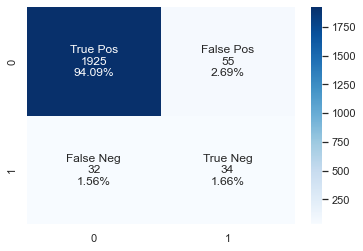

In [ ]:
final_pipe.fit(X_train, y_train)

y_pred = final_pipe.predict(X_test)

cf_matrix = metrics.confusion_matrix(y_test, y_pred)


group_names = ['True Pos','False Pos','False Neg','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

/Users/dominicfitzpatrick/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


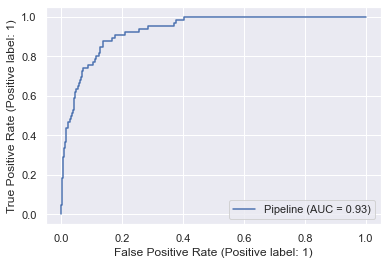

In [ ]:
metrics.plot_roc_curve(final_pipe, X_test, y_test)
plt.show()

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1980
           1       0.36      0.48      0.41        66

    accuracy                           0.96      2046
   macro avg       0.67      0.73      0.69      2046
weighted avg       0.96      0.96      0.96      2046



## Prediction with final model

In [ ]:
# Testing an individual row to perform a prediction and observe the outcome 

predict_data = X_test[:1]
predict_data

ROA(C) before interest and depreciation before interest  \
5578                                           0.552089          

       ROA(A) before interest and % after tax  \
5578                                 0.620584   

       ROA(B) before interest and depreciation after tax  \
5578                                           0.608973    

       Operating Gross Margin   Realized Sales Gross Margin  \
5578                 0.613694                      0.613694   

       Operating Profit Rate   Pre-tax net Interest Rate  \
5578                0.999065                     0.79764   

       After-tax net Interest Rate  \
5578                      0.809541   

       Non-industry income and expenditure/revenue  \
5578                                      0.303761   

       Continuous interest rate (after tax)  ...   Liability-Assets Flag  \
5578                               0.781816  ...                       0   

       Net Income to Total Assets   Total assets to GNP price  \
5578                     0.843515                     0.00095   

       No-credit Interval   Gross Profit to Sales  \
5578             0.623942                 0.61369   

       Net Income to Stockholder's Equity   Liability to Equity  \
5578                             0.843043              0.277165   

       Degree of Financial Leverage (DFL)  \
5578                             0.026791   

       Interest Coverage Ratio (Interest expense to EBIT)  \
5578                                           0.565158     

       Equity to Liability  
5578              0.049206  

[1 rows x 94 columns]

In [ ]:
final_model.predict(predict_data)

array([0])

In [ ]:
# Here the model has predicted bankrupcy 